# Assignment 4

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## SECTIONS 1 : Preps

### Flat Image : reference as "flat"

(-0.5, 299.5, 299.5, -0.5)

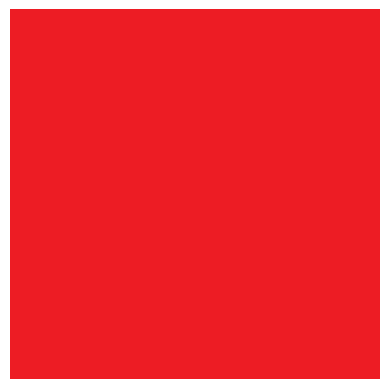

In [5]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image_f = """
iVBORw0KGgoAAAANSUhEUgAAASwAAAEsCAIAAAD2HxkiAAAACXBIWXMAAA7EAAAOxAGVKw4bAAAEvGlUWHRYTUw6Y29tLmFkb2JlLnhtcAAAAAAAPD94cGFja2V0IGJlZ2luPSfvu78nIGlkPSdXNU0wTXBDZWhpSHpyZVN6TlRjemtjOWQnPz4KPHg6eG1wbWV0YSB4bWxuczp4PSdhZG9iZTpuczptZXRhLyc+CjxyZGY6UkRGIHhtbG5zOnJkZj0naHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyc+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczpBdHRyaWI9J2h0dHA6Ly9ucy5hdHRyaWJ1dGlvbi5jb20vYWRzLzEuMC8nPgogIDxBdHRyaWI6QWRzPgogICA8cmRmOlNlcT4KICAgIDxyZGY6bGkgcmRmOnBhcnNlVHlwZT0nUmVzb3VyY2UnPgogICAgIDxBdHRyaWI6Q3JlYXRlZD4yMDI1LTEyLTExPC9BdHRyaWI6Q3JlYXRlZD4KICAgICA8QXR0cmliOkV4dElkPjdlMWY0Yjk3LTQwOGUtNDg3OS1iODkyLWEzOGZjZWJmY2Q3MTwvQXR0cmliOkV4dElkPgogICAgIDxBdHRyaWI6RmJJZD41MjUyNjU5MTQxNzk1ODA8L0F0dHJpYjpGYklkPgogICAgIDxBdHRyaWI6VG91Y2hUeXBlPjI8L0F0dHJpYjpUb3VjaFR5cGU+CiAgICA8L3JkZjpsaT4KICAgPC9yZGY6U2VxPgogIDwvQXR0cmliOkFkcz4KIDwvcmRmOkRlc2NyaXB0aW9uPgoKIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PScnCiAgeG1sbnM6ZGM9J2h0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvJz4KICA8ZGM6dGl0bGU+CiAgIDxyZGY6QWx0PgogICAgPHJkZjpsaSB4bWw6bGFuZz0neC1kZWZhdWx0Jz5VbnRpdGxlZCBkZXNpZ24gLSAxPC9yZGY6bGk+CiAgIDwvcmRmOkFsdD4KICA8L2RjOnRpdGxlPgogPC9yZGY6RGVzY3JpcHRpb24+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczpwZGY9J2h0dHA6Ly9ucy5hZG9iZS5jb20vcGRmLzEuMy8nPgogIDxwZGY6QXV0aG9yPmtyaXNoamFpbjIzMjE8L3BkZjpBdXRob3I+CiA8L3JkZjpEZXNjcmlwdGlvbj4KCiA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0nJwogIHhtbG5zOnhtcD0naHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyc+CiAgPHhtcDpDcmVhdG9yVG9vbD5DYW52YSAoUmVuZGVyZXIpIGRvYz1EQUc2aDZOaWJFOCB1c2VyPVVBRnlwb09iWGlJIGJyYW5kPUJBRnlwbXlrMFQ0IHRlbXBsYXRlPTwveG1wOkNyZWF0b3JUb29sPgogPC9yZGY6RGVzY3JpcHRpb24+CjwvcmRmOlJERj4KPC94OnhtcG1ldGE+Cjw/eHBhY2tldCBlbmQ9J3InPz6k2MPRAAADWUlEQVR4nO3TIQEAIADAMCAHkv7N6ECMC7YEN593nwF0Vh0AvzMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCLEHe0QDhbL+L+0AAAAASUVORK5CYII=

"""

img_data_f = base64.b64decode(base64_image_f)
flat = np.array(Image.open(io.BytesIO(img_data_f)))

plt.imshow(flat)
plt.axis("off")

### Edge Image : reference as "edge"

(-0.5, 299.5, 299.5, -0.5)

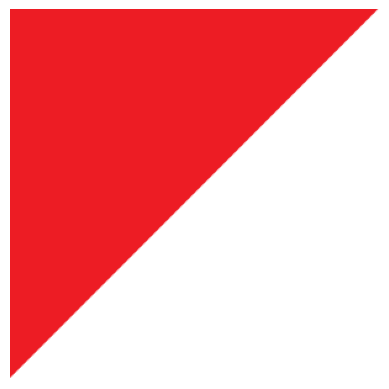

In [6]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image_e = """
iVBORw0KGgoAAAANSUhEUgAAASwAAAEsCAIAAAD2HxkiAAAACXBIWXMAAA7EAAAOxAGVKw4bAAAEvGlUWHRYTUw6Y29tLmFkb2JlLnhtcAAAAAAAPD94cGFja2V0IGJlZ2luPSfvu78nIGlkPSdXNU0wTXBDZWhpSHpyZVN6TlRjemtjOWQnPz4KPHg6eG1wbWV0YSB4bWxuczp4PSdhZG9iZTpuczptZXRhLyc+CjxyZGY6UkRGIHhtbG5zOnJkZj0naHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyc+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczpBdHRyaWI9J2h0dHA6Ly9ucy5hdHRyaWJ1dGlvbi5jb20vYWRzLzEuMC8nPgogIDxBdHRyaWI6QWRzPgogICA8cmRmOlNlcT4KICAgIDxyZGY6bGkgcmRmOnBhcnNlVHlwZT0nUmVzb3VyY2UnPgogICAgIDxBdHRyaWI6Q3JlYXRlZD4yMDI1LTEyLTExPC9BdHRyaWI6Q3JlYXRlZD4KICAgICA8QXR0cmliOkV4dElkPjc3YmYzYTY2LTc4N2YtNDY5MS1iYzVmLTM0ZmUzMTgzOWYwMDwvQXR0cmliOkV4dElkPgogICAgIDxBdHRyaWI6RmJJZD41MjUyNjU5MTQxNzk1ODA8L0F0dHJpYjpGYklkPgogICAgIDxBdHRyaWI6VG91Y2hUeXBlPjI8L0F0dHJpYjpUb3VjaFR5cGU+CiAgICA8L3JkZjpsaT4KICAgPC9yZGY6U2VxPgogIDwvQXR0cmliOkFkcz4KIDwvcmRmOkRlc2NyaXB0aW9uPgoKIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PScnCiAgeG1sbnM6ZGM9J2h0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvJz4KICA8ZGM6dGl0bGU+CiAgIDxyZGY6QWx0PgogICAgPHJkZjpsaSB4bWw6bGFuZz0neC1kZWZhdWx0Jz5VbnRpdGxlZCBkZXNpZ24gLSAxPC9yZGY6bGk+CiAgIDwvcmRmOkFsdD4KICA8L2RjOnRpdGxlPgogPC9yZGY6RGVzY3JpcHRpb24+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczpwZGY9J2h0dHA6Ly9ucy5hZG9iZS5jb20vcGRmLzEuMy8nPgogIDxwZGY6QXV0aG9yPmtyaXNoamFpbjIzMjE8L3BkZjpBdXRob3I+CiA8L3JkZjpEZXNjcmlwdGlvbj4KCiA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0nJwogIHhtbG5zOnhtcD0naHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyc+CiAgPHhtcDpDcmVhdG9yVG9vbD5DYW52YSAoUmVuZGVyZXIpIGRvYz1EQUc2aDZOaWJFOCB1c2VyPVVBRnlwb09iWGlJIGJyYW5kPUJBRnlwbXlrMFQ0IHRlbXBsYXRlPTwveG1wOkNyZWF0b3JUb29sPgogPC9yZGY6RGVzY3JpcHRpb24+CjwvcmRmOlJERj4KPC94OnhtcG1ldGE+Cjw/eHBhY2tldCBlbmQ9J3InPz4ajv+YAAAJ4klEQVR4nO3T7Y9U5RnH8euc2d2ZObNnRHyARQG1amzStMbaWq2JMTFtjUZrGxqUivIsaJVWEAShQqUSjBUtkkgLWnZpu8vf1r+Bvphledp5OGfu+77uh+/n5WTOff3efLP/3fugAHAuv/++7sJcvnpVrr0ESNFSgSJChIBr1xcoRAg4lq9f152fXSpQiBBwKV+/rnv5Uj6z+oYftdYAqVm2QCFCwI1+BQoRAg4MKFCIELBtcIFChIBVQwsUIgTsydet7c7PDi5QiBCwJF+3trswl9+zZvg/HawBUjN6gUKEgHGVChQiBMyqWqAQIWBQjQKFCAFT8nvvqVGgECFgRL5mppyfrVGgECEwvnzNTHn5UmPd2pqfm10DpGbMAoUIgXGMX6AQIVCbkQKFCIF6TBUoRAjUYLBAIUKgqnxmdTk/a6pAIUKgknxmdbkw17hvvck3Db4FxM1GgUKEwIgsFShECIzCXoFChMBQVgsUIgQGs12gECEwQLbq7vK/F60WKEQI9JOturu7MNd44H7bh4gQWIazAoUIgVu5LFCIELiJ4wKFCIHruS9QiBBYolKgECHQk911V3d+1n2BQoSA9Aq8PNf43gMq14kQqdMtUIgQiVMvUIgQKfOhQCFCJMuTAoUIkSZ/ChQiRIKyO+/ozl/0pEAhQqQmu/OO7sJc46EHtYdcQ4RIiIcFChEiHX4WKESIRHhboBAhUuBzgUKEiJ7nBQoRIm7ZypXd+VmfCxQiRMSylSu7l+caDz+kPWQIIkScQilQiBBRCqhAIULEJ6wChQgRmeAKFCJETEIsUIgQ0chuXxFigUKEiEN2+4ruwqUQCxQiRAQWC3zkYe0hNREhwhZ6gUKECFoEBQoRIlxxFChEiEBFU6AQIUKUrbgtmgKFCBGcbMVt5cJcNAUKESIsvQInvv+I9hCTiBDBiLJAIUKEItYChQgRhIgLFCKE/+IuUIgQnsu63bgLFCKEz7Jut/zPv+IuUIgQ3los8Ic/0B5iHRHCR+kUKEQIDyVVoBAhfJNagUKE8EqCBQoRwh9ZWSZYoBAhPJGVZfnvbxMsUIgQPlgs8NEfaQ/RQYRQlniBQoTQRYFChFBEgT1ECB0UuIQIoYACr0eEcC2b7pRzFyhwCRHCqWy6U176buKxR7WHeIQI4Q4FLosI4QgF9kOEcIECByBCWEeBgxEh7KLAoYgQFmWdopy9QIGDESFsyTpFOXdh4vHHtIf4jghhxdUCf6w9JABECPMosBIihGEUWBURwiQKrIEIYQwF1kOEMKRoT188T4E1ECFMKNrlxfOTP31ce0eQiBBj6xX4xE+0d4SKCDEeChwbEWIMFGgCEaIuCjSECFELBZpDhKiu3Sq/+wcFmkKEqKhX4JNPaO+IBxGiil6BT/1Me0dUiBAjo0A7iBCjoUBriBAjoECbiBDDUKBlRIiBWs3y23MUaBURor9egT9/UntH5IgQffQKfPop7R3xI0IshwIdIkLcggLdIkLciAKdI0JchwI1ECGuak5RoAoihIiINKfK899QoAoixNUCn3lae0eiiDB5FKiNCNNGgR4gwoRRoB+IMFUU6A0iTNIUBXqECNMzNVX+8ywF+oMIE9Mr8NlntHfgGiJMCQV6iQiTQYG+IsI0UKDHiDABFOg3Iozd5CQFeo4IozY5OX3uawr0HBHGa3Jy+tzXU889q70DQxBhpCgwHEQYIwoMChFGhwJDQ4RxocAAEWFEJiYoMEREGIuJielv/k6BISLCKPQK/MVz2jtQBxGGjwIDR4SBo8DwEWHIKDAKRBgsCowFEYaJAiNChAGaaEyfPU2B0SDC0Ew0ps9+OfX8L7V3wBgiDAoFxogIw0GBkSLCQFBgvIgwBBQYNSL0HgXGjgj91mhMnzlNgXEjQo81Gp0zX0y98CvtHbCLCH3VaHTOfNF88XntHbCOCL1EgSkhQv9QYGKI0DMUmB4i9AkFJokIvZHnna8+p8AEEaEfegW+9IL2DiggQg/0Cnz5Re0d0EGE2igweUSoigJBhJooECJChGooEFcRoYY873z5GQWihwidy/PO6VPNX7+kvQO+IEK3egW+8rL2DniECB2iQCyHCF2hQPRBhE5QIPojQvsoEAMRoWVZ1vnbSQrEAERoU5Z1Pj/Z/O0r2jvgNSK0plfght9o74DviNAOCsTIiNACCkQVRGgaBaIiIjSKAlEdEZpEgaiBCI3pnDpBgaiBCM3onDrRfPV32isQJCI0gAIxDiIcFwViTEQ4FgrE+IiwPgqEEURYEwXCFCKso/j0OAXCFCKsrPj0eOv3r2qvQDyIsBoKhHFEWAEFwgYiHBUFwhIiHAkFwh4iHI4CYRURDlF88jEFwioiHKT45OPWG5u0VyByRNgXBcINIlweBcIZIlwGBcIlIrwZBcIxIrwBBcI9IrymOHaEAuEeES4qjh1pbd2svQIpIkIRCoQqIqRAKEs9QgqEuqQjpED4IN0IKRCeSDTC4ughCoQnUoywOHqotWOL9gpgUXIRUiB8k1aEFAgPJRQhBcJPqURIgfBWEhFSIHwWf4TFkYMUCJ9FHmFx+EBr5zbtFcAgMUdYHD7Qemu79gpgiGgjpECEIs4IKRABiTBCCkRYYouQAhGcqCJsH9pPgQhOPBG2D+5r796pvQKoLJII2wf3td/epb0CqCOGCCkQQQs+QgpE6MKOkAIRgYAjpEDEIdQI2x/8iQIRhyAjbO/b2/7Dbu0VgBnhRdjet7f93tvaKwBjAouQAhGfkCKkQEQpmAgpELEKI0IKRMQCiLC19x0KRMR8j7D17p7i/fe0VwAWeR1h6909xf4/aq8A7PI3QgpEIjyNkAKRDh8jpEAkxbsIKRCp8SvC1jtvUSBS41GErT07iwPva68AXPMlwtaencWH+7VXAAq8iJACkTL9CCkQiVOOkAIBzQgpEBDFCFu7d1AgIFoRtnZtKw59oHIa8I1ChK1d24qPDrq/C/jJdYQUCNzEaYQUCNzKXYQUCCzLUYQUCPTjIsLWjq0UCPRjPcLW9jeLox/avgKEy26Ere1vFn8+bPUEEDqLEVIgMApbEVIgMCIrEVIgMDrzEVIgUInhCJtb36BAoBKTETa3vN459pHBB4EUGIuwueX1zvGjpl4D0mEmQgoEajMQIQUC4xg3QgoExjRWhBQIjK9+hBQIGFEzwubm1ygQMKJOhM3Nr3VOHDM+BUhT5QgpEDCrWoQUCBhXIUIKBGwYNUIKBCwZKUIKBOwZHmFz00YKBOwZEmFz08bOyb+4mQKkaVCEFAg40DdCCgTcWD5CCgScWSZCCgRcujlCCgQcuyHC5sYNFAg4di3C5sYNnc/+qjgFSNNihBQIaMmFAgFVOQUCurIrV65obwCS9n9NRCNhe9hOWgAAAABJRU5ErkJggg==

"""

img_data_e = base64.b64decode(base64_image_e)
edge = np.array(Image.open(io.BytesIO(img_data_e)))

plt.imshow(edge)
plt.axis("off")


### Corner Image : reference as "corner"

(-0.5, 299.5, 299.5, -0.5)

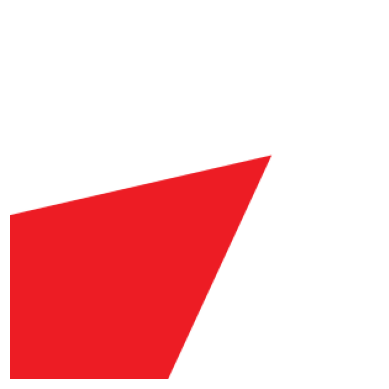

In [7]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image_c1 = """
iVBORw0KGgoAAAANSUhEUgAAASwAAAEsCAIAAAD2HxkiAAAACXBIWXMAAA7EAAAOxAGVKw4bAAAEvGlUWHRYTUw6Y29tLmFkb2JlLnhtcAAAAAAAPD94cGFja2V0IGJlZ2luPSfvu78nIGlkPSdXNU0wTXBDZWhpSHpyZVN6TlRjemtjOWQnPz4KPHg6eG1wbWV0YSB4bWxuczp4PSdhZG9iZTpuczptZXRhLyc+CjxyZGY6UkRGIHhtbG5zOnJkZj0naHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyc+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczpBdHRyaWI9J2h0dHA6Ly9ucy5hdHRyaWJ1dGlvbi5jb20vYWRzLzEuMC8nPgogIDxBdHRyaWI6QWRzPgogICA8cmRmOlNlcT4KICAgIDxyZGY6bGkgcmRmOnBhcnNlVHlwZT0nUmVzb3VyY2UnPgogICAgIDxBdHRyaWI6Q3JlYXRlZD4yMDI1LTEyLTExPC9BdHRyaWI6Q3JlYXRlZD4KICAgICA8QXR0cmliOkV4dElkPjhkYWIzZjdhLTU0NDMtNDIwMy1hNWQ0LWY2Zjg1YTcyNGZlZTwvQXR0cmliOkV4dElkPgogICAgIDxBdHRyaWI6RmJJZD41MjUyNjU5MTQxNzk1ODA8L0F0dHJpYjpGYklkPgogICAgIDxBdHRyaWI6VG91Y2hUeXBlPjI8L0F0dHJpYjpUb3VjaFR5cGU+CiAgICA8L3JkZjpsaT4KICAgPC9yZGY6U2VxPgogIDwvQXR0cmliOkFkcz4KIDwvcmRmOkRlc2NyaXB0aW9uPgoKIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PScnCiAgeG1sbnM6ZGM9J2h0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvJz4KICA8ZGM6dGl0bGU+CiAgIDxyZGY6QWx0PgogICAgPHJkZjpsaSB4bWw6bGFuZz0neC1kZWZhdWx0Jz5VbnRpdGxlZCBkZXNpZ24gLSAxPC9yZGY6bGk+CiAgIDwvcmRmOkFsdD4KICA8L2RjOnRpdGxlPgogPC9yZGY6RGVzY3JpcHRpb24+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczpwZGY9J2h0dHA6Ly9ucy5hZG9iZS5jb20vcGRmLzEuMy8nPgogIDxwZGY6QXV0aG9yPmtyaXNoamFpbjIzMjE8L3BkZjpBdXRob3I+CiA8L3JkZjpEZXNjcmlwdGlvbj4KCiA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0nJwogIHhtbG5zOnhtcD0naHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyc+CiAgPHhtcDpDcmVhdG9yVG9vbD5DYW52YSAoUmVuZGVyZXIpIGRvYz1EQUc2aDZOaWJFOCB1c2VyPVVBRnlwb09iWGlJIGJyYW5kPUJBRnlwbXlrMFQ0IHRlbXBsYXRlPTwveG1wOkNyZWF0b3JUb29sPgogPC9yZGY6RGVzY3JpcHRpb24+CjwvcmRmOlJERj4KPC94OnhtcG1ldGE+Cjw/eHBhY2tldCBlbmQ9J3InPz7b9SPRAAAMEElEQVR4nO3d629UdR7H8XOd82taaIvA2houcjFKSQAlTYNazYIiCoQSKtY0BUpbWtz/bpN9tFl1N6vrdmYKIt6X9bIr3nZxFUXomZl9QEMBK51pZ+Zzzvm9X08V+onNu8e03864lUrFAaDjqQcAtiNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0JAjAgBMSIExIgQECNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0JAjAgBMSIExIgQECNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0JAjAgBMSIExIgQECNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0JAjAgBMSIExIgQECNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0JAjAgBMSIExIgQECNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0JAjAgBMSIExIgQECNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0JAjAgBMSIExIgQECNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0JAjAgBMSIExIgQECNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0JAjAgBMSIExIgQECNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0IIlL/86sbv/1C5dk09JBEC9QBYoVIqld77IM4X4vxMnC+U//1F0Ls7d+h59a5EIEI0SuXq1bh4Ls4X43wxnjlXufrj7f+05XeTqmFJQ4Sop9Ln/4qnC3FhJs4XSu9/6JTLC/5r/tYt4dP9Td6WWESIZanEcenCxbnHXb5Y/vrrav6UOTvhuG6jt6WFW6lU1BuQMuXv/hcXinFhJp4uxOffdq79XNMf97rub3/jVTfgATCH/xCoQqVS+ucn8/+f+fElZxlfu6OxkxR4O56EWFjl+o34/NtxvhgXinG+WPnvlbr8tW5He8ebr7ltbXX527KBL0iYV/72P3PVTRfjC+84N27U/UNEwy9T4F14EtqtXC599HGcL87e/LbKJ5829sMZ0/HGq96a1Y39KGnDk9A6lZ9+imfOzz3xCucq33/ftA8dHRugwF8iQiuUv/wqni7MFopxvli6+J4Tx4IRnmcmRgUfN/GIMJt+eSamXuTknt/vP7hRvSKJiDA7Kj/8EBfOxYXibL4Yz5xzfvxJvegO5pUz6gkJRYTpVuWZmFywpy/Y3qNekVBEmDKV2dnSO+/WeiYm13J2Qj0huYgwBcpXvrv5E/M4X4zPv+38fF29qDb+tofD/ifUK5KLCBOprmdicmaKc+17IcKkqFy/Hp+/UPczMTlv/brcwQPqFYlGhErlb7699VOE+MJFZ3ZWvaj+DOfai+FsrbmafCam5nZ2drz1utvSoh6SaHyJajjhmZicOTlMgYviSdgQ5ctfxtOFm4+70rvvOaWSepGCMR1vve6tWqXekXQ8CesjgWdictHQIAVWgwiXLuFnYmK+b06fVI9IByKsTenTz25dq5Q+/CixZ2JyuYMH/A3r1SvSgQgXkdIzMTkzxZ1atYhwAeUrV+LCTHrPxOTCJx8Peh5Rr0gNInQc5/YzsWL890Lp0iWH7xkvA7+1VBN7I8zqmZicv31buKdPvSJN7IrQhjMxuZazZzjXrknWf1h/60xsuhBPF8qffa4elHHe+nXtf/mj6/GWezXI4JPQ5jMxOTNxmgJrlZEnYfmLy7euou09E1NzV9/X8carHIvWKq1PwvkzselCPF0sX76sXgTHnOBceynS9CTkTCzJ3NbW9jdf8zo71EPSJ+lPQs7E0iI6fowClyZxT8L5M7Hp/Gy+WPnmW/UiVMH32//6J/+BbvWOVErEk5AzsbTLHTlEgUsmirBSKf3j0q134eJMLN1cXlZ0WZoX4fyZ2HQ+LsxUrnzXtA+Nhgqf6vcf2qpekWKNjZAzMRtwrr1MdY6wUi6XP/hoNl+ICzOcidkg2LUj7OtVr0i3OkQ4fyY2XYiLM5Ufri7/70Ra8Mu7y7fECDkTg+M4/uZN4f596hWpV22ElTguvfv+re9nciYGx3HM+CnOtZfvXj+sv3kmNnvzPnPmvHPtWjOXIeHctWs63nzNzeXUQ1Lv7ichZ2Kokjl9ggLrwi1fv1565+LsdLFUKHImhiq5ba3tf/uz175SPSQLgis9j3ImhlpFw0MUWC8eBaJmYWhOjahHZAff2kLNooHDXneXekV2ECFq5Dpmalw9IlOIELUJ9+31t2xWr8gUIkRt+K2luiNC1CB4bFew+1H1iqwhQtTA8BhsACJEtfzNm3LP7FWvyCAiRLXM1DhvMtEIRIiqeF335wYOq1dkExGiKtGpEc61G4QIsTh35QozPKRekVlEiMVFI8Puijb1iswiQiwmDM0o59oNRIRYRDR41FuzWr0iy4gQ9+R5ZnJMPSLjiBD3Ej67139wo3pFxhEh7oVz7SYgQvyqoK832LVTvSL7iBC/isdgcxAhFuZvezh8ul+9wgpEiIWZ8VHOtZuDCLEAr7srd+SQeoUtiBALMBOjbpCIt1K3ARHibm5He3T8mHqFRYgQd4tODLttnGs3DxHiTsaYE8PqEXYhQtwhepFz7WYjQtzG88zEafUI6xAh5uWe3+9vWK9eYR0ixDzzyhn1BBsRIeYEe/qC7T3qFTYiQszhXFuFCOE4N8+1+59Qr7AUEcJxHMdMTXCurUKEcLz163IHD6hX2IsI4Zixk5xrCxGh7dzOzuilQfUKqxGh7czoiNvSol5hNSK0mzER59pqRGi1aGjQ6+xQr7AdEVrM980ZXl1bjwjtlTt4wH+gW70CRGgt1zFT3KklAhFaKux/Muh5RL0CjkOE1jJT4+oJmEOENgp27gj39KlXYA4R2shM8OraCUKE1vE2bghfeE69AvOI0DpmYtT1+LwnCJ8Mu7ir74uODahX4A5EaBfOtROICC3itrZGwy+rV+BuRGiR6OXjnGsnEBFaw/fN2En1CCyACG2RO3LI6+5Sr8ACiNAOLi8rmlxEaIXwqX7/oa3qFVgYEVqBN5lIMiLMvmDXjrCvV70Cv4oIs49f3k04Isw4f/OmcP8+9QrcCxFmnJka51w74fj0ZJm7dk1u4LB6BRZBhFlmxk65uZx6BRZBhJnltrWa4SH1CiyOCDMrGh5yV7SpV2BxRJhRYWjGTqlHoCpEmE3RwGHvN2vVK1AVIswiz+NlRVOECDMofOa3/pbN6hWoFhFmUMskj8E0IcKsCXp3B7sfVa9ADYgwa8yZ0+oJqA0RZoq/dUvumb3qFagNEWaKmRzjTSZShwizw+u6P3fkkHoFakaE2RGNneRcO42IMCPclSvM0HH1CiwFEWZENDLMuXZKEWEmhKEZHVGPwBIRYRZEg0e9NavVK7BERJh+nmcmx9QjsHREmHrhs3v9BzeqV2DpiDD1eJOJtCPCdAv6eoNdO9UrsCxEmG48BjOACFPM3/Zw+HS/egWWiwhTzExNcK6dAUSYVl53V+7gAfUK1AERppWZHHODQL0CdUCEqeR2tEcvDapXoD6IMJWiE8NuS4t6BeqDCFPIGM61s4QI0yd68ai3apV6BeqGCNPG980Er6eWKUSYMrkXnvM3rFevQD0RYcrwJhPZQ4RpEj75eLC9R70CdUaEacKra2cSEaaGv31b2P+EegXqjwhTo2VynHPtTCLCdPDWrwtfeE69Ag1BhOlgJk5zrp1VRJgCbmdn9OJR9Qo0ChGmgBkd4Vw7w4gw8YyJTgyrR6CBiDDpoqFBr7NDvQINRITJ5vvmDK+unXFEmGi5gwf8B7rVK9BYRJhgrmOmeFnR7CPC5Aqf6g96HlGvQMMRYXIZXl3bDkSYUMHOHWFfr3oFmoEIE8qc5dW1bUGESeRt3BDu36degSYhwiRqmRxzPT41tuAznTju6vtyg5xrW4QIE8eMjri5nHoFmocIk8Vta41GONe2CxEmSzR03GtfqV6BpiLCJAlDM3ZSPQLNRoQJEh055HV3qVeg2YgwMVzHTPJbSzYiwqQI9+31H9qqXgEBIkwKMzGqngANIkyE4LFdnGtbiwgTwUzyXkv2IkI9f/Om8Nm96hWQIUI9MzXOubbN+NyLuWvX5AYOq1dAiQjFzNgpzrUt938/QsaulMkBUwAAAABJRU5ErkJggg==

"""

img_data_c1 = base64.b64decode(base64_image_c1)
corner = np.array(Image.open(io.BytesIO(img_data_c1)))

plt.imshow(corner)
plt.axis("off")

### Multiple Coorners : reference as "corner2"

(-0.5, 1499.5, 1121.5, -0.5)

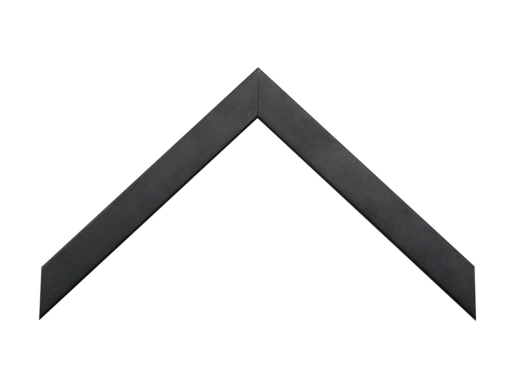

In [8]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image_c2 = """
/9j/4QxyRXhpZgAATU0AKgAAAAgADAEAAAMAAAABAlgAAAEBAAMAAAABAcEAAAECAAMAAAADAAAAngEGAAMAAAABAAIAAAESAAMAAAABAAEAAAEVAAMAAAABAAMAAAEaAAUAAAABAAAApAEbAAUAAAABAAAArAEoAAMAAAABAAIAAAExAAIAAAAgAAAAtAEyAAIAAAAUAAAA1IdpAAQAAAABAAAA6AAAASAACAAIAAgAG3dAAAAnEAAbd0AAACcQQWRvYmUgUGhvdG9zaG9wIDI1LjExIChXaW5kb3dzKQAyMDI0OjA3OjI4IDE5OjQ1OjQxAAAEkAAABwAAAAQwMjIxoAEAAwAAAAH//wAAoAIABAAAAAEAAAXcoAMABAAAAAEAAARiAAAAAAAAAAYBAwADAAAAAQAGAAABGgAFAAAAAQAAAW4BGwAFAAAAAQAAAXYBKAADAAAAAQACAAACAQAEAAAAAQAAAX4CAgAEAAAAAQAACuwAAAAAAAAASAAAAAEAAABIAAAAAf/Y/+0ADEFkb2JlX0NNAAL/7gAOQWRvYmUAZIAAAAAB/9sAhAAMCAgICQgMCQkMEQsKCxEVDwwMDxUYExMVExMYEQwMDAwMDBEMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMAQ0LCw0ODRAODhAUDg4OFBQODg4OFBEMDAwMDBERDAwMDAwMEQwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAz/wAARCAB4AKADASIAAhEBAxEB/90ABAAK/8QBPwAAAQUBAQEBAQEAAAAAAAAAAwABAgQFBgcICQoLAQABBQEBAQEBAQAAAAAAAAABAAIDBAUGBwgJCgsQAAEEAQMCBAIFBwYIBQMMMwEAAhEDBCESMQVBUWETInGBMgYUkaGxQiMkFVLBYjM0coLRQwclklPw4fFjczUWorKDJkSTVGRFwqN0NhfSVeJl8rOEw9N14/NGJ5SkhbSVxNTk9KW1xdXl9VZmdoaWprbG1ub2N0dXZ3eHl6e3x9fn9xEAAgIBAgQEAwQFBgcHBgU1AQACEQMhMRIEQVFhcSITBTKBkRShsUIjwVLR8DMkYuFygpJDUxVjczTxJQYWorKDByY1wtJEk1SjF2RFVTZ0ZeLys4TD03Xj80aUpIW0lcTU5PSltcXV5fVWZnaGlqa2xtbm9ic3R1dnd4eXp7fH/9oADAMBAAIRAxEAPwD1VJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJT//Q9VSSSSUpJJJJSkkkklKSSSSUpYf1n+tOJ0GgN0uz7gTj4wPbj1rv9Hjtd+d/hP5upA+tf1wxuhV/Z6A3I6nY2a6D9FgP+HytvubX+5V/O5H/AG5dV5bk5V+VfZlZVjr8m87rbncuPy9rWM/wdbP0daSn1f6rfWvF67R6T9tPUahN1HZw4+0Y8/Spd+7/ADlH83b/AIK23eXhWPfbj2V30WOpvpO6q1hhzXeLf9fevTvqj9cqustbhZu2nqbWzA0ZcAPdZR/Lb/haPzP+LSU9OkkkkpSSSSSlJJJJKUkkkkp//9H1VJJJJSkkkklKSSSSUpcp9cfrrX0cO6f08tt6o4DcTqyhrh7X3fvXOb/M4/8A1239Fs9at9cfryMF1nS+kPDs4e3IydHNo/kMn22Zf8j6FH+F/wBCvN3n3FziXPeS57nEuc5zjL3vc73Pe9303pKSWOsusffc91t1rt9trzLnOPLnuV7ofQM/r2b9lwxtrYR9qynCWUtP/nzJe3+Zx/8Arl2ylF+rH1czfrHlurqJowKHRl5oHB5+zY2722Zbvzv8Fifzl36T0qLfW+ndNwul4deFg1CnHqHtaNSSdXPe53usse76dj/e9JT4/wBd6B1DoGZ9lzBvqsJ+y5bRDLWjsf8AR5LG/wA7R/1yn9Es+ux1bmvYSyxhD2PaS1zXN1a9j2+5j2r3DqPTcLqmHZhZ1Qux7R7mnQgj6L2Ob7q7GfmWM97F5F9aPq1m/VzMbXaTfgXujEzYiTz9mydvtry/3f8ABZf85T7/AFaKkp7f6n/XhnUyzp3VXNr6jxVbo1l8f9GvJ/fq+hZ/OUf6GrsF4GGbh8wZB4I1EQvRfqd9djd6fS+s2fpzDMbMdoLOzacg/m5H+jt/7Uf+GP59Ke3SSSSUpJJJJSkkkklP/9L1VJJJJSkkkklKXA/XL6+bDZ0nodn6USzKzmH6HZ9GI786/wD0t/8A2n/wf6x/Rqf10+vjss2dK6JaW4olmTnMMGzs6nEeP8D/AKTJb/O/4D2fpVw7YaA1ggDQAaaJKSSGja0fBb31U+qGX9YrfXsc7H6Ux0WZA0dYQYfTif8AU25P+C+hV+m/mZ/U/wCpd/1gsbm5u6norDJIJa/JI/wVDh7q8T/TZLf53+axv9PX61TTVRUyihjaqamhldbAGta1o2sYxjfa1jWpKR4WDidPxKsLCqbRjUN21VMEAD/zL89356OkkkpSBnYOJ1DEtws2pt+Ne3bbU8SCP/MfpMd+YjpJKfIfrP8AVTM+rtvqNLsjpb3RTknV1ZOjKMv+V+bVkfQu/P8A0387iEggtIkHQg/xXu11NORS+i9jbabWlllbwHNc1w2uY9jva5rl5P8AW/6n5H1etdmYm67oth0cZc/GJ/wV7j7rMX/QZTv5v+Zyf9PalOx9UPr0aDX0zrVs0GG4+a86s7Nqy3n8z9zJd/1//Sr0NeBh7Tp2XXfVD68u6WK+m9VeX9OENpyDq7HH5tdn5z8T938/F/8AC39HSn05JRY9ljGvY4OY4BzXNMgg6hzSFJJSkkkklP8A/9P1VJJDyMijFosyMmxtNFTS+yx5DWtaPpOc5ySmVljK2OsscGMYC573GAANXOc4/Ra1eW/XL69WdW39N6U819M1bdeJDsgd2N/Orw/+nk/8R/PVfrl9druvvOFhF1PSGHgy1+QQdLL2/SZj/wChxv8AruR/oaeWc8NBc4gAckpKZF4aPAAfAABdl9SvqK7qza+rdWYWdNdDsfGdIdkD8220fSrw3f4Nn08v/wALf0k/1M/xfOyjX1Tr9RGOIfjdPsGrzy27NYf8F/o8R30/+1P+hXpiSmLGMYxrGNDWNADWgQABw1oUkkklKSSSSUpJJJJSlF7GWMdXY0PY8FrmuEgg6Oa5pUkklPlf10+otnRxZ1XpLTZ0xvuyMcS52OO9lf51mE38/wDPxP8Awv8AzHJMcHDTjkEGefNfQK8y+uf1BdgOs6r0KouwyS/JwGCTUTq+7DYP+0/+kxf8D/2n/R/oWJTU+p/1yt6E5uFml1vSXHgAufjk/wCEpb9J+P8A6XH/ADP5zH/0NvqlF9ORSy/HsbbTa0PrsYQ5rmnVrmOb9Jq8Aba0gEGQeCNQug+qn1wyvq/f6Tg7I6ZY6bsYfSYSfdfiT+f+dZR9C7/jvppT7GkgYOdidQxKszCtbfjXt3V2N4I4/sua72vY76D0dJT/AP/U9VXk3+MrrWdk9cu6O+zbgYXpObS3QPe9jL/Vv/0np7/0TPoM+n/OL1leJfXp7rPrn1JlbXWWPupqrrYC5z3+hjsZXWxvufY9/wBFjUlOE54aJJ0XpH1E+oL6TX1rr1UXiH4WA8fzXduTlN/7l/6Gj/tJ/wCG/wCjW/qT9QGdMNfVOstbZ1Ie6nH0czH85+jblf8AC/zdX+A/0z+3SUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSU+efXn6gF3q9Z6DVN2r8vp7B/Od334bf+5P8ApMb/ALVf4L9Z/pPnddzXAOaQWnUFfQ64P67/AOL8Zzrer9EYGZzpfk4ghrbz+dbX+bXl/vfmZH+E/S/pElPP/wCL3q+bifWHH6fVZ+pdQc8X0HVu9tVlrL6/9Hd+hZW//S1fzn+B9P1xeH/U2xzPrd0trgWOZkOrexwLXNd6dzHMex3ua9rvpNXuCSn/1fVVgdL+qOFidfzvrDkkZPUMuxxocRDaKy1tW2pri79YtrZ+nyP3P0Neyv1fW30klKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJTzvVvqdh5nXcH6wYpGN1DEuY/IIHsvrHsIta3/ALUVVu/QX/8AWLv0fpeh0SSSSn//1vVUl8qpJKfqpJfKqSSn6qSXyqkkp+qkl8qpJKfqpJfKqSSn6qSXyqkkp+qkl8qpJKfqpJfKqSSn6qSXyqkkp+qkl8qpJKf/2f/tFSxQaG90b3Nob3AgMy4wADhCSU0EBAAAAAAADxwBWgADGyVHHAIAAAIAAAA4QklNBCUAAAAAABDNz/p9qMe+CQVwdq6vBcNOOEJJTQQ6AAAAAAGNAAAAEAAAAAEAAAAAAAtwcmludE91dHB1dAAAAAcAAAAAQ2xyU2VudW0AAAAAQ2xyUwAAAABSR0JDAAAAAE5tICBURVhUAAAAJwBTAEMALQBQADEAMAAwADAAMABfAFMAZQByAGkAZQBzACAAQwBvAGwAZABQAHIAZQBzAHMAQgByAGkAZwBoAHQAXwBNAEsAXwB2ADEAAAAAAABJbnRlZW51bQAAAABJbnRlAAAAAENscm0AAAAATXBCbGJvb2wBAAAAD3ByaW50U2l4dGVlbkJpdGJvb2wAAAAAC3ByaW50ZXJOYW1lVEVYVAAAABgAXABcAGcAYgBpADAAMQBwAGQAYwAwADEAXABHAEIASQAwADEAUABSAE4AMQAyAAAAAAAPcHJpbnRQcm9vZlNldHVwT2JqYwAAAAwAUAByAG8AbwBmACAAUwBlAHQAdQBwAAAAAAAKcHJvb2ZTZXR1cAAAAAEAAAAAQmx0bmVudW0AAAAMYnVpbHRpblByb29mAAAACXByb29mQ01ZSwA4QklNBDsAAAAAAi0AAAAQAAAAAQAAAAAAEnByaW50T3V0cHV0T3B0aW9ucwAAABcAAAAAQ3B0bmJvb2wAAAAAAENsYnJib29sAAAAAABSZ3NNYm9vbAAAAAAAQ3JuQ2Jvb2wAAAAAAENudENib29sAAAAAABMYmxzYm9vbAAAAAAATmd0dmJvb2wAAAAAAEVtbERib29sAAAAAABJbnRyYm9vbAAAAAAAQmNrZ09iamMAAAABAAAAAAAAUkdCQwAAAAMAAAAAUmQgIGRvdWJAb+AAAAAAAAAAAABHcm4gZG91YkBv4AAAAAAAAAAAAEJsICBkb3ViQG/gAAAAAAAAAAAAQnJkVFVudEYjUmx0AAAAAAAAAAAAAAAAQmxkIFVudEYjUmx0AAAAAAAAAAAAAAAAUnNsdFVudEYjUHhsQGaAAAAAAAAAAAAKdmVjdG9yRGF0YWJvb2wBAAAAAFBnUHNlbnVtAAAAAFBnUHMAAAAAUGdQQwAAAABMZWZ0VW50RiNSbHQAAAAAAAAAAAAAAABUb3AgVW50RiNSbHQAAAAAAAAAAAAAAABTY2wgVW50RiNQcmNAWQAAAAAAAAAAABBjcm9wV2hlblByaW50aW5nYm9vbAAAAAAOY3JvcFJlY3RCb3R0b21sb25nAAAAAAAAAAxjcm9wUmVjdExlZnRsb25nAAAAAAAAAA1jcm9wUmVjdFJpZ2h0bG9uZwAAAAAAAAALY3JvcFJlY3RUb3Bsb25nAAAAAAA4QklNA+0AAAAAABAAtAAAAAEAAQC0AAAAAQABOEJJTQQmAAAAAAAOAAAAAAAAAAAAAD+AAAA4QklNA/IAAAAAAAoAAP///////wAAOEJJTQQNAAAAAAAEAAAAWjhCSU0EGQAAAAAABAAAAB44QklNA/MAAAAAAAkAAAAAAAAAAAEAOEJJTScQAAAAAAAKAAEAAAAAAAAAAThCSU0D9QAAAAAASAAvZmYAAQBsZmYABgAAAAAAAQAvZmYAAQChmZoABgAAAAAAAQAyAAAAAQBaAAAABgAAAAAAAQA1AAAAAQAtAAAABgAAAAAAAThCSU0D+AAAAAAAcAAA/////////////////////////////wPoAAAAAP////////////////////////////8D6AAAAAD/////////////////////////////A+gAAAAA/////////////////////////////wPoAAA4QklNBAgAAAAAACkAAAABAAACQAAAAkAAAAAFAACGUQEAAF3AAAAAC0AAAACxAwAAAHxSAQA4QklNBEQAAAAAAD0AAAACAAACQAAAAkAAAAAFAACGUQEASoT/AABdwAAASoT/AAALQAAASoT/AACxAwAASoT/AAB8UgEASoT/ADhCSU0EHgAAAAAABAAAAAA4QklNBBoAAAAAA0kAAAAGAAAAAAAAAAAAAARiAAAF3AAAAAoARwAtADIAOQAwADUAIAAtACAAMQAAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAF3AAABGIAAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAAAAAAAQAAAAAQAAAAAAAG51bGwAAAACAAAABmJvdW5kc09iamMAAAABAAAAAAAAUmN0MQAAAAQAAAAAVG9wIGxvbmcAAAAAAAAAAExlZnRsb25nAAAAAAAAAABCdG9tbG9uZwAABGIAAAAAUmdodGxvbmcAAAXcAAAABnNsaWNlc1ZsTHMAAAABT2JqYwAAAAEAAAAAAAVzbGljZQAAABIAAAAHc2xpY2VJRGxvbmcAAAAAAAAAB2dyb3VwSURsb25nAAAAAAAAAAZvcmlnaW5lbnVtAAAADEVTbGljZU9yaWdpbgAAAA1hdXRvR2VuZXJhdGVkAAAAAFR5cGVlbnVtAAAACkVTbGljZVR5cGUAAAAASW1nIAAAAAZib3VuZHNPYmpjAAAAAQAAAAAAAFJjdDEAAAAEAAAAAFRvcCBsb25nAAAAAAAAAABMZWZ0bG9uZwAAAAAAAAAAQnRvbWxvbmcAAARiAAAAAFJnaHRsb25nAAAF3AAAAAN1cmxURVhUAAAAAQAAAAAAAG51bGxURVhUAAAAAQAAAAAAAE1zZ2VURVhUAAAAAQAAAAAABmFsdFRhZ1RFWFQAAAABAAAAAAAOY2VsbFRleHRJc0hUTUxib29sAQAAAAhjZWxsVGV4dFRFWFQAAAABAAAAAAAJaG9yekFsaWduZW51bQAAAA9FU2xpY2VIb3J6QWxpZ24AAAAHZGVmYXVsdAAAAAl2ZXJ0QWxpZ25lbnVtAAAAD0VTbGljZVZlcnRBbGlnbgAAAAdkZWZhdWx0AAAAC2JnQ29sb3JUeXBlZW51bQAAABFFU2xpY2VCR0NvbG9yVHlwZQAAAABOb25lAAAACXRvcE91dHNldGxvbmcAAAAAAAAACmxlZnRPdXRzZXRsb25nAAAAAAAAAAxib3R0b21PdXRzZXRsb25nAAAAAAAAAAtyaWdodE91dHNldGxvbmcAAAAAADhCSU0EKAAAAAAADAAAAAI/8AAAAAAAADhCSU0EEQAAAAAAAQEAOEJJTQQUAAAAAAAEAAAA4ThCSU0EDAAAAAALCAAAAAEAAACgAAAAeAAAAeAAAOEAAAAK7AAYAAH/2P/tAAxBZG9iZV9DTQAC/+4ADkFkb2JlAGSAAAAAAf/bAIQADAgICAkIDAkJDBELCgsRFQ8MDA8VGBMTFRMTGBEMDAwMDAwRDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAENCwsNDg0QDg4QFA4ODhQUDg4ODhQRDAwMDAwREQwMDAwMDBEMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwM/8AAEQgAeACgAwEiAAIRAQMRAf/dAAQACv/EAT8AAAEFAQEBAQEBAAAAAAAAAAMAAQIEBQYHCAkKCwEAAQUBAQEBAQEAAAAAAAAAAQACAwQFBgcICQoLEAABBAEDAgQCBQcGCAUDDDMBAAIRAwQhEjEFQVFhEyJxgTIGFJGhsUIjJBVSwWIzNHKC0UMHJZJT8OHxY3M1FqKygyZEk1RkRcKjdDYX0lXiZfKzhMPTdePzRieUpIW0lcTU5PSltcXV5fVWZnaGlqa2xtbm9jdHV2d3h5ent8fX5/cRAAICAQIEBAMEBQYHBwYFNQEAAhEDITESBEFRYXEiEwUygZEUobFCI8FS0fAzJGLhcoKSQ1MVY3M08SUGFqKygwcmNcLSRJNUoxdkRVU2dGXi8rOEw9N14/NGlKSFtJXE1OT0pbXF1eX1VmZ2hpamtsbW5vYnN0dXZ3eHl6e3x//aAAwDAQACEQMRAD8A9VSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSU//0PVUkkklKSSSSUpJJJJSkkkklKWH9Z/rTidBoDdLs+4E4+MD249a7/R47Xfnf4T+bqQPrX9cMboVf2egNyOp2Nmug/RYD/h8rb7m1/uVfzuR/wBuXVeW5OVflX2ZWVY6/JvO6253Lj8va1jP8HWz9HWkp9X+q31rxeu0ek/bT1GoTdR2cOPtGPP0qXfu/wA5R/N2/wCCtt3l4Vj3249ld9Fjqb6TuqtYYc13i3/X3r076o/XKrrLW4Wbtp6m1swNGXAD3WUfy2/4Wj8z/i0lPTpJJJKUkkkkpSSSSSlJJJJKf//R9VSSSSUpJJJJSkkkklKXKfXH6619HDun9PLbeqOA3E6soa4e19371zm/zOP/ANdt/RbPWrfXH68jBdZ0vpDw7OHtyMnRzaP5DJ9tmX/I+hR/hf8AQrzd59xc4lz3kue5xLnOc4y973O9z3vd9N6SkljrLrH33Pdbda7fba8y5zjy57le6H0DP69m/ZcMba2EfaspwllLT/58yXt/mcf/AK5dspRfqx9XM36x5bq6iaMCh0ZeaBwefs2Nu9tmW787/BYn85d+k9Ki31vp3TcLpeHXhYNQpx6h7WjUknVz3ud7rLHu+nY/3vSU+P8AXegdQ6BmfZcwb6rCfsuW0Qy1o7H/AEeSxv8AO0f9cp/RLPrsdW5r2EssYQ9j2ktc1zdWvY9vuY9q9w6j03C6ph2YWdULse0e5p0II+i9jm+6uxn5ljPexeRfWj6tZv1czG12k34F7oxM2Ik8/Zsnb7a8v93/AAWX/OU+/wBWipKe3+p/14Z1Ms6d1Vza+o8VW6NZfH/Rryf36voWfzlH+hq7BeBhm4fMGQeCNREL0X6nfXY3en0vrNn6cwzGzHaCzs2nIP5uR/o7f+1H/hj+fSnt0kkklKSSSSUpJJJJT//S9VSSSSUpJJJJSlwP1y+vmw2dJ6HZ+lEsys5h+h2fRiO/Ov8A9Lf/ANp/8H+sf0an9dPr47LNnSuiWluKJZk5zDBs7OpxHj/A/wCkyW/zv+A9n6VcO2GgNYIA0AGmiSkkho2tHwW99VPqhl/WK317HOx+lMdFmQNHWEGH04n/AFNuT/gvoVfpv5mf1P8AqXf9YLG5ubup6KwySCWvySP8FQ4e6vE/02S3+d/msb/T1+tU01UVMooY2qmpoZXWwBrWtaNrGMY32tY1qSkeFg4nT8SrCwqm0Y1DdtVTBAA/8y/Pd+ejpJJKUgZ2DidQxLcLNqbfjXt221PEgj/zH6THfmI6SSnyH6z/AFUzPq7b6jS7I6W90U5J1dWToyjL/lfm1ZH0Lvz/ANN/O4hIILSJB0IP8V7tdTTkUvovY22m1pZZW8BzXNcNrmPY72ua5eT/AFv+p+R9XrXZmJuu6LYdHGXPxif8Fe4+6zF/0GU7+b/mcn/T2pTsfVD69Gg19M61bNBhuPmvOrOzast5/M/cyXf9f/0q9DXgYe06dl131Q+vLulivpvVXl/ThDacg6uxx+bXZ+c/E/d/Pxf/AAt/R0p9OSUWPZYxr2ODmOAc1zTIIOoc0hSSUpJJJJT/AP/T9VSSQ8jIoxaLMjJsbTRU0vsseQ1rWj6TnOckplZYytjrLHBjGAue9xgADVznOP0WtXlv1y+vVnVt/TelPNfTNW3XiQ7IHdjfzq8P/p5P/Efz1X65fXa7r7zhYRdT0hh4MtfkEHSy9v0mY/8Aocb/AK7kf6GnlnPDQXOIAHJKSmReGjwAHwAAXZfUr6iu6s2vq3VmFnTXQ7HxnSHZA/NttH0q8N3+DZ9PL/8AC39JP9TP8Xzso19U6/URjiH43T7Bq88tuzWH/Bf6PEd9P/tT/oV6YkpixjGMaxjQ1jQA1oEAAcNaFJJJJSkkkklKSSSSUpRexljHV2ND2PBa5rhIIOjmuaVJJJT5X9dPqLZ0cWdV6S02dMb7sjHEudjjvZX+dZhN/P8Az8T/AML/AMxyTHBw045BBnnzX0CvMvrn9QXYDrOq9CqLsMkvycBgk1E6vuw2D/tP/pMX/A/9p/0f6FiU1Pqf9crehObhZpdb0lx4ALn45P8AhKW/Sfj/AOlx/wAz+cx/9Db6pRfTkUsvx7G202tD67GEOa5p1a5jm/SavAG2tIBBkHgjULoPqp9cMr6v3+k4OyOmWOm7GH0mEn3X4k/n/nWUfQu/476aU+xpIGDnYnUMSrMwrW3417d1djeCOP7Lmu9r2O+g9HSU/wD/1PVV5N/jK61nZPXLujvs24GF6Tm0t0D3vYy/1b/9J6e/9Ez6DPp/zi9ZXiX16e6z659SZW11lj7qaq62Auc9/oY7GV1sb7n2Pf8ARY1JThOeGiSdF6R9RPqC+k19a69VF4h+FgPH813bk5Tf+5f+ho/7Sf8Ahv8Ao1v6k/UBnTDX1TrLW2dSHupx9HMx/Ofo25X/AAv83V/gP9M/t0lKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklPnn15+oBd6vWeg1Tdq/L6ewfznd9+G3/uT/AKTG/wC1X+C/Wf6T53Xc1wDmkFp1BX0OuD+u/wDi/Gc63q/RGBmc6X5OIIa28/nW1/m15f735mR/hP0v6RJTz/8Ai96vm4n1hx+n1WfqXUHPF9B1bvbVZay+v/R3foWVv/0tX85/gfT9cXh/1Nscz63dLa4FjmZDq3scC1zXencxzHsd7mva76TV7gkp/9X1VYHS/qjhYnX876w5JGT1DLscaHEQ2istbVtqa4u/WLa2fp8j9z9DXsr9X1t9JJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSU871b6nYeZ13B+sGKRjdQxLmPyCB7L6x7CLWt/wC1FVbv0F//AFi79H6XodEkkkp//9b1VJfKqSSn6qSXyqkkp+qkl8qpJKfqpJfKqSSn6qSXyqkkp+qkl8qpJKfqpJfKqSSn6qSXyqkkp+qkl8qpJKfqpJfKqSSn/9k4QklNBCEAAAAAAFcAAAABAQAAAA8AQQBkAG8AYgBlACAAUABoAG8AdABvAHMAaABvAHAAAAAUAEEAZABvAGIAZQAgAFAAaABvAHQAbwBzAGgAbwBwACAAMgAwADIANAAAAAEAOEJJTQQGAAAAAAAHAAgAAAABAQD/4RowaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJBZG9iZSBYTVAgQ29yZSA5LjEtYzAwMiA3OS5hNmE2Mzk2LCAyMDI0LzAzLzEyLTA3OjQ4OjIzICAgICAgICAiPiA8cmRmOlJERiB4bWxuczpyZGY9Imh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiPiA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0iIiB4bWxuczp4bXBNTT0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wL21tLyIgeG1sbnM6c3RFdnQ9Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9zVHlwZS9SZXNvdXJjZUV2ZW50IyIgeG1sbnM6ZGM9Imh0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvIiB4bWxuczpwaG90b3Nob3A9Imh0dHA6Ly9ucy5hZG9iZS5jb20vcGhvdG9zaG9wLzEuMC8iIHhtbG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyIgeG1wTU06RG9jdW1lbnRJRD0iYWRvYmU6ZG9jaWQ6cGhvdG9zaG9wOjU1NDFjMWM1LTU0ZDEtNDA0Yy1hYjc3LTI1NDcwMjNhMTllMSIgeG1wTU06SW5zdGFuY2VJRD0ieG1wLmlpZDo3MGEyNzA5NC1lYmJmLTJlNDMtODc1NC1mZWI1YmFhYTJiZGQiIHhtcE1NOk9yaWdpbmFsRG9jdW1lbnRJRD0iQTRERjlENDM5NDZBRkRDRUYwQzBEQkI3QUIyMTM1NzEiIGRjOmZvcm1hdD0iaW1hZ2UvanBlZyIgcGhvdG9zaG9wOkxlZ2FjeUlQVENEaWdlc3Q9IkNEQ0ZGQTdEQThDN0JFMDkwNTcwNzZBRUFGMDVDMzRFIiBwaG90b3Nob3A6Q29sb3JNb2RlPSIzIiB4bXA6Q3JlYXRlRGF0ZT0iMjAxOS0wMi0yMFQxNDoyNjo0Ni0wNjowMCIgeG1wOk1vZGlmeURhdGU9IjIwMjQtMDctMjhUMTk6NDU6NDEtMDU6MDAiIHhtcDpNZXRhZGF0YURhdGU9IjIwMjQtMDctMjhUMTk6NDU6NDEtMDU6MDAiIHhtcDpDcmVhdG9yVG9vbD0iQWRvYmUgUGhvdG9zaG9wIENDIDIwMTcgKFdpbmRvd3MpIj4gPHhtcE1NOkhpc3Rvcnk+IDxyZGY6U2VxPiA8cmRmOmxpIHN0RXZ0OmFjdGlvbj0ic2F2ZWQiIHN0RXZ0Omluc3RhbmNlSUQ9InhtcC5paWQ6YTY2OTZhMzQtMjZmOS1hNjQzLWFjMWUtNjI4MmI5YmNhZGE1IiBzdEV2dDp3aGVuPSIyMDE5LTAyLTIwVDE0OjI5OjQ5LTA2OjAwIiBzdEV2dDpzb2Z0d2FyZUFnZW50PSJBZG9iZSBQaG90b3Nob3AgQ0MgMjAxNyAoV2luZG93cykiIHN0RXZ0OmNoYW5nZWQ9Ii8iLz4gPHJkZjpsaSBzdEV2dDphY3Rpb249InNhdmVkIiBzdEV2dDppbnN0YW5jZUlEPSJ4bXAuaWlkOjcwYTI3MDk0LWViYmYtMmU0My04NzU0LWZlYjViYWFhMmJkZCIgc3RFdnQ6d2hlbj0iMjAyNC0wNy0yOFQxOTo0NTo0MS0wNTowMCIgc3RFdnQ6c29mdHdhcmVBZ2VudD0iQWRvYmUgUGhvdG9zaG9wIDI1LjExIChXaW5kb3dzKSIgc3RFdnQ6Y2hhbmdlZD0iLyIvPiA8L3JkZjpTZXE+IDwveG1wTU06SGlzdG9yeT4gPHBob3Rvc2hvcDpEb2N1bWVudEFuY2VzdG9ycz4gPHJkZjpCYWc+IDxyZGY6bGk+MzM0MkI5RjgwRkQzN0FDOTk2QUU0M0NBNkU2QzIyQkY8L3JkZjpsaT4gPHJkZjpsaT4zM0EzRkZDMDkxMTI4RkNFN0I5MjFFODBGQ0FCQUJEOTwvcmRmOmxpPiA8cmRmOmxpPjM2QjhFNUQyRENEM0Q1QTBGNTMzRTA3OEI3QkUyNTNDPC9yZGY6bGk+IDxyZGY6bGk+NDYyNUU3NTc1RUI2MjIyOTM5NUUxMENEMjczQ0VCQUI8L3JkZjpsaT4gPHJkZjpsaT41MUY5QUU1RUMxOENEN0VCQkZBRUQ4MkY0QUJBMjU0RTwvcmRmOmxpPiA8cmRmOmxpPjZGN0E3ODUxMjMzNUQ4NjEyODhFMzVBNjgzMTgyNjNBPC9yZGY6bGk+IDxyZGY6bGk+ODAxNEIwOUQxRTA4NDQyNkZFOTdGQkUxRDM2QTc2QkU8L3JkZjpsaT4gPHJkZjpsaT44MTVEOUJCQjQyNTRFNjMwMzQxQkZCRUZBQjk0RDc0NTwvcmRmOmxpPiA8cmRmOmxpPjg0RTZFQTUzNDhDQzgwODM0QTY1Nzc0N0U5RkUxNkEwPC9yZGY6bGk+IDxyZGY6bGk+ODY5NTFDNUM0OTQxNzQwNjRBMTQ4RjM0NURFNzgxRDA8L3JkZjpsaT4gPHJkZjpsaT45MDRDQjUzNTc4MkU2MjA5NUJBRkM1QUFFREQ5NjVBOTwvcmRmOmxpPiA8cmRmOmxpPjkyQ0VCMDY0NzYyMjMyNTkzQkYwMDg1MTI4RjMxMUNDPC9yZGY6bGk+IDxyZGY6bGk+OTQwOUM1RjREMEQ3MkIzQUU2QkQyQkJDODczMEYyQTE8L3JkZjpsaT4gPHJkZjpsaT45Nzk4MTE2RjlCOUY4OEI5NzVFODVFMDVERUVCRTA3ODwvcmRmOmxpPiA8cmRmOmxpPjk3REIyOUMyOTY1RDM1MEFCOEIxMEZDQUY1Q0FGMDM0PC9yZGY6bGk+IDxyZGY6bGk+QTNFOTg1RDYwNDU0Mzk3RTlEMDVFNDM4QkNDODU2N0Y8L3JkZjpsaT4gPHJkZjpsaT5BQkU5QTFBMUYwRjAzNjZGRERCNEFERUVCNTE2OTcxNTwvcmRmOmxpPiA8cmRmOmxpPkJDMDIwMDQxNTZEMzEyQzA4RDY1RDgxOEQ3NzAzOTUzPC9yZGY6bGk+IDxyZGY6bGk+QkQ1QjZFNzAyNjhERjAxODRGQ0QwODM5MkRGOEU4QjE8L3JkZjpsaT4gPHJkZjpsaT5EMTNDQjk5NEQ2M0FFNzc2RkRGNkNFQzg4RkJGMDhFODwvcmRmOmxpPiA8cmRmOmxpPkQ2M0IzMzBFMTBBNTJGMTc1ODZGNjJFNkIxQzIzNDJEPC9yZGY6bGk+IDxyZGY6bGk+RTRCRjczMkYzMzdBMDU0NjFCRkY4RkUyNjAwOUM4NzM8L3JkZjpsaT4gPHJkZjpsaT5FNkNBMDY2NzRBQkI4NjA1NTNFOTlDQTAyNzgyMUNCNjwvcmRmOmxpPiA8cmRmOmxpPnhtcC5kaWQ6MDRjMmNjODUtNzUwZC1kNjQ2LWI4YjItNmI2MzY5MTdmYTdjPC9yZGY6bGk+IDxyZGY6bGk+eG1wLmRpZDowNWEzMWJkYS05M2NkLWU1NDAtYjliZi0wZGE1YmQxM2E2NmE8L3JkZjpsaT4gPHJkZjpsaT54bXAuZGlkOjBkNmZhZWM1LTYwYjAtMGU0NS1iY2JkLWU3NDViZmJkMDdjNTwvcmRmOmxpPiA8cmRmOmxpPnhtcC5kaWQ6MTI3NmQ2YzAtZGIwOC0zYzQwLWIzZDMtZDJiZGViZGVlNDc3PC9yZGY6bGk+IDxyZGY6bGk+eG1wLmRpZDoxNjI3NmNlNC03MzVhLWJhNDYtYTQzOC1lYThkZGQzYjM4YmE8L3JkZjpsaT4gPHJkZjpsaT54bXAuZGlkOjFhZDk1YTQwLWY5YTItNDQ0OC1hM2M3LWY4MzYyOTI4NGNmYTwvcmRmOmxpPiA8cmRmOmxpPnhtcC5kaWQ6MjVjMjk5MWItMTRhNC02YzQ0LWE1NmUtMTYzOWJlOTE5MWNmPC9yZGY6bGk+IDxyZGY6bGk+eG1wLmRpZDoyYTY4Yjk5Yi05MmIyLTYxNGUtYWY5Zi00ZDcwMjdjM2JiYzc8L3JkZjpsaT4gPHJkZjpsaT54bXAuZGlkOjMxODVhM2EyLWVkMDgtM2Q0Mi1iZWIzLThhZDFlNjAwZWEwNjwvcmRmOmxpPiA8cmRmOmxpPnhtcC5kaWQ6NGJlMWM1MzAtOGY2NC1hNTQ1LWE0MjEtZDBlOWQ4MGMyNmFiPC9yZGY6bGk+IDxyZGY6bGk+eG1wLmRpZDo2ZGU5YTg1ZS1iYzRlLWY4NDctYmViZS1mY2UyMmFhNTJmMmM8L3JkZjpsaT4gPHJkZjpsaT54bXAuZGlkOjZlNGNkYWZiLTFjNjYtMzI0Mi1hYjRkLTUzNTIzMDE1YjRkMTwvcmRmOmxpPiA8cmRmOmxpPnhtcC5kaWQ6ODAxMjQzODAtMGYwNC0xYTQwLTkyYzgtZTExYjExYzNkZmUwPC9yZGY6bGk+IDxyZGY6bGk+eG1wLmRpZDo4MjBiMjIxZC0wNTUwLTNlNDEtOWZjNy1mNjM5ZTYzYTZjM2Q8L3JkZjpsaT4gPHJkZjpsaT54bXAuZGlkOjg2MmZiNTk5LWNhNzctNWQ0OS05MDM1LTYzZmYyNDQ1OWU5MTwvcmRmOmxpPiA8cmRmOmxpPnhtcC5kaWQ6ODY0NmQ0MmUtMjdkZi1kMjQ2LWE2NTMtNTMzZmNhOWYxYTJiPC9yZGY6bGk+IDxyZGY6bGk+eG1wLmRpZDo4ZGRkNGNlNS00Mjg5LTdmNGItYmVjZC1hNGE5YWRmNWY5NGM8L3JkZjpsaT4gPHJkZjpsaT54bXAuZGlkOjhlYzQ2MTYyLWFmZWEtZTg0Yi1iMGM5LTk0NjYwODNhMWI5OTwvcmRmOmxpPiA8cmRmOmxpPnhtcC5kaWQ6OTRkNzEzMTAtOGYyNi01ZDRlLWFjZDktYWQyYTE2Mzc2NjhiPC9yZGY6bGk+IDxyZGY6bGk+eG1wLmRpZDo5NjBlYjQ3NS01M2MyLTExNDgtOGIzMy1lMGQ1MmQzNjliYmQ8L3JkZjpsaT4gPHJkZjpsaT54bXAuZGlkOjk2NzIzOWZlLWNjZDAtODU0Zi05ZWRiLWM3YWVlZmZjODM3MzwvcmRmOmxpPiA8cmRmOmxpPnhtcC5kaWQ6OWI5N2RiNWYtY2VmZC03NTQ2LTgxMDYtOWFhOTFiNzE3ZTlhPC9yZGY6bGk+IDxyZGY6bGk+eG1wLmRpZDo5ZDNjZjRkNi02NTk3LTU1NGUtOWIwNS04YzhiZjE3MzI4NTk8L3JkZjpsaT4gPHJkZjpsaT54bXAuZGlkOmEzNmMwNzNhLWNhY2MtYTk0Mi1hODMxLTEyNjFiNjRjYjI5MzwvcmRmOmxpPiA8cmRmOmxpPnhtcC5kaWQ6YWI0Y2NlMTAtNGE5My1kZDRkLTk0YTYtMGMxZjRmZjU5YjljPC9yZGY6bGk+IDxyZGY6bGk+eG1wLmRpZDpiMzk0NmVkYy1iNWU1LWE1NDYtYjQ3Ni04NTA5MDM3NzAzNjM8L3JkZjpsaT4gPHJkZjpsaT54bXAuZGlkOmUxMGIxZjAyLTMwYmYtMGY0Zi05MmI2LTNiNGEzNDFiMWI5MzwvcmRmOmxpPiA8cmRmOmxpPnhtcC5kaWQ6ZWYxYTVhM2EtNzJkMi0zODQ1LWIyNzMtNDE2NDZlOTdkNWRjPC9yZGY6bGk+IDxyZGY6bGk+eG1wLmRpZDpmMmUzZjRjMi04Mzg2LTA1NDctODFhMS03ODhiZTEyZjU4MDM8L3JkZjpsaT4gPHJkZjpsaT54bXAuZGlkOmZjZWU1YTEyLWIwNWYtOTA0My05NGNiLTYyNDQ0MTZlMzkzMTwvcmRmOmxpPiA8L3JkZjpCYWc+IDwvcGhvdG9zaG9wOkRvY3VtZW50QW5jZXN0b3JzPiA8L3JkZjpEZXNjcmlwdGlvbj4gPC9yZGY6UkRGPiA8L3g6eG1wbWV0YT4gICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICA8P3hwYWNrZXQgZW5kPSJ3Ij8+/+4ADkFkb2JlAGRAAAAAAf/bAIQAAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQIBAQEBAQECAgICAgICAgICAgICAgMDAwMDAwMDAwMDAwMDAwEBAQEBAQECAQECAwICAgMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMD/8AAEQgEYgXcAwERAAIRAQMRAf/dAAQAvP/EAaIAAAAGAgMBAAAAAAAAAAAAAAcIBgUECQMKAgEACwEAAAYDAQEBAAAAAAAAAAAABgUEAwcCCAEJAAoLEAACAQMEAQMDAgMDAwIGCXUBAgMEEQUSBiEHEyIACDEUQTIjFQlRQhZhJDMXUnGBGGKRJUOhsfAmNHIKGcHRNSfhUzaC8ZKiRFRzRUY3R2MoVVZXGrLC0uLyZIN0k4Rlo7PD0+MpOGbzdSo5OkhJSlhZWmdoaWp2d3h5eoWGh4iJipSVlpeYmZqkpaanqKmqtLW2t7i5usTFxsfIycrU1dbX2Nna5OXm5+jp6vT19vf4+foRAAIBAwIEBAMFBAQEBgYFbQECAxEEIRIFMQYAIhNBUQcyYRRxCEKBI5EVUqFiFjMJsSTB0UNy8BfhgjQlklMYY0TxorImNRlUNkVkJwpzg5NGdMLS4vJVZXVWN4SFo7PD0+PzKRqUpLTE1OT0laW1xdXl9ShHV2Y4doaWprbG1ub2Z3eHl6e3x9fn90hYaHiImKi4yNjo+DlJWWl5iZmpucnZ6fkqOkpaanqKmqq6ytrq+v/aAAwDAQACEQMRAD8A3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Df49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//0d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//S3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Pf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//1N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//V3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9bf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//19/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//Q3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Hf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//0t/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//T3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Tf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//1d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9ff49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//R3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Lf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//09/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//U3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Xf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XF3SNHkkdY441Z3d2CoiKNTO7NwABySffuvdakH827+fBhaHd9T8Q/h/udKqnlranC969/YJXyNLg8VHJ9nmNq9dzUjL55nJanqcjC/LaoaVv1zKtjh8NDK/EcAfL5n5/4PP06SSzEuETh5n/J0pv5PP87TbGXyeI+GXylzB29lsJNDtrpTtXc5OMfcWEjfwbf27vx6xrRVjxaEpcgzaZG/amIfQ7Nyx1BlQ1GK/n1uO4rIYmFCOtrpWV1V0ZWRlDKykMrKwurKw4II+h9pulXXfv3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdRa2uosZRVeRyVXS4/H0FNPW19fW1EVJRUVHSxGepq6uqnKpHFGis8kjsFVQSSAPfuvdaYH84P8AnbZnuCq3H8UvhdmMlTddrV1O2+0+38PJUY7K73JY0tZtzZdQAssOHblJ6xCslYOIytPqMqqIpENbfF/g+z5/Py+3qjDUAa4/w/7H+HrXEptl0eyqFMjPFDW5COZ56akUfdV8NUEWSkqJlW/pLCwP0WwAFj7ZlleQihx00o08Ojdb4xHV3cm1NvTbjw8WJ7wI+7XsLFyxY2SvyMNEitqWC0SxhPGhgZbAqzA3J9p4zJBUA9nkOnHRJWLNx9erv/5Sv85/cfUGR2p8RPnfnak4WqlgwHUHeWTqTkoKZI/8mpMBu7NAkz0hsPtq1wXgUhJi0YDIpIV18RP2dVV6HQ37etwSlqqWupaatoqmCso6yCGqpKulmjqKWqpaiMSwVNNPESjxuhDI6khgQQSD7a6e6z+/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//X3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3TLuTcmA2fgMxurdWZxu3tt7fx1Vls3nMxVw0GMxWNoojPV1tdWVBVI40QEszH/effuvdaNX83X+dLuz5Tbgy/xx+M+QyG3fjZT1MuN3XvKgaal3B2zVU0l9UgQh6fBalBp6I2eq/zlQAmmIOgxiOoPd/qwP8AP+zpoliw9OqJtmU4wUkJRx5aaU1OGyNQrLPU11zJUQ5CqOoEItwTpJX6Xt7aJ1ZPn16ten/c+4VrWleaKkpci0ccT1NPEVmSnYeYxMIvTLEjDSsgNyD+Le76BStOPWgM0PS13XEVx+COOqmpdNNS18caLLHUkiIKPAzC0nl5DKDZRwOfdhherk+XSWZKHc23ZcZvvHx1TUbpU4zIUsjUmRwckBvTVtBGratblrSL9CL396qFFU/Z00QCMdXz/wAp/wDnIb1+Jeb2z8XfmBl8lufoPKy09B1d27VeasrdjpWNrp6KsYhpHxK6tMlOzGSmIMkIMRZPdn0yd8Yp6j06ujKFAr1uv4DP4TdWExW5NtZbH53b+coKbJ4fM4qqhrsbk8fWRCamrKKrpyySRupBVlPtnp3p39+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdIjsjsnYnUGx9ydk9mbpxGy9jbRxk+X3DuTOVSUmOx1FAOWd29TyOxEcMMatJLIyxxqzsqmyqXYKvE9aJAFT1oRfzYf5wfYnzs3DlOp+ojuLrr4rbbzCrRxiZ8buPszK4yp/yfPbyggY2pGYB6XGM5iiFml8k3K+YgVVfLFfX7Pl/h/l1oVOTj/J/s/wCDqm7C4iWgnmWiVbGSSbLJKjsI5pI7RQwTyaXbUTqYpwov9R7aPDrRFOHS1psi61stHSVENRTK6OJWiKiryLRgLAY1Gpgn6BpIBJBb3qo6qFz02VdPHF/GPLEKiKrpBDFTTA0U1NPC3lqkpoAVfyf6pi2jSCR9be3A2AD16tDjp6p81U19HTVsy1MzIIYcfFVmMRUCRRaEWgkiIEwlANioNj9QSfe9ZoR15q9dHI0dfJTy1dDRwwUNNf7p6WdqGsbUGkgjggurOxuGV3sTxxf22TqUjh1QccdSclWUm58XlNvZKkp6jEZd2qKOXHxmmix9VdUo5cGqsZIHgW4dFtb6AkH36NcjJ9P+L68FBNT1cj/K4/ms9jfy9M3guke+67J7++K+4chTw4fKx1EmWznXDVwHky+LEjs/j8hL1mOYqjLd4dEn6lAiJFAakf4Or6tFNXA9b0Wwt+7M7R2dt7sDr3cmJ3fszdeMpsxt7ceDq463GZTH1Sa4p4J4/wAjlXRgGRgUdVYEBrp3jkdK737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//R3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdBD3r3v1T8a+r90dx907wxeyNgbRomq8pmMlKA88xU/aYrFUa/uVdbUsPHTUsKs7t9BYMRZEZ20r17iaDr5+P8zP+al25/Mb3x/Adv1Ff158b9t5SrqdhdfLWrT1W5TRSGKm3juupDCCor3TUY43bw0isY4Qzl5XcJERKfz6qw/i6rBhx09NRu8DmlpZoUEzR+KVhNE3DSM4Ugu31YBTa9tXtk0z16vn0oY6qoNfjqly1UJ6YtJWVCmKGdok8Zp6OBFWR+BdQSNR+rW90xTr1cZ6mffNTsktHHDJTRQ1Mxop0hjaaqnvpbyuNbNGp1+GNzpIAJ/HurDPXqCvp1Fr3mpsdmadGgSNcVOkUzzJG7NLCZJZ5Hq+Ym5szKSf6ge3QvVad1R69ZsFTT0+NpYopHFHS4ygappqilVzBLJCGinMljPKGJ1ahpX6EXHHuh8+tPnj1yWd54KKGeCKISS1E1PJRuTFVQKxZklZxpQg/5wJzz+fp7oMmnVD1mp6h8hSVk0sLLUYabRU1NNGgcagGppJUcoJo7ekWXTb28ARnrY4V6VtFlcPPjM3is9j4auky2NkgngSOMPilMQkhlo57XEkrc2QAD6f4+3QxBBHVyoOD1Yd/LU/midr/AMtneeN2luiszvaXxO3hVUsua2/ItX97sirqnEU2awbZCyUdQgt5YtQhqFUByH0SL6RlddXBvT16ajDxto4r5eo+XW/V0r3X1j8hutttdtdQbtxm89i7rokq8XmMZMr+N9I+5x2Rp766erp2Oiop5QHRvqLEEtEEcelPQqe/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6/9Lf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdFy+U3yq6X+HXUef7m7w3VS7c2zhoZUoKFXilz26sz4TJSbd2vi2ZXqqyciyqtlRbySMkaswvHGZGoMDzJ4DrR+WevnnfzA/5kndn8xHtxtx72qJ9m9ObYrKmDqjpvH1M9TjsNR1DmNM7nFXRFXZari0meqlQhR+3CqxLY3ZtHYnD/L/AKv2dWHbnz/wdERpaSoE8uMpnpaOjpnaqqGmenqBDTjkwRqnMovzKgWy/ke2Camp6qc5PT/SUMghqI6uFGFY62d6otB4gNaU8UR1QqJLakPk1L+FHvYHTePLqQ7xtJWSQpF41gVI6aQxVDU1UF8KLEYD+oD+2bX+p596p1sfPqVQ08lPHRT1VOzwVkcsQV4ryy+NtLvJFKpJMX9ucMb/AEBHvyip6tx6a9xCFMXlZsfQRy+DF15aSmLqjyTwEQslFK7iEj9SuSSSP0/n2+q4p1rhx6ZqKtrkw9FWPW1DVdNjMYlbW1ctSrVMMkIWOEUMBCjwgeqSQhfwAb+2iAOvFRXp2espjPj6WdBJFNZo4xULHplMXkiqKaYsbA2Jtwfxb21TqnXqaramqq6UQxZD7mOJqT7/AFuIGp/pCYJCw9dmFmIFufpYe3Bw+zrdBTp9x1U0tHLJHTUVVLVxk6Z5XjSMF/RS0LghtCcldStzwDa3vRJp1byx0qNu1UIgrjNT/eRZKB4KyjyGmTHmjH7E8MXrj8btxdXQk/UD36lSOtdHk+Cvzz7z/lrbzpd9bRp6/dfxt3PmqTHdm9XVVTVSY2kiZ/HDk8OWulLWopY09VEhNv251eI8KtIddJ4gVHVDKQwAH29b83xl+T/Tny56owXcPSe66Pcu2MxEkdZTrJEuY23l1jD1eA3Fj1ZmpquEmzI3pYWeNmQhinII49PAgio6MH711vr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//09/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdE2+bvzm6K+BXT2R7Z7pzyRSyrPRbK2PjpYZN29gbiWLVT4Xb9Ax1ablTU1bjxU6HXI36VayoWqRwHXhk06+eZ81/nJ3r/MI7bk7Q7fqpKLb+LrXpetur8TVTSbW2Xg55bxw0VE1zNUOoVqqtlj8szgs+lAka7Z6DT5f6s/b1sHSPmeirfwR0qIZ/ujEJ5JEqjHMKiKnkPCIsRQFS1rlvp/Sw961V6oT5dcaMyTCSNKgw00dRIldHUrp0i+iNGpwpIWU248ja/rYfT3U+XXjjpWpH9hRS+SBHpoJKaZsX9rahq1Y2SWNZmPlkQ/pUgW/wAPfuHDqp418uo0csTRSulDJqkmWSDyxR000KM2o0r1NgpNv16HLKv9PeyDQ9e+XXKiyL0cX3hrGSYGWeh0u0tJ5NfhFOYmDiVJL/rYgEgWI596QkHrflTpEbryVQuDzUNFPFAk+LrIpaiUrKqTudcxlWI6y6EllRWAvxa3t8Gh69TppxUNRSYygyMlTHIExcVC71vgSRxOgEc7woAzMLHSgUhbi5PtOTmnW6+vSrj1rHTjxSTxVMKRVdZJD4niX6p44eC5C2YFTbgWF/r5cnrxHUyWDIiCWWnSCN5Io2aORHqauSOFlWGsijtEpLgfuSen68i3HvY+IgdUGDXrOvijp446SdxOJhqx1IYWkonYjTPUioCokbEkFfXo+oI+vvwGaHqwIGenpK4Sy0tfF4ElpIJFEryvChUsRHJHoYn0nhWWMAtwLgj3ZeHXqV4dKHGZM/aU9b/DnqSzSgxVCqfuajT45VnpJDwQpv5CwNze4+nu+KHrxHEdGT+Gfy/77/l89m0fcHSGVfK9f5Kujp+yumctW1DYzcOC8/lyEwoLst4QWanrKdjJTt6gWTXG3lRKGp8sdNgFGqnA9fQD+F3zb6P+dPUeN7W6az0c5EdPT7t2dXzQJufZObkiEkmLzNHGTdG5amq47xTp6ka4ZVbIp08CDkdG/wDeut9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//U3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdV8fzCP5i/Sn8vrq2bde+66m3B2PnqSsj6z6poa6GDO7vysSaEqKpvUaLGQyMv3ddIhAvojWSZlQ2AHFsD/Vw619nXz3flZ8o+9Pmz29nO4u7M7PncvKk0O3dvwXo9sbJwJl89JhNvUUrBIqOAH6JI0k7Xmnd5CWDjEfZ8v9X8z1fCggdF++2qxR064+Mo5q0gqjSwhqhw36TSVcrMzIf7drWHF/z7YrQ16pXzPSiqKVo6OSKnrsXTs8K08hmKR19KkzhZKXxMmp3c+oulrf6o+9V9eqVPn1iP3VNFPQrBG+h6NJZpUaKmVkWyS+IAlpXX9PlDX/J93qKVPW656xRvVtXLSUtS81NM84L081O07SqmpaeuGrUo1fpXUI/e61A68TinUqWeaGRpqhpIdV1So8HnpfG6BHp4oZl0LLIRcOhJ03tpt78Rx6903VU87mNAXkoqRGnmmjdIdInk8ccUMSFLxhrCR2D3HF/r7rWmetZHDz6ZNw0UlBtjd1etX9xTQ4eqhpJ6hZLx1JkAklWKpv8Auw3Kxek8fQqbe7qx1U49eY4x014anqhRU3lqCJjjY6aOpeETis0wCWWKpmDMtxcA3bkm1wePbXV+nSGdaieno/JM8jCBZIW8iLCUDMViZChIXi6kA24Fzyd449e8ulHDA0T1FRFTQ49IZ4JKdnTzIFVNNQFN45oon5b9xipNifew1SOq8ePUuEU1XUzaqf1GE0gEMMJMiJJ5nlVQ/ltJcaZmVR9QAbe9nLf6vz61UeXXGnpYP4gYjTJJTWeT7mpk+1kQU0AdkgpH1yOifTXHp1Eaiv5HqimOrA1FenX9yk0PFFUVFO6q7tFI7LHTzEgsBcMHUWJJBuRz/T34GvW8Hp2pq+to1pJaQQPB93DTxxLAWSSFlJngleoVlRWFrlQuo8EE8+7EinWsVx0Ofxq+Qfdfwv7Spu/vjtmKnDT0NSF3hsZ5xV4HeOF+4EuRxeRxKlRNC12Z4kAeJv3ISji/v2uq6T+3rSoEJNeP+qvW/J/L5/mLdJ/zAurqfdmwshT4PsHDU1PH2F1hX1cZz22MiRokqqWN9L1WOlcH7erRLf2JAkgZRTq9erBvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//V3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VUn8zz+ap1F/Lw2EuPtTdh/Ijd9E4646gxlSstfplvCu7d3pTkyUmJp2Bb6CWpYeKEfrkjuqEjV5daJzp8z18//ALl737k+SHbG5O6+9Ny5beO/NxVclbU1mUXyY/b9JqaPGYjb2DpmMdNRwRsYqamiGlLMTqkMjvdiWAr5fsH+r+fVgQBT8+g7qkqJY/O9AKCMysgiSqLO8oiCrJNoKhjJ9CnB/F7D22SevY046k0yQ0sImmL0qhPBIkaCcq0bDyHVJqIH4dLm/wBFPts9Nnh69PWPoqfIUTUz08TU4MhhlZnhkhlV9SsY5SA1jYqA304NvdetZ65VlJM3onjMTQxKktfCHmppo4lLFQrXeS4PK6uPwQPewamnr16lOm4CB1qQszIs0USaYqcUbEpa6RRD1vyASxHA4v8An24MHr329Y2qUeN4Q0zwyT2jp1WR6llQaXmjDMTGy88k3P0APvdevdYKYvLU1LsGiXSsa1Lx8SRowKR2lALuLWVVP6vra3ujeo62RUdJXd1THLtPecgashEuDyeMjBH+U/eWUxRVL/UoyDSxVLKT9B9fekajV68OGep2B8cuNoaVWiihjiooJUvUm6x0SGfzsoU6NXpYt6rL+VPvVMdWOOHn1Lp4FglrIpY1lheIaKggQOsxlvDGVQDSJFvo1C541W497r6daJ9OnqrkggpoZIfKyeeOnqXZQapZpEYeOaglv4wrEXZ2sDawINh7Ix1qnXNEqIo3qmncSPKtNLLTNqq1kjjLkg0eh9C6hqCrwOAQfdqZ60R/Pp5hp3mVZImpZkxsH3LxVMg8+PikQwzVUyKNAUv+hFJfkEqOffiDWnXjgddxxSRmCnoMnDTVtYreDyQozwKGAm8cMo4UqbF24JII/r7rQqc9eByK9TqXyWMUPrM0c9NAXiCzSyBB5RLqLL5EZQFXkgHg2Fzc4PW656cKWqGOFRUCd2qA8EpjLmA6vHpimp6oALp1EBle4uP0+6nqw4Z6ETqjsvuPoHtDAfIT4+brrtrdnbaaGuyGFxcCxUO58SKkLkqHIQsRBOsyj/KacjRMtrKrhXXxY0xnr1fTrfF/lofzP+p/5gHXdLClVjdn987cxsZ7B6wnq1jq1npyKarzu24qgiSehaQetbF6dmCScaXbdMV631aT7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//9bf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VKv817+b51z8CNrVnXWwpsXvv5P7lxb/3f2osi1mJ6+p62IpS7t36IGuqpfy0uO1CWotqbRDd/exQZbrVc0HWhD2R2L2B3Jvzc/cPbO6s3vvsndGTety28svUS1UzVFQjBkpQbJDSqrRpDTU6KkaKEjVVUAWaU8PLqlM46TsctRUQmWSSeWrWOmh8yzGodoFJRkZGLKI4rsUu1yTfg+/GmkdbDdtB08yxiakp55xTxUsNXJNJNUU+n/JT+2tGaFLMS4ADPZrm/q90rUdbB8unKSlgp0gmSqjWjqaNRWhYC9LEsj/txyz/qSZwA0YF9P0JI968vs6qfl1loKwMrpRSS0yxVE0VPJPHHIqNIwDzScOSmkDSWIC3/AB7rkZ69TrEI2gD+aed6h6mTygu8lRNqF1epYiwhYf5sKLn+vvQPV616b6mFlrNEq3iW6xVGtobPURen7dk9S/gMP7Jtce7ipwevADruGkgNU9ZWzzQOkVPeFZRIZYoASiFzp0SMbfuA3tz78MHHWqV6acipiq1jgEdVA6ySySCpBalgB1QQtEpsWRiAWFrgkn3rPA9b6ZdzyvU7RzKwxVFQKjEzUr01MGgWOpqAYgipN/nAoC+r9LHgA+6/P1611xwslFSUtJ91ZpxS0tNLUQa3p5hFF4paCcJYlyyg3VrE+n6X93J62a9OUetKikhZX+1rrlqaFGTxRrZtLyysyvED+L61Hp/HvRNRTqvHh1OWJY2qFlcvaolSim/dJq4hAqvNTtJcKRYGPV+L8G9x4Hrwwen6heOQSSCmiqFSFTBJDJHJI1Qkd5Zqi108obkrqIP+H193AoMda+zqeamtMhSVYm8cENRLR1KRyTRFWLROaq4gIIvpFifx/Q+9gHj1v59QZZqmaSWohmmxkslmklLqVluBMY1pHW6EgXvqKgG3upbhjrVPI9OdPPT1CXkqalRZHIoI5TIGVR58g0wiJKtYCX1sVHF7AD3tq9eIPWNtNJTikqKeWraV/HQ1cReanpqipcyQvNJITNJqF/SrgWNyL+6OKdeJPn01R5ulpKnxNRTBvIJNVG9RaWopIkv4YnclQreqRrXe2k8G3uma0A4deBNKHpZ7K3nvjrTfG3u6uk9zZXr3t7Z+TjzuPyGLyRoqaump6nU1LU+O0ayTQXjmgdGilRvHKGRj7cVwBQ/8V1vJI63mv5Sn84rrn+YDtWLrzf5oevfk7tekWHP7SqrY7H77hpYys+49mR1DFi/pJrMfcvC12jMkJV/d3Uo2k561HIJBUY6u6916c697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/19/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Wv/8Azd/5zW2vh7i8z0L8da3E74+UeToZIctVwPTZPA9K0FTGFbK59AWjnzGl1alxzXERKy1I0gRSb1Kpzk+n+f5f4eqscY60Ytybp3V2Dufcu+d8ZnKbs3nvLNVuYz2685PLlcvlMhXP91JWVU1Ub+u4BX8AjSAulRQdx1evWhQUHWCWFDSpSpVFZI7ySU8esQPPHOgJELkm5JcrY8gmw/o4U9OvEdSKL1GSpamMlO/lTGxGKSnMlJFLqlnAiIHjUC30Jv8A4A+9U+XWjWleuSIYxULGdERlaWOCB1aZHq7kzrLyANQAufwCLcj3pM19OtZ4dTxTTaaoQAJSw2gpaRpmrGEzBUramRIRp9RKugPCD6D3qgJx14HqY1OKaKKmEVWyV4aieOGYSMI521zNMqixDOeXdrKOLWHvZB09WFK9Zp5Jo5UpW5+1giij8b/cMrIwWOJYhZXAJFpAbXHtsdW8qnqC4qaejp0qJoIoSZpWlqJIJpUDcTiVW0kFj6rj3cLTHW6gGg6ba1YlpoWmmWesKlo43TTB9shKpVTEH6sTxf6A392xq9eqFj9vTbj/AOG0cISV1q57STyRiG8ttNkjkjuBpB/Rc+pbubAe6kAYHXgT5npk3I4i2Ju6GsSKaQ4ypSGhaIULoS6TMUdfQZFYiMcn0klfr70MHr2fPrvF/aw4+CODzOEhkISYKkdA0SxlXp40+ou50tew1Aabkn36uKjq32dKKhMa0UTtNAnn1JIsEc50wai/3UUUgKLIrckWGq/1JHuuT1qhGes1KZftoxWu9fRwyreX7hKdoKozGZ4kqo7PE1iwJb9QB96GOtH06c6eqFKGocfTGpWxlHhgEhlp5ZSWeGWwckamjAI9Q5/w9vr6nr1OsERllo6778lZGqoqCmp6eSQspif/ACXwxsCVTTYMzEEG5PvzkHz638upcFMqS1hkWOGRZpQoeeRzGI4hHNLTuTxwy31g3tdePdBg9eNKY6d3cvJTiaXRFRxSIKeaJwxeqjLNaUaXije1wEZub/UW93I8+qUznpvkqJleljCyGJNXhWqaWocToSnlkdpF8cei+mRwz3AsB7oxyOvE56asuXYPU000MMdKF89TQkV8kqu66YVgqH0Mqc62UlyTyQfo2fQdaU9eSYeWvIaVHVVgihlSYGSmcBqmpidAqI+ki62vbgg296Boc9XBHSkxAzG2tx7d7G633ZX7I7V2bVUeS2znsfW1NHODjFWpoZXq6HReQNZImPKsxD3QkHdSTX061roKEdbsX8or+dHtn5dUuN+PXyNqaHYnyfwdJT0WOrq9qfG4Xt2CGEBKzFkkRRZZlGqWlQ6KgfuQclo1cBqK9X8utg73vrfXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X/0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691rJ/wA4j+dzi+iqTc3xo+I+4qLN9yutTg+xO1MPU0tdjep/JHorcRtyb1xVGeRGPkms0dCbXD1FlR1VX8XH0/z9VrU44daVuQyWR3BmKvK5iqyOT3BlKmqyOazWUrHqcrk8jWu0j109XUFpKh5ZJWdpJSS3LNc+2HHd1o9O8LyzNLNFTVVWIkmNSaWbwRwqmmKVtVrWX0K4t9QSPbigenWxjqPN4Bj2EUkiMtSsxLxNPVRun7CeKS/CadTKj8DXY/T27Svn1v7enulaSrmr6QTk1CQoY5NV/tKaePSacK4AVSC2t1Xkk/g+6nNetFaceuOOjhxLTRyTRk0sSQQwQSmZJBCwKSMDe5sbMzE3/wAPbYWg4dNEEnHUnFU6pU5OlilCzvEru0bsohSezLGPJyqgcF1t78FNfs63SmD1kGmFpqeZqd6iK6KKKVg1QsdnXyBP7Nv1C/qPtyhpw6sB6dcoKiGekk81RFF5i/jrWLCmAQG8EUarfVe6hi1hY+6lacOr0znpmqa+slQNVxfxKKmBlZVSHxKukx0tTd/VMklraR9Dyfe88PPr1KYBx03yGqylO71CinrjRPKsEwYHwwaQYa54uEIBDkLe4H9Pbb46oRT8+oCzK9XF5dMBTyI7kGORisBQRxzJ6i/ChQ/9m5I96AJx1YdQd1vQR7K3I+R8ZpqfbkzJRpWSxSNN4lipa+Qt6pXU21AH1i39D71wNfTrQ6xYqj/iNPG8xrfJURUMUbKypRTLFThZPuATqUOQmm9ufVf8GvV/n0qlZYK2oWGLkPCYpHcGOno2XVaAqPSkpHq4JIuvB59+A69nh1JnSmnerlpop3mqJY0khgpTreZ08ckxU2QrpXS2oEg2I5J93UZ6rUefWKlq1gjK01e1KW0UzSvGSzRFyqSRAWIdCBdABwb+7ggCnXqYp1MgrpJ55A9M9XKI4afISyx+CKaoiupnqfAbIliAWU6iBc8+2vs69w49OsU9O5pli0rDTVJ0VVkqYlkQemSumfh4k5RUDcj6+7LUnrZ65mafJT1skyT01D6HrACkkwh0mKKYpP8A5uMGxjCk/j8ce7tWmOHVDQceuFNSUs33TUxmkSGjFQKiOOxkqHQQkMV0tYkMTyeBe3Ptr4uqE+fURKVnESzo1KJpH/ymkZGSm8kep5qiGW0sqDSGjgVAfxq/HvTCo62Pl01RySx1oHgqhI9npajxGWrnj8ujzSxzFUiQm7An1AcHgW91ZdIx14D16U2MroqSeKpkpYnhSeUxxvZaamlF28jSx8lJCNJLcXYfg+9A0GOtnI67GHrKmrx+5sDVjbu6cLXU+VwW4aLIT0dbi8pRzLLTQrNEyugR1jdCjDSw1qRx7sCa0HWixHW4R/J0/naDutcJ8WvmXlcbtnvHHR0eI2J2VW1kUOG7Op1iEdDjs9WylY4swyqFSoOlKs/qCTGzqNHZrBqOro9cNx62dPdOr9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X/9Hf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691xd0iR5JHWOONWeSR2CIiINTO7NwABySffuvdakv84T+eMadt2/FP4Ubmc1sSVuE7a+QWEqF+1xqxu1Jl9ndYZKIkSVC8xV2XiJ0XKUpJDS+3KaBU8f8AB/s9aJFKnh1qJPDBk2rPvYqlnkWSrrJEldp56uZyTVSVbXZnkkbyEE30kl7m3trU1fmeqmvl074+mqRU0zOqywpIJJA7KZY1VlVZkB9bpqHr/FhwPewKtXr2a9PYpZIDMZFko5g8UD1EUhfx00pa4npTbUqByrf1+rfQe3OHDr2QOm+rqRRl6fyxx/aJGVMC+CKzyHxPIT6ZXf8AUSbX/p7qW8+t4J/1fy64VlPVxQ09TEBSV2QZoqirqEEUnKiRdIYg+IJyBp5Pv1eIrnrxFMceuH3dLBHG8MkiSU9PAGkdRANTP6G0sPUW+oDfUDn+nv1Sfn1XSK/LqVVw1axw1EH+T5GuYx1NTPGVm9S+RAq/URBbkDTyfx78GIr69WoOHXdB45TphVUmp1VQZpBE7tHw5JtZQ9+LtfTwefbi5Xr1KfLrlGGofvKKfy1aS2nk8bsklJf1aKWN/SyE3C6Qeefd6AjrdBXpslramop6V4JkgnkmijpmkhIioovpJUM1rSIANJuODe3tuh9eqmlaU6hVeQjINP5pKempTH4pKaUTXaQGKWokaT1aGPOk3texBHto9w68FzjqBHB4YBPJTrVRxSSMY3eWSaVakCk8sMtgHdrkhCOQRYenmw/n1YdYN0yKmzc9SZBXq43wE4bHBoXyGOmGiWFKQuPQ0jDUqj9IYA8sQKH59eoOnHFGOeHG032Yp5JEVG8l9cqTQqEppIlIUurkHT9ebj820PXrZ6lfdZOlWSKSkcBZSzhzoQ64/JqMqkkXXUJY14HFrH3YDz60OPTk06VVPDWeBaWmnURvPFUyKJQdLQx0shN1fUxdQBwOSfr7vwHXsgY6zFPKjTnw09VFCI4FUhRkxUEEuVtcSQqAWdODzc+2zjrR+fUgIKeio6WKrl8rOs9TGI5Fl+4kXSz1YsBo08hhx9D9fdRXh148adOlS32iRLSU+inpmAhhLakqpZE1Nq/ssAb31gG/P1Pu0fp1oH16ixTvX0U3gjnJT9qoSaojFTUNq1BaaEW1hbWA+gHBt7s/p1o049ZKpnoaaGNKySJ4qg03jpwFhjK28tNKzcEhSbBj9bge2SeqdNz0cpJDyyz+uJ4J6WU0ra3uWeaWIDWG5bx8WvYe99bBFKHqKY7VEEMlRT5A+aaLTpCR6QoW4dmJVj+Y/oSOeeffmFePW/OvTvTxz/YMhii8skjrTySM0MZNPONNnF102u6qfqykAfT3Qnz63iuOlXIslE8yVtM1QaqGKYrC6rC0TEypPOhtysYMQjvc6fe/t6pjpL5KCgyjF3fJYPcGMp/4nRZ3Hlo58RWmcuKuKKD1eskMEbhFtzf24r0Ug+fWs162t/5PX87qulqtsfEb5wbgSm3DHBSYrqru7LSNHR57HgCnxOJ3hk6iysHGiOlyDNdTaKoNtMg2CSK0pn+XTqMxHd1tqRyRzRxzQyJLFKiyRSxsrxyRuupJI3W4KkEEEGxHvfV+ufv3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv//S3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3UWurqLF0VZksnWUuOx2PpaiuyGQrqiGkoqGipIjPVVlZVVBWOKKJFZ5JHYKqgkkAe/de60xv5wP8AO1re3p9z/Ff4c7mrcZ1pE82H7N7qw881DVb+BBhq9r7HyMel4MUT+3VVikSVI9KaYCTJvUENRk/4OqPwz1q9SU1SkSwTCNkpFljk8bDx000ZLQoJL3k8pJErfn+v0901liSfPqopWnWWgdHWcaGEcgQiRCVWp+7/AM5ewLaSEMacXHHP9dCvVuPz6eMfVjxzTS1AignljghWnpCR44mKoEke7RhVDK44HN/rz7cBND1o8eodW1NK1NVwPUztTvI9QKWRvAqOwAZQSdSx2Gt2+p4+nvWrHWwaE16kwy0378qzyn7VZEigKCWGZXTUrSTMLEgkMF5tf3TgadbPkOsRkyJnkrg4yYSKBI5KkPJ9y7ga40Z/828X10gfQe7gkinWz1LhaN2lmaaYyxBwtOUE0c3lXWWklcclWOoA/Q+99aPCh6jPNUfcUtWahq2OncPkampdo3UMBHHGjvchwR6FHH9Pfl4gHq49OHUpayDKx1ApfDSQzP8AbR1rxyks8ZMhEpUBfrcFv9b24DTI61kHqMlSshhlq5ZgiK4eWrjdZY/t20xS0UC2kVgo9Eg4Zbi1z71rNc9bNOuVRVwU8n+TzO9II5Y4UWJj52lbWZTGbkqeSVNtJv8Aj3ViSaDrQAp0mah4qqeKTHS1CU0AlkeEwERzVDLxFGRdgAPUFPFx/T3VQK8evaeslJVTVNPKZ5nmijESyMIXihBqIvAnj8Z1Aq6lmBX6An6D3U4NOt0zTz6Yd71evZ+6p5IPuIf4fHjJpCDFIWhrQRWSWCkg3DoUtdbg8+9nh17j0rIifFSLHOyPRQ4+N/JHEiq/jjSIQSPcmLQ5UMTqDizHm40OHVTTPTiY2ARaieJ53TzrLpVIKwlG8yRxXZdV/q9/7IPJuPdwaDrXUSorpaqlajWpX76WfwzrKiU4lgvpj9TejhrStYchig491dxw61XqczyVM8L0gZK9Y42qjIIS81Mp0SfbLMQYgxVTpAubf090J9evdOUtW+TURVVa1VC8qzzT0VO0c8FQgIkSNxy6fQOpHB+h9+HDrR86dRDFL+/E5nysccyNFSTP9veVSGVyQbgBfSVII4v7cqFJ6qMdOmp4i0VRpYLCr0YSndFhj0l2pNEd2lLfp8yNb8n6e6k1x1vHA9dQSM3gd4GWgmkWpx7ft1NLFLfS8tZGwNwRe2t7gWvz7pTzr1r7Om9HkaWZWMUA/wArIjR3jhTUxeN5NVtUUyXYDkgj8Ai+xjrdDXHWanSmx8c7VKaFqIfGjeJlZ5IyBTSJIxJKSXC3Atc3ub+9UqOvD16fRUS4x4aGuEUUcpjrgA61UUkSETpTmlQFo5WkkDFx9LN9AOfHjTqwoRjrzVM0EFUtfWxsr1imFwfJFaRD5GRSNTOPIAWawAB/1vdTTV1qgPDqNUVkeOlyMsf3sFUssFOniXXkpWnjZFmlqJOHjC+NygGmxH9T731ogkZ6dYcbDuum/hW4amWiqAYkxVdTATZLFBXBlmoHBVYZn5cE+j0lCLH2pib+XVWDaaL5/wCqvWx//KY/nRbn6Dzu3/iJ84txLleunNPiuoe/pqhquLD0BPgoMLu+pa7mCMBUe+p6a911wiyuzItdcZ+0en+x1aMsFpJx9etyvH5Cgy1DR5TF1tJksZkaWCux+RoKiGsoa6iqohPS1dHV05aOWKRGV45EYqykEEg+0/TvUv37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Pf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3THubc23dl7ezW7N25vGbb2xt3G1eYzuezVbBjsVicXQxGerrq+tqWWOOONASzMf9597VSxCrknr3DJ60b/5uX85rcHy5yWf+OXxuy2T2t8aKCofH7x3TDJUYjc3ctRDMVjVlJSSn26XQGOkJWSp4kqQF0wrapQkDjmv+x/n68R69a8BgNKkqPM0UtKXXRJKz05FrztC6CxlK2P0txe/09sHiOtMa9ZYUpY41hp6isqFl0E1FWwLxKy+WOCaBrERuBpZx9DYm3PvQ49U0kmvWKJK2WVWj+1KxwSLohmAWd7mKdppbaUCfkL6ri4AHuwFM9WINMdSo4K1XSPGVSxuK9XnFQ5aEsyf5g8WcMv0C/i9/ezXHVSM9Z2pIIjMPWPv4GimQXihWSKQSBI3i5iRjcaLH63/PvVSM9aUVP2dcYZqOCIY+aoqIZZpJFp6Uh2lppw2po5WUWZiOB+bEX9688dbFT3dZZ4hNDKaeBgZ0EUEaiRTFPHJYjUpst/rK17/ge7KTUenWxWvUuXzCnpfKJI3WxnghiaSN3vpPiVWN1X0k3sSOPx7ueHVs1r1jlloqKiloJJJJqyeRoKmZv8nx9MzEGCaIXMjFV4P9Px70ONOtg4+XXEw+HzokyvTeGFRFF6MbEQNMksRhPke4uXLfX3bNOtg0WvXdZF9qlPUVUlVXyMqxhERZnd0QNDFBKrFgNI/w/wBf3unkOvVqfl1FyEsVHTrTNG0cxi+5mqyzPOEcjx0sbAkEgEH/ABPvRND1XJ4dY8e0VOgp4acQCKI1DPKxaGoE4F0gH51j/PNf0nhbD3RmA+XVlA8um56qnqK40cSJG8N5ZKdlljSRQBJKYJX9QeWNkVQx4AKpyR7bqSOtkGtese95af8A0d7plSQGb/Jph4vJUxQLDLGII5Ypy8jsx1RmULaw5P093/BnrWK9SUc1PjepxzLkKeCCoeGGSM0fjNIHEk0Z9ZQobMLCzabDi/uqmvl1UnPTnLLLVI8v25ZI0ElYjfa00zxRyj0U8EzegoQFGjlrEhT7tnrw4dYPvZfGClPJUrT00kq0p0yQ6Jns5eZSNbKTrUnk2IUG1vejTqhqR6dZVmWWFp6iWCpeSQsZSrPMjRnSsElRTlj/AIKCoP8AQX96pXj1sfPqQlTSwxxpDPUqqSxLFraOniSYxlrM9jqtbhSBq41WPvVaDr3HHXFBLJEKqEItFNC8U80bafDp5apjYsCJOfVwtx/UD3snPXhQ48+p8rNBLCJ5AjrRfaRJ5pFqpRNCRGEEIZQlrO0inngHj37Gadep1hxqVEUVIaiUJjZkdI5o7GGAmMM0sy3LSapAwDfUgXKj24FUjrw9eunqPHUywCNCgRYlkqpIpDUpIwZZUjBYqQ+lmBuALAKPdSKdex0301aKcTT1L1FfFUIKesX7sNU0kJclQmkWUawPEF4CAajcj3QkDh1ugOOnQ1HiFNUzwu8QkjqXllEMlVTTUkWpZF8bF/IraC6EWbkG+mw0M9WApjpxirJGqoYpclTmmlpSssCIrzwzVLFor1CDUsbG7P5B/ZsbAj3o19OtEAY6cUpV88NRPUGSJ6iaINOvippwI9UUEdQ5BCm14l06gQ1+D7uo61Spp1FlrMlI9PPHTpSSwRvR/ZOFkNZCsn3JZ21EEtYBnJPBv7uPl1sZ6di4y9FUYvNQyPt+YxVKR1EK12RpZ6oHwHEvCdcDwv8ARiPpY/4e/ajUH163kZ6vK/lJ/wA47fPw2yeB+Ofyiq8pu34xZDJridldkS1UuUynVM9XLenpquSUl3xrltUlGTqi9UkA5aNnRHVa1z6dNGTS2eHW8ntjc+3d67ew27No5vGbk2zuHH0+Vwedw1ZDkMXlMdVp5KeroqynLI6MPyDwbg2II9t9O9Pvv3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//9Tf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690huyuy9h9PbG3L2V2bunEbL2NtHGVGX3DuPOVcdHj8fRUyamZ5H5d2NkiijDPI5CIrMQDsAk0HXutCz+bN/N07C+c+crurOs2yvXvxb2/XCbH7fesah3V2zWU0pFJuPfFLTN+3SgjzUWIdisa2km1T/wCbfWiL25J8/wDN1srTJ8uqOamVK6maLziuqasRRSUUdTHGi0kb69LOttJ+oBB5+h9sNUt1qhr1MqxPNVwy01bULW0dLGtNC5UoaGL0R0dRq9cYi/UwtZrfU+2qCvVaDrDBAzyFzHG0scE6Vc9mjg+3lYtIYA5Okubi9v8AYe9DrfDh1lxdVDT1UcXgqjReOeqLRwiSFpC1qeAq2hWjjYAtICeCQfd/KnWzx66mqamOkpqeC6mDIisipREogDeYNURzzqf92XIAvcLwB72BQ/b1Xga9SCYBMZkjmMLs4apcyQxapHIjESMQ4RD6vJa/4P19+fgOtHHTes0wmaGelgqtLGKnFIWeqn1k6C1QP7RsfVf/AF/d9IrXrePIcOnmhnLrTJCZYkqZXjqNDAGOT/jk5TUGYIpGr8kE39+oCOtkjgfLrIKuelkikhq1/aWaOWNT56mKmDnmoBA1AcatP9f8PfiMdaGR1DNRVSVtNDLj2jMPmnlqJmjMEZm/SHmhuW8i8oljzwfegCMnq4Hn04aKfH0ioVMmPqYo6lETTBUAyIdJldhqChgRo1ckEW497GetCgz014qPzVrQxLJKI1Il0jyvGsw/yZKiQ/5vSTYsLf7H3s4H2dbIHSenao8ssNRO5WZp6WiipU8jU80Q0tNI1yI1/Cam90YjrVK464QSrNJKKj7qaT0U7xwVS0ywxawDMk5fQLi/kQBtRa1v6tcfs6sARjp90x0ctSsRqmmllp42m8Kyhoo0MoWspVJULGdIDgB/xcC/vdMU61Xz6YuxshDF17uOOB3kielx8Mh8SQBmlrUE6wwWD6CbsFJGo83tx73mh6p8+nrH0clZCJQhEbUqUkiI06SSLAyLTPDH6bn8PH/aINjY87jFR/l6tx6e2jNFSJqFMxpnQR0+oFaOOVwqTySzkyCbXcMBwpNgFB9uAdePy6aJaKzGHwOoatYvBVskcutl87SIyOG1AAhZGDBRfVwQPdWXOOq0PXCRWqBSvTGVneplDxSldcaWKr5qr06HY+lSAQeGNjx7oQPLr2OnaCGgFL9lkYoaCEhp/u3VojN9sNbpKJUf9wseZV4b6W91PWq0PWCmdaWl8fkiWWSQPS1ojlDPEZQFhW6212AN40S30PvfWwM8OumqGmrpKeZjRmmLzTieTzvIF9TMahyWkWVSbhWuh40j3rz6seuVS4lyL1dJQ0sUDUQFPDBPMv3hdfGsi2PjEqeq7C5I+vu4OOqmg49dyq91lqHggqCdUlNJEwlggAURGIKAzDg+Q3F7f4+/Hr1MdMshlp9clMsLqJYmaqhZ5ZJonsZoYKckNM4AEkhPK/Rfp7qc5631lDtPUKYfFHDKrwQKs0kdQfISTM8UosAVH6hcEgAi5v711sHPTga3xRJETTySQRSSisLt4HjsY/BU6gCG1EqmrkH6Ee7UOevHh05QZMvTEpRK5llkrJ2qbKYiF8MiEMSSePSdVueL+90oM9arjp1L08ywSvBHST1YEDVcZlSieIxeMxxkiysoNyYrg/nn36tD1vh1Ap5shBVQxUlVX0kskNTHTSUFOZpPLFNoUzOpIbWnpUMeP9f34Vr149LnG5HC5jGZna28aSqbaDxRGekaFY69atYyv3lLoF2eOXSUYkkc6bfX28B21AqT69MspbJ6td/lc/zbOyf5fG7aXqvtLJ5btH4g5rJQQyyzGVs71lWVhVGy+3RVHS6rcGrogwSYAsNEwBO2C6B/F1uNZEYhjVfL1631esO0Ngdz7D212b1funE7z2Nu7GwZbAbhwtSlVRVtJOmoAlfVHKhuk0MgV43BV1DAj21070vffuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/V3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3QQ96979VfGzrHc3b/cu7cfs3Yu1aNqrIZKtYtPVTkEUmJw9BHeWrral7RU1LArSSOQALXI2ATw69w60Af5mn80zs3+YJvmXHI+Z2J8aNu5Grk6+6yp6n7atzhpYzDBvHf8kRKVFc73aKnsY6ZDojBfVI29SldK/wCr/Y60ONeqhp4ZzURFpUjqJqZ0jo4oTralUeuWmZ2urJ/YuNV/9f36vVwescQ/QimWKm80Ua1XiEFTNUNICqVFMeef6E3H1t7oSOq8TXqdLCgr6qk0tUGJmFc3gZmXzD/dM9x5FX6m1gD9fdOq/wAus0zNCyVDwR1/kgen+/SRlpaWInTBIsY4JFiWYi/492Az1sGvUeovPBFRx5COaODQ0sklO7OiyHU6wPOQFZ1tfS3050/n37r3XCGaKH7hoqiOKngihAqZGFPSQCuJWb7RyxKtpARg2q9z+D78Setfb1yjmKwvGql5jJCjTyFgzPI+gOrSkroIPp0i/PA+vvaCpznr2T05fbRQoJZIjEJZvFHT6/2gApBlmkhsV9RsADc/kfkO0J6t5VHWSXFvFTpNBOKangZKnVC7l2JAHilVBqVLA6yRz/X3vSAc9Up5nruetJqoikT0k1VExlYKKuKNIwvMQsbgj1Pc8C3597K5xjrdABUdQFrJaYVNUJItEU8keOgMjJJBpsZ65tfEiSfRUfkfj3Q44+fW8EV6hzyIZvJLNWKnkVlWezIVncl5YYhw4BJAAFv6c396GOthsdTajyJSSw0VdM8AgCSG7QtkGaS6RytHa5jX6Ata3190Lde65U1PNI0dJOIY4YEDQzwLIn3r+MeiSKG4ZwSFuxt/X3pj/PrxqCfOvWKKhrKaSSOqoYoqKMMsrtBDJKZNSimVRIRGtuQ8lxbhrj3WtevHAp1nlZleGnovtzCDLDHSpDBPLL5I7yMlXMwWQg34Rj/S/wBPeyBwPVSOkV2TTUybAzYqqYzQBcVH4EqKq5D5NCtfJAwa/ia3qADL+Bz72uDUdeAFR0sMdNTiOWgWsqpUT7fzoaeRKTJVcFOGSdRHpflSVEdhcC7er3ePAHV6enU6ONZlrat3pqiGOOKMRMVWsiCLqaIklgFv/mgiMxPDWPHu4Pn1o8KdR0Wnr6iGjkknMoq1nNMqkpVO8VxRxOgujL+qTWoHFjb3WvXqdcKaNpkr53OmfRYQxyJBFUIkhTyzxkhxYCzOBoP1I9tkefVTTqUrmi8qyVNaGnjjRHqKWFYncrdkWCwLax6VdbA2uSPdetHqNNSeWWCaGSUoySQT2LPCLJ5JVkjvrdvppNrr+Cfeq9bUeXUmjeepA/allMcZp1mmjVwsco0RXjkBBiPF5WCkfT3unVsddP8AZ0amOSuanjjMiVACVDJOBEIy1OjErAyOLWQ6GH4F+d56qcddzppkhElNPS+cQzUM888UCToFLTpPGD5VD2BQm4NrAG/utcU69SvTbWJMrSRR0jPNIgnW1O1NMbH1tQ+OysthqLnS5+re9A4r1s8OslNLLIwkjpoXWDW0FLUOqPWLUqBL5KixdipXUsjovPCkjn3sHPWgMZ6a6COBqktkhHLJSTv4oBLHDTwiYlqeIQEj7h1b9TcKpsRf6e78OtDGOnjFIjMVoqek0VTGOrnnqVLGSndnjlp0JGgfUOuktq5H19+qet/b0866n7eDTDU09JHLMkj0tQkssxlJ8TuF9PkU/pKA/wBCPevLr3nTp5p2FLAhpzJXSRv5QatY4VdNIaSZw+keSM8kD0k/m/vQyevcc9cFqpnWpqp5LpUJeOOrpJFqJXD+iOCSAhbC93ADAj8+3QcDrWPPpaIMBFAtBVxrUUuVow+SxVYhNAkkfoeQs9wVlW/iKfkci/u/AZ6dxQU6sP8A5d/8zjtz+W/v+OlmWu338WNz5Ghj3X16KuWok2195MIhm9vTOpSmq6eM3aT0xzC0U/8AZkTVAwJ8x/MdVdgorTrfu6F796p+S/WO3O3umt2Y/d+ytzUqzUtbRyKKqgqgoNViMzQk+SlrKdjomglAYHkXUqxp14GoqOhj9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690XH5UfKrpv4ddQbh7n7r3LFg9uYWCRcfjYNFRuHdeaMReh25tfFAh6qsqGFlRfSgvJIyRqzDYFTTr3Xz7fn7/MT7m/mC9jVO6uxXfa3Vm2shVS9RdPUeQl/gG26FoykGc3HNEy/d5yZAHmqHSyg+GFVjuXcchF0p+Z6byePHqv6pDVSUM0jww1NTDGaudoiq1buNEbxc6Y5bWazAArb2wDggdbBp03/YSfcsUjYMNNCDM1M0LTN6A0MZF5Ht6wdVgfpf3seXW6+vWJ6dIIBIWSWqhlYVsjgrNMsL6WYecKFJH6mb/WBHvRxw60TjpuaZJaiqMscMWOJR4ZU+4menhj4Mc7RelPI54jUkn8m3uoqT14cajrqOaCSSSqjp6mmdmlSnPoURgJpFSKIgiFb862JHvY9fTq9PTpsm11AWCq/ymWeSA071YvTuitzTAUxUXYXYuLHkfn3bzqOtU8unRxTrTQU8lLTk2nH2rStDW+VfUtb+5/ulB6I0kOpm+o91+3rR48enKBI1pqUzyhAhkm+3YLLIs5I0oKmEKbEgMEYnn62/NlNDXqoOcDrqGvFHTpQV1PDJkJqhxHACZF0zepfIiC6yhTzb/b+3ARTq9a8OHWSoLrUeUTS+OtDU8tNSRSL9v9svIqJn4SMsAVkPFx/T3stTgetjI49cIZKNYAwmRa9V1pFFCxjVpEMclS51CNpOLTaT6vqB9Pfq1Xr1BXHTfUVMEsDiYyySU1MQk+j1NIt1ZUla2oaiAqW5t/sfbZBPHqrD08+uboKinp6iKNBS1ccaTmeFWmp44B42DvGx8ZsbAW4Y/m/uxFBU9aFQeoj0FDVS08LS1Ek1TMopzHUPC2R+3kBjgZWsqeIfqJA1jj3TH29Xr0rDJDDTvAkElVd1kppIqdYooS8fgmpoif0BWUEtf/VC9yPdPxdVrU9JydJJEqZfJU1sKOixOoqYKeKcAeUJK5Ersgvb9sr+eT7sfTrY4dScbSPWrKxoayojptEkFZoSaU2a8hJpSvpiFzdw2o8ix968+vH59Inur7eXr7ccEOTD6pMHVTQUkf8AERLFHlY3llnhjMaxyhQXVlY/0tfj3dCA1W+f+DrXDNenGPKKYqe08UrSxwNJFOKqmklp10rTwIyBpAAP3F/cVS36vdA1KU68T+zqXHVBoaqoWf7Z5pWFdShmep8MYKGaTx3ZI7keUKSeeRf26KVoOvVz1PpUjq6OVqpKaSeJYIqf96Clo3lPqUq8Q8jIoA0sQxP1bT9Pej6dbr044ySX7eorKs0zmlh8E9ZFpnmoRJdFp4zNrS5/sOGKgH6A+22PXq+vWHH1TH/JKj7VoUik8EiI9VVQrfUkarOx8a/1BJF+be6VHWiMV9esq08qM7SxzSka5aKSn1pVurL+8ZlTTH4k/wB2AckfQe/VzTrXnTrC0ojo6aP7UVUwlNPTy0Pik8pl5SGSopwLqD+mJyP6sfds+fVif2dcS8hlRZF8NKtNeraSIPJqEmtaaR4VKRqzA+oFmv8Aj3alVrwPVOsL1zSzyvTwTxQlWmDNFM8PmVbomMVLu6KbhZODe/APts9WrXh1Glr62WlWad1qIVuxdJS32ZnYLK3krPVb6DSoNje97e/GgGet449TAqytDVVApqSdKiMSxtFKI6iFo9C1jrBdZ1ZeI1Rguo/Qe66jXrfz64TaZJXemnETI2miNTRoYpUB1GlkWEao5V/tPYsBf3ccetHHXCSjkSalxz/b0HiVn+9Rw1PD5jrVaI21SM9yC5AI/I92+3rVePThBTR0809IZIEqYIEmqvKjPPKFbVHNBKlo0Yj6FF/1x711bjjpXU5gKtUwtVELAKipSKcvVxA28VMKoellX6tGy8g8396ofLr1PMddwFK2OqgZf3JKgz0i0UkjToZFDeNpJRoERPqZUAsfdlavWqUz1MxK1KmWOOOjqK5VnZTd9DrImh/FS1AIWZP7LAlW+o9unHWwTTpUYHJVU6iiyLsaesY0VXSzU9OdYiUo0Fhc8r/bPIPHtsEE56qc9HC+EXzk7d/lo9kx746ur6zenTe78rDB2d09XTVr0ckCtoSroSfIIKmFCTDVRx6oz6JA0ZK+3Y1MpIJAPVAdIqfPrf4+J3y26Y+ZnUeE7g6W3HDl8NkYooszhZ3ij3DtLNeMNVYHcWOUloZ4zfS3KSLZ42ZSD7qQQaHp3ozXvXXuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//19/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3RN/m384ekvgj1Bke0+3cwJK6dJ6LYuwcXNA+7uwtxiPVTYTb9C5vp1FTU1cgENPHd5GHAOwK9aJp18935q/NrvD50drT9rdy5menhx9VPD1/1bhqmsXbfWeBZi8NPj6CUIs9UfT97XTrrqDckIgSNLM9RpUUA/1ft6rqxx/PonEWOlytSJKoy09FNPG0ksXjDtVVI0xSUwvpN2Fi3OgXFvdC9cDy6rUZHTnPE09Vrpljp8rAqQs7oZKSVIm8BqaaCG/k9F113HP0v7brnHW6/s6w1cf8OgqIoZae/kjmqDVS0zVU8sLakmfVrMQJIChf9jb3YHNOtE8OpcU01TV0ruKaAWeKZjEsiyS1K3aED9dh9WJ9J/HtwrU461XqAKVYIp3SN5pY9czKiB4JKoPaHHSF/StxyRGCQP6n3UpQdWBqeo88Cxwp4hIEYrVS08cQZxO4AkpZXHMiKeUXSLf6/ulMZ6v8+oNVi5py7zrUXqIXelV45opo3ibSRMkJ9d/qFH+292wOvdRqWm+4kjmjqY3rFJSp0iFlMKReLUiTBiqqeSSC4bni3vVD1o549S6WmjjlEtbUVApYKnVVPDTMaioM5vD9qzkKbEDXqH15964cevCvCnUh3pq6aqrBLFQeKJIRLNKktcrRt6qmHV6dT8BityPd1qB1sEVFePWREkeRZHlmgp6uN4ZJJG0yVKqNcTRxyMPIrN6rAADn3YVrU9XPEinDrHSLA+uXwTPBRq8s7MDBDVH9H26RqbcEDUR9Aefr72RTqhwOHTU+UpIqqE1MMYWaUuqxqzmiXQH/AGU+hKgj0kf7yT71UUp1sA9YvBJULNHFqWV5EJGpY5GZHDwiopT6RGV/TKtwW4I49+1A4HXsgV6eUSPXUTxypUypF/DwKmFQPED5HWKUWBl/slrA/i/I9ts2KAdVA08OnGnqIIENMZ3Kol2jjJVUd5BIpljduNJ1DUGufbdKnPWwP29QKRFmjlp2RVpqmpkqzVSPTfey65NKx1H3CixY8XIva2m/u9M9eOeotXKmPp66ojWeol1y0/8ADQizxa7cTIysqI4uedBsQCQfp7tpq1B1ryz0TPtruDEUbVmzaKpgrsrmK6ndqYxxtHTU+PZaioNdLBxdAvqcKEZuSl+fdp4XQ1+X+qnVFIap6EDYu88flsRSrBJHUU+oyTTzTOtJC8kRvRzyQsXYF7esiy8XH49tKhUUPWkrToTsZUPPTR0U7EPrkP3Jq6Rg4Y6hDHObMRGPSsgYFv6W9288dXpnp7d6LV91UPLJURN4RA0NMnl8aBf22jCeRRwVKaTf9R/Pv1C2OvAE46VNXUiSOGqZKd1gESmkWIRmN/FpeImgZjZ7gMS5/ofeqU4468OFR1lp5JZqm08SI9YscKUc06RyaoE1gxpSlERUFgEJ5HJJPuhBoOrU8+s+SqIql6fW80sqKTLB+zT0U1N+nxU9VGNJYHm7HyMBYE+/HjjHVQM1HTLLLSY6nbU1XUQSSkxTXJYlz+2KunkHkiVTwAGF1/1/dq5qOt5pXqfI1RE8ZVjJBDRu0lS0TyfbygajCYQzP4mv/rqPe89VPHpNwytKvmjQrBHqp4niZpVCTvaVprkuY2fhVYWH9fdSBXrw49ZaaapmqKiDIinEcbIzzVCFo46hbrG0IiAMaqtkC2sSbtce6sKDq2OniGvWn1RxNMJadFiEkMDyrHJUIfFAircPExBLAm3+pA96CmlOrU6j00sYaOR5amKWGYw1YhRDJK80ZYrICGZENrBiA34vbn25XJ699vWRlng+2eF5+YQNDsyzU9PI/wC+kpsxEbqbpMBYW+vPuwz1XJJp0oqGOkyNQ0lSauDE0mhdVI0ElfUSRqAvgMi6Ggv+tjY/W1/fjQDHVh1nqEX7meoopiYJ1+0o/FBJHI0sdmZJY473VkvcsVJ403F7VYEjrbU8usFO71ORWKlpaqnniKslLNYS1JqlAkVo4tToQw9LyAWHB/r78MdePCo6nUmUZWqqa9H5RKQKiOaMmnMilJ46goV0sOF5mJPH0vxcnHWunOET1kNNSz1eltf2yUdKsUeqmPqMKVF9Ter9xma5H0B90pQU60SKdLOhrBQ0FEkVOteI4quGJp5ZEqzGGu0cii7g67HXpNx9CR78OHVDnoxfxP8AlX3d8Dez8P3P0XmmqcJUMV7Q61rJZnw+58RG+uenrKWM2kiNyaeZIxNA/rTjUrP69SkHy68HqQD1vz/Bf549H/PjqDHdndSZmKLK09PSw742DXzxLubY+bliDTUGSpRZngZtX21Wi+OVeQQwKinz6c+XR2ffuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/9Df49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdV9fzCP5i3Sn8vrqyXdm/a6DPdiZ+mqoetOqsfWQx7g3flEXQlROvLUuNgkK/dVrrYXCRh5WVDZVr1r5Dr54Hyv8Alr3J8zO5tw9vd27gqtxbizCVWO2liqR6mk2rsfAyylqHb20sfOxSlhRbCaUDyO4MkrMxuPPTgOqmhHQE4KN9ckQmR56YCSojmqNRZlFhH9y7amLAEK3I/Pts0AoeqEmlOlBlamH1CmSgCwQl6AJK/iERblrRAX03Ot7W4sR7rQUoeqpXz6yoJYtModpohEs8wgq1ZrGKwC+MAJHY3VQxt9fr7959XHr1HrYglHMJRHVNkTCvkEMTRJqQmOmpp0XUXIHqDcfk+7Ke4V62fn1hp6OKto4UknWSlpaaVCkD62cobiM1CgEEWJYNwbW/p7UgivDqhxw6iU9ZQ1UlLTDVRfa/5REz1BjarA4MDSMNSqw4twf6e/YI6sCQc/LrJVSwy1AaCniWpAKQpK7RRAOto4aZ2N3INzd/Vce2SKVHV+HUSnnWTySQFGPjNNLM8jpPLNFJoZqfRcIyE2P9oi5Jt7r8x16p64yS06RrHdDLZwywMTFVPE95IGqGGssSVJAXmw9XvRr17y6dNNWYqBIpXnVT+xLURxrBqRNUkb3v6Rc8nm3+Puv+HrQNT9vTPkHoIKMB4xS6NcMEhkUtHLPMPJqAH6ZLWjS+r/Wv7eAx9nVgcU650kbxMHb7mWiKGOnglZx9pIIgXMmsM4U31aCQfd6itOtnjg8euhTVctXTwxVkElGvnESwJ4JqiW4cqhk4VVNtd/qLW+nvxrTrR09QchFHGukM8EVXHGtW9KIpWx9TE5FQaWSbnyX/AK8FTf2nNetqfTqPTVFbE1RJSOY49QWd9CSSyCVPEqTNOQAXHqsh/BIt71XSadeNeHU2crBTiWrmqF8oQxx0+iRtTcEVLtdWYqApW97c+9UHW61NOpUErU0ZrqmQUaHwMWraWV4pkQ6YxMFVvQAfSym17ce99a6w11ZFTyLOamCGCZrVUssrSFyf3IY1ikV18YUjkAW+lh73gdVOTnoi/wAg/kF/dxotp7Yqv9zQkZWpcesmmBpnKx1UU/qLA3uI7cn8E+3A4h1Fh3Hh6cP8PTTNqFVNB59bAP8AJb/4TPd0/KvZmU+XXy9zWY6Z25unbmWn6P2RmMX9zurfdfmaApjt8bxx9WqT43BkSFqeFSKqo4l0LEF8jLu9xCQjUNRRqen+Q8K9OIpQUI8v8Pr1RV8tfh/8o/5Ynf24emPkXsyTBUcuXrqnbG4oIpq3ZG89v/elqHPbUzWlInEkekPGSHQnTIt/b01f7QDtP+HqqKyDv6eto7xx+foWqcfWQ1c8jo8MdGpnajpWdS9HOGBNvoQoOsAn1aePbNaHuFOnKg9DLRZeaaGQySRwQyxsUmrJFqKiQRsF+3WKNSQv+pCk2H5+o9up15QAadKOjMpkhkpY5ft/253p2tTU5YC2mZCoJB/sKBweT/X3th16gHT9Q5OkRJra3qJ2EWTkkdpZY1VbokLaDdQD6jG+r+oPts5z1oHz6z1FY1SZIaDR4qlYqeKlgeSiWZRYXhU3LEgFvIQpH09+x5560M9ShJGFkCJK1Yz+P7Z2FRMkdOg0VEVRHp1eq9xf/b/T3o8a9a86dMrzw09WZpJJTCjeGp0ToK10nj0mJGh0l2vyQzFf9V/X34Cmet0pgdYKqWSk1S0s71NNTzxtCUAWox9NMvjaIMp1W51N9VJvY29+Oeq+Z6gTVT1cEFU8IkhUs6RtNGrVVFSOR5Xp+NBBIHrNz9Rfj3unVx1IgqDR0wcxKlRUP5YYKMyBIlc8y1FQ5L3FrAD+ht79gDrfUygkiMcj1S0kEtQVmkmLSQCtqXN49AvrZ1Um1/r9LD37Fc9a4cOs1TkKWoxFUqYvI1GYpso7zVCV4paKXBxqIvsGpdJYPr9YkVyCPSy/n3sDPHrYpTHWKjqTaSWihqaiSujUiWV/BVmWP0KI0QiwB/zbAfQfn37HXsDp5WsdIKirkqvG6yLTqv2sbB9ThZoWqAJWVwPXGVQf69r+/GlKHPViR59Z6x4zBULVGoilTUkFb56WCSp1RXo/LWwsAWH9rhS1raTb37BT060V8x1BrInhhSqSsURwxRtJIHp3tJKFhmrQoZS7NbSgt5PzYgc14fZ1qmc9SKOWMU7ZGCR62aq1GCadHhqFeFdAKO6pYDT+5qQci5I9+J8uvEDh06YzcWnyyTVcsKCL9f3Cy1Ir0BS7abI0I/BBtexF/dfPqhB8un6h3zV070lbVZGmrquJXhTwwNNBMhS8VLpiA0aQdLM2oMf6e7o2K9eCgYHQs/HT5L9u/E3trG99fHrM1G2tz4yaM7i2hAJJcRurb0solq8RkcW7LDOswGqSlNm+jxskgVg6NOfLpyuevoAfy5/5lPS38wnrCnz20aym2x2rgqGmHY3VGQq4v45t+sI8b5PGxOQ9VjZnBMNQq3Q/tyhZFIPmAB7cjrw4Z6sf91691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/9Hf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VVP8zv+ad1H/Lw2AtFJJjt8fIXeWNqm6y6mhrVSaVgviXdG75YbtRYqByDc2kqWHigBOt0tTtLHgOqs1OHHr59vyD+Qva3yh7S3X2x3Rvar3f2Vn55Iq2WvWSGh2vQ3M9Fg9uUEd4aajiAEMMERsoIa7OWY0Mh8sDqpPQL0YWQFo6VzUzyQhaefW+lNFlpahSNKqFs5P5HJt7ozMePWj6dSVC08NQHRYWEcomqZQweLxsJJKSGRAVLqqnw8/Q8H35cnqvE4HUj7yGVYI1P3FdWQrLRRJCfKXSyKtQY+QJV9TA2v/r+7UoadW00P+r/AFY6mRvJSytKwNPAKXxzwQostPBIXstPPCpupBNxa978+9Hj1sjy6n01NUrhpqYVAiR1Nb4INQji876dDSSDgcHXpHAuB7sor14kA46iRyVdOKmlppFrIqlgEhpSixTThbvCJJeEbQLjVxbj3ehwT1UivDrhSxjJT1Qq6NqannmpaUSSLpefQ6pHLBFELWVuJHNvyfp7vlePVqUB6eZ6YxotLLpSohKxwzII1hjWOQq6tHpBLXFi/JB4v71xHWxT9vUUVOMoIpYZaYBnDwVcwhLyNTu5BV9FlV2b+0OeAQfetPn14j9vTRC5SpkrVqnSneWnSAVcB009Oh0pLJoB1av0lib8A+/eGaY619nTxryEjVWqpjlpwFXRT6FSmdF1PKSouYz+Qv1/qfbQU8eveVevV1JS1McvkINRTxpUNTSvHGsckhUGWJ24Z/oBcCw9uKKdbFFz1AWGoeSCnjEbxSPI9Rq1wTzTpGDqlvzygtGw9LHm5sPdzTrZNePHrt6eaGKtkjMoq67VI8gkhlphQQkCGO54VwbFnBBPupI4Dr1cZ49RGqK2SOWM0UGqNpTj5I4H8X3Dx3aOUqwF2tyknJ/HugFePXh8uscX3EsM6+BFrgkS1ZpaaCFIXb1yaNXMqtbSWHIv9fdCKnGevVFc9SYlMq6FxRxZKzfb0zBqkl9AXXG78XQFpPULH8D36nn16vz6xZ/MJBhBR1GVfINTSUtNDQPLKaCCidh5JY4x6NQcBmQKLG/PvYioagcf8PW8k06IF3r8hqtaltibFi/i2560R4p4sbRyySw1dRIIUpqKJA4nlckIF0lmJFvbwjQprJ/1fPrTEaSDx62+P+E/3/Ca4Y7+6Hzh/mKbUav3JV1FBvDqL487mpRIMZIkiZDDby7QpJriSYMqT0WJddKel5wTZPaQqs7CTOn5+f8Asf4fs6cGlVHAn/B/s/4Pt4b3kMMVPFFBBFHBBBGkMMMKLHFDFGoSOKKNAAqqAAqgWA4Ht/qvRIPn3/L8+Pn8xTozOdK977YpK5Z6aql2fvOnpac7o2Hn5ISlLmsBXyKWQqxBkhJ0SLcMPbkbhGqQGHmD/q/Z03JGJFpUihqCOvlifzCP5cPyZ/lId71ewexcfV53q/MVNXP172diKadNubv28KoyRPI4OiLIKtkqIHbUrE2JFvdpFjZAUrjz+fp02GKsA3Eny9Og/wBo72ps/jcZXULiOAsXnjjaETUhY6jFUBwx9PBb083BA9sLUNT06fFK46GLCZiR5MhBf7qKeRtRkmbw+SROFRWIYNxcjm39kW9vkVFevEgDHSqpK+SMY+N6yCpeen1U1I8ccMEMiEskdmS3lZvo3At+efaZviPTeenXVHPRMwCJMzl0p3vDLFUBiJjTSKbAfXShNz/qiPeq463XOeuMGQhlp3ipYaWqx8ksIlWRpUyVXUtLZViYhft0iIJADeo/nn3qvVfPrnUvTUsVpX1ojLS00dTShiJZ5SJjLM9wxjX6KPr9R72Cv4urE5qOm9yiSSQUlXTzLeC8EkUkUvgiXyLL5dWnRawN+OLW597wMde456a41nNBNJEPJVJNJCv3UvhE1GnqSS2n8E+hCbcf63vZqTx6t59ZHSukFI1NNTzys0cVMLQ09UzyTaJIpFA1iwDSKWIuT/Q+9EdePHPUipiWGppaioaSrpVqAI5VeOMM2rU9TGI/rIljwLekXJ49+GOteeOpFDHVzTZD/J6eRVWKsWlWplSKnimvGtQYwRqLgayVb6/Ue91p5dXHDj13LJHFTSq0zVE6vqp6qCMGqMI5aOKNLeMICbsbk/X36gH2der59P8Aj4GjgR4qmn+2WAVCsQr1NOsnJupHk1E/6kG30tYk+6k+fWq6uOOm+qqmnkkEYIm8jaZI5mSaCeKQ6ZIoFT9qVgQdUlmHI91qeA68R6dchM0jov2sEy0xcwwojNWzz6wrL6GZmlUfuAJpNuST9B7Omo6rQ1r02pV1dLJTyw1NT9xSLU0zy1TRKPG0pElOBMCzlB6Dpu3PBIHv1K8OvedOPWCKSNZfAIJqqSrV5aWRJGMi6AGb9iQFQ8RWysSWe/0492AqKjreTkdP5krIqalCU0TzogqBOITBHSimcvrh03vrFwxewubAfT3sdbB9eslLXQ0lbQ1j1xJnd6qHHpEVSDSLPVzaOGLMdPrN+Rx7svHOOtjodOneze0eiey9r939A7jyOwewNoVcdVV/wxlkiz9PJMs9Zj66K4R0kRfFUQSK0cqnQy3swdUrU18x/qPTRBB48Ot9H+V//NY6s/mBbHiwmTNFsH5E7ZoFbe3WdXUpE+SjhGh9zbSWY6p6WTh5qcXkpybNdNLmrLQ9O9W1+69e697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//0t/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VLv8ANU/m79e/A/bVb1z13/CuxPlFuDGg4TZ6VEVRiOuaOviZaTeXYhjb9uNf10eOJElSQC2iG7Hx7RU9UdqYHHrQP7K7N7I7q7B3R2h27u/J9g9ib1qKvJ7i3vuJ5aiRqhDZKPBxKNFPBAo8ccMKLGEVVRQB707hsUwOqny+fSUjSL7XhXyqzRPKoqIfE9RMUBaoeRLFQpQAr/iefdPn1vPl1BrsmYaiKJYPPFWwj1K2mJ2Qai0POo2QaUjPJ/PA96GcdbpXz6bnwwBakAab7iWkqJhLNKsZqnXzxQeEE+oAEM304PtxTRs9aGD1OpxNS1Uk8lD42rIv+BMcj/c+SGZYSsEUX6LPbljwpPuxYNUDqxIOOnyKeF654xTineeRJTK8zuSw9APkQWf63fjT/sfdQAx49VPoOnfRUUNTBUswmWRDTJQrORBMqjSJGmSyeX6kXNgBa3txFAweq6RTPUFqhf8ALYVWVYINTGGSIl6iVo9aoZ0AKEn/ADdvqo593004Y60aL5V68lTNBDFBPOs09ZF/ls9M4V9JhvBSJA/pV4wAGZbX/wBf34+nXjjhx67plgrZvHGauskqfGEqHdtNOAbnzWIClWX8k3P5J92UU6uTQUPXeRNLVzJSJThIvKKYQanVax4rM0tS34Dn6kcji3193X59UORnh1jqCs8Ap/EkEVVIKKOnrWdZ0ZU8aVMoQDQUPCgm2kg/X3sgU60D1DeOWicrURCKOF4oYXpp3EEKxDRFKQvLoouztY/UDkA+07KAvTmOpVWWknWtpqUy6YBNW1NVISJ4/H445KKH9MkhJ/SDZhyB9bUIJFfPrYGKdTaKvpWpDRtDK0/iIaUtKzrCikvEFQ2RDx47NZCLe/VxTq3nU9Ql+xkjpzUIwaKr8BRkACQMphWodORbm5uOTze/vSipz1qprUdSzE9TSLJ5IpYIZGjeSksgaJFIhhCk6kcfqufrcfUe3KYr14D16afDVUcstHURa5leKup6xYhIv2zLqNNKzG5aO/qUcFvddCmoHWscemDMZbGYpaupqmyDpJHBAKhphTrTTItnaKFjYPIPqLc/Qe70UAA460ScdEE7f7ry++NzUnV3U+Fyuc3Tnq2mwuOpMTSz1uUyGQqZftqXG0VLSBpJZpHYKkaKTc8+/SyxrCWbAAqT6DrQLFygzXAp5n5dby3/AAn6/wCE2+G+NEO2PmZ88dsY3dHyFroqXPdadP5mKHK4bqPykVVJn90xSF4azPEaHjiYNHSH/VSC6o11S0YkhPT19Cf8g/b08F8MaGoW8zxp8h/n63PAAAABYDgAcAAfQAe3+tde9+691737r3RXPl98O+iPnB0xuPo/v7ZtBuna2cppxQVskEX8Z2xlmiKU2c2/Xka4J4jYnSdLgaWBH0srshqvVWVXFG6+Wp/NJ/lTfIn+Ul3NWR5Girt4fHjcmUqp+vu0KGimnw2ToJGLU2D3CsZ/ySvgT0OG+oGoEj26gaZqgcP5f7HTRrEBU1J6KvsnsLGZ/E0clNUtLVRUokqcdGv+UJMgvqZwOFJsAx5A91dmUU6eNCKjPQ847IpVNEkyczxJWTzyvBJTU6hQI4KPTaxjPBj1c3ub+0ppWp6bpTj0q4K2MJTpRzQTmGcK8MSWHjawkmqPPbhSfSb8fQH3quKdbGR1mSUY2euT7RKqoIbUIvAsTpI4ljqkZSQGRfopP+J96/yf6q9VbPn1yimqK6V4oaqnWjZGkTFyxyTuPGtpKipqGsAzGwZARYE292WgND1759cTDSTVpinjpKSJo4oZov3Ehq5QgEC00acqmtrHUSRb3f5+vTg4U6a56JZIomkNQY/u55cg1VKsQ1RSapKeMsfRpFijEcfnn37HW89Soa5GmNY1NB4zS1UEsIjaGRpYLOoikXg+lCEZTeTm30966qR5dRzWPS1NG08FIsLKgoYpQZYI/uiAsVa36jqFwTb62vb3bz62Ac9SI4KvXMZjNrjmWaihpXiUmOXmBtCn/Ng/pUn6ce/HhTy6t/l6ywzmHVVTUtJHVPJLNNWvMZEmqlXRAkkYtbyH0+n6ED3WlPz68eGOpNJNUVNq0wTxlJ4zLVI7R+JR64gpJDEfVQQCLe9fLr3n13H5KYSVUzPFLLJHWSrDZql64Sem8MYIZCDqL6SeLsOfbRIrQdWz1lmNKk0lOv8AllfXQPKyxSvT1sxa5eOMxaS/+LM/qBsLEW97BqMdVFOm/IypWyid2qIa+mFPHCJmjV6SCJAiUqrCraHIPEp1E29TD27UacdaOOsTwPHLKhZ45QlMv+elqmmCvdzJOBYsV+pIsBwOfbi/D16nmeslPVa6+On/AMuTySfcLLHLaaRKdbx+SMEqkLA8oeC17e609OvD1HTi81KsohrJYqGCYvTRrG6PIzGXyDIyS8hJWsyOq/S4496NRx6qPl040tWad0ljmdpwzKIw5ilK6l82QhlQ3YhGsEtckX+h96rnHXiOhh2JvbsHZO7tv9u9Mbmrtk9pbQq6fNYbK4eVqOoycNCQkMckw0jyWVlk1AqwurqUJHt1CKZyetZJ9Ot5H+U9/OB2P85dvU3Vnaj4zYPyb25AaSvwU08FLi+xoaGPTJntqgtpWpYKXqceCSvLw64/07ZSMjh1evkerv8A3TrfXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X/9Pf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdUB/zbP5zG2/iJT5P4/wDx4qcZvb5M5KlaDcGUiMOS250lj6mMo+TzwQlKjMKCGgxt7Q3ElTYWjZ1Ixp1tw6ozGtB+3rRM3zuvc29d2bj3jvDcmX3tuveWVrc/uHeG46lqnJ7hrah2+6rMnNITIfrdFHpVVVUGkADcmQB1WgHHpix8yMIZaddcyzmneOSs9ZkJLSEK/DMVCBFH+t9T7TaT59bNBnqWuXtTPHTpFRnGK0kwqUby+OSW0kUpW4DsT6U+ij3rJ69WnTfIKasjaulpYGCSu1BO8oR4n06SFiQ2A/shz9bH34GpoOrVzp6mrURBTM0i0wRVvGyv5IYiumxmP0jZ76CTex49+ycdVxw6kQ/fJRPBTu/3ctS0qKWj0y2BbySKb6F59ZtzYn6+/DAofPrRxk9ToMrTTTRQw08UktLAJaqQCSUQ6UKfsvGBdeTpB/w9uAKOHl1vNK+nXa64NdK9Q9VHE8Uiu8RjxrCpN5FfyWEnpsJIgbi3B921HIr1ag9enRpaOONWo6pr64/u5FSRPGtMxtTxtKSeBcxsAQV9P093Y+Yz1SnUOqenyHkgpZKimrpnVZZEpgFWHXqLurn9drEMP6W9+CVbPXtPXCopa9Vkjgq6enCyw/cJNEbwRJIFSQSpy/l4KA/pNifbwXr1AOplbRmGMS/uLWUksbqhnjaWqo5YtKyVf9kIraw2g3F1PvVe7PWqA9YitRBFEsDvFI82uWrEwnGmSNkZ6hnB8aEkgHkcC3PvROM9aArg9QlFfB9lKFjqmgaSn8kcgaSsaRANEKN9E1akL/Qcgfj22zeXV/n1ihWFC8FY0MyJNBLBjQZKbyNFK8kS0tQf0R65GVWHJ/1h7r5AHqwp1jp4Y4jEqM9HA1PUPUw0ssqiBkdfJTVcjXB5sqX+vJPujfZ1skZ6leaNaiOFaFlragKJZvCnrCi0pd09ISwFj+T9Pz78vGnWuHXoXoaKtYU4p56mJ3cvO/8Ak0kbErEqyoeCDwS68j6e3qA8OvVJHSS3Zuugx5q1UsNMUMrLPNCpx3lj1VSxzM1igPqAPN+R7bZxGTXr1BXj0QHdvYHYffXYOE6N6ExG4t77l3Jl4dtYGh29i6iuzGXzOQf7cwUEEAaRmYkguRZVBa4F/d5aLb6qgnj9ny+35dJiJJp1SPz4eVfU/Iep6+hL/IU/4Tr7F+AuH2/8nflTisVv75gZqgTIYjD1ohy23OkIMhCHelxgmDJUZ0qSlVXciG5jh51OU4LOBqFB6f5/n8uA6VKgj86t5kcPy+Xz8+trP3frfXvfuvde9+691737r3XvfuvdAd8i/jj098rOpd19Kd5bMxW99g7vx1RQZDG5KnjklpJJYjHFksVVMC9PVQk64poyGUj+nHuysyMHXBHXuPXy9P5wH8mfvj+U52rPv/rs5nfnxg3Vk6h9r76FNLUpt6nmkM/9090R06ssE0KgCOSQhZOGU2JUKmZZ4ySACPIf4R/qx0lkDxJrU1p0QXYnY2M3ZSY/IU7UUM1PHDSVGOqjdIyxAYmnJChzcsjqDz+fx7QSK8fxDHr06kquA3CvQ6YyqpTHSGN2qKeR6mCamYx1LO8EnqFJL+sSKDqaJha/+t7aB869e1Y6VcpnpqeOVlPn9TQVCt/m42JijNYLWLKnodLWHHPu1PMdeBB/PrnT/cMoq41qI4qinCeTSkYjjJ0FWQ8SNL/q0+htf3YcOtgVz/h6nR+SWdW8LVKTyH061KqtKv7lpXIs62BjA+rA297635dNtWakyRSl6dqX75IDU1b6Y3ka5LeNgQ/HqI55+t7e/H063Xy67eCoENOsBMpinWorW4hppQrxxinWE/oZmb0PflT6be90AOevUHWKWJC9ZWQvUJVGRHSAKssEcQY+SKLUDbUCCjX+vHuw49bAxnrFSlZKWqq9Fa60sChw6im+zmll1ASi+prC1kA+hv8AW/vxoT8ut0x12tQFpZkMNTJURmaoMxpjDR+Jf3GkSN/UzRr9Vtxe/wBfdSOtHqTBDWJJRuapleWGF4yFEiMs3qjnlVTYKqEoI7Xvz718+vCvXqtZIqwxy1MSwqxWNxI0dPTVEQ9NSNHqZpAf0FuebfT22VrUDq/T2IlWeUfeQyOYYXnYBf3ikZF4nNxG/wBSWuDyb+6hTwHVeGesc9ZFIiwRSU4jSGOOQIw87iR/KtO0h/r9dTfX68+3hwoetCnA9NgqapvLTrEqwxuFRY1RgLfuTQGX9TLo4+lrH3YZFD14jqURHTSLCumQLDDFkKaGP1yxVE2tY1kXlfHqbTGb/wBfp7uFz1rj1ApqQRTgOsM6wxTQ08E8XjepEVRoZmU/7sAuSbi4HtthQ9aoeHTnAHp71FQk1RPHLJCstPoZFdiHaUIv0IT+0Ppx7aNa16tTNR0p6ZlgnNRJIrww0U9NBTNUO0sU08hIKQxFbKZLhh/av9bD24CetHj0q9sbkyWMzGK3XtncUexOxtlZOjrtobhwpq8XXx5GkbzQUk1ZTFSpVvWr/VRYE+3NRANet/LrdS/lF/zo8F8oqbEfHT5O5LF7O+SeLp0oMDnquWLH4jtiCmURRMvl0xw5ggXaNPRU/rjtJqQ0Uk469XrYh92631737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/9Tf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Wsj/OB/ndY3pF9zfFn4ibnx+Q7ulpZcbv7tmiaPIYXq1Ji0Fbg9rTxa4qrcYQNqe5jojYnVPZY3EUfE2fl1VidPb1pT5TOZHOZDK1mUyVdkMvlK+szWbytbVVddl81PVsZcjkcvWVBZmqJJCXlRmOtvqT7eJqa+XWhWla9M9LTLWskqz1OqOM08LOkfljZXKAQU35LggBjfTcCw90b168R5dSDQU9XHTTy+WlpWyRip5oSkU09TEbM3jsGTS3pNh6j9PbNNWOPWqVOOpbT0wkCxePX4pIamQXSXSsgMcjtICrFWAJdxf/YW9tOCMDFeqrgmvWD7v7a0JoUngqTIKmtW8dKyA6lqYUC+lSfrbkkG1h7rTPXhXiePU4I9dBKfIiNKPDOzOy2VCGjmijfliFt4/rb3sVwevUNft6lUMkGOH3NZJWVDGAfZU6r4XcRN4qkV80x4DAfVfr7sc49er0NPSn+DrJSQqRT1FLOi+eeaaaKjKlnjkHEFdNIQ4CDhVQf0I93FRgdbXSKjp0jpXajknkqGMETtOtPGBPDEwIFUXSZgwcH6mxufp7uox9vHrfHy6mQNDBTfdGlcfcutLSR1bODAR6TWaCeLixUH/X924dUPGgHl006pIhVSQaXlnMeuV762iilAcQz8qxHBCj1hbk+3AK/PrQFMnp3WnMVVDUOjqaJPHSrTTrKFyFQ1zPIj8tGQRpRhb8+7GgGOvCtM56j3yJf7NaeKcVBeCZ1jiefWJ/KBKL20KL6rHSBx7ZYkdb6lPPRUMqIGgitNK01XTaZKaNA4khgZ5fST9QAAQGtYc+9FqY61Q8eoUcNQVRXWVJY5pF8U8tPDVFVJqGkEw40KmmRVUAEkf19+rjqwPUOOo+z1pNT5LyVZ0xLXRQNLSJPF9vFM6uSRJz5I+bWtxe3vdKdXFOPWSenWSmiq4GE89POYZXrZJfSjgNLVyUkQCfUXDuTb6D2yQeB60TmvTSaqGlCUwNS86NHJTyTuhFVRzAmn8rMRq0tfUQbDm/tup1V/n1qhB6R26d4fwxK2WqmpaSGkiJmJRTShmTVOTWJw7ADgA2Xgj29G4rkdVBFCT0RH/jNPzK7dwnQvxy2dmt77q3dl6fBYnD7ZpJKupydVUuIWeV4uVhHLz1cpVI0BZmCgn29OiRIHkwTTj6+QA8z0zqMzAHz4Dh+Z6+lL/Iv/AJBvVf8ALB2Lju1u1oMP2V8xN2YtJdwbukgircN1dTV8CtUbQ2AZ1JDobpV5M/uTNqCaIrKUtDIVZxTTwHpXzPqfn+zpUEWMkKdRP4qZPyHoPl+3rY493691737r3Xvfuvde9+691737r3Xvfuvde9+690Gvb3UHW/fPXW6OqO2dp4neuw944yoxOdwGZpY6mlqKeojMfli8gJjmjvqilSzIwBB97VirBhxHWiARQ+fXzKv50/8AIp7Y/lq7+yffXQdHmt9fFbO5RqqnraSOWryXXss05mh29uOliBvCP0QVX6W4HDcFVKVuYiFotBUj19dP+bpG9YSARUHAP8P2/wCfqpPrztKh3LTRQxRrS5Sjp3myULRvHJ4y2qWuEjEaDHf1utyfofZa8TRqDxHWg40kHy6MJga9QtNWCpUmqIR44leWOWknF4XQzFvUQCZG9IN+ebe9rTj0pU1FelK9QXlmh++NTTRmGOklgaOOnpZ2UPp87m3LWDKB9Ln3etM9XB6cVpoTTVdOYZWkdI3aKOdmhnK+uZYdN2UMVIV/xY/19+rjqmRnpudC33Ezxyy0cYjpCrvEuiNzY+BV4VyQFUkA6ePflK+fXlNePU6OEnHySRoaiO6PTBo39JZEFTT1KEjUCASrX9AAA/r7tUHPVl64SRPPAJY6hqJlgQCponQJJTeZi5aKU2BI4F/xwOT79UdX66qoKARTU9G4hq/RUPLU1nl87Snzg0sYtqDXst+AdSn6D3v5dez1CeYS1CeN180geSFZSZGaNoxBNDVxt+lV+tuCffiMdaPUmKKSmmoppdUtPJE0EsNMT4oKiLmni8/NtQNr/wCv703GnXq46lq7vFVtWRU8Hj0hoPti8E88RLx0koBJ8ka8ra3P559149eFeukp4qrW+OEtVO5j8lOVtAYHTyLL4RYaw1tQZuB/h73p63Q0641ETTxU8K0CvNVCL7tad4Hh+yp+IapXBsspchdLH9N7e9UpjquOucMMoiUTRxRhPIaZTVrTvWVVDpAhaVBwlrKbn8fm/v1OPW/LruORFeSGKWWFyI1RmkDkCpUSSeSSTmRgSRcH9A49vCgGOHXiDx6ySRTz1ctNJIojSWSbzRqr+inXxwiQmx1OLkNfm5HJI9tsKnrXz6mzRKqokMi0ckmlaldLOZptAEtRZWPq58ZQfj/W9t08+rDqRFSyz3nr4oKd0pw8FRRvHNLbx/tRzx3K2IHlXngG3193A8utV9Oo0VZSyMEmapM1IviLVLiOR31FmqJYT6wSCNbAEEWA+vv1evEkdPMeVqphja2qr2xm4NvVVNW7e3PiJZMbk6OtgqBNQtU1VOwcGFgpUAgkC/1F/elUD8+tEcT1uP8A8n3+ddH2Ou3/AIs/MvcNDh+0qSKjxHXnbWRqBDiN+0wAp8djty5GfSkdY40JT1sjATGyy2ezs5x4dbHCnW0QDfkcg8gj8+9db697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//1d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691xd0jR5JHWOONWd3dgqIijUzuzcAAckn37r3WpZ/OC/neyQ/3t+K/wAKN0lJ6Za7C9xfIfAzwzRYVIyafI7R6zmB/ekJ1wV2agJEZJjpSSDN7dC6MsPy6qTUVB61ApKo1EdXerq4ZJvuJa6qPlqZaueokM9RPJVSapXlkJ1M5J1Em592LGuetE9Y44xFMtNJIyGKA1MMS6pp5o2/QJn5XT9CdXF/x71/l63k9cIZaqjlhyJSj+08VSQpLylaqYkTTyGk/RIVsUBbSSAR71XNB14+XUN1aqiiSF1VvP8AdGqLvFPE9GwkjlWOQgRgfX1kamPAJsPevPrXDPU4VMkjmeMwhUdw8EBMsgMpPlkkq2ABfTxa2n/WPukmaD068QemyP7iOaRoKuYI72Vq4nxUySEkn7dbmwt+mxv7tTNerZJ6c6GtSb7eJnaKZJrSSqpV49bCb7qOA3Fn/SAWAF7W90Jxw60aj7OlFU/cTPUmpV5YvDF9ykojSaWMt5Impm5s5P8ATgC9/beOHWhw6yUjxpkqhooo46loIyyCSCRqmEoFH2xYWDKos0lvqb+3cHq5p+Lz9OpC0SVLyVFKHo6YyBQ9URVfaOgv9x41NpFJsjA83592X1HWyAc0689NWyzVVNUTQTVc7oaSDzCmpI00Kx+/drkKVB0sLAcL9QPdiSBTqtM46n0MwpZXDUpqfI7aQJft6aN0i0maC/pkdWt6uCy2B9+Q049VOcdcDCtVPaniSqgez10cjyUyq8x8bRLNfUpAsy/XTcj3c/DnrVTXrvxMI6uRZ0jqlgWWjUITC9OiNCoR4TckldJHJ/JsfbTcOt54dNFLTuI2iNYz076WUPAmqMugtK81RazwuLgfSxseT78QOrCnWX0ZSWaOniZmp/CVrQBGl+NFPTCQ3Yals4PHA/sn3ehxXrXn1DmyDu6S1clLNJO7yxLK5P70Q8BMumxPIBF+BYDge9sKdbx+fTXkJqxGeltI5FOHq72WTXrsWo5E5YvYMY29Cke0zDr3Qebr3LhKKjc11XG1IkbVn8QrahVlpCDpeCVgNLKoBUgMByBYflOQSwA60V6K511138ifn/3rtj4xfGbZu4t2Zrc+USkZKKlqKONMesohq89laqRfHRY6miIknqJ9IsOCSVBWgLBFrYVPlnJPoP8AKfLpkDWAlK/6uJ/ydfTv/k0fySuiv5VXV1LkPt8Z2D8m92Yakh7H7aqaNGNCGQSzbV2QkwLUlBG/Ekq2kqWGpyF0oG2Z5WEkvEcB5L9nz9T08saITpzXzPE9Xi+99W697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3XukrvfY+0eydp57Y2+9vYrdW0dz42pxOdwGao4a7G5LH1kRhnp6innBUggmx+oPIIPv3WmUMCrCoPXzeP55v8AIG7B+Dm6s98q/iDi8tuv475mtq63PbZoUlqMx1TWVzmWSKujiDefFFiQkxWwHocarFnwRImimR/P7Pn69JTbrENSkkenp8/sHVC3V3ajZg0lJJUUuNzsaU9NU080Hlx9eIV/djhDXKMzA6BYEe0SnNDjp6N00hR5DoxOKq6FaR/LI6RO8dR935kAWWqmaOPVToNQ8YAUcEfgnn3Ynq3EdLGNnhm8sdTAstQsaU1VIqR/uldImeNvSY1v6gTcc2/r7oePHPWiB05RV3kpzJkFpVjcxLPPEhlFW8Q9ElNI4U2Bu7ccA2B97Hz61Sh64nUft20mOb1S09PIXlRmi13DtdVcS/Qxgem493Ip1YY+zrA1PDJDS1FDppKqoE4ZKxCQzX1zpLTyCwYcIq2/x/x9+4Hq1a8esVTDLLTPK7wyCkRxjYvs/Cv2jjUtGWksyIrFv3mP1+nuy8ader1Dal+9SGcz64aeUyVkEQZpK0TxjTI1WCG/bIClRwbH+vvxrw618gesqyGHy00cWh3tPU0hme9RUEaI6tA3p0hf0cX/AK+9VzTr3HrhR+WNIUl0VSPUOkVXVSNqgZULeS0BuSv0Af8A1j7dUAfl1sA8epyJWRVKKGMTVUAqa5pVRIpKuKfhKXRYnULalJBt+SPdDk560aA9ZZNMuOdKGKnimyU/nq6ksPKGie7JHHwiWFiL8gXsLn3Qnr1Kceo4aHzPUvUIa2GJT9nLY4+sLuTKRAb6DHy4b+1xf6e/Vx1406mVNMrVcEsEZaRE1ExMuudnu9NMdXojSPUQtvoL/wCt7d1AAU638+shkraeFoQsUlNksZHBMC6f5xqh2pPEeWvwWINvpb6297w3XuPDriS0MZjx1KBMKeF0EzyqIEij1SLjo7kuG5u5J9X19tlSBnqv29R45ayVpKV8dVRvSzLOKSmWIJJIwCpJGGJIJUam18AXAH596638j1Iq5fI4qHMHlmhhpYq8TB5hIpKPCJ0stgQWHqIPP9APdCT1rqaaqnWDStCs1S0UUh8jMKqeFCI3aiite9ySzuOR9PdhTq3SiNXLUUsdEhOMqsa8dTic80kwyFHVIvlpjTVHDCNRbVwQSLce3FNSOtg+Y62mv5PH877I4Go2v8TPnBuRVPjo8R1d3XlahmQU7AQ47A7vrprmSm06Fp69zqg4jmJiAePdM461X162/wCnqIKuCGqpZoqmmqYo6inqKeRJoKiCZBJDNDNGSro6kMrKSCCCDb3XrfWX37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691Er6+hxVDWZPKVtJjcbjqWetyGQr6iGkoqGipYjPU1dZVVBWOOKNFLvI7BVAJJAHv3XutLn+cN/O1rO6E3X8YPh3uzIYPqaF/4L2V3jg1qY6/snzO1PW7Z68q4SjJiBYrU1oZWqxdUIpyfLYCmfTqrgkU9etYLyU8shWIV9VRoqU9NUXhpndZTpq2yCQ8jUy3Ktdvd6NSp49a8uuqmQislZQkVLTKiwylp7VSuPGyzxL/m2NrIPqRb37rVAT1iZ5FdYKCeSAsJRVUE6/wCVyRy/rSWV/SulRwWYDn3uoJ+3rY4Z6bK9qNQiVFPJBBTrC6RJUyVXkJYyJ5IqfnQD+C1r8hbc+68Ot9cPNoinrHp6haaYUkcUcF2qapwxepSWaZtDi5B9R4At+PdDjrXn1IWOq+1jUApSSzxQwMp1xtplGtbOQBItxqNzccgG/vScT14Z6eBBIIRPEpqJnnYSTRRiOaKJFsVgS30P6ix4NuBf3fHn1fNOsVAJqJxE9VCJpI5pC1VDbW/k1yQxlhYNGOAOb2Fhf3V1NKjrVKdO9Ia91pjUymqDMw8qMqpJFIpJiCgfrRbm7fjjj20AcVz1ogVp5HrhMYYHgr6OdjUM8kIqQEaoiSJQDAtItyyW4Cqbm/049uL2j5dWFAKAcesEeW8UlRU1EkcEKG8UkZMUcQEY9WmwB1c6r3Or62t7uKVp1eor041ktbPjqSalUPJPSy1sFXI8ZaKDX44Y5dP9PqsJ4/PvZOOm+sFOJlpaWjrKYyAI9SaapaZqiqmjYv58etwGRjyzH6fi/tteFD1X7OnCZlkSlJRVFTJetYNphqpDDZUqI25IH0Ko31+p9v1Grqtc16wEyExVCaaSWlSKhgSdy8dZPWSXQRQrzGQTzL9B/X22afs62BnPXdfSzTVEkM0VqhRUUjq7I1RFUqFkqXSjhJXQoJ0SSEktz9R7sR1Yn06ZarIUkVPLUfbWqKB7GIvOK5IiAogFMCFLByWZx+P629uDrRJ6Z8rXxZAtUU1VE0TN42SJA9SYDYOYSwJDFx6DpAsDe/vxHXq/y6DHeG+aPb1FV5Weq+0NPIVNZLPCkc8KRampzBAdJdG+lvSQbNY+2zHXieqlvPh0Efxe+N3yi/mj/I7bfRXxx2hV5mjGQoJs/XyRT47aO2tv09ctRV57eGTKstLRRqNTXBaVrRxKzsqljWkYNcscADif9geZ6utXOOH+r+fX1bP5fX8tXor4FbXymS2ltnbmQ7u7Bx+BHbPaNFhoaCpztZhsVFj4cPt+BtTUOJgKFoaVGu7FpZi0jcUii8NACakClerdWPe3evde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6900Z/AYTdWFym3NyYnH53A5uhqMbl8PlaWGtx2RoKuMw1NJWUlQGR0dSQysPfgSMjr3Xz2v58X/Cd3NdBV25/mB8G9s1WS6kerqNw9jdT4dZZspsGaVmmrMrg41DPJiixuVT1QXsQUsy+oK6vPz+f+z0meEAlkx1rHdW9txV8rYncHmpM7RUsVHSrMdU5j+4vPQSRuGYkH8PYnn6e2WVviA+35dXTypx/ydGoocqCQk0tLJEz1L1GhjLUrFMo1tTw3KrJ+PVYhSbce2AxNOrVrw6fFqEk8Lyzw1NNGjVP24AURJPJ9u8SWOo+T0EAn1fW4HtQuer4PDp1i1LLDBoEcjx0ki0jlZEBkk1Ira/0arBGCMrEeom3vdSeHXsefTn4nKV87gTPDO09NEsgmCv8A5usgpUj/AFoi/Um5P9kn3sZPXsHh1CmijyaPIrzaHvj69am8kSTIhnjlZTewb6BFHPFx/TYxnrRrx6gRiSOLH2jpXQGVJY4QwlLohKOkP6lAHLXPHvXr1rrpKb7qNzBJE8y0qRU8ksJQvY+sxzoTqCC/Oq/+x97Gc9eIHn1BR5IVp4L1MCqtTItqeR46wa7PS0oUHUB9dV7/AIPu+qmR177Op1HlZa2CNGp56WailKU0IjV30xnWTK0p+jf2vT/sfdMkfz631ziq4EjlWpg+4mnJqGiETGeJCx+qLYEF+B/hY+/UHl1456xFIxI9QHNLTNGYYRNDGlTSVLRtLOg1XZlYkFAw/Fhx7qSRnrdDXrNT1MDSRzrUtTZGmpAkDxi1M8MMY/draF7lVcf0+puR/T36uM9eAP29dzPJXQpJEmMRkdpqiRNNOGKxj1vLK11UgFwq8j+l/biMOJ695Z6lUFWaaEML+Mh5fPDIrTtTH/gQqWF/ryCPqPp9fd2Pb149NLGnx81XPSSu8FZNDLWVYe0kUVQRqiAn0nVGvLBbsQSPbRBHXgBw6zSTpCkNFM9OkHlZ6ZGp1ULJPxHM0RNghsCtidP1v7oerAEdS6Wf7FZJqqOQxvqgFRUSmKVqiWQBCZVsyx/QLGPr9WuD7sOqmtepi1hjrSgmjJkMn3FNqeOZpkjIp2ppZg6xm/6+Atjx/T3YE1rTqtTWvTm08NdTpRV8gpqEeulMkqCuo6mP9xq+mnjCtqUghVQkNe30v7sxqB6dbPHHWyR/J8/nY5/oiu2p8W/l3mKjMdPV7RYzrLtetlmqctsSNyftsVnFbXJNikFg6XMlLfVFriBjHjTAHW69brmIzGK3BisdnMFkqHMYXL0VNkcVlcZVQ12OyNBWRCelraKspmaOWKRGDI6MQQbg+9db6cffuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//19/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3TBurdW2tj7bze8N453FbY2rtrGVeZz+4M5XU+NxGHxdDCZ6uvyFdVMscccaAlmY/wCH19+691o0/wA3H+cpun5f1OU6G+N+UyW1vi3TZOuxG5twQTy4jc3yBNIPGyU7kxy0u3AwdlguHqQFef0EQ+9htBPVCajh1rzqKzKuggx9VRUtA0Rp1higFJRwK3gDNTxkh41XjWGJY829+BLZ8uvVr+fWSbE1wmqDIrT1TTyTRTxx6YqpaQ6YVZGKhiq8KpI/qP6e754daNOm+M1j1dZVfv1BlkRpaIzeG06gJDHTxxqdNhdnZ2LH6e/D59e+3rpGrZYpZaqOnbzTSwsBFZdIXSKeCWT9yWUC1w1wPrce/CgFT1c0J6aJU+yK08jLTwSzRSyNDIIZaedGusoZCb2AA0oT+Tb3onVnr32dOpqJQyUcUkz1KwziR40Waj+zlHl0tFJZnlc+qSY2sn0At7bPHHVWoOPUmGopoUiCoJKlPJC0qladWlJC6/HGNLWFrm5uOePz4GmeqAsTjritVWYx0xVNJJMBKaiWtJjRYI39bskg+kVzpUt/ifdgSRSnVwWrnj1Imjlrp44SKGaoo1NZF5JpF/QSop0bgN6rOv5JPP0HvZoR1sdcqOZqWphFR5oZnBBcSnRMrNZoEhvpV2JJC8engc+6MKEU6qeotRFLE7mGkNPST1EaU+qUvkFmibyShg5HiS5/blHIPH1491IPTgNKdZxJUUxNVM9PS0jqoCOY5K8VDt44atUlBYKxPIt6jyPrzsH060SePSgSL7mggbIUUiMag2KPMwh8MerS6qVMev0sdYAUtxx71qzQnpsmhr152iWGEpBUUBcCGOaSVir+MmwpptRRFjvZ3W6gn6H3teOOq4OepYhcY+l8cEcULTyyQ1jGWqaIwuHZJUYWbm5VlsTe/wBPbq11ZPXj025OqpWFZJW1KQeq0tORL9hVSRpaJlqogDGVFmaMcfQG591NSa9WFemZ8zI08VPDAt3ip44iiqhLOA4V6m7PJaysCxBN7G30LmoVzw6ufXpjr2gmp0pK+oaCSWKpq0qIVIjnM5IniydRKBYagTf6gWC293QefWmpTPQOb27CxezKKeqyFRT0NNTBFjkjlanE0aR6Q1Gl7uzXJDX4vb629vDI6SvIytReoXwj+C3yi/nA/ITF9PdJ4LI43rvB1sNVvjfeSp6qLaOwttz1dqzN53LKqq8si3NLQqTNO4CoLXYJZJADQnJ4D1/zDpyIFvy8/wDVxPX1Tv5cH8tT45/yzOisT070bgIp81UUtFN2L2dlKWnO8ex9wwQaJspmaxBeOnViwpKGNvFAhsAzFnZOiaasxqT5n/APQDpTgCi4HVhntzr3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3UerpKWvpamhrqaCsoqyCWlq6SqijnpqmmnQxzQVEEoKujqSrKwIINj7917rQ+/n2/wDCdCsxlRu35pfAvbsv28MlXujtLo/CUrSz0JjDVeS3LsSlgBkeP9Ty0acp/YBThX43gRWMoP5cPnX/AD9IpY5EbUh7B5DiD6j5fL9nWn3132zVU00m2d1w10WcoqgioRT9jkLBvDPHVU0qgtIn6CgUWP05J9t3FsqsHiHaetRXFe1xw8+jcYnMwjHtVQyQBVWKSAzwjVIZH0I1fQzXu5YfoDX41D2mFa56VJIGFelfFUSVYkqZGM/3QUrH5/to46tVCABAzD+p0NcL+Pr7tTq1f4epNQ0qmSCWeaSOOKL9DJFJAIQCkaIoART+lj+eTfk+/dWHTxRRGslo4WpYwYpzJKiS2pGZUEiNWVZsLjgWH1HpPvxPWj1Algd/uVqYqEtCsssM8HkpkaJH1O1MBa9jYBVJAH+HHugPn1SpHDrlFDAip9pIYYxJqqFljmleNFTUz48geOSSS/6ioCH3euKdbBNK9N0Rkkh8clUYVmkk8UtR6JoShOmNwlvSVGoqvqJ9+rTr3EDqHBWOiz0gaSOsYmSlrKkRQ09TRyC2pVY3LMRYRB+Qb8H3ZOND1unp1xlqKdaZqyn80dXNViOSN4nhWnnCeOpqRDflkH0uwFvwT795Y69THWdI/F4ZpZDVyQ0vEKIyxyqjtKyVEsnIFm5f624X3U8K9bAzTp1kjpSk8jwtFGUpGqZfuAKiOkZDKF5AYqpPA4/HupHAU6sNVOuKfbRTCSopJDQTRxF1bRNS30FddXKt2UkXuD+fUbD3cCg6qc5r1hjqYVoZ52annd5W0jzQPBDDDzTxxiAE3ULqUjUBYXP493yRUdapwp1CqvLXQLH4jJAo+6lViJwgmtHKZhqU6uBYE2tweeDo8a9WApx6ctFatIJZ8WK9p4kMFMHjj8iNYLqkKnR4wbrpINhyB7pT1695gDqKUcRiN44nNMjyxiVIqimWpaNXjlg03LkIrLckrf8AtAEA7IzTrR9Op9StLVqJTHKaiCKFZKWGRUE08tn/AMpDgRxqxOoqqlrcG/u68evL1IpFmWCpFTDIZRURwO87q0NFHAygKjMpRnsdahX02NuLc7Jrjr2KV6WcGRpMhTnGZiCPJUcsUlE1NIBDkIpUs0dZSMotDIBYh7gcce/BTp6rQUxx6vf/AJWX83jdnwa3NtzoPvfcOS7F+LO6KiKDbO4ZI5Zcz07XzuFqKWnlqGLzUiMS1TSPpDnVJTWe6SWKjRq6sK8T1vJ7M3ntTsTauC3vsbcGL3VtLc+Op8vgNwYWrjrcZlMdVJrhqaaoiJBH4ZTZlYFWAYECnW+lN7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690guz+0Ov+l9hbn7P7S3Xhtk7D2di6nM7i3JnauOix+OoaVC7s0khu7sbJFEgLyOQiKWIHv3HrxNM9aFX81n+bn2F87s5X9d9ZSZvYfxawNe4wW1HRqTcfcdbRyXh3RvOHgxUq6ddDi2JEanyy6p7CFsyVFF/1f7HTGvV8uqR21ZWUCeCOOMQBBQeuBImp/XBTsDZyjH8q3P8Aqfewc46v1Kx1YFpZKdYDRtAGSmqY1CPJM9zNTKiX8jC4+tyBwPbyU+HrRqPPqdLOkMtNVZGSYxxAIGJkQlXUCSdnTkk3GlNP+t7UaCxAPDrWeoreH7e0MkMSyiRKOeYOG+9djIK2IgBFKjgK5LX5t7qy6RQdbFa56j1aqTDHpQVTQpJd1mCSzAWeqGkFU1DliFBP1I9sdXHUVqOnLTKJYDLLSk1mhqhKeAFrQSI8y+hCAbsP9t78STw63npup6eCSNBUQyRLTu0q1EuiYyrYQaTICS7sP0OVtp/AF/daADqtPXPU+moftWgqkooKo+YPj6Z53limE1/MaqJCAdNroDY/j3Sua9bHGleo4qVrxItdFJLNXE0tInitQSx0zC0L00J1BozawY8/n3YUA62DSnU7zUtJUtHUzujwoipGdZgBUBfGY4yCrJ+r6k/T+nvYI4daJJHl1wEjFa5qhqdEmCiGN7hppwAYZDq5HHqT+hv701T1X5dRYqwLNrmnJeEWlEqBnlDSeQqLAhlZzrW4H9fpb36nb1sdPsVR55qaBqUFXjaraR0WsGNgDgNVufrIH5CgH0/ge/DHAderX4T07CsDxt9s9HT01TIhcztJLL9wgMDzMCLnUoBCk/hTcEe/BQT1T7esdRK8czyyNRwRU1OS8TVbST1upQpjhsdKM4sxC8MTzf3VR3dV+zrCk0XihaCNxKZ4ZPsjMKeip4pTaNCw4D35sgNj9fbo/iPXsnh0jspPPJVfbmugr5KaolhEkEJQ000hu0UrMCJWa4Bdl+g5t72wJB/Lp3JHSdqKymxkUlDppZYkimq1lBaExOy2qkrrOLsTcwMbWNxcC3vdKUJ8z17ga9Bj2Z2Tjtq4Smq8pXLFh0Qy06yMzTu6xhVioxG2tlkN1YXa35t9fby6Quempa0Gnpc/y2P5Xvye/nKd9jCbVo5tl9E7TydNWb97VyFBVf3Z2jhpJwTjaVbgVeWqIQRTUSPqv65GVAW9pluh4hSlW/wD1P8Ak9evRo8iaiaAGh/zD/P19Vb4Q/Bz4+fy/uitudCfHjZ1FtzbuJggnz+deCFty753EIBHW7n3Vk1GuoqZTcopbREhEcYCjmirQknJPE9KMDCig9B0cD3br3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691wkjSVHilRJI5EaOSORQ6SI40ujo3BBHBB+vv3XutMH+fV/wnZx3bkW5vmL8Gtt0+B7Qx9PWZ3szqDAU8VHS7wSJTPV7k2jDCB46xFDSTUSWEh9cY1alKlZPFVYmoKefD8j/n6TvCK6xigOPU9aOOzN87g2rnZOv99Y2oxeZxtfLQvR51ZqeakrqVzHLJVRVag+eMj02AIPP0+tpLYFQ4/PpOk6AgAVB6Npi9xTZGlmT7qkZItCr4LvNXsnArHVBZC3+qexb8WHtMYioqOlwz0rKHIR5IymacVCossNRJCplJq4x6V8rAMCnBaNFZSBe49tkEYPp1sfb1JhyMtPSETvRtR5BGqJZaR5Iz5FYRKZZWZVJcDVp0qwP4t7p5HrxzgdOMOSmmoa2mkNLEhgQLVQBGkrSHv4o53/ALQH69Nr/S/unlWvVBXjx6yUsxndwyxUU9BSCnpV0/ZVNU07f594qk+E2H1UPf8AI592HDrdCMceo8tJJLHHSV0kAg1AvUSRvBpdX1RS0KoPJLKDw9+LfXj3UVpnqvl1GMjRTLRTtGxmgeCnrQiCONjJqDTwSC0ZcekOBbngX9urw6suV6gVMdUZWpBUuqn1zCNY5Chk9Ni6W+lr88n6kj3s1OR1biOp7uPJAKFnR4qW8kksscv3MKjR4kMxsrv/AGWcEi/H496pUdeNKHqfLM6RSTkQQwGjikejbTJLqcmNl1nVfSp1AH6Hm3HvVMV631GeHyRLFHTVUtPRs8NMk07JF4ZIgZ6uoiFzLdmA1KOb/wBL+908h1U0OD1xpadwI6eRYbOY/LNWkO8dOJNMYikYgLEoATmM2BAA/IcStCD16h4Dp+pKaFqsxqslDEqq0hZZKKCKRrFZJiNJkXj0tY8+rn37jw6vk9R5pasVQq4Y46uqhMjimSaqgjpjJLeSqRhaJw1iQ59V+QAPemoKV6qc465rSTv45KWOCMpIXjkq9axGeoA+4oAiryq/VELsGY3BFwBpqVqetHj6dNMMYSKc1k321c0bp4VTwVGTEb6FgggJNmC3AdpgeNJB97Ioc9brmo6yU08slK1FJPLGy03hiMsdOHpzO33EZnWBo08tgNKgM31uBwfdhx60SD06Y2rUrKIZGkpJkp3qpqqExNVWXxoizA+sIRrIItf8/X25Xr1fTpXUmXpEgqsdWzHIU9fI8FZRGmlIqKQRgjmJUjJP4Yr6CL3vx7bbh1vq27+V/wDzUuz/AOXtubHbL3OuY7I+Im58zHFlcQlVJXT9e1tc4V8pturnASCqjHqqaeRljqgLOUlCSimpeA6oGC8et+DqXtvrzvLr/bnZ/Vm58bu7ZW6qCHIYjMY2UOjJIgaSlqoTZ4KiFiY54JVV43BVgCPe614dOA14dCP7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//9Hf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3QPd899dU/Gjq7dPcfc+78bsvYe0aGSsyWUyEoEtTMFJpcViaNf3autqXAjpqWBWkkcgKPrbYBJoOtE0FT18+r+Z3/ADRe1/5hW/Iscxquv/jrtTNLX9f9afxOWmqq4DVFj9578SmfwVuRkQl4KaQmGkvpiLSapXu9EQhfSnVWoR1VDNAWyDTxVINUTG0rDUKiSSRiIzVT28Z1IBzZrDgN+faRRU9McMdPFPHU0Tsq09N91JErVU7SmcUSwv6PsVY2QsP1EXsfdwK0HV18wT13jxR1uP8ANVmWKUVM2lRGVnMjv6XQWAaNjY+m39Pp7UoMV6cOOnYQRyTTFFMr01LppI6i9k1qoLeLkMTz6Dz+R7Uq2aDpsivUILLMA0oZGoWV/HV00ZWmlRwfJAFABc8aCb2/Nz70adbWvUGpqairll9cqq8nqqYdDz+SZLSSViuQePpdRY3+ntO4pgdOfZ02UxqZ0nZoqqBaaCYiONLRLSRSaXnlDA+RXHqBuW4t9L+6UAFeHVfl1xMssrR08MTSSKoMMkjwPURE808/p9Ghgx+i6hzz7oc563UdOMlCoiguEpIkYCZI2/fgcINEgLmxd2vb/Hm3uny6qKnjjpuqZpYnpVlvpM0kUiRQRAogN45UcG4F7GSQ/X6e7qVpTrYp9uOvVsj+qGoeOJadFanmWKJWR2YMhEq3D8f1PP197ND1YZ6hzQtHFR1SU80sEbytUJKCFbyEOGbWdQU34b+vFvdqAdepXrLTUYmYpCdTmWV0MnKXVRK8sb/rH5BWxFrW91b06qaDPWU19Mspp4ZUgqW8euFXaFmWS+gKVsDHq9QA/wBYge65Jp14Dz6kLI1PM9RKjRNTUumeKR4hLLJ9Fq44I9Q1/ThvVbm/txUNeNet6amnXKlgWupmkqIfvpoJ4zUo6CKWqjvrilgm4jeM3ClZNLKR7qwOrHVDx9Ops9bEWalqUjgtd4oKmZljp2U3FAJKZvGUY20tf/A+6njXz6qAekTlsjSq1SrVENM8U0s5o3kZtVW6BXmqUjsrx6fSHjN/wR7UIAR07gDHQCdj9pYnZOGeqzLxtWDyR41EJZ555V8kcTRMC0sYFihPpHu7ws5ATpO0oHlXo3f8pL+Tj8j/AOcH3RHvfdn8S69+Lu0cvSS727IqcfPDRTQxSLI+2NlU0wWKty06DSdB8cAPklIAAKORikngxAk/xeS/b6k+QH59XjjMgEkgwf5/Z8vU9fUy+L3xa6P+HPTe1OiPj9sfF7F6/wBpUUdPTUdBBEK7L12gCtz24cgqiSsr6pwZJ6iUkkmw0qFUeRFjFB58T5k/PpRjyFB6Downu/Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917rU0/nvf8J5tofMPF535RfErB4/Z3yRw8NXmd3bMxUSY/EdtQQwmSd6eGn0rDlrC6lbLMeOHPL8c7rRTkfzHSKa1UkvHj1A8/9nr5+VBk969UbuznWvZuAyWB3Xg8m+HqaPIx1GMyGPrsVO0Eq1lFVhSWRgVfW344F/bknawDCnTMdx4beGwNW/l0a2gzC1NFExq5C7qkkdRHC0U880oBaUsANKJ9FYXv/Ue08gFejIcAw6WNJk6+oqHQpFWximNPM/lWJRMih0kihkA1G3DsQWJ/qPbJXt+3rTcOpySIsJkpJamKmKrDJSxiNZIp1F3mjeQBVvc+gXv+bce9U9etDqcHpXlxtIYkm8CsJY6dkaYJMnBFI5P7imzXBB/oPeqUHWyMZ6kCeSGnelNVUVMw5gmivHXh42t4phKbupHBXSD70MjqhAAr00rDTypJStRS1TSQvUVkExeKjEzteGSnrHYkSIeQOVB4sPewSetjptEAngppKSkkqZWqdE0YqWjlBiFvLJPMfWynljypHu4rTq+K9Ogpad42eYwmonqEjEEamZafUdTTCZ+FYkAoLEA/i3uwXHWqeY6wvqYKyQTiakldJVidGqKlnJEUtXTNcEA8MQb/AOpHuh69nicdONBS1VKIHkqks8Z+5LhoRHclalYZKg6/JHwQLhT+Offs+XWqdOJno0jpq+rm1aDHTUyVyvA8aKNCevRrVj9NAsedXPuynq449OcNRTLopqynqqcCSplhSpaOXzyzMG+68jF5JVAsdJYA/wBlb+3ARTPWzwr1JnKtTxyKVjjl8rgRSPN9xNoMbM4urIt7EcXufwPbZz5dVFfi49RGoEL00a0SLH4JxUVLET6iyXhDQ1JLPLEf0tC4sLEc+9ajkder5V6jTSRyvSx1KRTvC8U7zwxxjySQXhSAmqkLFgSGaFAzEXJIt7sSDTz60aV6bshRwwTIYqUzks5liqSKCBDKyoJvuJ2ZC7X9ERU6bX1An36tMdeBzTp4qKYmjn+yaJYMZLFHJCwSaAVD3UUqpUaPQT+opexNwCQPftXXifz6l4nT5JqulqqpZ41geODwiqXkhXoYHA5A5vE8g/2pf60JznrXS2WesoYq+GmooBjqpVp66ikncyVVE51VkD0asYoyLkIDEVvb3oYOOmwAR1Yb/L1/mPdt/wAuDflLkNuPmOw/jju6upTvvrCtyXlixUGsRy5bCO946LIQxcx1EaCObSIp0KWZHV7genFIA9Kdb/nxy+SPUHys6q273F0puyi3Xs/cNNG+qGSNMnhMh4w9Xg9wY4MXpa2nJ0ywyf4MpZGVjrqwNeHQ6+/db697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/9Lf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690W75VfK/pb4bdRZ3uXvDdNNt/buKRoMVjY2jm3Du/PSRk4/bO1cVqD1VbUMAqovpQXkkZI1ZhZULmg60TTr56/8w3+Yp3V/MJ7OXdu9jW7e6t29VVkPVfSdBWzHEbSp5SYVzO4ZoAors3Ux2E1VyEBMUAWMEu6KAYx1r7eq8XoagwIaqq89UYSWgkXUDIkl9JGsgxoo0mMqb8X9V7MPU9UY467hCSV0lPP+4hhjnRpEjiUWXySR1DIwBa4GmMfQce6gAivVR8s9TYaOorKiGHxwwL5nSaWWaOOnpkQaoxUSk6l1gG31uDxz73j8urL/AKv9jrur+yOQasVjVx0qRGIR60ofuhZJYtRv6UH6QBY3vf28hoBXq4GPQdcJKupoJHylOrzS5JRFFRR6GjjMZtGLn1CU8nj6D6j26r8a9eoDx69JNNFJHWTzGqkeBS8KyiZpKqVvC8TRgWUD+231W3u5YUp1UqRjrBJBQ0pVRMskMwgd1YP5jqa6yF7caSSn+sAT7bpk46ueGesdVlanHU/piU0sL+VEZniWb1FV8MKi7IAb/wCx910k5HVCVA6ZGj8Inyk1KIzLLBUVK0srIfFbyLGg5sUF2JFgL2PPvRQaetY6yq1FrlnjllRqmOMAVI9dRCy3iK6v825tcsRx+T7ThfM469xHUmSojEksLAvOkKAPBEHDiwZtRPH09RKkX/2Pu1KHrdRTGeo1QlNVaI0nkkkQsHp4dUoMUqBtUjvwG1fVf7PvxPW/LqOwqm1FkiqnRUiaEs8sc8aMBpeTUNJS4vpH1H197BJ6t1lkglaP9wRxnyIsKiVmtKeb07IdSC2pSPoPdSfLqppWnWBmjOlrQpW01qimjrV8cE8bHxapF/1S/wBWNiOf6e9qRXrY67qZ2Zo6mnpn+4kZfLRgkeaQca5KtLBIz9Uube3RxwevZHn1kaBwuTEUngklaCGZVqHFK0Y9cmiYEgkHgt/X6n21LUmo6bJz0ncjkKml80UcN6dYF81ICAIvE2r9ozX1q3Bc3B/I91AqOrAYr0XntntfAbGpfvJfNV19dHLFT41PUsNdIo1BIzchl4sxsvN7e1CNoH2dekqE6ss/krfyOO5P5rvZVJ3t3x/eHYvxN2tl4my2cqIJKeq3zNRTrJ/c7ZAqlC1DOg0VuQVTHADb1SEL7q08y9iUOrifT/Z/wdJ4oll7m4D8ix/yD/D19QvpbpXq/wCPHWO0enemtm4bYXXOx8VT4fbu2sFSR0tHS00CBWmmKANLPKR5J55CXkclmJPtlVCig6Wk16FL3brXXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvda1f88X+QtsH+YNtLOd3dDY/FbG+VuBxE8iGmigx+G7UgpQahMXmzGoEeQNtMNWP84bLJzZvewxHHP+H8uk80Ak7hx6+cpkh2P8c+xNw9Ld14HM7S3ZtLIz4LKY3OQVFLW46uo6kwPEsVUoYx6lNpF4K2Iv7U+GXP2560JfD7Tmg6MDhtwUldS0slJMifuSVM04qHWSSQsLEFCTJrW9rgf049tyJpwcdPagygjpcUVUrzfdTSS09JU+QrU+gQsi8LFLBIWYOf7IAufdNIzTrYzx69IZUqJWjSKnpZPTDJCY5HqVIu4MkY1Iy/Usbc/n3RlKjHXsjPTuIxKY0iSR2qYldKrzMJDHGLN45TySx4IJuPx7aIx1XHHrsyRa1pZzV+cpKktCWMniVj+01UWA0ux51f0/x9+A62COHp1L+0jkU070y01UpR3KVCyKZAvpKkf5tGFg5PH+HtzJHWx/LqLLU08jTRyl53pwVTwiT7ecFNFQInA1nR/Vebjjj3Yjq3l1hop5YpI2ZBNDDN5aFpnU/seO0t5DpIcnhgbkD6e6mlOveXTxLlKivWNvBRfa0pc/ctNB55FmAQQIso1EK9rPe4+nP190U1OetDqaUD01GYKg1Eq+ZYpXXy6HK6JoqlCWDpe4AANuTb3dQTjq2OB6z4yqknhmWl8PmjqrTNOQZIWp19U+jgqLE6VA/px7uK0z148eoVJX5OSqMOOpTIojeomLL5pKlIWtJJCHtZyTZQL3A4PuhxnrVBTqU1c7nxLIHrBGWneUMGic8s1W36fIT6Y1Xm36uPdeq4Br1nSGolkdmtG1LC1UkMywo0KyrpvCFC8kk2KuSfp7rx618+ssdPJWxGlWVpZa6UxfbZGSSOavbSDT00Yk9WtSpVmktGPwbWHu58iOvAUHWKKOE1c4cU/kQ+GphHjpqVhcRNCtS5BdhbToT6EXB5t78QVyetCpHS1wzQpHUNUSQP9v41oHkphLVTBBoYBIV/bZFsis6/T1Frn3YgAVPXscepEaJRNHVY+aWonlrY4VasdmpKZZFIdHa4ZgwBF1Nri/1v7oQB1unl0+0kgpZTPRU0UmNcSxVNQ7tBTVErofOkOv1PY/2n5/AJ93WtevfLo0/wo+c3dP8ALn7Koeyuo8jUbj6yzVZTx9u9S5OokNDncf5S2qjgZ7pVRRlnpquOPyRfT1xFkO1UE0rx61qoMeXX0FPh18y+kPnB0/h+4ektyRZPHVccVPuHbtW8cO5Nm5zxhqnCbhxwOqORTfxygGOVbPGxH08RQ0PVwwYVHRrveut9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//T3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3RPfmp82+lPgx1LXdn9uZgNW1Inodj7ExksMm7N/7iWLXBh8DQub6AbNVVbgRU8d3kb6BrKpbrRNOvnv/Nf5rd1/OHuPIdn90ZZhTwCel606rxtWG2r1xt+Z/wBsYuidrT1J4arrZh5Zm9XpQJGrrOqrpj8v5/b01Uk1PREKyephlSrqmepjZ5IPNRRSNLKtv2mmeQkEfk8C3HuqkMp6cFK1r1zoBTRyQQ09QNQJqmglCmdAbmVnduGU/p0C1ib291K5FePWqDifz6foXZ1ieCCLxymYeKGN2laRY9fnAa4svFyTyfp7rSnVDjHUunehnjp4JqaKmaWUrOBJaSqlpQWCMSDpcfWzAD8C/uhr1bOrqFLhR43k+5lVIpZTkIi7J5/zEoRuQygW1Ko9uA4z1vhw6wz5KRqgCtpGo6SgjimanxqCJaeWaMRRyyOxLyK4sHI/r7cBrk8etnrmYKWliplqFFLRzu8wiiV44yHcFJniclmFxYnVyTf8e7igPWqny8uu5HhkqNVP9rBjXKCrlEdQCQRpaCGN78ggMzDi1z+PdhjquadNVdVS1NbCsrDmYLBIpQinpo11Qfbg8FhZiPqbXJ9+XB6ofU9Q5HlqAFMokZ55KepehkihpUpACZIYfJYtwus351A/j3pmHn17Pn03PEYakBagTrVNaJJwplmQGzN5V9MbKtkH9P8AG/thsjpzHXKeYLP4PPZfBqQqgjjCFiPHPqsSOOEX/X4vYVpUdayRjrFAkdVPKElZZxoi8URaJdNgWWR1sAW/Ut+SPeuGD05T16doVgVS9NMySKNbTSXe8mnlUJACD+yV/rzz7sM8OtU9emCSpqlIq2iKmSGRQ88Yu8Qk0uTFpvrA4Bva1jyb+9N1punNWpKmh8niEFPPUQ0yPOPu51OgnxRS34RjwdY491U0PWgaY6hx08EdLVUspp6gQRyrXaIZUloISbxxpIGs6j+23J/1PuzPShHXiemyUUMWOepXXKslKyxLBKz08VOvDs0BGoXtqsDf+vtskls9NE9FS7a7lxO0ad1pqupzGVngjXG0Skc1CGwkqFvrCj+v9OD7fKdtRw6uho2nj/q8+rvf5F38gHsr+Ynu3D/LH5e0+d2f8WKDIx1+Hwsglx+a7kqKSfU+EwEVQuunw6suipyQF3F0gu12VuSRmk0Q/D+I/wCQfP18h06FIy+fl/n6+l51715sfqfZW2uuettrYXZWxtn4mkwe2dr7eoYcdiMPi6KIRU9LSUsAAAAF2Y3ZmJZiWJJ9w630svfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdUJ/zm/5IPTv8y/r/J732jjsPsX5T7axM7bR3zFAlHR7tanjMlPt/eBp1vIHPohqmu0ZI1XX6PRzMlB5f6uHTMkKSHUePXzN+y9gdy/DztjcPRXfu0s3sjdmz8nLjJqCuglicyU85QT01ZOtpaeVfWJFYrpIK/19qLiNXSqGvn0xGdAzg+YPl0MGG3DQV1Gk1M0k5q9PiVZdcNO4QaJhDFe4J+jE8e0SYUlulgAA6EZpYado4K1itVKkIjqRrWmJeK5eV0+hc/2f9v7uTUAdbGcHrNCUvF9rFUx10SoftEkM638nqkjVzpicjkEH6e2mFOtHpwofHI9XVTSiOWSaRIlknAkofFxJI8xuXVz9Bzz7pShp1WlOnFqmSNK/0HxjxQsIomNRJJKofzQPJxIzflNXA+ntxhT8utD59RguiSjrZY6mSCNnmSSkmMPiq76ZhZL3UiwZbfW9j7rU9WzXqU32kop6MQtSVlVJPWBOJVliC38ejldd+L8HT78eFet+VeoMAFNMHqKwUXkgqXZFpfuCJJCUlkiJW4J+gW9vfkFSSOvVPHp5xyTUQpIRHLT0U8S+eSZtcFMXOqNhFbWHkAvqUi3I9ur69a/w16cmRRkaiWQSQq8KkTReKVqtojpUCST1amHDi309+Y57erD/AAdYomeGVJwWErVEiJGyFYkvb/J6WSPhQ3BfSPr+fbZUgdex1LP3kz+dqqONFaZTA8KmcShD44LsAZZSPq55Ufn3XAHHrXy6iQmWOppamvjhWNITGY3qql5ZJGuEfWuoIn9ABY/k+9VBz1rFelJHPU1CkwPFTwLIoiSohaSGdJFKPT06whWDD6HUbH6/6+xXj1vy67+2ZJqV6qAUBhMlMjLFSuY/H6v+A9mFw3IlHH9b2v7s1T1U8enumikpjBLMkkRjeYNKsuqoZKk6vIlOoLHTwzun4+th78xxjreBgZ6x1ZlhpHjDsvkk1yVrLFU39QsPKi30OLAE/T/A+9Yr1Yjpxo1lSdozFG5FNBJAlPVutGJi1jS08hJbyH9RQofzY+95FK9VPp0/QVJSmYtM8VSZ/HVLNSwyU1O17rFTvMTcWHIb6i97fT3tjQ9arnodfi78o+6/gf27iO7/AI+5qpigrHiXsXrip+6rNvbqwv3HlrKWtxdM3hkjnF3iNPpkpntIhVrqzZLFq9bWlft6+gP8Dfn70l8+epqDsDrLKwY/dNDSUqb+63rqynfcmy8tKmmWOeFDeajdw329Wi6WHpYJICouCDgdW6PP7317r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//9Tf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VfX8wj+Yp0v/L76sfdm+alNydkbihqKXrDqbF1Ua7i3ll1GiOoqB6jR4uByDV10q6QLpGHkIX3YDGo8B17r59nyy+Vfany/wC4q/unu7d6ZrfFck9BhNuQy1sGz+tNsGQzwbf2fj1ZorabByfXLJd5mdjxUsQfl1Q1r8uirGoP3RqRdUlOkVE1OqStHGoZIgjEamIP6bkDni491LeQ6pjrHUypVyzpHNIC0qJ4xqtUTSC1nRBYMtwDY3/r7cUAZ9etgA9cVpCjAxlf8nnkkqFhi1rqZgkgM68yWtYA2sSPpf3sgkdbY4ovU6kZ/DNTVmihlaVpqAgSxK0cn7j+eSI+lrG5UC1vp9PdTwr03Thnr0tYoiTwROY5YxBPoqRDUSeMaqeaWZ/Unq+rC5P5Itb3TUK56uDQU6y6K2WneSoFMksiqpllnju+lOIWcNz6R6TYX+v59uLXV1vz6iyStDA4hm1RlVNM7wRymokja0sVuWYLe0cY4/J93GB1bqc+t6VI0WH7GdlFWJY0meDxnS4adCdBsbD8A2+vuwIOT16p+zpqqcfRVMsULSVMkszq0TxzvAa9aeQaInVrCMRA2ZiBrHH593qPPqp+zrllFiWmlj0s/wBtLHVUsy0oWOm1qIJYKVByGuAVIJ+rf1HtstpPWqVz0yTp9xClOyM6o1njePwNCWXxiNCbAyfUkP8A1+vuhbHXgtMdMOgiSnSdpFo49aE6gpUKgQIxWxIBAuVPB+n9ffhUjPVqdZ0qYpUVYxd4JGeSYszxxgiyszv6rH6MRcKfx71Xy49eyOslLNGruZQ8CS6XkVRcxFSAXZwCG5AZWP0Xj3UmvXqnz6lVVdTMs0NPO0whA87kBLrKwARIn4JH5Ye7DPWxw67JkqImaWeemlRDGaefxmMU8ZChY/6yMPUzKePzx721NHXmrwPTfBm6OBLtGJJ5JmpyIwBGlNGNDzLVqAnkc/Swu3ttQSTTqorX7OmzKZiCkaeakZPEkagR64lQ1MA1vDLUEnWSDcagB+PdWBXrRrUU6Kt273Ou11fH4v7fJbqySoIaWmeaJqZKz0rOaeP0gi4W/wDtvfooy1XPDptQK54ny62PP5Dn/Cc7dvyjzu3vmn89MZksX029RTZjYfVeQppaDJ9ppC4nparKQVAWWmwVwL+kPVfpSyanNmlE0fhp8PmfX5L8vU+fl0p8PQ1W4jIH+f8AzdfRb23tvb+zsBhtq7Uw2N27trb2OpMRg8Fh6ODH4vE4uhhFPR0NBRUwVI4o0UKqqAPfgAooMDrZJJqenv3vrXXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691Tb/ADcv5O/R380Dqetp8hR47Zffu3aCaTr7tKko4Uq2qYYiafCblkjUPPSOQFV2JaK/F14F0kKVpnpuVNa0GD18wfvb4996/wAvnvfcPR3yJ2pmMHmcBU1MOmWKf+E5+hcFaTMYGtsFngkWzIyNpvf8ggbkrUHyPVEBjBB6VO3N10kuMgrIqycY+6SLTyO1SjNMLMBq5Ji+pH0HtoMa06fDAgFehKlNjQGkcimOiZ8jSuH8kpIInlDXKhh6WF7f097OcderXFelPW1NNKTI1DHPWp43EtHAPtJV0emOFidLyAXN7fXj3o8anj1XHH/V9vUJWLSIoWWKmqCJUpZZp5KmGoB9NUQ3BAPBjHNv8Pdq66168ATX/VnqXTJoqKRaqskjUPULkxQ04hiiLHTEyHlSD9bD/e/dCPXrw4dPL00kEZlWjpqmNRGkNRHNJDIlO5tIXJ5EhBBsDc/jj3UY61X166qooY43oqeCeSbyIlQ8/kppGiABjZgv0cDi6/UAfn3det54jp6FVEoeOaptKlPBTsul3AR0DT21W1P9FDfW1z7sD1vTXh1mpaOlpoqozBamjL0+mGF1knhv6C1Pa7ggH1DjkW592IzTrdRw69UwpG0JopZamGQJ9i66b1siy+IPO0pAj0j03vcN7bYUXHXq4z1ymmokqoaWrE8xhkkda9mEskdXJ6ZqOSQ2Gtf0sxHA/J9tE+Q6rivU2iiSGWWjooociZYmkNWn7s1IIj+7CryDj/afx+Le/Vz1vPE9SIqoNWvRlWUwMrzSyJoncONSwon6Aben0/737uATQ9eI/wBX+XqRk6eewenmfySmQTTVBCrTKwtHTkS8IzWtza9+D7sfn1qvr1mocVVU9NBUxu9e7wF2pkkeGugmmI86B5zxGLAFgLgfX3WuadbqOpNLTs0khmmSO9PKahZiWx/iUWK08LEXZSAoN/rf/H3bPXiQcddQUytHTNMkLyRx1Mssz1GkzxKvkgWJdOiP/U+klr/T3simD14cKdTohW1EULVCkQqI5HSOmUx0rS/odai4ea4tci9v8PesDqtRWvSzSGmpJBQQSE5WoRKyuq0h+zgxVOUv4YZKk28sq8GwuP8AHj37hnrYIr0vejO4e2fiR2btnvb41bhqNu7xx1a7V+2RVE4rdOIMwOUxOUoHISqjmAvKk1g36ls4Vg1TS5K9eq1Ot+D+XD/Mx6h/mBddR1eIkp9ndy7co4l7B6tr6qP7+iqYwIqjNbeMhD1eNkkBs4GuE/tzAGzM6D1bz6sv97691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//1d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VV38zT+aV1N/L12EKV0h3/wB/broJn6+6oxs/lq1RgYl3XvA05L0eKgexJa0lQw8cI/U6WCgipNB1omnWgL8iPkN2j8hOztz90dxbtrt4dsblaWorYa9jNQ4DFu9sbgtt49SYKGlghbRDBEtkUXbUxZjtmLKFPAcOrk4pw6AMJPUVMdPkFaOmiIEFLFoqPIzx61ippgLtK7HT47Ef0t7YNa9NkdYUiinyJVppKt5irzUM7TwtTvALPSwqA6I6AfqUAEgj+vv3ljqhxx6lRy/Y1VGkiyqa2dnfjyCCIRhE8pj1ejj1Mukc/T28DWnWwRT7Os7yRQtV/wAJaeWrAARIgBFrLBpBC9xf02stvx/X3utK9aJr1Eqqt6iEVcS07PKYoq+FVZ/HEsoieomGoagTclVGonj6D3V6aeHHrWkk1PUqmpYoq+pFTMoj+3NLGywM8MhksUDRP+QOTbg/Qe2/kOt464CLVko6eGaN35kV2p3887wLpkH20t0JVblD9VHPu68R69bANK9Y5a9aiWopqM/Z0SmOJ6l3M09Q0DXlEAFtNr3Oj6+7E1FOrDh1iWBwjx2kUaoppWQMrSIs10D0wBUrpHpZTy3193UgLjiOtd1KdTI56sUswnDRzfSmlUF3aFruizlWvrJsNIW1v9b3YkdVoeA6YGmWWRXmmnRp0JhiSMqq+PhjUs3A5s3pFzx7a63Tj1IkSnqqKFlqGltK0zMzhhJJGdQM73BDBv7P9PeurdJAPPJUXqiVdJHWBUtJUJrbhgOVA/KauDx79WnW6E9dyormSWJjLPZZpoY4VMJWEhNcYuAXP6pF+l78e9UJNevUJ6VD0taSlN4aY1UVCz00sshjp/HMBI0NWw+jN9EJ/PHuhNOqnT1FkRosc7zx06zeF5TNVoPDTzK3qfTYHSo4BJs3vwY+fVdQHSY+7k+2ekSperqalQ7s0SvQ06T/AO66eTkxEL9XHH9faoGo4dW40r0zzZKShp3b7OkkkfVSLjYZW8Iih4SskncaGIPIZOfbYOnq60PRUu1u4JqCVNp7Wajye6q+QU/2VFB5QahjoXzCP6yj6Iv1Y+7kAkV6akcoO0VJNPU/l1tufyAv+E3lRumbafzk/mE7cyTx1NXBuXq3ofcsJRs7EtqjFbq7Ax9QNcdGWIlpMY4DOArSgKdPtjxXdiqUEVPzJ/yD/D04iGIBm+P09Pt+f+Drfro6Okx1JS0FBS09FQ0VPDSUdHSQx09LSUtPGIoKamp4QESNFAVEUAAAAC3vYFMDrZNTU9Sffuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691WB/M+/lYdA/wAzbpuv2R2Njafb3ZOIoKtuue1cdRxfx/bOTaMmCmq5VAeooHk0+anZuP1IQw9uI+ntbKk5H+rz6q4ZozGDSvXy5Plp8PPkt/LN7+zfSvemBrqagpKyd8Buf7OSbbm6MIZT9nmtu18g0TLLHYtHe4JIazAgamK8Rmv+rI6okZhFCag9ZtobppsvFRVtAzLQ1dQIKqGOSKQUyy8tDIim1/7QUcD6e2uHToIOR0IcNbElI1LS/cVAetl+8qGT7aHGvq000kUSkljb+wv191rnrVK9KBJJ6o0olnRRHEKikmqFsk7R/tSyzQxjyc24Unn24pzUDrw6caUPDFI1Y7Tosciy+MR/brJK2mGogj/VpKnSbcqefeyoI69QEdOsUdPjwsUIqaiOP91KGSZdTtouagK1/TGD6C35+vtojqn29ckNNIsVbGtbW+XW0MlcukK0rhfCNHJCWPqH+wNj73kdW+zrJUwySz46FrNUssnkaWNGNKsS6o49MXrYFSDrIv8A4+7BScnr2Os5pq4RJ9yYqIzqzpJTRq9RUNY6Kid0J4Yfqt9ByQD7eCkitOt1HDp3w8csaT0M9FHVImmKphqFQGSGVhJanSMkjSbOCD6vrx7qevHPUeop2jaelkgC1EFWZ6mKNU+2jiJ/anSpuxLqvqk5P+8e2SoJI49Vp6dcJdU2ivcz/wAORVheop7RwsgfxrICn0MjcH6G34v71oPl14evWZmFOkUtRCqMjJHM8E1qaGNm1x1tHfWzFOFkFifrbn3ahFOrj16cWroJKiVTGJ7Sipk1RyIKhyNCzIDZggsGXVZvza3Pv1RTPVTXp5s/gdFBKK9PLDomXXUS1HOqJZOWT8MxP1+o97IHVT6jj051kGQaeCJ44kqWXXUUskkFXSTQxi6huLjX9GIPJ9++R63UdYPG1PEldNRwQRT1lqyhQlZKeZVIidYifRFeyqlrG97297Na9ern5dTZVngiSaqAjhpkOmlADCNZJA37iIT+23C3Q/X6+9gAZ60fl1GjekrpcnLJMJqmpqlhp8fIZJCGVLxgSVFtUYsVVwbqbe7MRTrXy6doM3HGlbAEpqLKuFMortc1ZIAoSGOnqolC+k3N/wAW5J9s+det44dKHYG9uyem+ycH3R0buvJbE7W2LJS5CkztBk2pqPdGhhJU0+So2His6gxNGUKzLdXBB9+FaU/Z1sHFR1vXfyrv5t3WHz/2dHs/dE2L2F8ldq0xpt2bDmqI6Wn3WtFEoqN07LinbU8T/rqKLmSA3K6orMHWQrSvmK9WBr1cb7r1vr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VMH81H+bj1/8FsBL1b1vPht/fKzdWN17f2eZBXYjrbGVkZVN99ix0zAxxRD9yjxxZZKggM2mH1O6sZK62wP8PVS34Rx60LO3O3t+dpdibp7C7H3pluwuxt6ZD7zPb2zU8k800lUCJPs6VG0pRAWjp4kCxxIAiKALe25CTTFPl1quKdA1L5l1BtFTVI5mjaORPLMLFVbkg3QAkC5svvVfLq1fPrj5KxGMCOLVIWSnrVjMa0skx/cVZiWcOV+gUAFv6e9Hrx4UPXGJ6qGKJNLxaGeKaVpzMzhJGvGNQCgte7KSTq+psfdeqU9epR1LQSpLKsdVWgiCBSTV64iCsRRDYK31NiAf9b3sAgjrdOFOodGBQz0tPHD5InE0+otrq1qUUCR5inC8sdCXueefe/l1vpxo0UTfazx1kUbVMcglgWF7oYyagSqOFOr/AB1D3ulV69x6neConnZ6fUaWGRoWWVxUVDTGP0yGVrKqEfpI5H459604r1qnr1zaaVJKc+QK/ilppfsY5HmgsPpHK/OjT9T+f8fe1Hp1sKPPqNrgoVX7YU8sEwMk0roRMWU6zaE8o4sVa1r/AIH593C4z1brF9+q/cypTz006oHWNnHl8Eh8jzh76lVhbSrDgAkD3aoHWifUceoVU8/kOmoEbOsc6LOfI08+nmNBay/05+vts+g6p59M1ZkqmQ2WKWoepfwBkVRrCP8Av6Yfqmg/m/8Are6ivl1YD1641X+Tt6UjiWUhZEcX8ilPSyqDdmP1ZuP8fd6463T16wo2pmjMelpJUjDxQnVM2i4jkkW9uOEt9Pyfe6dbNPLrnSjzrVRfaSR01tSVU8pQUqM1nokZLljcGz+9cRTj14/PqXSrHCzVVTR1U1DPAsaSCZ2JjhbVGsjObMFcX5+q/wCPtg5PVGPD16bq3L1NHIprZK1xkZDCaJoVnRUA8kcKo110SL+gE/Xk+9qCa08uqDJ6SNdWzUDSVPlpXpRHULWwUieGohV11rTO7HSJdIs6Di3tUmePn07+Gvy6J/v3tjM7gy9PsPrWkr8/ujJyihoMdj0nqjS1NXKKeCClp4gXeocsFWNASxNgL+7URWOo8OJ8uqLKxIVV+I48z+zrd1/kB/8ACbrF9XU21vmb8/dnUeb7Nr5cfuzqvpHcNMKul2hKQtZj93b+o6kES5AkrLS4+QFYOHlBeyqkkLTS61NEpw/i+Z+XoP29KMIM5evH0+Q+fz63cURI0SONFjjjVUjjRQiIiDSqIq8AAcAD3fpvrl7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917ohv8AMG/l49AfzF+kMz1D3Vt2kkyApKqTZG+6alhO5Nk5x4j9tX46rI1tDr0manJ0uP6Hn3dJGjJK+Yoa+nTckfiLQGh9evln/P7+X98kf5V3feR657LwmSqtnZOrqJtkb+oIpJNs7vwMc14K6kqreNJQulZYSdaMbN+CfTCPtCGtf5fI/wCfpnuiJ9P8Pz6D/Zu+8ful6apo/OFMUcH2qeNUjaOyzsUTkzhuQebj2wVK/F09G4cHoaEySSMsEUY8FQ0cnlqH1VYCx6EcSrbTY3AQ8f193QVPV8V+zrM0MtolBepKI6RtE9lazmRkGk6Q/wCWUH6c+3ft6twx09B5p/tI544KaYIqTyrIkhrKdh6Q0sX6UX/dqXvfj8+6sARnqhrnpzp6rTUwjwNPRwa4ZoKZfHAIrl2qJGY6rhr2ReOOfdNJrTrXUuajWeCOagr6sSTVCfcxCZaeoiQuTErNJzrIsRHcD+v59uDtGOt1FK06cYI4/vWFSENdWRqsQ9YoGfx3jnptN41eS1pUPH4F/dywIA8utfPqVIKiBRSMkQeaVEchVSYszXjU1TEeIlTp0MwA/Nvp7bPd1biK9SV0LIx8vhkpGcrC8xqRWU2nSGDP6bXurMQF/p72ATwFOt09euCxtpnanWWWnhWKKWGa1NEfuYzI0dGW4Z0b9A0njm9/divEDqvEUPXKgNFWPTmSu1uojj8EDBBBCpIlekkZdA0GwkQnUx/w59tt8utZpUdPVEDQmXWiNUNKHgrchoaSob6RLDT2AsUOkIS1ib/091B8z1skE9cZREIpDJDUmaYeKonAWdqEs93NMnpAjLH1Xuf6Wt79UcOtZ8ustJVzFGj8fm/Yhenr4W0ofHdKcxDlQQ3Js3qPFvegfPrRFOpyQPT1LUjRkPEvjyctV/llXV1ikN57r6RqB0qosBz/AE92BH7OvfMdYquSVJGqcPJNkxTyxDIVtRTSRU6PULcUiwm40i2hSfT+Rz78eAx141GPXqU1THQUrrTVVJVVWTlEk1FOEnqBIbNItJMBeOFebAGxN729+1kinDrQPWBa+TH07TzQ08pnlMM6Q6C82m/2/gD3MeiwBXjUeRe/vR+fW6CvWelrQTUvkHRI2ijtTxwNKZF08tTwpdllXgljdR70Bnr3ljp5xOZ3jt7du2Oz+sdyydb9q7EMOaxm58c8mMyNZUYttdDFJV0ulWn0W02ve5DgqSPd/FopViSPL5dbrjPHrdg/lFfzmNnfNTC4jpLvPIYPZXyjw+NjiWL7iCiwvasNGvilym345SoiyJ066igHDm7wXF0Wte6nV+r8Pe+vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X/19/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdUE/zaP5xu3/idS5r48/HKuxO8PlFkse8GayyhMntno+hrE0HK7hEWpJ8yqEvS4xuIzpepsLRu6iqo1ycPT1/2Om2ccBx60Wt7b+z25N9Zndm4N0ZPfm994VFbV7x3VuXK1s2dz9bWapJsnW1d2Oh3/sXsAAFUAAe3idaVOOq/wCHoN2o4jDEEqIKaporCaSKPxm8765adZZTqEXPF76v8D7afPTg+fXdNVNEX0yIsyxMGq5qOLyAsSkUcMbAlgR/ZBH+JHtumet4/wBX+ry6cTEJljd4JoBTRBuEMNQZNP8Am5JY+PH+VW1v6H3sLTNOq1rw6zDWiqrRLNEV8ximm0sqMAqTs/5Yn6r9eP8AW90p5DrdacOsPjR/IQrs8cpkmkMyskZAHiIUAWsSOAbkfg+9HHWvl1jeNqnWAkLTRNErgahI+lvI4BhIPH41c/19+pj7eteeOpdQ9G9O2SVSZPuYdSyPIJJVCiCSWFYyNYSy2f8Arew97Va9b+XXFZ4lE1NC08qJ/lFTQTTAQVkMq2WqkHDawbFUBIA5PtymOrHrIMlDK6v9zLkmZFC1UrK9o4V9NJDLDpUeL9IDDn6n6e/ACuevGvUfzLJEKiZGjAgM0k0bxu8xe/iQKo+hvYm9h+Dfn3c+g691Fk8bCRoHhiEqKJGMhlGllBViG9RIH0AuL8e2+Ar1U5OemzyR6hYTyC4jiqJJfQ8iWDeYN+lhb8W90bPy60KU64y1cUKNMs8gkkaESTLoRoSX9ZRAObr9dP1+ov7rWnXvxdYp3PlCsfJC0Vl0jSrU7ODHIzudSFyD6m/wH54t8ur8MDrGlRFCytJMKaGFj5ZJgzSiocD7caF4MXJu1+SR+B73q691j1RM0sdHMalayb7y0UypGHjN5pWgv6WaQeiMkccj3XUetauuAaUVKLJLLTyRNoSGWZREshPkSEg3R42/UXA4/wBh7pkinVfy49I3cO5ZI9cUVfHJTMsxKQktU0rGQKX8nICfXRKbH8e7xUBoeqfCadFL3lvndnYm68d0901hs5uTdO5cpQYuJMNRS5iuq8xk5ftaelxlLSBneaQuFCi7XPA9uvpELSuaAft/1fZ1cGQnQor/AKv8nW/1/IN/4TobT+HOM218r/mNgqLePyZyVPTZnZPX+YSnymF6ZSpj8sdfkUbXHV7gcMGd21JR/wCbjvIHcpUBfuNQD5evzP8Am6dUKi0p3V4+nyH+U9bdft7rXXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3RSfmf8Kehfnf0ruDpLvvaVHn8FlaadsNmRBEM/tLMNEUps3gMgw1xSobalB0yLdXBB97UgMCRXrRVW+IdfLd/mdfysfkX/Kj7uqKDL0WQ3R1BuPJVtT1z2FjI5Rh85iI5Lrj62pA00tbHCQs0TnULHSWFj7UERsopwP8ALpKFeNzTNOivbA7Ex2epYUg+3FYkRDwyRyGILJICwkqbklohfi3A9XtgoUanl0ojfWtR+zoeMPn0kjkiI8sLRygU6NCqRtIh0SRA8qxCkhjzbgjn36tD1fHSghgp5VZnlEUJjWjo6amca/uZiKjyyNyGDi+nTfSfr79Wo69WvHpS09DHFBBrqA0cUB8MrEQz1OmQuyBR9VC3AuPX7vSoz1qmOsVHCJzMtW2gVMgho8kYTIs4eM/bRziOwVo9JuTzpJv78V63w6ezja5oXqJqmjqIIniEkNLMirUxxnQZk+nhRbWeQci1vz7p8utVAyOpOMqpap6umE3hpgWdy9P9yKqYtqW0qcelSGU8qLkk+/AV60KdSJxkJK4xGNllo5FI100FQFhkQGFZ5pCEcKfUY+Tc/wCt7cWg4deNCK+vXAVkPnWmeQRVFTL93VxTU6BZSH8cZpqdmunP6ShAT829+LCvW6GnXM/fDX9ykcMNTLLH6TBT1UssC66emmkkGmJWH+cZv84vCkn21WpPWgAenFJRLSVE9VTRSSwBpo6fFoYQVSOxk8zajEUYWBBJP1AF/dKUz59aNPLqDSvEtBTTyRSjIKWnjgqKyeWGHzMCZath6naxAjBP6vqPeuvAGnT5UVsCOqo8UuNMKCemgjBleo06kjpYgLftk/p4swuP6e/Ajr1MY6aq2OuqYJRSLLVilq4PNNVNoSUtF5GSVkILNBchlDfm3I97HWhTrHHm4UnhSnqqlDVq5eSkpgtHI8J0wrWwyMbWY6i5OkC3P9PcOt9O1VTuYFmdQJKueVJFplFDPNVRsI4o4jYoiMTcWFm5+t/eg3W6AZ6wtTzRJGs9JTwQSyR+dKacxyNob9x6hh63ZbXutv6D6+7gny6r09o1HT1MwjNZUFowUhjqPtlTzLenK1DXY6rXKNwRwffiQG615V68axqZEqYWjBhkjjFMjPV1CySr+6IIwGDfktpuo/JHulMdVr1JpqOGfLYnd+2K2v2t2JturgyuA3Fgqg0FTDUUkwmo4xUUbI6EShWLIwdTyPd1BB6shNc8OtxH+UP/ADq6Dv8AbG/GH5bV1NtDv/BpSYXbG+8tLDj8N2oVXxUtNVTTeNY8owCqk1hHVtx6Zzpk2wANB08QPLrZK96611737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Wsv/N5/nYr03Puf4sfDPOY3M91pSVND2Z3HTT0tZt3p2nfVT1mG23OxaGt3Ja6kqWSiP4ep4hvTSAzeZ4dMTPRaKaVxXrS1qc5UVuWrsnW5WorM5mK6qyG7c9kaytnyuZydfKZKivy9bUhp2kZmLlixa5JJ59uE6jU+XW1GBjpt+5oiPNEk7mGOWkqPOiBQjveCqkls3H5juSeefdq1HW8jppWOJjJJVuKiGoiaxBOgJEdCNNK6a3sSTpH0+gt7oSDjq3EY6yx0kXnpI5JW8a1DSU0gdmMkkiAehJfqv40E/09+C5FOtkUyOnCph8MnjOi9/2jNMyzGSP0s/jPP04C8hfx72TQ9V6a5Vj9UURZJYjdVLySJJax0zfnjk3/ANt7bbhjq2Tx6lQ081UY5FMUNO7CWa8hWOIgENII5Lal08Wvqv8A1J96pTqvyHUSpV6apWJyFaWSRUEETESRr6mcsnLBxxpv9frz7qR5Hr3DqSpjSk9D6mkUpBMF83gRj5JUWn0FSw4spF/wbHn3VTQ460K+XUmtBmhhyD5GmKU9OlIaaSBYRNErhhBESC6zt9F/pySRYXeBx1eo6bYnWKGtItRx6gnhMkVWhi1+QhCo1LoII8gcXH+PHvROeqk5px6bRXiMzy1ShcfJGsUKeQpM0cS/qCMCShIFrn6+9kjJ63XqE8tS6pIGp6aOKNpTDErSSSpNL6JIS4tqH+2Htsk+WOtV66jgga0Ukc7EyO0J8g8o8g1pqdfqDY+o/S5B91qTx68OFT1GlvJoeRWmkkDw0k1OCGT6jQ7INNlty3JAuT7rTNevUHWHyxOIms00x8csqDTI0xglMQUAEa0jKhgByRzx7tX06tX59dJU1SsZqxw07GrjSGlIlSKRzdXKFLkqW1sr8KLAfS/uwANOvVHDqLJWfaR1BgrKejmpKZz5YIVlpnmWwJqXUXu4OpW5tzb+nuuonh02x8x0nNw5zG4+gpddUzPS00jT1tGfNTU4J1SyNHfUFNwXY3IHKi3uvn1ZGHn0UyFu1vkR2Vh+kfj3tjMbu3NvTN023sbjdr0MuRy+6szWuYVx9DBTA+lQdbSFhHGgLuQoJFioUam/1f7PVXBkeiCv+rj9nX0hP5Ff/Cf/AK3/AJdG0MH3h33jMLv/AOXOextPVvPUQwZLC9QLWQ65sRt2WQMs+Us3jq8mBxYxwWXUz1AZjqfh5D0+f2/4OlHaoonHzPr/ALHWzN7c6r1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdF9+Tnxf6X+X3UG6Oku9tm43eWyN0UM9NLBWQRmtxNZJEY6fMYWtI109VCSGjljINxY3HHuyOyMGXy6pIiyIUbgevl8fzav5N/f38rTteXcG3YcpvX4553JyT7B7FoaSaen8Iczrt/d8cA009fEv7ekkLIo1qSpIVSWikYFAc+XGh/wA3+DphI5I6keWBnj/s9EC2D2TTZ6npZIkh81VII6yiilV6uKrabQJqhH4VAwFh/sBxz7SMCrEHpUDUA9GDwueMi6hGsGRjFTBU0X26tJjtJLJJHGfS3lsWZr8A8W+nv1fPr3S8xktOkMNXUSIszSqy1YplqIKlpYtKtDSzsD5S/wBOAR+Rb24tAM8evdOUb1FPI6ywxy0CQx1ccksiRo88rFHqVih/VIWJQAfp+lgOfd8U60adONS9O0TiGn8M9VR09Mkd3jppgG1SPUMAb6iAxXi5+vHthiD1Qny650QeiEsEMjP50EkkMVGHRIy1mliqZCFAA+sdrEfQ/T3tGK463QcOuFVX08Jgq6hFqoyxgqXeeRo/VEU1SyhiVYEDS1uDYWFvd606sB1Ghr/KlQsVO6TWWOnVilRG8DsA0ks0yMGDD6lSn+w90Jz1rNKdOUDtItRLGhI1QU8VWjf7vjOiSOnhCsWNvSdTf6wI91GDTqlaGh6dFFLFDSS0FVVrWrLIaqM0sH2DpyYoII3bVct/nVe1j+ke70JPy63TplaYU+RgCTKI5I5RXzBzG8kdQvmqI4acEiyuAFKj+tz7b6sOpxWqRZKgSRPRG0UiI3gePW/7EsbvdS1ja6f1P0PPvXn1uo6mUzn72Cnp2hhp3QweGYzmeXJSQqyrDE6XBW4uxFzfn8H37hjqvUsR1EtZVNWsyrCiRrIlDCYnKOiRwyvCx1X9TAO17i5K+9Vxjrf2ddv4fuFShlGUqmVGo1jqWtG0PqqXqQxK6gOEVTyfoffgc569k1PWWWqpY0rMfIvjZVFUyQMG8iadUUdHBUEISjavIAAVFyPp7t1TI6hJLU1lPDWK1I9YEMslM9THj9FIo8eiSSJvJ4rAM0hPJtpBv71XrRI8uuwFgmd6b92MxfdoZKkL4geJpZJbGbR/qBGAP6/n3ZQWanVdXTvDW0+unMs/kqJ4jM0zSmlojHD6mpxDYfukAKHBAb/A+1Ont62vHqFWYuHc9ZRyUdfXUWcwUq5vH5CGlbHVlNLFN5KemhqwWnkmQ2IQOVNr8Wv7YfBr06D1tkfyjf52a1+R258QvmxuKLF7xp4KDEdXd0Z6uUU25KUqtNi8BvvJT2Czt6Y6bKTFQzWjqTqKzNvSSupeHXtS6tPW1erK6q6MrIyhlZSGVlYXVlYcEEfQ+69W679+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/9Hf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XFmVFZ3ZURFLO7EKqqouzMx4AA5JPv3XutTD+bv/ADuWmn3V8UvhPusDwfeYPub5G4GrQ0WIRWNHktmdW5aMPHNU6tUNdloWso1R0jXDTq4BoajDP+D/AGf8HVTRhxwf5/7HWozUZqGOGrpqRxPDPkGq8w87yvma+seUmSpdCdJ8rc+kjSP6fX21JXUOmiqnpN+PJSGQJVBRIwlqFEkYMqrJeOOSVCWdrEW/csfoSbW92So6sBTqUKd6iqVi0cMiq0l50CojQ+uYEt/accL+fx7cr1vrjWTRxvTxwa5BEVli+6aOJqhBz9rGsP6bG7DVwf6+9gcT1b7eoqGWphkqCpURa3Sa4JVFlsFOni9+Db+n9fe/Op63WnU2laRyHq2WSoXSz1BSJDIhFkVnI508Dg3/ACefdSetHORjqYYVqAHaDVIzEM8UrRFggvCUMn1CH08nke/UPE9eGOuFU9R9uJ5IxTQKojaKEIzmVRzpjbkoeNRH1P8AifdqZz1UtQdN0IqJI0mnlkaX1LDrAkiCSAeh1/xuCW4t+efemFOPVftx1GMsbIGaCmLpIYj47gTiIaY5DeyLdrBWtf6fW/tqmanq4+XXCV2qBpPpmDO4V3t4pXsFJaS+o8WVvp9b+91x1vHD+fUCqNSZfEpv5tUYdYgfSh8s0YddKr/tAA4/2PuuSetcPLrzGlrNP2auY1Ef+UVp0SSBV9UTAGwsQSoNvfuOeqE0Hz6ZcjM8MyNJUSTqsBhRmgJRmNjEI4o7AKv0BH+P19+4462vWWY/5PCknnju+mmeOyiSRRpqBIRY6QpuOb39+AoOr6R1CimlX7ho5JZYlkQJUah5HaH9sxqisNGq/pYfX6k+6GnDrdB1jraeCikR5FZZYql6aOKmIVY4mU+KSerBDesnQpsTwfqLe9daPy6gfxZTNHpDx0avThopQ8dFS1NO4sUqxdpr2e5BJIH09uYAHXtPp0iNy7uGNpHqHmaCapaZ6zxJE0lSiMJaVgwOiMMDrGogixIHuuB8XVGSvQJbC667r+cHdm1eg/jnsrN7s3RuvJRYempNuUzxzVLTvpqJ6qqjCxwUlPGC9XV1DKiRgszAL7UpJFEniNmvAf5umfDkZ6L61+X5/Lr6bX8lX+Rl0z/K368od47np8P2N8r9z4aOHd/Yr0qz4/ZFJWRrLV7M67WoGqCBW9NXkLLNVFedEQWP2kCkt4j8fIen+z0rFFFF8+PV+Xtzr3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdBV3X0l1h8iOtN0dR9wbRxW9dh7vx0+OzGFytOk0ZSWMpHV0cpGqCoiJ1wzxkOjAEH3ZWZDVTQ9e+3r5mP85n+SJ25/LS37ku4OnosxvP40bgyUzbe3NQUxkye0vuWNR/dneS0qaVaIDTBVEBJFGoWe6jbUZCa59P83VApFc8P5/8AFdU/9fdnrlpY4mc0WRpkEVfErvV1ciJaaV1kFro1rE/1/Nr+26EAMfPryyByV8x0ZnDbhMxp6ylFMWZ4pooKhBJTzhGUyKUla3ldWLIw/pa/vwbq5HS4XKxSkU8UkczzPOEgeLXHRpIVZ1bxG4luCUX8fS59uBvLr3Hh0qKatpqFfuYVNbraOK0iCSTxk+Odatj6muVuip+luSfr7aJA4dNaes1DJBTmBEeamjed1VGiWtf7J7sapvGCA6twpZQFBAuR79w6sBTqZFFIArU8i1VGtLPeU0ixvIJpNcgqoiNOsN+rUNNhe/vdet5qadcFDQiaX9yarQRoGkaOlgq/Imlqang5UKosdaXsPpY+9Z60epOkU9KJZRGrpK6w00lLUVUsc0MOuepNZHbQqr9f6m30PvVDx6oTQ0PTNHVAtIYlSBqsfcBap6gAi/kLq66tMT8agwvf26vGvVxx6lw0sFRaSTWml3lmk1aaOTSBUCljLNqVQ3DPpsCQQLk+/ac9b+zrP4MfVNLVR02kUBf+HpNUxiOV3C/cKkET3HH6S4/Va6kH3oL3U69XPXTNBRgmqqRAsBp51aokZJp9Y0tGdfqV11KrxgD9PHq91pk9aGTTrLLWaqaJMlHNKYxKDFB9wkCrP6FrYUpx6h9PohJF9ZA9148OtjrLV1ccJoo6djNI1SacTrBC008qwgkqigNHCTe9hcEHkkH3oUPW+Bx1zqWghkSU4qSeEeB46eiaOJqaqnuWkmLsylZCPVdhwOB9R78eqMM564NLHGkvne/3MVPHJUNHEXLJNeKnDQKiSkNyFIsB9OfdeqH06m03knjqyY5KBPDHDNUy2llrnjl1GzMQTYWCCNVtzqJ9vxk16p9vUqonjamq2paKrNBMIKimo5Kumdqpx6J2migJFmYXQOC4P6f8FGqvVkFDk9RKCorqyogDNNTMklLTJApmDwCBvJFBT2fyyFretWH0uCLe2HyOnDjPSiyeHpN0088WQo6ujzbVNOtNMXeCXETpIfs6zEykyMA7nX4S+gHgLzf3oEoTQ4p1UgVz1sgfylP51mZ6bzWH+H3zm3IZNv0VRR7e6w7lyklTLPh6cosNDid2Vc+ry44XVIqjyNJTfQhqcAxXYAgMvn04pNKNx63GaKto8lR0mQx1XTV9BX00FZQ11FPFVUdZR1UQnpqqkqYCySRyIyujoxVlIIJB9t9W6k+/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//0t/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3UPIZCgxNBW5TKVtLjsbjqWeuyGQrp4qWjoqOliM1TVVVTMVSOONFLO7EAAEk29+691phfzcf519f3pUbi+MXxA3lVbZ6VjefEdpd6YWd4cp2bS3eiyu1dgVMBWanwzG8VRkI2WWsBPjKUvqqXSpiOfi/wAH+z16lePn1rFV9WVo6nHY6eegoqOef+GmldwrQooE9TLNe0jORpDFQ+m5Zueas1G6oaL0nNcqSIgjdwf3GmUxVFRGWYKxaoBBYfjxsef8fbfHJ60PU9SjUhAYW1qhLR07arGLycpIqR3sLgkrf/be3AB5de8q9conqJxLTrURzpJINQjcyRzzhbl0Z7hHKi5B/wBt711v7OpNRJS1KASz+RZEWNNCiQKYbIYpTHa9jb1Ne17W/HvYIpnr3DqNFBLUGOmhstPCSWjjTVT0r3uf2mA4b9RKi9/6+71z1vy6eKenmmWdZYVFWqgR0ijWRHGdXlCuAgFgD/Xm319+618uuE1SlTGiOZcfCS8bN5dTgxreWOOMXAuR9WI/w924561T9vUeYvUo08QLIKcCKKP1/sqAzTRg8vc/S30v70SFOOtU6biRIsniSV4Y6ZiyIF0ibkqULqQEIvq1G+rj8e9HPXqZz001VVCxLxwprjVA7KGhj8cdkWaUfpJDc3PF+bf0p1YYyeuSyRuqMx4AS87trZNXp1yKePra3J/1vdTWnXjU9cVSWOnmKO9mdhNGiq6RLbQsyO/N2/USQLD3occ9Vr00+aXWVljjBZP8okeNRCyodMUllPHp5uo+v197p1anTXU1En3cQOgUqut55jcKZDpgkUodLlBexA4/PuwWo68PTrJ5kSCSodXkaiqJJo5AHSnJDlPKzScAn66h7ox6sKV6jpUPFV09VA0mibytrkiSt8mtPrE7DSLkghSv4Fj+PbZ62ePUJnnegqZ5Ka5nn81PJR1gqnM0QEUq1AI9Qtw3jHDfi1vdsHh1roP90bhx+DoJ6nIM1PSxLFLOuuOWjpPQ16emZL3Z1+nC6SSG/r7scsFHW8DPQb/Gn42/IX+Y735g/jx8fNq5XPVu5Mok9XNQU86YnEYiIhJtwZ/LN+zRY2nj1NUTyOOPSupiFLUtVAIFT6ef+r/B1UAyNp4DzPp/q8uvqV/yjf5PHQ38rLqGixe36PG72793LiaaPs/uGqoEFdWTtaom21tL7gGSiw8EhISMEPOwEs3OlE2iFe5zU/yH+rzPn04TQaF4f4fn1cP7c6r1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690iexuuNjdubI3J1x2TtjEbx2Ru7FVeF3FtzOUkdbjsljq2IwzwyxSg2NjdHWzK1mUhgD791sGhqOvm4fzvf5CO/8A4HbrzfyQ+M+Pzu9fjLncnNXV1Jjaeat3D1RJVSGR8PnRBczUJJ00tZptpGh7P+p1maXAGfQf5OmiulzIPPj1QD152V41eKstT5WgqYXnpqpjJGPD6Y5Y1Yj6LqJA/rext7TgitB5dO18j0bXD5igqlpqyir6syTovkijghAeGRlqJfM9WbNZxayD6Wt7tnrRz0uKauolqqcNMtNUys8ZM0zyxtUVJJkaOM2Ut4xyNICnm/vWK0615Z6eEnlqqicO1Q4kWJIKxpvFKIKePxGK8QKsVF5LN6SOSOPds162enqSooHjgppamdagCOpaphMyIisPFIaoKLvGoHIBNyeFHvYBPHqtD04McQDNlaanqKijNE8QhRw33TQgrLWhHBaJlNyAhHH6j7tpxT59UNRjrFDaVI6pHnqqFqRgKdVmprAjQ+kTXD3B+l+bX+vujCgPy6oeNPPrBPL5Xpg9RStEtQaakk8TQJEqL40krVQWjtyFZf8AkL+vvYqOnBw6yh2VjQq9HUSV8ZljAYOWSE6o3pdQRVZmUsH+pHJ1ce3tPr1uoHWNoYlmjqSDNkITE4mi8FOI/IutbabI7KBdnN725Huhrq+XXvWvUqVKeMNSVdNTUa60hkqBPGZkmqf3RPS1QjSMwvwHVHuDYC/190xWp69TyHUWdapr0ReGSkgVayNaWR6ed55JPEKWtqoreVpFUXViP8OfdSKE9ez1GpZspIPBT2DxyRqZfObRyB/JMsEPKKALodQBLc3IJPuvl1bpQLNS61opXepZg1VMJ7jIVYBLGBX/AEsV4KpqsP7IJ491I6qR59MdJI01qIN+uUTO7JURzKss10WFKhWs4FldNdgLkH6e9gVbpvPTvE0MdTUUE8XmqYJklNPIrQNTSxsNbCWovzbSR/Uce3CaMet08+pEjChhrxUSUqQ6J546qGOKKOikdg8aAsz35uSAA1+VA9+UkYPVqHrFLW0kuNp5V8+TFW63qKVJ/wBmWK19c8iyEFf1ubgEfUe3FHGnW6cB09UNQx8U0UMsbtVNFD5LRGvjpApqZj+orGACw9A0tyPrYWPD7etgCvT3UUdHuWhqcNkKekqUqwJ6DJU5da+IwVAcVMSojyUxU6gswA/LBR78CVI+XTZzWvV5X8pT+cVvT4f5TB/Gf5dZ+u3b8dspk4sN1p2W7T5TL9XVM7ARYSq0hpqjEqCWkpxdoBeSnFi0Del0k6l/MdXQ0XPW7nt7cOC3Zg8TubbGYxu4Nu56gpcrhc3iKyDIYzKY2tiE9JW0NbTM0ckciEMrKxBHtnq/Tx7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/9Pf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdMG6d1bb2PtzN7v3hncVtna228bV5jPbgzdbT43E4jF0MJqKyur66qZY4o40UszMwHvYBOB17rRp/m1/zkdy/MSr3F0R8fc9lth/ErG1VRit0buo5JsZuv5AVEJKzU9OyDy0e3AR6ab0yVf66jTGPCVcQjQYyx/l9n+f9nVD3CtcenWu1mc27NiqKmaKmx1BAkcOOpIhBUzxavLFU07fQxkcz6gVJ+ov9GiDqLevXiaDrBDXTeKOH7eMxaKqSSOSUuZXkJKmJhYKeVsBxe1zx7ZYkmvXq16n07geFfDDA8ccZbzrIyU+tuLMh9eliAQVP+v/AE1xPXs9ZVgMFqxlLyJ5CIYHAhdbEPICvouOSbkW+lvdhgdaAxQ9NrOWiaGCX7eFpBMBKqEyzAftnkJxf6XFrf1+vulTSvVvmOsojifVPNPLC7iZljeHXfTYEC1lAJ/TqHJ/PvYPn1rNKdTFR5XgUI5kiZWiWUWmmUrqP7YYD0j1aWIA9ujr3y6yQVEXjEf3OibVIYpw7m1jd42kUktYHn/bD6e/Ka9bz1LpqhZldoYI5B44UcNILzRnhXkuPRY3LE8n3Y0rnrVesFVLHRmIo1OJGDRJIGYhY2IDLGqFuV4K2tzzb3Rj1r4umOarXQoSGyOp1BZWXTYkj68XLC5vx79knrZFB0laisirZRSgK41NNIIS4aRQQNMYUCxB/Ufp+fewpr17FeuoeS1PLNOzQM8khteKRGAHMlhYrbn8G17+9FM9V4dKeGoHiAMsXpi0M7IqxHTxGrBb8gA3a/IPvVM9e+Y6xSKk7IIYArxlQ4iGtUSQalZXPJ5vcWII4974E9ePr0zNTldVp4wZmkaGUwPSrLTR82jR1KIyn9T/AOw92UngOthj1GEc0tOlPT01LG05DwU0kriaCJULzaqkEakc+tgbFhx7TPWvp17HSdrakk+LVC7xKxT7F5qOKkiiBIK1zfRnYjXEpBAHHutPPrZ4V6C/dm9YMZi6mpyeUWkXHu4aCJwsxjDaiwnhtoaS4GrkMLD6+7YA6vwNep3ww+E/yX/mq/IXB9N9I7Wrf4D91TVe6twVpraba20ttw1FqncO6coF0xwR3IjgF5ZJLRxhr29+8URthaseH+f5fPpsK0hzgD/V+3r6o/8ALJ/le/Hj+WH0hQ9Z9RYalym+MxR0UvZ/a9dQwR7m3xmIF1tEJQC1LjIJGYUdBG2lR631yEt70iFSWY1Y+f8AkHy6fZgcKKD/AFcerKvbnVOve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917pj3Ntnb+89v5jam68Njtw7b3Bj6rE5vCZalircbk8dWxGGqo6ylnBV0dSQQR/iOffuvA0yOvnffz4P+E/G5/jFmc58t/hvgMluHo+SSTKbw2JjoZsjnOr8i8pb+IQRIGaoxI1cSkfsgFZOLE1WMAUHkPM8fl/m6ZkfwlJc0UeZ9a+fy61i+tOya6ac0GarZfvzJ5ZI3pEMNVLGrRByxAMbq36VUAf159+JNfs63G5cZ49G+x26ErKKmzMU0syRSQIYhSx1EiSaPDq0INSoG1a7AhhYk296r5jp3hx6WdPlaWZ1nWpq/OySTKGkUw+R4tMkFOsACgLcHVISR9AD7uKevWhk16npJJi1hnNjJTCT7upZZZ4p5qr9yFHhVmD6QeDoAU/j3YHNOtnpS0dTXStoVEljeMaSIXgWaJl8sohmiIQSAcmIkFrc+/McFQOm3B66JyFbBTa5Xngp6hzTtLTEP9xbitp3iIHC8PG36fqOfbbVFQem/PrBCZphTUU8MT1FRPIRI7vUtJNI9rz1bDTDE6gXB/T9Qtz7uBUVPVq+fUoVCzWWRKuOeGslgEsdPFXzUwBEcUFNJMq3QNypUggG5tb2qAxXryny6zy1NVTpjY5287wyyp4Y1MRmkjZnNh6gGUEtI6sVN7Ee05wT1cefUxtNPBLOkLQGuZT5ZGZ0mdFZ1RooxbSLehUUEfpuD7pXz68MdN0NYsM80jzVTQEFx4TLHUOsykvHHTVDJGkKgFl0gEAnUfeq1brWeozsorqeuYpLV+KUSy17MslDE1KBSmFQQrIBayNFYn83sfdft62CQOuTVr1dNSDSIZKKUvWVSGonEkhk9VWIECFmS5QpGNVjw3vQFePWuPTokdQuOdxMlZ43NSqRECWpkEn7iVSRorNDH+rTI5N/6sPbgUg/LrdMU65u889ZSVVXJVVjzSq0p0Sxfe2T0xGKoYPJEoA0u5v+CCLe9NUGvXh6dS6mtWd5IzTUkUEkqloIaszR0TJ6EeZqUDQRe5iZrG9+Pr718+t0PWWnyNPSyQ08NRLTLTRzNUNSkKamBrkfayQ3lS5+g9Skg3sfd6mlOt0HXqfI1ENXMY6uepgkHkinZ3aGJprSSK8YYkPZjqe34N1Pu2ry60cdSabzU+Tq5JZaPwViwuld9kyI6Rx+MNT6dCiMA3MYKg8tpPvxbh1r06fUix+TiqaPM0v8Uxz1jQVNzU0kCzSQhIXdtDklwoMYAJB9Vx9TTVmvXqU6tp/lWfzbuyvgJufGdPdy1+V7K+JO5M8KKkqFvU53qivyVRdsjt8ynSaVWJaqxzSBZR64/HPcSvyaGGsYI60lRitet8fr3sPZPa+zNu9h9c7nxG8dlbrxsGW2/uPBVcdbjclQ1C3V4pY/0upuksTgPG4ZHVXUqGOnOll7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//9Tf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3SF7M7N2D03sTc3ZvaG68NsnYmzsXU5nce5c9WR0WNxtBSpqd5JZD6nY2SKJAXkchEVmIB2AWNB14mnWhD/NS/m7bv+fG4qnrvY9Vl+vvh9trLVJpdqrVy43d3c9ZjJiKTcO9lp9X29EWj8tBi2LKgKyTa5yohUKsaV86cT6/Z8v8AD9nTRLHgM+Xy/wBnqkfJZarzstPUfaLR0X3MVPBSQwRGnNO1hDSS08DFQkfDGQBWLA6/r70riur162Bjj011JjqKgwNSh6tWCVgicGnEH6ETyP8AQ2F2CkWJAHuhNCaefWz5ddhCGZodK1KnwRQoBG6rEA2ux9JPHJIPtmtD1UY49SJK8BolRFZf2/ujAZS3kW6wuviAstzyW/P0I9+rQ9Wz69cWd11wvN+2gZpYI2YqjPdpJytwz/QAj+vuwPW6dRI1+5ellmRJgt2aJmu5EB/bUEDUS3AH4tx7r1r5Dp5q1aaJZoKZlaSoT7laeQ6g17SQCKTiwX/Gw/1/fvs68KHqHPLUvWLjoDakplZnNOQTVs3JjE55JX+0b+3K+Q62Oo0gSD/N6IInMUZXyGWb0GxMocEBSx4Yc3/w96WoOOvUz1leOakSGSN1p5ZVaIiQsRpCAiTggk25+nJ/w92rTqtPPqDUVjwxRMkPkj1xvoksPSx0vJp4LHngH/Y+98etgZweostRGZXiSRJRVK6iBSUYBWAs6sbKSfSADf3cilOvE0HUajqYWkqQ8LBqcujztCgWaVAP24/yungP/qvd+HWiPQ9epiKpKZ1k0CqMojjjIPphbkSaOAL88f0t7o/Vf8PU+miiq1+3aaON3DKxKKjPICP1iPk/6q4H1ufbBOetV6k6XpEqAumGKB0aqDKZk0hfrLfga7fVRf8Axv7uK9W+zpP5apWGOaLQyukXndZ/LGkv3BDRz01M4ICW4KsbH6kA2931Hh1uhJ6R75KVpGJLOPtj9zOjTQwwNFdl8jSF5IyF+mkm9+Bb2kavXvKp6DPfu+8ZhcE0tZPTVFE6xu1OHNMlTWxqXSeomvfxqOPp62tfn3fR2E+Y603CvQqfy5/5cHyc/m5d54TYfXFDkML1jhquKq7A7Hy9BVQ7P2TtkVOqorcnU6R9xUSD04+gicyzSWFlQMwaYsB2CpwKV/nXyA/nw6tFV1q+B/q4evX1TPgF/L5+PH8uXovDdI9BbbSmjSOCr3pvnJwwSbw7D3IIQlVndxZBBexbUKakQ+KnQ6EBOp2cUEZJqfXq+PLA6PJ7t17r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3XuoWRxuPzFBW4rLUVLksZkaaair8fXU8VVR1tJUxmKopqqmmDI8bqSrKwIINj79xwetEAih4daE38+T/AITtT7DO8/mP8GNtVVRtVzUZ7s3pjDI7T7P0XqK3cOyqSnXVJQuSWmpxdoPqNUf6bVQJ6Efz6qF0kBRjh9g61Fuv+x8zgpocJno1jyNIZaSeSVno8gkdO+j7eqjsW9J4a4BP0Htsqa4wR1fUAKk49ejcbZ3FR5Kmlgxk0EkySCphQIqy1NWFvUapiQwQAHQG4P097U+XWhQ5HQl0EkuVikqJqk006xM06eC5km0AFo6f9On63Cj6m5v72etnHDpwgyTU1B5Z6ikE6zCmif75hKYJF1PKkKWvIvC6QPpxz9Pda16oQDnqRT5SGGSWOfK1ImFO5pj9pI5QVA/bimCnUNf1jBC2/wAR7qQOqha9ZqaNI4nmFfHMZZo3FbKo8UyiPR4alrLYC/KsoF/p72P+K6oeNOpNOsOP8Uw1UtPLCzEzzl08zsYGqYJyjM7SBiUiIFuLEAX9qVcFRXqwqfy64GapknhEdT5dciMyziS5p4/THI7gLoZv7PjsLgg/197YAjq44dZ8q9VIyxSzRzVYmeVa2kLidqelAvRMRdWLhjaNGDkC5+ntggE9bFOHUdoXlhMUCRwhXFZ5oXIlhpTFdEkjcOCbXZ00knkcAX9+49e+fWCWSlPlpmejnqPDEaQVUbwVUExYqaudrvJOqKSqxWCWIIt72AC1etkV+XTdFJPC0yyTCRoVcQVRjnklmjdf2mjZbQpFp1C5BI+n19+I7gB1XFMdPLVNTT0Zpk1wRUGhqSGnpUl1GdBIXJJL2uSVUOR+SvuxORTrYBPTYkMYSd3nmNfOjMY9aROZH59Xm0MSv1HiSxuQ3Hts9eHz6k45cg4jqCsrxVEckdHOqQUwEyeiXzU0LaLEenWAp44X8+69e+Xn08xGGSpcMKiJKWlfxtWzpDUVlKRpMNBJFEg/zlyPLqYD6N7sD17FesyvRVMHkLzLUSxTNKzO8uuMx+IiGoiX9z9IvdWseLe9VzXrRrXrlCA2PhkqHX1CGmnhikhEomNzS6Uiukjt/ZkcCxBU/ge/E9V49PUZbHrQxxpJko/EJK2nUmGpWRSNJMR9bnSx9TWPBANuPe+PVq466mgSpgkpkCLjp6jz1NBWwxLBHTLqj+8R6pbBlk0hYjdvqxP0PvxpTr1QD1Zx/Lf/AJnfbn8uDetNt3L1mT7T+Le4Mgg3XtiOeSeTbtbUMqy5najVRvBWxrfWL+GpVQspVtEiaqoWo63q635eju8+rfkd1ntrtzp3d2M3nsbdVFHV47K42dJGglKj7jG5KmvrpqunYmOenlAdGFiPoTsEEVHVuhb97691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//1d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3QOd99+9T/GXqzdPcvdW8MbsrYO0aF6vJZXISDzVM5BFJicRRL+7V1tU9oqWlgVpJHIAH1IsqljQdaJp18+v+Zv8AzRe1P5g+95hl1yXX3xo2ZXzV3WnS33cbpuqanY/w/e/ZElIStXkmW0lPRcwUt9Mepw0rX+HCnj/P/Y63248+qiMrWV2YrVrGyC0j0q07CiMCQwEX0xS1M0S+m6D9tFv/AK/N/bTHNeqnB65TPOyU1OKpCGp2qZIZAGlmdpdLeHxAKmm2oFmuSeR72rde6yw08cazvBK0kaoDIH8TSwTOlpPIkQ1OObaSbW5vx78anr1M9d0U8UMb1FQ1RIbK1NEkbLJdH0SQzTMRpDLzxY/4H3Q/4evUPWSoCSH7tJAqsylSpGue/MkckvpKiJRYFRz7959ex5dYwX8iVCvHMksUhLOiujU/CBrsCSOQQvAub+7CgOevfLp1EdLUyRwL4KeOKBpFCMIAsiWUCaViNSn/AFJ5v72B14eo6zuhhpjHE7zJJJ6HEoj8Tx+p4hB/nBGb31MOfwfp78K+fXgPPqLUNHFCdETpUBhL5ICzpa1zJz+gj83/AOK+7hetjHTasyiUlpQzIzJHBp1BvRpSV5Tx9TcJzY/097Jp1o+vUCplYfu1MrTyavGTf9xxYKCS/wCkD+g/2PvXHqpyOm+SRw8kDRgwtGDAZm9QeTlSyxtqFgPov+ufexjy6tUkV6xpGjU61MgU6SAqaY0OuQaVjEim5sRdGIv+D7uGJ49aJHAdZIqeNIpKmRkBuqQya3eRahl1aUgJ9Zb8k/TgH3bPl1unp1njiMIMalWkkvJeQCPQs0elqhUQA6V/PIt/j70R02wJPUM1cVE6JK/hUxmCaaC8zNKx/bkpIUFwWsLsSfbTDBx14A+Q6kTCsNbFTy1KUcM1P56qOcvMhRn8g9TAjVcA8j0+71FSPTq1RTpK5bIU4FTDNNLNQPdZ6dFkWpcK3jaGKUFSI5GtpIXgf7f3U5wenBjPQG737Gh25Qlq16GSkpqwrPQxTOtcTEloaWrW1ypH9r20+GqeqO4jI1Ho3H8rH+Ux8i/5uneg+wxuR2B8etq5Klm3/wBk5DHy/wB3sJjPN5Ri8TqKpXZaoiutPRxmy38spSMEnTOjroU1biflXrwQOQ7/AA/4fl/s9fVF+IHw86I+DnSW2Ohfj7s+j2rs7b1OjVlUESXObozLIBXbi3Nk7B6mrna7FmOlBZI1VAB70q6R6n16cJrgYA4D06ND7t1rr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917rHNDFURSwTxRzwTxvDNDMiyRTRSKUkiljcEMrAkMpFiOD7917rSa/ny/8ACdmHese6fl98FNs02M3VB97uHtDpvDxfbU+V0I1TX7l2hS04/wA4AGaaiQcfrjBF1ClXWUhXw3DV/n/z9MPG9SUNFI+H5jzHzP8APrSL2buzKbRzlXt7cGPmosvjg+Nlx2dpauOdq+ElKiGpBKmNxb0OfbbUU0bqkRdRQ/6q9HMwG4cdXYik8E/hmRVFLLWOoU1M6+vwMOPFq9N29tHHSrpU0slTNNUR1kNHVvFD5UaNoftmaMiOVI5H4LkcsyqT72ADXHVTTh0q4hVDzJIF/eSnZYYoaaqmhVF4p2Fi50jnyEcD6e6acdV8us9ZJTVTiBTrlpoTM8NRMgkhnhNxUfaxMDItufGSLW5HvVD5cf5deI9OssM7T07VMtVSvNDTf5S9Sj0tPV1Ov0QUgYMVLR/4WUf4+3U7RTrwAHXvFJMGgpWnhhq4ZfDFWyB6RpRplkkpnDKYgp4Vubn/AB4921VP7et/Dnrs11LR0MlPIKj7uXSYXhAcSVEMg8gHjjK2PP7wUH8uT9fbZPdQ9WyT1xETy0uQmuieYqDWFy0xdbA/eSalP0JVHAFrcG3vdPLrfUSAUrI1JNFJFDBDK/h1mSsVdRKTfeEBymrlFZjf8k8+7DjQjr2eoU2QgoXYNFMI5xFegUsJqgKoIlaRyQHY2st+eePfqUOOvAGtR0501RDMjyxxJDThVimUPqR0azuat73V1ayxaLG/1HvWNVeq0Iyes8tO4lp6unSeVSDTz0TASTUev/O1IE1wjkHllB44sDz78wHl1uhz1EjqJCYYo6iFRGXShmSGovJIremPU2hi4PDu5sB9PbZ/l1U/PrMtZW41kogDViUyQR0ICyS/cytqnYmfgjn0+oL/AEN/dfPrXz6coYzGksdPTUs1LIPF92bQpHVAnyxRx244J1AE8i3IN/dhjrY6y0ka1MdJLqeT7OWVZn8VPFXq0DXilW5CyQH6Fr6lIFgBf3s/PqxHn1OnqWgWnrNZllaogqfup5IpjCqERtDIzWAjIJCqrXBP1v70eqnrnNmJBHPOxlC0k7PRRvBSzIn3Z5QrGLqpIszE/kG319+61nqVt/IJGaiARVf28kNU+RIWGrjZJGKmlgSfjSP916F9P5v7pXqpOej0fy9P5j/bv8uzsN9xbWmyG8OiNx5OnTf3VtfM4pqij1+N8jjNQvRVtMtxT1Sxlf8AdcoaIjTYYGOnM4A6+gt8YvlD098uup8D3D0tuaDP7bzMEQraKQpBnNtZUxCSqwO48bcvTVUJNiG9LizxsyEMbAg8OrceHRhfe+vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Ravlf8ALTpL4YdP57unvTddNt3bWKRqfFY2No5txbvz0kZag2xtTElg9XW1DAKqJ6UF3kZEUsLohc4wBkn0HWiwH59fPX/mE/zGe3/n92V/fztSSs2v1PtmapfqLoPE5B6jG7ehkcrBl91CIrFWZuojt5qlwQqlooFSO+vRY00rw/w/b/m8uvUpXPHqr/KZiqyWRqZcnHHHCVWakoAHUssg8IjjkjIuik20X4P6j7bGSAOtcKddUiPBQlZ3kUU3lTRLKpjpxH6kn8FOB9ASqq97/W5Hu2nPy618+nWiqImp1eIIYnme/iBjZVjTyN51IP6idRP1/A97pQ9b66doEqE4kjLyyGSYOjLErAGOojRfwwsLMf6cX9+NR1s46nsFkqEMk8AWphN7sC7iE6nqXcG6kj6Afngj3Q9VPWRvDA7whC0UoGrw+lYRq9PiuPox5J555Jt72BjPXsdd084ieaneSKSKGMwwTRW8sksqWZUP5RTbUx5Jtbj3sU6110qzxQQT1VJG8TzinbWVlZZm5WodSQxYWGkD+nN/bmmhp1YYwOo0lVPNJL44mkqyVjNQWERmCt6AtvUQvPpt/gSbe/db4DPXCKbzVMsMjHXULGHLKhQtGocqzMfqeAVP/Gvd+I6rmny6iswqGdZPHH62V4x+xAqC7R3b8G44IP8AsPdTSvW+mCrH3E0ktMGLReLSIG8kbNfRIzvKeQPwoHP4PvXl16nWKSNSgTXZpA9pgGVYaiI6vCkym6SEfXm1vfga9bwOudHTB1SZkBVpB5ZvIWJhAuupOL2bgsCf8fd1NMdaxWnU0V0LQwtNG1oJZBA8cIdIiotZFH5Jtyfp7v5deqeHWVylXUU3i8ipLA6yJUELLNKov4VCX1AfQA2B9669ilemmpRKyhnxwiSnq4I1VJhTPBUUcaSGSUzB7C7Dn03NvyPfqUzx6159J+udKJY6iCYZKAU3io5VqSZkSFrzeN5dIV3a91YE29tkdxqM9bA6L52L2jSbfx+XaaeKSeSM0tFQQrIKzXNbX45iTqN7qdJBU/T3pe4VHAdXLAYPVk/8mz+Sv3l/Nk7JpewOwIs31t8WNoZaOm3jvieieCbNpSMsj7Y2U9SNNZkJV/blm9UVOCWclgFLDhmbB/1f6vLpkwrIwkfgvAev+x19R345/HDpr4n9Q7R6N6H2Ti9h9c7Lx8VDisRjol81VMqBarL5muI8lXXVLDyVNVMS7sfwoVRtVCig6eJr0OPu3Wuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917rogEEEAgixB5BB+oI9+691qI/wA9/wD4T1YD5NY/cXyq+G+28dt3vTHxT5nfPW2LjTHYzsSOnjaWoymBhg0xxZO12eHTpmPK2YkF1PCYaZMHyPp9o6bcEZUf6v8AY60G8duXenWW5K3ZG9sfksRm9v1U+GrKPO0UtLW4uupZWp58dU4+oQMhjYMAdNwfr7qRXPTgNR8ujZ7V3PSTU2PV3p4544QKef1yUmhjd7yaiSzElXFuDb3qtBQ+fXjUdC3S1EhLVFHAIrp4pPEYlkjv+pnWYgg/2lcXYfS3uvaf8vTfDpvrbCT7hZPu6F2YJUwRotZUVB/4ECSQrcH/AFwQfxb3YADq616yyR008ZRP8iSpsaShElRClZpGo106sTpdP06WOlj+Le/Acet4H29PZkeqloo4546RoKdb1FYVMDshDKCBxYkWCIBY88390HGvVSAMjrBLVN93LNjQfMZlhqVgnKgTliZqiOR1K+v6GNQLfSxPvw+Lrxz1FNU1DUVr1LKtKZoYZKR5pZWiRhqgEU0d9UjH66r6Twf6e3gPTr1QepNZGtNW0NQl6WsnAjaEMIVnp35hEt9UbMpsPSBx7swxqHWwdXHqNUxM9Y8zJC88TQzTyJKkhFVC94UpS9hpB/VcMR+APbZ9et06mVU0VS61EePM00bI7NBeCNKiVtN3pRw8pP6XAt+SPdVrXrXyPWWfJSgiCBZIqqlq1CGKD7maEyJpkeSqJ0FQCbgjk8W96Jr17yx05VmPSpFEKX1smuF6ktJAyMUJd0p7c3HJVrn/AGHumOHVSPI9NKyxOKanaUrl4EklFfkVCU88dOSgjgd+JDpt6eSPwAffjx60a067NTPjg1D93KJKktVzB4hJCOLs05IKBWXi6i9rXsfe6Y6tTHTtA7S0r1C0lOVnhlnpKeGOeKOIRC0jRRte1/8AUjlzzce7ZPVvt6mXhl+1fxQV1HS09ZLUwNHJAMeZUDu2QBPqYMLqxBt79QDqhxU9Q3raCBI615khV2gjVqeAKzwy+hYWAPrKtYF7er88e6nANetUz1yjy/qqqc0lQAZjI8UpVGaZk5qYI04RQPwpsf6X96Hp17zx1EhyM7tpqkmSI001JkKRkfVO07/5PTRO55YD1HULFfr79Qde6OF8Kvm93l/L+7cpuyuosrWZDYrrSUHY3VtdJUy4LP4qOTVL9zREnQVUsYKqAF4n5S66kavA160NWr5dfQm+FXzc6S+dHUeN7R6hzsElSkNLBvLZVXVUzbm2Pm5oRJJjMzSQsTobk09So8cycqbhlVwEHh070cP3vr3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//19/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdEy+cPzo6R+BfT2R7V7eyr1NfOlRR7E68wskE28+xdxrFqp8Jt3Hub6blTVVcgENPHd5G+itYLX7OvfIdfPB+dPzq7s+bnbFf213tk1poqOOph6x6px08k20Or8PNIVp6HF00lxU18gKmsrZFEkz3JsgVF8xU0C+R/1E9UAOeiHU2Vr5/M1RUeaczJG81QItMNVMCixeNLapV+gYCyj6n22T6cOt8c9ZlnEUSxAh3IETVJhiMkDxnXKkdwQtxctY8/X3ZVqa9ayesKPEv3CQaXLoksk4ZEDpq1RK7t6QPxz/AI+3hnr3lTpyFmhD0toI57SNHFGHUTkXdZD+b8EEG39L3t7q2B17y6hlHpzEnE8IBSpeQIl0Y6tAtchh9P8AWHula9er1no0+8hneMiGKTRBFVGPUAsBvoBAAt+Db/X+p9+AoOt+fWSWRJQQEqW0wCIvIWjWKSOTQh0t9FI5/wAQR78a060ccOsyvNE4SWaKnqlDxrN49SyJ4vQFlZdVwCePx+CfdRjqoz1HjEMtP4pYGijVGqFVnc+Q6tPnWM2KO39CBzzz7t1bHWSnZ5HppZAftxGI4o5YoyCgJ8Whze54OprXuSPdxih62TU9Qp54plWSwhjgMjtGp9GgNpMpla7AEi3HvdetZ6xvDZVaVDIs0qTN+4Bqi0+kwIPowv8AUj3o8OrA9RJ6NvG7U8zBkVnWxZlqSGACBgRcpfm5t791rH59QKgyKsYdolSP0JGkghXWU1EvHETdvrf63HHv1aGvW+NT13C3GoBnb1B7sqHxr6lQI1jYn6fXgj34cetDrNN9xokksiaVjdZClirGxkhEY9LMP6fj29QYB6qePXFchPGJqieanhkp4/CksAUtMHNmEgW4Ja4AC/48+9+fXqhanpkqsjDCclDPXQO5i81TWyyzPCjvHqp6KjckOEsLTOvIPA491r16o6LN2X2imJpYmp53nqGYR02HsTMWHHlSKMD9rVxGSdVuT7ZuCEFfXprxtKnHVzf8k/8AkIdu/wAyTfeJ7++Q0eW2H8T8FkVqKuvKNS5fsSohm8r7V2PrABsRprsoVKQAlI9cpsuklGii/n05EGI8Rjk+XX03+oeoetuhuuNp9S9RbQw2xevdk4mmwu29tYKkjpKGho6aMIGYILySyEa5ppCXkclnYkk+6AAYHTpNehJ97691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdaxf88H+QTsH50YLM/IL46YbE7L+T2EoayuymMooY8fiO24IacyPR1qQ6UiyradMNTYeQnS5vY+3klATQw4cD6V4/aOmmQ8U/MevXzsami7D+P++891d2btzK7Q3Dt3JVeJyGEz1NPjslR1lHKY5aKdqoDQARfyAXI92lQED16smqhDf6vt6MNszeYr4VV0M2r99JI6kxR0csfqikE1Qf0j6fT1H2nC6T1elM9DHT109QLTvFDW1Q8v3EckborKONSJwGb82Av+fdqmp691md2aMXlhlRWaninYiSaCeRS0tMyryTbldI+p49+ND140HDruWVZKajollkpqmnCyzUmlWhkg1aEWEOGcm5uxHOr3QAnHVcn7Osjy08VPUxPSoKVJzJIxjeOoM0C3/bMbDXbi+og3+vtxAQa9boa9S8MYnoYVWGNlkqKiV5midDJDo8koAkJJfSQqt9L829uDjnrVCepEcMxqYoiJDRS+RkUMDLRlVvEYp/UWKn9R/obfT348K9WHqeuVTQPDHG3kpqlKtStLKDoQ07cu80n+6ijA6j+T9Rb3Q1GevV64xyQ/aiX7iKjWeMUFHVwF2mNQGtIkjP6S9uFdf7P49tVpnrWepJhWF1ORldcZKVQzUaKS82i3jaUggqx/2F/z7pXHWuPXCWWkpotK6ohKNEPimead2LWCsWIKFRbg/wC8j3v1p1416hVrxTVGOOSc1dPD5VnRafWKSokGiGSNl9CMF4JY/wCJ9+PDrX2dZyIkjhjliWOklZ5TDVOJi8bIYzqqI+UAAuQCR+ffhw63X16eafI/bafsNE0lLHHFF5VmailjkjPKyD1LGq8Bl+pHPt1RnrYPr1zMzyo7wyPSz3WSaFFVoswHOmahiknFmkP4Vvrb3qhr1qpqOsNRTwzkVUcMcEKKKJVdS1JTMEvUCoNrhz9Lg2DC3uqitfTrZFeHUeCUVWgwwNLAkiVlU4C07T0lG4jKCdzcEfVXXi3Fvz73TIHVOnKqqIMjUo1PHFQvJWhklqGbyGEj9mSSl/S39AxOo29+AHDrY446lnL1SmnWNzG1PM0DSzRQvUV007+OOpaIG7KlvRrFtPFveuHHrVKnoc/jP8nu8PhV3HQ90fH3NV2Mz1KYIN7bKMcbbd3viYJfuKvFZHEoQksEqlmFgHRjriKv9aVII6sBmvX0Ef5eX8x3pH+YV1XDu3YFdFgOxMFTU0PZHVmSqFGe2rk2QLLVUiSaWq8bLJf7erReP83KEkFjcGvDq3VhnvfXuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Vef8AMP8A5jvSP8vLqw7r39VruXsvcsFVT9W9RYeoRtz71yqDxrVTQpqekxcEhH3dfIukcpGHk9IsFxrOAP8AVTrRNMDr543y2+YHcvy17czneHeO4nz+/awVNNgtvQTSxbQ6n2sZdWO27tfFhiIbA2mksZJXvJKSx4szClAPy9OtjgQOPr0TKWvqaypimhkhrCjxyzxzOBXUcrKSZYix9SH8W/P09sV9eqY4dc5SJViMFIIWKN5o1mgneS0t3eVW9Rcjnxjke3AOt56kKUaKorIgVpPLo1TvHFKrhdIaRr/t/wBD+Lf193Hz68eocPnLCmmkdIFMaIqRhY5YtRZv3GFnsOLoTYfQe/eeOtcMdPUcEmmNvIyxGUWihiDmUIf2zpAtpW/APNuL+6tU8Ovfz6d7wrAYJJJVle6SvIVSKF7gxsisS1xc3/1/eqderjrt4mCyAVCtTgKIoYwEpI3PpJRUIJDclifdxXrwIp1GapdJJL0+hTRnXHrMgDp6lMpfgahc3/s2AH496PDr3lnrF5KpeFaACNS0ks7ktVEgLIKdGF/TwDc3t9PegAevBem16hoPBNUGRvKHNOkbRsiRB/X5Fc2axPp/offip09eOAKdcR5I9cEUxjEYNXNJK30DPcNGv+sePqL8n3ZQOPVdQ6yhoZdP2lUKsM6PMZKdoohCPo4jUaixN/TfS39OfdmHVwfPqbNVCMwiadmjKkIPHHdE4ZSyr9Be62vwPz7br69ayD1Dq6gOBJFJGBFGGiiSJgoZidUbgAXUn8fS/vdetjIz0zzNAEEknklMiJeRysMa6idK2JNlU29RFh/sPe+PW89RnXzSrqZzJ4GkYKfEsqH9tYoZU4AJPDG9z79WnHrx6wNkqamo6eikgqmBtLTxT3lKzpIbLKOLsj8ubWI92Dg9eIHTHXZp6OnrfuagBZBEyGJYyImd7OJGK8pzcWAsOPp7vqAoD59NE+XRX+z+2aXEB8XQxLlK+ofVj6aAPIYZJTbyKo4k1GxOnhT70ASadNajw62KP5D3/Ce7fXzd3HhPl38z8ZlttfGyir48jtDaFT58fnO4WpysscdB+l6fBhgUqK22qosY4PTeT2kc+KaKceZ/yD/P0qVRQMwyPL/L19JPZuzNp9d7U2/sbYu3cRtLZ+1cVSYTbm28DQwY3EYbFUMQhpaGgoqYKiIqj8C5N2JLEk2AAFB1vpTe99e697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917rX1/nT/AMjjrD+Y9sfJ9ldZ0OF2L8qNu46efDbgFPHS4jsT7anP2+C3h4QLzG2mnrSCymwfUvt1HqVSQ9o/l14YJI4nr5qPYnXXcXxL7L3F1T3jtTM7O3bs3JVGH3BhMzSyJPTVFOStPM7udMsLqRJC8RKMCpBIIPty5UIdKkGnmOB+zprWVBZuA6GLaG+qfKxY+Ouhd5CHlSWnZI5Z4ioWCJ2/Sh5Hpvq/PtMQQtT59X1VHQ4UE33k0bUsFRFNThVkp5WEkPlX9pWilhABlIN734/rf3WtaderXPT0oeOCcmmgRoqj7yjrUqGrMgkkY8clNTyD0lr3bwsRz7dC0p1v7OotOMtU00ywSet4ZK9IKqCIChRTrebIXuwd1DaVBOphb3cYz17HWSYQmjkqI2YR0rx+Oqv9vMTUqrJH9m1xcmxD/gEe6Fs9eqK9SqarmpyYESujniQAxhkEGicX89QzfQk8WFrjn24uRQ9e+3rLjnSOoqKSuhBilkjkakgkV/KYL38AFyAwN3b+1+Df34+vXjw6z1sFNJJJEJpaqCCgXwmq8VMfHIxeLwIv6poxwxsDpHPthloc9VNfPpveVYaWlMZMki+N1eeWRoWplN43ipm9N9f9RY+29JGevVNevVsoqpPNVyx+ek/faVIFiQwyprqGoBFzIyC2sMP9b3Zagdb4DHU+GrkU0K3M0U9NKgpofS+UM7WgqvHJyykcMxXgi3vdcdaPy64TR/bel3NbLTSoTimRi8oILNGs0VrqgIJQi1vz7qCQMda6csY9VT05qJKeKcVFOVjTyRrNj1aYsq2a37Sm1iVv+Pdgacet58+vO1Mq+crXU5igdhOjLMkci3JqamNyQSbmzAcH8+9rx691jx8s4/ceSaYyHywrPHqSrjCeUVMETaUWwDawVOu59ugUNet44eXUP+HrVRSSS1c70Es/3EL0kIR4ahG1xU8a3voYAqUt9Pp72BmtPy60T0/Y+GP7mDKS1FJBHKWmpKiRjNTQyRgRLA8aD/PBvrGAfbeKkHrY4dcxGKxWrg3jmhrylfXqPGKuBW/canWQAh/6/QAfT3phjHXvKvUTHmY1tPXU+OM4pauSKCrlmkSeop5H/beaVGsfG1tH5P0vb23ny69Ujh0KnUHeHcfxd7cwnfHROarNq7723U/e5AUkrx0G5qBmC1mOqsa7eOeGRQY6mnlBSVTc2YKw2OJPXgfL163+/wCWH/NP6n/mG9dww/5FsXvrbdGqb76wq6oJLUvTxqKncm0DUEPVY92OplAMkBOmS4Ac+DVNOr08+rWfdutde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/9Hf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdVV/zNf5pnU/8AL52KcXCcf2D8jd34uql606gpq0CoPoMabs3q1MTJQ4enf1MxAkqCPFBzqdHY4i+TgdUZwDp8z189r5G98do9/dsbi7r7w37lN9dp71naauyDVbLjNrwxXbG7b2lQC0VBRUkZ8MFLEAqgXN2LMX5ApQU/4r/V59UGqpU8PX/V/Loq0v39UkNbPSzmd6p45lknWOskhSQr5Jl/Jta5b6g8+0zqKE9OnB6my08LPLJBSJS1CQBoYxaGcuwAIlkXg3A1ARnj8+2V41PVKevWaJ0jmMQhqQ7IJpvHpkR5tHrmWobm55vx9fz7eXq44Z6wM0EDEmPzpJrSDW4uTMf3FKr6lN+eRf8AoefeqgGnXiOnCBGCRyytEkAsW1s0kf6OFip7Brt/aJ/P1PveaU6r0oKTxRzQzQzO+pEtHEouC3pVZQw4CixsCSBxc+9daOeHUnTJrUOY3jEkppioRG8jcyLK5vdfrwfqfexxz1sV4gdYkCoiwwxNCgZ7w3hdo3PHJf66jzb8fjn3vhw690zVT+aqjpki80hniZWi0GOZ1Nkh1yA8Mf8AOA8j8fn3sA062B1GNXXvUF2CuKKollNI1NHH545G0SLFci/q9AII1AX93Apjr2a9YWalkEpp6dZTUNKZ0mDx+CodvQiRS8Lpt9VPNvfjgU49ap1jqZ1x5kppvs6pwQPu5ZPLJ45Irh4z9CBcgAH/AAtb20CQetaa5640bq8U01GzIuiMMQxDqqNpmMgFhyL6VC/7H34kjrYoes/kjCvEhSQlkLLIUYkKfQwNrWH1W/8Ah7oM9brTrFGp0uPXLKwcLCttEbN6hU+ZrBkU2AFj/T3YenXqYr15KWeRJpWMbiBLvJUTJKI2clZUrKVSS4LngAf48e99W4cem2eakhLUkrCnijpARUst2qp9JdpYXBPihU6SBxwb+6saY6qMjpGZTMS0hWrr1pa/xQlKapikkXxoEstQRANQ1t+jShuttRsfbdTWvWyPXou/YXbFRj3qMfiB99uTJwRwU1LSkTiCVQD59A4IsfUSPT9CL+61JXVTrxUaajj1tKfyCv8AhOXne98htX5s/P3blbRdY+ej3F1X05mIpqLI9haJfuKXNbmopAr0+BchXjpyFes/IEBJe6liCD59Nxow7n4+nX0NsPh8Vt/FY7BYLG0OHwuHoqbG4rE4ylhocdjsfRxCCkoqKjplWOKKNFCIiKAAAAPewABQdO9OPvfXuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3XuqVf5vn8mrpX+Zv1lWV6UOL2X8i9s42ZtjdjwU0dOcs0ERam23vB4V1T0jt6Ypmu8BN1upZS4jqtVcalP5H8j03JHrGMHr5iPyA6G7z+DHc26ulu6tl5HaW8Nu1slFJFkI3SjmpIZCaLL4aoW8c1PUraSOoBOscD8+3WUqofiD/AKv29MiQDA4jj8uhH2P2Dj81SwRGsmSnrXgNa9HqpoI50ku9Trkv+orYqvFvp7ZEdM9PoRIAVz0L1HKyD7RqxZY28gKSylNEsrHxMyry2tLgkC/AJ49uAdXrjpxmPgepMdXVTVFPLBqgMY1/aqguyFbxlSD/AGjfngc+9keXVa9O2PnFdSycU9XNNE9WkVNJNTUwhhGloHRwHYowGuw5IP0HuhB1V68aV6mwVNTXU1LF5IYI5S0taadA8M8TABJcabg61/TLEWNrE29uqQFr16h6lq0VNNdo59NHrEDQiKFrSOQzh2X9IYAqhH5uD7o1T1vyxjri00uQFNcwVVVAks1FCsDJoXy2njRrhS4PJsD+ST+PbdAft69TrEwFLLLUQxxSLUyHXTystS4kpob1MdLBJb6AnQAL3/1vd9NOtDB6gRQs8LQUKs8MLyyeZ3m8sMATyyJTq4/H+7yefwB7qy4z1qpA6xJjqanq4IZ2ghjVFqKeWjNRUzTSTDWszK/6RGedDkG/0HtpgD14ntr10pXziSQ3ZWdaOWJ5TO6uoMrU5+qpf9ZN7Hj6D3UA9ar6dOFLO8cIRkjlEjNTvL5Z51qI5PWYak1Nm8mknTH9bC4t7uq1OetmpPU+J5aedabTTSUrRtNFHJfy1IA9EHl5sGH6Rf8AH0Pt5UA4dVrQVHWStpnkieUxSvO9KzY/ISTJ9tT2ZJDDT+L1IEUFVa1r6gfr7v59e8qDrpyJ8YkuRSaneSpiqfvaSkeBnrons9M9RIxGgR6b2Xk8/n3QcetmvDrMlNR1DxwQRVdVBUpVmWkoZTTzLPqLwT0ayAFDfUHKt6hYfX3sChJ63WmB1kWaKljWIQSDXFI6vIz1ENOsK6Giqh+JdQvYkXb8n3UiuOr8Ou6eqR1p/GlStVXy+KWljiUMYY4tYenP0QsBdr/Xm3PtsqScdaPy6yNLeSNqipSCJZYUlln1mWoPP2y0lM17BT6Wb/b8e96ada6UWwOyewevexMB250/ueu6z7R2JloMhicjg5pKOKpejNia8g2KTC6OlijBtDqyn218+vV+fW+Z/Kc/m87F+eO06frnsxsV198odr0iwZ7actTBR0W/IKWP1bk2lBI9xI6jy1WP5aO5eLVFfx7B8j1emKjq7H3brXXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691/9Lf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VKX813+b/sD4G7fn6s6yjx/Zfyw3TjlOB2ZBIlZhussfkU0U29+yXia0SKG8tDjCwlqSA76IPVI4ig5bh/h6q1QKjrQV7c7X3dvrfe4O0+0d8ZzsjtffORrcxvLd+fkmnyVbJUORFj8POLJS0dMCqRUsKqkaAKqAD2/rrXyHl02gZ6Ejh0A9aJJZzXvVmWWojZknSkE7xyy/tiICb0kkcIf6i5PulT0/mnXDH0FRKsBmnqnmgSSESXJZY51tadyQrFRyTqPPAv7ZY1wOqn06dI/DE8h88kwHiiV5SHEZkXxu0c/K8Na4YXH4F/dPkeqgZ66alDI88iholmaKV4kPkbSgkvEyi4uAbf7H6W97BoerUHDrjDHTkeRoQ9HdjTxSLZvH9ZJDMPUbDgG/J9+I68fXruRopFkSnvAwNisS/5qFjqDM73Fxxz9bC3593UdV+XUyKrMay08E0SyKyIp0kvdgCOX+oIBJPH+w9+IoR17zz1Ohqf3QJWeNBpJZSshVibLIABwCfqo+nv1M9VpmnXq54IV/YqZZCoLMqIpDSD9y7m/BPBB+v8Arj3s9WrnpjNLLUDwTwvUGugIoI6eoCSIQbztO6kHUwvpsL/4/n3sGg6sB69N9E+mNo4y7U0GpiUicpO6JaKGpaQsw0soDgGxI497LDy68cY6jrJLMsTT07sI6eaWoRP007OdaA1H6gG4KEfT3UkEgDr3nnrEIEnpUVmkRpWLCElTMsbm0Rct9AW+l7XHPvwArXrYoB11Ewp2ipURwbWC1BvGJtHqmLL9U1CwHNvr7q9K06qR1z1zNK7gQF1N1jiKrHI7k6pEYnkccjSbDj34Ch69TrjMkro8UeqlkEerzMfLyJbyin03UhbFnIsbG3uw9Ot9RaiopcRT1ANFN5BUtUwH7rywzujlFD1S6iWkGpQrKPqB731vpHT54SGSuXIinjPheqoHgiJi83rQzCazkxqdPiUc3A59tOM46rXz6LL2X2jU1GSpcHs2lq8luaZ2x1PCsJYQ+YskckngYglC2mJCmkBrfUC2lQkVbh5dNs3cKfn1uaf8J/P+E35p/wC6fzg/mDbTmqMxXrQ7m6o6G3LCxL+QisoN39k4qceiM+iWhw8i3PEtUB6YhphqoPL09elIIXI4/wCD/Z63u4IIKWCGmpoYqampoo4KengjSGCCCFBHFDDFGAqoqgKqqAABYce7dU6y+/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuqsv5of8qfob+Zn1FW7X3tRU21e2MNRTN152xjaGnbNYatRC0GLzDadVXjZX9MsDm6X1xkMOXoZRGaONSniP8x8j03JGHXGD/q4/Lr5dXy7+HnyI/l0d/Z7prunbVTiKzHVVQMLl4oJqjbm4MJUu38Nz2CrJFEM0LoWYMvKkMrAMrAPgApqGAfzp0xEdMnhk0alaefzP2dNGw99TV8tNJUV+ukgFOJjFLFV1yKH8C1EROkkNwGUX0p9TY+2+B6U6geB6G/FZmppaiVYhEaapjqoPFVFtX7Y1xV4nAMkjfRrEkFeLmwPvYp1TBOOlXSVsstaocUbVJghZaemiiUyzTosszCeNvrccng/n6391bBr1YdOlVk4qqAoYlqI0DyRwS2gvOF0PHTzaF0kWChzcMbk3PuhbHW6DqQmUSZqalqlGRkeNIVpb/bsaiUFHeo1FdToAFViwL2BBsfdeP59bHy651tSsaLTtHJ9zBHqiZqoBo0hbQlNUNIdJUKSzKp/p9T7cUevXs0oOssMsKSLWxoEkgpmj0S1NPLUTzVXoWelqEF0BX9A0cf1t7dNMdVFTXprqUpY6tTLTV00w8UjiOpJ1TEaYlkMZKI631SMpGpb3HtknNOvUNeskdUtQ/wBk7VDVNqnVUwoopJJYhqkSiqrCUhVFhrsTzY+/Bamg6qRTqU9dDRzIswWmQU0sHihChpFEQljNOE1BgRq8wsCSOOR79oJ4daNSPl1mHjmYJPFEI6tmnkd5xC0AuGT7ulcJYEAHUh1AH/Ye9KGrnHXge3HXFpFVneCOPQrSQxTSuzJPPCugtVF7eNTf9sgi/wBfxb29Q1691jhb1tFFLE0QihYUtTUSIZ4Hbyq0RaykEo3I9LagLW90Px56uMjpzUwzeEyJLU60MqUjzpDCtanD3sCQikkNYj6cn6e9D5de8sdR56g5St+ySVPHkFmMxi/yeKkSnsTIKtSZFYEegL+pubnn24KUPVM9cp84MdFHQpI7xsKd0qp6Qoj3b9qBnVSZmB5JNm1W1e6dvTnE165U2Qp56uKGuYx1yH/KzTmTQixveJFWIDXwb2T0qfrc+6inHrdDTHUdK9IpqaWlgmqBI0k4eGOJ4fS7IplL30g29TKeDwR703W6EjqfWS1jVlPk8dPQiZKMM9NU6o6KSV4y3nlaT9MgUG5+l+APp7aIyR1rgK9OGH3TuLa26cDvzZGZrNjb+wVRisxgNzYKunoK5MxR1AkpJpaqIrIlrDQwtoBJN/p70orUHrWB1vHfyk/50m1flkuK+OvyMrMbsj5OYuhgpsRkamelpMD23FBCB5MdKpEUWY0gs9OpCVIBkgAcNELEU6tUHh1sG+9de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//09/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Wvz/Ny/nP7Z+IkOX+Ovx1rsZvL5R5bF1UeZzEP2+U2x0bRyxaDktxAFo580FJkpsY1xDYSVI5SGS6incRX/V59aOccOtErsLsjce681urO5nNZrePYW7svUbn3jvzcWRbIZfcFdVTfvZCtmkLSA6tJjQHSBZdIVbe6hjxOevE1+zoIa6pmvA0dQX8siy1cPmM1NEov55WYXZ25DELbj6C492D1+3rw4U4dZ44JzIwdi0MUJZIUUEvUSD1zanN3DLz6uP6i/vTEdbNOPTjInkSJpHqIFfUKcxSK0biNbJeNBqtY6WQXv/T3Wo49VrXrHdFaWnqTIUdkfwQELAsicW1LZlINg1/p/h9PeuvUoOoNVUNUPqqZpYnUxwR6G0wlfJoQFgByQQbt/X6292UVNR14Z6f6NNQqYwh1FCsLOyssYRdLBQ3H05JHHtwinXj1BWnRQI43SR9K+YJICzrG3pj0m9yLAj+p+pt7uB5dUoa9YqgkuTZQ5QxgxgKZfVZhJf6X4BP4P096Za562RivU2CN/wCHT2m8M0y/swJI0s6zROAysF+ge/Gr68e6Ht61ivUdYNMI/bP3Cuj+CZvXNZrhwtrWVrn683FuPrqhNetih65zRzOacMRTUsrKTAo13eABZAKkc2a19I+o+v496Ap055dRYpA88rU8vgaF2kg/ydhRQxs+l5mjNmva/JBI/I978s9V+fUZkmUVrlYIkUx+QJNzPE7a9Sq12KH9QU2+vv2B1qvmeokqiVzLT/u+ZY3VYSPGSg/bkjQ/S/8AaDf7D3fT5jqwI4dRmc/bnSFlnimYKzebRqPDM0hFrC5B/s/4+9MtOvGh64QyapvPTxo81C5KGXWIXUgJIPGxBBIuAFPNzb6GzZqevefXKaQUhW0hczU0pFPFGZvuJCAU801TcKgsRpWxIAYtY297yB8+vU6SVflY0oDBKixVU9QxmKyeaJPCU0V0zq41qCfQCQvFrMQALrSmet5p0UHde9s/n8/idkbCiyG5d4ZfIxYugXE0VRWZOtqq1xSUFJT0NKrGQySPaCONS7OQApNvepBQ6uAp1SOpOM9b7v8AIK/4TkYfoGg2h8wvnbtWm3B3pVx0m4uuuoc9ClXR9ema1bR7h31SSXjqMxqIlp8fIGSjNml11AAhbEjSKKig62q6SSfPrc0ACgKoAAAAAFgAOAAB791brv37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdV8/wAxT+XB0D/Mf6WyXV/b+Egpdx0dJWSbA7HoKaIbn2TmZo/2p6SrFnkpXcJ9zSM2lwLizhWFlYqfl6dNvGrkNwYcD5jr5aX8wT+Xb8j/AOWb3jVdb9l7fqJcZ99PVbP3pSyVcu2t4bfLEQZjDZRgvkaVLJNA9mie6MLj2rlCMBLHhT86mvmPXqjIUAcZPQM7G7Lpalh94Wrkrp3WseYTCRtKBaQrKVIU3BMoNjxx9faZmKNwwetIwPHowNLl0WFY0kx9LBPB9wzRhneURoSfs2U+S7rZtJIVLMfqbe3ADTp6ua9PT5PyLNPaqrpI6cN556gqtSlKPIzwxABf29SiNkUlj+r1G3to9W8sdTKOd5ahKx6YmEaIUSpR4aymeQkmkby2unpBDAXU3B+pHvQx1qlOHSilro5GporxJPSTSCmg8Cz2aazN4pmtGx+qoVXj9JJPHt0ca9Vz59TphQ1dYKb70TSxlasMY5cfNFGi8CeSIaibcHShUjk/097brYNOsCVi1FKphZVpp46mCRbo7TU8XrWDWiesqwAQyBSL829s17uvZrnpskr6ipHmXHrT1OiCBGqKnyyLL5tKFtDyXdB619RI+hHt1OPVCCT1MV5xK33Kw4+GCoWVY6iJichUMgSPQy8xzEXYXte9xwfd656oQenCYPPMsRqFFTWUjh6im8EzT1NMTJqrPI2qPTEVvpVSONFz9ajjTraila8OsNVFEsEEs7zSRy01PEa2lrpXVGhJWanlZ9ZjZyNIJIFwbC442xANOrIAOpVNT0ZgZ1qRprpFZioaKpp2LCaJTUzpYo4ChtdiQAwsp5bJNerjr0kkkjzvVQyRpQtKPGZJUkaKoCxrUUxjQsY1IX1OSxHB492FBjrZGOs8uOevxpWkkx1OIiZpZqmHxLHTELO9Il9V6j1DSjkH6n8e3KgeXTXnnpvkjipvsYKaq8VPBWNUpWVjyMIKhwIXlakl1eiUgKLk/UcC/uhIp1cdPcQR5JjCw8jQCoFZTwiKiT1HVBWsXurMATpUBfp/aPugPADq4p1CgqlppzDiqeSKSWjmhooKaBJ0qHc+WrZ3kHp1fqUPwQfezxoevA+vUumimShirRCsCrTVBkpZY5UoZQJPTPIrEhplcHWEXgCygDn3Qf2lOqVzQ9RTKKmjOUjkhhUzpBOI6pHMTovEtLrUEKU1B1vZSQCfdglCerDhTrnSxZWhr8TnMHV12G3Rt6eWsw2ToqlabJYyqoKlamiliqIGSSOMuQ7OpDJbUpGn3Umh6qTjrc1/k/8A876j7eqsL8T/AJmZen2t3dj4aLFbF7MzE0NHhOyYjCiUeKzWRkYRJk+RFFVlgtUw0yaZ7GVoEDB6tqHWz97t1vr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//U3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Wsd/N/wD53EfTg3T8W/hduPG5LuhY6nDdod4Uwjym2elkdvtshgNrVCaoK3dQQvqa7RY8g311dlgfWMJmXiRUD/Kf83VC2aD/AFf6vXrSd3Fu3yZHI0dNUZSsrMrUzZDdG7MjUSVm5N0Z2plM9dX5euqXkmfz6mlaXUWYkEksx90ZiF0DhXq2K46D8UyGP7elgri4qy8ctG0YLvKukP8AdL6mjK3cKf7eq44HtnFevE9ZHSmirFgljUyEq7/bqsdNGwAQs8nGlr8kqCPx7sK8etddxaTUtctDAHLSTRsZ0Lxi3ilVgbaja9+Qfofej1anr1Nd/OsCPFpWIq06aRpd7ftx3ADEpbk3+n19149apjqPO0R/clLKhYRIXRWaLUbLoVfqbmx5P0v7tTqp4dR5Skl4pZCEiVndECaJVVgtOI7afM7EWJBFhfg/my0GT177Op9LUh4zVNI6ytwssxjLMjNfQtNHwkZ/xHP19uCj4XrRA4dZApDaFRAZidQiIRSD9bTH9N/rz+PbvW+okYdRF54DLo8qKdR0ANfSRr5sT+T9bf4+/Z4dVJNcdcY6mJHNwVnmDNEZnZY45Il1rK7KNLAFbAW/x9tuvmeqHrlU1khMlRPVQJIzDwxU6l42Mh16tQ+pPOkC9l496GBTq4JpSnUtZrrS07yp4NRnlBGgyzINaFJT+kMbatP9B78VxXrYPr1DkpgPPMxqTVMV8mhz4oaa9vNpF9JYcPb/AF/e9JI6sadYKh4wCmhTHC3h+4CuUXWFb11KN6v8Q3449+YZqOtNx6iyP9uGJh+6eTyRlIonWBYgLrItgfSn6mI/1uR7dWh4dN6qdQY0jq/sBHVrpqACzy+ZVgmRgG1LHwqMCv0sTfkA+7Mhp1dGr1G8sonejakdHVqqOOZnZ3llLFI0ppEABIQFHJdRzcDg+07ADj04OkvuvJpi4RSZB08kJKwz1UkTxIYolkE7XtIBExbVGnLAqACLn3riMdePr0V2rzW+e3t34zqTqTBZ7eO9N45CiwWOwuApKzLZXKZTKSJj6LH42jpA8jS1LMqQwi5L6bcn2yW0EFvLqhJYUj49fRG/kL/8J4tn/BnG7f8AlP8ALTCYjeXy3zFBT5Dbe0qpaXKbb6LinQyQyC2uGt3OI20TVql4qK7Q0jM+uoe7nxTVhjiB1ZV0Y8+trb3rrfXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdE/wDmz8IOhvnt0pnulO9tsU2Vx1dT1Em29z09NTf3m2RnHi0U+c27XzKxjYEL5oSfHMg0OP0srkchjaoyPMevWiAcEV6+Wp/M7/lXfIn+WX3jU7Z3dQVWX6zzdXXy9ddlYqGZNs7vwaSBIGMpRhSV8aMv3NIWBjfkErZioZFk/VjHb6cSPt+Xoei9o3jGT60+zolGw92LU+VKp0qSsGipjnkBZUiUprjkBW6rqLMqtd73Nrge6Bx8PT0NWPRncfkaWqiStKIsctJTGQwVDCemZ47QxTwSLa6IokSRhyG5Itf20eFR0r8qdO0VZUTutRD4ImeljslVDIz0mtmiMKwxs/6jZxIBpu3pZVtap4deI6WUVTHIwhSqgeR0WSNpEK0j0kimN0YxKWjYt+vkXJBP9fbinHVa1HUfHuxiSRparWnnaqx0tKlRMrCUraOSq1aoY15Ug3P0X6e9v5g9aHThVYmwpqqjcaZJ4pYlllkkYRfq+2DW9DuPVqYEheLC3toDNetjjXp0qEMviqpUmgq2aXUlFNKpWRmCmooEbgIqAixcFmNwAb3uvHPVTSnTU0lOamP7bQ8kNXNJE/kulS8R+5ajlaoLs0ha7L4yQG1KQfr72DViOqefU4K8NTJUxJHFVP8AaTszRvHPUSA8wZCJ0kJBVRGjcKC1wo/Gxk9bxx6kwRzKqfcySwh6sSfw6CD7YwwtGIFcFTaXyPqLhi1iSBx78/WxjqRUigcVR8TapKqSEU+uXIU8Yp6dYo4hEul00yAcAXuQtwBb20enB8+uq2Tw4+hjkqaKdJpmn0RSCoWkcVI8YnkkGu1kHDrbXYjgAmwNBTrVa/LqDTR1dSyDGs9cyyaPHVCKNZRqaZ5PGxOlUMgRdADEMATa9nKkDPVaClepsWPhepjki10zGdI5IqiNZhIIZNQhEAAZkRybseP0n8X9tFu6nWwfXrPGsy1mWmM2JgqYJpIPLUwNoWYepoi0ZcSK3FyQ1hbk+91zjq3Xc0E9F/DcstJTSxVFi1fTSyrSQyzftpSKaezqJGGlUcXBsbAH34kaqdar1KqamXS1LR09QWf0z+RGieinmPqSkhNwGPKu7E3P0/Pvar3dVwM9NNRIzxUyOlP5ISz5GlqIad6aCkT0CWc04Gp5ioKD6GxDEE39u069q6d6iKgLU4hgjculHkYXWO5mqYtcBhlaQMohCHTJrY2+vPNqMvl17PDrBkcQ1U9F9282JyUDQVeHzCSwx5PFmSRYyUMPKoeP2yvpW9vrf2wY6kV69QN+XW2B/J3/AJ4E9PU7f+I3zb3EtHVUENLg+sO9dw5GMU9XDCUoqHb2+srVsPIhZkipMqzEpwlUdFpxuhHHpwZ626opY5o45oZElhlRJYpYnWSOSORdSSRutwysCCCDYj3rr3XP37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/9Xf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691xd0jRpJGVERWd3dgqIii7MzHgADkk+/de61Hv5v8A/O9FbUbv+JXws30uGhgNVtzuf5MYacPFiy/+T5PY/UVdH6ZqprmnrM3CxVGLQ0hLq86KYqREORqI4Dy/1f4OqMC+K0Hr1p6bjzqiOqw+NaaHy6Kla2ereZ6qvM5eqes5JaYjWWdySG1Bj9D79IdTazx68q04dJikpfuvJVRU501VxTOaSWGNzHKbNBKxJGv0WJYAge2SAeHVzjqZQVDiSpcQFNDhlCM/jBCGDzmZOFBJYEH+vuhU56r1JnIeOpXWkM7CCORpYNVOsxtMopnVdYJXg24tcm3vx4deJ6kCopQi00Mc1TJUVAZIYY/t4VkjH71TrHOhifzz/Q+60r1uvr1IchAsiu4bVKRVAXMQsGZRGDeS4FiL8/7D3ZRQ9e+3pgralZNFTA3n8LrG2lVpIY2f8g/q4+rMePx731qoHXWiQxzTrJHJUMkbRwy/uwrFTGxnMdwDyeLN9effuqmnDh1gWnaRUPlZmlnUtDKrJoSMh30k6VZCCSF1Gx4sfw5Hx69QDqerI1Ek0TqsUVS8sup9QZVupMjvyCBeynj8gG3DooBXh1skdY6xtYDxypKJ4Q0U1MwZbDlHhDGzN/W9re7jHWsHFem7S0dIsqqJljkI+5ZmeN3bizxg8n6rYcf4+6uK8OqlfPqDTzAzQKIpPCtQ6PKzqq01M6arMCeL2va/B4PuunHWvM9OcsigH7upSMGKWOiCIWcrceKCRkuPV9SbXFvr7uQNND1avl1FLVSsA8kiVEkQhqFDNHTz06LrVnla5UtewJH1/wAfdOOOtgE9OSTCKJoauVEoo3EktJ6iAiRalClVBk/BDf1vc+9MBTPWuB6j1FQtKtK8tRNUwSsPtNUsLFZ2i1CKZUA0xEEctcj29GopU9N8OmaqEMdPNBTGICqYEWaFKkOoMc1XQTUQuvjLaXd0tIBpfgAh1qaetrx6DvM5qho4q1Erafw0NMJEpUrpW1yqfCKm7qAkkh9SsPp/T6+0r5bpQMCvQHYPA9q/KTsXa/R/ROytyb57A3rmKPbWCw2FoPv8zka6pmFJTpD9nGFYBHHmd/TGis8kiorEeZCi1J49Muxk7VHX0qv5Gv8AIO6v/lobNxXcnclHg+xvmVufExy5jcTRx5LA9QU+QpQKvauxZptQmrQpMNfmrB3GqCl0U5kaoS8cnpxVCLQdbHnvfVuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xui5fKj4p9J/Mnp7cnSPe+0KHdmz9wU8gheaKNcrt7KiMrR57b2QIL01XATqR0NmF1cMpI93R2jNVNOtEAih6+X5/Nq/k9d2fyx+2p6vxV26Oh9z11VN1z2xj8c38PlolqBUrtvcbU4ZqTKxghQjNZipkTVH784qAyfs8+k8aiJvDY5p5+eeH29Vt7O3+7xGGSSphqqQzQwQ+VVp4JjJ45G1Mb6H9UaxNcObktzY1WrDpSKDj0YfF5talTPJ4ccyUhlU6dFZWwyBYngigZrGJTYqWLWIAU392pQ9e6fKKtimpxOk8sJDCOscRS/YUzyHwmZ0ksObKNDkgMb2UD3vAPVWwen+hipqeqQxU9NNkYXVxk3DyVpg5VE8Gofp+motpBN/pY+9F+PVAc9OVE0zQSmStjoqgnxyyS2M/8AnTK0NUkpFQZNPpV2bSAbKSPdakg9W6dYZoYqaeVJZpqpNDQU1EzTM0cim7Csl4KrzwygA8MzX9uoK9aYEdRGFfWlXmmiZY5WqVeWkdo4JqmLUfEOFYnRZ9MekNc83t78oox6bUHj1MZJCrxItPNenCoDC0CtKiGa6ObFg0gJBZQG+l+LHdRXq5HWGGdoAk612jwRsYqhyFqIPKwR6dkkUiVbEqI7cADi4PujNqx1rqY1JRU4hj1vDUftLHTqJVqTKZfIRVMLGVI9RsjaWsx+gKr7b8urA+XXOOrEklRTLNJKnpWru0UiVyzr4lVEfS2hWuyKXtcfQGw9ueXVj1IShpYPDXfd0BHmVGcieNKeGJh5JaunpxHYrEVSyyC7XBDH6OE0Feq0zTrhITTGWWLK0suioCU9ZD960eQ9Z1IICP2lEfBFrkc2+ntmoLY63ivU2Gqp8qrxSwhp6VYi0VC8gaPXqfzywsqpII/pb9QAsG/HvxqM9erQ9exkdfEGaOTy0c9S1qem8jCOGMfvMIKmxGoXYEWKn8Xt7rXur1VjTqIUSsg8aK7PSNUVtLJNrDyOsp8ZWEC8oUcuHta1ub+1S9NFq9ZRpp6ZaWFooJD5ZlojTTl5xMg8iGQtpAa50qjHT/Qcj3aor1scOpFNA4V8ePvoMcVYJWTMxp1eaK601MqkMXsiDUSFF72HPvdM/PrYJ8+udLU1kKpJlIoqoCNw5jCGoqGQsoCSSKxLSSHXLccWKji3tpgK9XHy6wypR7ijoYMzSyxUkFStdT5BTE9XRShfXLSRwjUFNmSCNxptckXPKd8mh69WnWyr/J//AJ1m5uiK3a/xT+Z+YmyXU88kGG6p7hrqqfI5LZFFJKIMRhdz1DBpKjFqGSNWGqSiUC2unGmLdBTtP7erI1RnrdPx2Rx+XoKLK4qupMnjMlS09djsjQVENZQ11FVxCelrKOrpy0ckUiMrpIjFWBBBIPvXV+pnv3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv/W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3UPI5GgxFBW5XK1tJjcZjaWorshka+oipKKhoqWIz1NXV1U5VI440Uu7uwCgEk29+Argde60s/5u/8AO1yvfJ3t8Y/hvu+s2p0tjXqMB2l39i5jR5LsipDPT5DZnXk7aJIcQwUrU5KJhJVr6YtNO2qZ1AqsAeJ/l02WatKdasm4N1QyU1LgcJTCnpqNI4FgREnlqIWIElWkLAAOHZZTa5uX+l7e3cDj1skkZ6R1HJrp0hloVhkm+4DqSaqKCIepy8r8pqPpYD66jyeT7aPGp62D69OkUnhkqIqapWCCon9TmeRoKeE/5mOKmcgDVYBQv6bkEg8e9inXicdc4xJHECJDFTRtPCHQLFLKr+hRUgkg3IPj5v8An3s060DjrMtHJOTTCYD7mOctOwHko42QafJ/qmNrC45vb20a9aBI6hUL1baUuaeOmUwwO+hFkYGzmUWPNuTzYX/w91456t1mEM0TEUziMtUrczStLKzWJYVBIsI2/sBRcj/D3rrZz5dQ5okieVoxJKpjAqo1C6bK+shUZroD/qeT7sK+fVeu5YwipTO6ijEquhkVmqXeRNfMsf0QfpCji/vWPLrx416yCoEammikCousAGxlMA9UkoL8iwuLA/UcD3ZDU468AD03CWBF8UaRjFTTi1UsUrRvK4DF3kJAuDwVYD/W59uMSAKdUetcdd1E0YR3akkqbGWExMjQ0K0z8CeMx8gJbV6OT9Pp7cVh5Y60PXrHBUt+40Smk8ESfay1KNIjHyfXxuPoOGvp/wBf3euM9e8+ucUi20uFaodr1DoiL6CfJMaaA3Gpj6lJ4I96r59bA6lRyQ+ArBInidZKqnXxhJ6tQ134NyjJ/avZfeiSOHVh1GlLyoJfuFSeOSmmkmUsWEBIASYuGHqIK2A+ov8AT3UkDqwHXaRa1nqg70jrPIk0EAglmlQqWR2WTjSTy11H14I+nvQzw61QcOm2XJIZZKeBZZXEjfdwyNAiQaFVJEm0RsG13sv6ib2LAWs9UKvWlXzHSLzG6Xwc1SYY5cVU0lI8KySVDpNGmkzfdU61IKlVWysmm5vexv7o01RjqwjAyegg6j6r76+ePd22Pj38cNm5bd+8d5Vy4qKDGKxEEcX7tbkspWkBKamiiDTVNVUMkcSjUSg490kUoA7dbIJFB19Pv+TF/JH6Q/lXdY0uarabFdh/KXduKQdg9q1FMKmPb61sKGu2f161WuumoQyhKmqAWWrK3bRFpiDBZ2NXNf8AJ1uij4erzveuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3QP979DdU/Jbq7dPTndGz8XvbYO76CShymIycCSGJyp+3yONqCC9PV07Wkp6iIh0YAg/UGyO0bh14jqrKrijCo6+ZD/OX/ki9wfy29/T9h7FhyXYHxh3Lkpv7sb4psa1XV4KeaZ54Nr77jpkP29XFHxBUkiGe2qMKwMaKEXxA8i8Rkj/ACj5D+XTMrFSAcVOP2cD8/TqnjYe/KaEUbVsyUs9GyyGnhgvKIniNM1PKZC4IsUazD6gkBSblkyKafPq0RPA9GIpsljzSxLBVU7aXEtRCK0GSppK19fikjZWYSIwDFwQBaxPujk0p04fTpYU2UghirfBXVMv3MnnqoJy9QrSQ8ERQKAyKyAK8iseACGN/bXz6qK8OnunkMjGWOSmWr8GmiqI2kEM3kGqqjmY6SrICoUaAb8lvdwOrUNOnugigiglRHlrAqslTUw+ON3jsFaRgx0Moe/POv8AHJ5eDU6q3WXGTwzVDxRz+BIPGI5alATFEVMUq1K29Y5GhWuP6+9j59VGOudWKyi8lPHoqpCsktRC9UJxIzm8VQZEsEDEjTcWtxwRqNSMcerA+nUgvDJHNojkaoEUSTRtUP8AaMsbJoMrQgksCrnkgENa9vbK+nWqdN9XUfxFiFhZXcTQQEL4pHlhXS4XT9OVBAHJDEg2+rhGetggGnXKGssksJWJJqWCAJUzRKY44mUa56aM6QSOV1sWJb+zf3scerDjnqbS00cMMs9U8dRG+rxia4hq6RZVHmkopBaNB+k83vyf6+7EkinWz08SVLBaeBaimkx8ZiqainSNz4mDc1cEiWCvoICgXBH45v78i0GeqDHl1watSaZJaFp9DNLTS01JaIzRuSsBnd/Te3qIRiAP6nj3sivWzTrOmTp3qftsmpp6mjZRFPTI09CaaeM3M1UvLOSPUh5HtsAA9UYE4HTZW1EtOuinooozPJDHj3Opi9PO2tnkmXSLNyQ31HtQCKdNEZp1Ljx1SKUSDQqq6vNLTSxuyNBfxRxCQtYEFiDb9XHPv3njq4Hr05S1cyRCvQPOJalFXHMBJUQpKoWaarB40sFChgLjkfkj3uvXqGtOk4JKiuylSnlljjdWRXVUWChq0iCQLT2sUHjDXt9Wvci/tpySa+XVhgdZpKyOGWQyxKZakkWmeSnaNkpx9rVR6zZQQodl/Fw34Ptg/FXrRwMdSNSTU64qrekrYGmqRAESVaqnSkW8jUNcTe68hJF5b9I5A97oQOtgeY6vl/lD/wA5Tenwxyu3fjt8mM1kt7fGLMNHBszecpnr871XUVNTaSlijfVI+NjL6qihZ7qP3KRb6opNcc9PVxw63sNpbu2xv3bWE3lszO4vc21tx46my2Cz2FrIa/GZTHVcYlp6qkqqcsrKwP4PBuDYgj3vr3Si9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//X3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690wbp3TtvY+3M3u/eOdxW2NrbbxtXmM/uDOV1PjcRiMXQxGerrshXVTLHHHGgJZmb/efewCTQde60W/5t/wDOc3D8x8huH4/fHzLZDY3xPxFfUYzeG6pWrMTuP5ASU4YNTReArPR7eDpqjpWAerBV6kLGVhN2rF8GT6j/AAD/ACnr1DxPWt3lN1vkETBmomTEeOSCnx6IC1LTDVMtRKCLaw17MpJItfj3rFa9VpnpPR08bTRWilpZTTN41qG1x1KkgU5jlQ6opGK6mBsCLf092rXPXqZ6kxpVK8KSeFNKmQtG5Mk0zE2AANyFvYf7H3TgePXuGOss6WWUK8cLeVmjp5ULuzyv+60chGkqG9emwI1c/T34GvWs9c40ijlpxNEUknC00Gh43EjKNaspFwgF/SfqP6+79a+3qc9TNjpZGhphJVsiPOQzOkXjaxSEE29X1ctf34AHr3lnrmgEwhRoJ/NIGWSO4fwpKNbMuiy2YkXcngfj3ph1scTXy64Vks8cUVOXJWBwbh10p4ba0ZxcNcCwtxbge6AenWwfXqOAk6Fi1RHA8TyTyROpnmjeQraAOBYpYWvwfdh1vHUfT9stpf3WsrU0EiOdS/pDmxIPpBLD+v09+oOFOqmnUd3l8SzKsUfkErzRyBo1kp0HJMqXMYa9iWGn/Yn3pQPPrWeHXH11PmWpd4YLrUSUcUZkhTxR6IY42UANfghh/r/X3Z8inVcg565oZYoY5W1MFjMsTst5BBcpYJY6uOCG/wBe3vycM9eB8j1xNnnpY6HzSkMCsodbPGy/vxMj3BI5/Itbn29qx1sjrHp+3eaWFmSATvdpIkaebWxCRu/9lRYsQnP496L46959YZAKOGSoEQnFVFoBSeRJCjWEjDi4ZLgFb8/0P190LcKdXGeuIqQ/gSmiqDTxFRIqARVaWP7LFJwYkuOTI5NuAR7tjr2em2d4I6c0v3RgaWe9NVuLu6AmUJXJpcWBF3JBU/2LX97OM9aqDXpEZLcdNQY3JSvWGpagWd5qp54KShuB5BJVJIGsxB/bja1wAPepKgA9WSmTXpKfGH4w/I/+Zd8hNufHv447fyefrs1UmTL5hhNTYTA4amdUyW4M9mlXx0WPplb9+YtzdY4wzsqFhZCg1AVPVRV2ArQevX1Nv5TX8onoD+Vd0tRbU2VRY/eXde4sfTv2t3PWYyCHL5+vdUlqMDtoOvlocJTyKBBTBtcxUTVBaQqsfizMdTGpPTlTTT5dW2e9da697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917pCdmdZbB7k2JuXrPs/auH3rsXd+MqMRuHbedpI63HZCiqU0srxyC6uhs8UqEPG4DoysAfewSMjr3XzZv53H8hff3wP3Rk+9/j/TZPeHxfzuVnq5a9YZazO9Z1NbIWjwW6RSIdVHELinr9P7igI2mQcuOsckashowwR6/Mf5R0wEdWJY1BOPl9vVA2yN/Pi5nx1XEolh1wzS08yLPVw67CHyzoxaGUE3AkBv9Bb2mr6jh1YNnS3RlcJmEnlFfA7VM9IqEUcGgQ0tMYgYqeeVf1oqj0jTyf7XA92ADdOYOOlXSZukrCKipqhTIs9iKITQgaVJgWNJBwz865NJP1A+vu1KdeHT22Rl0EY8pVRNKaZan0qIk1B1VgrXGluCxA/23vw+fVT8+uUNVA1XHLNPEHh8v3LVE8hhmeS+gNHELB7Ahm02PHN+fdq0B8utHhjPUmasjkiWog8tDaExNqcslZCH0QpLJG11UA2UhbfT6m/vzEkA9e6axVt4pV1tBVSrG1RomqI7MBaMV0tPzqItwAABze1/dQDx69kHHWQVLuywqopxInmTxSEhZXXSktLK1mKObp5Dwfp/j7cUV69Tz69QVqRoaKaAz1IlNPTOGZ0pZ5XHimqNZ80gY3Qqr2vcnn36majq3nXpwo6qngR6KeNfFLGYHjghnjRrjzVCU8ETgiJGI1M2omwOkW9+HWxU8elpjKvy00UklLHBGYdFNS013k82gpJ95G/0souEAB41ave69ePCnUCorIjWz0LuJFjSC7eIRMuldaxwMD9Twpsf8OfexUjqtOuIkqKWWrkSGCKmrZIS5kdal6CUKF/cprjxkp+SSB701eqnjXPXP7xKapkUiadZFQMYHWNXjVrJNKtrJGDwzLb+g97zx6r9vUrzVjRiqdmpljdo6n7aTTDUyxv+hw4syi40aebn+vu9RSvWxWnXFatGmFXAYVyVKjiqni9Sz05N4qeMSWMdQCDywsR715V60O09RKphFTvU0YWqtF5yaaQ+KOWSS0710igBtBP61Jt/T3XTVc56tTzPTRNUCeWOE1iGpqYnjipAjyCTHiKz1CyyA/S5BIIP0vx71pyW9OvAUxTqYL1VQmiUFI6Mu7ohphC8b6fLGHNhcesMpJuCLEn36gI6tpoOuqU0srVdFlKtq2lrpJGmoXtTGrjqJFtkYtZ/ZkNgRzwvI/HuhWmerj06ua/lWfzcewP5eG56PrTs6szHYfxM3FlAldSTVbVub64r6upCS5nbEczGwAYGek1KlUBqGib1s2Sa4z1quTXrf16s7U6+7s2Dtrs/q3dWJ3psXd2NgymB3BhqlKmkq6aZdRjfT6opozdJoJAskbgo6hgR7tx630IPv3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3SD7O7P2B0xsLc/Z/aO68NsnYezsXUZjce5c9WR0WOxtDTLqZnlkPqdzZIokBeRyqIrMQDsKWNFz1okAVPWgn/NS/m1b8/mDbhy3X+zchkesfhrtutkbB7Ynmmx26O6snQVGil3RvmGAh46AOokoMXcqnDzBpiBHZmMXahrqweq11CtPs6ohzOVlysjUtRTfZ4SONZKQIGhq6qLWY3ekMfCMQLsjc/X8+76adWqft6TqxRU1y6yTRP4ZhSPMk8lJEP2np0mJGtWut/wChFvdOAoOvYoeucimNzEHiNnQ+WTU8asq+VY3aP+zwFAIHulevYHHqQ0LQolYxp3nR/LEKdXDSMRctoBDJY8gEe7db/LqbEJfHLLFNNLJLM1yVj+2jYoD44g4+ouRb6H/H3rAx1Q066iiFSikwM0ySCRpr/tyoj38KBf6N+rTb6/T34E9apXHTjURrAZpyixyshURIo8a+nUVfWSbL9Tb6/wCt7uD5dV6aEFTFJO0cizJ4YmLSRC0iSC8y/UBWH9BwPfi1ePVqV4dRqhnddSsJKa6K3B8cayWZkhHOksPSR+bfUfmgrXq2Tx650tI86NeSCeMxlNI1owkDXSmRXtZk5Gr6G/u468R5+XXKplnhppDIpmIjtDBAskUvoP8Am/SSE0jUNX0vYnj3XV6de6Z0DTwsy1QWdtP3FVBFJKYltc01Zq9Okj9YH0/V78WA49Nk5r1FaraZoYwz07RTKHjZKgSLHGfVIsj+kjm/1vY8e9E17utZp0/LJFPG7iWampjHJOl30RxaLxCMSSfUlze9ubkfi/vYyOtjptheoaOMxl5njWSSRpYUheGFCJTESDeQG1wPqFJvf3sk0631Gnn1pqXyeKaZjpRlUKZF1Bo9YAHBa1vqePe+Iz1uleHU+khlFNVRT+eoYwwTR1jyRRTwQatWoKx40twQgJt+Df3unDq9DinUOeRTHolp2FNU0/l8crmlNJJG1xWTADWPKeNINzwRb3cZwOtEgdBJuLelJtrH1MlVUUMjymT7s09aHpgWfSlPJKdStqsCFJBB+vtzTqFB0nMoT4uHSs+EXwU+SX81/wCQGM6Z6L2jVU+14quGp39vmpFVS7L2dthalYqzP7lyYDABAWEFOpaaoktHEpJuE8jAinn5dKEUEaq8evql/wAtL+WP8df5YnReN6l6WwkGQ3RkKWjm7L7VydDTR7t7CzkKXeasnjBNPQQuWFDjon8cS8nXKzyMyq045PVsDA4dWN+7de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6T27dpbZ35trObN3ngsZubau5cbVYfPYDM0kNdi8rjK2Iw1VHWUs4KujKSPpcHkEEA+/de6+d1/PO/4T+bk+KWW3J8pPiLgcpuPoDJ19RlN3bSxwnrs31PLWyAzTNEup5sUrE+GZFvEPTLYWb24VWXIFG/49/mPRfKssTniyNw9VP+brV22hu+ox1QlFlKjRFSVMrRPKzRRO9M+ho6yMXbU55RLgX+vtphpbpxGNQD0a7A7kp66kRA0NNFTUzyeaaPWYZphoj5XllbVYjkj6qePewRxr0s+fDpygrv4dDVIlFElZMY4zUQlJJYp2USPPFBKdL+MXJj4JHNveix1Z60cnPl1Lpq6OpkqVqA8cvgiQPDELyPK2paqWV/2ghN9QUDknn3tCSKDqp+XT5BNTpHCxMfnp0iMlNKswinDSEI0hmP7is51Kb6Lfp/Ht9VqK9VrQ0Oes6ZaImamBkeaeZWhpo49boainKsKqMBrEHUFYG2ng8+9FCBqHXjWlTjriWpjracQoKFD4pIarzJUAIC6UyjS6sQLaSumxYix97QMMN1b09OodwulWijhDtE3jWQm0beuBaOU+p2LFVdRc34FiOLUNadb6cIampkRJVqol8bGOdoz9xVIFl8bpLTVJ02DKzMbFgCBf6WZr1amK9KCtrvKFnlWoShhZY5J10pxq8SSF0AILni39Pp/X36hI618+oU1YsKRS1EaqyMkcrwT6aeKNmDx11HfW7FOFkFifqBz73kDr1PPqdT19PUVNdE84SKYfdVck8Ln7nQAiCmEgJRG/UPIAf8OPdS1RSvTZGesElSkgljpJUxsYCRZJJ57x1SO+tBA03psBw2lrH8AEe/Vr17STgdP7VBpqaJaepdqJagiKKogLmCY8pdrnTFa+jVbkD3auKdaI9T1HrY6ipjjjejpZ/uKhSk+k08sOseqpmlfhkB5H9Pd0BHWwVHz6ih1aOWiRVqJFHikjjkkhhrfR+9JRsSEBVArMqfqHP193GOHXuJz1HkWkxqxJHAGlaD7uG8cwr4aKT9upjo1n+txdrfT834968v8AD1vzz1ML4+F4aeGoQmaSE0dTIyiKRY2DNBKq2Z5h6gyr6QRzf3Ra06vX16i5COHyPUwqKzwp4JyqlpKPUFjg8aR2D6QvJY2U2tf3Y0p16p66iqVOR+xk8c9DVUJWVMppkhZp4wJn8JFml06irk2UG1gR7YKefWqVNadWi/yy/wCaV3D/AC5d/rRJLW9h/F/cOQjn33sGStqJpMC01oXy+2TU3FNVwiziThJh+3KLaXStDx6utK92BTr6Fvx6+Q/Uvyj6r213H0tuyg3dsrc9HHPT1VJKn3mMrNANXhs3RAl6Wsp2JSaCQAgi4upBO+tdDb7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/0d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690DPf3yB6j+MHVe6e5+7t5YzZGwNo0MlZksrkZV81VMFJpcTh6FT5autqWAjpqWFS7seBYEjaqWNB1omgqevn9/zOf5mXbH8wXeEFfm6yo6++Ku28pUVPWXS0FQZqvd0tO/+4zfHYZpiBUVrj1w0/MNKDaMM95DdpFCaY+PmfX5fZ1qo4EZ6qAzedOVyVNVTPLTQAKtHTLc0KyQ8UyJNpAMZFxoIH9b390CEEdeIFM9J2uppKjwSyQLADI0bsKhBTUfJdqeAJdiHJ1NIf68fT2ooOB6rXGOojUza1EcNMsoiKM5kK08Q/46RSH6kDm1/UefbTjq3HqRTU4jWPUq2mjYBwFEdRM1tSuOQQbEqX/tcfQ+2aU63QDrEIo9MpVv24I5ooqgoCDpYW1MB6tRJVbfT6+7062TjqQ1TUB4KRhFokjaPxyOGWBUQsgUR2F3ufr9Pdqfz6bNDnqBB46f7KnXzU6yJKY7SErHIzlwzJ9bMfwDcfU+9lcdbpXqZTpDLeUVAklLOWEj/TxggSKx/VcDSR78BkdbNOJ67MlOICpRGvZo1UNMkjC0jxhieCwvew96YU6qesIa7NVQQSL4G1xxSKFiMZIJ1oxGoqp/2J/w96Xj8+reVR025QVtM1oJiJpgkkKRuipaVuDUMeFa1wT9LWv7dVainn1pmpj18uo80kyqtNU1LkFAasOQNSSAE8L/AG9QI1kXtb3R06rWvWNGpoZdU04hOvxx0Zt4yj+ppGC8ykgWIsLC1vbRXHVKHrMTTTy1TTyu0U7IlXA4eGKKSOxSPxW5BA1WB492CE063TrkahYBPFL46ankJSGyhpm1ajTs7TghlLC4I/2Pu1D59bA6xyl4oTO8T2niRA0OmR5ZksFZfHwHK2JC2A+h9244PWxw69Q0ceozJKJykwiWB3MiOKgkPJUQLystuEI4v7cCkjr1R5HpiyE5pqiaidUSjo4nZVmu0lcZQGA+6VisKxcNp/4n34+fy6tWg6Cffm8oMZTSivqHh8ccbCopJFutIyakgaOf9Tu4uG1f61vdFlRePl1ogtw6HH+Wx/LB+Sv83zvhNmdfUM22enNtZWhqeze2MlQ1Cba2ti0kDSLNLGqJVZGSO60lBGTI7WZisYLh3x0WPAqx4fLpsxEtQGg9f83X1Yvgn8Dfj3/Lx6I2/wBDfHza0OKxOPhp6jdO662GB92dgbkWLRV7k3Vko1Bkldi3ggUiKBD44lA1FkhyanienwKAAeXRz/fut9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3UDK4rGZzG1+GzNBR5XE5SkqKDJY3IU8VXQ19FVRGGppKumnDJJG6EqyMCCDY+/de60Hf58H/CeCt64/vV8tvhHtmoyHXTGtznZnT2JpHrMnslnY1FZnNpUsQLzYwklpYbM9P+Lx2ItR5X45P+qn59I5EkR9XFP5j/ADjrUHwu463BVCYvM0kkVTS00SQyQzlVSQtbwVYc2EqWswA4H19sgGtCKevVhKVGk56MBjM/FklonadKHyCoDPBH92S9gviqAxKsD9El4Pv2Tk9XEgbh0uKFEr4VU3ljUTo0EyBEnqI1siyL+kqo5JQj6n3dCRw6uDXI6cJWkepWolZXIigohSSxMJ6anCBYpVcD9xNXCKnIX639qozgjrwHU8VjLUK0E9PTyGGOOlhPkWaKkUA6pHYAiNiWRhY2Jvwfe24Y60c9YgyNK5hqUpYKGvjkKI8aUSUlQ/lh0VdO5kN1uT67Wteze6qRX063Tto3+r8usdQlPDUeCo+5gkZ51RlqppoKlqlyiVKFFYyhAdOgEm/BPHFS2errgYNelBAkNOkYppRUSUsEklMtN+yKlZF03aMqNcqaQEZCVNhcEaiWxnHV/t64muYxxyzI3+WgRCIySL4ZI0EckVQiII1YelwRwovY+7LTh1puFOpMCCT7aarqHVNEKRxRlYzHEYzK0tDqXSUHGr/Vn8+9njjpon/Ueu0bwiaGSGaommlXw1Ty6a2Zy2mJqaCMfQIeUJbi9+PdCCw682T13HDU+Fo9EjpF+28ySxJIZFXyN9nHZtKqAfqvJFr8+/BTw4/YeqmgPDqdFVnyQipnd0nh0l3/AFMSORVabDyrwxW2mxFiTb26i/Lrxp6dZaWeOJagyz1L00kqLLJIfIktG7aPCVexX1eqx5I4v+PbwGMCnWic4H+z13XKKhIYkq4ZhDUSPTvQq1LGYxCq1CSaLkBVGgOLXBAPumaHq3E5HUmedpKynhSGnyFR9vM8VRFLM80cMw1tSeef6KhBFkH+HvQwKdbAPE9cHq0geUeSjpP4hUxPTU81Mkk9TNEgjlTGTooVXYWPqA1m5/HvVKJXranup1wemycMrOsehWlLQBNMTyRxL4y+SQAFtJ4texH+Htsnq1ainUSOmoHijMVR9pWUSrST5CdjUvE0zGWXVEvGhrkKbkgcWNvdetjrFT5WPHLIySLUU1XK0dUEhtBLTFbBVimAJfm9iLKCPxz78FFOtgdWD/y//wCYj3N/Lr7TO+uspMhuDpHMVFFR9k9TZqsleiy8MTBamtpaePUKarRWJoq1Bf8AsOGjNhsJU9ex19Ef4lfLrpT5o9RYTuHpPc1PmMPkIYYs5gp5YU3Hs7NmESVWA3LjkYtDPGT6H/RKtnjYg8U4deOOjO+/da697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv/S3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690Wn5YfLTpL4XdO7g7r713VBt7bGHjaHGY2IpUbi3fnpIycftjaeIBElXW1LWVET0oLvIyICwuiNIaL1VmCip6+fL8/v5iXb/zy7Sj7G7aln2j13tuqmfo/oOKvWbbW2aOfVHDuHd6LZchl6mIj7mpkXSn+bhCRj1WlUqTGh7f9WT/AJB5fb1qNtQ1EZ6q7z2fra6uesyFTRrPSMIKWkLKmN8YvIjRCIEGNSSqlQP6e9UUAAefW8cPXpNQ1VZVRQCqMUbESuISW8Glm1QqrHhSv+paxP49+OD14mnU4xytAKm7RsobVFFH5GndbMs5ifiwvbRf/H3bV5nqvn1jkMbGnkjWLiFpzT+NljieTjySl+dfB4Xjkc+2y4JPWwaddVFQ0kehIn0K8blJ3SOWSWAC0ei/CG4Fj9fz7qKHq2CeulmQrBKsmkkmWOBuKenluUdFUfUAg8kW/Ptw8OtHrJHLTQTtamMxXR+63qeZHPCsjfQgkkH3scOmzwr59YjcJLJHKvjilEYVgGmjkf0gKTezc2LDj3vB6tinXKN/t3KMojACNFG6oiqw4dWI5A5v/iffmx16p6jNF9rD9xIRpIZ1SNLTeOQkLpY/Xn8/Um4+l/dTk9ewc9YlYAiSqqHmanMbiEExCXUbDyML6+PoL/X68e9rQcOrZpjpvrPIkq1DeV45Xkm02DOx8YYpJHfhQLcH8293B8uq5A6bVLGQlwyRp5HVWXzvV3TiWVVP0X6PYnn6e7kYp17FOuJImhhnhELVHjkDlwFjgKm6RqgGsWJB1E3/AAePdWUda45HXJ66QpMrgPUyOkZBuULQL6HnEnJJa/6ebfk+6gUzXreSaDrpy87q0mpWiBRpJEJDwst/2o2/sarji309+OeHVqV6x0/3VUPLJLIlPH59Qx0wih8cakCeON/qR9GQgE8+7U9Om/Lpqr8tDC0KASRQJokkr5A0cpLx6SHMR9UY+oVbkX4593bC161mv2dBDu/eGB25SzVFRkKibHyI0zY6Ookpv3wD40DPdtLtyQbkjj6+07SJpNOHW4+40HR4f5TP8nv5B/zee5YsnNS1+wPjBtLI0o7E7QqaOeOhjpUkE/8Ad/bCz2Wuys6XWKBSVhH7sxVQAyYAOB5EdKKaTUdfVB+JXxH6J+EnSW0+gfjzsqg2XsLatKiaYUSTL7hyroPv9x7myhAkrK+qe7zTyk/XSoVAqh3qvRlvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691imhhqYZqeohiqKeoikhngmjSWGaGVDHLDNFICrKykhlIIINj7917rSQ/nxf8J5Ic7Sbu+XHwd2tDBWxJkNwdn9IYaiQIXa9Vkd27Do4Be49UlTQIDbl4RwULq/qsFPxcAf8/SVoAmp1OMkj5/LrR3w+Uy+yMtJjs7HXUdRRVH208dRE8LRTwuUIqVb/AFH5QgH3WZdHa3EdNo4daoePp0YfbW62yEbaa1JnlgEMMstaqLKkzcgwGxjUnm6+r+vtgVBp0pXhnpdNVk0bR1qPDEoYzTSyEK7pEVR5pNQZYgCdJQ/S1+bD2+DSrdbNPi6w0NaGqWamDEyxQwzRKNbhJz5DWwwL+8EfQFkDMGvchuffleq160OHU2mklgh8FHT00kbCaJqCJPJSlFnDRSxRlBpI0/ur5NXrudVre7L69WoOn6ikEEimrqJa8wUI1l9VFEktOpMzSxpxE0ZNw6KOR/S/ujfF1uuOshFKFpo4GXzJBAVqKx53jiaWE+ZzX099IJKk3H0soHN/dPOg6vXqRl50Na9PNWIwhgMC1tKkErvF6FtTMt1L3X1NcH6XJA9uA/w9VJBHoes9FHVOZKkwGpx7RtNUPdDPSiRjIoi/VISLq5B4GqygXNrnhnqjY6d46YEPJDJ4jDEam2lWqIVWLVK/kjKhXt6lQm9rWub+9IakjqvUGlqa2aX7eOCIirWGpepmkWOFI2iKSNT6ruhbTqMbcsTqHu5QUr59Vag869TYq4IjyM0siP8AtY8VS09MY5U/RFUTEoCuoCysl7gEG1/e0UDzr9vWyaAHqKa2IMuqrWVjICXLxAzSKv7qVC8BljbUyGMMfTxzx7vXOetjOes9Ix0xPH9zHJK5PhnMf29ZHDIpJjDlWAaMRi7D6khvbWojq9MdT5K/7P7qOJvCyurtBTxIk1QZoh+yJR6woBuQDx+R72OtN00rNTUbV0uVhaGLyxfa0zpJoIKgVNRUzMG0sBcRqpFx9LHj3c8OtAZ6jyS5KrqZKU+lIqVauOXHzedIaR/3aNNLgu5YWFmJ0XN/bBOCadXHThjKqQxVlRV0cNNC63IDqsokYiJagzQDyuLEgEW+v+HuvAdW4dY6hpqcLDRrUNAs6o9RUaJk+6qYwqKtJDeQr6Qignk8sAeDvrePPj1NpslLj5UpjPJ55lVmWGlkmYLGNf28jN6Rf9NmuV/Huy4690cX4cfNDur4Fdv47uPoPLP/AAmtkp4eyusMjVVM+3N2Y9pg0+IrKFDpQW1NBUKPJBIdSH6qzmhWFDx6qSQa9fQ++Bvz86N/mAdQ0fZXU2WWkz1BHDSb/wCusnPCu6di57SFqKLIUoIMtMz3+2rY18cq25DXUJvMj0630eP37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//T3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdEv+cnzs6N+A3TuQ7W7jzBlrqlaih2F15iJYZd5djblWHXT4Pb1A1yEBKmrrZF8NPGdbkkoj7ANC3kOmZpkhUFuJwB69fPa+bHzZ7j+bfZ+S7n+QOR8lTRCb/RT1HjKueLZvU+3ppL0ePxFBIxFZXTgKa3JSKZZGuSVTSiuRPJQDgD/AKs9JvE1vU8P8Hy6r4ym45MhWmryEDs5Uqon8dRI9XKpTRZODGoHCfi1/buC1T0oB0r0wCVRPVU7x0dT93RxCln5WOSZX1ePw/UKLemT8Hj35/L163qzXrhEGqZLySMsE0chdqiIiDXFaN4o1UWYfj+trHg+0zHNB1etes8kqhRT/aVNPrDtRojK8MVOfS0qv/QnlSx490JPn14ivUt3ujJptHLBHDEdS6xEnL6pALG9jY8fX3rPVfPqMxm1NUTxUyxyFkU+mSpIC6v8ndjZrf2mb6X493BpXrwJp1xSXWYm8Ahd9TeZRxHCiXkjkVjqP9Ax+vP193JJ63qrjrq88iM6NTLDIhTwGQmWDxtcGWWw0qQbpbg/S/u9MUHXqY64SRtrliMkgeYCJ/QiwXVQQqLfgkfkck8+/MtCD69VbGOuLTrCQzVKxpGzxxnSJ51kt6fKn9sX4C/8U92x1qtOPWKR2ijPnSaoWNpGEdwl5ZDqV5XbkKCfSOAD7r9nVxXrlHq8KoY9Skgkn1+J2YADj9Wr9N7j35R1unXVSyTGUg2dh4Y9SjXTlRZphfgk2sb/AFHuy149e8ukxOI5S2l2p0LR0jNHdlSaU3kdSpBufqVHHt0HqpyOsoplganp4jLUSuZAUdQsOpSNX3YuG1C4IIN/8OPdCanrVB1zkcQ1d6tXelhVklqYD5DJIg1sJAvIH4uPp9PdQPPqwr59Y4vFkJvFSgrIqiomacTlIqVQZY7xsVW9x6W1fXgc+65rjpweh6Z6vL0kvlayzpfVRTiR6PVKOJfPDKFC+rhgbm3+v7cyOPTZA/PovPYnY0GHjkikqaqGGKSSnamiRZBPK51aIitiFDWI4+n091dhp+XTVDqPVs38mL+SF3d/Nd7OpO0+zxm+u/h3sfN0abg3pUUzxVPYE9A4nn2psFagBZ52H7dXV6WhpgbEtLZAiWpIPEZr1aEAgkdfUb6E6C6j+MXVG0Ok+jtkYbr/AK22RjYsbgtvYWmSCJQqj7ivrplGuoq6h7y1NTKS8jkkn6AOABRQdP8AQw+99e697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de66ZVZSrAMrAqysAVZSLEEH6g+/de61Cf563/CfLC/IHF7q+U/w023RYPtynjqs92N1TiKaKmoN/wAdPC01XmNqUkemOHJmxaanQATnlLOSC9HodfCai+jf5D0xJqjXVEurPDh+Y6+f4w3F17uCv2pvTHTYjJYOqnxs+OzFFLT1ePyFNMYaijq4XCsjxstnDC4IN/dJItOCKEdUDE56HnC7p/iASOKrp2yFTApJppNdI0bRFHY07BlCBb30DVf20cGnHpxcjp7ppaiedKioniOpYYneeklaeoggJhKEEuQRo0i4BY/0vb3tO0Z6uoI6djNK8Sl2WMpNd6mJDDUQrPcNIkYuAQ6rf8r9CAASbBwBx62cZ6dqeQzn7WSo1LXSBZoaYkGqWltIs5g0lkaPliwYagLEjm1SdXWuniM0cUzNBVlJFWWScweSOniidwQiRKdKySElvIDYsxsFBB9+Az1YZH+rHU2mqVroIw0uiFbtSioSnqEo54SYmlmsq/rZh5GKMeOT9D7eWla9eOT05pSUtEZYRk8dRCald4qx/vJ0aY2npqWmVAlm0A6iytpLfVbgDbGgz1T7esZq5aIxaKiA+SMtLQs9TMiRl/2Kj7mRSGNtTDi31t+B7qvHrQpwHXFXpKpTkkLxx1DHzT08s5pYXjkPjhSJx6GDAEMBp4+g93LUFD1U8aU6lqUllqauWGWZqerjrYp4Y3XITLLLeVLlyNIYekf2idSkD67VqnPXuAp1lqQ61QjjWnrI5AxRm+1gqoKSrkPnFUCpZAfqZFudI5t7qWyR04KUx1I+6pCiJTD7dJYZRRzSWqYqeR1IniM6qfHG97tGCwNyLkm/vQbrdB104qKJaeKqBLzRiWuAIjiFPGqxrU0zwqNCNG+kKZASfqbA+7g560QPLrNVR4xxBkG+5qqymUwJTmR2xsKAaGNSyAsZlkAD6WYWtyAb+9sTSnVAPLj01U7Rz1zTLDV1aokiwmNkpvs0he0+pV0kq1z4r/VlsCfbRbGOnB04JVSGlmqI4XdqaokWILBUidYHP1ybVPD2/UWUEX/pb3oCpPW/l0mYsnOKqWRJNElKCrFkjVZIKiIgXhddQKn9JhHq+t+Peq468DQUPTkKyOmqTUeaeVpaXwQ0irdvJAAks0zRyOVcgi5uLcki3Hu463jy6fMZlKqJZqCmlXJR6hNPpUU01nfSjLLJ9XjbhY7Xb6n3aoC06q1Kk8OjN/Gz5Id4/D7tSi7x+O+5JMHvXGmjTM4ivk0YHd2L84fKYPLYpyI5YJ1UiVGHB9SFXAPtMSQaenWhUCvX0Iv5bn8zPpr+Yh1hFm9sywbQ7e25R069ldT5CrRsrg6ziKTL4NpLPW4maQHw1KrqQkRzBXsW2pqK9X6sr97691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//U3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Vd38xP8AmQ9J/wAvHq5Nz76qBuntHdkNXS9UdPYeoRtz71y0S6BW1EKanpMTTSFfvMhImkf5uIPKQocSMvk8BxPVSwHXz7vlP8o+9Pk72ruHvn5E7tXcHZOQVqTZ+zqCRRtXrbbTztUUOE21h9bpDFErfuawZZH1SSs8jX90uKSMI0FF/wBXH5npDKNYrWp6ILX5vJZCofJtJJJ5ZpTRvIAlRIImtNqVzqSNTfQqi39fapBoXSePXgKU6xxxGOlqsjNNR04jlBp1qJtStPL/AJxEt6mZhzxwP6+6k06UddUrO9IJTFC0cYEbUkAMtbDHJJ6ZRNp9RdjxY+gfUe2pH7tPXgT59STpjiWRCrNTL40lkYsaeeZ7FGk4H6b2sLk+2Qat04OGepU1mq4VlrohJGuos66vEQg8ACgafrcFWAuOT7c09bofLqHNVRS1Ig8VpSHR5YXIbWBdBHG9lXV9R+B+PfmSor17qCjpLGqVLzyOk3jj/RI7pptJUOAf83GPqVsCefr7qVoOmz1mpB5DO9Ks9QaaAosj6jLGurT52aQesEEALf8A3n26ARTrYx1LgnJaoinXyxvTJDIBACYDEtmksnJI/wBc/wDE+3erVNKjrEBFPEkUCPFH5R9vVSm0jJGunXGX59R4IPurEEdVrnPUeN428kJSnp57X8kYLTTzAn9rSwupP1LsLD8e6Anr1AOPUIipj0RO70npKrfVMsnlN9Lsf1An8W4+vu6jrfHqeja3keOJg8MS6oS1lWMDltQNmvY2v73w6tw6j1JtEruqrHJb9vXqEbggRyqV/sEcG/0+vvQqT1rqOI6MVDszaooIWeVHcxny6dShjGLtzYow/wBv73XrY6hyO0M/kWZFhmhDGoVonZ52HpvpF9QNhY8/Qe/A9VIxnqFSs6RzJIzfdU8bPIYislW7VI/yd2pgSqWP6y/JH097IB63UDj001GXkjnjkqGjWkmpWaunoa0BYauJSUeKKxaSO45U+kG/vRQ8R1ZWFQOi+9gdjUOHgWWSV6mpq3nhpqdgZXrIANQgBSx8rN+lxa39OPbUrhFp1Rzpo3V4/wDIw/kBdm/zIN4Yb5NfJ+kzmxPiHg8rHW0FNP8AcUm4O4pqWcs23NqyS2aKgjZPFX5axHJjp9Ut3iZEjkaFpQ8T/kH+rHVYVPxH/i+vpw9ZdY9f9M7C2t1f1ZtLB7F2BsrEUmC2vtXblBBjcRh8XRRCKCnpaWnAH0F3c3Z2JZiWJPvYAGB0/wBLv3vr3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Wr5/PA/kF7Q+amG3B8ivi/hMJtL5NUFLNXbh2zHDBj9u9upDFZ5JvGoWmzSqP2qkALPYLLZtMgfEmuPwZDgcD6fb6jph4AX1qaH08j186Pdexd79D783N1p2Vg8htzce08vVYjK0GUp3WekzFHUGCvoap3VHjZGX+p1fQ8e6SQvHTV9vyI+XWoGDAjgQc9CVtncFNlIqky1iQmaOIMkfgp1hEY8YWIR3ALg+tx67k3uPbDfPpRXz6XsUtQtRAkMX3dHFOfHJ5GjeOKFW8qqW5K6gFHF7X4bghvyx1UkUp04pWw0zCWnilmWheV6mGRzNNDLJGokSlpUBVldgxU3JAJAH1s6i1FOtAA9dKzyzrKqaJaeeCacEEqqSf5tpYz+vV6Tz6SzEf4+70yadX+Q6eY6v7ymjMbR0LztKHeWATVclQn+ap2AtpAIuQqWXgsTa3txcZ68P2npRU0EFP9rFOIPO0huKiQVJpKgorPFFNItw5HBCg/Xi9vfjUjHVGHl06PXfvSVFbNDVQRRSU9C6RurDSdUFIzuQGiUf2rXB+ha4HtwCnAdVAzTqKGqGlmFEzVET6amBJJTTY2FgNLg6rPZiSBdefz7qwr17z4dQo3pq/9+J6ukyEq+JoTD9uJKoyiN0oZACNJKr6/o1h7bU6cdbpX7OnellTEozwxJRJR0SwyJcSPE/MMYpxUXuZGujXXSL8kXHvznNetdZDVx1DR0ovAI6eFJVhlSgrFSmjMMl4Jh4hbUbM1l+rC91JrUE9OV69lFDTiSCikqcfUEpSQTaWZ9VgPuIIXZhGQt0IIBseeT7cBqadVPz6w0KRTGSsirEjqI4LzUcsLiKqdrhxLKwNlUHQOAARc/Ue9vUDrxp5dT6enpJ/uJI9ImejdBJTP4xJIU9EMcETcoxGl2e1jcm4PtgE5+3rYr0zyimpoaWnqTlY6mnkEk8UFYrrTK72mgmR9RIsbspIP9OPewercR1GyGOlhqzU0uQiqsTNGJInVzFDTqp9NHPFHdtcn6kMZsrAgm3vytUmo6111joUg8rVNLHSTxGGKmdKgyVMjTi4DKi6lD3sfISCPybWF654dbrjp8gpWxOSZBPG9Y1QkkyGmjlaIgqx8GhiGABH4BHBA9+JouOtVHHpQz1FVRzM0zq8lfUxLCUlVliYzeSnq3ie5jK/Ug3DfTj2z1ry6GbqbtntvoPs7bPeHQ+6qvZfaG1q5a1q3EvLDQ5mkpxarpcnQu3ikSeO8U8EitFIrEEHgjQqAVPVwTSvW/n/K2/mx9VfzBdlxbYzNRiNifJXa2Lgl3x1o9YqLmoooQJ91bMSoIkmpXPqqKU3lpiedcWmQ3BHDz6rUHh1bx731vr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//9Xf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VU/8zn+ab1Z/L32LFiKSCl7J+Se96KVOrumsfVa6p3lBiTd29mpSZKDC0zAuztpkqSpig/tyR2AHFv+L+zqjtpU060Ae/vkT2R3P2Zubuvujcrdld37vkeSs3Nk5KgYLa9AjH7TbG1sHJ+3RUdGtoaeCmVV4uQxJYvRyMRkUUcB/l6T0Y9rmvz6KXlarI1NTU5WuljqKuuqIpq6ujgdGonqVCLJe+oEABY4bXPNvbJesmOFevFRx+zpOx09SWaseJ5mSOaKmcsBLDMDc/qvpSQ+tlF/aoEHh15lAPXGljWYRR1MUdXSl45EYR6oKqtdv3qfQTqI/K2IAt706jAI6svr1LilqaFZJaXz0sVXV+QUVROsCU8cDFGlV7avGxA/Qbfg+0Tkhz5dbAya8OsslAjzwzJUCKmaJp0jHKtVz8u0jqbM5b6Nbgfj35ePTg4dRmigihlaMFBoWmkE0gM/37vqiJBtqV/xza3Jt7eHHq5rTHWWSpikUwIwmXRH5FCh7zg6Q0bg6rD9JC2H+wv7vjqjE8B1FCSiNSoaOaNhpT9uCR4ySIjORq9Cj0mx/wB69+x1XPXKWOQxS6omDwMJZpVlLQKZGvE5VbEqtyGPH9QPdSetgddPJWNAjRxlSiskUbyeBZ0X9c9LKvOsfgt+OAfdsU9Ott6DrG1T5Y2mSLWsjrFrcOrBgupmjRb/AEa2ot9Tz7b1VNOq06xSvKs8ZqpjM0Z9QBvLK1+Q7oBa17i5Pu4Hn148OuJDqZ1ZWSV2RtDyGVo1IuXQC4Fzz/h738+rCnE9ZPvI0Bpwis0Lx61jkus44IMshsqkfkm/v1et0z11LLrDRrJHqWZmWaQWh0uBqjiBNtQHHPBHPvy9e4dRYah4aiSVIHIXSyzBElUBSYiXWQAAEXFv+R+909et1rnqUY8fItNNU1M+PUM2qBo4WpkMz3jkmW4HNuUJ4H0N/fiadeoSOkhlMljFrakRyLHTxzCmkyMMT001aE9SR1QqCCySWtEVXShFz7sD1U1rXounZfZ+OxsCpTUs7ZSWoaGDFK4KIzrpSnAHBia139Sgtfj3cd2PTpvUSdY62Sv5Bv8Awnb3j8vsxtj5kfN3E5fbPx2oa2DL9e9aZCnbH5fuUxTLVw1j08yiSi26GCq1SAJa0ArCVhvK6B11Mytkf6v9X+Dq8asO5sfLr6Qu1trbb2RtzCbQ2fgsVtna228ZSYbAbfwdFT43E4fFUEIp6Ogx9DSqsccUaKFVVX/efewABQcOnen73vr3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691rz/AM6f+Rv1v/MN2bme2eoqDE7F+VeDxjyUmWhiiocT2jTUUZeHAbrMYVRWWGijyDAspskhKWKvo6sBFKceR9P84+XTZQKTIgqx/n/q9evmidsdS9q/HDsvdXVvaW2Mzs3c2y87Pt/ObfztLPT1sWUpzqdXibgKQVaCQEqykMrEEXSyKyuVP5fPprU7AOQRXpVbb3g8h8aFCDohMPmeeXyPEDUJPrAfgcrGDwCSOB7qqmtOtq1TnoQqQR1czHyt5ICGWASRyRzKy6otFRGOFY3ZVNiGubH2qpQdPqCeHTvUUkMlJeSudKiYJHEomamgd2YFKV44QjkqB6QCF/B9+Az1s9SPNHOn2r0miZFE9VWVUHmpZ6JZBHqpoYdJ1I4urzXJP59+AoaenXh8un2jyUDJB5KY1M1NPHURQss7Kkk50aqhgxQN4/UBosFA5On3YcPt69xz0IdO2uPTLoWoZlkZ4F89HTxJc04iZze5/tNqsf8AU8cbqem2zk+WOmqklirRqMXndDNHGmnwySrISplmsf0pbgkce90PWuHDr1PFPTxQUM320UcKSNBUJoqzVRfWJEqTxwbjSF1D6/Xn203GvWhj1/b1gFV+08CQSSPE0roZZR9rGQ2qoiBYEmXTcqn4/wBf3QjyOP8AL1utepU8qRNCJqcIJVDwqXcyzySMvgUXXXoC6bxsdIHAsbX0Bnq464U51RStV019Q8dZ4oxEp0t44PDJAfGHAJK3B/xsQfboOevcT04GbGSXEFJla+jqoZYGipKoQlKt1ExnrJqdAhWNlVYw97gcEce9OwA6rwyesVXR1MM1KFjqvuXpvuPuxV07GaKVwTAYYwYwVA0lfqOD9PbQU5r59WHWRvuq3H/vqqVOp4GikqKf+ICdnbxyR1CD6Wv+2wsfoLH3U1Xr3nnqHPQQ4+mq4om1iCngpmp6lZBMr1LamIktZiGHBYG97A2F/dErWvr1Qk16x1DL9q7VSBJVmEMhNMWHjABjWlRhqYA2JDsAT/QD29nrQY16mY+UrJSrGUB1rGJlqIPKq6LxiZFvpC83BHFwGP09+1AY6cycdSDNK7x0VVUO089NMKNIEAqIpRN6WQIt2T/XIsf6j3TJ4dVrnp+Seu8NE7zw1MkckgZqZZKeKYRuAdE6kKZP7LQk2PJ9+UfLrVTXj0qNpb03v1zv7bnaHVm6MhsTtDZ+Up8zgtzYmsnocurUX70BeSnsrlRdPGdSMpKlSpIOvPrVSD1vkfyiv5yex/nVt2l6j7enx+xflFtinSgr8dUKmKw3Z/2lOGnzO00mIVazSC9Vj0J/MkF49SRuZABPn06GDcOr3Pfut9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//1t/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VLH81z+brsj4I7efqrquLE9lfLjeOO/wB+tsku9ZgeuKOvjK0u9ezHormGMAmWhxhZZanTrcxU9nkuqrxfA/1fy6ozUwOPWhn293ZvbeG9N49hb63Tlux+6N9Zeoq9576z9Q9bkK+rrFYSUFFS090o6WnUKlHFTaIo4VEaxhRb36VtWknyGOmiKgn8+iw5CuSKrnWVqqonyMlMslQ8yx+uJtKrL5dTKrcl3Hqt9Pp7vqOFp8+tmtafLptqFgWcTGSRpSFWCFZ5RR+eVrOTckyFCAImIsQbi3toGjGnWsGlepFVDkhVRT5WmEJQqTHHeTzMqERy+On4CMv9sggfnn2/G4pUdOEAgdNU5ZpoIVmkjx1TUX8gEVHI8lyZBSxyFdKqRbyXDfUjj3dj1oABcddW8FStYs8tbQiGWOKimVKoxzuNLrTCRuFc2Bdj/rfX2mkXPDreOp0bzGDSFjGQgeHwRiPR4hbXLIkJ4uFIU35te3vYBB62COsrQQkmSpc6RYVUTxBI5PypHkBYjm9/rbg+9hjx63XHUSWJoVVI2phC8oDhIgkgjB1JJCYhquv1vcH/AA931Y6oa164FVjlaYL5vDIWSFZDTw6AL+UMx9Za3qH+x9+anWxWvWNgVNQ1dOjgQNHDGYn0Bm5RwYRf03tqIsOPwfdD8+rdYYWjaOQq/nVSIJEqLhzb9EMUsX0FuR9Ln3snHVT8uuQLrHrm8cCa2CRQODovxqIP5+lze/vVBWvXs9RnaV4wsJLTJIYpjGuv9puQSx/3n8/0Pu3XvLrM5jtHGulEjiDFxr11DNcktfll/AFx798+vdeo5IaguZ0WOFCPJHUIAhVCBrZBYlR9QoN/e+PDrwOeusm/jniWohRxVpphjp+Ii6C8ShCdWki39kj+vuwArjrx6ho1TTaZFj1Qxl2roli80DkHTG0MbAF/yGVBwoJ92oeHVQfXpsrM0gSGMLTVASM1MKTOtLSGpCtMq+Nm0sukBY2kBIPpAN/fguOr6geHRUN99q5GnlaCCNpc5XPW0y01JDHXMwI8carwSqIv6WTgi9iT7T6zpx1Uk0Onj1tw/wAgL/hOFke1J9ofNr+YPtOf+5DtQbm6k6O3LRzU1dvIaRVY3cu+cZUhXgxVyskFFKBJV2VpQsFll1rOmgwfM+vWoVYDPX0Gcfj6DEUFFi8VRUuNxmOpYKHH4+hp4qWioqOliENNSUlNAFSOONFCoiAAAAAW916e6me/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917qkf+cB/Jl6f/mXddV24MPS4rYnyZ21iahNl9iR0qRQbjjhiLQbW3p4gDLA5ASnrCDLTk8Ex3X2oilAUwyiqN8sj5jpqSIMdY4itM4P29fMC+R/xz7v+GPc+5+pO5Nm5HZ259tZOairaLK0ErJMIpLU9ZQ18RCy09XGFkinikYFDcMQSPbkkHhHFGGKMPT/AD+o6ZiJPxYPp1j2xu5a9wJq2UM6QSx0tJpWhpxGtvDVltLsvHDNcm4X6+07Ekk9LKY6FsTU1bUMKWSUSzU8sdAgpyhhMqBmilM1lRdQPiKoS301cc6ViDXr1PIcelPSRxY+nSaXS5eKOIh9TyQ6WsizumjSCbtotY/0I92JHWwB1njnloaqKud/BRS+Zo6aBVqI3kjiADTVFQTJG0jX4VQgvYf4WFem2anHqVFNV1FYzSU8qpZzre3jjIXVp8EZTyW40qD+b88X1Q9UU1PUqDJtFPErsC4VjNPTqiGUaDTGlLTPqL8hjFGGb8m1re9k8OtmnDpQo1K9GscoV1pD4aalkQxTMLanmknP5INwFa/4v7bY1PTYyadNN4amaLXUtDjD55qSgEheup5dNiypJpcsD6lv9Bw1/dT69XCtx6z1VTOaqKGWpWdpIo1hkaEhpIS2lIxKpN3J4ex/A+g9+9K9ep8+uM0toUp8lFNIYfKrQQCojiiEvoFUkUAudPF7ISedRA92FPLq68Mft6fUqIKc0cUZlnEs5pWkijRZKmZY1fymGMC0dx+VuCCObH3oqGFK9eIr1MCVMElRUU1NOz1JZfFJUiUQvUnUlVa6qrkg2sfp+q9vd6fn17IOeoDfcR1D1ASOm+9RtSsdVVJPSixWKq4VmF7vpXj3RhXr3EY65zTxJFUOahpaX1xSvJTTPVR00g0FTJUGzMkh1L47kf2be6oKDpl+Gemqvolmkx/2tXX/AGccEkSKBK1VO62YPKGIQX/tLywv9fbjY4dVQ+XU2jp3KwfbJ5vHOI5Kd3SjSJGbSfJJCAziwGo/4H2yBXJ6dBxXpQ0zR1ImlaqaRxNGs7w0ciT00i38bQ/btq0gXBZhzwfbiKAKnqwFeoOPDLPMGldcezs1MlQsQp56h7qNdigvwwEn6r8Hkj24VBp1o4FD1LnqhUU9LJXJK0kZb7SsplUy0kYkEcUDLGLkEWGpvUQCLW9tMhP7eq0zQdOFBl9w4DcmC3xtzK5La++NvVNDkNs7hw2QkoMrR5elk+6xstFNTFDCAbSCTiQAnSbA+/GugdbBIz1vE/yev52uF+UFNgvjX8qq2n2X8ksZS0mL21u/K+DF4HuTxR+KGOOVyscWacLfSAsVafVDaYmI1B9enhkV62QPe+tde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/19/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691r9fzb/5zeE+JNNmfj38Z5cTv35Q1sEdJuXLrJBkdrdC4/Ipp/i+5ANcdRmgjeSjxT+mM6ZaoadMMr0UYbuY46ZldlFEFT1o4b77HzVbuXeGcye7snvnfnYOSnyu9t+Z/IGuz+UyGWlNRkJMjUTnzljIGLq4GlfSCF492ko5BPl0kgMjVaQUzgdALWZHU2T/AERzvPUTSqkpNSpiQCrqYkguFXSVbn6mwFh7ZkFT0ozp6ZquKRHipxTLQU0kccZnknIgVpv3/FVNKhuHtdTYXv8Ai/u4BrQDA62a564o9DkNNNDDCZoXkWJxOiRmFEAE1REwUsrMbKA30HA/PvVGqxJ8utj59TRIKaSSmhnkZI7QrIQ/iLH6p42KkDV9Bqt9Pr71GcAHzz1cDyPTDNNXtPXColpjL/k7mGST7iKOnsQHhCAIrj8hDz/j7s0gHHj1o0HDp1hgjgiSNWR5np5Pt3kWMNrRgSGC21E/VVte3197ZgetZz1CMrTPFLGixO8iiqkC3arsdNyQ2pQD9QDcfT3RiQQetg/LpwEcjp4FKSuhaOKaYsQosWYyAX9J5AvyDYnj20ST59WB869NsJaGZaqquj+JUjSKRJxJFGfUwH+6yR6Rf/XHuwPWjnrLLGq+hdADVI+3OuS0cK8wQVDEjUOfovLDk+7VxjrY6iLU2FQKj/OuPGrszCDSSF8cpAuSbBSDaw596B9OvE9QSxiEarABC+pNK1DDxvGeWUWuwX6i/wDsffga8eq9TqWoWojEQMvjurF3SySK3+cVUA4JtcMTf3dfn17rDN4mJLI1K82sqxb1eluboDpv+Fv7t16vUeQP4XLOJVYpAjMxaGEKdcZdo+Sf+DH/AA92AIGOtHj12sv3E8FNVMlx5AWjfTaqAtHphPoLMD6Twfxf34ihqOtgg8evVbSuz4/zI9TDCJXqGpRTyPERpV/JLqRJFtp1A+ocke9aqDUOr46TuTzs+EenqZ6xaj+HFVXTqT7dam4jMVTEVuzGxYlbfgEW9uVBGek7GjAdFZ7F7JyOVzUW3dt42fJZ3JzqseJx1OJWnrJZPEjt4WZzKSR6VX6n68+6668OHWwAWp1u5fyAv+E20G1W2f8AN3+YXtSPL71mOM3V090FuKkZqXb8hUV2N3j2TjKrh6hSVkx+HlQLEQJqpTLpjiTlw/AUHl0+opnreajijhjjhhjSKKJFjiijRY4440XSkcaLYBQBYACwHvXVuufv3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuqnv5qX8pvo/wDma9S1eE3JT0Wze6dvY+p/0cdsUlDG9dj6sRs1PhNyCLTJWYuWS3kiLaoz64ze6s9FMY6qcqeI/wAv2jrVACWoCaUqevlx/L/4ad7/AAR7x3X0z3Ns+t2rmMNUyIlSbvjM7hkdvsM7t/IpoiqaGpiHmheMn1WVrMrAPmGh1oQynhT/AAH0PTZckAkU/wBj06QO1N6xTwor+SqpFpooJtIljmgjVS8EU7O2lrkaitwrWvYtz7aZR1dXr0MmLztYuNllTSRMixCKTHuBVqeUErwXsir6imkn/X90A6dxTp7RMtXEvPNjoIKR6ULqcrDMsn73piYXDKBb6X9vCnl00y+vWeasZXd5gsck8bzIYtUVPGmsoHj8v+cZr3BAH5BH5GnNMdVQefXFpHLRy+WNCpZoI5Vi/ZeRDeNVgA0vcnnWb8C5+ntk5ycdXK9ONNXftzR/dRzfcaRFNUu3kqytjqojUGz6GAVpAeCCLWAHv2kV6bKgV6mCfTJHqnmRo1TVUReplaZSdNS2lrpYFXZfp/QX970569QZx1njoZ6wDyaVppZkjR5ZJY0WWZSfHJp5TWBdSPxyx9+NBg9aBpkddxvVVKyUjRxRw0splMNI8sJao1LCtLPWIB5fKq3K6iP6G590AAyP8PThAHDqdQTZRl8FOVDxyRgy+Y2jkV/JOsEXKKALodQBLc3Nyfdhw6sPUnpXRVdMGWhkkkqXZXqpfLdclV/VmhR+FLL9VTVYD9IJ4GsdbK0FT00006zBKPQhVW87RyRTxB1lkP7QjnBs7AgOCxta4v8AT3rJNAem6mnWGpVGvSqaunkp6hknpyh4Rm5aCSQKQyHSSx4Uccj3ulCCeq8T9vWWOuDNHd3RoWuZ1VQ9RUxPzFDGAdOom+sfU3sPejnrXhgY6irBXCVWnE1MFddDyKY3jDPeJQz2IaQk88t/Wwt78EINetgGnT89TU01MsGOR6TxM1VLWeenLzubrJKJdJsqgkeO4va1j9fdzkdOKKjPWaGATSLWLIs6xRESx+GVSK1bQU1TKkpBtKzakC2GkG597BI62QescVHU1aok1GlMz1M8U7x5FY6oNTtoFRE7kKsPqtpALW9IPvQBrQdN06eKSeimExMTGaljiE0Yhj83kiLQxCNQGDMR6gFYFfyQPegtRn160Osj4+uqajDvTVEuNzdG7VOF3FR5NknoqnGMs9MoqomuiQtpbhrqw9IHv3hjq9aDrcF/k1/zzY+wW2t8Svm7uWhw/atPFR4HrnuLL1sUGP326N9pQbf3jWy6UjyDKEWnyMhCzk6KgrNaSbTIVz1YcM8etrYEEAg3B5BHIIP0IPunXuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdayv8ANw/nZUvVNXur4pfDPcVFmO56eKpxPa/c2ManyeB6UimjME+IwMys0VVuIltJe5ioT+rVUDTE4EKkFh1qoPWlJuTdLzZLO01LkKzI5vLV1TnNyZrOVtXkc/mctLIZq3OZavm1SPJWSM0gKSNpJ1G/5UKAtSOm5Mig6COpjP8AxcXFPTstQ9RTzD/KaqrRmMdU58gB9ahVCk6gCTYX91OeOeq0FesaeGkp3qGp66tqJqqV0hiXSJoZjd4jHJYlEQXAWxsCw/A91pmh6sBXrLHkZqlZqhqiKIVB8bpKlRUyQmbiMOsgurXFyeSABfge7DjjrR4GnTfLU1D06UqIB4XP3EzRwzTNoa8jw1EbAoPpqDcqCbfW3vRAJPXgMV9eu6idqgQQTq6gSJTMsYmqA8cD+dhC6hSym/qZif6j2yy0YenTnWSpGp5DFGsb+UQwKacySU8C2dpGiPBCA+kkXPtrqpHWDxN55CsTNTJJaOpmI8jVD+rXRq3KWHHIAH092OetHj1iMCRPPLrAjLeVOXYq7kWUyRiwYkEG/HvZBIA69k46zQ1s7q1PGkcKxeVNSuYR+3d5Yi35Yj66jc+9Fc462vXKMrDT+SML5JUtEhs8EEbfts0z8agTzqNtN78292oOvHpqWN4UZZSskSufuPWDKukkqYJhwbG2g/Ui9+Le90xQdeyOuMtUzeJxE0kam8RkUCVZbXQzoBZz+Bf36mOtHrIXZmiZysK6f3JzILLb9UTah/X6gW9+0kZ69QjqLNPOXgmJcxXZAi3CA2JWSpUAABvwAfdwAOvZ6hipNpB4ZIvNUQq9Q0JHgYtqdBAp9RYfS3Hu/DreadTI6uKQTeValqYNUQxxsECzpeyyIqquki+pgb2/F/dhx60ATx64Go8MMojWirZIIFow8FJLUeMst/KwYhHvcKzAgg/Sx9+IGT14HgD01VG4pMc+Nra6Sm8ME0T5SmdXjqKimolOqkQxG8SSD0F0OoD+17TzYA+fW65p0WDd++twb73dRbG6yw1ZuXc27svBisRtvEw1FfVrX5SqWnx+MxsECmaacuyxxLGNTGwtc86DOEz5/wAuk7KXaoP2db+X8gn/AITk4X4tUu2/mH85Nu0O6vkjlo6fP7A6ozdPR5HGdNpUqtRSZTc4AaOr3BwrrCS0dCbD1VAJirqNKcOlEaaF7snrcRAtwOAOAB+PfunOve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuq7v5jX8tboH+ZD05W9d9sYeDG7yxVHWSdcdoY6mRdzbKy80ZMeioSzVFBI9vuaKRijC7KFfn25FIY2rxHWiKih6+WZ89f5dXyC/l0d6Zzq/tTE1FPDTNNWbY3DTJN/d3fGAlqWEO4MNXt+3IGUDyIp1xtdHVSLe1M0EhtzdRgmKtK+h9D6HpmOq9rGh/l0WzZ274JmSniq4lmSVallWaeQElgqftzE3ePllJbTa4I/PtFGa9vTqyKcA8Oh2o5BVNk6VamOWSM080nm1GGt+4szRq04uzp9bIumxsP6+1JOKnrxPU2olqhNLDPJWP4mSES+MmKSlWPU9At+NMX4ckke22bJHW16fxHBeOOolqGoVMBNUZFmpameSMyQLKltaIn6FYWufdfl1fgeuVXTY2KOmjZnE6P4m8sAJhSNvItNdWKppJvEyKpPF78+3QPPpp38uPWWkyvlkpY1WplllL+Oj0LA9RH5CBK30szXMjp9CLce9tgmnTZqenRxBRr5YoKinnkYwRyVFTPJHTqpLzrYBnYtYiJCCFbg2HuleqivDqTTV0YqHlL1a0wjTQiokNZIjxHVriJjjKgAnV9fqSR7r50p07qqPl1nkS9TBXMyy1TxtHLLWswloomiVaYU6qVUqBaymP/Yn6+9eeerqTTHUxpDLDHG5linopCWqAvkjnlIL/AHTRRsCq/wBnUvIB+vvYFetn06zQTTfaCJhPUyCYy3SErFUSs941qJIgC8A+o8jckC9zz72Kg/LrVKgjrJWrWVcyT/cy1czM6SVEPIkeSMp4gJWJKqBZXc3FiCOB7qa16qMdSqRzUU8qT0LrPS3USwyQr9syrxPNK55AsLAcEe/L14nz6nmCoq46Y1GQjnD3nqSVePySQwkrB9xpJsOCAosSbD28KAdaGDjqNDS0jrK95oXq0o1npI54oo6SNzZ5IISPST+q7Hnm9vdWFOrg9ZJo44lqqeprmc1KnX42Lo8Ub8amh5jYLp0kECxP9feytOtn08+skr0t9QElTPUIkKRTUwkjWEoHKwuQhjUkLpkVr3H596pnqvWNZ3oqwk0n3UUqwmomnl0qFa5Y1LRkGQoV/IAufUT9PbgFQeqk8D06GpoqFKmBAreWYvT0Ks8MTtM5niaRrhCFBIfwsoBPq5PveknI69X16n17UOaho4VWp/ilNIlfi6ylMZqqCp1BtdNUREkAKvjMZLHk6j+PbbAjh04KUz1tJfydv55lfsuv238RPnLulmx3mpMB1T3VnKhpKzERPpgxe1uwqxh66UXSKkyTsWgFo6g+LTIicinW6enW5JTVNPW08FZRzw1VJVQx1FNU08qTU9RTzIJIZ4JoyVdGUhlZSQQbj37rXWf37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//R3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XF3SNHkkdY441Z3d2CoiKNTO7NwABySffuvdajv83z+dxV5SXenxR+EG8aagix61mC7m+SFBW+Gjo2GqmyewupMrAf3q1vVDV5eAkRnVFSsZA00byAIwLCp9OmywYUHn1p+Zfc0PgrcZg/NSY7VULXzys9Rk8vWyqZaqWurJpP3XD3czM91ufqfewHbL8T1sCgx0i4Jq9YIJDpUeuOnpo1imlksv7lVVOjjSdIuuiT6WPu/VSSemkyQCkdZZauFGXRS+enjqKjxzSejQOWZDYMAxvbkn+u8dV4jpwFNVTOr088M80siyJUmIIYKhIdEiab6SB9W9XH0sfr7b1Z6sDjrlHUSKs1PH4ACurVDCishW0TVszKvLtb0C5Fxc/n3sGp63XHHpgx8UtLU1pdqhmqmRan/IS9OIv+UlqaofVcKLNLIbcmwFh7scjPXuHTyom8kETyiSBA5Rwi+Rxa6BZuNH+DAC449smvVusEr/czt5ahnf7ZvNKr+NkIOlFja4DkDjULkfn3Snn1rqNUi6RN5A6Jqb0uTJHpFtNTo4J545/x9uKoNCOtdNszgrUDWZncRCXRI0RTxi7CNE40sOCptz+fbmnrxHl1hHlqXSX7eWyHWVikWOOEohaPzL/ab6Cxsf639tnjTqw9OpS1klVCiTD7eIqUUTp+6bWRUnCem9zqIIta3vRHp16g49YHiVw3jd2OoXjFjGdDFUd3Y/S9za1/p7cA61XrBFMglF9IfULmQ+RAouWRXa4Gr8D6+9kdeJFOszzymVxFE1SY2kk0zurrCs31knjW4b/ab/7b22aVr1U9NNRVLTq1LMKmZp5h5Kgnx0oh/svG0IA16jpRT+OOfelbIPXvs66SYwzl5BJN4ZEEDVDvC9VM3CtOL2Cg2te1/wA393JrgdepmvXUtXDDQx08YrqfLGWolrXCwzUfk161jUy38Yt9Cn1+p/HvYDVr1uuek5lc+2MFHUoz6H/cqIHewkaR9F5EXUNAIBdjxb6+9k6ePV1Grh0AUTdj96dk4np3pvb2V3xv3d+dpdv4LAbWoZshXZCpyVQtNDS0tJSgli0jX0qqgAFjYAn22zIR3+X+HpK+rxNKefX0dv5EX/Cerr3+X5hcB8k/kvicR2B8w8vQR12JpKxafK7e6Mjr4Ly02D1BoqjPsrGOpyYBFOC0VKR65Xb1FuIp0oVAvW0b711fr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6JZ86Pgb0F/MC6XzHT/eO2aWt8lNVSbQ3lTUtOdz7FzssVqfMYOtkF7BwhmpnPjmUaXF7EWDEDT+EkEipoaevVWUMM9fLO/md/wArj5B/y0u56raW/MW+T2llslW5DYfZmLo5YNqb0wUcmuGZKo+iKpRdK1FG1njfggqQxckijX9WA1XFRwI9ft+3pENUbBHw3r6/Z/m6JpsbfjTLBS5G4aEiBYEKpPC3j8kgqmBGpHJsLG4/Fh7YJdgAOlJrQdD7hqzFvR1bCo8s9Sl6iD7oCCnm0eON5U039d/WCCCB/sfdqmtD06ucHp9p2oVhhExaNJGjgqK3zxs00FHyKSLSpADE6UUAkj8/T3YUpXq329MQndqg/aUciSVaB5DkCjQ1cdPM0AkjdPVrQWS7c/09vKRSnTTKdXT9HoNY0aVYajKwwip8NlhqDAzSRzTgFy1x9QLqBdT9btM1BXqpNSOp88ELtQCOoqY2h/ZY+orLOsQklNXMAZRyrW0AKb8sbm2uI6tpr59TQzVCNFQ0jU5po2qap9QjejkVVjWDxSWLgsX1ggGwH1B92PW6VPT6KcukSmpgmi+yllqInSQBmWRRF4qkkBiAfyxItpsfp7pU+XV6ivUKnoIRD558gab7Qyiukjk1geV/2YJghIh12uWJI4/B93jJLfb14nz6m0dPGitJFFJpcxrHErSl6k6yuoMb2cAhtNyLc2v7seJp14mv5dKGtenWjjSJgmRgCrJRSf5PHKpFkDg2ZdAufr6vqQDyG6Gh6oB6dN0b1MJZoqf7xalZJEMaiSKKMECaFgT+5p/U1/7P49uqDx68QeHXqpXp6ekVXssyyNHAlQtRSogfQjROSDqvyUH6fr+Pez59eFDWnl1Dhp1T7mqZoakpDElfD5ZXrJ9bhVjggiX9wKT/ALs/wsT78R14H165zS1VD5KkmWjo51l8lRVr5laGNgJsU6Am/pAvwNJtz7tpx1oMK06mtXTRxIUhq3o5XEUOiJRDRTNbww+EBj6T+bfQf0HOqefVqjqTRq9MQ0v7tTPPPTTxysKin1yxfvyUUUYBUleLsCL2Ok+7AZ49VPDHWGrrIzTxxRxT1eMpWniFPIIHqfPUhY5WhhcBvFb0ySXBP0W1ubD06bY9c6etipw+NoDA7cVD1cLLDFSMg0tJHLLdyb2iMYFv6e6stcnqyN06O9PlqCKCvp5aqukIASOSJK3GaQ32c0cmlXXURyQQzcBhp9tlAOnC3r1sTfyd/wCdvur4xVu3PjB8yd0vufoqdosXsHtWpkmq8x1YXlEdLiM276panDoGCupHlpLFow8IKJWRBWqD8v8AL1pGx3nP+r/VXreSwecw25sNi9w7dyuPzmBzdDTZPD5jFVcFdjcnjq2IT0lbQ1lMzRyxSIwZHRiCD7Z6v06+/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv/9Lf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3UPI5HH4igrcrla6kxmMxtLPXZDI19RFSUVDR0sZmqaurqpyqRxxoCzu7AAAkm3v3HA691pWfzhP53Gc7sk3P8Yvh7uWr2r0lTVFXhu1O/qOc0VV2hS0ymHNbT65rIyJIcSbmKevQrJV2KxFYCWkUxBQc/F/g/2em2BbBwOtWbJ7iglohhMGGodsY9tdElRUraprYlBkNgp5f9Vmvf+oHtp3pIKeXVQFU1HDpHT1lEauWN4nY/blJoIZhK4mWPzpcEWkEnA06QV+n09uBq16ufXrjI8LypK0SNRQTQzUtNGrxTeVY7SwSOukLpBPpsQf68e9Mcfb1UgU6zTioanpq2nkp6aE1TLPSy2llijX9pZkI/oD+m1/bJZq46rXOfPr0csUKU6iN0tJNNC6nUhjX1S6wx+jfkN/sPdga5PXs8OudWlKD95TvUh9DRho3DvB6dTxyQxix9XIB/HA9uLx61WmOu0rQaaSPUHm8NmqHiLVDrIAZkCL6VW30uB7sTXHTgPp1FnDsjyqszCOLx0MUb3gq6sj1rO97iyi6WuAePdABw6tTptaUKi/bo9RUqukxzQ+Ro78GNgLabc+sfX3vTjHVTwx11rlhgBVddo/IqRRLJ5GV73+pB/pzz/X35So6oSeo8EVNLOQIaekkcfcVUMssgiSW9wJGk/Vx/ZHFz7crjqwqTU9Z5msHETxh5GQ+SOPQpIPJlUfUW/QSL+2mGajpzHDrnLC11kIT9mMt6Jl1JLL9AQ9geP1Wv79xPVTxx00RL6nQRM0DyPLoRPQz24MZ/rfk/j26OqV6zGRRG6rTQ+pF/bZC+nVw3kvYFx+oc3HFvfj8urZ6xosCJO65F/JAYQBHMyPcCxl4tcAcX+q/m59tkZ6qTmnWBoPuHWreO1lMlMkLrrq5pH1pKTITpUWNzbg/X6+9BKcevKfl1AqZaeniqlf8Aymrq2eSQ2FPCyxgFBLZjqJ5BIa5/HHtxVz1Y009JvPZc0EgqFqqKKEN+4sCs1NFUyU40tI1Rc+JU4BBHNz72RTPTSuC3QPbI2V3N8uu3NsdBfGvZ+Z3n2DvjLw4WnxO3YqmveSqEgg1/cniKmRSZZpZGWONQWdgB7bFCCzHp/VU6Rw6+mx/JH/kOdN/yv9i4zsvf9Bg+xfmJurCwf3w340UeQxPXorIA1dtTr16hbqQWMdbkwBJOQUjKwcOxUkUPl1vSoNRx62FPfut9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690WT5b/ABE6O+bPS+5eje+toUO6NqZ6mlNDWSU8BzW18z4ilFuHblfIpanqoGIIK8OLo4Km3vR60VUkFhWhqPt6+XJ/Nu/lDd6fyy+25xkqXI7s6U3RkqubrvtTF0MhxNZQA6o8fn2jBFNkYlsJYGsD+qMsp4ejWg7TWnH5eXVGU0Ga9VtbI31FLajrWUSxKsdWZQhlmRU0QrIzuC1zyrAAj6W90YUavW0IboxGNyiSywRQpJLHS0gm8UbEskTD1VEkTLr0D8A2ufzb34D16uaDJ6ktVEw09M32pp2dpaauHkAeomcotLpU6YrtdtTem/Ht3gcYHr1XiR5dSXnZY5vJTVsckcsEIkWGOSHzUqBRNKo5UMGC6he4ve/torn7eqlaH8+vSGZq/wC5Hk+qStRVCj7eDwqY5pOP1ByRZFJH9QPp7coKenV/LpQ0s1VVCkpo1SKd5HghkWFY0menUa2WQckH6MB9D9foPbZrSnXsdKTGw1NVVzVCNTxYyKJRHrkBpHgpgWngkElm1+Qfn1HgEkH23qNOtV9eofBWSqSCCOOpZpJVYsKeqp3IMa1EX5jZhZdPIPNvqfdg2lq9a+XT3G/3Kp5mmhr6fTSmi1F5GD3EQWQAAqyE3b6iwAH5LtfLrfDy67ip62IzqSfuYpldoh4ZxNDCPUiVBYtJrvp8agWP6j70CRlevYP2dc4XaNoZse0tGgqI1KvZyHlYmUtcerSB6l02FvqfbgPr1vj1inpYJJpsgkiRRwNUSSSidwk0YjKytDFGCob8ED639+rx60R59cMbTzy0zyUs8FJTrBaaY64a2UMBYHT6yyXADD8fj36vVPn1wgo5KM11SlaY6RylPVRPMtTF5XIeqcJICRcWOvj/AFifbnljqvA9chlq6pyjrMrwM80zUcsUJpV0QJbXVxMLNqAuhj0j8nn3qhp1cAefUesjWldp6T7mmyEs4nMjwSzSzO0fIo4lNo4xyNbXNwT70tK062agdTaV8j4qqaYEzNGqU1ZUKRTMSxeQROALLcaZA3+va/Hu4+XTTcOsMWQpYFpmkhgnmYtTVcRMjRN4yESVIYyWLAkn9QNufp72fXrS8MdOJyBd6nHMsMUyMX+4id/376ft3p3FtRA4Csfrf3QkD9vVx6jqHVRhJ1pamKmyVNVXPjESkmolQACWZWLrIpBZZLki1vdSSDXrdK46va/lGfzmN+fBPcWH6F+QuTym+fivuDKrSYHKanr8x1NVVkv71Vh3lYFqBGN6rG/nmSn0vqSRhhnHT2BUHrfm2Fv7ZnaOz9v9gde7lxG79mbqxtPl9v7jwVbDX4vKY+qTXFPTVMBIP9GU2ZWBVgCCPdetdK737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/T3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdJ7dm7Ns7E2znd57zz2K2vtTbOMq81uDcOcrYMdiMPiqCIz1ddX1tSVSONFBJLH/AXJA97AJNB17hk9aJf83T+c/mPmS+b6T6My25NhfEGhrJ6LM7uoXlxe5fkLWUEpWWmkjS1TR7b1KDHAQGq+HmtHaMu0MTaaVYEefDqh7hXy611twblnzk9BiaWmosdgcXTRAUEDBKahiv44Zz5NRYnVcgcl/rx7qzaQacT/g6858j0kzPSY+lejgqqZ1iqJiPuob1KyIbLEJEBCI5+gB+v59pyTXGetcBTruCSOSrQLEn3dQFlitAn3UBiXU1NNLITrEg1N5G/Svpv9Pb0bkmh69XPXIyK6TTVLRxvHOkpSNwYY4SCuhp0vdj9FUfn6+9s1TQdVxx6w1ZjqtCpMVlalKvqYKqQGUMkcoj/ALQt/W/4J9tkGuevefUeCZ5SHo7traVmZlDNqUWmID3sRYcDi1vbqVrnh175dcJauVCI6eFQFiEk0CRaIZ2tdCSxuCt73J559uBaDHWqCuOpxkSO6yiNaZSk7TAO95wtiwKkkKn15v8A0t71Sgp1Zeo6KJ1FQlQoDSEx1McTgCYcLH4DbSWBvwP8B78DTh1byr1jRJjKVkkjgiYyyeeBpJtZQfuTXAuAPo6MePeiaY60eosr/Y1Hkgknmp1dZmVAgQLKn7kRP1VH/wAL2/2Pug+fWqdRmCSxNaRJoqgvLIiOoMCn1xxFANTAf04+nt0GnXqnh1JhaJ1hdQgR4ikjoP3aSwvr0NY8/wC1c/096J6tXz66juBJ+7rjjIkh8cWkPpNhPobl1b6Ov49+8+vEjrAHLnx2GuTTLLFGyKFjLelrEcJ/Qm9vz7v1rrDWakYsJFmaWTTCXjSSKMIPUxaG+thwBqA/w96zw60T00yZemAZpooIYY4fFUVM6OI/JGdMMcKj1GORjYjgg8/T3dRirdNsxrjqDU+GKJ2arRYiKdTPEzyUginX92KnmPqYBuHAsb3H092wOHXlPHy6RW48hR4mlLVMqKJI2loSWeOiuyFQ0bN+kFedLk/096LaTnq1CVrXHSU+PvQ/yL+fnde1/jR8bdqZTeu49zZSKlnq6GOSLFY6hpWtW53P1/MNHR0sRL1NTIwRVHF2IUtuVUAtmvTMcbF69fUo/k7fyXOhP5VPVNO2MocXvr5JbvxVOvaPcVRRh6nyyIJKjauy/uQXo8VC5KkraSoI1ynkIqUV8+lgAHDq6r3vrfXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3QI/If47dRfKfqfdPS3d2z8bvTYe7KKSlrcfXwo1RQ1Ok/aZfEVZBemrKZ7SQTxkFWHN1JBujtG2pDQ9aIDCh6+Yb/Od/kmdvfy3+yane+0KfJb2+OG68g/8Ac/f1FQE/wiRi0owG8jBcU1XEOFdiFlHrjPOkWkCynWgz5j/CR8uk6K8ZIfh5H/P9nVOOwt4T44mmyNetDUSlDS1DGY615Ro55WN/GfoNR5/HuyJUVPHrfilcDoylBWxxwzx0PgDVFJBNOiR+VJwzeRzUa72OoekCw/2PvbVHHp1TqFenOGSGtx9bPSP9zJVBp3gZZvuo5gPCrCNDwAfTzwPrb6e2zX9nViOGenYwSyNK6vSSLSQQy0dJ6vHTSSIIZzR1LG0xbkOGNwebce/CpHHrRBr1JpVmDmSmyMMsmorRRM3lERL3klhZbaGLAg3Nrix497K14efW6Dqdj62RajJiqp4pEyLkTUUzR08MdRAlqZ4hyLyMdUhW6k+6EDFOtUB6epmqaWShkaAVFPLHqkDkCGCeG327gR/qUXKkL/sfdQKtjj1r5dSBLjqdrioSGmedjXSnyStRtLHpJj+pYsx0rb6W+vt9RU1683DPUTSVhkmhmeFI6iFE1kCeFY5P23kMxPBvwqi4vz7sVFQeqg+nWYSyv4KuNo6ZZXkVJZUVJIWuVaebgqLjj6/T/H3QA1I6tq65vFN4J1+8Sll8ZSSIKDFpR/TUwovDMfyPoQQfdmB68TX/AGOsw8la8c9HUwRU0NKjO8TOK6tnjPoBjbguCLH/AA9+IyOq5GeuNQJHdnmGuSg0S0jFyiuKmOzxzSoLSv8Aghv0/jn3euOq6Rx64/c1FZV+OZ18L0umrTyk1s8tMpkEMZayIv1XSTdvz70erjrJDLPUUlPHkaF4hI/hMdRW+KogMkpkp0lMJu34ub6frf37CtnrwBIp1OyGQlhWKjhydLFFPUCljqam4SnqDGVqPLG4IH5s/wBDwfeyc9VINK9JpMdBBr+2rIZp1AC+a0NHONRWeoeYG7MPSfIPzwQR78Sa9aU9TBSVJMtWfXVTRxtKaQRzxxFCRALvwr6uQCLc8m3tpiwB9erGgFT1kp3yGP8ABbwGR5JZaqVzF9xHCTedYYjeMMg+njH+N/bYkoBX8+vA4HTezQ1M/wBtXQytQTylT97qmlhov1rUytKvBkP6HsLH/D3RnqTTrZNRjq5f+Vp/Nt7O/lybqpdpbpmzHZPxM3PmVbcuzFm+8y3Xk9ZIEqNzbRkkOlHH65aVbR1Iv+mWznS1GD1dfTr6EnTPc/WfyC622t231Du3Fb22DvHHQ5LCZ3EzrLE6SoGlo6yH9cFTCT46inlCvGwIYD3brfQoe/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//U3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3SB7Q7R6+6W2DuftDtPdmG2RsLZuKqczuPc2eq46PHY2hpk1MzyPy8jmyRQxhnkcqiKzEA7ALGg60SAKnrQY/mt/zcN6fPTMZLZ20a7N9afDfbc33G39rVEsuI3R3ZlKKc/b7o3ZSr6mo1sHosYx8cYOuUPN+hSsYXCmp6aDqzAtw6oEzW4nzVbeNZsbRz00gooViIiZ4FtFFTAEuW08sQAP8L+6aSppxPVw2oY6bxLI0EVRHNFFBNHDSVkkcc8sVEkSl/PUsV8kjMbgg2sfz7SE560zCtOowkWqEePmog8dSyMtfFJH9sKYPfWYCLhz9bE6j71QnA61q6yxpBQidUlpKioQSRwVB1SVkySE6VjQ2BVRwAORbn3vh9vVaUbrhWiBqWmjqxMksl7ExWeoEQuA6R2UgHkcX/HvYJJz1vzp1iqJowkVNLUfaxeYPrQjzgrF5fG7/gtwgDce3wpJr1brFSSqvgaCmljY1DSSvodUid2NwIpLArbh2HB+vu6jNR023oOuTVMckM+oiSOOYjXHGWLBgW1zMRpdUb6BbH8H24cDrY446lRyUscZdZZRFUqkdTJPCxK6V1KYYj9C1/wL+2i3Vxg9Y9KrEYjG4mSSyUas0siKBeKraY/o0k6tR5H096X59W6iwSny1DvKsjeJopnWQwLLLIfHpRj6Q3+qt+o+9UNetYrjr00SCEwOrOQkf+UayqxoDxAXH1AH1Nufe9PHrWa9doXUK5NMVCyI4hAZSWAWNlnXgn+g/B+vvwp14imOoUJqY56iOSPxAxM8qyPF41cGyxlhy1hyAPz798+vHPWSJnUxl2cLOqxvUSKIw0YNgsam9h/Q/n3sDPXqDj16ZKaRmeOd4TTABS6hLC+i0j83/wAB/j7uTTr2R0zy1IayUr+No5rVEAJMhZxoEkbt/qTzpFhbkH3qvDqpB8+HTfS5ejpJHQ0tZJTQ1ToaqcwlpJZovHKPFIGH7bepZPwD7drpHTYU1A/1f6h0hM9u3HY+ikjMcFH9rT1Yip0e00c8kheOZWk413GsyW5uQPbZlXVpHHqzDSDqNep/xE+InyX/AJn/AH3gPj18ctp5DKxSzQvu3dNWk0W1dn4jz+PJbo3Rl7GOnpYwTp0nXK3oiRmNvbMjnUK5PTigtGCOvqpfyrf5T/x4/lZdIUOwOsMXRbi7Sz2PoX7Z7lrsdBDuPeuXiQPJR0TWL0eJgkv9pRI3P+dlLyG61JqanqyqFFOrTfeurde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Qdds9S9dd59e7n6r7X2niN7bD3hjKjFZ/b2bpIqujq6aojKa1EgJjlS+qKVLMjWKke9qxU1U0PXvl180r+d3/ACHOyPgLuHN94dKQ5zf/AMZs1mBU4mvpqKTIZrrmapnLx7Z3Z4QbUy3001aRpkAAa0nBXRMsiMeDDy9fn/sdJmhCR69VSD6eXWv1tfetbj44qKrZqKqp2BeMgslSdfrpZpHPAW/4P+9e9EYz1pZCvDow+KzsbimWkkjoSqKk9HHqIrY6kl5HjrPqrITf+hNvbJAPSgEHpTyj/LIsUqTQU5SCunj0u/kWO5SVL/RgT63H0J596AFK9bPEV6e6maBKfGwVBp9c4crFSKpMqvIE8NTItiukf2W+v1Huprjqxx1OqklpZo3qaAJQxuDSyzzRzT42NBZXjCeuQW4Cf48+908uqn16d4cjJNPRNFRO4ZahY51VjAr2tJL9bxo3GvULf0+nvQFAD17h1MKWkpHlpmpYqoGVKakH3DVNTG2uSCQNwIgo1al5v7cU0X59VOT/AIeo2Rq45iJoZpleoBdbw/5DTUyHS0LykcM54u3P9PdmOK9UoK0r59ZGM+iQ0kiVixKZVhMqinDAAtTWf0lbE8tz7brXNOrU9OnOKNZDM7yiFI0WZIolFQnjWHVrj1DkobgHm4497DClet0OW9OsVH9paKqqa5YraRRwSUbrLU1MqlpLxix0qP1P78Tig4deFesq1tMzyeVZRLTIY/FNFppa6YqWBp1P0ZOGLD34HNPLrxGOoEcaMVyVU0dQ0BUTU6Nbyyc+NJgeGax9Vzce3MDPVD68OlBQKKsz09SEpNbMrmoJRZY5k1QCBvU17enUf62HvxWp6sOHXA46lTGeOKijjnQyQQmtcSLBIPpoFy8rAcMTcKPrb37T3V6bZqrTpOwokEpSraITs2uSSARvCY34NO8A+mn63T6fn3qleHVQTivr08DTiJaWnnljgpJdUk9VFUJWUNPHMumCnMkHLu44ufzx+PbDrVTXy6d86jqBDCtWlfXU1fWCUz6UpJxFDLFFH+kRQvdtN9NiLj+vHHtMadap6dZI1mq8PG1XK5Ek00EqzPE9XG/9pjGQA/PKAD/W9+oOvKAAR5dSUbIRgUtO9MlPrhinhrIXjM8DLpWSoRrAta4Gn9J59uA+vTo4dWV/y4P5nHcX8tfsKLI7dmrd+/H/AHLmIE7Q6ieukkpaahZvG24tuSTEpSZOEElJxYSgCKYFSCtSDXUOtggY8v8AV/qp19En4yfJ7pv5d9R7c7o6P3ZSbp2fuGnQyIrLFl9v5RYw1bt/ceMJMlJW07HRLDIOf1IWQhjYEHh17owPvfXuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/1d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdA1378gOo/jD1ZufuXu7eWL2PsHadIajIZXIyDz1lU4IosLhaBP3ayvq3HipaSBWkkY8AAMRsCvWiQoqevn3/wAy7+ab2t/MB3fNW5RK3YXxm2pl5puruno6mSOszUlKdNLvnsNoyqVeUf8AVDQ2aKlQ6Y9TlpGfSSFG0KakcT/m6TMzSAqcen+z1SvuHdOT3lX0VLUxVkz46WRadJ4o46KmhS8kscyWCi686R9Bzf2orU6uqaaAJ6dJiWqVXqa+n0oNCpRUqTzf5P4mtJDj5mUraQfqI/H09tsPXp1WCjqZDO0Dy1CU9UktciN9siv9nM2kHxysT+2q/qbXy3tI8ba+PHrZ49ZomeOO70chqK3yqscw00ayq1xPA9wwa3IB/HA+vugQhqHr2Sfs6hVHiMUDaEkETtFDVRxsrRTPz4gxJZUL/q/J92YGnVustN5qgLUVLTK0hkQxRFwI3A8aJCz3AUC51E3Ptuhp17HXAwaDU6RSvGGWQmqUyMkgX0y8/hgLBV4X6/n2+hp1enl1FyFQkiQVjRyx6mNMkbMBLDL+kuI0+im3AYWtzf2+rClOm2GOvSsyIsSB3qItZk4MohbTq1SKnHpXk3497qOtDh1kp4IayVKsytLOHjQvHM/kLRuFjUq3oGr8N9PbZ41HV6jrueWNa2RZgaKMa3Msk+qVtJ1NH5V/J+vqFvdcV63XNT1wk8wB1SahJAHjWXQY/ADdGmcC4ZuLso5/HtwcOtDPTfFPHIdMq/bxVMboUmusVPJHwZI1W5JP4B5Ye/MPPra0OepMIkpYzDGA3mbRG91VHcDUiLE/6Fb+n1B9sda6xBmaEST+OOFHZrEhpi8h0ug18sb/AKRb6e7Ajz69Xr1RUGCnaVPLKUa5WZGKRiNf80jH+v6rk2Hu9QBXqwFemQZJqmEPQqZTUnxxmFbVMd7mokCj0MgP1B5tyPfq56sK0r025GrSPSaZKRqOSRKStLswhnnj5bwkHUCVuOeAfe8VHWiCR0Ge+92YrEUSiBqeFZVMlShcoKUEFYw84JF3I4T6n3qRxSi9JpCUH29DH/Lx/lz/ACV/my98UfU3TWMq8fsPGS0tR2V2plKepj2tsTBGe0tbkqlbeWR0DLSUUT+WZ7BbKGdWRQHpuPVK9T5H/Jx+3r6tH8uj+XB8df5aHQmG6S6H2/F92YKWp372JkqamO7+xNxpCFqMvnK2MXWINqFLRofFAnpUE6mbRySelqgKukdH/wDfut9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690mN6bL2p2LtXPbH3zt/F7p2lufG1WIz2381SRV2NymOrIjFUU1VTTAqQQeD9QbEEEA+/AkZHXuvnOfz0v5AG7PiNlNzfJf4u4nKbu+N+Wr5cpuDbdLTS5LL9RSy3lmSuRLvLjSxIirAPQLLLYjUTBpxcd1ArAZ+dPP/P0kaFlbtyD/LrV62znauhywpslJLCsEBI1SeMtHH+mFUl+hP4/N/p7TFjUenW4yQK9GO25lxmEhlhpJXnMTQzs1fJ928EtzFDHrPCagDJwLHj3cAaanp8GpFOhLoUigq4qh6akMq0pDtUSI4kdV0PTBW4LRtyj/Qf19tOQOPViaDqa1HTSNaCSagWeWNIpql/uJKepkt+9Ohv+yxHBNh+PegetgVz1nlpq+hK+LI05hlE0VfYFIZ5JG0CSZ0/En4jU+7fh62TnPWappnqJaV0H2lVTGKJXXz08IjiN3fltKxuOFP5tb8+7L8NeqNlq9OUrVELrlYpqSsjrp5KWaimRo4WRP2/vJqYfo5/Sw44v7ueHVAAem6jjZJMg1WFdY0SIfbOhirNUv7cqyLxeBeCLXI+vtmuO7pw4Fep1SzSGOmVWimjQwwxCoEAaMDU04k+hNubfn+numsAUPVcDqbSRpBRy+OEVBoDGXnmkkkrArm5EUrm5DH9SfUj6e7lxXHWx9vU+SRNdKVSnlnjUSrOEb7VPID5Fs9yunhR/j78p6vTqJUVdOiwmqijm+4DxzRUjCLwkLy8zabavoWcXIFwAefboqeqMKGvUyDVJPT0skP2wkgqalJGWRa00qR2pvtYxYcMP2yxsT+L8e36cK9N+dR10s1QZysuPqK3yswhqP2IChEVmZUFyrJ+qZGA1f191PCnVSAePUGuSOdxWwQx+MxOjrDR8zlE8Mk8MjDQuq5BMbgfn3T1B8+tKKU6k0eKpI4T9y9P5IUGRjp4ojItZNENH2jMDwI9QJ9PDfX/FlxQUPTxOKDqPUynQ9SzRNHjtSrClI5knhqGs1OrDmSzcMB9PaTNcdapmh6eDKwM0cElPVQzU1PJHKJIzPG2n9qlRlBeOJD+oNzx9fewMZ63QDPTNPVQQyQGKoskzySVEcympgkrNFkpYJJ7kAH1GxPtxVNKnqw+fT1DBNTxtBVtTyOIIq/VVxrCsySf5mRo4fRJbkeNzbgXHveitS3WqDNOjnfAz5/dzfy7O4qfsvqOrqcn13uAQjs3qfLZCslwW8cdHMPup1o9TLDWqLmlrIVDw8A6o7ofac16tnr6L/wAMfmv0Z86en8V290luKOtp5I6am3ZtCvlgj3XsLcEkAmnwO5cdGxKMOTBUKDFOnrjb9SrrrZHRuPfutde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9bf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690Wr5YfLLpb4YdN7j7s7w3LHg9tYSCWPGYqlC1W5d454wtJQbW2lh1IkrK6pYaUjQaUF5JGSNWYbAqetVA6+eH/ML/mQdt/PrtaPe/cCz7X6w2jkKms6V6QoshVfwDblBL6IM5upU0pW5uVLeaokTgnxwiOMAG5ICnTw8+q8c+nVV24NwV2ay/wB3V6569TLJDFAzLHjoj6RM9O/CkLwzEX/p7TlQD29MDiemZaXxExuJZ3gXzFoZGZ5TVctJNoIMJUXs172+vswDUWnn1bTnqPaNkT7KaWWhrR5YqqRo5r/by2emxtPELjSwOppeG9+4nrdKcOpNRNR1awwo6jy1n+WK8s5McVroghWwDuR+7Y2A4A90PxAnNOrUBOOsU9QZfA41zRipeFFLtcto0AQJICdKAeggf4e2ywDEjrWQcdRp3WIiNqbS/wDnZ4WmLPUKjWRlCk3a3IBPB901VB6rWueu/u1JkolqnSCcxS08UnkkaU2u51caAP0sOP8AefbfEU62CT1P85mo0UrCJ1kLM/kkVEjlPjjEp+hUC1wDx/X3ZTjpxSaZ6Z5UEMkxo65JJIJImkp50BWWWQ6DMagfVAOCB/h/T3sNQU60TjHWOdq+JKiJGtJFSiERQozlQs2uQPHbm6khSWuf9b26p8umyxHUqIBGSWlKokcPnvKHtrK+mFph6QdV7qR/re7Hj1YY67mSoq0jaoj8aTrqSPTFqhk/Lh25t/aF/qPp7rTPWyeuCyT08XNKFhDJDLOlUsr1ELnSdIfhbn8/j+nuw69TqMtSVeVBDG2iUGKkc/RwNMet25kH5uDYe/Eg9bqa9Z44o5FSWdnjk/d8Hla32zt+q5/taj+liOPbZGevGp4dQIlqQxMZkmnqHTS6wmYwPG3BmT8gj/Yf19+JAwetZ6gvWzyPk4FbRG0KOYZzy7RyFSkESehQ5J+nH4Pu+OrCtK/6sdNE2RaClpD5ftKBoZFqJoqc+WoW5QamitZ1eylLA2/w930g9e1evQN7z3muBo6+OqZIUHg0soPknk+hmRTwVCfj+vupp5deZ9AOodHH/lc/yofkn/N570h2/tLFZHZXx/2jk8dXdodx5qjnTAYPFyS6zi8XcKmRytRErfa0UZut/JKUjF2SMNRNOmVQy5J/4r5fPr6tPws+Evx9+A/Ru2+hPjtsyj2vtbCwQyZfKtFDJuPeee8QSs3LurKKoepqpmuRc6I1IjjVUFvdgKdKAAMAU6Nt731vr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917pszOGxO4sTksDnsbQ5nC5iiqMdlcVkqaKsx+RoKuIw1NHWUs4ZJI5EJVlYEEe/de6+fj/Pl/4Tw1nTj7p+WPw12/kcr1FPV1e4exOr8RTyV2W62mYmeXJ7ep4wZJsNqJJRfVS/Q3isUUqWuHCYBpjyqR5faek050LqA4nJ9OtRLb246/C5BcXlTCro0a1NVT647PET4oquU86gRZ7A/4+9Sao+xsEcetI2dPRqMRnxm0JhaikqYqMSwSNG0D08akJVU7qCdUdjcFfr9fbDHU1OnhnoQJ5ZvBSVUk6VUFLT08MVPA0cs5gHq0ZBowCUU+tdQuB7sOnBTy8+pMpEtK6yqTR1a2qJYnJhsQQtVAV4ZuRewB93U+Q8+vHh1BV3NMmOSpnlEUawQSyKiz1NOj6oIqZXN3BP5/2/u49OqtStT1Nhq6URzSAxnJUSK60dTUt4nduPBWEr+qQ8AIfT78a9exjrxyORlp66GkwkdBHqiNYvlX7alrZv0RQyP6mPFyq8W5PuhyDinVj69doszM1XG/+VmIxu1RGZSKpfSjUlM5BCN/aciwH090III+fVRQ06lmqqKd6ClI0TSSNO8E2uaWSqVb+WDxcNCw4DMOPwfdQCPLqwHp06SSfZxRXIpTXAu8lbBIY5Gmb9+jp/ESQ6LcrY2H9fdh8+rA46iz/ZJEqMkUMdYSlMyiRnaJDpdZ1jH5tq1MQAeDf29Ug16oSOuEgq6ONUWiZ4aySJFXXefwlvXPEkknoRjxbgj6gH3bWRx6oAPLqTNAJdcrTzQt4FjjpENRqeSnYGSlqJ3uwLC9pFJDC4sL396rVgOvDj1wMclHUmd6g/ZCF3aATQRUkEUgsI6eliZ1jaP6pob18g29urxPVWI4ddzzMJYY4quGleeZ444yfM/ieAa3gkkNo3LaS0R+rXBPupVTx68GHpXrPVVEdNplhf0RUwnpalFm+5mSRik0lTHTECP9wMLNYfS5HB9pSg8urKa48x02F6g1cE0FOwhlgRZKk2JSSuuRIEgeQF+CCCf9gOfetPr1sEEZ49ejhpS8bS1pSrpklWClmp/HT10v9iU+TQquR+g8H/A+3QtF9KdbLdOdNW0lDGtNSamdYxVVTVSzTOryGzww6Cw4P6Ufg/X3sLXHXqjiePThDX1UAFKDRxPMYwjVPjmqCJ7v4VBHDkfRdQH496Ioerjh0ZX4f/Lbvf4M9t0XdvQGd/h2VgqRS742JkJq3+62/wDbgmElTicxh1cxyCwJjm4liezRlSOUzr3A8KdbBpUdfRc/l8/zEejv5hfUdNv7rLJJid54elooeyOr8nUxf3m2RmJoh5BJCCDUUEsmoUtbGNDD0vokBX3sEHrRHn0fz3vrXXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//X3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3RM/m/wDOjo34FdQV3anceYaavqxU0HX/AF1hXhn3r2VudIddPgNtY1jfSCUNXWyAQU0Z1yNcoj2VS5oOtE0FevnffO/53d0fNfuWftDu/My09TjlkTrjqjEVVS2zOqsPUMWiosRSqW89do0tkK6RGmlfklVCoqgqAmkefTBGp9X7Oq4JcvUZqeSavYxVivUPT1j0okpZoFktIS836GY8rfTz+fbZVdJQcOrGnUJIJXq46mGupZFd2WvdUYQ1XhH7GhZwXUg2DliVP4Ptto6kV6qo8x1kmygipFeCfTUTNJBOq0/qhcE+VaiXiKRXXhFuTb6H24o0ig6dHz6a5oPsnmpqGpWKGpooq2iRTJJGJVOvTPGwvGpN9KhyB+fbgYgU68RX8+uFCsyUTypSvAiB6hIVkSbx1Mr2mljkjCyNr5IDAAe6Met48upsjUyCNqlmDaYxR0sEhAaQ8+StlPN73IC8kcX9tmurHWiK9RKinppVp4gFiWMyyzMjXNZIpv44nbmIE8tbkH34Cg6ZYeXUdlglalRYrr5S6rK/iNOxHqMjDlhf8kj3UiletD59QvvJqN3kBVaBvJGbgs8QJKmKmP6XFrkEDgf4+7UoAKdOjHUuBz9yyxVcM8qKFozKsaLHT1I5i1oNLMOCb3IPvarnrZoOs88kUzmH7sl44mEso8yzCphuLeVwPSPoNX14I49uUpjqmD1EebyaPI7JIHUhYNDPUyEehpo/oCPrf/Y+9efVtPb1I0yFJ1Cm1UQ01TMzawVNki0qT61P4tp5/p73jqrY6xyQ+SC8kslPLICy00+iNZRH6SdCDkn6qQf9f34cKdWGeo8kqCKMxfawT65VWod9VUVC6WDDlV1fj6W/1/ftIPXuB67WoWd31+F5RTxx/aIrTO6RG/leoewUN+Tfj3ormvWx69Qq2SspaSpqBWzUtSzFI2o5kaRVdNJpWC+kAfm34/x91YHrwrTpMV1a32MCvUQw1VIV81O0cqrIJDcVMhP+cKn6nUAD79qAIr1v8PQLb03pS4WKollq2hkiqPuYKWBlMfk02MokudRY/p0cj6W968UD/J022KZ/Lqzr+T1/Jj77/m49u0e8twpmev8A4obPzUH+kDsrI0zxy1ppJBNNtHZEFQvjq8nUrw7i8VKp1ynVpjfWvGnzHT1K/F19UH4zfGPpX4g9ObR6I6C2Ti9i9d7OoUpqHHUES/d5GsZQa7OZ2vI8tZX1T3lqamZizMfwoADYFOt9D77317r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6j1dJS19LUUVbTwVlHVwS01VSVMST09TTzoY5oJ4ZQVdHUlWVgQQbH37r3WjR/Pj/4TvRrTbr+Wvwd2c89D5K7cPZ/SO34As+JaUmpye69iUUAvJTfqkqccgLR8vCCt0DoJlOg0r6+v2/5+qSEadTeXWk1i83mNp5mPGZxMhHTU0ngKpKI6h5Iz41patpOVUMNLJxf829t6CspRuIx0ykq01D4SOjI7e3RS1UckkiCCZJoy7UM6zU9Wsi2UVsTWusZstlPP597KEfl0+pBpTpYhZpDTQz/cQxGWWd4TIYYjIo1sTpOhVHFkBtb68+91oOtsaDOOnSH7aaeOWVIjDNDNNTsZWFQJIlsUhqbACJQLkCx9vKSB16nl/q/b042hqYESQfciVBqngkVadoS15J6c2uGXgFma/v1aE9bC14dZIatjNDU0k+l8dPNDNG8TsrwaNIniiYadQ+gaT6nn3pQOtHyp06TwLUI1Y2MlrJTHDVO82taqOnV9KGeH6gX+irwR9B72a1oM9a8qjHUVmlirjNSxNLVLGZ6iB5NdTO8n1Widjp0otgUXgfQi/ujKePl04Dx8ussMoyEgqaaaFoaJm+8oJbSTUkkq3BuCQvI/QOQffgKDqtaDHUZUmeeKcTXeqkdEhBjZbAhWh/cIAdgSb3vxzzb25igp1pia16nCEzOzVlPAs8M0TLTAeKSphoojZBM+pCNPq08/n639+8xTpoYPXETeNIYlpHRQ5UeZR54Vq00xaYmDFGAPpKkD6EW97UVOOr0z1Hmw8NGwjEc1ZS6ifuU1VvmpqaYOzQNLKS58hCtqYWPFrW9uKDXHVaZr10A1LM328YgWurFpaiWdkrtF3Gov4QVikZBrVgQf7Nmtq96avVeJoOpK1DNXL5BFDRpal10zzt50qiEjORp4yyxWmYmwvq/tgAH20Rnq3AdQpnjqlSKFkXIQOtG7UMReneFo/LF51lK6yEZReI3U3vzwNNUGo6sCfPriMbkYpJY515i0U7y1IghppwlOs8wR11DSuq6n0i1gfUTe2ry60RUDp1NOlFH9zVVKt4WKxCEGKBkTiYMfp6foUWwJ+pv7r516t8uoF4RI7xvVz0oVJDLDTRqglk/DrIGCyWNltq45v70amvWwaUr09x1RRI1mfyOtRTqphiRo5WK64jJWuLq68eRAQD9LD2neo61WmOhu+PfyM7p+J3b2C766A3bNtXfuEyayV2FjldMbunEkhcjitwYyQ+OrpahQUkp5PSw5GlgrCnHI60CQcdfQ8/lkfzTOmP5jPW61OFnotm94bWoYB2T1RVVYNVRzr+zLuDa0kxDVuKlkBs63kgY+KbnS8lwwJp06QOK8OrS/e+q9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdV2fzGP5knSn8uzqg7s3zJ/e/tPdFNW0/UnS2ErIF3Zv/ADECFRO6HUaLE072Nbkpk0ILpGJJSE9+qBljQdaJpw6+eT8uvmL3J8pO4sz3Z3huaq3f2LndOP2ztugNRR7N6u23Mxq49q7Op5naKlhp0OieUK0s0mqWVnkcsXI5arUYA63TGk+fRJq+rrqlpjFUSU9RGrVFLHOtNKNU8vqgasmZmAa5Opzb/Ae7V1CnTRAOfTpgkqamJfsJ5RS1DU0lYkNSTLRSJGxVx9ygRnJJ9IS4P5v78NIPHqhIrnqQiLFSQVtvObQwxzzUmhkqWWyxypEbjm4L6jx/j7epnPXqkD8+m54w60YpFV2esllliIbwSzRjyLSRwITrQH6SyghTxb22xouOnD1xq0aqZ3o0ipWR4PuKcP8AeWaQ6ZzTzIOQt/VotY+9dx62ccOpckMb+hlkMlOFpk8U8iQTITpKiSS5Or6Ac3P5HvxA68PL5dYpnEikzCONFlSEgkLUDwjiKGkHqNhwW/1/r79Tq1R1GtM4jWOIu7l42iTQmmMt6vKW1EsB/rf4297+3qjAHqFXVcJaakdnVLtMy0lvK7qAimKZLgWHDK3191YknHTZNKdQo2doY4JWghlZ/DSxBHkeBF9SfcSMqqSb3v8A1PB96rVurA06zHU5+2WJ6eKknSedIYknDzsOf8qDEq5/1JHH+PtzFMdVLVwepq1cHnYNT3kMDmKCSARaAxtLIxXhj9Pr9f6e/Uz1YUI66jgvDpRKh0lkDwzCNdTaBZoVdQNJBNlDAH/X90bGT055dZ5H0GBWmNNMkcqs5AiECoeHcSfU/wCrAH1/PvWqgz1Ujz6izyHy1A1JKzQRA1IKsXBFw9PKASv+JI496qevAdQjDNUVOPM0TrFIkiyGAgzTva6eXVZQBbgm5J9uLk068V8+m+rnhx01YkuRMQP+fRqB2r5EYehojGDGrL9CASD+be7FR5deBFOsUlcoQ1a1EUSUayRU5eFVE0s0QbQscqnzzP8A7s18p9R7bc4J69Sgz0CO+N+4fG0zzVFWYqh0khEHiE08cwWwSBGNm1N9FHA+vtO5oSfLpynl1cZ/JM/kQdvfzSewKDvHvGDN9b/Dza+Ugkrs21O1Fl+ya2kn1VO19iLOBydOmtygBjp7lI9c/EflIbLDPVDHU6m6+oZ0v0r1d8eOs9p9PdM7LwmwOutk4uDE7e21gKOOjoqSnhQB5pdA1SzzNeSeolLSSOS7sWJPvYFOr9Cl7317r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3XuuLKrqyOqujqVdGAZWVhZlZTwQRwQffuvdabX897/hPNi+46Ldvyw+FW1aXH9gRxVmd7N6XwlNBR0+7BrNZktx7GiSyQ1rHVLVUKraU3eGzkozsbJq7+Pkfn8+mJkYqAgBHp1oMSVGf633DNtvP0uQxtbjnnoZ6CtjmppaGupqjxslTG/rOhgUKlQdQ5Ht2oz1TuioDg9Dxit5iujpZlrYpo4DGI6YKIxHUTWeSXyzBisYPFyv19sPUCo6UEgjoUJcpQtKFimnhM1Esy/xCNDA1dKNLllguRGv9m1lb6t7spBWvXjwrXh1KWWKlp6WNKxnjqQtO8DQxxU0dYU1kQJAJFC25B+h/qPdmI635cOnKlydo6ilxskjyrQstbUOgmbSr/uSKGKqAf02N7f092SpI60Tw6l4/JyK5go6gRTsFaqyECeVlQD0U6CQ3DD+3pXj8W93UCoPTbNinWSpzv3OSppYvtpvt38dpKeVIZp9Og1NNMwFgzcMuk3P193K1XrXi5p8uu0qDEZlMdDHVSeZqmKLxsZKp21eHyhVCEj6FR/g1/bZUU6dDddxV8IkWmrWFRJVypKtAyIfBTxCxqBUQAAkv6ZAEB45uL+9ZAFOvE93U3N1skbT6aZYaZIlQU4VJadSoEb5KKWnPka97FARp/P191rQjqlAOm+Soi8vn8s/jWBEqDMjqk/iAkUSxwXkEDtY6nNh9Ln26ldQJ69Xz6c0qoZFhpwSiqI5j9uytPE7KZAtOBZ1jVv0qpIP9D9Pb1M168CDw4dNVVUQ+csa6CqDVFTDVJJG9MgpHQCKSOIMzs5N21OhIcNYc+2QO89aBHUxzE6yENTyEUsIdZXieV4F+qyyPGAQEbXcJcErYk+9Dj175dcoKynKwRI9TBSQyPNNdWmqaSe9jMRGA5SXhdVyedVube6ORTHVjwx5ddx1lYEKmB6ZXmkqJY6Zoy9PE7/blq1JQUAVbWkAOok8KVsWi3Xh6jpxqJY6unpEZIacUvk+xSOhkggrnUNNI1QyuyKCrFQy+oseV5PvZJoOt06ZhJMNNFTsscb1BkinMk/21O3IZZIiFNwwIBFibGwsCfeqnV1okdP0dbW0s0Rkp5pIF8KE00MTUNQCpEzx1HAZgT61Okqfqze07Vqa9VJ1DqSKyOrgeWsjpmp6aYpURLBVyvHRoOBRVUZ8RlvwY5CP8D71nz62v29LTqntvszoTtnbfbHRG86zY3Ymz6ynzNFkqSsmxUVZHGNceNqYVKwTJIhKVEUqyJIpKOpB59Qkj16dFRnr6Dn8p3+b11t/MF2ZBsfe0mF68+U+08fGu8uvfvI4qLd0VNCPPuzYonOqSJrF6vH3MtMTqGuEh1dz5jrZoT29XQe/da697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/0d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VUn8zn+an1P/L22THhKRKDsj5L71xlTJ1d01S16xyte9PHu/fdRAdWOwlPJyWbTLVMDDTi+uSJxYyyl/IdNvKiYJz189z5HfJntfvPtLc3eHc27Knsbufckpiy+XqJ0bA7XpvI38L2ptTHwgJQ0VKh8VPSU6hABctqJJakHiLUig4fb01G7FtVeii1FacrWtXV0kJVfIailpZ6uaWr1jWs80paMrqN1a2v+lzx7rWi0GOntVRXqPCiMr1T0xkjpnDrEk0sKrTP9FeWoIMdj9AW9X9PbiuQteqt01CqV46eYQJk6eoE8cRmkSmq4qqF7tpDhyyR8JdeD9dPvYk8z0wcHrNFUzskNTNTyiljgngqbVMc0koL2keBUCsjL+nXEbH+in26slQGPDqwGOouPZaGomjjmgkWNnqBAtOrfaRlLh6mUMOeRdb6ifr70WBNOnKmlAelFFJKgQwKjugaoR40dBqcazM4ZrKAt/QBYfXk+7eXVhnj1Dk8sipLJrFmeqQS6ljqAg9DRzkD6E3W31P1HvfW+HTVBVaZaiOYtUMTL+7MoVtAXWgLW4IPBYKPd8dVrmvWJRDD5KhpalaiRY41qY31tG1QdKPASbMh+jKfrb6+9NSnXuIp1nhpKyGWR0hjecvAZnRmMZWM8Osb2AY8t/Qnge2GOeq064VjCtngMf8AlTKpjSJ1aB5ERuVdlF9dr/Tge2q1OOtDPUZfFFK7OXhmujiOlCpEsUbfvK8knBb8FrA/4e1ANR1s08+swgDAyFGU3QQTqAi1Gt/LHHAjE8r9GJNuOPfq5oOvEgdZ6dXJ8sxRqd2lRvW8Sh4wCJ2iHqYX/AC/4e6k9WrinXkkXUrKZ5IbyK1Q6eYyPp/zTQyDUI7fnUf8PdM0p1406g/c6YpxJCsESmwp0BSRZkGpE9RN1J5IB/xPtxRXj1ZfXqGamtkQUD1FNLcqZEKaapo5FLqyTyMFCp9LAaj7dUCvVWJBoek/WZZqfwsjUcqKn2tHjlnlSWmmDETVVVJYvLFIOSh/PHI92alK168teHQHb837DijFW+eeqqmFRR0uLSM+QCT0ThogRZ2PK8Xtbi3tI7Ch61K2mg8+tg/+RT/wny7A/mD7jwfyp+XeFzWxviTisjBW7X25WxVGK3R3VPQTiU02HLaHp8IXUJU5IAGYAx01/VKjCAkVPV01AZP/ABXX0wtg7B2X1bszbfXnXW2MNs3ZG0MRR4LbO2Nv0MGNw+GxNBCIKWioqOmCqqqoH4uTckkkn271fpX+/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917rVQ/nmfyANsfLfEbk+TXxO23h9vfIfG0VTk917ApKSno8P2tHFeoqq7FRR6I6fP6QTG3CVLWDWkIYqkuKp4UuQOB9P9jpPcK2kyICzAcK8adfOozuL3l09vTLbW3Xhsrt7Mbdy9bicpiczRS0uQx2QppTTVFNlqKsAKkMrKUe2k/Ue6yxsO1sH/VkdViLUGoUJ8vn6HoW8BuV8pTw1iV/20NGzCoeAooRJiEc1BqLkpcheAePp7oF0qQOn6ClB0KWLy1FQxOrSUlWtVTPMJp7xhJYW/chZrG8djeJQoN/x70CSafLr1c56eoo3ilnq3VJmlpo3pZJKYx1FNGRrSQQlgrMPwxBv+QPblKZ63nj1Nhmqp6eLKmeLXTQvdqcRJWEFrN5YlH7moc/g3/r7dXJ6bYVHU81ldk46SRKWKlEKq7TTy6nILcSqYLtHcfUkKFPu/EdUbBr13LHTThqjyNTmJ3lHjDGol8UgC1FEW/zq82kYAk/Ue2ya9O1xTrOafiMyGlFSkYqqnXHd3LuREYJkOuVXFl0W+v15HtskgY63g8OoEFXUstTSQU1BLUQSKEijMsEkXkbytTrZbO6m99PJ+h459tliWp1rjjrtVkjppPWsT5ClWGtrzH57XmvOtXHELlFFrCwa/JJ9uq2anqh9ePUqjVaeGUiGB5qb9oOvkEZp1FpJEliS2qRStkB1cEfS/tWT14HrlTOZKpopYWjYQh1fxo0MIaMgq0Cg6S6kMxOokC/19s5GerUAHWV5oX8i1ClWZZFSCqSOnWWBIyh8YFgmlfUqgFgOSdJ4aLnyPV6iny65PT1aozBLutPEYKqWnj0IC0bSK8pdVVlVkJvqBH44sGQxbj1rrJkaualKRwt5KWFY5TGpT7ho4VV4wJGUWAB5OkLa4twdVuPWgKHPUWOVlMtfJUxCOaOCSRy0sAgZSP2KUjl2+ihIxYH+qk+/ZJ6tWuOsEmUqcjT6IaalDK7vFWSQRxw1EmsR6KqVFLNYljcgAsb/T3b4cjj1Uihr07x1EckiPU1EPn+2ijmaWX7WnaBBqaVIQmjycEAqASALjn2m0lhXqgz05LOQ00sc0XgKQU1HJFHG0ElTISsWh4BHrtz5VZbg/j8+9qhJ+zpwDND1xd/2BHWNKZik9OXSnKQQSKt3jnilP6HIuAqk/4g29uxoQa9bIFenXYe4t37A3dtbsfYu5K3ZnZWxKqlzO1d2YXIVFDkcXW08vnpZaaaJvKAwFnDOAQSrKVJHu1AVoeHW/xV631/5PX86/aPzVx+M+PvyEqsXsT5YYOhWnpXlEWM253NS0cXqym2SzeKLLaB5KrGK3r5lpwV1RRsnBp5dW45HWwh791rr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/0t/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691Sd/Nb/m/wCwvgpih091aMZ2N8tN44xpMJtYeSu2z1NiayIiHf8A2vPRXNPCq3kocYSJ6ogMQkHra4UBDI+FH7T8h02ziukcetAvuXvXd/ZO7N4707B3dmOy+3OwMzNkt69gZvXUZiuGsRNS48LqFLi4FslJQU6qiqAojAFvdI1leXxCaKOA/wBX8+qNGpIatSB+3osD5Oumq5T5pqmommlhgP3RSOanjH0qRJGrREEcmynkKD9Pap0JXPWlHkOm9mrUoqpadadJZJHcPPJBHVRyu4hqceZWZtcbE3Mt+LDng+0rLpz05Sg6mqWgSmoZZ6FJvD+0sqF3jCkeYSQ00j3f+0lQwsw+nNvdPKnW+stPjqWHzJNS0Hgs0qVtMKmapeGQXMMlI5bRrPBZHS5+v5B102yg9NN8hBBBKiUsMUmTFPSTzVC0sRp9FmTTTqVll4IJUJxwbnn3ov6dNCqmnTs8ruJKJdTmlZ4XjjlaWM08gsUvUAF1H4a5Y/g+3EJxXp4cOuS3ikhi1NaeJoVhkZY1m0j0wyg/p4HGkg+3wfXq449drJUVcs6yrJGFKa2mqTC7NF+qlQQkKtgPT+T7tWhp1ojqBekcFvKYhI4XHiWxLSa/3bgoSVI+obUR9R73qznqtPTr1bTQytJKkUZeKcRlKWVXUqU0kBCARHxcgge6lqCp6sRTz6409RSM8iS1NQsk1IsdKCpjpVMa+oh2It9foSLD6e2z3VI69Trzyyw080cdSrNPoi8sfiWFBE1xFFrLOADxqBF/r7rSgz1Wg8usLUolmT7dpFMkoD69UhaoSPU9gePwPUTb6n3vURQda65N44RTzyw/diV1ihcLZaIcjXJGxuwU3FlH+I49+HWjwx1glraWBw0BImMDODLrEJJJUetPSgI4F7k/Tj26E69qp1BqZ6s02uSpijiX9/RcS1GteGSGI/RCONLEi/093VBXquuoz1haSphET0y1M1RIbMGkik+1jlAYxmF7ozFeAC3Hup+XTvAA9NOV/h1HTSTTXmknlMcIZiKgRIeWJ5EZv6CCbW+h9uA46bkOKdF/7H7OpsfIYMekM2RZBTJj1hh8jVRXxwLKVOtlUcghgL+6NID/ALHVUlzp8+tpv+Qv/wAJxNzfJjLbS+a38wDb1fiemQ1Lnut+lMxBUY/L9pyRSLUY/NbkpyVen28LApGQJa4enimuZWHIJoBTp8R51vkn+XX0VcHg8NtnDYvb23cVj8HgcJQUuLw+HxVJBQY3GY6ihFPSUNDRUyrHFFGihURFAAFgPdenOnX37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Wt1/O4/kQde/zANr5vu/ozE4fZvyowmNqKmaKFIMZhO3oqeIMmPzzxqFjyoVdNLXMLSG0c5tpdXPFYpobIHDqpRWOevmqdm9c9ifHve+4+vOxtv5TaW5NrZjIYPNYDcePqsbncdX0EvjqYq+lmUOq6h+0bWZbFbgg+7S1UA+oHTTHQ2ehA2Ru5ZxTrUz0ru9Ivh8aR1kTwzpZ43qai7BwbHSykr/X20j91CeOOrUpQnoV6Dcix+WOrMFUzQr4/DSa9FNE2pfI2oAIbWJBv/h7eDDC16sMCvU41SLTQSa1WTJNPVzRX8EzRy/oWCQKyhdA9LfqvwRf3aucdepjrCMjG0w+7oqyGnZhBBVRStTCpgiXXLBIRpv8AQByzEkm3HvevGeqMAc9OKSUEUaVDCRaakjMlEKqCTWn3a6ZASpV0KKLRhtY5vx9ffgcde+3rjjqeaupKVKNdcUNTJLriAkqFjMZbXJrACt/Rr2B+pHtuQmmOtE4r+zrFW158uqF4pGhniMiiOWqaWo1BWqaiqQaSSAFChQDb6+6Jk1Pn1YVBr13UZGeKtSWVZKh10rLjYNMRAdgUqap3b1Kv6vHybfn27pPDqppwHTnKHmkMkzvGTVTQw1qqf4e1UqCQ+VYho1EW1M30AAuSfb4IA68Php16KsqIxG1OsaM88kUtTRuxppInQWl1S65IrH9JZCoH4t7qWBGOrA049S6+mppYqYPJT1BqWlSoDGbymURhtIWPnWy/pk1ci5ABNvbXEEDq4p1OlqKeKninZJmx0lgKeeN5IpXLalZHBbRKvpABUFluSykD3VVI+zr2ePUKUKhCslZVsrO9XDGDPI0E11h0Sqqr6NTaTcqENzyT7uwqeqk8COm2keaaOrrYlKoI1NSs7oY8eKZhCkrSxHxBfoTH5ODzYj3Uihp1bgaDqRDVvUUc7RRUxrJUkmkeOaFxX1nlGgxzN4rxlF9SotrkH8396Irx68R6dS5YqiTxOXp2nipxK0VOqvFDGU1O9Q0Z1BWN1XUB/gfz78FUfl1qgGepf388xvSBbwQJUtTFH8Pli/alCQx2XU3APqNweb/X3ZQK4601AMdPHieKnpaiQNXtUxyVMissqpjzKbPTxwaNULJYtfXpYfQj24vAjqhOePTfIsLs1ZRVMFRWR0sU0EyXmjlpYWLSUyQzoobggoPI2nm1h7bIx69ODj1MxNXX4zO4/cWDz+V2lubG1sGZ21vHGvXUVXg8jRFalHFXA6yQSrIF8YhZWBGpSfp7Z49XGet4X+Td/PYxPyGG3fi98v8AMUO2++KQU+A2P2jX1FJSYHt16eIR01Fm5gVSkzkigFHdUjrSfTpnur1oRk8OrsAcqKdbQXv3VOve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/09/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvda9f8AN0/nR4T4ox5r42/F+swu9flTkce0e49wyNBkNm9A4utj0tm9zOCYqrNiNvJRYi58Z0y1ShNEUr8UWrubh0y8wDaBk9aGXZvY82Yy26szk90bj3hv7fGUrdwb+31ma+bMbm3Tma1zUVWWyVbVFiCXuVCjiPSAoUAB0hagtwHWuxaovE8ft6L5Ekk9NGFy1bClXOJYq544lWlkVgXlmiVDIdYYaNX5vpNx70T8uvKCBx6bJFqKisjrqhaY1NNlWikk0zOtYtNBaF1mVgXFgC6FSqkk3DfTbHHV1FTXpQCGMsjRSrBQlqSYmOeOspIwGPlKiRX8agjUquVJYki/B9smhOerkGlPLrM0uOpsjLUy1M4Ik8FG0VOkT5CuEYZis7MQtjYaw5UcjTfj2ywJOB1Xges0dcaysqXqAkcSUrvUVc0LfawVDemnipXluJYmtqJKXUnj221QK9VJ8uoySR/Y0tROkcU2qSFpIVd6cK/7rSxeVjqaT8PoB/wPutCWz03U16kyxk/aqrRx0ywtCs9UVjid7+gKxOpgD/aIH+29vr6dXUmmOsYq5Imq4pFiAQXEpkBqGC8NMsQuqqx5HI/r79WhHVjxx1wjqRZw7rqkKRGFCWjjZvUs08sYYk/69/8AXHt0fPrRqepBpap6iKSBI5poRHDKRKhXhtQESgkITwQ3Df4+7n18utH59ZJZZ28U7rUVCpUyQ1FS0aRhVmUlYgCQH1N6WJIH9D7o7UHXuOB1gijep00rOYnSFm8E6ogjIe+iFjdmXiwL83+nHuopTq/lXqBJBL5lkEL1kMMiPJHpC1EQ1lTFJ9Fs36mJJv8Aj340K9aNaV66+4eOqKI4Vo2msys5ji12BjS/0upsVBN/z7oAetfLqRM7IlooVWOKMa4ZnEcgaUAgSlOL35X8f1HtxAKV60RivTLKUkUU7xvMrCSWSHWhPlADBUkX0/Tkg8e3B02QR02vWmSRjT1EcThGGqalbxSxSERhSgtzfkDgX59uClMdUxWnWCvraWgx0tRQzpIqW++gYokcchJVvPIuoBje6lSCB7ZkJp0p7dNOi5b37AMEFPi8KlTks3X1CQ0sVEsrymRpQjweC5dkBI0sRdj9L+6lnCs37Ok7kFqDrc7/AJBv/CbR8vVbV+cH8xDaXmjqJ6PdfTnx53BSEGtjkVazF7z7Px9SNaQm6yUeGk/zgtJUqFIiZgEkCvT0UQXuPE/6v29b6lPT09HTwUlJBDS0tLDFT01NTxJBT09PAgihgghiAVERQFVVAAAAAt7t091m9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdUP/zlP5JfUX8ynYOV3xs7H4TYfyp2/h5E23vdKWGkot/QUURko9pb7kiA8illCUle4LwE6WJiJCuq406JBUfzH2f5um3jDMG8+vmK98dF9x/E3s/dvU3auzs9sXe2ya+pxWYw+ZoJaWeGZZjFHVoWOiaCcWkgljJjZSpViOfad0KsD69UI0rny657Q3ma4U5y0kU7rRBYYqKFfVNG2mJapBdizH9QA+nJPuxUqcdaDVFOhgpqs1LeFo10rqrY2SqEAWogUPLRq7qSIwPrGPr+L+/Kx4HpwEnA6zpNC7yywNBUiOpRqrFzRNTUzFlDf5Lqu2oHSSbeojnj2oTrXl05CtqpqmijrYqZGEdXLUVQm/ygUpQGD7ml06EIsLG51D8+78MdVNa16yQ1EhT7WihndqviRHl+xiuG1QFlAAVifUgUgcckj20ysRX0HWjqx10lLXq1XDG0Aro41aSeV1+3MqyWR0hkABkRWP6RwbMDb6bjBCivVq+fUStieVzLBRiNqJfPk/v5D5yJo7NUwOLqUUgMrMSp4vwD7eHoOmSSc9cYpqgVOOhaohaji0HxQPN4XhkF/POV9IbVdSBGNdiQ3vR+GnV0z0pIZ2lqa9UWT7CUeOaqpV/YgtHaCSSGO/oXnSoYk8hufdAT1cCuDx6gA0kU0onSH7sxSutWYqgv9vF+hoI4ToAlAsV1cHn/AA9+TPVgfLy6cKXJTz08Yql8M6RsBqjDJLHIbQxLOfq6i3Btbn6H24FBNOt18+sT1ktPPT0iVjfcTLNN4kip6ZllRNUBWRg6sj8iRHkXm4FufdmUcT14GvWOU01RLQnVJQTvLG8tO00FNE0AVhOv26swk1t6QfUq8Ake6vQ0r17TQ46xVCtj5UlmrjBFMxRJIljlb9lRFHShKcyFY4wfWQhQ3PItf23SnHrwp5dPvjTG0ixRRPKieP7qaJlp6mSAgkCXyizSD+yBYm3AvyPdbJA446kQyqKieaFUaMKkzVNNIqxpHGgCyVq1QIjsotIokUH6lv67TqhyOpMFZVOLPBBWpXkzO4kEQnLEs9MY1sY1ZEDAHgj+tx7doSOm+2tCepNNNhoqZJaySmi8UMkrk+SJEQSiQCQQj0FeIwoHqB4I4Hto5PTopSvXdXTNXL5RD5I1LVVGKifw/bam1oCgIDRpwigXYE3JB90C8T6dOLw9T1hU0c1TStWxVWKrvuBNjsvTs0ddjMlBaogqJquEJpGtVs/kDji5tz795EU63WnW4p/Jn/nrz1TbT+Jfzq3MlLmXNFt3qT5AZyriSg3BIWFLjNo7/wAi50rUMNEVFlHOmQ2iqG1lJXZICD5dbHd9v+H/AGetviOSOWNJYnSSKRFkjkjYPHJG41I6OtwQQbgj6+/dV65+/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//U3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdawH84P8AnZzdWNur4qfCbOUOY7dipqzHdu96UElPX7Y6ToSjQV+F21WLrgrNzEErcao6H9TBpwqq4FUZfz4Dz6YldvhT/V9nWj1uneM7VeVjpM/V5qpyVU+a3Dnczk6yXM7j3DXzNUV2Vqq6YGRppZWMpkdnZnOpifakMAmlcjpMIyG1HoOKujZvH91TOpotVRU5F6iKWpqKyQ64kkIAaVpLhGkDEqOCLce0wao/M9Oqfy6ZwuUqJ6iamjimjklgaECaVwk0Y11onEYUk+MAMmoqpX9N7+3gc/LpwDJ6nQYrzTJLLC08a1atUVcBgikajkH+RK9M3DGOQlpPo2kfT8e9E5oOnVp1hiVXr8hSrTt/FXqZqKSMSIsEtGg8kgkpHRV1SellZbfgqbD3o8etjgeupdH3PjDmtLa088jpNI3jcLBFQzAiHyawFmc3sAP66veqCuRx60SOp9WsFXNWrUa0WOmilMbnXPTvGo8FNOSSPzxDEb6TyxPtuUrpAUdNtTA6bQgrJKhGqKiSdYopaZKkmJqaYL/lA/Vbw8L473/pYj22AeJ6qF6yhY3hlp52CVZYQmW2qJ2FpWiZl+tvwF+nu49er1p9vUilYINNRKhdAyl4WDQlGPoUiS5KkcBmPB9+Hl8uq16ytFLTwwO6eSJGadVpgiaqcG7NPJxa9rEE+3cdWp5ny6jrMs0cbUpWGCTxU76kASEzXkWTyR2JZVFxb/D8e71PAdbAqR03hTWvN4Ja0w0Mc6iraSY0x1v+7VSBR4xIbNpNio44ufdGBK9e00OOnWRqWOE1kFU0slNTiORamVXrNLsEWcIAAbgmxuT9Tbj20QaU8+t5p1yeYIzJqldKuKUB4wqSIALGmlkuNKgeq5Bt/hf3o1pTrWR1ABe0TSJGkiQ+ONroWVFGpI40H6m0+ppP9h70BXI698j0yh6w+aVozqMhQTTrpSZXX9qyMRqN+Q1wCOPbypjrTGnUSaW1kaJUptfkW8xjlqGjJEyRmHmMA24sePoPboHkOmC34R0yV+TEMNRSNUqrRwllZnjkkanZS/hkqCBqVCeAFufqTx7sCKdeFGJp0Xjcm567L5mi2XtGmrtx7oz9VS4/HYPBwGtklrKuUQUcccMCsZpSxVEQAtcgC59+TQxqxFB1tgSDTrfX/kBf8Jw8f0fFtH5p/PjbNPuHuyuipdx9ZdKbipoa3H9emVRPi9z77opw0c2XRCHpscwKUps0oMwColdy3b5dOxxlR3ZP8ut0wAAAAAAAAACwAHAAA906e679+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VPv82P+UJ0l/Mz6yqJK6jxuzPkJtbFVMfXXakFIqzTFIWan2tvLwDXV4yVzYFryQE64za6m6uRg8OqSJrUgcevlxfKX4jfIL4O9zbq6k7k2tlNqbu2/Wvqjq4ETHZHHIxK5bAViemqppY7PBNESrof6gj28wB+HI9ekDB427uk5srelBllkE0kUEqpohrYYrzCjSMGSn8c/Ikc39RFx+PbCoVYU4dKInDDPS9jzNJV0hWjpmFHUSrFFLUNOpiaMAIkcwLNKFJuzW+p+tvaqtMdODP2dPFMkE0S1tZP4QtNJ/kokZ0nWnuhQufrF9WAN9LKSL+6mlaDrdKZ6kU9Zk6doJ3f7tAY6WnkfRPopVIdTTMNIYwxklZORb6i/vdKjrWPPqZXV7yzmmiykFUaSojNGvhjRJNTsCmQq5VBumlWMZJBBtfi3ugwKdWP9HqR91DWFJJXeKaoDRzRoimmq5QfEDHFe/hPq0KbRr9Rf25XpgjNT1mKyQPI9VJRwpNPASKcX0wCK/ngB9KwkrbSfUDz+be/EdOAHgesJataaWGMPR0M0cp1xztGJLsQWaF+FJUXVr2F/bJOfs6vT16kNI1NSxNjqmWGSGn8NnipnM8rt/naedyFJAva3+ufbkdAM5615dOKUVNE1NU08rieipUeGWVQ8QeblqdogdJeRiSOCB9b+3FIp14mmCOoyQzVU1XPBCY61VC1FLqZ1mEgLXhsNJ5uGFv6W96YkivTg4auo0ayrKrGKVQiu0o8rNJPAR5UjqAyqviDW/bVrAi/ulSRUdaIzXp1tNUJNIIY1nfSBPjg6vSQwlXjlJVjaOSxILkg24A+nvRwetAEccfPpQRp9pQ1hlkDfezkvSS009RI80EXklqZKiCwRUBvpIIJ+lj7rTFemyaHPScgMKys8cMcTVEasI6wykNCl3RQ5VysB/wBSRcfi3twCpA6sBnPTnTQu8TG7l2VllqXkk8Lca/tYQSuiMAgN6bhrEHm3t2lR02wHl1PoaKGkfx09QI1qiIjKQ0kKLqH7USScludJI/Avb6XoQK9XBoKHpSfd1P2iUNVTxzPBFWUsNTFdqlpYkDz01LIQBIF1B9QDH/Hi3uhxXq1fPpgpasyR4xshA6loalXgA4jdyB462ZltrsLej6E8+6Uyet16j0+HpMpDVYyT7qioZb1lNVSSErTvG1z/AAwsbqUb0lQwB/x9svUdbJxQ9bT38m3+ezlum6raXxU+be55Ml1VVPR7e6n71y1TLU5DY7C1NQbc7Eq5tTPi29KU1bI5em+khaH1R1ClVr5deD1IB4n/AFf6vXrdvx+QoMtQUeUxdbS5HG5GlgraDIUNRFVUVbR1MYmp6qlqYCySRyIQyOpIIIINve+rdTPfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X/1d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdcJJI4Y5JZZEiiiRpJZZGVI440XU8kjtYAAAkkmwHv3XutQ7+cF/PHGVbefxP8Ag/veOCKhkq9vd2/Irb9UjDHojmlzGw+pa9TplrCNcNbmIWZYvVHTEyBpEdClSCf+K/2etUr1p4Z7dyPBBgtuUlUtCpkbI1JrWaaqq6iVhPV5IOA9TI9y8jyFmuSST9feqDUZGOemylGqc9BVPLJHV1eOhmpnFXFpkMjyyKtIjc1CSBQpJK2Hq/H1t7qhoKV62QD1jiiKmVhJLWrUMKKOJZARTyNpMcsEzAst+GjZ/wAgi596K5oOmyK9dVM5SdjPMrVJlKmvikWmkFR4UVqWrpoFQtwx8ktgD/Z+t/dlDVJzTrVKV6iUddUyw1VRU0yitEiRxtPJ9jFHRISklUhchSU5aS51CwNz9PbwWhoeHV9RpXrLUmBpkqo6eKSFhCfK0SjJiJQiCIQSvd3JOlXcr9eLj3agBB68GNOp1JC1TGXNDSLNBUtFiKIWWpSjH/A2WqQ2B0LqN0Wx/B/HursoNT1oE0r1yrkRqqRGN4aqqjmp6upkaGOoLQhUMRjKh5gF1iM/U3B96YBhQdayTTrgVpdcSeNtSyGnmngCxPUnRdJluWF1JuRcAA2t7o65x1bIyOuMULARAJJ9ysUxlYzArZH0qk+kEKCv14uf6+6EFeqNXrDG7vEqMiiKmncl1PgElKr6nQul2dgfqhFiOfdjSgr14VPUib90DUb071KSUwcF1eOXl4W0kAWA/bUXH+F/fq06fXrr+HvOKXwGVKj72qqGoig1KKezhJGsDrMYugHGngW592LA/Z1egApx6xyLVSNXvS1U1PE88FWs7IsNPHC0ZRo6ZJLqW1csDcXX3osQKjqjcOuomQFI70ksrReanlD+VaqVfVK/rudQX9I4X/W90J1LU+fVTnHUepEdVKtSZDTzAoUidpFhd39L+QMPo5FlI/1zx7qa04de+Q6iVMUyTNZQ8VHIFWSmYHxyScGCeRv1KCQtrc/j26vDq4HUKdfuKICrV4vuE0QP52ZIGp9TKwmPBcFfWLWH0vf26OqMKjpGVOeoaBaiWWaBvLBBoVH8qGribQZqZnb0aibG4IY3/A97x0mZTXA6A6rrt7dnb3xPWHVG387vLfW787R4bb+GwVBNkMrW1tfMKanxtFSUqszSNMQOB9Afxz7akJIwetrqrpHX0W/5Cv8AwnX2d8HsXt75U/LzCYfe3y1zNLDl9tbQqo4Mntvo1KtBMjBZA0dVuGx9dRylH+iG82qRWTTpSiBc+fW2L791fr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuqx/5m38rboD+Zf1HNtHsfE0eD7N29R1knWXalJSj+M7ZyckTGKgyTwaZKrFzSW+4pWb0/rjs49TkchjNaVHmD59UeNZPi6+WN85vgr8iP5eveGd6n7m2fVYeux9ZJPhszRxu23N4YQVJWiz2AyDDRUwypYmRW1LfS4DAj26GBrQY6SGN46Yx0COyd00sMMVRMwStgSfxLKVjoaSCZiKoSxyG6sD+kDk8W49+1UyR08houroT4a77jTHFPIsES0uinciUQNLGWNfrsS8Lkiwa3J596HxY6cIJH5dSP8urJoTSxwNGjS+SrqalqWjpppv8lnpo4yCB5LHQbWuP8Pdx69UzWnl0/wAccOuOGWn+1MHLQQlrSLJHqhqJ43LB+bAuL6SeOD702KV6vmnUtoUkhighEdNVRQgTossgSemjv+1BKw9OnUbL+Lah78eq08j1Mo6fJQGd0hhe1KkLQTRxVCNSrNplEmoBtIYAsVYHTz7qzUUkdXAoenfwTlmklWDwyQTaUS00ZSJdEj0snqYG5YKrtc2HuivUE062DmnUSrihq1x6DHMqS6hGwmVYYTTRXE0+uyqWHAW/J9vKcfZ1ok165y1VRCY/DOiwTCFQHi8LQPDHo0LcWcrYjUDp55596J8x1avr1MlrUED6WhV5TFLFJRMzVaxxnUHaI3CEkeof7E+7kE56rjiOsAnnqPtppahoqit8tJOyIwWtkLmR1VQLKfGOfoC3AsD7bPV6jpyhalijb7WklqloZGaYUUjI0eqNgJqmm/bQfUkcErcgi9vfia46pXHp0608TSQxVStUVVE9Iw+3VZqa1xok0rNdZLg/QHki/wBffiKA/Lps+nn1hnbytTK9RStEtR9tSSeJ4Y4lRfGklcqD9sDkKyj/AIN/X3bINOtjGepcWpGNCr0VQ9dGZYwGDlkhOqJ6XUqKjMylg/1tydXHt4DGevH16lhY0fzaVqK5VXU4SnijVZ4ybFRZJGVRcyfU2/Hun4vl1Qrg16xtBPClNLK4oDjnkWGoodMiu1RbSrQsbaJSNLkMTc/WwB90NGJ6vTGepMkTqVIrZaWnjWSSeKSlSaWpLkCUpS8EMASbD8fW559tgkt1bIPUM0aiKOioRUzieZmpa2X9uNYWTRIlNIb/ALo+qg8X49+PHh1Y08+nGpqY6rTRV8STY2aERTRsIBK9RSp4o6iSYWRZR9dQ4J5Iv7Tv29o6p5jrYb/lA/zqt4/DPLbX+Nvygy2R3v8AFzL1MGN2Z2F558tmemaytkCw4yUyXmnwqatU1PyaYXeC8d4xQE1r04pqO7/V9vW+HtbdO298bcwm79n5zF7m2tuTG0uXwOfwtZBkMVlsZWxCalraGspiySRupuCD/gbEEe3OOet8On/37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdRMhkKDE0NZlMpW0mNxuOpaiuyGQr6iGkoaGipYjPVVdZVVBWOKKNFZ5JHYKqgkkAe/de60sf5vn86XPfIKk3n8c/h1uis210BQCtwPaHe+Naoocr25OkxosltLrSqQxyx4QWeOryMRElUDaMpDzJdgqALXv8AT0Hz6Ry3ADBF8+tT/eW7aaBKigwNHPR7eoYIqaKipIy7xxRgaK2IkKR6r+S5JPFvbmk/Ex49KEJ0ipz0g6bV9pHM9PItK1cHXITVdq6RxDrdIpHNzouG0Otj9CfbZAOCeHWycY67Mayq0zzwSQSxST1UbOUlbxara4yBpV2I1BLC3+HtxAKVHWtRoMdR1WUVE0VMshqZYKctW0zkUhjQXiiMLXBYqOAOFHN+fdwPPqtcUA6baeoileselhkUoEWeSRtYmOtRIsnm9QVhYkgg2C6effq9NmlOPUxqAVOiSARZCNIXkaJ9M0VPK76XErzHlSouQLtfj6+9A93VyQRTrjFkI6umqEDU1K1LUQ6JDThI/LMCss85kBY6TdI+DY+7GtOqnh04ZGZWqKSvgpawQTkUR8VQYq6VI14nkilFgnkuLrYMCT+Le00kmcdaLeXWCqkm+wp3rMZNUyUs8rU8yDy0lG0cxWWoC3/zqq5VXJ55sPeklJoD1ZaGhPXqhDTBEKpKyCRoQJ1RqYTAmGJyfTIrAF2sdSkj88e3iQfPz6dPDA65tVxLTJFGglFTOHiHmkjmepjBFS7lhwAQSWJsR9B7rLjPTJNT1FSsWSVaKnYmpmQA0oRgsKB9bVjki7ox4Lf0/Htpj59XUdSa1Vgpon0u6wxOzxNJPHHDKr6F+3C/2Q5UtybD3cjzA6doB13LMjVFMIKoy5erjsWglenMcohvUzxK3JVAbIx4bkDj3tR14sScdNyRNPWfbNIj1yJI7LUvppKZIZCJammmNlkkkHLp+lb2PPupYhQQOmyx4dYJ6mBXFZBC8panqo0QyIjJWkCCmo6eGwsjklyx+i3/ABz78dQShHn1U8KnqJTVExmletM1MNMlNUB9LvGaT0hXve5ckaSvq08e6ENxHXsjrAHnHjhtJ4tMdRN4iyT1KOzJJMsScLpGlmLi4C3+p9qVGB1etFp5dIPO5eppMaWnl8VPTS1EUdT5bSSAOwFO4PHrVgVa31JufdZCQCevZC9Bfs7anaXyS7P2h0f0TszNbx7B3dkqfb23sHt6glyORqqyqqAojWKAEFFLGSSZyEjQFmZVW/tLrYtjpsEP8P2dfTC/kX/yBesf5ae0MX3V3XS4bsn5lbnxiT5bcUsceRwXU8ddGXn2/skzgq1bpbxVuVUBmIKQ6Y+Xv9vTwRVNfPrZM976t1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690Qn+YV/Lt+P8A/Me6PyvT/dmBhXJQQ1FXsHsKgpoP71bB3CYiKbJ4qrcXeEtYVNI58cq3BANmF0cp9h4jr3XyvP5jP8tP5C/y2u7cr1t2xipmwdVPNWbJ37RQTVO1d+7fiqD4M5iqtlsjhQq1FLIfJDJdGFtLF7T2+IMjh9h+zpNp0Ak8eiYbb3pEnib7mWKYKlNWxvI0C1EOq7lzIDruL6FH5I/oPbJND17xAR0POIyM+WVYaSRaWSOiaFUca4k8JL6yHvqGk+hmt6jce3g1RU9aFS2MdTCK+pVIcpBVx0SwQUwnoY/LVTqCdCQo1mMbsgZzewsOfe26fThXyHSgo8hDAaeiqKlKqeKoBleQvYhoiop0cAa3KtYyC4Ug3vb3Qmmet/Zx6k42OphrGqHqZRDU0xNNDDKBDEjLeoWR5v1Pa3pUXve3190fK9aPmSenqB/MyU0tUlQ6SGM0cLeCrC1bFolkZQFRwinUxva4ufdUAr+zqvdXrvTRCopSKN4mlXwiGTXMYQsg9MzfpZWPqLA34BPtSPhPXq5qepcsUcckfkeUx4yonhgfxmWAwyWGlmOpVAN9AKlj78F8+tHGepNPJSU6hYKeOKMEvNOhd30Scs00D3cs3/HMfQf4e7hQOqFqZr1jqDHGppZochPEJ1an84NOGM5/ySZGhDEENbSBZf6n3oip6sGanUynq4FanQyiaOQM0jshjaKoFRolhqpVut73cIGIsfbFKNUHq2TjpyyNRUVkdMGkjdElknpYQgZ45TcJWQSIbfpFij3A/ULn3cjHVDxI6ZoDJMjU9XEiypHJWGWfVUvUNLKIwyVMllEbD9QBASxvY+3APXr1T05UCSVMa/ezRUtUuqaKdR93HHErpFJDR1lQApEbMCPUtrldTWuHQ1cV62AepYq5RFjCJDVJGWdUjjaESXZpI2s9yrAEszE2a9iv49skZPVwOJ6nNTzTQSyxQ1cetDKJIYopFaJfW0UnkART9SmkX5seQPdBXr1PXqcppzAft1ldmMlUtRBVRvXUc+izane/7Ln9a35/w9+rnPW6Vx02VAqIaVZY6hjrZarxSROiU8yxH7hWP0EPNzpA5IIvf3o5PVqY6irCrQ007xSBGjCyU8cjPEaU8sYtYDBmc6Wvzz7YlALdVNPz6mpHSBpVraBpcO0mgQNUyeeGWRQBpRj/ALBSo/xPuij9o62OGPz6u6/lNfzh99fy7szi+re2shnOwfh7uHOJTzUEsz5LcvUlZlpfLNuTavnOuSkjY6q/GKdLreSHTNw+yp1ah5+X+rz6uKUA/wBX/FdfQL6x7P6/7m2Htns7q3dmF3vsPeGLp8xtzc2ArIq7G5KhqU1o8csZ9LryskTgOjAq6hgR731oinS89+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//X3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Se3ZuzbOxNs53eW889itr7U2zjKvNbg3DnK2DG4jD4qgiM9XX5CuqWVI40UElmP+AuSB78ASaDr3Wi1/Nm/nI7v+Ztdk+mPj/uCv69+H+OydVjsvuWCaWg3X8kq7H8NRzpHpmx22S41RQMQ9ZZXnshWP24pA7Uy38h02x9etbTdG/K7dFZRUFPXS0eMxT6Mdj6FYIo8TTRsBJDJTLYPG7ixVeTf1En254SKCQKk8fn0mIUtq6Q0tTLFkK6VbVM0lQHoRJeGmNRbQDOzXuG5tALaT7sRqHTyUoesM0kVQJFiponY00jzCQmDW0sgjmppJQDpJNzEFGojg+2GTJ68TjHTO0S+R4qv7tI6epdKJ54npgzOglajSVbgppvqV7/0/PvcQqCeHWtWB1nmr2pp4qDGVUn2heKpmVabTOtKF0GKmktYozXQ6iDbn+nt37evE+nWJqarehldPLGprlZxTQSDyQQFh4fIwGtdSh2I4FgL+9LnNemm6a61oEp6akpIxTy6YqqSMNI0VMQwtPFPCRctZgYnH9T7twyet1qaDpwFZ4KqoqJqeC+vRLk8oI0MnmjDxR/bL6Y6fXrkUn1fQD2xK5rjpymOsf8AlDiOpMM0ss7vTOZ0qIooaKnGimqJACFdyXJCqRxY29p8nrwr1nFdVQRU1BOqIZzDBL5PJLTSRt640hljuSzL9S30H19+Bp1dccepUUis89RLDOyo/jx8MUkU6Caxjmk1KLWVLEqRcH/Y+7VJNOrUqOsTvR1DRx0X2k0FMypXVmqQPS1DC3gpnN7/AJLMR6jwOPd21E16rprnrFL4lkIYVXkSJ1pslJMCyIHGhpPCLgWvYfRR9fdsBs8AOvUoQes8BWo0T1lRNNSiGohoqdjCfuac+pVZweAZATf9ViPr7c1AgZ8+nCfPpmnrlpZYqsxSGrRHAUSIGpBoEcQQEeS3N7P9f6e9rWlT021eIz16oMv+TFaepmqKtp6VljhjFJJKyWEMkkx0oHe5fn8e7AY9Oqitcf7HTVJV5KJ1pauOKaUq0U0kcISU1k0f7E0sR+rRhSojH1HP596I9OrEGnXCXLClCzgStXSypG0EiCRWip4BH59H0LyMbaf1A/X3qg/n1SvSdrtw09CmT+5qZqVBCtU0VTrimZDH4vsWZOTeQnUv1t9ePdA9GoeHTeunHpE9OdQ93fNDu3afQXxo2bnux987zyqY+lo6ameSDGCVtNVlKqrH7NLQ0qappqmoYLGgJY3sDtxUHreWoBU/4P8AiuvqH/yXf5H3SX8q7rOl3DloMR2R8rd34qMdh9sz0SSpgVqkElVtDYP3IL01GjempqV0yVTC7WjAX2nVKGp49KEQIOr2vd+r9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3RSPmj8J+hfnj0puDpDvvalNm8Jk6eeTA7gp4oY9zbKzjRFKXcG2cmwLwzRtbXHfxyqCkgIPG6kAgHj1V0V10t18sz+a/8Aynu+/wCWP3TUYfcWNr9ydW5matq+s+y8VQvJhN14yNrQwVE8ilKfJU6ENVUkhDKRrXUnPu6IxQNIQacfX9nSOYrG2muSMdVs7T3fUM01PUeZGSNFqI4pDG1ZDTWcQNVLYB5H444A9uGijj5deiPcK9GPx+bp5IPuKYVc80cMULLVSGUUMcwUU0STJwGKmwLm1wfd6BqU6UigXqXDFUwmnlmo6eOCRnZ5KmoFTU0sEto45kDW5aQDQE/xvb3phQYx1YHz6cKSsTI0k6Kk6QUtQdbIminq2glKyTUzR3MLMbh/wbWH19tthcdaHAjj09w+NiaeGoojX04WQ1jxiVo6KZ7TGcyabuv0Zj/UG3usZrmmeteees0EtQatqqOCeSXyskaUj+TlY9MrzIbot+FuOPagcKdazq6lQ1dVXJDULFUxQBpkYXBeFl9MiVgh5Zrg+JlUgfn3YEA168ATx68Wl1TRfe0VXJGfGwYmMid/3I/JWKb61T0gWI/HvdQeHVGXPXfmrJ4poXrWSnWKR41nElPJDTUtnaKI8s6yNcK45HFvr7bJz1YA06imi8aiphhGur01Ekd5PJJALrMkVOborGO4FwPUAfyfaWo19epnp7hdI4gsUy08qmIrFrTzRQ1YIhd3uFUN9GVSACP6e1AYNw61/Pr1IQuU+zeR5SohqEkfXBUpUxroqNR0yRohvzZQGtqF7+3AKCnXgFPHpxcUySSRPGksUD1Eky0qokgIvI7xkKSdas1/UFcD/C3vYb16dAHToZPvY6qYP5Xhp4o6RW0eOeJwBB5nGldUQ5A0jX9VYH22xrkde4dZTV5M42aGv58XIihbwwaYABHM1TNwALG6tyQL8AD3Xy62TQ9YqxaImpKSfbLS0KVP2gYQxTkpwqiK3kRj+FP9T9fda0GOtFs9Nr188gcySVDpVQhJoRGwio3qIlUrE8YJ+3RVBLt9OBb3qp6vitOnOGpip/BWSVEscdFTkGZh93LJTltf28MfCzayNIuAVHvTLq8+qHjnpmkr4katkpPPEktTGKetqFlekov7UurUCyMNVlC3v/sPdglOPWgQBQevUqOeHHDRVumZoG8gYyun28dMRpaqELg6yWICopBY/X34pTq4Pp1a/wDyuP5qvbH8tXe9Ji0qM32P8VNz133fYPUlRO09dtJJ5Vjqd67GlnJFNWLfW9Mp8VQBpkAbTIrLCmRx6sKDB4dfRP6D7+6k+TnVm1+5ekt5YvfGwN20aVWOyuNlUzUlQEBq8PmKInyUldTMfHU0swDo34KlWPhnrxFOhk9+611737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/Q3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690l9770211zs/c+/d5ZSHCbT2dgsnuTceXqFkaHG4bD0j12QrJEiDMQkaM1lUk/QD3ZEaRwi8TjqrMEUs3AdfP6/mq/wA3ze3z2z1dszaZzfXPw62nkJ6rbuyp5JqHcXe9Xj6nxUW7Ow4Kch4qDUBNjsM11RWWScNKfQ7GCK/OufsP+WnTMjoSM4GeqHN056vys4yyFYcWlJIkeNoVabxxNKYlrYETToVlNkQD0AXbn3taKKdWY16D4RKz4+njjFFA88kiysySVMkd/Go89v2QCxZySdRF+PdtVcdN1FBQU6m1NLLOgipv8pkjkSpKKonZjC3pqXp4gBIWsbFTz9Sfezwx1ceo6jS0Mkhm0vTGtrKuKo88ZeCnVQplW0YYDWbaRF9V5N+fbLKCtfTrRGMZ67WDI5CGRWBgjinjqJYI5PKslaosSssl/HEB69II/ofbceY261Q0r5dRGSUxh6etgSGcATSvIUCxOT50pVkU/wCUBrEP/T9I93oSnHy60WYLU9eNBGLeIZJ4paeQCpkkMiCBjop5UN7MuriRgQebWJ93RCAK9JzxHTT4NDSSLTPUzyiOmyFNWRsIDTK40tE4OoFD6o1HqPIIt7uRg9OqQTjqS1Oa2KpNXFJL9pSqstPUmKFKyhmlOmSJP1hYzb0yG/P+I9pZBnVXpynl1lqKBnVWq56Z9FMppqKZ5qZJlYhDDSwQm10T0gm+k3Y8W9tDhnqw9T0noZWqjT0ZqPDi5qtSYoWlmkjqwSBTyTqQI9T8BjyQPfgKdeQ+vT6KV5TDGjNJBHJJ91DBI1PM0kCl0mjWwVlkJ0EKfwQfz72Pn04MdYKeFKaSdXjFLTU7+XIrAsQNVDVA/bqTH6Qym1nHPFifboViMderTqMYKqokhCSO9OTPAizL4o6sRrrl8lRF6iw4JQnki/PvzDSK9UBJNesiSKkIjkZYNUaxxJS0geBH1afuJI7eTUT+qT+x9fp7a1+Q60WoeuMH3K0qRyI8siTyUqVNUKdpJQZLxM1Qf3JUceofT6C3t5HbCgdbBJx0zzs5QU8EogRpH86zWNPjystzPEqsWOu2oi2ofn+vt3WRx6sQAM9MdRlKin+6lEstdXUtSkipAS1XUNMDaspfJYOFUXI+ijix597DVz02zYqekhn9zyU9P5qkRLNS6phOSoaL7sB5C0kR0qzkgso9Xp4sPdSw49NFhXI4dOvxZ+LfyK/mN9/7f+Onx02tlNz5rNVUc2XzwE0WB2/iIZQlduXc2WsUpKKnQ3kmc3JsiB5GVSzwfr0ah+716+qN/KQ/k/8Ax/8A5VPS9JtnZtFQby7w3Nj6Z+1+567HxJmM/kCvlmwm3/IGkosPTyFhBTK2qQ/uTFnPHvPpYoCig6t59+631737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3ReflF8WulPmJ07ujo7vnZ1BvDZG56WSNo6iNFyeEyPjK0ed2/kbGSlrKdjrimjI/wBSwKkg+BINR5dUkjSVdLio6+XZ/OA/ku92fy0u0WyNLHkd6fHvc2QlbrztKhx7fasFLSxbc3PFSjRR5KOIESK50zACSE2LKr7gNGrqaknuHpny+XSVoWQhUrT16qS2dv8AniZqWpjMdRLVU8E9OVZJmp4ZPGsjI3EmnhtJ4H1B93U+Z62jkjT0NmKylLKss7Sq08KztHHNOZqeoS1vtRoFo1JCm/1U/S/uzcOnlIbPT3ja6OgKwyJNTxVugmloJzOqSMokaOCELrMsV7HVwfqefbTkBdPTlAK9OZsXmjZ58hHWkTSVbU8bilgVAzxzi4LOAFZlBtfg+20YDqoIUdPGKlhKzytkJEWZVgMciyRVGSjjFl+2+g0oLMrDgnixt7d1Dh01WvSgocsKapkp6elFTNLEaanqdSKpjKak1v8A2ZGFy9wP6t73UZp04p6aKoUUMBkTVE6zqDEqMaWonqDoaEg/qlHNmWw/HuwB62aE164yVSj7akeGepkgleOBal4w/jlXUUkqIRp0xH6HV/gbe9Fc9aBFOPWOOtllpcksk0kr01TKQIhEvniYBHEEMZs6oSL+rnkr9fadoqN1qnoeuNI0MuNpkdKemlnjmhpPI07rVy06kiarZ/WFUnSEubf09vItFp69Mk9tOlSuUgq6dopYBJXQmCKCeKXwUzhYz9xBNUDl0BLMWdb3IH0Ht0Dqusah1wooaaqpnbxVVLDOzU9OXS/mgaYCOWAWDNErKysCOOT9Pe6YHTiv1PpqgapZqMIYBHEkVQ9O8C/cuPBUzJfgiMn1DgA/j3Ujtx05Wrfs6nS1FFUeFqzIrBLEk9FVBYJfDVk2Anpo5AVcng3IsLEXNx7rwGOt5LdZZ5TE9OUhj+0pIQBUxnywTLGAgEat6Q1zraMmx/HtpmNK9WAoeu9CzllpYZmSdXJjM8iu7NzK9luI0b+yhuB9B72p1CvVq+XURYNdNEhoXYUltLOAlWlVJLpELyynQ2kX0D8j/H24AKZ6pXzHUPJUFbRs4h8CzUxJWQI1vDKP3BUU8n0YXKFwDp+ov7vTpkuc049OOO8Tx09ODQRUsStSTVkU33TR6pCzgwsukxMWCGRjcfXg+6mhx04r59eocxrcY5bHv91LC8a09JAxiiFJr8YDO/MiX4sCRzce2XXpwnj1Zr/LF/mEfIX4Dd4YXIda1D7v6e7A3VgMV2t0hVVMrYiXGZGvXHvn8DUMbQZSiEjSRVCpqZR4pdUZNkjt4cbOPwgn7aeXVY2YuqHIYgfZ9nX028dWJkaChyEaNHHXUlNVpG9taJUwiZUe35ANj7dBqAenSKGnUz3vrXXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/9Hf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3RPf5gmUTC/CL5TZOQIUpekOwGIkRZEJk2/NEoaNiAblgLH27D/AGo6ZuP7Fvs6+VPm9yV+XH3lY08NTFUGRkkRaaBEjhVEhpYEBAlNgTqOkjj3dMjI4dMGPR2+XSMq66vlrKlWlraeeShiEFNBGtNSpTSWepkdowfGrfRip5/w+ntnUa0+fV+Bz6dczPCmNP2tCJIKSNaWpEZdJTTySah4WnUEa7/T9RH+Hu6M2oimOrUFMdY46ZmWWsoXkpPtQ0bxFp4WUTABVedbrEVF7Alh/UW9u9WFBjr2TEdVNImMRfu6VI4ZKyUQGOpbxehgI/QkqsbrYkn6i17e0zsuig6bJHDrjSUuWZaJpgzxIrxNW/ePDMqhTHLUyxjl0LGxQktwAfbQc6SvXq1x1hmkoaSoqSFrKuOkporSCmKLFXsxCPHEC5ZyOEY20/S359qkKlBX060aEZ67x9U8gnp6iGWJIZ1KU8zKymIoJvu6xb6VCEft6WJJ549u9NaQTTqI1VSLWVBkE6VRc6RFCk1NWMSFNRFHzICTZ3kVyT9OBz7qxGnp1QBnrhWU0bU0k1WtWGmTTNSCsIWEqoMYeQqA63AaxIA/rce0pFV1dOcOsDVDSUM0NcqK0bQU7gVRaePzG8UhaVGKw2F2eO4P0Y290pj59aJFOssDvFUJFLVQQUyeWpaoSIXiqpFKLJUOFt/hqVCW/BA97I/n1VWHDqLEKXJVn+XVl6uKYw001NAiPPoXzQRUsdS2gKrXOpf6ljf3YV4dPBsdYfBHVV0E9Msn3UqTJJFG5yLvJCbSLN4zof6XES2H9PaimPTqrHHUGUTpAYY3meeWqcTUqmeiNNEzaomY1j/k8tYAgcAH3psjT1RTxJ69M5xtVJM9VU1VO8bRTyxs33dKksHjmpo3NisZP0459pjxx1vzr5dN/hUpShVqaqlshonaRUeiCt5R5ybyFGHA0j6ccD3ZS1QQOvfZ00ZXKPD9xQB6SVpK5alqsais6xodMKPwsagW1C3JHIPu5Zqk9aLnzPQb5rcsGOEsMcy0YjR3E0siyt5Jh/lXnnUC2rkRgWsDb/D3qpGR1QnAr0K/wN+BfyU/mjd/4voz467cqpMDFV09bv8A31ko6mHaexNtPP4a7ce68qoCxx6dS01NGXnqJB44lI1MtCTg9XEYIp59fV0/lj/yvPjn/K66HxvUnS2Hiym7MlTUlT2d2zlqOnG7+xM/El5J6ypUFqeghYstDj438cS8nXIXdt08zx6fVAgx1ZP731br3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917oKe7ekervkV1lurqDuPaGJ3vsHeONnxuZwmWp0mjKyoViraKVhrgqYGIkgqIiHjcAqfewSpqPLrRAYUPXzFP51v8AIy7Y/l17+n7L66TL7++L26M07bV3vFSGbJbPnqXMsGzN9SUy6YHUeimrGAjnA4IkJT2p8USNUilfIdJjGynHAefVE+1tysmRpaGrQ0RDWZHcapSSVjejdvTcf0YEW+nvRr1aNxXSehxxuWpQKSQ17Q1jK9PVkPEBPFD/AMB4Wa4ZHIUamBtb6+2JCWwOnG00pX/UOlBS5KIDwoFakCz1FOMbVVEk8NV+p4hLJ6Sj2NyxK/0PvWmgBPVAGp8unijlWspqaYwDG0E0heopq6RYZUOkpGpniVv2w3q0Agk/4e9awO4+vVc8en2il/hsa0iiCeRXNT5qRYJ46qQ/2JJGJRbcKGdgP8b+3Y31VPVx6DPWAxJEhNWHWSpllhY0+l5aeqX1xyo6OwIS/r0vZLccn2oX5dafrJV0oqammRKyR4qYRlJKLyPUU9R+iSWskmKgxS/UCQjn6X97oOmy/kOoj1EFDVzVEbY772o0QConjDgOH8JhkCEqqAerSgBv/j7rQdW1HpzMMkyyUQnVSfF4ZY0LUqa/XJJQVc1/C7EfoYjVzY+/Yp1ohiKUz1HSvnWqqaeGWCjiePVC8KSTB6tUEctFFSsulS36mIe3H9Pfvn0zpNB05a6+pqIYxSU9QqxrFUyQNOVhnliAkpg0jFBrQEt6it+QV92r1ZQQBXqTBPDUK6QSZCpp43pyIBLpdGjfRI9OwTn+jXJuLnjj3okaenxlgeuVNkZRUVBhnSH7piadtKSCnjhYxzRo0hJBJsrem/0YD20xx9vTgU1Nen+OrkVft0lM3mj1LRPGsYEi+l5q5+V0Af4Xvzb3QgMuPPrfrXqJBPlJ5ap4KaKqZKaOCVo3/aZEfVE6hAGjcHn08n62sfbqjtr02xoaddzZaaSljpJZY1njEcwWqUsHn1esSSxAx6+PSf1f63u4oOmi1cdYIJfuaWo8mQapaoQGOaZjC6spI+3k1klVvca2FiP6e/En9nVwPLp4oqW5epo46fzNTpanpY3SUBF/caR5RoLswsIxe/B4v7br6dXC+RPTfVU+QqnqWZKyOsFOiBaCaI+FpL2iqRKLHTcMVuLcc8e/DOOvGvHz6feta2swnYOz6mFqqmqU3HgDTVCSvBA1S2TjMssmu0YQGyPqLcWPtiaKsLhhgq1f2dVh/t0r/EP8PX14dmTPUbP2rUSlTJPtzCTSFGDIXlxsTsVYcEXPB9tR5Raeg6UvhyPmelL7v1Xr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv//S3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691Xf8AzZMtFhf5c3y5rZiwQ9PbipPTYuTWqlKFQEi5OqwF/wDW59uQ/wBoOqSfAevlmVRmNZDTq6SJqMM9XFC0dNS1Pj1wTRK11ZwLK+u4DfW3twVFB5Dps8c9Y6pZ1p5oqgPr1eFJ3H20k8tUART1CW4X+1pU2vza3uiodZHWiM16hfYyS3iaelpkQC5apaY+WKwcUUSS6WJHLXuSOBb26M5PXiRSnXKqZ8ZHJDRyiGkq6mnSOrna1JWygh/G8Z1tEgP6tHIP6j7o9VUnrzN86dZyzyTgCKOliRnU0hUR0tU1xIcjV6ywfQTeOTQePx7Qnj1Ukfy6yJNWVa/awSCca6moral5qaoiqUphrWWiYaCVT6siBRb6397X062ooR1hldUaClhaOZMnE9XTySrBA0sem0hRJNShZLEMoclfqDf2sjUAH5dewe3rC0sZjeGILXzU1Okkr/dSx09K7EoiQyajqXSPH6yST9Tbj3djjps0rQ9N6pM1U2SakqYkWGCExUbRSFMhK+hWWUaY44yv+cYIfpyAefad2BQUNerilajrEwqfvi8GQSeiVXUyyV88lPDNTvfzRrOGkn5uGQWJPC8e6rXgetg91OuDVFTWCoemp0jqf81JUrKkbtE7WH2zHVput9aSoLfn8e7FDx6qakHPWOqan8MmqRI5Gmp3HmlljUwsNFQWpix0xOB6dJYux4AX3rTmh6bGD1hrrV88RpBFOI3hpNdLHEkdKAtzpkn0BSg4Y2Yg8W5v7uCBhuPTit5A9cUhi+/aVK37RaPRRuoAC/dOCIvFHEQDKfrckC/uzmpp16nmOsFV5m/4uD/ctUt4oamQhKh5IT6Y6yJVEiWPOrWzH8Nbj3RAxI68PTpqq6ieWoWoWmklqo2jpft6ZpKerqWJtMJ4qkAtARYsdOr+h92VccOt/ir0yZLJR416gTUyQz00k8sa0Ubx0kJkj0SBfKeFta+kG5+vHuyigz1ok5HQZZ7dNJR0ckbzpSxSU8jTyPLHIUUt5YtGhV0eocj83+o91fB1dN5qejUfyz/5Y/yS/m3d60mwersRVbf6kwlfST9rdt5Wlnj29s7BSPqklkkWyVNZUIrCix8Ll5X5YpEHkVonGjz6d8NiKf6h/s9fV1+Av8v747fy5uh8D0V8fNqwYyhpYaWp3fvGtgp5N3dhbkjplgqdxbpycaq0kjWIggW0UEdo4lVRzsYHSkY6O9791vr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6Q/ZPW2w+4Njbm617N2rht67F3jiavCbk2zn6KHIYvK42tiMM8FRTzAi9jdHFmVrMpBAPvakqQw4jr3XzTf56v8gfefwQ3JlvkR8e8Znd8/FjM5RJYjS/c124+ma+rl0RYLcphDPPQSM3jo8mw0gWjnAk0vKpU+IpZjVvT5fL/L0maMJmvWthjMzVUx/hmVhFJLTmMytIWWZYCbvICv+cv9AeD+Pp7rSg6qxINB0PmDytHXxwM8M0VGVVTBBZFkSM380CIwurWGtme4P49tS/Lq6kkZ6X5qce9GmQieP7iKo0Tw0lVLM0iBdBYPJqcsoNrBR/W/tkZ6qWIFes+Iq0WBoI6OSSiWWWSb7Bx9wlPEPIwqSW0SpqsWOgW/2r2qiXBr15XIFB06U8iVy09VFVVUxkqWGhBEKaTyCziaOMAoyD6NcMfoBbj2oXh007HiOntpqUNFVY6aJlSVoz93BpkljEXjm1xDUbseFBtb6jn3vHVPxV6aa+GklqKiqo4ZQZ4U8aY8JVSwzoNctPWf2vXbU1yFAA490JxXpQM/5OoFLV0NTTLTUcdVLUKk61U1ZUyRUM8V9SweSK0dw36Ywfr+kE+61x06Bk9TPs5ESlgqJ0R1iOkq3hdZXJKRrCFXxsb2VXWzDm497pnrWnrJTVrUxF46l2hEVPMyCPwrGjaniVNQsxAsw5QC4Nh78WI60FHUuKs0eOYtTGhYSuoQXokctZIzC4McjMDYCwJPF/ei/l59XAp0oPvXyVLTmRqYyxszUVHJHDSzlI2EczimDrYgW0MWFvx/iy1D1YZ6cI5qinDUSlkMaimnnVpKySCCT9x5KhHZy7WPpkKtb6+6fhI695V6wuRT6YaEVCTNRiWFKMmB1jRyj1KzxmJmDD1SOV4+gHt1CdPz6bOcDrDTJJBG88cjRVSDXT6VmgEzE3EsayOxZhz5GLKD/Q+3a+fTek16l0mh4qiqgjmjllVI6ousV646vKy4+STSQQfxypP4PurGoz0+BTJ6m1kNJNEzSxTGR9Ei6JKmmrEhkF1lMUeksQQVf/D639tE9W05p1yx9PVRSwtFOlbQaHIm8soZ6MIX8YAtYpyWRlP092U060TjPT1i5qBazA12RNJPXQ5bHSwVcTmGClo6asjlSWRYb31AKSFABP159uN8Bp6H/B1RQBIpPkR/h6+tr0/WfxHqbrDIatX33X2zavV/X7nbtNNf/efaJBRAPkOn3y5PzPQi+7dV697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//09/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdVTfzuMouJ/lh/KqdpFjFRsuioAzSNENVfuCkpUUOisbksALD25F8f7f8HTcpoh6+YXWGcxS0cMc6lY5RNVLNpopp5h5rvCW1EyEaQV5H9F9uH4uPTIbHUSWYxTzuKTyzpBQzwUrzpNFEJABVu8VSf7NgFkcfmw/p70Ctfn1c9Y6eKeopIo6SRU/yvzxQwalIFRJryDfuKrKYwLekjn6Aj24T1Q8KdTaCpheQR1Esg8pqStF6Y3lCcIX1o0MZewuzAav8Dz7rIKqeqE1FfMdRKqsmnemEyssaTHzSoIWggmHoip6ZTd5VVf86yXX8C3tBpya9b05FPLqXFM88NcuMiWALM0dXO0LFEh/SpoVa+nU36I9YU3+nu6xseHVqZ6YhVGqaLGvaGnWWZmLotLJBJBF43skeox6zbUSRrP0JHtSgIJrx6sucjrBU1BdKemV0ggQDzQQ+bzSJELRzvBNbXKD6rg3Hu3EEdbAz04TVcX2cq0rTvE0EVqysqJKfzQwvqlEVCR6CLEkBL/WzX9sMnbWteqmlOodZIZYaeSJY3Z1VkamaaOYyyJrlWLxLr8bJbWSbg/Q396owxXqvn1AKpLPGBG5pjS+d/BH4aeGeMaYzKUGpz9dacv+ST7fAJHHy6rU0p1kjLJRPKaOjIgCR10AKvPGTJqgkc1IH+c+pIPpFvTbj34qNQr02fMdSGklx6zVMVZHUzvef7OoiWakogwA9BQhDawu6RBSfdQgNfkerItemisqJWWGpoZokqZUj1mWVEvUSNaT7XzLxe9xI4NvoD7tpzUjp0aRg9RaxZainEFZNXiRLokckz+VL+qQtNHpUNIwtqN7D8j3VE08OrU6g1k8tMHqJ3aBzQxwzzwyRVU0ZP6V8qs/IH1CAn3cfD1RsZPQN7v3lDjaioElcKmjp41d5WjEkbxNFdNetYwzluGItf8AxPv1CzaR027dw8+rA/5Tv8oT5Gfzfu5Kelo6bJbB+NOz6+j/ANKfctXRiHHUFD/wIj25tSB0C1+Ynj9MNNcpCGE05CaVkanTuCg8OtxI7sW4f5P8/X1X/h58OOg/gt0btP4/fHbZVFs7Y21qOJJpUVZ85ubL+JY67cm6csw8tZXVLDVLNIeOEQKiqobAA6WgUFOjR+99b697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917ph3Rtfbu9dvZnaW7sJjNx7Z3DjqrE5zBZmjgyGLyuNrYjDVUVbR1IZJI3UkFWHv3Dh17r51/8+L/AITybh+NOQ3N8p/iLhMpur49ZKqnyG9NjUn3Vdn+lpKmTyyVNKYtUtRt4sTpm/XSGwlJjs4cR1VDqP8Aq/2Ok8sbE6getTbA5HIYGtGPyU01Iyq0dFU1aJZoYWP7b0wGo2IIufqfqb+6OdXcOqBtIocHoe9tZ2GpqjUVdNTzMKYearpU+3jjaRdMVRUySAAFOAY9R/wPvygAUOemS1ehCgkldIZkq4kp4VgrKoY6KH7mthLeMJF4vRb8vYrY82J59qU+GvTi0K06eKyqglhldZUvC+s0vhelyExKhmEegaXaxv5GYL/Un3sNivW2UkAnPWNGMiiGGeGWtrBIiAySTPHEYw4OSjJXSlhbVfTf6avewwOeq6TUHrrxxtQymlWOSshilhkoi16eNdQBl8yCAIAfUXIcabDk+9Vrw6dFT1znRqaqp5KOKkcNTRVczNK1PHEIotIEK09nGr9KyMo+p/rf3oUp1fNcddgUcsb1TVDQVCu0VVDUT1Bnp9dv3EecNwB6AVAQj6Pf3fHVl+fXGJENa81NTxSRxMsDSyKi1DQtCZJpxDSAnx2HFidI5Yn6e6uDTryla9TvvpqrFS1DUssVPQzJUJO2kwUVOo8MiKtSFAdlOvUVbj9IX20xAz1Yn06nmaI06SR1001VKjU9PJEqThwvrjlSOQxqoYWALKSfwb+6B+4V6pwOOnGkoKiaZqfGv+9NATIq1AiFyl6yK4ICuOeSQF/C+6k8R1ZcZ6zxUcjrJTRysdKLE8vippqjGwREFYjNII9bMeQ4UIw40k+7aiB8+r065yT0y0yUuQp5SAD++zNMk2t9Jnd4VUrew9PNvfvFrw6bI6cjWU6RU0YpAxdIIIPuFaqSIg3JpifqY/qrljz+PddRJoerY651E0WOWf7cVsawhSWMk2vRJINVTLNKulhr5WMNqP8AS3u9K8OrYrU9cEkmqK0UEY8tRBOz1dQzGCGohaPyxhXufFIy3LpZlNvqL+3QD6daJ6xSLQtUotDA0lO9bSzGWQ/vEpaeKggjUKoTUt1kXk/Tk+9saA/YeqA9w9K9fW2+N1acj8e+jq9hpNX1J15OVNzpMm1KRitzzx9PaNPgH2dPP8Z+3oavduq9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//U3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691TV/PzyqYv+V/36ZNAWvqNjY4lxMQon3lRuWHgIYEBbgj6WuePb9v8RPop/wdMzkiPHqOvmnDwkVktU0VRop3qo6SZpxSVMKkaTrgI1ODyqpcn6sPr73IWBr5dJQxA+fTJSy1v3sC0bSlGU1EjwRytWAliJVqqgqVWNb8rIdP+v7YDaQT69OjhXp2jjKxhGby1X3CyRyUlakVMgmfWVSpKj/BmYFhf029qENUB6cIxnqJLX01fXPHVp41Q6ITWQQJLK6m33MhS/mQ8nUxPH9Pd+OOmmFCK9RaGUiXxHGmNZjPEupZaincElY3p5owTErXDDQp/wAbj21oXVUjqwwB1hpoWeSop2eWOOjWYTKKpTTVcojJRHp1C3MfGm6Ek/S3twAVr14mmOosUKxpTq0szLkbO6Irz1bkrqU1NIVvFosArWIP+9Vwetp3Up1DpfLUVRpJIRU1TB46c1EjRVwS/lUytKhWQ8XTUAGsLf1964ZJ6cpQdONa08rxKwhRoZY6Up4NMk3ncczzodEegj1pGqxsf1E+23NV49VYA4HWKBQwZ6nR9yctI1IsY0SU9JCvDSQwDTocAkhbnj6jg+66Cw1A/wCr/L1Wnr1xmmYmeop4y7OFFNPFGsZSVLl2SQSF5mIFmjc6go5+nL4U48+qEDqLpSogqndafXVQU6zTNqaCOSTlpqkyyo+pv7DhdNuBY+90JI6boK8KdNlPIWkmgc04hpQY0jZKiSOIxixhRUcALIfxJqsT+Bz79TPXgcU6bGp4G/iEDxyx0TwrPT0kscn2mM8rWmSSaNgHLEXA1qLfn34inV0IPTW1djoYjBXVf3ZooDP+28sFMwljskEM0QcA/gakDH9JYjn3TzrXp2gpWvDoHtyb2pcbQSv5NMMrNIIo4GhlkOn9sPDOdReP6GQMwI/w497qAvSdnCnPmerdv5MP8jzu7+bL2JQdhdgwZvrH4d7QycI3b2DJSPBV7xqqGpElTszYcNWBFVVkqemoqlVoKQG7ky6Ymb1leHE9OIhY4/b/AJB19Tj49/Hnp74s9S7Q6Q6J2Rh9gdcbJxsOOw2DxFOsfkKIBUZLKVRHkqqyoYGSpqp2aSRySx+gDfSsAAUHQ0+/db697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6h5DH0GWoKzF5SipcjjcjSz0WQx9dTxVVFW0dVEYamlq6acMkkciEq6MCCCQRb37r3WhR/Pl/wCE7smwl3r8w/hBtWau2LKlfne0+lsPFLLW7FSV/usluXY1FTo8k+Kvrlnolu1JyYwYPTHpVpQLw6YmRmyKUA/PrS0w2Tqtv5I4nI/crIlQPtRIahXaQv47Robeo2BZGVR/Q349uAFcN0hQ14efQ74bPCOklpqiqUVCTyXk8hiq6d9F5I4GQP5lP0JOkn6X9vVAFOlKcM9LulrKk/bVaTU0zyQaqOOomEU8yePRUU9VSgSgqR+CwB/17+6H4D59PUoo65QVdLA4iaGOnet1x09PH4zInH+USJCwMfjVrAMXJH0Ufj3WHJ6pQAjruBIImqJaln8BSGnlDIdDMzXapEjG7JewYKEI5sPz7sCKE149XWh6c6BqqgjfUq1EUsPjWaZJ54EqIpLxwwSTyNZTH+llOkf0/Pvw+XTpHE9dTiAulQzUf3EbOsrTMskrDSAKSkSQnU5XlCdIv/U+3Q2a9VK04dR9PimSjQ0ASaRHpZlmdTCzqUuzppBdTfWsgbk6fdXbrXw0p08TO2TxVOs09qIOq1RkqYRVSRUUmkLG4Wypcajp4H0t7Ss2rqlajrJKFNMZ6SonjnZ0jghhiMKqIyCJlejjawUcu5PPFrX92SlQevV6dEioHLq9WJoy0dW1dEZaUyaIbvGWidCwYnmSVjc/2R7swFSenV6kY2urJY4IZTLTGWCeGiqqZIjMFka0cssZRvOqji6k2+tx7owz1bPSjIpoadEqG1iOONahlIaoeqR9IYzq7ONZNyJJCB/qQfbdOtcT1iSrqBSLEsYnoqiaWVv8qhCK9PHrsInClmP9pLi9r3PvYrWo6rjj03fcLPBJI0wraTIWk8Th2VcsqlooZHmI/So/WtyBwCfateGOtn5dN8gmqpp5fE/7MSSTCjhM0AdbBDNOzAsLcLGoU/g3v7dz02SK9PJaolxdRUVMtQDJHTzyBoo6QQ0+r/J3gBu4V9N0W5f6/Qe2pCafy62DQV8+vrMfEWuGT+LPx2r1XQKrpfreXRpC6L7TpbrpBNrf0ufaVBRAPTpRIauT8+jE+7dU697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//1d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdUVf8KLq96T+WT2BTxO6SZXsPrTHJoD6mLZw1TIGQ3W4iPq5t9be1FvXUaeh6YuPg/Pr5uVQ8paSn/YeBakVEU8bOlVjHdGg8NSXIDOQw0qALcsVv7u4BOekwqeo0sjUUkyRxIYJkWnqWFcwglEZvNLTSTEaZuL6JCEJ/J9suBjFf8HTyn5dPX8OqPtQZa2kX/N1NPT1MBqXq3C2iixvg9OpV9UoY6bg8EcmqvwHT4pTh01RJRtUyVwnjeKpMkKS1K1MVRLPFHoHghhN2DfQJoUW+p59vqc9VZRSvXOYNQxRwP45oqeK328BEUbvM1pZav7Uq0ZUW4kcA/km1vewKkjpsr5HpshqZ3etmqJaiJIi/iqIZYjFMjJampXSNRYNwLA3P5NvfvPqo4Z6lmqoa37NKuWWGoRQjw1MNRTSU80ZF1UKGjWnYX0Pf68kWPuhIr04tARXHUWrqElaRUp08iSRtPJINRgCgtTLoqjaQOOWRAVt9COPes8Or8MdZJanIMaFW9CNEH+3WNRaGWpEAljkcoCQrXSJiLjgsfp70U7T1ogVA6lSVQZmMFXDHURztS1Uv7xnrqlyEWmhSnVokjPp51WX+h9uBcdUrnprVZI56kyUrJLDIziIVBlnnlcaWkhlRFY3Fyz6R9AL2v7t1qnTfkESrpiihJzTzMxCO8pWnVxeeOaUAs4PAUAqD/Xi3umCuem2uqUqUFF4HV4XVoZJ0kjj/cNzUtPCynSFuF1fqP14497p1404enTDXZRqNlgqpKWISF/PUyaopJYnUrBBNRgr5GiHqFiF/qb8e6uaY61Hxr0DG9N3UVJTRvBVySpRr9qjM8fkrp9RDoV9Am1E39ROjgAn2l1EtXp6uer9v5F/8gLsv+ZVu/E/JD5MUWc68+G23slFPTL4pMTuHuWuoZiJ9tbJ8ihoaFWXx5HMEFUuYqfXPdorMw+EdbWIOasP9n/Y6+nd1d1b130p1/tTqvqfZ2B2D15sfDUeA2ptLbVBDjcPhsVQxCKCmpqaEC5NtUkjkvI5Z3ZnYsadKgKYHS+9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdcJI45o5IZo0lilRo5YpFV45I3XS8ciNcFSCQQRYj37r3Wk5/Pp/4Tq4/e1Fuz5f/BPZ8FBuKmTIbk7e6K2/DJDHloERqrKbs6zxdMNAqD6pazFIoB5lpgDqj93Qa3AdqD59JZYiO5Bw8utCwVuc2hUNh8lSz4xaGrqMVOayJqSSnq4J7VFO0bKJPJ9Q7yva4I+vuzDtpg9MjUpocdDtjMxjKrG42nDtVTRow+7jZlSVmfWsQqLKHK/6ljYgfU+7qtBk16VBqqOlvRZCI0SVFXSu9O6VVAkplSSdz9fEhRdfP4Icqv0AB96CqAaDr1B1HlyMLo9OY/LQ1EP+VQRwrAiLF/mJVklJbWH+jLyeSb+6KAEp69WVRSvXOKGXGQgqYa2HyFayJKlo0I8euSKCTUyGQgDyOVa4Avb6e9AAHj1bA6fpZYZJqPIuBFUq7pU0K8ytTlNEQyRaNI2IPMbBvWLcX49vDqpb9vUmKJ5aZEp6SmkUyyOr1zRxlokAn1+NANAL3jZSAbiwAtcpZWOunVD8XWPF1dBHjzEVMy1kZTUImlvHWSkR0sAFgpjcADkKVFrsePbXy6aFPy6zV801K8EVToZ4JKaUCieojp54xYJSSVgGhZTe0xcDi2n6392UHj1enT/APDVa5KVqXI1150EU8CmnLRkCmkEYMbxkDWLnXbk3v7VgZ6cUkGvXdHV1NNV+aMJW0BeQ05lhhlqUjUaKoFVkAEYe+q9h9OL8e6lT059vThDJLB5LvM0+paoTQERsyy3S5L2UlAeNVx+V9sstPLqprxp1MqY6eVoIDNPKJI2d28/i8cousVUjqpWQi1g6oPzqa3ugJDdNE5r02ORA0VJKZqmpZ1JhKLDDJLG2lGJW6oGH+pIU/Xgm3tYpOa9V1A449dz5CkaZ40hrJIoYoqg/aRyLIk4k0upeEktNHYMfIQGX9IH193qaZ6uADQDpwSqk9DSl48O9M8EVZVSiasx88rlxKkDAsEPAOp2YfRWHupPn1ahAr8uvq8fArIRZX4W/F3IQSiaGo6O66aOYXtKqbap4hJ6gDzpvyPaRPhHT701GnRtvduq9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691ru/8Kb8u2N/lvxUaySxNme8OvqFHhF5VkSjyNVEyKOTZkBsPqPam2NGYn0/yjpieukAeZ6+dzqWrWUyQitlaKGWpqER45mSkdUEtdK3Al8jFVIa5/PI9uGnTCg1z1zip4auIw1Ek08KiOWtx0k4f+HTKSv7hVv0C4eO/Jt/sPbTGh/Lp5RT59ZUIkpaqrjrJainAUQVDII6ippgfDVQQwC7p+FWWyq4Frfn2njoaHrwbFR1zFJVp4qo+TGMkckPjZkrKcxvwsqp6iuuO+kq3pIsB7VABePThJI6gpTx4+kcCeiejkieWCeTU2tpZbL5YW/UPwAWKX+vPvRan29e01Ar1ilo54qiDIs1TPImuSCloUS1GHjEbKVkKhw9wdekqljb6X908Tuz1Qr5nrO8UgqdEz1NTLTReYROaeRlWUKreR51l1OSw41abfS340HUmo60BmvUcZCNIquaoanlZj9hGkUgURNA93afyMUUFdQugBJ1lW4A9vAAHPWycfPqU6LLHFTT1SrG1G9FQeCFzUQJJediHkbXJFdQvrF2UnRYixtpp1osNQp6dNVSxTEUkVKErIKdgIYY0dJRcqv280LFGkkJ1FOBz+eR7oT59a8uodZItaiS0kDxN4iqJO5pI5qM6o1dZWbVqB1rYgi5C8/X3osMdeArw6SgyIppcg5lmjZJRJRqKpzEwMd4ldrk3W1glyPyD73UVoOmjwPl0z1OSSsNT/Eo5aZjTiVJ2LJFTqWBZqeJdN4iRdHkJIYEWII93Geq5PDoE95b8jgjRyfuCZHSE0kcSVdR5HtDPPFIWPP0Ymx/p7TSSCuevaQMV62e/5B//AAnT3V8z8ztf5jfNrCZnbfxjpKyPL7E60ycFXiM53VVUdTriqPt5WEtHtzWlpqtQr1ljHTkJrlDNCTXpQiM2W4fz6+k7tXau2tjbbweztm4HE7X2ptnF0eE29t3BUNPjMPhcTj4RT0WOxtBSKscUUSKFVEUAe7dKOn/37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691qMfz3f+E8+3PlDid4/KX4b7VxuF70WkrMz2F1JjIoMdg+2JIkM9TndvUyBYafOmxaSIAJVn6ATn9zxZzRQcdMzKz0K+X+Dr52Wax+7OqNxZLaO6aXNYGu2/Wz4zKYnJRSUlbhq2hkMVdRV1JOAy+JwVaFgDweeLe35tULBT02rUWvQmbf3OmQpKNomieSmqFlpqoEhkjNmaf8AUqtFb8MOBew90EgI6uhByOhFkrKauVdAcziqnk1PJGyTp6fHpZmZVRTfxBgOTzcW9+UDTTp0U6fAtPBLQmCnZJRqqKKZlNPI5CkuH1AA2fSRpCnULcj3cKOPVXPmOPUgZNK+pSOo8sUrpJLQy6StVLGHVFSR4wyFm51GUaSFuh96kYqMefTDN5dS4/tQXmWaKnjhilvB5ahaw1ugq0SxygxguGL3BIAYE2N/aRiWyetjJ6yU0ENNJTB2hqpZ6adUQPNCxDENBEzwAaC49RlBZb3AAN/dSDnqmkDHUgr4KeFIPDFUmmWOqx8sf3L5KaORYggV3OpyvIcKDZR/sLgmnTgXhTpxxzykzRmYqKaZomjqaiGT1afQhViAjqGGkC5b6W49vxFq0PVxg06daeWBjItNN/lpaZJXkprgGRfGVljjUCYSFfUmnUvDAj2+tGFet1opPUeWnmcx1h80FMscMckFTUkRUzabFqZmVmKsbi31B4vf3bSBjqhcgEnp1jjpngrvKUjmplMdJUsup1pIwJTGlj4ybkkhQP8AYn3QqCa9Ns2K9QJmohHWK956eeKn8ylZnqjCE1yV5lCjRc20+MMQ31B/GwDT/VTqnDrqNKqaWGmSASUooYo3KSReJHkmKpLK8QWR9S6Qzm9mv/sNNWnT6nNR59PFoY4NGlUlWtYPLIGZYVplPjh1H0FY31NqPqN+fbDN5fy6s7E16+p//LCrxlP5e/w/rwiJ9z0PsCTRHI0qLfCx8JI3JH9D7ovDp9uPR7ve+tde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691/9ff49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3WsZ/wqlzaYv4L9OUki61ynyY23GyGUwqUptgbgnJZ09XDaLW/JHt+H8R+z/D0xOcD7etA2GnTV4C9bTR0RWpp4VKVlMEmrBJElRpAdyzlzINfpWxFrWNic16bAAzw67CYxZa2nOiKqjkgklkhYyVCkm8MBiJu4eMWKsTZR9QfaR2YvXrZPHqZPTnyoI6iCOd2hRY5VRULfWOOzsNMZBBVgQRyOT7otR03XHHpskSomK0lJBXwrSLPDNVszU9O8lruqQox4DHSH1NqHIHtSrkmnTyNXj1Bpqp7Uzx01GTHHNTxrKXUIxe8zupW/pN2UfT+n9femPGo6c1inUmpElNViniqZXqZFhfSwaRoI1BMkcLqNKCS5IV7C1wR7aLDjTqupQOowRZ6OX7YTwCGepd6TWayrkgik/adVU+Qxtf0mw0m3Nre3IiPLrQKny67glp4lkp6agp5oaWSIyRSY5mK1FTEEnq5hMfUis5EbR6m/tEC3tUKV6o1TjrjLGaidq6GoJSnEkdcF+4QNC6ilFcNY8phEraQwcWY8Dj3skCo6rpNeoNWrxVGPV1kiqKkyK8KPLSuFp1VqetaaVgzB40Rhe1gOeT7RyPUmnVzjpoqakWdvvZ2pI/M4rKowHwsJDMsFodTyLcMEHBLMSAAOW/s60CAeklPk6MKxikVStXKFqSuuqgC80ghpwNIBPr9QuLnm3tQrgUr6dUJFCOgO3zvmOkVsdFP99kKgpHFQpITJG0koYSsTqJVmubAm30H19714p69UFa1HD163Cf5AH/CbvJ9uVOzvm/8AzB9rVFL1009Furp74/5uimx9ZvvQRU4rdnYONnCywYdvRLTY+QLJVgB5AsJAkYp3E9KI4aNrIp19CmgoKHFUNFi8XRUmNxuNpKegx2OoKeGjoaCho4RT0lFRUlOFjiiijVUjjRQqqAqgAAe99KOpfv3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de61iv5538gjY/zz21uH5BfG7D4fZfyrxVBU12aw9PT0tFgO7IKeAu9LkVAWOnzpVQsFdcLUGyT+q0nu4Ksf1CaU6bdaoQoFT180rfOyN9dC733LsLsTbWd2zufbOVnweY2tlaCXH5bCZKgkNJUU1RS1iq6qhH7gewK8g2IPtO3aft4dJFc1+YP7OlntjcktZTJ4nVkaIzmnYRGhm0i7oYibBgw1abnSD9Db26rUbPDpQrV4dCUuVpakRVcbmRoEUN47xHxVFN4pwKgnT43YWYCzKOQB9fb+oHIPXmNR05yVFXBTuoQU7zHVGZlSOCmhRQ33UejmQnRYKDb/AGFvdXoSKdMEU/Pp8pVWWFTHkxXeIqYppccFpkrTGqAylP1lFZb2/PJ1G/tOwoadbBBNa9ZVrKeBJPBFMP4hTyyrLNTk1JdAFkVpW9aRhGdVjC2BP0+nup6tjqSJZpsfTxTlKZVnYvXTuy1upn+3WmnkQAksP2gdBK83FwT7sAdJbq4JI6daQY9J6mGVDTfbOkpleKaoRQBa8djZ24sJrFRb/Ye1C/4OrrWvTodFVIcbBSwJ4gjGeeraJYVVPVL9zExvNJ+oyMSouFCg+3I2xUdUcgjp3iqEhhqFqqZjTwy0qxtJVXMEs5AaQMQxkOoBQQLA39vV6Zfh1GqK3S8k7RR1CiBC6yxCCmhkRiAH18WH0ZwSWuBb3onj1ocMDqNPLNGprVKwvWCjEIMKSyU0Pqkljip47oRIQPECBfm55t7r1YAE16hGro/NSa451WKt8cUkrCnNNPJG/pkWO4aEi50EXB1cen3sjHVyArAdZcrkf8pRXYwUMK1lVJJFEyNrWJg0gjay6pLEg/XSb8H226dvDjTq2oFqDr6l38oiqNZ/LP8AhZM2jV/oE2NC3jYugMGMWEhXPJ/T9fab/Z6Unj+z/B1Y5791rr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv/0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdapn/CsGqd/ix8Z8LGFLZHvrJVbsxCmCLHbDrVapVm+jL5rKbGxPt6M0Rj9nTExyo+3rRIM08NNWstXLTxqlWZGkeOWWRactCGvEbANPCq/8GZbfn34ijcePWiPIdS2pVpaOLyVC1lfVS01NV1sRikMNNKA8KFEIaNlU8ub8XB/r7aZADUdVApnrFUQww09hFBTpRu1JLWGXyJTrE5MMVJIbhirEMSbgEEX9tnrwWg6b6mavldYTJJNH4QahI5oaaGpnc6ZqikNtIBFtY/P9ke69WApUdYHpsgvjdUWCeWpV2p2cK606f8BpvV6UYEEFQSSp9uNSuOqsDXqVTiaSWajaSWniaaOrqFjmWErM0oJm+9b9bysdAuCFU2NvbZx1UvQ9dMJKSOfJBWjyra4YPUiGXVKKeVmihJL2chHN9JFmt7dj7K9eDHTXppStydRUzxVov+7JJJKiu6SV/hSGMxR8FQB6YhwGYkfj2oViwqenVznrJHLUM5p7VUQERWBwYvMsNFMZ8jHkuf8AdehRptzbjke6u3aT1YKKZ6ZZ5fHUspkp6iUVMdM7EyTNP9xEEUU80j/5oqSrc3W9he1gnINadUanEcekblczFi2MjxxnwH7YFUIhmakA8MtMxJKLqJW55ve/HvZHVAK/b0Am8N11tRkafFYGmqMjm8pWJS0NDj3eqqautqQIIkaKAXkZrqqqFuSQAOfe1oBVunFSq9bzn/CfD/hNem0ztD50fzENpJkN5Viwbl6a+Oe5aKOaiwcVQq1WK3v2niatSGqQNM2OwsgtHdZqpdQWH37VWpHDqyoMGnDgOt6yOOOKNIokSOKNFjjjjUJHHGg0oiItgAALAD6e/dO9c/fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvda+H86z+Rf1d/Ml2Tlu0Or6LBdf/Lfb2HmXC7o8EVBh+zqSli1RbU3xNCt1lcKI6TJ2LxE6JdUR9FSqk1PTboGGOPXzBO8+mO3fi92zuvqvtLY2d2LvDZOXrsVuLamcopKGfHVNJIYPMjMR5I5764ZYyUkQqysykE7YiuM9JAGVvTqZtbdlLJAwrqeQw0wi8cdO4+1e6GUx1EXLHWqgLpNufdA1R0+BXoVMbkVrCIMlBOZqchlp1dGp4oax1niimX6gkFVOk+mx49Xu4qWFetMvU+Tywc0ksUctK6tElNK0ULU7G0tHCt/85azRn8FefbiLWvy6a08adP8U1SUmicRRSNkIcg9TVCNoRFKuuKjEwJLPZ2aVdICWN7m3urR4x04o9enRqSmSeoWgikm1oa1XRxLRE+S48MrEkJGqswV/wBTc/Qg+6rUYPn04BQY69FkPIXhnpxNWPNcS69UMdOT5XWenj4sU/sGwA5vf3fWAuOvEimOnenyTySLClO4eqkdaaqpTTmJ6dAwBjRgVSVT6vCD+fd4yKH5dNlj69ZZJkpFenCrKlN4yYpopJJgpQu59BJJRyXPNzfj29UgZ6qVqOsDTB4oWfVNCInZYpncqzyJqcUqrYlQwDN9eR9RYj22ZAp69oHmOnGigWsoqoIEpp4j5ZNRkkFXSw/v1MkiLcMkZAFlIswBH5HuviCgHToAGTx6Y6m1XNLIsiiJ6Q1EUMMiiSSWIKBVzswujyA+lQLrqNvz7fDA9VYY6yVg/cbUJI1emmp6aOZhPHTRJGVqaabXxyDZH+ovcX97JFOm1AqSevqL/wAluuWv/le/DeRYvD9v1Ji6Awhg6xNj6yejMcb83VdFlJN7Wvz7RVqSfmf8PS3yH2D/AAdWh+/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/0d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdagv/Cs/MqnV/wARtviH7iWo3z2DmI4TKyKz0eDo6CIso+oD1Ck/1+gHPtREtYm+0f5ek0/xL+fWkRUxpVpWVzwQ0SU4NLGEd4psg0Y1+J6MjTFZnjLN+SNX1N/bLip48OqgYp1xijSqlgV0SOSoLRRhRojiuuuWKplj/wA6heyIz2Ivxx78UJyT5dW48euppUgIx8HmNPTSyEyCld4jWcGWCJYyeAwte1m+v1v7qUqK168OpIeCklaKHzfaxssoqgsjRQxzkxzwJC4JWS54/AH05910UBJ6t+XXVHWxkwQSRTQRNC9ChmaRphO7F1dkkBLOUuVcmwH197k8utNnB6hffLDLDPBSrErfcxSTTRB5mggQI0h8h0FzyeBbUOPem0ihHTLAg56iCWOokrIkqInaKoll+5MeiY0yxAqtDCPUZ1J/cAOn68X91J695U6xzSGFJ0qXNToQTSFGdZXqKVvOkdTUQcqIW06PqS7X49uoTQjy6dUgDpmpa+llq66ORQqpqmnqU1xyzSJKtQzhzxpOsqAfq97jST7cZhQ9OKwIJ6R+XzMOPLQ1ggqI4IpUo0igWSneOGUGFmIILhXDkMpF7H20zZqOmifLoCcpmM9uTM43Y2x8VVbk3duHKUWGwW3sFS1eVrKzMZKcUtFFQ0cCvLLNPJIiJCqkl+ACT7a8T16bTjTr6EX/AAn9/wCE3uH+LVJtf5i/PDbOL3V8k60U+4OuOpMrFT5TBdMrMizUGb3JBIGiqtyBbFYjqioTwNc4Lo7Wo6Wjhnrcl9+631737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691SZ/OL/kw9M/zROsZstSwYvYXyc2bi5D112jHSJHFnFo0aak2V2B4F11WNlf0Qzm8tKW1JqTVGd4oRStem3TVkcR18sz5M/Gru34Wd3bp6b7k2Pk9n7w2hmWpc3t/Ixzxw1NMSzUuQw9aw8VZQVEdnpKqndkdOQRYgUWMj7OmiCjU6Tm0N20dW0VJUVaS0ZJ1RVShFiVbxzSs7cnQEAVS17Wt9B7cIoa9XqGFOhXxdTja+mqCY5GLzQGqhhkjeOnhCLBDJpaxFlVWshLLclvr7djyD9vVW0jI6e0mhWnZGp5KegaFXlq38pkonmi8yVFVUTEs7km/6eVtzY+7kAdUB8wOn2lqaedaWOsHhpqOjjanKeSKOeJZjHpngj41lB5UT+n1PtPJg06cBPDp1kpIIcajyNqDpPO8Sq/nc6w8AkkjsfSDfSTY/Q8e29VB1thWnWdtNFMsP8OkkMcZlpIzCqtHNOoaorI1BsrG/KrcheePahPPHVaVpTrHMZpjSy1dVHaGR5ZJVQxeSmks48YQ+tzbxoL8/wCv7saKOrgCuenOnradXel80dclLEqq8EUmiJZT9yju1h4lUtpDLfkEHk+2HNG/LqzD06wSZIymWFoZ6f8Ah4pvBHFIZEpauVWfxvHFZnR1byMtyB/a9tHy6brU0HTf93NHFJLH42aXRMUkjVlmmWTUqBhawTSeSbAnSfr7VKfIdVaoHXdJW3UCoMstPNSRPWNEkbqxliMMnhqJDpBK31n6qAtvdZZCuF8+qgUNOvp3fyI6+PIfyrfii0MsU0VHtbP4uKSJg6tHjN319EhJH9qyDV/jf2ytaZ9T/h6VDgPsHVu/u3W+ve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//S3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691pYf8K08xTR7h+GWFngmmBwfc2ZvHJIhgelrtu00E8Wn0+VZHUrq/Go/j2oiAMTf6vXpNP8ajrTdi1zQ1Ukk8ZmqY2L1EyvUwRpQO0rpBGCSxd/Q0p5W4v+PaQ5z8+qKcdYsdO8bPPSKaJ5KlEmTwmWEx1FOGhqD5BaOMWAVbXJb+vt4BtNerA9ZYobD7GBqGConVZ56oVJE00rfuUrVUpNlQksuhLX4J92AbAPVx69Nkc+lJqMmpj8NcYJY2nnWSedkDS1WsmzxqwBQ83/HvVO01635VHXdRPS/arGpqbRztJX1s41anElmpxBH6o/wQwPq+ntktUADrxpXqFV1M0tHNHJBLPTVMihKhg5LDya2SijHqZmIFwOVP5sfeimB1QgcPXpoqKkJWR+PwVPgSmSggrFvFHG6A1VljI1MCx1H8EfX3ojrRT067klZKclAsksAkLwmYxRmGecKSiqdTM5VRc/6nj25GtT1TgtOkNn8xVU2O0PVU8hhqpFq4YplFWwqbqryKbGRLfqN+DyOfd3UA1PVS1BQdBLR0m/e2OwNvdT9P7bzfYO/t31+O2htXbe3sZU5bIV+RrplggxuPo6NWlllMjDUwFh+skKrH21QFSerIte48P59fSV/kG/8ACeLZn8vfB4b5N/Kigw3YnzL3DQRV+IxtSkGX210DS18AeTH4F5A0dTuAq2isyi3WDmKkP65pNKo4sM9KUSmTx62pPd+nOve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917qqD+av/KX6G/mhdPVO2940lFs7urbOOrD1R3LQ0EcuX25XyIXTDZ9E0vX4eoey1FI7XS/lgKSAEuxzMgKcVbiP9Xn1VkDGvmOvlO/Nf4PfIP4Cd4bq6a702jktubj25Uy1UNVTU9TUba3dhJmK0G4Np5R0EdVS1AHlhmQgi5jkVJEZRYiq1HSMhlrXFP2dBPtXdVNWQPL9ylMKRI2kjl8hdjOyU9RFY+pRIUU3b9IDEfUe7DHVwwPHobY84K8tT0uqUI8HkqJ4zHQzAgLGktM5vJ41t+5YC1hY+91rjrwqKU4dOkUzVNNU04hkgqKaSOoiIWQ655byyU7Syf7qIkc6j/gAPbMhwOt1oadKKObFmLXUVtblUpY6OTzo8K1EkiR3qoXU2DMT6BaxAF/bZGO4dOg14dYkz1HKhlqJ5aiZXemjaGHyzU1Mq+OnEyNpsFjI1MP1nn2oAIPWmp1nSrkMkU7iGD7OnjppSGSUyRMx8U6wxghNQ+lvowNz78RinVl+Y6nUkiFFpK6qjvJHPUU6UisTUyUoMkaz1Edg0BBAswHPA9p5VyKDrVB59ZI5IPuGZzUwwCOmq3qISkEpSrVtaRMQdClv16vVp4H+FWWhAPVTQE9RMlU4p6iSlmEZjnnNRRNGkq0sywSIk9piPVE45NzbgEfT3ZxRj59aYjrNNLH5BBTRQgNIxrmB840EgkRRqPQWjsXQ2B+qn22ST14cc9fTE/4T6V7ZH+VJ8bpmaFhFU9o0kYgCqkcFH2nmKaCLSgABVFUEWv8A193AoOlA4Dq6P3vr3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/09/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdaMv/CtrKSyd1/EDEwVNWr0XW/ZldJTQxIaaSOt3HikK1c0gsgb7f02I1FSDx7fjFYyP9XDpPKQHHWphTxfbQqIailp6F0+8MRZXn+2khLVMsoN2jRiifp4bSwPJ9pxGxWvTQFPs64qKpIWSKaGphrGJkqLPc0LIKl4TG7Ah2JOiNbkf19vDEZ6cUYxnptpHvT1qVVJpijaXmGHSJDqCUYqok9Suq31AcWPuwYAU6uVHBupMFPSS+SPXT6KSigd4/HLNJjywIYQTM2thJ9QoBIHBsPbNT4ZPqevYI6T6yxQT1D1CVSJHTtDC8Ei+Wq1MbmpikuHRfqUB1fTk+2ePDqoIJ6h08dTW0qipniEOMimqYJKCpfztEjXZZYtQKyNwFRTe/wBb+3jUrp6sFBz025CrhpoqVohOI5glLI0H/AmSMrenQkAEaLlnEfLc3PPurA6QPl1ojFK9IfMZWixFZK0krzoJKuGijS/20SmRXklkDl7lTZUIa6m/9PbsdAoPSZiAc8ekFsLZXbXyj7W2z0N0FsTM9j9pb8zMGF29hNu0jVdbU1dTNpmlqHjtGkESEyz1EzLHDGrSOyqpYaY6qnpzwx58D5evX09f5GP8g3qb+V7sfH9s9p02B7M+aG7sNEN0b6MC12G6wpa+BWrNm9cvVLqU86K/KhVlqSCqCOCyFoCg6UImkZ4/6sdbGXu3TnXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdV3/zIP5avx+/mWdHZPqruDDw47dNBSVs/WvaWMpIDurr/AD8sR+3qaWdgDUULyafu8fKxjlUXGmQK42rFTUdaIqCPXr5Sv8wr+XJ8hv5bnfGY6o7owFRGQ8tbsreVFFK21u0dsfcNDBuLb+RRdDLG3iWrp5SJqZ2CyLZkZndYYYFOkJTw3AborGzN3wSRyRu1NPU0jymVpJpCz1VxAqIH9QESlwVY6eL/AFt7qrEnPTwyBToWIMn5IRFHWeOdxMxWNqj7KOCMrLI4We7H0hQmrj6n+ntzFa9UAPAHpSUk3kp6pap9EVMY5Z6ZdDJJJp0wQoYrKeP1Kn0PN+fdhpbq4pXp9Sa7IItMjVFKRSU4gR5KuKQBv3GQqSqaShVrWsRz739nV/KnXp38dKklPRQM3hZquAytAtFTRyfpp1kY6xrN1F9QNwOPdK0wevHHDz6lk1cdJGlGXnqYB9wUkjEM0dHNZGApVBWW6kkNIwta59syFS4B8v8AD1vJHWSkkneSojkRY9VbTq0fmQidY4S8SyNIAFk5MiIDwDb8j3o5cdNt9nU6GSGsmanzCsiU2nxJJOxWmlmj8qx1siqPHIAupY47gggcWPt1gK1P2deIwa9dw1dqDIQUxDq8jKyqrLAsc0oZqiadQWZmREKqTqH0AAHtvQM9eGBXr6Tf/CcusNV/Kp6WjZrvRbw7bpXGlk0u3YVdWMAj2IBMtxf+vvTChp0p8sdXn+9de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/1N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdaE//CrnJVtb8uvjzi4MslFTYXpfK1M9LMkbU9T/ABLcrftSM5FnbxDxj+tz/X2piHZXpBdNRwB6daqEb0EDzyVCpULKs7iHy+KohCgGWGavZiFjF2sgNvrYX59+8zTHTYeg+fXPH1BpYFeilqakJPFJVxSpTinoopnIpaoPOW1qnGgvZj71+DPShJKqCOuWVqJoZDFNVIVrJ5HLQxSeVKeRjNLV1KRXZnuFcSITpB02A9tmoI+fSg9RDUWjFbAK2sjSKcIIo/sg0jxiIz1DzLdiw5VS/qH1t79o7R0y5qOm6q/UtHUTrNEsfm0GaOBYZBFqEpVNT+kcHxAD8G/uhRg9AM9UXBp0mJXrapfJ9pHJ4tUslK07U0kAQCM5ASxg+QOliFtqHu1BnHTqAkkdI/N5qipYxUwVkJqJPuE1sQstHDygUuACzE3u7AH8KPbTUFAOtErSlemzoboXv/5x95bV+OHxo2Vlt99h7tr/ALGKKjjEdHiqBZR/E8vmsiFMNFj6SMiarrp2CqAB+tlVto5K06bVVJB4/L1+f2dfU8/kvfyQOhv5T3VsWQEWM7J+Um9MXAO0O5auhRnovMiyz7M2AtSDJRYmB/S8g0zVbKJJrDRGnulYFM9Xme99b697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6JZ87vgZ8f/AOYX0Vnuje+9swZGiqopqvaO76OCnXdnX25hCUotybYyMqkxyITpnga8VREWhmRkYj37qjorijdfKs/mg/yoPkX/AC0u763Y2+cVJl9i5Wapr+tu2cLipl2xvzBxAFz528n2tZErCOqoqiUtG/ILRlHa6BjnqgRgufLz6rt2rvirpJZKVquGGv8AMjVNNUwqrr4xpjWFiSmvkgafSbfTj3Z6q1VxXphSBjoZ8bkKiSc1DygzaP26VKUFIZZXAkeEteSSS/Mn+9297iqQa9ODyY9K6PISvPPDBXQzVkM9MIvNSRpKaIv65I6lhp0CS4MbNx/T27gD06uQK16dqeraWunqq6tpa9RKv3UcTaKesMBAVKWAlRE0f01am1fiwNvbZFV68cGh/wBX2dclrZlTJ1MUoEExRJY4qWSad5VbRDTSI5VlW1r6zpP4HtKfi62R69PELU61DVMSvVw1IiiE8Renp0ljAWdhFUMxVla0Y0nlRZdI93jbvqemzTh1zEyr91SNIJDFVtLVRFBTzvO6jVU1CyhiII0IYyBrmxA5PtQakEenVFaop1CrpUpqRqKgqWrZJ61DE0YWikUqNKxotR+uGSwZQW1D6Hn3TQakdWqaU416+kH/AMJqKszfyvNkUT1QrZcR2h2ZQSVIkEokc5GCsb1j66TKV554sfdH+LpQvwjq/r3Xq3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/9Xf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xz1v8AhUllhW/zB9oYhwskWF6D2lVakkCS0k1XmcjUI0xlDp45ApAVVDFrX4HtTFTR0X3P9r+XWszT0wWjaCsjgqGlqXr6CeaKVJI6eqP7stdVRgj7S1hp1XL8Ace/eeeq6SFoepYSiJNEioaGIyVQeNZmpIKiBeS9QT6lYWEcBNxy3HvYqc+XTgK0p1Bg8RSlkJeQyrVPTiIjwBE/cip0ub2ZrLKeLL+D7ak1A0Hn08r1Wnr1CiqJDFRRqWp5jJKaynpatmUSuS5RVUMXi+gTWDyOSAPe2J0g9UJrTpPVMTRMY6wRosUzSr5T5noo6i5lBWJCjvIedAaw/BHv1eB49aU0Y16RuX3HjqABWmJ8MgV38qosaiMpqjK2MbaT6kuVv9fr7ozUB86/y6cUqGPT58RviD8jv5knyE258d/jNtCqz+Xy1Rq3DuZ46mm2zsvb0UwTIbs3jlgDFSUcCm5LXaV7RQJJKyoWXAJp506roYn5/wAvz6+rR/KV/lA/HX+VF0rFtDrugpN390bsoqKbuHu/JY6KPcW8MrFGHbE4jXrfH4SlkLfZ4+OQ/mWZpJ3dztRpFOlCqF+Z6tu926t1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdFn+WvxH6P+a/Su6uie+9o0m6Nnbmop4oagpHFmtt5R4WjpNwbbydjJS1lOx1JIhseVcMpIOwSDUdaIqKevXywv5un8mbu3+WF2xLBXQZHeHRW6a/IVXV/cFBQP/C8jTg64dv7skjXRQ5amTiWnuqSr+7DqXUqXIMncPLPSV4wiih8+qh9ubvrcZMKOb7mOtgmYSCKUmMeU3QvJbTKCOWXjSOPfh256sGpx6HZsk+X+2qmloJxGFk/h858lPHK50xyQpHpk8gFyLlx/X29xA6sD59KQPDWVAq6uSlEVHEY1jQ2mp447BXkkiJj/Vc8fmwtf22RQZ8uttWtenfHSSzNVmeVoTIPK1YCr1NckdlDCGYFGDKeT9f8PaUgeXVdVTx49PFNkIImkSKlWGuEjyVE9RPE0Dwx28JeCQ6FNhdWCpzdTce9gkEdapUGvT9NJkcgaOreWnq6cVKw/wARpPUJo7CWRat4gpYHgCN9XA9P09vhmLU60tPLj0zVNNFpmbTPHG8s1d45ElD1Mqj7dJ5QzErp/SNIsBbUL8+3Kkfn17r6Jn/CXrJvkf5aBV1CtRd79lU5GlFe702OqC0gjRBc678D/Y+2G+I9KF+EdbGfvXVuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69184r/AIU9Zeif+Znn6eeJq04rpHqGAU8KNJLBNKlfXLOzIwKqPKlwBfn6ge1UVAmekcwBk616pHr8rRJBFVU1FWwTFZaCxalmYMssTTrcBGZLhANQB+nPu3TekkU6lVdXj4ce9CI6dZB5I1Z/KlPFPMLtTEKBKH/5ugk24vbj37rzKCKeXTHkUgipJsXHKtN979s9RUJOlTTNPGnoMDWuAPpe6lvo39fdW62KhOmCarSALJEAEoadmNBSQLrllHpkmNgHCW5e502vpv7ZkfAp1sZ4dB9uHdkGNjeotDTY4JIuujkf164reOOSp1SDSxvpYEf4/j23XHTiBanoaf5fn8vT5K/zWe/8R0f0Hgq6m2xQSUtZ2l2jlYJY9mdd7bafRUZvP10K6ZJ3W6UlGhM1TINMaqA7ptieA62gqevq/fy1f5Y/xr/lfdDYzpnoXbsUuarYaSt7M7Sy1LTHe3Z254odM+XztfGt46dGLLRY+IiGnjOlAWLu+ulAFOrFffut9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690DffvQHUfye6r3V0v3fsvEb8693hQvRZbC5anSTxyfqpcnjKm3kpqyme0tNUwsrxuAVPuysyHUpoeqsquNLCo6+YD/Os/kT9sfy5d81vYOwYsx2L8ZN1ZaT+6O/IqZnrtrz1DNJDtTfUlMvipqmNbLTzlFiqQLoRJdBtpATU4r01JGo7l6oQ2tnWjqBjqx5YX8sYeeoaTWoifljUHUVBtZSgsP8Pd1J+EdMA0PQ60GYiqKSapvHHJM8lABUusaSUr/odo1GpiLX8q2J+lwfdWIz08rahjpSUkuPK0kUdGKWnmi/yGaQPG7VMY0TVEMihj4yeCWBt+OfbKrqany68VpnpRxGJKhaWrekjkplBqjFGXJo0HkcR1pLMoF7hX06ubr72oIBp16h4Hh05feidI0o544cezPHHGhangpnc3MsMdOCTMy83LaRzx+PdtRDVHXitOosyvU1sKyxvT07QTLTSwusqN9vYHwRgXF73uyW1ck+384PXlHy6+hz/wlpqo5f5em76VCy/b/IHekpgeRJHi+42/ik1OVJ5cxlz/AIk+05+Ij06UAdo62VPfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691/9ff49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XzSf8AhRzuWCt/mq9uhpFH8D2T1fiiI4TKzCLbccki1LMClgXugINv6e1SfAK9IpTSXqi2SWKRqesjapq1KyNDVSUz6ol1EfbSxw6Syxn16wQn4t7c889bBxXqFJkKlMmXWYVUdP5Css5jlilQRgrWLGqapFv6dDXt+GPv3DqvHpK1tVPEpLeOSSRKlqQUio0EayPrlL0lkZeP1E69I90bhUdVrRanoLN4bonoyKiqq4FEEMKOBVytSwxREGOkjcAuysLmzBueLge0khAA68GPR1/5Xn8qv5Jfzde9v7odb0Nbs3oramUo6ntnujL0dR/dzbGPdxIaGgdNK1mUqIgwosdCwJ/zkpjjBb3UVwB0/EgwadfVx+C3wP8Ajp/Lw6G290B8cNmUm29uYyOKr3HuCaKGXdW/tzNCI67dW78sqh6ipmIOhL+OFLRRKqDm3SgADh0cr37rfXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3SF7M6y2D3JsPdHWPaG1MNvfYW88TVYTcu2M/RxV2LyuNrIzHLDNDKOGH6o5EIdGAdGVgCPde6+aX/ADx/5AW+PgluLKd8dC0+499/FbcOXcQ1dLTyZbcXUdTXuWptv7xWFNUlEHPjosmRaQWWYpKPWoU68+fSWZAgDDh59a1WIz1bgqxaCrcx1VDTvBAT5ahaoyyWYeIkhCPydX+uPbLjFR03G3kehuxucSvo4Vp2MVS0weVwS9MGhju1NdP3EDHgFWC3P0t7qgANfl0q016XmPysYoxSVlPTxNIXWqd41ipopFUtF5NALyMvHC3INubce3CSQKdW0Dh1O+9qUoKKopAvOmGpaqVvsqlFbTHLwNSyWJBCeu1vT+fdSDUsBXrRAHHqTO1Lj3qdX3iywKEMcDq0cyOok0yzENoZCRYC3Fr3Pu5DaQR03w6+gF/wlXyaV/wj7chjminWm70rpDIgbya6nbNHrjqiwB8ilNLC3HAFx7ZFa1PT44dbQHvfXuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//9Df49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xy3/5/W4qqr/mofKN11eCg3Ls/DgrKqrNJQbWpY1gkRVd9ILXZgOAPasYRei+SplNPXqoCpq2pJZo6iCKQTvdagTO6QVDJ5BIjx/2GS+mNQPVywHu2qh4dXAoCOmquqoaJKeJ6iM0pilnSORANHmNolKxpqBYg6nKkf191dgB1YADoG9zbjgwtDW1PmEFRKVaZ1lkdmp2uDDEzjQtxwSoBtxz7aLaqgdaZajA6sw/k8/yXe/P5vPa9NmqpMx1l8Stl5WFOye26mmlNPkY6eVZH2dsaCfTHW5adODoJipwfJORwrJmVi9fLraxsWqMfP/N19WH4s/Fboz4ZdKbP6A+POxsZsPrnZdBHS0VBRRI2Qy1d4wtduDceT0iStyNW48lTVTEsx4GlFVVsAAKDpUqhRQdGH97631737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdMO6Nr7c3tt3NbR3dhMXuXbG48dVYjO4HNUcGQxWWxlbEYaqirqOpDJJG6kghh/iOQD79wyOvdfOt/ny/8J5Mz8Zqjcvyj+IeAym4vj7k6yryG+NlYyOsyW4+o5K2YzeeFVLyT4USNohmUA09wk110yF0trGBn/D0mEOl6jIJ61IcLn8hgq/8AgtUHppVkCSzxraR44jZRIpupcW5Frg/X+vtquk56UHtwehtosqcgVSGpXXOsdqhDrmWVOWaBJOPL+WuSB+Afe9VRxz1sUr69LKjLokNRMzVMTVDQx1wiZqapZRebTCpGqRBwZFUc/pHt0V046bfhU9PBn8EUn3EkMVI9R+/VVAhlapVo/JSCoSIBQ5IsQq6gLXBPtw8KHposPLrfP/4SW5L7j4r/ACWx5mEz0Pd+IkYhVi0iq2dDMqeHSrCwIszct9fad/i6fX4a9bZHuvVuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//R3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6918pH+drm6qt/mkfNKrYBvte38li6eldEkjmOJx1PSJIf7S6guluLW5J49rOCL5Y6L2/tWPz/1fs6qpyuXgjhgFTTtRzUzK8X2hDiGWdQogCg+okkjUebG/ujtSg6eXgR0Eu8N14zHUJlEmisp2kTySMWm8ZbXLSQib6svF+LD8e2nbBHVZMZHHq6D+Sf/ACGu4/5qm/cZ3J3BBn+sPhVtXMpJmd0SwtR5jtCoo5hJUbN6+WXiR5B6K3KaWipUNhrmKR+2I2qD9vVol1Cp/b/m6+pN0d0b1P8AG3qzZ3SvSGx8F131nsLE0+G2ztbb1HHSUNHSwIA88xX1z1MzXlqamZmllkLPIzMSfd+PSkAAUHQse/db697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917qHkcdQZegrcVlaKkyWMyVLUUOQx1fTw1lDXUVVEYKqkrKWoDJJFIjMjxupVgSCCD7917rQa/n1/8J0JtmPu75ffCDbElVsQ/eZ7sjpvEU889fsFpbzZPcWzaOmBkqcUSWlmpvVLTc2LRC405Bq79NlWrg4P+rHWldjcxlNoVpxW4jUkQEqs1VCsc8ccbaUE8cq3AH1BFiB/X35CCAw8+mvF8MivQrYnJU8/2hlajqKJ1MlPV+SR6eGVpPIamqhBOgM/pFhybfj2+jEDPWiRTpYVcslTJBoaSWWapSYLBCslJDGw8cgKDSGdfovNgTb6+7swrnqtRx63vv8AhIvV6ujfl1QpGI4IO2NlTwlnV55vJswRPNUleBISgBX8W9sMamvStfh62/vdet9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691/9Lf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XyMf5ue8ZMl/Mr+c9UtXIyj5F9hvJP4Y0igoIcu1MKSCta7HUqhXVR6eL+36nR8+i9mAkNPXqpffm96Kj/AHqapu8qgfYHS7TuyhFdVQm5QelCOT9fdGrk9W1ajRDU/wAvz9OtiL+RL/wnv7L/AJjm58B8p/l5Qbi2J8OcJk0rNvYCtE+M3V3pVUE92x23w6q9NgwyaKzKEXl5ip9R1OlK1HT6oWAqft+fX05Ov+vtkdU7J2x1x1ttbCbJ2HsvDUW39q7U25QQYzC4PD4+IQ0tDQ0dOAqqoF2Y3Z2JdyzszHXTwAAoOlh791vr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917rHLFFPFJBPHHNDNG8U0MqLJFLFIpSSOSNwQysCQQRYjg+/de60jv5+X/CdKh3zR7w+Xnwe2ZAM4oq9x9sdG4ZGp46vxqajI7w6+oqdT6gNctbi0FvrJALakFCoA7fz6TTwlzUCtcH/P1oTy/x3Y2SrMDlUqKQY+pekqIaiM0s9FNDIYKiCdZQGLfgB19JH0v7ujfwnHTXw9nl0L+G3PBJjWghgMyGQRJVmR3qqX7dRUpMI49JdD/aKjk3v7q1a/Z1cGtBx63w/wDhIRkfP1z8zqELGBHv3rjIu0a+MGWu29VQH9gfo9MA9H4/2Pvy8OlQpTHW5X7t1vr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv/9Pf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xxa/5mXZMdZ85/l/lBPPPU5D5DdqPQokiymRl3RU00kMtOwItrUsGH1+h9qWUqM9F2jU7H5/s6v7/kB/8ACcXcnywrdofNP567Xr9vfHuGops91b07laefF53uUwTCppM5uOkkCzUe3i4uFOl64CyBYSXKfUadPRQAeoH+H/Y6+kFgMBg9q4TE7a21iMbgNvYHH0mJwuEw9HT47FYrGUMIp6Kgx9DSqscUMUaqiRooAAsB710r6d/fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdahX8+H/hO/tb5PY7dvyr+He1sfge74aapzPY3VWHpKaixvaKU6GepzG14F0RU2aADPJCAEqvoNMlruxsq1Ujj/h6Zkj1EMOvnWZ/C7l6x3JW7T3ZS1WIq8HW1lDX01VTVEeaxM1JOYarG11POqurIyMjh1BDAqebj35TrUnpOaqet9P/AIRr7jgzu2/nZFDOlR9rn+kKp3i0iInIYrPJcIOQSYCDf+ntkCmOlaEEY63dfe+r9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//1N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdaMf8pz/AITmz9u/KTt/+YP/ADEdmVMW2cv332TvPof457mpzDVZ+k/v1W1eE392njmPoopBomoMM9zMNM1R+2yxlRM5rprWnmOqBB6dbytLS0tDS01DQ01PR0VHTw0tHR0sMdPS0tLTxiGnpqanhARI0QBURQAoAAAA9p+r9Z/fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3WsB/PL/kC7L+dO3s78hPjPh8Nsz5RYfH1lfmcDSUtLj8H3OkMJlEFcUCpDmeLQVLemc2SX1aX9urJRdJ4dNvGHIJPDoi//CO/rHKdRyfzHNg7123mNodpbQ3j0Vt7e+3s5T1NDkMf9mN5pjhUUFSFZHLrVAtpGrSPrb2jjlZ5nX8IAp9pLV/wDq0YURBhxJP+Sn+Xrdn9v9W697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//V3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690GG2emesdmdldj9vbV2dhcD2H27jdl4vsjcmMpI6Ss3fB182T/ALpz5nwgLNPSrl62MTsNbIyqxIRbaoAdQ4nrdTTT6f5f+K6E/wB7611737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X/9bf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//19/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//Q3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Hf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//0t/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//T3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Tf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//1d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9ff49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//R3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Lf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//09/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//U3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Xf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//1t/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//X3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Df49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//0d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//S3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Pf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//2Q==

"""

img_data_c2 = base64.b64decode(base64_image_c2)
corner2 = np.array(Image.open(io.BytesIO(img_data_c2)))

plt.imshow(corner2)
plt.axis("off")

### Bonus Question Image 1 : reference as "ball"

(-0.5, 514.5, 349.5, -0.5)

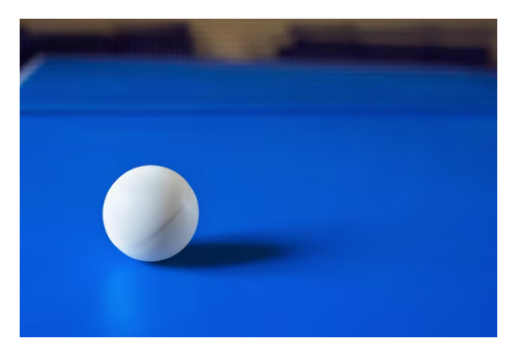

In [9]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = """
iVBORw0KGgoAAAANSUhEUgAAAgMAAAFeCAYAAAAYIxzjAAAJmWlDQ1BpY2MAAFiF7ZlnUFRZFoDve69zoKG7aTI0OUmU0IDknCRHUYHuJtNCk8GIDI7ACCIiSRFEFHDA0SHIKCqiGBAFBczTyCCgjIOjiIrKAv6Yrdqt3dqqrf2zfX6899W5p94599Wtel/VA0CGkMBOTIH1AUjkpfJ9ne2YwSGhTOx9gANkQAJUgIlgpyR5+jn5g+VYqQX/EO9HAbRyv6fzz9f/ZZA4iTwOABB9meM43BT2Mu9c5hhOImclP73CGalJqQDA3stM5y8PuMycFY78xpkrHP2Ni1Zr/H3tl/koADhS9CoTTq1w5CpTu1aYHcNPBEC6b7lehZ3EX36+9EovxW8zrIboyn6Y0Vwelx+RyuUw/8Ot/fv4u17olOWX/19v8D/us3J2vtFby9UzATEq/sptKQOA9RoApOSvnMphACi7Aejo+SsXeRyAzhIAJJ+x0/jp33Ko1dkBAVAAHUgBeaAMNIAOMASmwALYAEfgBryAPwgBmwAbxIBEwAcZYCvYBfJBISgBB0EVqAUNoAm0gjOgE5wHl8E1cAvcBSPgMRCASfAKzIH3YBGCICxEhmiQFKQAqULakCHEgqwgR8gD8oVCoHAoGuJBadBWaDdUCJVCVVAd1AT9BJ2DLkM3oCHoITQOzUB/Qp9gBCbBdFgOVoP1YBZsC7vD/vBGOBpOhrPhPHgfXAHXw6fgDvgyfAsegQXwK3geAQgRYSCKiA7CQuwRLyQUiUL4yHakAClH6pFWpBvpR+4hAmQW+YjCoGgoJkoHZYFyQQWg2Khk1HZUEaoKdRLVgepD3UONo+ZQX9FktCxaG22OdkUHo6PRGeh8dDm6Ed2OvooeQU+i32MwGAZGHWOKccGEYOIwOZgizGFMG+YSZggzgZnHYrFSWG2sJdYLG4FNxeZjK7GnsBexw9hJ7AccEaeAM8Q54UJxPFwurhzXjOvBDeOmcIt4Ubwq3hzvhefgs/DF+AZ8N/4OfhK/SBAjqBMsCf6EOMIuQgWhlXCV8ITwlkgkKhHNiD7EWOJOYgXxNPE6cZz4kUQlaZHsSWGkNNI+0gnSJdJD0lsymaxGtiGHklPJ+8hN5CvkZ+QPIjQRXRFXEY7IDpFqkQ6RYZHXFDxFlWJL2UTJppRTzlLuUGZF8aJqovaiEaLbRatFz4mOic6L0cQMxLzEEsWKxJrFbohNU7FUNaojlUPNox6jXqFO0BCaMs2exqbtpjXQrtIm6Ri6Ot2VHkcvpP9IH6TPiVPFjcQDxTPFq8UviAsYCEON4cpIYBQzzjBGGZ8k5CRsJbgSeyVaJYYlFiRlJG0kuZIFkm2SI5KfpJhSjlLxUvulOqWeSqOktaR9pDOkj0hflZ6VoctYyLBlCmTOyDyShWW1ZH1lc2SPyQ7IzsvJyznLJclVyl2Rm5VnyNvIx8mXyffIzyjQFKwUYhXKFC4qvGSKM22ZCcwKZh9zTlFW0UUxTbFOcVBxUUldKUApV6lN6akyQZmlHKVcptyrPKeioOKpslWlReWRKl6VpRqjeki1X3VBTV0tSG2PWqfatLqkuqt6tnqL+hMNsoa1RrJGvcZ9TYwmSzNe87DmXS1Yy1grRqta6442rG2iHat9WHtoDXqN2Rremvo1YzokHVuddJ0WnXFdhq6Hbq5up+5rPRW9UL39ev16X/WN9RP0G/QfG1AN3AxyDboN/jTUMmQbVhveX0te67R2x9qutW+MtI24RkeMHhjTjD2N9xj3Gn8xMTXhm7SazJiqmIab1piOsegsb1YR67oZ2szObIfZebOP5ibmqeZnzP+w0LGIt2i2mF6nvo67rmHdhKWSZYRlnaXAimkVbnXUSmCtaB1hXW/93EbZhmPTaDNlq2kbZ3vK9rWdvh3frt1uwd7cfpv9JQfEwdmhwGHQkeoY4Fjl+MxJySnaqcVpztnYOcf5kgvaxd1lv8uYq5wr27XJdc7N1G2bW587yd3Pvcr9uYeWB9+j2xP2dPM84Plkvep63vpOL+Dl6nXA66m3uney9y8+GB9vn2qfF74Gvlt9+/1ofpv9mv3e+9v5F/s/DtAISAvoDaQEhgU2BS4EOQSVBgmC9YK3Bd8KkQ6JDekKxYYGhjaGzm9w3HBww2SYcVh+2OhG9Y2ZG29skt6UsOnCZsrmiM1nw9HhQeHN4Z8jvCLqI+YjXSNrIufY9uxD7FccG04ZZ4ZryS3lTkVZRpVGTUdbRh+InomxjimPmY21j62KfRPnElcbtxDvFX8ifikhKKEtEZcYnniOR+XF8/q2yG/J3DKUpJ2UnyRINk8+mDzHd+c3pkApG1O6UunLH+mBNI2079LG063Sq9M/ZARmnM0Uy+RlDmRpZe3Nmsp2yj6eg8ph5/RuVdy6a+v4Ntttdduh7ZHbe3co78jbMbnTeefJXYRd8btu5+rnlua+2x20uztPLm9n3sR3zt+15Ivk8/PH9ljsqf0e9X3s94N71+6t3Pu1gFNws1C/sLzwcxG76OYPBj9U/LC0L2rfYLFJ8ZESTAmvZHS/9f6TpWKl2aUTBzwPdJQxywrK3h3cfPBGuVF57SHCobRDggqPiq5KlcqSys9VMVUj1XbVbTWyNXtrFg5zDg8fsTnSWitXW1j76Wjs0Qd1znUd9Wr15ccwx9KPvWgIbOg/zjre1CjdWNj45QTvhOCk78m+JtOmpmbZ5uIWuCWtZeZU2Km7Pzr82NWq01rXxmgrPA1Op51++VP4T6Nn3M/0nmWdbf1Z9eeadlp7QQfUkdUx1xnTKegK6Ro653aut9uiu/0X3V9OnFc8X31B/EJxD6Enr2fpYvbF+UtJl2YvR1+e6N3c+/hK8JX7fT59g1fdr16/5nTtSr9t/8XrltfP3zC/ce4m62bnLZNbHQPGA+23jW+3D5oMdtwxvdN11+xu99C6oZ5h6+HL9xzuXbvvev/WyPqRodGA0QdjYWOCB5wH0w8THr55lP5o8fHOJ+gnBU9Fn5Y/k31W/6vmr20CE8GFcYfxged+zx9PsCde/Zby2+fJvBfkF+VTClNN04bT52ecZu6+3PBy8lXSq8XZ/N/Ffq95rfH65z9s/hiYC56bfMN/s/Rn0VuptyfeGb3rnfeef/Y+8f3iQsEHqQ8nP7I+9n8K+jS1mPEZ+7nii+aX7q/uX58sJS4tCV1A6AJCFxC6gNAFhC4gdAGhCwhdQOgCQhcQuoDQBYQuIHSB/2MXWP2PsxzIyuXYGAD+OQB43AagsgoAtSgAKGGp3MzUlVXeFiZ7S1IWPzY6JnUNMy2Fy4zic7kJWYDwNw5/Ch0MJiNKAAAAIGNIUk0AAHomAACAhAAA+gAAAIDoAAB1MAAA6mAAADqYAAAXcJy6UTwAAAAGYktHRAD/AP8A/6C9p5MAAAAJcEhZcwAAD2AAAA9gAXp4RY0AAA3gelRYdFJhdyBwcm9maWxlIHR5cGUgaWNjAABogcWba5Ikqw2F/2sVXgLvx3JAQIT3vwF/VPc8bsY4kosddtUwVZ0JpBDSkTihkn+qyj94peqcGF62m5Y0+TSyN87vSyaNNHPILrqQg3Mmllhjc8bkEbhdaIOmjHa7uySbfPbZhBF9SDGY79fPiQ9ei6duieyPC8O78Xcm+P0lf7O/prAXnb4kt/Z7BakJN2L26UsCW777p/IZEH4MmOXH9ZzRnMlf11387m+DoM6PGr9ufA/kRvrL9Vx+Xs+/Xy/6+0SBnfmSyH3dZ0+UAb+ut6Y/r//W37peflwXVFuyS+Nzo+m3RC6wlya7ryXY9mNpzv5FFT9f1siPXXIm5RRRY2Ram+megjvS/9fr7+7af2+iPy/NRMn+ywn+5xL9xxP9uyX9WNH/T9nXE/3Eod9ey/ttwD9Qw9pUi/ypY1r1Y9G+zPm54OsfJ3Shjq+Zi/9I1FOff5zQtY9791y/Hl3GxHWw/Zz+0jH8WtoesD12bU+m1Y0d5oO7Dj9zPBkvMjig8f0z0gTGBMYExsTARJFBkUF7a1PZaA0wb3BmUMbrC7ooSFCYYEtWmaAyQWWCxoyNi20yUXdbeBqD1G4QpPUvbB8MGnzfqpp8n/0jNChN66h7vzNtCDr3tEpbAEzcIGMsy7C+0CYr5VpQYyPXkN4yh00MTtzL3ENqu5VtEdlWOiGubTwBUW3ns/OJhFb5HHwOPiefk89F/9WMM4QvQpIDIflvGOcSbaHbwp5aWgePA417PN1lrmUGFq6VaVylH1vsQE7XGauWidCHQxdubxI6cCua7VHedONZh3eWNoznIR6I9eySB7N94h6b4vPE4JpgbFxgdt+40Omg2fjBACb2U41fld1OJqDLjTaBSQMmEELBAqIBlE3ISBSYMRANAjoKjZuIGsDuwGQBnWwzCWtiacNEqyayGdE3TAdzj8VElh5zFmw/YUq0RuvRRKWx1Mh2R7b582aJyWWzI0JCksTupdSA+Y7pqUmV7U9tEei3HVqTpsfRIpbBG5PIPD3joBmxcsJiiCqZB+fKPRSdO9eHM3lGMXkV4lLHgJcp2E8JyRSUWbCTUvgbaUvj787fDCozm4IxVmy3YneVZdawxFSia8Ura1lYPt9ReFW+s7TKgGataSyrIVnDJBpLarhNwwQaG9RQRRsqpq290bxJgjp40aMFDvjE7Tqde9/ewyeK7+ygkg8pIVkxBY1qFOvWgq9py0a3m2G5yqRjvzHQnU8NljjQy8AIBxY/lPuD76hjYg4T45vsHtmJmJmXmbXjj8lMdDABMxZmFutfWPkCGRZWvdDV6t4slr3m9m60RFDGqNglK2wFMlecq3Nj5D3S4siffzYscHRYW9Tahra0WlIcFpctbmVdiJYMxuI6Yl3z1ilteoSlORpPIfQAALSGTWsECCKQl2zA8UKoJDjNhtJtaANwmMJDQQfrLCmkjTHZmAto0W3sw7Kq7W028fTE4JTUprJs6qQlg2ur2Qw05MDSyEFsLtXmNi3GZfPKtoAjOLot3Cul2dIWeM13Bn4QhyXV1G1lpbVjumOIxcNsc802VNNyBo4meVIkJ1KmC7b7bjvL7EzYkaSPZjcCYQJWI5+5W21erKpaRcED1Bq48cgbw6plq+1gsmmTnUg30cmswU4Mas5qF7ux/LQr8b2i7NWXXbO5D5ayATiew8yxOkADrGOrAMDCmnl8Q5k6HYOcc9m5GJ0rfG1LnBuDoNMcwOUAK+drcF6d82uD5XIhDLIEdaF1F0bb3uUifWOiVVJQpa0sDnhwn3xvp5KdNgsbTAvV5YyXMUEeSnQbrvjlCiZUGoKM4AATV5kUxYurdTgiL96DhOQojSe12oHjBYg4130Clqvr9MMi3IY29dVpmk6ZUEcGM1XcQC8jJzd48pjYJVYzgzoEA8Kzw2UcCwTKm1vVusVS1gK4fAS8cL6G944uOAKmHDBvVGQ7n8v5LZtL3rvawf3g6ek58nifSUR68Z4tC8hK8uVDnT6MIh7j9xGAjoXkS52Pa/h9YEoZ3bfp06wEi+DzDhpVfSaXLjb4QrApRX3RspMV+WxS5Um1s/IF3jFNy8GzUgLL8izYk64QYJrvs7Ch2SuSKEvSSabEBuMt4jFUD8T4SUSaPHUSkUAS9sf6lWhYxpqOyOjx2bAhMoA9aBbrTHg0xwUsVJCHUIXsrkc0iii4O/LzOEIX4TCQaobSAh6+QYNQxmEETI5jcvLhrJE4JrQuIS1CG1rKuWN3hDgiVgk94MehAI84S6gJnbYayGTYlhwaD0IQAruGjr57bRI6YuOAgV0N2lvApALdwqhsxtAwSQJmmgFT+IqVgZjBvTV2nAews40AuwD1YAWxEDyIeGbECKLL+DWoDqxFtpHA2iIKiyEwa1lscsfLSoyZhSreYpbERGhNrca0SA5DiBlXIorHggmWPGLRHisgU1MF73bEy7ExqjXairGjtV6jRPLQqJ4GiulIcSDuyCUOrRFkijNpnH1EIJ8IbiMBgFQLISKWxWxEA/B3cVxv4OiKiVwXD+SESAQHsxPGlTyhJexNr5xuZ8V6eFLFx2dOie+4YMLJE2FdUq4YMZ3w7ER4TmVqqkxUa0t1bUsprHyRIuTUw0q98bkWcuakjSM/wX0kTpCj14SvcnbsaSrWgMYXmcIC00nHCPTkLZO9wd5tjZkUgf3FmxuCkEF6FIH/CSYavg7gyjaBNmTuGeXsdeUEsqfFEZ0kKHdPfCFOpJkLfatruRayhglqhSSZnSXLCRmAzx1HAlizFtoOKoFGxNn56wQBJ/cBBxKYkBeHBYaRSZSdUkghSBWrAxAxQB0IvELxBDe8tAQ7CqZewsTZGRRbJzva2nUoJpe9plxXYUYphaNN0VkqoF0rwq5Z8MvStBVCfUGFpS8tnMZZUSsD5BoMGWuV+dmbWZZPUlYlcSZ5I10j3SC2kH3aVirhA9BulVC+naWCJSAOOVXB6fCTGFeNWj9uyPZKJYWqaLOiiFqC1tIRDKMiu6t1KUZQahsYNVjf26pEwap00ZXrwMIIQpW4J3W2ibkMVtrrWuR4ifR2EFZDJrQm4J1WUwOgcXwakTLgVHg5DlhabDzLNuGBvWE0mNlsSNUKgaRoaAAsXSrJjLZG0CeitI6b9VmJ6NqUTHAEchFi+XRD2iTsbwNGor4PefgkWVfrpCHdDvKOQMRXkN6j+zZZIX5a8WTreyyN9Ay5c5UOsGF1pSMNvo1/D44zhNXKYFC6tx6ZafJlm5ntWvtOePogtWUBwDiQtpZ00jpch6ySVNJMMoqUyRzA+LjUDSICQOIHZwHSfuBWY+isrGxqSwlrimuQkCwhmAwtXZX4wcMqGUpRlKGghfaelJmUhSgBS8EzAkdSQIG8NetCfg4zw/Qmg7yOxZCG+jU4Lg3gfhBv0GNFDoAozBEH2opxpAGKMx9qGCURFie2mciHl5W9XaOtjvLJfjmFaGmD08SgBxFcBxnPWGQHq3GyIVyazuXAcUfJbyJRbHSE9DIBr0kYmWEpbgjOG87kIAt4MTEAQiJpQFdyLEx/sJ9gapuAJuDS0TfIOsl7ZY6qpAllsrFzEfqWkkhHzhMzLku+YNcil0Elti4gaQUCCGEHtAZ7x1wpjZVWFzAME6JTwerIdfCBvECW1cjke86L7cRRCgqsa+AjM/Q1h4KRuC3/fxMK8mQUbgkFeTIKt4SCPBmFW0JBnozCLaEgT0bhllCQJ6NwSyjIk1G4JRTkySjcEgryZBRuCQV5Mgq3hII8GYVbQkGejMItoSBPRuGWUJAno3BLKMiTUbglFOTJKNwSCvJkFG4JBXkyCreEgjwZhVtCQZ6Mwi2hIE9G4ZZQkCejcEsoyJNRuCUU5Mko3BIK8mQUbgkFeTIKt4SCPBmFW0JBnozCLaEgT0bhllCQJ6NwSyjIk1G4JRTkySjcEgryZBRuCQV5Mgq3hII8GYVbQkGejMItoSBPRuGWUJAno3BLKMiTUbglFOTJKNwSCvJkFG4JBXkyCreEgjwZhVtCQZ6Mwi2hIE9G4ZZQkCejcEsoyJNRuCUU5Mko3BIK8mQUbgkFeTIKt4SCPBmFW0JBnozCLaEgT0bhllCQJ6NwSyjIk1G4JRTkySjcEgryZBRuCQV5Mgq3hIK8lSicEgryVqJwSijIW4nCKaEgbyUKp4SCvJUonBIK8laicEooyFuJwimhIG8lCqeEgryVKJwSCvJWonBKKMhbicIpoSBvJQqnhIK8lSicEgryVqJwSijIW4nCKaEgbyUKp4SCvJUonBIK8laicEooyFuJwimhIG8lCqeEgryVKJwSCvJWonBKKMhbicIpoSBvJQqnhIK8lSicEgryVqJwSijIW4nCKaEgbyUKp4SCvJUonBIK8laicEooyFuJwimhIG8lCqeEgryVKJwSCvJWonBKKMhbicIpoSBvJQqnhIK8lSicEgryVqJwSijIW4nCKaEgbyUKp4SCvJUonBIK8laicEooyFuJwimhIG8lCqeEgryVKJwSCvJWonBKKMhbicIpoSBvJQqnhIK8lSicEgryVqJwSijIW4nCKaEgbyUKp4SCvJUonBIK8laicEooyFuJwimhIG8lCqeEgvz7EoVfPyP6fv380QnHl/xhFUCpD8+gOj6lDDjg55dLAPUXE4HZ7B8MgSe/fj0GwJI/emCW0xiPqAkzzQGjxtazFyIeZ72d3fHWz88wmvwLRvq634CpRqoAAAABb3JOVAHPoneaAACAAElEQVR42uz9WbNtS3Yehn0j59r7NPfeqrq41aJAFICCUAAIGAAJEhR7BmWGGFaQkmVLpmU73DzJ4ZD94h/kR7/Zj5bDDroNkhGUTIoiCDAkgAQJVqE63P6cvdbM4YccI3NkN2fO1ey99jk7b+x71porZ/aZY4xvNEnMzHhKT+kpPaWn9JSe0lub3EM34Ck9paf0lJ7SU3pKD5uemIGn9JSe0lN6Sk/pLU9PzMBTekpP6Sk9paf0lqcnZuApPaWn9JSe0lN6y9MTM/CUntJTekpP6Sm95emJGXhKT+kpPaWn9JTe8vTEDDylp/SUntJTekpveXpiBp7SU3pKT+kpPaW3PD0xA0/pKT2lp/SUntJbnnajGf/Of/fXAABEAIFAlP85IhAIiH8AEwFlfEMKv8X/EwCWd0j+pKR+4vBHDAID8PJdf9uQiuxab2gmgdg81JaV36uWhbahyBuCPVLMSUTFbwBz3XPfDRJJIOo849CO8CqbdqcXwnDLvMlLdUBKnakw0qGDBBBDm8rMcACIHQAK/V+YBibk9TCFtRLba2o3bSbycbyJKI113nuAAEccViIBjgjOUfoMH9ass2PosjalueFYsn1ORDF/2gMA4jyGsSzzt+tA87mtozH1jSEO68v79Isz7L4ngL28TJytHWbkY+8ADpmzOQj5wjwRAHJ2DTK8N0XIb/pOKiusc+8ZzGZd6XzGdqSz5KRUjBWRtKXY22CASddgGrjWHBD12xXzc7E+i+/lnieSecmXXJ6fKZ2dzFtPu7KlxX4L3+V0lfaOjf9aO5rrmJfyULZu0rPW+cSy8qlRhS7ssZGy/W2NTd14aZPsh3MH9E3lUZoXWdBs2kCR/pUpbMj/4//l763WNcwMzAfd5RRptnOJfrMehjAbHgBK4sbpIDeZYmfHJo3DhubADBCywlaT3ci9pc6shLIutseqaLkcC+jX26pZDwW7oJiF1WFdjHpw2HKLz5ze1aLsc5s38l8lMajaGDkMaaftH5kTJNXdGVll3bJnZb/tZiNqPW+tlsD0OEfwukYJgAu5nCMwfOBlZLwtsVTiq8Q91ZOIUv5b/m6PPljirv1slWOftxiF7BkSsS7H184Xx/3G9XpAag8rkydlpPWmewEmLwPswKQFkoxdele/J+ahYP6YMTPg2SM73LJ1yLK7qWrzWMoXZc7o995QZsRnY99LrTks3yvLUKGAmeHZg+GCMCXMgJPWlu3kSNTSZj6V+PTe5wFGrHzXd/IvtZEYTQJv117e9/yfnB3q9KVbf86Ac8U00EBZ6TzaOhVb5o51n6jQVPTbMtR5n/rjUqZhZmA/Kyog/zqC94IIODKLR/ABIuH6G4cedQjq4D7PibmRsAfeL9uy9Aph/YBv9YFAYA5bmtlnRKCdXMYFBwYgfWaGSFGI80qyKMoDkkgZKz1Y02INRIaL/Ijl9Bd6+7NdkDMXv/X6KtKMRTuIHKJUkhENw/s2xrvcEjoSjgDnnCACgJ8IEzxuyAmwERjPxLyWaAmytmmbXJzfRB0Tq8BwJARSKVqUnsOLSYKgrC7lG5OEaObV8D75EDDIA/YQIrJEwjB7phByad3ormVSbK1GJ1qMSCpf0BbLUQmnFfqgHITOrxzfHMaUPVfrPjAOVMyrMhxYTXmekgPm9Bj5x1zoM2QmY0zK9wigoqWGinH2vYESMMF7b8aS4riFMzadt9Xgl/UdmZqE2IwKr5yQcYi4tRttHSTMZjleddcY+Xqw4xnbmE3OUhu5O0Z69uXt6I9niVJkydPiu73xGyXWithYQa8oKv5Y05sxwjqODIjkQBQELYJCkAzHLh4oLh6NATrQIbLKgUyitP05EhGMkvjQoDYgPw6VV3sODN9AX6hxCMR3CugVpBKfedbogUpPOuHeTDoz4GchoBxGOY5XIfJTWWYx3CUrRMRVGWZQzdfZdFCRAU4HgUiLtvOc5Y8jCoDgs+LnNDZsDoRMKqjHOc27OdKJMDnC5DjA1I6xmwg3Nw6Ax24i8AzQ5IzEa1U2LeQlqUoo/8FIm6EuMlKNMl6RV6V8/qMqigIBzPObvaJQhq2aCdMUfmPY8pM6QpEtEi6eWOVdRLUGQdZaPHQpja+UF5gK3ctCwA2qRLrPmeGFGSI4o8oBvE+SSliX8ltEE7TtYZ3rZ8h6UfVP64ywqrs2ulWKTMvnRI1iYDjZ/tT/5p+ZWZh8H8bXqXBTIK/OMP+ou3NsaiMWOfZ2bFXMnL1cqg6bTD8r4pWQk3xcYYinEvEVdUlcj0CbKCoB5cbvW3rPq9mtmji2uDp2Oa3YqrzIJpn+pYVv0bvw0zY12wY1QWgEEYEdgbRjChd4Wb0uNEBtCKRZ2YFVf8/TCFOgHfZxkNYnw75nk1vhzmj0KbWzEXUUC5E6MDxzVAeEduqhHui/94w5SlMePWQicYV5fxOSYN+rpb6W7rrenElPF8thgP1clKwfcgjZsigcywPYM7zZ3FZiLAv2ZlskO4swLpMjTJPDNIUlebMjsGcQT6CbUN0BAZ7dkTKw7fHIvnP+zOrBybWk11I9UJeZCD8b5kSWhlkmzbmuubuElhSqCc06mTL1N2eJjNX4iHohV4EERo6nxJ84Mzz20A19IHgX9ODRloHUXiCpLtgHlYFXhsD77Hwl+OYatmhIZ5DSP6uUtCTaa4ged8uw6oKeyiAwPjpiivSoeiutReXXiQC4bYqSpVTapCRYeT2tIhKc26YnRrJH4Nv/ZgJC8W6QT2vGIQcMEuPQpjUEx2r/VJ99Cx0sB2SIGUhIS29t5ahYE62l1CeLFOcIoQqhF2AG9geOsDk5hnOh/24iTADYsRxElNCA4mBUySUNuP1uObi1JBuNgoQUCxvi5GojlHngrV4bUqlIUlWEQxOU2tJ3JklRDXf0gMwJohdmwPuAVIRDVUe64LoJCNZfJbDJ3YMzWzA9JIwLTh26uOOogn29wMNn257AzDCpGkXaCz0cfUYkEMclEcxUtq4YOWSI4QiYHGG3C4zAbgrUzUHQAgB+YkxwcQzZiZRcoDqRcZWGqHRMsd/mBR8kOJV2m2eloGtQ1YBhEtQeROst+7m+AmUkDKqk80JEYJ9LelQU3jrLYpt0hqJEb+YhEpSABvo4MmoYyKFu6eMs0rD3jHlmzF6ZQIDnoEOf2Zt3EiqjjHVr3XYZOIjURzJJaBNTK6mlz2YHVfupk8w+Tp/jD4YRpvidMEVDTEWqPMKcEbHYEwhiwGF9XyIlydXMaUljuX2WJZQue1KspRopqdREPj/TlIBG5t9zPGeTqtEwXrJaM5JqxjWsh/AwGrfGDRmzW842SwrGKhKWdZdpRVWStzXDcRcEUmvLkGlaIukLa0kZcysABlODM6sJXu9Dg9Qy2znCtGPsmMET4JgwsXIjDOKQJ7VYrWSTdEDVAGwBpgrmYZQD4qN+2lYOm43j2OhPDecpuG0uQQAR9uUkOXkG5jkwBbO33LWVOO3iahs/UbD5LzqQG+hx/lP2MBGHcLJ7A81SRgGp2PTW0C1I/569qSSwY4HR0fe9gY6FifCJIVCFQ97FcGDeTA6znzGJvQBjgiMfGFgQbjyBvQd8KH+aGDtS1QuLjt/OWbKpIIMkWKIRWQszp1HSZmHc5LCKjICca3YNKIefM4pCQhrGanqo2APKc5q8QGCSnUYETInjvEcG1KwLzg6VYAsRFC1pXUbD04gMcHbo6WFkmdmZWdYy4zAroxsO+XkOCFn43ceDOrIXkRkQNrjBDFgEI34ngNgHdsVpHxsSWcaAGVTKCmErEnHJ3CtBS0Sg3mBEHs65qBKwhtlEgBeGABAjWG7SqeOSZQKZgjeFfkbDfqNDJOuh4XY9kekNv3uPKGhkqKEZvxk+E0bUcDYxoXFyMjVCpEWqJjPqvsC922f2f2qgnuZI1xIjCKBUttPY99RLRNtd7t98nOyx0XgdIGX0OZN9I3MDBG6RlBln+XoBZiBwRQw3OUzOYQLDO48JDjvpjGPGNDmACZ5zIrgGUW9J1Pw+UlZ7NY/AY9lcxgO63gQZHOyj3NvsfyhKNob5rG2KKgL583NOPLL2R26z56LXE1cTZOiXhtBI55yt/+QOlTh9e/jZYQu/+az6XEJWJmBmK0FYC/ewUcN4WSZLpSgAs7AZBEwz4D1hViNYDmI8uQDNEhEODuIeKX+RaKR+qQumd7kYTRQsqZ1K/qbfxHaNh8WSJA+Kz6wkZiG/KLlQ6/DIJQuGMk/lmIffvDmw4MzhwyJBIDVTZjV9J2CmQPnVfVC74J1Kbfl8KwPlfWBmIyMgzO3hwPBzmNPZJyZgnhl+9jhkTK8wAWTsB+y/ki1/ZqQ91R139gEXJ3lJaEYYgViyUQ1wLMuUbdZ9IFjKDBDcRCJwBWPPiQJz4AUOdxxstM6SSrQjfrc2HX3q37TlKQSV9DxfvxnTxEVZnFRKCWUtBR+75vN6KtqijGtsmRJMjkTdquf0MCttw5JarhyzIAxFdnpxXGx7OdIR/T5nDEgpuGlnTJsyQ/KwTqw6jcBwTa+jOm1gBhChVMeMyTFumIBJuHdmsOOgMpDGOWc4KDMKGcyUPRtPiiowsGYPVL45nLM6fFfLYaXF8btarhNh8TBJaILRl4svtjIDUcLixuLSzQJv6reHhmsfhMbAzzd00GUjGaYuY0CYYDJkh2H4aohWlHStH7f+myQpNd60TEBSFRh/6BL9IMUMUsyDaedxYMLEBOcZMwFOxpIdiWFm0BvqW8RqfGcLL3zzgWgk5+z+NYePdXTJjlUq7AuKDNnXuFXKvraWVEsVpMjEwtxmr5WHUH6alrrmGpmqlk1+aAuDoKiXnwMzcPCM+cCY59msdS3XulwmA9pa2CgFEGVMOXDmFjEo1l9coZFQ6cJM6zrPmY+WnSO7lzMmoChHlX0BkWLQzMIUuKDyUiR2kv76hOicI7UJl2EEC922dZ+u3o3SfbEGOe37avAKaTq+n33XMuSZL8azQkjz52muufpOVOxJIbbprKTi/fa5b6ek664Z3WiNOqFgyDjmc0Vf7F60zEB45gRGUiTQukmPRqMYZgbuXnuQqgc84J0PHD473MCDeQJPAQIm8pgmF7wOGgTIwq+5iDXWFsO8CQR7uVSur7FhTZYTceNS0vHXuTmTKK3kb+0E/AwczEEa35ZhTG3VDaRBY+zhiFhPGs1yc3VaWfqhQ8GCYFCaBcjwpdRhPCVgf+OcWVB7iQwlUHga8TcrVWTj7tKG0N55L4aXHvAuwPyCToZ26IlAKdYFmc9xDMM+xuT0sAwbLjLJbgmVURjfQtoJtvSexULfEF3NvzArdWAizp6VbpNlICR9J9UoT4zEnaRq8RJqMCUlzF7Wm82SQL5e1DSB8aNI/L0iBZ6LMrVPaV1nfdG+mT4mKJUAXj8pIsNp+lmr5Xj1/fzzsiucMgwBRQoT7rwHOWBGcI91M8n5ixgs6/RU2uAUzA5DzpCaGeImI5pL/K16svnUgoq6GR7WeDPs88TIqQoxrzgxKbZeJe6WwS2Nd5MngU9qpZjBeCIQI1d5FpNYra/WOFgm2qwHw+yEDz79HvkyO3g+M+xlqErE7As91gaBpHFm4JAqnyaHaeewYx84eAZmT5g8YScMg2fGNOlkFGQw6xxnj9D41h78aMoUx2hsezB6VK+7xVvc81L5AIJOynJwKp1oW4tIffZjRgzDoXkwhlaZqgBJmk5NTfr9xNmG6H0paiBSOxfHngs3wHR4eZgfOLU7PeLqc+Ucw2kFMNsDOPRXJZAMDbAMkEUVEAxamROhBgPTHjg4ws3koJHvvEtBcawUAgowLTNH/3m7wVQNkaSJ8I/qfMtR7Bm2lc+dc4OMZrHOOOkyVXDJvU04+90ehES5B0M29RqJj8N4BgbDtxf+CpGdkSRJz+o6mNZ2sIXxmOc5oAMzol3BHDvmIkqi7XWIzksJxSHTd/V/1EN+YITz9ZTWol3ry9oCrtYkFt6N7qQyKeSCLZUX2uNIo3sGlZZzhGmaQGVfjuENSqnULKIUXKoem06vDUJZlxnIaA6ryS6N+XL1Z6EiFAYtChnlMd441slURIbW6J5IjIB+FmTQ7uMMFeBcLZXV36YrbbsALl7pI0fFDwYqtEIPgV18KkK4B9EU9vGghfwmmwEnvtuBzli/gWDg4T3BT4Sdc5g9w80zJtePqKYDnKkNBjdtKbJTpFjr+pHNgTp4FGiRNhCnhZilBWkJSRGbCHyI7zB7D/YUJVyvhJLTnw2nmxmDsUP0TYrJZTWnxUdZG8NoNjhZNS7SxRnhfcr7YKswXHG+iZOBmB1nthCx2lQwCzFPpWT6NwQUgJjE4Cr8u58ZO8/YzUk364XoOAJoDn1RwuKF4HvP2WEQ/ebjcCaJQ40LM4Mk1ERfX1F3UzsWNRuWj3vmMoQc/svLUgIeSkmMYdb4fL0o8bP71Lol+FSJNSDMfKeZs/mIDG00IET6m8WbYFbUS2wLDmJPoJ4GzKkvhGxfuSgNUTbuFN3vBGq1Z8qQnGEY3OrgXnqveN+MQ6v8eO7pWUoMp94TLoTOZkfgmaNxYSCM+RlXu5i2V1IT4G4iA+rRlMgUr6EqEfruoALC4JiBDW0qKboZ68ggGLVharOthzLkoOp3prLLn8USLP+o02L2dz6A+YTGYju6+QpVMd9blGIxYqNpRxJSIEF+tExna8L6yg1pQ5wBBjuAp2SgBRa3IR/8gqfJhc+TFzjLgVPoAegiSPCH5dYi71WMPDcOTCP1mMOn9k5ojaRfiPXfSJsYAdORgqnJ2k3mO+VqDt0EOk4ZfCqwaWIKODIFoamJMchLlEWnJ2rmTFnED+jzL6aeaFee6mAAbBiSglVP35PFMEUJhISbc5m+Vl0olQtW4jLPPYYvEAfvXSDkJfERCZRmZVBDoBcQMLEP8TMohcwgh6jqygx1HMEJOfaynSdSpGGFGeXArOhQ2/sd6qxcrdUqMEwD2m0ZEabfzDKIxF2fp/lPxpm2AGvR3VoXlNUFBAbOzz65xqrkz0ENsBf1V0AHEBmEw6zMb1DppIBMStgk5LSsUXWhJHg4r+iHj+9E+xZd1otGSpZZKu0jcoa53DAtOLyeJ0p5KJRJ0iav4YjFnoVY+ukIzhNm4mAAa8oqpdti48X6hkwNsjyU1IFIJ0nZjxahK6XcXCJOzG12UsXzi0xEU33XnBXV+OaIZNYZSz07rLc12I3CD6c935nqLNEATekFeSqRtWUExuzfHMqDbghPkDg/SUgZScPMgNeQbzOLq4cLxlekOm0f4Oudw44DbOEpwLHO+WTIYJkBkaKLYZUJakEr+W92gQWjr4EJSTLtRVI14ZYoEgsR0X4yrG476w2r/jShAcoMsBykLCqaAKdz2oT2tpiewiiucws4dkbFwlksKAYnzED9nxO8l8PPFfRKeXnho/oSB92uV6KZIRPhOVNwDWzdMcGMCEU7+df7KRioHeYQLXMXcQQEs3of0AAnxlsu2LtMnuGJoqsXg2IwGBYCpJuTvYRBtgJ4bJidXYPJG0k7453IHHgZ81ygPtDvaYy81/IoTQyEYW/Nq2EcMqJHhBQe2R5QKRhWvu6RuXpqqzgSeQgKEAJABaNBiazpPWZBvmYPHGbgcNC1DQWIkQwHWVSPyf8+qQoCk5aYhLDvMhRlGFKvkY7GEKLaN9x6vnDpVFwXwsxKI8l7sYEJKivnWkTNMDbUArDD5BGAVek+S952BCncfFpF7fJqZKA7upyJExEF0Ppaa6zJNOvlW1Vy6UXiYj0nhqQ9L0foXXrzy2nP5yhB2zBVx6ZuktrshHcJAR3L4/za+AlqHzHWl2FmAHCBxhhpgojhnRy+LrgYMc/wc7AXAIQRcCY8DnPe0QF2NRJUK1HH8lKuMa0rDygSRoGVfmoNf9A1+whh67Pwb65GYSG2s97sxkrolAkgeD+bOws80l7S1huY1DAkGUEaUqukHoXPuQFP9HGPKIXxpTfzlBnEqK7Lx7WdM04l0ygbx6tqZKG93nuJZRD+gtuaxzwT7tStEEELTWIUNDknbobANHGM+uycwNQOQvElokCmPkD8UyhU12nFmQuXtHZnRa4CSq/avdBGBQwTgcBQRW+fOC/2kDC2EzrWZNaRQQsqdztmUwabGAQJtvez/pGJN6BMgRoSahhi/bOCgzAspm3agBRMKBF9vTtV9cQU4V4jOhZz1D0rMwkXEdFaO1z71uSlgJP9GtsXUCux0ZJgVt77eKlWiTLkOu5CWjRBm0obgMVUqWuLsV7oZ+pPzkTWiApX7+TnV26n0q9tYT4YcqFW3qaoay9UNvGIojbz10uLtKfBbFdZBhioPOZD2AgpDkcufLUvd1tO48wAh0Cmqq5V60Wwi1ycHgTzxJhmhiLTKlkBCfpNzNGYD2RzdM13KiTwLYMwUsNxyUJRCmXq97Tx9Xdbe5DwfDwk0/hylP6STs2ELua8Xm1GWuS2d2zaubyh7EYBQr2R8Om1qpYYwRy2MITEbOysrXnggYoQRvaF6quAs/miANmxUBa1tZhnEhsBxmGWWPA+uHIp0+RcgC29Zwnlhah6IqYMzUtW+YaJg0bpTONRhaKm2oYmjU/BFLZWU+dgzBkBipniTJuDpDyTfDFfUWcbxMmkgZR9r6qLtn1AknKBQMQOPqh2vISbnjN7FyRXWRaIhRM8Ddudgpgld0k7dtajQOauoPeVgVh3s1NFeK1h4UjqQsOgBWKjDKbcr8GMhM709OKNc8TURUh2AEPtprqfvTW73u82oqF4Q28MEnK11ugxITBvX3nmUuP38Xn2WJJre2ugrL+lAumMmBxbXpiByTBSRLrft63VYWaAsZN950M0shlyA5reRR8W9yyRCGeS64Wdi65X0YhMD/PIyiRb3aY2zhwMi4vH3gWeTdO2tAlNa6VKn5OIQoAyE8xBlDwubAEpHKuoCmAYgHiY+qQRYDbQmj002cDyLpZP7TOl3wcj6Qe4bU46T83JhZQZjdjElx/KCGr7UjTDag6iJKaAGOK7nheQAdHpqgTqRJ0yCwTtOLkWBpTBRe7a9qcoLvtjIEK2gdCIyxeRGK/Zuc6xLC3cmZCyccwo5fcc2mohfEbB59LIQWnLiMtuMVn6qPC/JfjqDRCMxryoAzRqZFiXse4YadC4yMp8aMRJVXt5VrbeMBRkpFrAqA0oGkylfuZulTo/AAXJTc+hCiK2hNQyrTUB2Zrqd0xEzZLb0RwmIJQXdZhzFByUGmdLRG8I7cNL9hqlTi6013CbVTyJMWmzqU5p2NJQr7QCEdRPx4x/L5U8oDJcR6dRJovXC+kiS0jxWRIKEMKkl3UcE4tiAzOghECMxET/nW4ao3DDH4eNPqkLFiNyuZYRkC2HeMhEokBmpuxvA40khqsGcht3BCwzA0MlibhRnFXIrig1edMlLKaeLEQnkHS7HJGCEL3NslAWjhf9kRhaJYlGJVPE93SjxnDFpEcHm8/5Zk6SuKIy1rgsbeZKkqfMSavIb8bPvBOjzkGZo0B0OhpSeNJ16UUSJUwSClfDZke0JcLclAeIigwsWaQ8BCayFxnEkIWEFO3ZzElJfEnVE/Xa8AaKdeLxYMdEBPXswE7BRaTwxlZRm4axpVsbCVokIDIEHiGkMyiqB9SwNUd3xDYgqruUoTNIQ7x3g+R5VHqa9c/ZHQdNDVfzAAzr2CMICipc5zEXalFjLYrceGoxbJTNYV1P3AKw13uX85ReiDtb1u8SVdsqRVPj+1JZhJYenhYY15rvouwMSfnGkYlsjHqom5VHi561+3584qJ/9e+j9eQtzWP25AIKxWNqrOxhZkDvdVd7Ja84oqIDhUQ6R6hL4xNorGuWQ8R2T6+wVWKVDgHLPCBu3oV2ljCe0XO1zopx5EzJlw7+2kKh7LCKE0OEKeoudfva+wukthhYQw4CohiumEVXM88+I/xxDAUl0INEW8+MiEKooVXeA59tID1Y1B0vSq0S9UivuaU47gAXRDzTlwkTCbneNuUHvI0VLjA/x+1PGeH3sL/ZMSYxGoRBBkIbZ++TVDp7OCdGhd4DnrCTOZqlieHqahciarKUIUvLtQ46O++6GRkVw5LQAsoIEbO9PdEydHYZp3XHZf3dpdhhSlZXemqH9RbQuwYiQYcSac4MXO2am2cbOCbth7yveeW5/3tCJeaZs/frOA7FuKiqQNGEuN/a6rl6BDrtPCL1hRquv+r+IHvWhHl2zjIyefua5+MGiTdKlMpgLEqYvYK5Ob81GinPYzyIdj9aNkLbiGern4GbjOcLlb+lPg5J2QOMyVKWJWYptSSsh6ytghXkF+JBzvjQ/9GQ/xsMCG31KtercZIdk0Cg1HktEhKXDpZc51teqlPDUnn+fudogTgvzSe3FqmF4zgBl2lfLhuYxCueY54UtGnOCvJCIAoJWHVmpgOJOdCDVyFZQ/SLubCjEjcZ577ZVvfbvAwHKPJbBs2wIkYPnCQbim2O6gHyUKeiJCly82wpOfaWYV25XhxNYFJVgRMDLOBwCPUqJEjkQgx4Eu8YhCt+k+Nl4CTC5TAsBlxSBrw8DwjENDl4JiHoQcJ1EbaVuTZMHekVh5BLm9JEp376ZKgZ9xyztDWhajqHmd2AlqZCtlW1yfpjQJgu08a4KvMD1wqyjNyOJa3FdDVxyOtS3VmjQm0awMk5uRtBmUVKOnIy9VtbGRtyNfU1j7yYEBNTkFVfE1Bu4p5R5znkw+Z50S1YxlCYWUVXQ4wMEsPW9lnYfj5KFNL5Uyi4mvlGUpfQGbSrHoc0D3pm2ZHpXbvebmd57XUaD8qe1Z+1/avJrdAYrsvNf2+pKXIUxvCImdGyc/ndCvl3ylSSS2kTM5DFjIagA3p1a7xJysDORGIF6wBvr6ctD5kawywZgXqTj+lLe0Ob+oT2huz90IH3St1auEzEtjsYr1kr9PxfVSGs94kFSg3/urTQ9Fmjw3Y8K8O3SoeanrO6OAlCAEBulDPvIDEE6fDP9Vr6p9C7ZQIDQfEZwxHH0bmsrtWxie8m9YgaER4O5qZEGWsn3gQ8paNPrbi1RGYJSCQMzEE8QrQ/ziVIXw9up1IcJYKs7pdhLFNbM0/QbLzszjC6UyQCHImXgdBzhlCuwxW3zIgQZNC/kdx0ecfz1/hgi/2F8jXeLDZWNCarn6s2qTGfE/VVjOzo6tsWkzuYMMZRFQFzs6R9p17HOQLA0dNW+yq4ZrUXyuSL06OVr7c++0aERqvUKCvEzJD1kx3+6DIE5dl47EVw505LxNseR/GMaKi1qIkHtpmN5auuGZY+lpf91MzD+hg2aUvGqLbf66ImVclsvlqaoes73eoZGG2DRg+m8TgDYHhS9yTO22VYO0UGFCBNl7+ZgDnZxOWuYmT6rq5QUUI2B0omEi1Oif7SNzrrqQ/WUrUAzXzFWPqmZQzK7Aisv3Y6yJY509htT9m99SUCEGfICKUpZzhdnCEwof2UbcqEbKgeMDEidu6S0Zu1B0H2b2J9OLXBjmOER0w/BebV8972L77bmBcPYJJKNYog+eCuNc8AuQluZsxTcDeMxMgzPLnA/ETvXYKPwAsjWrqHiznDNck+Z1J77bIoxxpDS1QgBlQwyBLX346XhgYvw3QlxkJRIcuomYM3YYzwljGQ9aOxCuI+lgUYAzv1mJFMLZhLO3F9xzOjJpwp/oDHYQ5zQILOWYg3xezgTBUGJC8P5xW2QjzASkkza11EOWynqEmUMtEtdaDOG8cod422cx9RLqeIgJRNcv+Lq4k9ZXvXrMloF4Ph1DstxyXybAjMvNtxbNZQCySx/VycT8WYVnNRjqvsOyiTTZGWJPAhqanLuSj7X7a77NCI98VxcQ64oBMG/aCeCmw9bWIGWhDtLBCvct7BPz5tQA+KN23pwVDC/mw2XK4dTjrIzJiMdNI0DOXyAFK1Uupkb6xdtyMowWspw7ykUo91JQrjGM6wGUn6A+K5Bsf5gRiN2TL1QYjQZRdvuqgjbZ54OJiAG+ENByInroGpL4mFU8lQ50M3o13w+eKPFvnGtqKNelm4QvuoiAaD1GM349CoXV5jGpgQLyGaPaDGmeQpogwhDsGUEa7k+mjXnFShEQO5gK5jE3QeXdW4PKxK0f+FAzcd4hbiLtdTriaIpVom1DJX2QxZODypi5ROtiNbCiPAbDxajCsiJ4Zf+xfBgxLO10dszxVFD5HCbguTc9AQxXP4jQhGyufi34QUKLwOYhPfw0iBZNdVDa1bNDQJPL15y76ltVvlT14MWchn0y4957xXG4EU88I5BmJkxuS6XULRaW63+czHnjakpFZfsvHqEPi8jPS0qe6LmYRm2Lq5NwdkmCzL19oxNf9yYAlikKpIU5IaSuepd/V83eiFB+VXs+9aY5OLUqkvdpyrCInZm9sRoXFvggret4dcIsqR441cv73NrWYocl2ikDJeqjdBi4njbHCdS/NkftDh9I0XesOpfWxZ9MZO96uMjBXk0IujSITZHv5hSJLeM9avAYYs5F+OZ5JeLBRcNi/fVBQlqtBJHwlHCiRj8ydXxTyp8aL+xgiaeKVMyD/rPKhklW0Uxdm1wZRgG7GxyKW28I/noP9XNZUN3JTNoyFyIlBGiJYaurZWiFJyddyA+LOuaUJkdMi15oJM+WgcQpqFI6Gwc63eCF1prXEHep3HpwYZJilIZ5xsBXwi3sHew8YZURbJmUuJjP5emBwv+yVGLy3LlEuKwgVGco/BgbGfExoV0B6LDuiYJZWTqhMclEHnOBZqYEu6xspFZFAWva8+MVXNQTZqPntFd4eoViiOIVjg6Kqqz72naDMgQqCsJblASy7faoATR5CGFIGyn9qMQYl29MYsgjvFs7jVMwQlP9/C+LUYkVwtFD8bRsCqBWLwL2WE/Rzs3Lh9jOeXgPVGokRh5EbK7u89BMFmMu73Bh3hqPcr55kzWjmSNhsQlgS9tfC8+hgiBM2Y5zTFPaaC9OXGwNYQTGIEzqYSq4WCftZWpUtoQjpbCqOcghCjcRCbN0sdfLa8KA8TGw4LPeTmyKwQkQQJSgchi2Iy/GaU2RpMyLSthKATYyZokNl5iSEoDzz1wTOLPjPmqTny6GXQkDBVgtYhSZJhwPKTekP8dBXm5SRe2lth48blfOMlid30HUByyVT3RI7ug5lOTzEWEs8BkhvqMv2/OcAaSzRJgwSiCQH7kH0U+S3JSUlqjxIxEpuoUVz1ul5nGEEigwaKT15U2TWkHFUfxRsrWOIIWHTAIAY+/q6oUkICwkVFgQk4iOHn/hBsPg6zDyac2taMsVEmQPeL3jDJyRZEJxgAkQ4YxVWURlpbquvauCZ2Utwr5XHFXL2XYGmYteuzPeDIyXXxySgsOG8lhhBzuEAOILncCGkv6ZprQHTrZN7GdqFmjqamxDLtK0JayJ+7JMd6lVHi+ntYSiUzgIwZSPtIPZd8jAFiL4ZKTGSal3n2haoJZkPy6thVxIDMe5zOrDW0pjKIV+6J0hpT2Yi9RkmleAZvYQSATa6FFlbsQ2VRCmUWK25j0asT3tD3xFFrHYIlvFzUR+trbj2tTcyA/mcREdC9o4ctjE+79h2JsFrCbl7Lx1jesyhJRrT0UGIHuRk9wv4kBCBakkdpWzZM3FgWktI6fPbdwmu2H7m3QksaNcRP5n7ZMLQuIz6pwYHQbnbxYZJ0yFLC1PdI1CDXuAfjQ+UOguo7RC9kCmF0HYU17kDwTg0PKQWO0VDGkc/TNZ4OaqLE9NHiGlKEITAxOu9JTaHcUFpvHMmZGR09RKCGcZzOLxaXUbUUJD2QcxVIYrDyNak2BXqRViDwPoYeDqqAGV7urGcNFe2V2DMO84yDoACKChwOgUE4yPgypbHLtyDHdlsfbL0TpEZF2gdmyxo/reUyb+v7yoHChoG2+zlDcGYQBffWoApwmFzabxkhi0wQYNUlYYx0AVLRxla/9bk9X9IK6o1LUcp6//XtDIGyz3W8LeppmDSfv58+6zgq2ijzLkGbwsOcmCYVSy5MgUVFUzCKzZ5F3siei/kQ6UlX3ifSRk5a4fWToBBlLrnLgpyojVwas3Rz6Vg6wrWwJOgKueTBZQRlloNJvyyVqUVto+iZ5ewRzAAP/DbquZDbNdBinl5flsq20n8LDrRtTQeAQ7i9bUJY1g4JwlTLOM4YhdgWdo12qUSapC8tK9Q9V4dPyJ/6kDOWUp4xHkycOptyGjCuleCseoEp9lGDZKmtRoyPz3KT4cThQqI5+enOBsNxzsd+Bp1taLfz4Q6DvQMmAsiHENwqwXkV4ZngImOWGK+Z9Gax5Auf94nNn85tDiEmOwchwKSeHmnsskA/lqSzMgPC8ADwzoUDUdwNSyaOESR/L23WMMLeq+2Qji3HkMN+1t8oUy8ENYGXUNEz/BwQxP1hxl4YgWA46DFX6E5CgxD3XOJKIr0nH0fUxEQs9kvrWYuYKSVZNvo0sB76KaGdzD7sQk5znSFEEtnSzcEAdnKUGGcpKhpKEsfrmyn7XctetuNpnT4UC0plpHEzzzPdY/sc651uNUEvc+fnRTIq5MwTJ9tBlqgDIGHqXdLDBIZK2qv7kyLJDmoX75X5wmCiuv92aDJ0rc0AhVfyva/PJlKhyYb5Tx4E3ks+8Y7ynqMX2FraaDNQG//Vk5n0hnomldx706qyLGg4pQWaA+fnSz1/3qX8ADa9AyDCkKTE3sCSej5kUCYrtK/SIEse+c9Ym4d26SGS69prKT9tvJJI5SFcKW6kUrK1MROipJrVk/qVDsJyvOpNZbdItImQ3a/RAj1xCHql0mD4GY7VJY/MjY/iv+7ChTrhSoIALCtsHaV31o2VxsYJFz65pNWLB6hDJKyOEVujKhwmgnVUUN21sbjJ15V2VuBUe7970u0rnArJEz5770MIZiAiEnorpjIUSXIGUtCrVK/dt9G4jwkzvLlkKEjyeiWx94z97CViIceyPBDDRPs51Dcf5Prig95mSGDvhImAYVBKvCNXWUajYgP9YpGAl88aay8jhjq+aL+7qmtXRhUAfDQmDgVwfJ/g4ASFc+QCo+p1jRmkMa45jgQuXcJFBeFeSC1glowsbOFJIvO8yWbkheinRR5pZdxYgbzc0DeMok5PzshFgq/GpGqDIc+mTDWXhEoiDgxERDnzfiw2Eq7xLIcuk9F8XAgFXlUjoIr0kQuuyfBp/ZIQB0UklUnSGCkjaQMzYOOOp84tu0jJ0bTWmBb0Ntyw9TX0EMkSxRzut1xu3t804UlmT+RT30MiHELwo57XDiUX+4LzOsyZ02p9ein7bluYt5rgG9NokIdqjRSSPkvnXD4+bSO6onodF9LzIDGHcQyJ5MJicwOkp2T85sMhE+8EkGAv8dBnc0e4zOnsq9kJnx3H0MYaUEcJv7bbOYQLlQppM27teGAY9EOlb4Z4kyTjvllRDyHwTqV2iAePtwxZ2rv6vlKaan2yoC4FEhENAJHcCqMdgGfsZ8hNkT55AZjFqfcShKvPWWwFwvXF4bpjMsaHaN9HoRNEacwywSMyDguIHDfW2DEyiX138HITi5hy2thmRYUrtAkU/eLVIyKpCazkyiL9JmJyTJyBnO4VB0jMQ7DW7emnhhTKLi+7VWeH2GaAg8xntJFhoUtQHlnHwldlEKUIp8k+gI0JtHJCXqP/x9t2S2R0YGYb3xWFSGXUQd8a82DKUKNSZ2ogJ/Y/agQpKkvE+y3G538jM5AYgt7BHpEB8nEznkKs1xiJY4IPXTq1AyOlQzaLfIUI6CJBke1xaPn4qmSdQ8iap8cohRqd5Gkic40+EeXbnvLTodoDziC5GrKeiKIbpRquMScVvqqpwYiEkkQFoVVwDJucIiWUpIKJYqAYp9b+qmjjBAayGExaJgpIErSeNCmcNmVR4ayhlDIAQU9JqS9I7o5AuAERXteBSiMUNrRhK6zUoB/1gqXZuPYBQbURrrUO9R8MOhdiUnCzvKhSSBXWq4Xy+jWHt8yJT2jAIer4GYeDEncf7zhQTwO9Wtr7wJkqUqAXG6mKI8UpsCiUXXgJJtfy7Sx2lufAPslyrWXAODbpTf44S9lvDHMnAacATT7qu/Vctao8H1GfeL4YNK4v3BZyfYGklFYnoVyLZFgpd2HsuMkqVO3sjq6iABEFNTdoKvqYMSl6rpIQzXBxnjYmGGQaJlza4OLZmgf1GU+lSjzH+agYhXbZYcxtToLcrCpqSnZ6HQrBE2MiCYCGsFEndzE1gY/ca9/NUFtd3D1QEMYl14xSJi0/NxqGsQ2YKtjKm2xZCPWiJlOpiZEgPzEQiWMueesJbItLMH/Ko9AyAHLQ8MTRipaSi5AuSYIqmzg7JUtbB21rfjeBGNCxua5XiJij5IIY1QRxk6LYWJa5yMNngsgQKkSYFIg3C8uzRKTDUhCojFysn2OAmHRghfN0QoRrSfT2pPCtGkTatcXSb4WrAxPhIXyvU9VLQm2ako5ieTBmScLBq7FTGDQDTcQUIAuGNRrNrxVXvb7+GA0EIwphSlOjLdb2JKqYB3ZKEkwMLKVEys846EVDJh7A/uCj4V/4rMbEwa6EiaJxoPcq5cEgBhadsAwowrxRa1/6xElme1BHu3WSFDD6Ilq2ZvdEKWs3U1mmrE7Kn8X9rUNQnLkl9J97otR72Ere9eelNlZDWeQpYwvMUUIvMxNXLzcq6SscLDMbvVSMrUWLqYtjIcx7hNOVMTfnV/y9GOPcfmkktaFuF5vqTbl2vutydMycogLOwzlgcg7OM9wU9uQkNl9e+kBirxTGZUxY3hxnYM2bwA5G15+5MVDhH6qzq0TYqW8rJtA7EoYauCEvRQKNdHhLfywqHqYuP6qiTEfpWXwfSacciLrwhhQkZkYyHGRKRDy6xJEDaIpEWg/AnLD35y5asJOLBF5dEiPcDGMvAC0zgVu6+ZIBYesyJONPjhS3gIC48KMVtShWoqKCNX9imPQ2BDVu1O3nhbCrlOskb4hyl8ODKpWRSOAOBJ40kBSJrjHU7QjGvTAwElMCIFN/dJwZyJmx1vgLl+99lPzTphc0TuaSVXfMalvgku48LjRrJJjXWHnPwAkTlVwFbXhxRStUNRB0/8Eg8G5POMz5TZPMHrOHqA/kTBEwUVGBTM3Ktl3xNDft5LTGIkMwmXW7tm9rVC4vO4whZ9+LvaH7tiKGRaaM6bdm8QbdiNPUOfdWCWvKR2avp/2b/95pqORZqkMFHcOAcfudU/HbVqyBppt61qE6BLxlECKrGwUYTQ45U3UCvG1731wbFtUyI6tClBiQTQhGy7sp2EW5CZhAmOScmSm5hpNnzBQuYRsEBrYwA3NuoBRdjkxHbd+ofp7HUW5ITcXtVeVAnksbsNmwr4+vdfKqdJpvtmhlH2E47gsjcjL2DG7Utz0SY5WEVTYlB+fEij9dhI5g2e9k8SMyImq8RjSZcnwi/CTSMlSqljEhO2d6WLrYhsC4lIeoEmTxYVckw7mALqiUyj4STpIwbOTSoFJWt0+9J42lgAi7JAKsF2yFN6KvO+tnE2zFbCQCwRn9tQYqUR89Yo4MQXjBmeGRujkPAJ0xXgr5arlJV2IXRZhLOBDt4CgYnylkTBxWhdf6AfnNG6mqOCgjE5qYrXpNOwGgde8D4Fmgfr0hMt1aGHT/ihAkt0AfrbxkvL08i8gIxCNCGWbLVHKq3+6BOFap9cmbIvWzvVdzZq/agtz7rX0W5PWunMBsNb/6nqJBphayZbfqr6Sn4vcSDVIDYSoYgubMV2rOkL9Eq7AprUUx7I1xcslTA8IydDFljA+QhJdmXWz/KRGl+UgGYI3yMlYNDIuWEgItmJzHToSVHXlMxvmQ4EHOBfsbInjSYGsIKOZAGmcGRO7KEYIytraRig0nGjtHuRRYJW+fpVvt0vtHzE0jHWVUs5mBqHV0sYwYeMIE9qj2QzK+kxxJmMjiTztDTBBvSwzPVR3gAmElCnyki17XYJ4jwXQ0RYlV25DDjEpYcqYu6unUxz6qL1yGwyjjYZd5MnRyCR0AAPgUac2oPEIzErwXAw+paX0cd4rDR4InaJuCVb0YD8q/8ZbNaIgpTphqsSuEfkKIIzgxwFNACCYdDyeXEKmE6wDnE8NkyZgaHcTQvNnYGD/+emVFhk+Zmsh0wgmzoMGVDGEy3gEJPszb0wHRhUibtcuM4LLpg51ChPa9XBEdGIPAEAD72eOwF3WAzCfEs8PPqQmIzJhhWjL4PG9Zvl/K20fihujt0EIqPsfhIge9QVta9aYxD3PDkaAWV99V6pHWemjB12PfLdrSFrRqz7Hw3jqjtT1R/5mlMbpO4//yg7NEOnJbq3LdL7XjmH6tIeGyv5k7v+WJDZMb7lMzKMdEes86vLMGvF6If3LBPLuawPvZfFNGoKcySHoYAJEB0L9pmirDDNXBwty+ZgfXeLTkA7Zx3rZI+ce+0ztg7PMUjtSOmhndAgLL+mwZJASpWQ16ElQ2wZELwVngI3dINEXEgEAxqE6QnJUZUIKkui2V9L3oe0PdLoPSGOw0LLUS6qloq9RKaQzK2AyZ/k79xCtbBsOMiJm1Q4D6CQjjwUF7HvLJbZAi4QY+2mEm4KAwGxPIMw6U6ptkk4UmiY8yA8yTMCCI6hEmgOd0e5ETJCHB/9IOwwRYHWZsZ5zj+syIXhCcbo4MzIwYD6oxphBojauQ3SFgpfC4/igyTS2eNwAgao8gbpkziesfZYyAqndmiSA4H4LL4OHgMTPivGp8Au/FhiWmtvFVPvcdqDVbaWTKWpKMRvd1ijPQT4OoQCY0+YTEZfYOth/ZTBR5XLPsLannOl27kJfn0bkYgbX2J0a0hZadr552/8cFwT6qIQXG34YItGHWGWHPOI0+6TUaKcF7B69uzE7PBkEFvA+Mw0A6KhzxaLJMwDRNcM5ht9thmqbIEETolgk8s7gZiRQxwtUwColgpU1RxzWejnbPaVVkKL41zAr1pDFWZKVEWOxztSZOvu/muUEGgvtNOMyC9D8lNY4weeGQFum5hUro4couu5EgBSBieJ6DzsrMKwESfc7nnYQTFEMMU6OuPRDXYOkb5srFaHscIoKJIZr6XoeDNGj7WQk5EchT1HPDwvUZ7E2YOcQidyIhR3ZIkQmdNmVWAbBzILlEBt5FRGKPdGsiETA7CkGJwmAFI6LIHKThSLYFaR7LtZ/p6NWbQPLOTMIEaAwF1X+EPvrIZIt6j9UIKzHcreug7C+KRIQwwUHqVy8C7/USqFmeScAg9RhQ5kMQqqAmCMhA6SanNSdUqr//olRN+Z5TY1JLeNv7dHRvT6s5yE7markpOFgeilpB6xLeT+ouRX/K8kZTi/hvjaVy2dRYgwrpF/8e298xpi7k69fVk/AXGneirjsQeI5Bvxxc1DgrKqACghPa6M+tJtBB1X9HmIIoYQnxn6YJNze3kSEIsLCD+qHOEnucfW5hnO5vK0WlDY2nYtvT+DEQDprzbxQWadbWkxY9G/iwMxdECfIXapWCr7j4m+cZ6VifhHlQLjshPuSCvUC6N9gwA6KeYJ4hgrIMY2IGSOxKEK3/1R1vCsyAEkKE9gXxNTEDbnLR8I9mD3Zhxp3aEngGeQ8mH5gF56INgZf/QBD3G1FdsAPTDOAgDQ5qEiUUQXgnYQqSXpI4MCFW8PIeoMnJvIWD2ftA7IMZr4NjJ/ELgtuSXDAnlxmJUSE42jRkTIEwBHF+kTMESboPfvtAICQzRDLnECKZWdz1hAKHKIP6lRIzwOagY0tK832i5CkgViHGwUGDA3mNDaBMCgXDQIM8qDukNVZk1v6Urse5btqZS6By9QGn3BFpSms2MhcrZz4XdZ4vrcHF9lInO88DbTFXiEeh2QgUyTC3+A3LVXQvVFpMrcJORQxyNLiUplPAnjZiUdqMlO7n63ElCmauOyUNhmyrd9umJGcdh1gCuh8j4seJbqh6gDcIy0eFI15tskEEdrsb7HY3ePbsGXY3N9jtbuGEEVCGgJngZw+aPGj2OBxmwCc3JggUOxsdqNWTp76aW9caU2LXVtCvjk1a1EujPc0uL70/j8WDECWwpwpAlPpsZyJSoGVYQ7p4fbSoD+S504gzUJuNnbTYx3eioV60/C+vhg7lhzsODOSv/tAEwM/RBgASgjhcEucbyIAOSGASnCND3AGaPHw0IKQY8GeeZyEgHG0MmAHyMxxSYJEA0fsAk7kD4DgwO+4GNInfsUsSb/DDcNFNzykSwRrwRa7jlrC6zqXwzXMMPezAcwAKmESth4AeOCHCk6qFKZhVaikRqufJrOvqTjv5zcNN6n8vJ4HMP8kaCfKjXFbkfWQENISwvqYRCps6S7Os2XjBRKNBkVGD8WBQA8ysV86KOgQuhNR1wc4gMTu6glgMRAMqxUVMAWdujoxeKEVzczjXMtDre3KTRH0ikcth95zJWbr7pP3Z6tMNA4Vs+cRxrBijnlDbaUMzQ3fsuPi393sqZ+k+khTozjAAkREwvxUIq+2HDZteGZiWknPJQ0aUqT9gaWpHDAi3pzinFFnJDNVLCiR7t40NXraezqomyJmAHaZdIP676QbT7lb+boLO2hHgJr0JAipDMDGYZoEZax2nh0LKVCx6XQSGA+R6YWi+5II3MhP25Klf84MltQKTcXNRGq+N+oXULCUkAjsHYq06e5WyCXprYehKckcMz1W3HnT8DUtG07sg/SfWyHhHwAM8IRr36W8stgfszSajVLro+eHU9kH0p4ICAEjPmUEuiLgEgCaKRJv9HDdtZCg8I9xMJ0yAm0CTMAO6wR3FOAMzgElD5SLFNAg01cE5CCIQiFlg5qzthLj0cfh3JhZVQvBKIBeQIL1uNgY2UmZM51IjqRXBaaC3MILg5eIp9foIngrWfdWq2YxkpdJD/FeQoILVld2oZEtnXxAGMSLlCeBZmKhZ2uuDvYRjTI4xTx47lnsJ1TWTTBRDb+/RANgnrwbSubQMT7mPGpIPNSwvda210/LujcD9Goy+KoXp4U3ZMxs10aoFdZ6StF9KtYPnV6QgMv6tg8gED0p9PlbSVfSmF5dhCYbnapoyRMigOdk9OKbc8v0cGaivnq/mRBDMohHtfpJ5qVXWmVJOESjAjZPdyxT/VFXIcmmR9zxUx9EXFZWDXdoH7G6e4eb2GaZph2kSJmC6gXM3gJvA5AA3wVPwX545XBozi7vUTF6sJBUZ0BtQE1edBzJSbikBfwqfl5c+JOl3qZPmcMxQOXNLmCXMlnlsqBUYaDIDVZVhgAGgGeA3f0H18pyIgrQtyJzqeuITc0tC/EAA1MAveOF7EHrMQBwNns2B54rN4JEgSmPRqkyKni2xNLPxHcFTgv2ZGOwksiI5CbeprnVyQjpnbtgzzwXJmZ3HNPsYUYzjOwwvnCJp75klvgCiYR8D0VDHuUCkJ2UCoj2BlMEuSP3iQTC5MCbkAPIU4e5ZLp6Jao5MRZBsFMIoqV+jN9MRxtdzsLnwzNEmQ6MMhgMhYB1RpSfwoQZridcLyzy2VlrQ1Clqkbx7oiuhnjiYwDgEZg2BYQv2mh5u8pgCZybMQOizj4wJsr2c7tcIzJPrs8WxPTV+0mAGGkStZSnfSmntr2zHAjo8JjLqmi89gNzhYGMdXXWnznUpYR1N2MK5Xb/OaBs9dmALRiZtJ5uBVvuU2SrVBtYmBY2DuNVHCzv3MGFdwFvGpYKzN72bbuUQuwFBLBnI9o+6/QI8aj94vJqgtAJXm4DdbofpZoeb3XM8e/4C5HZwtIObbjHtwmfBDQMyQBNUy+HVBDrgvkFqFIvp6MPNkNjblOYeQLjKsQD+I7SeOFSKhHBphCgtGLOIojy7Np8d+HEIlYwEk5vsCpcLOX4XlzJlVMzthCxSOQMyeCQSphBw+DAn5PLmxXGL12OBeUaMoAVnXM58JMqqgiGaQhnyW+IzTM/MpvbaNkJgBgyhiH795IVJCISdhBlIYbABluAA3s9g58VoL13wETwL0v0Bs7TDQWMchGWYvAIZzqeIhk7dHJUZkLxe1qgjwuzFNkCYgHiXOkIbHFKYZDdZg0KVFHX9xRYavisF5WH1KpDASQEl8dGgT28KVJ39rMaHerAwgkeAHtKGo1VGA+KSGqpWZkLCC7MXm5QpsBoksSMcQBPDYRaC7oOaxZl4BmxiNlBw49S5JJDEhudinSDff1wf/sEmo9w3rUM9lT2iAli/FbWQ8AsOokSn2yUoCmT0vVRIy2Q/1pJ0vbdS2X251SAwWGAasvFcHK1ySJrtB1C4lCO7oK0sg+TcIusKy0XhLUSiQr8aDEGFAGv+HsKR+pjavHLAnwQacPZP+MhRUNaLybxP50gUigfSMDPQu2AHQGQCbm5ucHNzg92zW9zcPMez2xcgdwNHN6DpBtMUVASegxTISmQ8Y3Y+SQdgMYiy4xDyUYShLaSZpiFF2ssXhRKtCHsGbHql1zYQizeToLB8KFHZC31O1Y4TzTqlIpamp7nNFPY1b2oU83zRqoc8gaHGfUavJi5/4YuHgs4R9s8alpgBhkK6UzwVNfRwaIVYqMEHoJhc5FYDAjCbzVaKUGmKFTiIZ7wQfR0D9b11GkOB5LkvkAFmwHl48uKCY8LtEiIEz0whZgCrxO7TrWUIXXUujOikLnuqllGEitUuIKAAU/xdm++EOxdmQLoUpF+ADlqmyyzrKcJNubeIbPvQaCX6sjICAddgI4YR8MGIcGbxAFB7BJUIhaGBNyGaZQ7C2OykfjZonVgmUPhjCUoVBtSHvpEHsQdRuACG3BTm2Quzq/uZCPAe3vt0XJPdZ3ZnRC4fgBeBIV9Zowegohn5rQtHJEZm/9NSS4xI8Tn0rR4jdVlr5fJK3e3R8eNlDg1vr83eMHSUqdmTF0iOuqd1nwJlpQgdZT02EqUWZN2gqZE/T3n0yT7t07yR1aQ+TalmYJ27NC/r2SBoozCaGgckIAEBgfRybbr3Ll5rPJI2IwPl5TvO7eDcLtgG3DzD7tktnt0+x+2zZ3h2+wJwO0x0C+d2QV9LU3CDMmQIDLjZx5vXZjC8kzvQzWR6L8ZmcPk4UloQBsCOknwO36m7mcKfS71NB6OamlnuPhH9mvuvw7nGARxmHluShMUo7C14bDZF0j9r4JlZbC3Ue8OgCawMhOTPWlxICQ5ADFKUjzLkwEfUySWbASQgK+nWM24/7zgLgdfxCl4R0hy58chF10kA3oPcnCF64XEyXIzxGUkYQ/aYSQzUhOqHGB4cWSmS9e5FLg4ct8YbSJHcNCCRiyoATqGIIYGHEBAFrW5SXsYjBivS/qjBIkgcIGM0QgMSRiMhRb4S4VA0ICIDCEiCogLqqaORFwGkd5UplClgmS8SyDfB+Fb14IPKgRQhEd9m4mDYuQuMotpmEEl4JGY4n5j7gOLM0XU02gUlrqVISZJNEm1vi/XkYcsMaKm8eC503RR9eQ7UkvkQMsDp/fh9hZEoy46nYfkacddo2eZfYyZ6z7KymsSOUbpp2mKaxpLsKvVJ+OwFNck7nsS+rOMd98L+YZxu6VT369LQMb+yPZbadWMFkrk528YOpBQ3xTLFESk2cUSY042qB+SAx1IaZwai4VSQcwPSP2GabrC72eHm9jlun73A7YvnuLl5ht3tLXa3L0C0A9EtJrcDppswGGIFyQLNeM8gx/BzkOJmMA4sgVTUSltO+MDJNwH0fHKg0p/UlUFr6f/tFA5Eq2cKbmHKjcqlE1l5glp0FwRl/2S/RAi8M/TVpnP5u0CQzNjA91C9ffD/j1oPceUMJc5isc/hHoNscyTSYELhIJnXKdUl2fdGbx/VCsFQL9olGOnY4jq221YQZEAIqBLewC0SVPpWQubFYyIQa9Z14vTgk2s9DYHXGoJtQiCUylswBwIdJFmBYoUwOSfXhUprFWlShIAQPAdSgKHgXqgEb5I1OnFYn2ofF8Idy5pT1EBjG7LCwRzjrnj4aBiUbGX0NAjqgBSHIEn09qbBwFuRkbryi5b0YNEAUkqUmDka52pI6dkFl+AZgHdesQuAduGT2ppSWlUBcmBEd1MfGFfyqjoQ1Mb2T9eOkZhLkgu0VGx1QKVkVW7/+ieDZVpbedghK6O2Wsd6ikyNoEAFs9NLiora7+0KfZtGC8PpuG531Y/Os6Ij/d+pUZZhgGLJsevpVEiISarDqoEDs9NqG/XP5OYUlLFeOoxKhqZozztqJ1ZMQ/oSdQvrC4MY8QxSIVYNcuO25+DqPEfVbfgjR6vlA5uYARlQBLUAuSkYB97ssLt9jmfPn+PZi5d49vxlMBzc3eJmdwumCYQdnLsB0Q6e1OoxamejnvHg97gjjz0FjmYmgkewcGcdPK/EObmVBSZAG6nDxQXEuCGpGkKjxQGAi+dWhI8BYQqELloGIb6HlWfmZOlN2VgXRLohFvheDAgZAM3RnkINC8EARwYiSeyqA0+b2UDeQIKnNb+OscQM0FWiN/ypxKqmLzYyZWq5PTjSeISLhUx+9vH+blC645190Q8SqYETM5AzOkZVpDpuRlJBcHCF8xSYkeABIHWpXQPsga99FqlXDnFdk2rmSQhhjyeEK0f1PvXQDLWNYKTAR0baVWA0EvF0r7uPBCS63ygWFPcNM4v8DsyUmAFGuPSEmcyMxwsZDNunKFli1XTq2YUDWQ0S9VO4Z0BCWEtBMRAWWCRpQVpAIJ4Bn65Hd1CVDqc7sLNNYUQhu53inCwnUvskhrIu9a6LyzJ3W+5uyoogF2WubWZDDCkafuYqiLwd3Hy/0dkwppwk9pwmG2aIdU+i+b33rMrQ/L01j6VewPQjLGDz2YoKPs+LtN9LhkPPjJBtWT2sjBgJS0sS2juWaGxMErJm5s7X85yQDb1H1PZjIOmwib6ZRfjQAEQiJ4XLivQIdQj3qwxWsenWwjCe4da7gAjcYnd7g93NM0y3LzDdPMd08xy7m1u43TO43S2CN/UE74KKQKOkzRzMojxN2BNjTx57B+znGXcIEK6HSmEuDjLHnnnxTzbTrYc0A5UYYKT81Kk+TES2PDlhevpItT6v32+Va9rGBhLemIwDVvKvNgeaMxC+xxQRKRvONfnoctbftHgSgU4+3CZIkXEJg9PnCm1rMCnZULIJ6nCytv5irTlxw4OiDyFvIKYqfSsqMieInQKDQJwICwsRikamypgJ8Y6EQZhINWxjyq/f9noBkbSazaGjDMPsTA8pIREBHQi68x07seUUKZaUYTDrLO65YrSihJ4CAkFGmkiZBGUG5DcX4nTMggywxHxile45aWApU/+YqISCuDAp40eRKDAH1R5zuCQFLqgoaAr/OqakohEmyavET6L24zkZELJeK80RkbD7TQ9fLpiBgNBwth8rmmcYmYhM2TKaknPBLDTylNK5jt+WpPYPsSxBGxeD5sjvZD43y84IccFEyQGh41LaP1Bd4UBvllwLldg3GJsC9o+SMDiNjzBwlPXDzvsCMrFgK1apI2Qf1RapGuNjimMZUbwYRZRjuy1zM+rF0k6qPpMTSM/geGdIsBUgHVuHZOS9kjYxA26a4CYxErx9ht3NLW5ubnHz7AVunz/H7e0L3N4+x3Rzi93NDdx0Cw8Hxg7ADp52gRHwwN4zZhBmONyBsecZr+FxcA4HPgT7AYknrxCsiqHxMC8IqRqgVQSWdE1ZMr6gL2KYI1lyU//q45aOcsknObo8Us1Y1HnrJaMEMleXqLSO7De1NNfLjSIxZgJTixmwgZCs/l/bMweVAKkqJZzM6uqm7wRkQHhg0e1FSd9KA0aMi8y1jo1I5pRORxB7TBQiHHp5FuJ278TARtzUaE5Bq8KgJRUAmTmII6AbmsWLwBDlzIU1Efb80CXMdsmRHTVOa4R2IDAOHC40crp+lOiqRw1Es1owmhEriDe22fWTCKf9TxZCYASIRa+P6E2h5ZZhpiyxVGlGvTwYjASSEGbvZT5kTn0KrexI5CsK961DbHCcGj7KhVbsgw2Lk7FwhgnvGeOpTYTdW5UrsRKScm+xGmKmueJGXXbk7QRT8XNWxzHStOlXjnxkM5/VzY2yMzVK1nwZb/1sDOyKa7TMurGMaE6kl0+uAUYAabkIpxlqYdMGDnNqn5EZGxJBo1f/kI1epT7ijCkgxbyy7S71UxrT6M0k3/WZqmzi2mJtHw+MYz73TiOZOvUWSEHLUrwKK/A1OthJG7wJJky7W+xun+P22S1ubl/g5vYWN7fPcfPsGW5vnwUDwpsb7G6C94CbbuCwA2OHGeJGyBPmA3DgGXsQ9p6x9x53nrDnCQcKF8io0J7cykRnqxOk7nNRPWCC/xQbNfIR2cMFqCgyE0k6iodmgRTGyL20UJT5P5kfogaoYByy+AUV0dHLAUmM1MqehsItrGtjMUTiHhme9FvEG+yasu3XgWSO7Se5aU1h+ZwZ0MG3qohiIBWyJHV1S4FWwl0FlKBfZSqIsFOjQjDYySUesMzAFGP564hE9z2VfSlJEmrWo/YBzjADRjDO+lDasCvDqQeei4wDx1NPDz4HuSHR61qwky+bXMeZjKSm81QKdsjLSeGs5SIcY3A4gw0zkOBOLc6JoR9E+tKLrJhnI6hxWvugEHVRIGi1lYjBf4QRZHGxjCOmNi5O1VMSMXJWRoNi3zP3YF21gkaUEHqPzU9EJO2VSMALSbhO+aZolm8NCO2cxTkxRLdDpCzRqYiS0ddlVjdNXXb5PRFhjYCZMRjGABOR4KZRKonWqmfEUMAhyNlKGQJSohNsrwZXhhcqmHCjLYmhHiO21njUzFs8wOQvt3SM80VsGAIE9RdH+CJncFTiiQbVQ23k2KdJ0M/gjeSTejfzsGNDqBaE3iINMwPTdIPb2+e4VbuAZy9wc/sMt8+eYXf7DJOEGp52O7hpAk07EN0AdIMZDkQ3IEyAD/7QM0+4mz32zLjzjLuZcKAJM9TYT3ot8C4ZY4nocUWT7DDLNSMflB5rSGuDlH5nw3Do7GX87QI3EI+QFlJg3B2zdjdQsu4S6TIhCvX6KAFwXDROPDU5blrLJFTELxIiNgyY5pmQ3H1SlEHCZOpNEnBKRUAdiIaOEN8jcvEdFuTDiYR5gBPjOyVnPuUnQFiDuFlJFCfh/YBKhR4rY5OMzjSu32TmOh2cuiYSwcyWDJLb08yhHdnS0RxsXVJtShINOcPIIN05Ya2sgUQolBmKdh0I/SaxXwghhNXeQK8mDotIURlCQOQIoiKBBrXSo8ubCI0WP0hrmhAIYzgLfTrsxJVCt7JD8DxIV3u7oE6aZLXqAUcinbEagspqYcSAUvm2am+K3APJjHOIpW021rL83kX9CmYgbxrHNldtsbkM8VZ1UJrjtIpKISDV1Ys70CKQnP+upReSNhdEMMOjumPFRfnZQJk5EX8OZUYMwpKjJIDah8T6I1TfQCwoJ/Dt9vVSzjBC7mNJhrZIdMcwUSF8uW2nevkAGipckYHEdK1HvUnjFaK/kjACeoFbHMtAYaE2W8t9rNMwMxCMBN/D85fv4NmLd/Dsxctw6dDtM0y3N5hunmG3u4Hb7UK4YQq2AuFvB7gdZu8CKjDP2NMBBwLu2GPPU7jtTW+sm9Ld80kJnA6MTI9ZpOyp5U5bAvRqnAF9Vw4xnfRI8MaGO0021eU26hqdwmwbVqeLcoo708rkVslgUekX/v8RIfCiX6foXhYXdNZcHRixS4hl2cuQkl9HelHHforwluqQVd1jry5WqVPRkEgUXHgT3idJksjAxx6QOAFBn20kdiTDQLU/CPFywsF9kFE2oEkc2YyZpLS541kQc5vofnLQpbsszIEZDx+DzujUaNtywDGtLKHqziAP+ZJIhxYzohtgrFbHmMJYhvFNbYyEwzHAU4yMqVcyqPTPLszLLF4CTtrG2maiOLcs8w2ecoZW4VdZq3HuYdprnmW69A6iFe+sQgtpk7OF7RXty6m7P13LsyGt3aqdjURmnjJm0Z550YA3JG9QCBK1h20JZwSjPIUKos2yZ7IsOXHMzj2LdsT5WCG09jzidFLZfutGYlNvoKnp/RTDpFGfGK1adEZVg1z0sXmDI7T+vD95rIW87uTRA7E39XKfjiIHHBmFMG5elg1HtC2oQgEY1C7twzkE8SJdD2y8j4TDcMnyKN4DMkhRhpmBl+++jxfvvCvMwAvcPH+J3e0tbm6DG+E07QIa4DQ8aQgqxBRsBg6Y8NoTPvczPmfC5x64OzD2nnDgJJeFiKU25j20t7qbzSJM88Qme5rceGWKmTAUp0aHqbBSuyk/RwPGAJgsVLFtS2NbLhoeVu+bT5WBS0GwivciGEdTwx7C3DhoyitRiGTzINppmgzCQfE9Mgs7SYGUTWcso+izhUaBePcg0jVBQnTclM1mZIzFdVI3VybNk8J8qSHJGDSNUpqTxNXnc5rWSlovRVCfYsaqtVdxWevzrzOljGrKq2OdUIN4qEbkJQ2EY2sIKf3W2xszhprj0gpfk/Gjbagam6Yj3tuSDf8T2mb8HsCTi+Nbj0AwwEyzooen1BcRGLFX4HSmwKhBqrFdOCstMVpP2QoIbKBBrrpzyWkd2v1QSb3Va7lEnD0rPCxsbm6UBKS9HAfFEmJbHAWiXEZ6zCX68jyyCFLd7oTHqZSNSBgVCyAktCzp4r3psxJU7baOX9GHKACY7przvow7YXdvziTkfQvtloinU2jblNjehBYowY+Mj6hRDYoWx8lwSRwUfGnBRgTVrHly+Z0nxN2zo0zDzMDti3dx++Id3D5/B7fPX+DZ8xfYPX+Om9tbTDe34dYx0utdg/HYjADn7nnC65nw6cHj0wPw2cHj9cw4BIEu3LesBMlY+OebNO+S1/O50dNccmr9Xj8vy7JlcOtg3oDALE1GZelZOUNn/9QVx4Y3KfVg66jz3HwmQL0D7PN0wFhRM/WDzfbKyo0cetpqhfIFUclfjEfaLJQIXSF5qWpHI4JZQjAD8YbDmVNYYSOGia66YASa7FtjukwcgwIOGZmQZuqpgwaDixVjkFvbzy1mtbB4jge85V9itET7rMX4lEXz6rPaNTpI8JYZiCMqeRW8oaytdh12kMBCWlg4dlZG165yJe7KCBkvnLL7ypdn42sY0sWzJuIuObRe5Uq3k/a6pZE343wUR0BWowtE12eNs4dV58Tq2jSkn9PNp+HtaATHSL750UJvyqrPLtxmb5rTbk/J0Bu8BeV+j+dOgZJYJiTeg8phzDNUwJQb0YHoDRPaG9UkeobFCsLvQZUqMVuY0z0nusKMAMjQaKpji3iYGXj24h3sbl9gd6tBhZ7j5vY5dre3IbKgcxLAhMDkMHvCzIQ9O7yeCZ8dPD7Ze3x6OOD1weNuBrwnFdXNNNASM5wvnNHGF4nKb7RSViQurbKo/9I5Eq0+2PAyN38vxzsJ45Rx+dUxYihsS9qxv1D1jsKD6bCmJpJRzBblZeQMempnlJgzaSuVoUiUxgKojDiRB6mJUhO1j5J2I48n/mupub9X/Kej+gU5M5DlMYNaHaLmutiEmOj6KIL6GNQovZ/X2WP2CYFB6Y0ySWeY1MhSZG9OFxvJg/iOL4lT95BpI2nrh1ItwLhMapC7HZDUUeVgJCJiCYeMpZFvcp+oNFe5VJyIF1vpGaLtyYysjfTc6G87cmJrPLwpZX14W+Ma8UhlyliYOG7kJwkRz8tzu7zuCmIpni5lpEE7rtFVUHkfhTJIGS6LjojETzKf6ooo5diL1lrGkN5IPyTqDU8Ehxkzwjw66BXsyu6lwFyDfACALczAy3dx++wZbp6/wO7FC9w8DwaEbncDmnbiVqQ2AgQ/Ew57jwM7vGbg1QF4Nc94PQOvvQvGVaoLjfEBWNCF7dL3cOrBCQuJC2Yh84lvv4EVdv6q0zG3rZ2cog1B7bJVtU/+n4RXzt4lWGA6L8NufA0GZI3JQp4GUSVVD6ytHT5t3Q4uTbJ6sQ3vRkRlpREJpqQk+SA3eXQSNyGxiZZIFSqCyg0yEb0Y4AuI+n2bnGFdMpZBJMZ0N4Eeg9Yo1qixjhjnYxOxev0omQ5EwGVHgzEoBEAVzmOZ8HYdMR+pvUpuoV6Q9DA6FkWDOXs1ZynZNyThtCZsg+pYDKP66rC3fB1iIDUgfk5++zVqkiT09F6mGbSgQzzD88BqSVovWqKgROJMUvsiauHFOzgxRgT1OPDGJsQw5PGZTzuPy7kXJAbBJXfGLkRDBQAxEo42PAiGhLPp00jaYDPwXnAhfPYct89fYPdMDAannQR0CQaDJPYCnj1mPuDgCfuZ8doH+4CZXYiOplfcRogsl76T3fCZEx3xYw9xbz40pnK0BcTVfp+xo5UQuw7hPlhi3ZQDBpSsAB63fuqOR8klxxXGJXpR5w1rtKmTMoQqcidHLTNghNmQfOWG2ZzWmZp0Q6YcUAWTFFZ665raMp4HRB3GzXzJaVhS5vQfwlil8ZGfXP49r42M/r1gBi7KBKR1Y1F2jWSnygJXENv4jSfTn/wC89zdOHXESc8y5lc+WoIYf1VpWoe6JTpyo21QBkfRi1byqCX9sdQE8S06wPnvNgBRqiu5+TW60e6TDGh0Z450vn1xVZT6CwPWdKHUnMoXaD/ZtqRxcoICeNH3h2I04FYC+nXcocRe5ppYrmGPWETIpwHj2KJ2g8LdMDPwznvvBWNBcSXc7W6D1T8RPE0g2gFwmNnh4Al3OGBPO9yBcQeNI0A4eALibXoqbqUZipt5C75xwbS9Hc7s3EFvhfvpSQwCc5WJNsy5wnKwrG9j0cd8OXhpQVg9UltVjBxlifvX/EnX2AKHFOLuVDg+XIsvDKgyOs2wP+YEvbd2KDuo0xTqh+T+2FDQxeb20SDLCJi7MixxrFQKVJfpCGfhBGipFMNEZmeaQN3ZOmyNJQsQUyNattJMG6OMcWRCOA0ol+cXA5iSNonrvhD1TwiyL7X1VFX+LQCpVflIZ4KKg5XQ25+UueP8/fTqULJMgeJcIVn3x2LmWNsWniUXUI2HoUQ8MAMRt/KK2iS7gYSfGeaDDaMT4y8oU0mCEIRbfMK74khumRTDlZ7fm+C997C7ucW0u8EkqgGQg3cBDfCYAiNwYHy+9/jkAHy8n/H6ALzee+xnYJ7lwiFzQCc3L2T6sKtgBezG2MgUjDsI3md/7IG+BhXfb2JaI05lfq4zNKnvMgNUgYGGR+0yc/asLmL1R+gaftv4poU2ttTWllckRi1dAq8XwS3SXUT7W6AHsfpRpINbe76QFKDBZ6ibq91TRATnDHxY9w1C8MyoxyNHCKs+mKA1iZfqtSqPI0DGR5QNE1DC4lm7OSeCdXvrfpVITx3yXVjrYh5TlIr0XYtpW2eUnF3KWF0RrfVWkHp3igwSVT/Pu26irlaoBAwyEJ747PdE6MnekSKhuXPEJhgEhp4E4q6XRdkgVvDKFCh84SPaFMJkWPVQoqEMPwwgDjMDz995L7gP7iY4F1QDniaEADYT5tnh9cHjsz3jsz3jkz3j4z2wPzDmAzAfKNyr7GUB6wSWIYLJIRhiXFfKDW6G33roZndSBSpmdhAPl0R6Whm2+mffaXvrcGkly4AeOWeqN3Qkm99J0J7t5ZXy1UkgWXVC1kS9917tVpePUE1Q2NKb/MdecBouy1jpSKnq4W7OVIX12V7oNi1RkKK9zdRtS0JWaEFkzZQyCzwsLyxpLrbPsaZLVHyuNUHUYDQYPaPQ+L3UVDZQnejaq8wAN1ZalKpdtzbNZ9vcWi/OmdgeBJTMWykSZKw06VRZ181A6EKEURejnYIZTmNRCPPmRcb35MHiiBjsSiQKJ0vo8Ck0zkemj8E8i/tquFiNGNG7INk/jeICW1wLn78MVyG6CcAkdgITPBz2nvD5POOzvccndwd88nrGp69n3N15zDMwh8vIJAgEZdwLhMMkjehGqka4jqQ67EzlvpaU03946lo2TDo19X552GYBsP7GvVSPqrHQbeLNVpodIDudPL6svLJ28mLY55NOc3RgqU+MOuD82nAuvjXEpFBxmDb6XcHQ3Yif+XuxXKunzTMvfE99mQmV5BbaVY7Hupqg2fJFe4ji/aKPeRFK4BJT0ig6hUxWiY7bmUo+LapPCiRsw/KL+VM3Uj0tBKGae+6NjV13eY4qABR0bVLnzgFkfV+1fOH8S82eEMhbI9i1QjrtibPMomtxErwMcCQXdWEOSHi8ejzgh54AhtO7PoUJSDeX6l07zC5eLEYaDTaOl0Ts9BSuUAcQIh9dQE0w3dwIh03wPMGTwx4T9h74/M7jszuPT14f8PGrO3zyesar1x6HObimyf0jmUFSFkaxUrRdYdrctGtUFCzpfh862RB/hBGPBqpgyo5Wuise5VK3VnkULqVDS6EvJK5G6+smk6sHUQA66efR7jXU/Ct+y3KgFiBThFXJlrsk3jqUKq264UavFJXT7Y4l4nbE+bIVlmnFUBB/CL0UKbapWZ/qfc0lDuVYKnpWMTxAFXlisPk521xyZw20jtt8ymg96R2DNsWxUyJXjBLDEDZqFl4SvjUz9Axaj9VVOskxgkqBwOtSJ4Rr1l2MFhi86DSiaPCsD1FRNd4rEHgFR+H+EIdgGRCIe4rqGm5TDUaIAkbKskk3jsaYB4OG7OPMwO2zQNg5xA84eIc9E14dGJ+LncCndzM+u5vx2es9DgcG+yluwvxSHGMsZiSik4yjL5SYx2GW0B3STt1L24baZE2cgXMpTs+XKP/AreAArf43iqiGhGAklhwqzoO8tLTpLal4YcjMa1ye1kNdH4ux0SUkQEeaXB675cbluH/LyyJmp7XCrAxlJKmqA+bfliK4RdhXOKmIPG7x1qgbMDBcFv2w3RIC35Syi/UWxXEu1mM95vXpdLrRslq0l02kIk/e9+2eU9XYVWOS7tioMjVDENdlaHC6tX0VlzoDsHH9i46vaomsDRGJEEwM8t6gInJXCMJvnoIAorewhmDwAcBVV1SLAYSP1lBRIrIyMLFe+hVsZif22PGZmYHdzTMwA7MHDj4EOTjcEfZzCCD0ava48y66DwZIVSILRj2HRoxrHfaWD7wmK/zlw7efLi992zuExprS7kngjo8Dns+V1Pr1uBgHCwxb12xAfih/E10ol5JmKSm1qiqkiuZ51ZT0aFmX3Xxnob/249K0bmQACe2IhwmAz0d3qW3dRowEdRrujGHIlBkYPFuOBhIy9adtml7XjMZaSkQir9cX+e4vZZezoW2bkb9wnH1MuygWeartqrgUWJlsGYhD3x2/eKNnKjzKcimewUp7gcItXstW3X66KC1edSzvMLPc0utjfbPkUybGcb0SosKDkv0EgSLzoJcW3XqCm8fW/DAzcDNNgRHgAFu8nhmfe8YnM+LfZ57wmid4IrBjkBf7gEJdR/Fhrk3KNUrXwxBktHQorzh7XFjarkKGFqlGx0UXt7Xv9xCEiOMmPOe8Jx0tocVocP0tSmVtIrU4FHKVc240VmU6oh/1O8NMU0fwXu9Mv6iCTshv6V71xRIaQm4OcafRoyonlql0hvgkgmEZrk0439Zl3zMsMmqRNgw/MlRb1029j1jHZq1zBSqikPZy3wvd9ClnRvRvzBHWvEhBDnrDl2mWmvhKo7/pcyYMZHPRUgN1yrRufS7cFqpLJJSebmllEl16CeKy3C6bg5oZ8sgGJXCUzvgDAE+EgzszMzBNEw7MODDj1YHx2cz4ePb46HDAx3cHfHo349UBOPgJzA4aF7p1PFgEMG7U0qvggumoGAabXtGrJS9MRFc2XNtdq69b7XX7PiISupNM5peSGYRKQrBEgxAvEumqeerwnrUBlMI1fNw6K9K5422cY1VWkDGAcLXyQHuzw67W8OalWh1yyyZkoZKmKqz/9lnW+KJmKIWaXZKyz7PX2rMcbjfcYs1Ei+vFqtUYZIwf9ddFoRzrKzGnHmWIoSZt4ZQbUFs9aWmHN6/Eo/L6SzMIo8xkuHMoMCx6fXumqgRMZAEC5D6fNEcpD5VqJPstXsgl9xZAr28Lb3vn8HqoxRuYgT3t8NrP+Oww4+ODx8evD/jo9YyP7w745PUer+4YhwOBFQ3QCyQWXBtq9a41frhU2m7jP6b9bVZ14dTfqi2Tq7V3en2/F4jyRKK3JJP2kZ3i3nbV61YGcH0GiswhQRILvApXelRvloeGjyzfyBPr75dqD9O8inE3oX+jEaV9xxoQmoO5ttPQ7PYAJABT8M4oz+3s2GyPoUK+ixqTtfU3aDvUJ+b5ONKG/OdKtGnNlKSrRhoLtjqzCClLavdz9Cwy+D0sI+kW3qdij9QsULzryD7LCH+ZepSgpx4LN2qqmpyyPReeeJOXS55FPlO8nMl3zhVd3WLoSLlSYZTiDTMDH+2Bz/aMj/ceH7464I9f3eHjVwd8enfAqz3Dzy7GECBy8d6BtaAveZ/oCFI9nqrLaMz380q/BWd5n2m1G7yN8B7NCW1t9gn+9N3Na7I0y84Pk8xVJ4vfbsppRTnUd2ygoWgVviWNG57SkROT3vCr75dGkM3cZKTHhoeQ/r+68rU03OxEj8yO8CZXpExIOZdFP6jPMI5ZilPXKcWa+VGnhnhQF2047xlEA7+OGlDSQhkNRGxBZbmCXw72qVgwEYFb6kPIF+0HqC65Wnvx6vce3VpmYKhRA8e3vLkVMmeCSxWI1YYFeT8IKtHoOdLW/L6Q8IIThiAgZKOrapgZ+PiO8emdx4evZ/zxqz3++LM7fHp3wN2BMc8AsQuMgGxODX7AW6xML46q66I4xVhtJDUW8GV61KyDFvOfp47LpCProWN6pv1qW+f13eWX3B5tjIQjx224IyfMCbHs07XDdI1ZQBz72j24gHTNnmsRwGZdq9K6ZfLSTW0ZcTdrIxxNx62UIX6hE0ZTXSmXoquW47JdodMXdM6Wat2QCW4TMjQZq44tRTuGxXq7aeFbM7/lIyzPElVWnP2ef1hpb1YP1fnliAn1ptDc5fT4RqC9tDccou9ghDLUxkDQzJJ5sVc7D9phjSMDnvDpITAFH90d8One4/WB4WcAfgLRFNwbSHWHKhmtGRVp48Os8X0QntVDrtYvHUNG7xUXOJav4eV2ioB2T324r4pS39rqwoURiWu6RH+S9LnWi/u/FbJW8p+tBYrKcH3opqHMsc+q7oXx2AJqp/qiSJVmKTau5w+Rw7PHE+IGc05Ig6MSXQmENHw2l5ZJzTislbfW7qXfFyThyGwxwqU8BUGMH2qEZ7mJbv084IIAdvNUVZspTuHhemD/yJiujbcjBCmdFCzP65g6wdbsddYxkJl1XzUoZgj1XyB+NI62DzMDnx4cPj4AH+89PjsAdzPBeweww4QJxA56A0bifzfEZ4+b+PIkdH2b53Btjz4sHWH3YD7YavWKJjhZbw2P8qjj+gOkY6w/Sj1npJNVUZWloLzTQH1Y4bpYKoLtwWm+12dNTcRzo7qoazeRDK0qEhUP3PSZ1os0BRzXvZywC1TLA/rTvoHJCSkxkGFM2hB3QbYWB4cb7bS3GVZal3K5bpKo2wxOFYOlsZ4iDL+gom3XQYvrMxW5sMeY04U9+t0Odhwvbj5bszPJqloaQJZAZpSqoOxGqJYCSZ8kRjUhS2TiVlgPHL0NuFDhnJsZ+GQf1ASfHxiH2YF5J9oKJ/aLWmna6s174dcG9AHU7Gupty0XDWPu49bFnAFcaZMmYRc4f7JUx/1LsqP9P88YJyK+AJMsBXVQHWOGGih8t63Z57ddaakrttUR4coGxRXgszjc6qrSPe3p4Rqb2YqAmGdo/5idI3FKefWAOXU1rTLhSgyUQWnYSXBW2miLaOAVq8JYt5Ig6gTAygAxuycIfRVMOdOp7K00IpWgY9p/3/bS3ppJKEeAiqWhqiZaRU5HUmZ7w0ZgI46MWanZV+Kfnuf3emsfiJKKgFnuXUxcuLGpWU/jNgOv9vj8zuPuQPCzC/GPOVQ2egf7WsrgtCtKvT1W6/lMGvTtPGcjo11JxmC2ZCYeHuao8rnCNKoXHaevegh0JGDdmj0G0OlGlTHulJMjCPkPdYChTuNXT/NSjdEqYHBghBGixmMjl2bPM6LR6wK3DuaijdXmq0TcurmNn6JE/iCJMmaSfXtucre4Zbk0+4VJ6BYBZI1YDfDtDVHIbDa0vlTySDCzRFuN+kXvRm5Y6rWY3GDCsX1Ock8THsinubmloYlr1M5KZtcy1qgmyG/Lr4EIF1VGrbkusYk8rPAUzxmW4EyBfqq6wTeIwXIaRwY+2+PubsZ8YGB2cDPJ7UO90bIjsCFdmu7QOLxswZs2yrogmZwN4lgrR41M2rk5X32SZ0PbQji+M/VlqRcXtMrIJpAXXl0S2c0wUIMpIHvbGgkkvUAFW3U1NBPdMlbVvSPEfkyNoYeYjZ6mz6mZP3mGpMBYVjmQ66IjFFrpd9UgrdPZzuMmSMpUtGMlnROhoQnAjDUlRT4q6bDvt9GorFihZ5f9XkL9tWomH1/K4Ynlxmb5kuTaXt51uRvY0c5IHV1Av0juPO8kXvpuVKzOMhxZXZSWpn1f9CBRyCfAxttIjWOztn3a99l6PzMy8OqzfTAWnBGuCps1wiDHftc0w23ST1/aeJDUiGP8jeyfZpu70snxS72qfzX5xRIyaHZjk9bVDmdKW+sYjsWMiggsaCLRnbMiXgZVBx4XOvP2JuRF7LtlNLYgHXZ/WkMFtL1u+fVunSVz2ShCmUiy/t4sjBTbwkxP2zrnLVCnjGKI6hbDtIZjSw+okZLInfssMjCv6zAFUeA1km9Xw5PrmdNQtuaUgOKGO0jMhrIl0TugrJgSXmHz5XWkT1bH3WP0j3cjt+t76ewzzBIYZKI9sfj2kf0eu7FtvcUB4cYzxb7YMGPFmJpGpTyZmy4MSJa8BPIAaYoi+GI63DAZGmYG5rtwUNEcDuFwTWIDyioPyC1S5YVpjh5KLYl+Tctedq/nb57XdZZWnyVPbO/Fx/ieVAoGllsPGFPSHU6SVDYoXJxyOZya+7yvVcld1+ulMdpy+VQ76wYmdGFvdtmVAg51vFBbNKxkoxPoMVstRqDP1IwIcCQMIxeZRnfU+dzzEmlkFilxYcyW6k1ICYn6rjFui8Z5cvcGyES2Wx/LRCtpYe3nunFTY7c/x4xxblfhhnI2Y8wokTVjbhme0aTzau/Ysjxz8Puvx9bsjmzs+nhzzqREVivy1uV55mQLnhkZgHfxoqTs9iX0zpQjiMI1GKo1d0Ir25JOaUQyO1cql1Ijh2EElvK91Sm7be70daiHSiv0bK/8LfX2/fPPgUgVYD7nx2/415vv1C4AAOBNnHXu7KUOMY8hzakqOoNbAcCz0fXmXkxbAhlfOtlgTE09esdlsD3fY32yXgbKBG9F/HooekrczL9e7uCB23xnpRYqSXtbL1+7WgTbi9Fkd5z9nMfeoLbtBMklyxozgIrCbFl20Ru3/YTWaVRG+b6RDG1jBgoYi4lgL6jIDYqP4eYvv2GzjTFYbZqfldvx7BsDePyo5cLST6XUs1bhldoCXjy1opBZQyRukrXR3aRHQE3Wcka5fWNnJkVsSLUkMNJWNN5pjxV3nttqFgWPDN4v4UtbbrGz4pnYI0EKdVcDErFKqn/aLGuMEMtxybYtMScNXquuWrKt25QITu0+aIvxUQ/NDBP4PWTogkzlV8L4Wj3yOE+Srv2e9uLwkNccY7OJbeR3W+OJWxEmrRBWCxtULcrENBjr2lQG5+XnDuwKRwgzwPPlbAaoIHZllK9Sd7WsG+3UcRZeYGQD12+sVk0y+N2NW7+w2p8OjJwbuy1DhlS902xJ2ZVtqakC6UCMHRczzl8eqmesN9h2OGUYnuXc7XWp5+Ga1n2pbd4jdai8RDSX31tqd/uGR7vHB27llLUQTBMmEPnm9FeGg2ttrNwVFs4OInO2dqSzc6VusX1LEuI2G7rQ+SIPLfwmn6wxq2H01jAGXtzI8t6iEfXAkC2qzFp5jF3NyDyStpGXslT1ju9FzlUoGZPawYwrBiD9m4xpW2+W9m6U/ZbHhJkQol62ethO48iA5arKFT3IRV1e7j8dIl0CraiXAb1tuNLUI9pSlhHciQZH9sihqZiJlQO1dYjQwm+9es6e4glINUKQSbE9fUrvUKm576ZdCp9+eDar1j4Y0621cVCouPlzM2RwPmbD7qYkJwexcjxVXflkIAk53eA8+TvKgC7twXSh1FhaDJPcyKdTcRQP2VDDpBKXB9eSg8qVzhoi8jjL2GYGz6F8OncaODEKlGE1O2+jU1X+bJDqMMGJ+QNybw/t0VJvze9xjir20nzeFvRsg5pgsOCSK7Kqi/tYTUO6nlpSbqhp8jydH6LRyOJYLKROnqEFeaRR4NZpyAxsBoyOWrrmtX7dl0Y3BucsDnEf44Sa1igCcqbGHQNVj5dtJQxeln6X1qw2NA4RN0/SFMQ1L3OhujHDLCoO2AWpzhJqKp7XPuaXTxUq3WqznodnWghLpcTxYaD0hlkCONc09q3vlx3f3hoYq9XFrIUKr3k+bUSzQQVDSGBu36AZe8HF3GTIUW9zWnddsYJZ5HAYo3cSaBpmBuoODr+YfTzLubrEVZywKo96lccOgdZ7S+DVSHGtOxQukqxV9sIhVgGYWw68LbrIY7pg2xZPwpwhiJbyfVZ/aKiW07rlzOkq2fXBHONTF+aatrjodlrFRdhuqxPNTQja7SsO4dbzfLCs6+YKyRvRvzUQs3Y7zWdCvOr6EqmPbNZrYgnbaxGaRNLav10uHEkf7VpjMAl9r57lS8cGW7aExnTqtOs8UxgYFWuTKeFUygC+s7kvG9QEnSoDPnVPENKZuOkB6XazwuFoCP744sJCv4f494M8Rzms1xLGuEu4eoF5uujSGgEZ2IC8TqRHDtWl4yAHnXsowZjU0LN4H1l38Ya4OJ6+acXeerY8TJxeTFpW8yi3pCtYvuF+NvtE5Smx3uZmf4dq25bUNmJx5NZu3tPRbApc2vIt7OqlMb8lWwvOjFM3CScbE8dLk9h8X1BdRfWYvkOLasRYQgOoO9c5ezIzsKUZ50EFztLvi6ZzEsE+lMtmcV8H0d3Q+vtthTFPTvAzYHVqmftcF8IyZKVpE7De33OsjSF1W3UKlS+tE/OeoWiMuTBgIJvQJIZc11LlOTpxsF0IunoLtbYlST2wuVfYWJVrAzZUxrB52obxWZKf7b89C4WQqC7saJF/S0/biYj6NkprRfteH4tWnsOVuDiL26pSa4eSoxLtq+0arESH6ThHOpkZCDtxbMKZT+TO7pERGOVpNyMIxbtLdfilN4Vg3fMNCIupNMq7vmsm0mZMnHzddg2n1TYgXOr/urHZCHqwmIPX80QarhavFCKVbT04Fu8MyA62dl/rdlJDjmvX4WwZTa+M3F6m1OwklSzF/wPcYkfWB7Qe3ePLOFFyP654s9ZrfVmRs616KfGM7gVtWzu8mtbqpYG3uWKgL4Na8spvSsBba9qjPs0Thcj2EzOWsPhj+zbuWrgxPGctVITDNUS+OqqtSKNxfFpyizuqvFYTsxCsC13pwu+FwUnzdx3P60AHqjltEYnKcvye22yQgaA6mIBq/HTT9VQLnZG2xmw9emMM25YtBUYIDmGRrmUVuNTETBcfpPX+cFH/0KdGXzNz9RY73fDzJq6WgdoMJLU9x1/SMPus+NIdrNfsKQtHzsv5V8e1wmvHNLl9I4j1RhybWlbrC0bBGbEiET7MnLbW8tmjrrb0HpXnxVqlwZ2VmS8sONnzoxQyVF2nzwj9fVfuGZfVEYWUJdUtHWcLMY4MbBXzKrF3zPJ4Q4HHpXu6eCcccmumxViaUfP/3ngAS8Fczp36thbUPGy4wyBEq/p7hg6qkKSpZ2YafOP3qsOL5a/gA4iSam/uhyRMOm7Oq3fWwrn2rVp64XB1OazfNSLXrpbGetwosEpumPooY0dclqZ4wbZbUXoW55lDSvddmMOcB0teGYrmmNl3lnX9Q7YuAm0nWlSgXC1p92hbsiVqZznOVob2sy2uhcekxJiUgH+NyvQv3/IApqIHghiofUySZswZ22fmtvRng5pgG191/nP+FEC+KOaMbWsCYw2/7F5baJHirO18RrrJ6j4YnOW+bMl/KSOYlR70n8f619f52oG/pJNWAas8JrMyT2ZWt1ny9Md+ef3x4hpN/cgvgSnLt2NvyPSIrgRUP+r1ZGHSluPtj6e1cuIwxOFoQSLrtZTjw5bT6Y7Xmc4Hql1zW22P8SM6zQphkFrjZQ3qGkRO8hgAfaDJoznXh6kbSlxermvSPbLB0Ccbtkj9paT8fFqL+bKFDm9ABgaZgYue6WdgCPrY/NnS2gSljEtdXZHYiAGWyyIWIOOHT8OmUg/Wnna0zBpCHttYPfWCxvL3Md+xI7XehAEPE9NI2gwrWp39oOsDgO6Neo2hz28+WLIY1z4sd5ZXDCaP8yaom7UoCzMKafm4Ge9eUtWrf0Oc/aH6oxpoqW4y/1KzXSIyLXW0M4j63jo92HyqRHCqq+tbfJFPEMwCguXy4bNjxIA32yXx0ANS50A6PzNw4ok2aIo43MHmq2eKfrRIyxcj9A2UM8AMBDXEPbgWriWD7h5909s9IANp7xTErzB8rBLl72f+7Zti03N30fAGfo54bZ+MEeg815bxNwfeAK7N5Tsr7a3iDNWnX7O9S7J/++pyHny/V+uAOWSh46bOm1tSj4hyU9BhOUvW57dF41eGbKVuLY82bO+27r0uEzXytJS2bNNmP9fq0Pa6lHN1nxYlEBW2SnooZIY+if8eLnws4wYDwtMdD8baPGiSeyRBD3qW0wkPYQ2ZWzYC45EyFovXeOMcvz9E0oufRmaNVn67zx7k1udJ40fF9zLPWj+WK2UQ+6TnO7agFXCLMsPIhUKqr7yYJSVzM9pqJ9Q3wzULbbpUFeqz5PuexjEevmUbu8Sq/eOWubAroGkfWzaA2/WeigD1GFDV5Y/0oFfA2qrpiygLws8mLYUtx6MuV9RK9uBcC+15xIDnlyRpIcu7rl6TPTVH55c4TlTYBBUoSENLdo40HoFwOm/FqZstM9f1t45OZ1KfrWETzGheX4vyvTXdaOvQKVj48vu9JuX8MSKxpmZW19LyNiOucyUbG59a33Vzn8UIRiBOMbyz00ajG9ysX+r9PtIOe/Az12g/dxUepsEsOkxa0aUqUFzvGoJrnvetviV9bAPVKYl6qdLuGX1ijYC23ikaGDvZOqxr3fqpwGTfnXPJNmIMQaQ+tZLftY8Lk1YGWVpgMpbR1R6i4bP61I61e7HSpvFe4rT7rbXGyHGdbhQgbARCbg0aG5uEC6i7x8X9C/ll5LcfbrPpPbrOexBBiWl1A6wRT15CQMpLKh4IGQgEjboc74Itet2dh2g/D3zfuNRK4/j8a/uA03NvdZtZiZmXf1/odcGQLjFivPg8vkn1fObGVASSQ5zTiddscN2vps6g8R4130h19YZ06+IrD+rctqHvq1/3YnOiVgls+KCOnn1AzZuX2EJR1HCvI/EWvNBaf5nXA0ARdexMmgwh98sanOISINtOkdR13oZvHxB0ohaROiCEOecJY7Y6G9MG7P8eTut70RufmaPq6YBHXltBnjrIZvbaA9HQorN9tqe1Ztu2vQ/UEyraX3xvWk5vKb5ZNNWZNl46taRi6oPSRtmY9ZP65SwdsGuJuUA8AiNATItltdZ9RjYaKg3XKiN7f4nknwzcL3xvxFE45QhqvrjSfiJga9jypvlBzgA2ARDaprbs5+MVw9YedtTop6y31n6pvHpOWAt5+Wr9r+OWt0vpeWZfQKadXZtZXlUTHps23Fo4rw3F+mBdS0i6c4YL5g6TNiLlSb6toxLDwSKhxhe7HYL7ZVtJpKVy7kGWLT75Ie8xqOvOD3B3wt0b2b5uDVJoQPz9KNVqK1H7y9pFKs12bWxAEIYKRiOGAubVopLKqI0CtHyr1224/WKG0eXXtRVYYl5MRgLgj9jzpyXuUUJ05zEuSS4eciNPXVcOnByze7iKUdZpYjcpk7J0Qd4S8d8esbM9zOFCpBYi2A5C3BUS7Z66wHk5zgzMh+4ARLJAkRdayLuQLsTxHNGSi9VCC7SgyrtSprIDS3v6PB1ZA/PabW4LMZ3t91BqjtZVt5wvREtoWoD1Uqqk3LVbHztIUNVGjE55Olmy9TJ0N8EaM8Ar79tDi7tSY3WRj5GC1q7Obo1LO82bkNVe6OhTLwJivpxkB6ydvp19PLz3lue8FYe/284hwZCbjF+WY5VbSMJKtY/OfeZwXU/OiOSnY0SIIr/MyW20q1+Nyojzth1bmIHDwOFxYiO3Q/iX469PbsZIV1by9AwQvXUtuSTasqZQL++TH+hz2+P4/pGBHgTOAulVscx7ZTR6GJnjRe6+fqsss2d7MGL1nfTxYpFtpDjuFjzax5EXCvyHfR+94v5gB7uZlqjEQ0XFcY2cVoddbTLpDQyLul8WOIWingsu9b7CJ1W8Ei9ooQ/LzGFezool4hnO+XYRPvs9TDst5D/v2VOpgMz3Vj2KlwGIapGUy9JcZ5DDy5z548zAXY4MDCz7fJCikryf9O7psbSMQnTfGmjHPUQrloqWf15lv8hY8F6gzWsSnHIAzSAkG7t8H8zAIrMp+u3lY2O0hy77lg9X2uxLen/7Lvd+6CZ7N0YbHj5ttBlrJvFaf8pWuEet9CeDiAegs1w1YZ5HH7FooWV/jJWPnmdZf4b3XM2ArJgLbU6Lp2HsZ5sVH+tGqwZLeGnhvYVfTghh3LbnaShnt3gqnTgpGRLQ0x93xqZWi5TWYUUMgjOnDchAQ02wGG+2PwQpSzEY2xShRyXGgmvOkTW1W+3G8h6x+IicPceWobKTUgnRto12llCt8ZouzIGVcGOmE+VQ/4aQxFnb+y4T2RGqOsVagjp336nzWZ8sm9MNpdVJV4Yk9Z7g2sSIGqoCizpVA9xgKjo6lowXwdR4RzOeYDQQ6xooI4dLzsoR9BkaO1mUvUAby1pKfsMyTsdX11JuqMdrO3UsHtGCF8qWNmXZXLWzCT4wTZnBcjE3Cc4wI6Uft50VWwWscWZgA+QZumA70etDcQAsNuB8h2bNhKxPd36onKcVx2ZjgYwC4+lw9KU1A4l5jNQvGelsqu9S/QCy67OT5GwtkMcrH7vcJdWd2tFRE0TG7sj+ZQt0Te4kpMA9nRyLG2JByi87H/uU3qn1wJTFMaqh+R4zYHQfnXfIVMHF241RXB5kqlmoWuZf0ZXbl6qD/4i0iixphkagGOoXsdl4btO6pRapW+tOlZOwFmR6rNTs12aDBq1zssXgGmWTnNv2abBIooJJ7GEZNGg7o4LHlnT0RUVto4jlBh7zXl7j6ZTiWJ3LUuCMdv61Oii4WK1k6yNNFBCComfnTqOlbrzhelt/z9SPoHpW/ZzUxwHWH5gt8yWRk03hiDkn0k0PO1q62tRSkZY9R8hDI/zbSrz6NRXGKjNAiLd2JonRi5HUWsW0EIODirmzw9JCBoQBscxAN+R0q8Zl2TMgjTr86z4NmRwoy+FUT6DuEaFrwgRDGj6t186lgbFZbDG1v+dgzdIaowWSuTI41Tgtvb/1rgGzT0uenBxCTA+Oa5DJmWuOR9rLMY7BiThGlcYjEFLKutVFUDcigRYP++Vbv84Ipzbav1Yyt19bqGKdyo9A40s58jPtQlGhRvt8JDKQG7RtrHNrXS34ggJ8l4gpp3lZWqub2yhrv7qPPe9zV+VjB8lQ6TqcLq3MxYKk2MjV706fmcjVSmqFUR921R4ZHNQMabExIbhh5xIPWkZvWvN48OmgViPMkfOOSEIuD0SdyxgdtTgbulyqcQZ2cSBHL5EAAIAASURBVP58EQyYSuUjzOvM4jlSvQZMG1DMbwWrnK5jWR8XFbjWjXtKFKAtnTNsxM9AGxODvGh+JXNqQ1yHEytXN1H1YWycxpGB3U3Z96zjI2n9gFkyQjli+WW8hR5KqIwIax1uuwVbK19RqZ6eMtetCzED493dzBBwPJyT9HYxywFlSAu3wZBcZotpWoiWbpo65ff6lzDqXFRoLfctsGl7V3D1tWfpUT3PrK7X9NltZqI0c0o8QEBgenr9MPeF7lbfXeGIsytqS9uDhbGNdRdrwrmqimrgu1rP4vQPX331fhpi+a0bIbC0ZCJ03XOr1wrGZBO06TbS2rqPp+xllrVCBZU72rbohJsbVwVFXmcUqkclqkW5BUWzyE4flhga9Y4aSeMXFe2eNZ9vG+KVYT2zIZw9yjP4qbGZ4iToJuigByN6GEVCzmgb1O9g1YPLVFR7FRbM1JGdJSQdGiHfEOftgfy/hRBzqe8rPsRJF6ZloE91R2okaGTIIvvQxYIbD80ibcLta6pxzXYGCDsxI/mOKElcdwyXix5+p2/7wnkUoMy+IQ1E2d4eglOdK4YoZxruuLRc+5DP1mCJtGw0cJU+bEpL9mDNnwpGb5D4dlEXT2chB6l8Hju8sW1dpeHqlN3USJnztHN4tuhTy0JiCX0C1ajBUtqADDxvVzpcwHo6PkJh2yWxO1CrSsvFqtY6cTJXfH2pXlDlGB5z+YrVnXqBJc+oDGr2Y7sHo8/eHzIQ6ya3JXOWbYthVQsd6OVMTWgdNGE2jmcH2FxsgyaEXun97e++5NKOGr6Ql+3NiXkZNLUOc5/nARYlQD3TqfmDDoBRI5TPq/baDyXaMa1a7lsG4KiLkdb62kx2DQ3ebNerx3GGgGwLjGS+EYM2niqB2YsFDL07Sroq4VRUh2sIYEuV1BNOU9nbRPWTkYGzHtxDI9oOi2w1SevV1PVogB+/wHXHZdFdICX3Oc6NXnPq3Sh4DoZA+V1SXfdF4w30DW66bacy50r7uPMqBHVC//dzJBppo21TJGAi2WUDITpzO06bWpO3JYdAjc6TE8txKTMYXqGeVBmrNa6BXlmb1RrKreECQ9LUDS0hA0DJqMWfRqznRgTDZvCtBRa0u1fsOwME1CCwUWUYEZP8ZkKRp/vlLDRw3Yqj0cWODWC3LysSYOYKXktWQy0LV5Nbz6eGd4vMt2NFr8bPg3FmYNrgeHDR5Lon9xbesbpARj+tGRcygMyKv/xRjZUejgk4d83Nc8EoqqJV71HIjmwE9lmZ504qKd0HYrMIVw/m21LmeVIde6B5k4DfpHjOWt4iYtwydLtEcgvt7nKDVOdbLGOh/RJdrm3jsSBFk2/87seh6zEq03p5odzeAJj6eEC/39UP1caDfgXeGrH72pTUxki51WPG0DaTgPPcH9PUZ5pf1e08DMyWI3ncm8ANwj4npPXBkg62xmVLPZwvWltWdiRyYhQy1CgU0m8vXRruXuibtUrttG17sgZaOjD2GW2Esm2DCx7gkQMp92IrcoE2h3/t4rH2G0m9sh0duNKUbfJxvSqwLol239vkjqQfLDwiq4vHdttIfUdF/hzSsvLqec4LD0s7mXg9dCMKak/uircAbvV+03L1i8iISxcnrQ0jAR3/ax56NnwLJPlwHltvkMHuX4u4n1q9OqpmiRl3q9E4AFz8W24r7hx3FfBE3JkgjlA33wNpqBY6Y9F9czCG0EKFSKFf9YpRjqEzxE0mXT06tBE5cV1rutlT03FlPzbyfo5ElgW8SgZgy1y28rb8tcfKbDEPDTVHXtvCrwsSfAElUSxrubbR1LsmePn64E7/Srj1qAbpcFB1WVTv8qhyRJKwaFfwCe1BYhAYvTNtsBY64p0NKbQvt40anYoNEQiPd80YTWOEoNEOvelprQuZxTDaYo4cENSgqLZtDr0tybXa9YLj1Xw2rtY+rl7OP6uOKsqWbK7mbBmNtQr1a4fp6emJETi25338m8GLCPzVJkH2VrensWdYGqGBCheer5mPKUUS99tFddpGPT/axG2J8Orvp6Zm+axSeF1/7wbLEjgv3VS3NywvdCgezEgsCtPG8qBelYE3x/axTNTYu1eFDPQXWCnPVy8ep69uMOupmBqvohhqrC4m+0b2PvbLnZTNTYz+UIyb9qxWnH82kn1/XNafP6V22rqCzmvUW7RFEZ9L1HVfaYFZrwlOh2E4wr6lHflwAF+ufNLXXljrdP9RfFzs5yprpT/dNBTL4wQkqb45ZpnRSR6Pq/z9hDaQhg9eyUv5/9Z6VuWvo3LSwtvb0+hwXBUzsNyjjiUprbg+URqNakw6PERY52y/AAa2qsCEztWUDyZV8rZLQ05NI2jEeiHHuBFtrWIr9HkdaUso7LPMxUg9Z6qje2nYwDyVEPJa3qS6goiPPFT2Ef6oG/pK6zQkM5IyfVh5MRuTkQhXWX+Ldq1FXmrEwD5d6BjLdAk7ljhXI1rO+M5IycsqqUuEYx9dvY+EGSDDhda66Kb8vTaZLUa5e78954ayq4fDCpJxD+m+oNtSUjy6HFhr88twMnzUsXG+A+6UKRkekhNOxlpj1tYlr9mlpPK2GeZV9Sx1c+GWw15+qoSCZUKs1v/Hxz9ZbrM0HOODxMXncZh5vbxW2urvUllWbU5ljasM/CXA12NA5tU1MhiE6fgtc3TbNW1gBu5D3GhXE7nghQgL1QZfMaJr7cGeGiAWW2gO+muUQBtjMx6TrkHKPVsb7sP94lQR4tSNqv28ZDq2/C19WyGgtszR5pxK/EeQAduuTdb4F0UGtqo4C4LL7eentbPu8qXtB2JZ1GYIluo555bKQlsv/L6hR6t1lX07YQuftAzGmYF78JsfU8ORRDUTIF6ZARN2MtMhVYdGbhBSSftGesiMWBiJbVPVhCvevd/hekr3nR6lgvyUvg1495Rv2IP7jFLbKkFY+X2sv0sZr2FDl5bPdoDPvTjH+0tRsjpe5VP2MC87fb4PhqCsdy3fOFJ82XTqGBx9hfGDpMgtJGZA1X/RGKPI2zJ8YfNuep5LAczFM1JTolaZpXUrh6sp8xa9canhmXVqaU/p2tLq7Zt94rzFxq4spXu+0ooENCLMR5RvgFtZq28wXQr42oqQPERaIqy1a/S47cdoWgwj3THCthdgHVu2Ho7Hz0nrvctJJBuQgesQi1rXnmbCu0rtPaMrDQnaY2QFI8vsi/QZgOqEU5/Y+EDvvx68b/sxp8KLYxPY2Qge8pTerLTJS72ETLvrwXiv9H4fqJ2JJOw/YVWfe+LZF0WII9RM1HiyGMxnS1s3Esn81YZB4TkY+iVVrWnbcBCeB2KOttwWeC2C0CMxICwXp+WzzSFCiSHoJeslsKDyrw3jrItPJ69U8NakuClPRFK3WO4+QC8fugEPloYO0iORg/Q6DT2z7RnxQBghZuH2Ur3IZmUMTmAIcrSy6u3q+5lRfwyJ1+/7SAon6PGukfX4nkdN0Cq7FxTJZNhU/tb+brET2M58XA/BeDTMwLlSqVvsadxUD6YQoTIZgcNvTaAeGiUacDliMuJedNlUmJXzSl59JTXe/HIer4Sl9FhdCx8q3cd4bbHpXHMl3GLklpWF9v2Ma4F3NveyOZT9u1b08CmVkEcTkA0GncfO+yXWyxaPgvoUWbjgCN0oEk3vyrOmY8fpggfkdXkTLI1AExqUVWBDAliYiRZLXHeE0eKpzpZ5CzwUPe4dVBv80k9swKr1eGXs3DGo1h8uOZTHHe4PjwycDi0fWe/GYOz2SULUxg2xmvUv5D8L4TE6xlw8OGdaQb4WkcwCalYqdUTfu3uzW/foC42TdBARaknf3H4hK9OeK3ozSmIEbFkLiIW+XyIR2eeW8HfNSObx6arCEfcTdRjihgwukztylwd1npWMuuUsiWqKd19IQN1Yam7wRZOWczbPMEoac6SJmXSIis5X/P4ktTfTQzEDpf8tV7/1GjyuHKdOWVuDDm15r9nkiLIlIuWykXyA8y9ZR9tOy1lcHnBL85H9szYS8v+27m9JxrZNopOZqkZ/IgPRasnxusqm+iMDPDuUos21IJ3CvSvLEw3ZvF4veEY+EmSAwdy5jtFY/SemOV0RtDmmcynKUm8zLJV7Rp+qtVoWuNrWUJ0VNTCATa/MtUA/ZE+qC8PS5yj5FEJ7Uv3D+O7x9bRV2oMGopnUtu3q1HOmU2H9tp64vYbbRGmhbcd1qK7UWkyPlH2ETWEzxEIHNud4+5ll+ldsNkz/+g6S7TIykIDMkDRvYRvvvKpdL3V6h9Ylce3aVJaPhBmwe6KGk9oLFJEx2Hp16Dpc6NZDUN7HRPfcYpaEhDOrEBLU1pcautbPZgJ79pnnTEcXb9GPU+u/NJE8dn6bKp4NblGc5KCMjI5I+EC1lh/CvqOsj7Mzp2GvMGqzw7wsKW8ynEjvHMv4bFG/bJuHREaZxl3Ro9C2rt3N2qV9oexZfmndqUwp0flYAzIH3jJd4sVStqQte2iYGTiPk9zxd0mlLrmqFP0tErpik27j3SOm0MlS1N68eet+DrHuguo0PxLu87XADH6zttWhMDLF1avg1lQwF614CzRw5EA+mCLwHmCEBzUeVSLV/HF5VdVvHXOuFSZ1i4aWogrNvo/W6JEdCCtQeO0mbqtxaegG2krZM5vnCLVBVccJ6zPXrQHk0+e2UvX4uk5MG5CBM23Ykza+q8vIDUez2IKL+vGOm2D6d7md0dytN3d00iWaR6e4xBa6d9bU4+Z5jMCXdgNXl6xkMDKAm62yhhoxWLnWcS5LZdos5VclnLDfz3UngLZ9zdtg1BvhnO3axAYfaTyybY/l7aGMoPdhe1XlVo1lLIqA5W8ENFHgXr3cEULOm06b75x9o8bnsu1nPqkHh+SsroXn3SS9sqn7W2nus8gLtOrAwLhx/uWSfT42bWnRqdKSnZV1LetAeReMqHbcXPEQA5u38yGjdW5kHGw/V1b/8vidYKzwCNJDIQuciTfhSf598eWxOs50Q2Tu6jxJE9bUI9d3fr5JiXj8PDgrM3A+v9yqS80ONdGrleqXFv5546lfcJGzORhO1Ymdq7sXSuEQNh2//xZcyQBtdQw7V/ljK8Qq1x7j8T5C7K8iTsWZqz+mO1vG4ZQxy6+dXi4nGSTmyOj9zdl9KREvdx49oqBDnSOmNK6V/yUIqac871TBaVIXgX6S3xfdSy6YorL99HqONYwruf7TELsFKJGWYcotLT5idAZz0ZbsF2vHeeooTWg3+AluBAiOdwg7Y4paoAFj14dOYmi3wYJkNQdXmJ6Ox1IzzsUQcPNJnIt4tnP2b5afcvwkziJL72g9NHzlGWItxIf6yfnnc29Xy+1gy/xfwIDwWlPXgE6ZBDJERCxPu8NTDHj41Dnki0Jqo8Z7OD3O7ivYSV2jVzOaJ5jqB5XjsvnaeUKCblUcvc1pSbfZyH02I6vmgzP2Z7kRlDC3RnMY+T0kW1JvfW9ghwZ16bG1A0TslJHOifyyANS9vrkjUDTPz6IKZRaoMVmBZzIMxDb9b6pyKfBW0bSyvEWfgO4tmw+Hq52ZGThKS2yYr22HeLnAgqBcc3e6fQcCE/br2tRHHvY6OinxtlY1izgVWThDG8LL1AE6Lm+0tow6XA5NuN5UEqhtrrlbkp61yRr8cn4ltPDD4r1ZBTK1vXVLfVIL81EjwntgWpeskMus5UDFZm5Ak7a2LVbS/Jg37gyRGoe9Pq0Xg75Ha+9YpmCFMl146s9+hfFxrhjHOZeVNgqZxW98iPrZMamjt25fgXlfmlN/P2SnswjPW3fblei8+r62dLa8Xs8nhT2l9fRQV/L2JbWx31dKR38deSyfrZd1+FyH+4/X92elXDKYWM8L/D63ZBGZlo5hjIbSVuNk6+65nB69mmDrzVIjRkLH1F8XFP/3lE5IV2G09ZQeLJ0z5PDjTLWcSpdkEM4YZGekrlDbw89nj9m7Jm8xpjEG51jVw0WYgct5FWwZgPOVc00L4imdki530D3W9f4Y08j1xNU7G8q+lwuSxntb9g6j63gUzShDL8dw0m3DieN6sTBnbXOsEVukETXAw/tLnWXNDHSjXcf4ufTokYGn9Oanc0KOT5LmlaVBaWdTkR3CU9kULby/xhAspU3rabNGNVCFymB5oL1j7UomlBre9+i+raa2TUrJmiwN3TqqsM3l720W/C7GDGxBB4asXh8AbXgM6eStOcBcX9uon1s6u1pVxIKH0v14NN+T7YtxDbuWeTjVP35D7q1Rwo5u72l2D+crY2t9o4xZG9UFjvJ53TwmDxCQ6sxzMH43wRG6lHMT8K32AedIV82AnKFpq0as97jGt4UlsKa7Z4i1cM+H3OgAUO+He0n3sfaLmAbFdXnn6HnmJLlhnq+WSVxob+ib9va0fNcyNlvVHZFOxP/bQ+5SwbrWpKo1hmTMTfuSY/6kJmikq2YAnlKdzswYPEjaGKfk4TWhZ+16o4Oph6eqrlvj+tgIfd6f0qK8FNRSr5dcdfv51NVx3NbgPsbyKBsIZgQLfI79PS2iqXGl3komuM+QKOPCS4v9elwLi3YNSv2b0IExldaAOLvwOq3LWkO2mFfgLXCOtcEre97+/ChYpJX4+atjVr3PF+cvdEW2VnUjDlZ8cPEwFvdJLPubLFchbD6AU2wuKgUzStJaX2CjhULjt+O7eMxAbYjLUN/gRyv5Qh7mjTb+jX0zgsy7wcuh8qrGmJC8t1TspfJipS1dbdEQxvKFTPb0GYViVyLdnTldHTKwOj0aOOiIeayG8phoEleU9JA7qYyFs8QGb3xjxNDN43VBGbyx79+UYb5EOkqVIwE6qbvOyQgYGwrNrNwGVA7deGob11eRfYt0frQq7KgzZn1caWVvjbR3rf+94D8nxbbq8IePPV0dMzCaTrUfkBDfnd+uk/g/pVMTHbVpsxC0J+hZ+2ncXezNS9u5oCpk8BnmJNejbytv9byI3Ejnx5X3s1/P4DWwno/yj6fYFpwBDxmdm/xSM33IsPfN5Hnvd7/dl5HnseloZuBSBHMTf37c2R433yVp/n1N5SW9CUoVwUbZ6QrT8a0i8+F8+/S44CDhzfsIS3tPDMqxcG02FmcC4XP7xfOkRd9Jh7Uog61Vsux+n8N5vAGViNA5sWG6zje+Vc+qkKMrNnZRjbGUJ3bGPKs37jEMwTUIipfakRdHBjYN3sZxVvOizRN04nyu+hnfU0ytvj55Qxm9fc6Ap2z/jVfzhgu454hVkLThx0aT2+iSdlS6FBGoq8jP8Asc0CeUebqUdsZwxERi5zNqYLXGOFL7q6mWjtDrj49L0YTVvm3QWxbG+T1D0rV+nJMBGGVAmvmILkpZhpmBYwbkGrioS6SHcHFcbtDxr67uvSNstt7GdNT+OIHYXkMI10ula7P0v2yc/TU5v8Uo+E1tOg56HluXdTuAbQdSDQXkcf3b5UXUYqi+61LBncIQXFKNcDFk4ChCOWA8mXF5A54BWbFnpmqrE3JhKnqO4kcMtCM6cMF0bPFUfdmgf41jcM+6w5N6/Gam2rg3wLpnjzNwjvLOKgRsbNW9rdUTbLGGmzjS95FAKKNtvR/p/5xp5M6Ec51fD2pAWHGVQA0ZlSnqgbaoH+53ot/UY/7io3iih8iQIVer2nv2l15szFWle9g3C/r0s4zQAFT8JqRrMk7bRljX23y0N0HD8+JyfX849OFc59fZmYGRhXAKF7b13ZrhWIt2/ZT6qbTKbetCj1qQ9xS3YTzOwGXiC5zryKB7sBl4aKj+XIc3dz738l7iWF+yGtjeoU6sAPV6GRmzATiVOy+ea1mcdUwWa0nBJsIYDQRAGCg285QgDiUPDs7WtZ3ybwi4hG17+KzMwBqh7v2+ZbMOtSNV2Cxv0bj2UaULc6NGhRAMjymX5KpD6WGJx2qAq03ze4Gx5QLUfHTr7RLpwmvYDPYqIH3GEMjdZpyl/ws9GXGgH6qO+09pa1n9GgYtE46sKPeHKj0Tjy2xLC+Zad7Hhr6c98NZmIFzowEnbcYrOmkvrYe6tOSmpkvx/nQqIKnC0jm2h9yD8QXnvA/j7LDiddkxDfX/8imRhLXrw68L3t7ey7X+N9tkfo0RBGM8n/Z4jagL1seyjz70+3QMU7PuTRPsENa9CFKcAU55VYixiDAdjw4w1Wxlbrd0Vt/je00XjzMwvMGMl8mRbse20sWKLrXlr9UI5djUjOjFHBc791980PE4p7fHWfWsFwlY9Paka/MyOF/HFn7r0KyTUe7VsRwQ8Ey2tbDI3c4Ney2M1mHzGKVP5UF5gpveCjKyJfjTNa3nq3AtzAQmosYiO73Ocw38m0bwVzobtAK1qbf5f57KMR4e8wZHfU1jfS6mIKzt6zkAntJ1Jy4ID60LyA+SruLWzyPa/JiCDtmLpYDzj/V1uBYa+PmkEBZnhIdPSZfeDuczRDL/blD/x/PI162JgBxtXKxcRyO7ungO50onQV/HBX44R9ica0jXJk3dZ2JKrsAG/W7m2xCTp5uOmfOt87OkJLgfA8PHm87NgD343QTUMfI7ppyHfD8rC/fIuJ9UEcMJDNnyyrHhPGth1hnaLduWIRl9ZU+wuS9kH3NXg/nY0jmMjCgLs7rlxaMbfU9pdOdcqXh8bDrFNq4Jz+H0rXFKILMtDMGKLeS9eRs84nQupuAizMA5DQrPSeQvKWE+jK+61I0jNk08MBjgnklMcJdxBDjyYXcyR7sBZtn0akbAAMhjcg7kCF6uimOmUBK5ihiSaY8OoRdFKWXRjpzkt/YK988MjB10nfCysT+nmGDrbB8bxvjaUqmAHTk7JPejOcO3RhjsFaNr5/o7fn0ITm9djTuTXoJ+nHOcTqVBG5iB0YFYlvSpl4eLPIN9qRDXMiSd9YTb0o2hUUi+3lzlur/DugyosrgQrLsgB3IfLQDIAZhAcGkODq+A/UdweI0bd8DtdMA7zye8/6UXeHY7YTc5OAc4MBwxiBiv9h4ffbrHp688Pn/NeLUnfH5weO1vMe9egnbPMU07OPaA38Ozh2cPMODcLqkHYiPbRkDdMeaj2KM6mbnlxvPNxZ1pAaohFd2P6PRmpAf1+jonkjHSkXNIu9dEyI9NDsSKK7aZqJyAHleLh0YwkHJS6UNGihcZ6SMuGRtnBmgDB7vayIWfNxQVjbNt7IeLxwAeKN/c+LUlHR+sZxBSKwI6MBzCiHlM8LhxAOGA/atPsH/1CZ7tgG//ia/i5775TfzkB+/gq19+B1/7MuH99wjvPJ+w2xHcFGQbZoDnA5j3eHUHfPgZ46PPgY8+8fjhh3f44UcHfPeP7/C7//J7+N6PvovPP94D0y1ubp9jt3uGPd3g9eyxP+yFKdCptV68xrd3BH3aPprNoaoLWyv51N+XGuZzl5vWmqHOo2Mlm3uS8Ebm1O6Ra7Ql6cqfSzeCjZYdjWyp6n8+Lu2W8BYDXZ5PH4uhs7I3VsvlZXkyQbIusI8JWFcNWtkenXmKHEBjvC9x0dfmWCnj6V5tBi6yedUl8YpsBk5pw31Bayr5E2ZM2OMZfY536TW+8oUZ3/n1L+E3fumX8Cf/ra/hJ7/8HF94BtzugmQ7z4D3Huw9PDwYDO89PB8wHw7w8wEzHPDlHRg3YHZ4fXiBVwfC/jDjk0/fxR/98FP8wXc/xj//g4/w3/zrT/FvfvwJPty/AOEGRA7TbgKJJwORAzOLhiIZFI7EEzhnzIFzpLPMbNN+4+1J1wc/3/sI4M2Q2h8iFWdBFbvg7R7Xe2UGLnU4X9OBf46+XOKwCwi1gz/MuL25AR9ege5+hJ/6EvAL33yB73zry/iln/8GfvFnP8BXvsh4ceOxwx0cPgV5D7wG2HtMDDiEa1TV8NDDwzPD0QzvgIkPYBzA/vMw5zzjhgBPd/jiywO+/mLCz3/lPfzGt7+IH39C+Dc/eo3f/f3v4nf+4Pv47scOP757iTt+DzM9A3uPnaMY6lP/yLna26BlWX1NDME5mtEy9Oz//Eamx+jGttCbjfn7UvObMR6mL8bbmHp50P5d01KOPHbBiG/FZca3G5n3nufzwb0JnlKdLrexPZ7fzNh/9kN884Nn+HO//E38tV//En79597DV754g+c3hIk/Dmr6PeA9wcMJA80AptA+EByAGRKFkANhJhAcMUAMzx6EGUzAjigwChMwM8DzHd5xjOfPGV++YfzcFzz+7Dee4fv/nW/it78L/Be/v8c//hef4gefvAamZ+ADADfBEQFE8MoQUBsSLEdO824Z09xG4EqYiW4Pn9JTerOS7ldeQMLOek5eArQ+kWltXuR3wb1/78zAWsjRU8q8GgnwDGl8oReGMeIZkF5Nxni3bo+vvfwQf/Ov/zT+xp/9E/iFn3yBn3jhcev2IeSwB+Y94D0AD4Hpg20BEVXjSxyM+5hnA+UrYkAATSD2SF4JE5h88ExwHs55OH8Ak8fzW8aLifHVd2/x6z/9En/wo3fwD/+bH+Pv/5M/xPc+eQf+5fvYiwGek3Z4WD1q1rJ6lN4QqamXhnpXWpqu5j8uZOtTekr3nY7Vzufh1S9j+P1YkKyrQAZOMgoyq+BNYwr6DEHHaEwhNabIFDh+hZe7T/CTP3GDv/SbP4O/9Vd/C9/5OuFdvMaN/wTEHjxPAO/gPQFwADPIhRgEIARJ3DM8fNammRmz99EbQCH88EyYFM9gr/Q6lE/kEMxrPIic2Kbe4JYP2NFnePlsxvvf2OFbX30f//YvfR1//5/+CP/gd7+Lf/PxhDv6Atz0HLN4cgREAgZPVA+S+njInBLfkDWybOhY/3Tdx9FTup708KvFnjWLxF6a2glTMtzfUMxSv09Tyj2k+/lIugpm4NzpqvTEJ6ZlhqAI/SuQmgPhhhx4/xm+9sUZf/03v4F/7y9/E7/67XfwcprBewDMOOAGxAxiwPtQXpTsPQB4sA92/F7q8t7HMZ5Vh1/sREJADbz30bBAGQWv6AEDXuIPgCbQBMxgHDwHRsLPeMkf41vv/Rhf+9MTfvmn3sf/93c+xz/+l5/hjz8/gNw7eLUP9ro7MTisLYwbm/cNWBYkF600gjY+pafUTVuDAV3aM2sE9ta13tu61r6gKPi4MQqFhmIuSLCPYQxaHkHnbOMwM3DtLj1L7X0sbe6lchMr8F8G3mGEtTLxAbu7D/Fnv/Mu/pO/9Yv4U7/4E3j/xR43/Aq0dwAHl0IwwRuewhroyQMh9lp+bsTHHOIMsv5n3s3+ZQZ7j9nPwfPAe7CoD6KHHICZCEwUnQh3NIP8a9xMhF/55nN85Ysv8Yvf3OMf/PYn+Mf/6hO85vfBuJF4CRrROEZRaIzk9XHjxyUjvWwKbXwE6nYvQ/ZmMGkPnR6dEeFw3I2w3j3aAdbq2wpLw8HCp3qtLmu0aCOhLowtV3k3jAON5y8d/M+pgrg6ZOBSUL8ao4AfJ2OQQ2bqe6/a+JAcZtziE3z93QP+9l/4Nv6Tv/lN/NSXGDt8CuI5EQ4C2JtoglBpPUUXDEMVavCeIzIQK04DK2UkhsB7wzAgMQLzPMffFYKoLII5xSh0RKDdbYAp5o/xk89nfPnnnuOnv/IT+Obv3OH/9U9+jA8PX8CeX2LmSerTMMmPy+1wPFHn84Z3t9oOXDQ9IuL1lM6eWuG5qydFjIbW8s1Mh6zHYAxaVr7dS0fmJYmF0kIq1sbgDOEIzsEIXvTWwlPSRZCIC8SAuM8UJjwF4VEpmuHh4HHLn+LXf/KA//Q/+DX81i//BD5414Pm17KmJwQ0gcDsY0AMK8FHX35OKgEvYYdLQsI+2BEEdCCU5jPGQurxHvM8R5uCgAow4MlE5DO6A7OePdSSEXDuFo48Jj/jZ7/wY7z/68/wzS9M+Lv/5EP83oeEzw4vccCUtZXeZof8p/SUGunRoQfIpd8lPraSkq1QwElkCmm7oeAyHaqDQQ3D/4PQPymEQOvlXDgc8cOlN80wcGPvs2+k8f4hVv8OuCWPn9j9Mf76r76L/8W/+5v4tZ99hhs6gOeDvO5iSWzoblMNoJ/ludcWGOQg2Av4gBhwCD3kzW+KtHnv4WcvTIWPyEAk/kU3M8YEqX5lnZUNusGM928+w299+xbvv/sCf/e/+jH+yz+4w6f+S5jpVgbK48pE4KtIGWh6msXVU7rCNELsr4Yh6Gjyeru2pS5dYgpCJmNYvPBmezwK/H7jHqlDHR/HHGTNHtQpkEGPR9OjYAaeknKDLF4CHAL/gLDzB3zw7GP8z/7Gt/A//WvfxDffmbGbP8VMUx1wQ+5AZZ9QgcATJFMehfqRSfwePjgGyLuJIVBkwBoWalnzPAcvBO8x+9zWQA0XA/OgKgsxUDQIQcgfnjloIJJbTH6Pd+kj/NpPPsOXv/AFPPuHhL//uz/AK3yAAz3DHFvR38HREwFoW+LZ1zfqAC+8GpqfR6tv2kQ/NG04tv7R994iZudcDMHll0QKAZxJ87r3kR6V7d7Cxzac2ZFvbPWhrl2U0wmxjCSsGVvSGA0f6EnLamKpXePpiRm4WDpXuDnOPwv07ZjxrrvBs89/iP/93/lF/Id//Sfxjt+D/ByItAb3N4vHi77esxB9z1lMggzG57D8Zx8QiKQOaBgRsqgTItyf6grvEdhzYAh8kPfVPkCJf1ApzMAsdfEM9rNc16tsCsRlAmDaAfwcNL/GT733Kf7DP/cevvoFh7/7j7+HHx5+Eq/4Fuxem/5vdAOCqhzd5um89CF6b3jHvTEIx96ZsCXv22WkeLr0f1+DlVDfHN5HxhSsRRhcj0C41leu0INNy2tgxK4GkemkJ2bgIunEjWRx3OoijODoN/nP8ZWb1/jP/pe/if/or38R0+EODrOE6Z0SLGVgN2vt7zkxAkl9INK5frZGO5TyRJWAsgecMwmA3F8gLosRgfDm+mNhHJQZ8P4QGAWNW+DF28AYKEonoBt1crfBLfLwCl+5PeDf+dUP8Hxy+M//fz/C9/fv4zU8vNhK5GaX9Ry1pGUyvw7H6TnXEuqlzDiq3YCe1NRTt512kJ6rQ5dO13sIP1RaJE73opLte3xlRnhFE1s6+UVivNiVnsFgueclNsqJMNo1ByB6FMzA22kroMvUCU+QFs/Ov8bX3nuF/+x/8Kv47//bX8B0uAOxhyNFA5IhH+Qrx4Wcfvesh4FAb0zREFCDBHlx/1OCH9GB6GuA8MyiCoBxIeR0sVFEHTyIUp7IFPjgeaCMBamKQL9THucAxJhoB3ITyO/xxemP8Vd/5X3sPeE//0ffx4/nL2CPW8zSr3Cb5CO3Il1LZ/K3fkpvR7pWaXWEaJYqg9N2tSKIfvH33Bwh2SW9CSfK1TIDbysDkCWmGJebEO6vd9jji/Qj/O/+R38K/70/8zW8nDzIA0Th3gAl0bmffwK9cn2byaNPzGcPqw4Qq0AOPr3sYZ6TuCrqbxxUC+CcIVCij0D4ncQfYGZgThEMFZ7w0evBqCR8ioIYvA0cHDmQuwH7A57Th/hLf/KLeH1w+Lv/9af40D/HK3bhrgRKTM6A9+EbkVoHZemp83Yb6D6la2UIbOqhXbbtJRkn9Nf0Ofq76sLMC6qGI4MOMVEecfWMabNr4aUXzSUPpBip9tEkwQbEVGDyd3jJ38P/9n/+m/j3/+KX8Y5/DTdPkHi+yWFVCDfDJ68BJG+BZDhobPUswTbuhdD8mRdC7ooYVAHI4wswY/Zz9j39+RCh0BB/G5wICEGJUqwCnzE3ig4QkQAnDAcHpgngA744/RH+4i9/Ga9eM/7eP/8YM38RHrOgCw45/sjNMX8jUtf4sWVD8Qb1+ymdnO6DMRyB3EMEQpOv6W3Qt/ItzRD0S5+enS8M89lpjenmJejxZmRgZJFcA5fZaifjkYRvVdd7XZdMmOY93nOf4n/zH/8y/sf/zlfwgl7DMYGxM3RbwtRmJrmWqAMsUQel2MQUIJj1JXO9kLwPpDZI575D3BMjkT7neb35LboW6u+iIsgRgPA9xCewzEBSE+gcExE4QSggJnz5+af4K7/6Eh9+dMA//IPP4G8n7D0ATDEKeVoVduAfS3Invq+HSfm5znPZ1GLIntI50haJ/+FQofV1nK4aRpNW59B9iXuWq9gX75YuhvaNtVgEtu113tHxPwWZadK5I8s69UTpNrB1y919pTcC7jTegJ4cXrpP8Lf/3Af4H/7lb+ILPGPyAOBy+J9zgp28CYI0zPEvLF2vsH5ECPLvvuFlUH4uGYKkDih+90miV+5eGYHY7qJcW57m8Y08Nm/o74SJ9/jquwf81q++h2985XPs3QEHd4PgoLhkMmfjE9hn5fM3LHHn7yk96nTtZ6Hv/FXyeke4297fZXg4p133N3bXME8XYQbKTl60ozYi5AMyIJdITCHI0Mvnd/jT33mO/9Xf/nl8/eUOO08AdoGocSmx18F2rDog/FHxmeIFQjGegDAG6lkQyllGBNoEPPcG6CELih7o+6UBYvjrMyNxzIQBcuQwYY+f+4bHn/mVF3jn5R6MA5Qxqg+FHvW7Toq4dZXzwI9U/D2lp3SVaWWBZnSAOi9fIbN7Ltp1bDkXZwZsA89NqOPB9YYxASGF1frMvcZX8Lv4X/9H38HPf/MWDoc8F7H8+aBbpwWSpl4FSTRfIKq8yASUUnkLPcgIeoPQp3DHokYwlxjF32ffRSLKdsS2Sn8dZrzkD/GbP3OLv/Tzt/jyzWdwPGvQ0HJ0HlVivdSJCDDSTLkXiOiJsr/l6U05G7f2g2jJJXi9rLCX3En05Zg2nyMd0+ZhZoAWDpxjGtn72zRo9wzl3F8K5MxhD7z+I/yn//Fv4s/+4rtwfgaI4cnmAjLRrjlYJm/8kMaOozogjzcQnvHQ3xLB7qEF2buWMfC98vuqCn0HZjwcAze8xxfpI/ylbz/Dr3yd8AKf48YxgPlxLx0jwrdQ/c376aH785TevnQEHTkPsWxsnm6+vO7+vlpq1zF9LGibGnlt7emGMT7JtfChAii8KZzuch8Z7vDH+Kt/5qfxN//8T+N2ngHMmEmkQsnHFIMStkqBGhVK7kQ4rHdAzMvZZzut5RyvoQbVn4H4IaoMUoLuQ5jDZEOQgg55E2cAQHQtDJ8ZziUTW++RfQ9dcbjxr/CNZxP+/He+hD/83h/hB4cbHLx7hHhAJ0lAqDd/Vzylp3TONBJrvB1/oKZ9fcE0M4AcbVl85/4QzLOoCc5FnP3Sn3rMET16c64msUQuufv9a3zrKwf8nb/5TXzwzGGnqIADPJX+qx1f2tYYifGA6vFLFUFLB9+LQ1Dmbb+fbAaaxn/2mfdgniMC0JL+U5tC+U2bBUY0FPQgOAJ2/Arf/mCPP/8LzzF//uPgIfFYF9CRaclG8M23HYwHyOX+7osd42P+aPs79zMrcMgsea6UqaXmX1AjrKsSjqGRGWqubbjgvAwjA6ttSDdOnNbeRbSlcAO53LhcJGWEs/BoU5dAEkv4925f42//lV/An/v2F3HDh+w1e5Pf2iBo5MEYF8BcGWxVDGtEfa1fIzYH+W8Sa0CRAmMICRZEIDJK5emUt8t7ib7oAMABHmBSd8jQbwePl+7H+M1f+CL+q399h9/5wSfY0/Oc32/dex5jOLTrRv0G4iK+5KnGmx7rlQ7NF7q/rZR6rv13P4f//YfXres/x4iN96PtQ7+hL5dqrtVqBqOv4CrcyYfR56ekdQK3MnyhgGU3wRPWQAySI6jtBYZgnBkY5WxOQAmOfnPjiw+qZeA66jVziPY3O2CiHW4On+GXfgr4m7/1TXxptwcOMw4ghHDBZhl4BkUCptyqEE8TqtPLPYdeghDl9gDoEm19Vv62xCSoMeBsAhz18rEPlxOxxBKgGOw4GEPCogFI6oHWhmMQiCeJ0DWFsSKKDIYjxo3b4xs/MeOv/caX8Mf/7+/h37wiMG6j50QYxWJxZH7HAynEQTritvStqZahFrVFPTVCj0PIXuhxHmc4koTmHLMl71tduM4cL8m1x/ayVc59iEFnMmRrlGPVlvfTirUaRmoZjzlQLssU4bP/9uraCmEHQUeA+aNC3VWFI35skv7R/WxMzgQCSQz9lzcz/oO//LP4ha/dgPgzzEZ3RD5ssJGxKmHgY9vXau8ScmBjH5R5k6Rfqksk9DB7eD/HuwrsXQREGpFM3qfEICiy4jCByME5J9tXHCgp2BdMdIdvf5Xwqz/3Dn742wcc+NaKKBeZ72tJmxgUWh+RcxBjBi/YvJw7XXp+76sjD41ynL8aoXVXTAPWUNjrNdq5FwPCy7T8oRvwQN1mh5sZ8PwpfuUXXuJv/cVv4CX2IfAPqU4yDBCpxRiWkbRTNpYS7TyiV7JvyPJ1/lq/a+Oa+ZkFKUg2BNZtUB1IwuLmZGTDBHZhXFR/55wT1OMQ1AhuB2ACHw744AXwS996gX/0+x/j7rMD9nyLeCvZPSD8D5KO6NC5ZNkzN+uEmt4UIvo4+jFChIwTLDR26nWmtZb1x+sx3P0A3GOcgae0kBjw7ODchC/47+F/8u/+HL7yAiC/lzUWpolGXUuitwGld+NPdvt1mwNPyXBzRoD9Z4X/Vwh+6e5n1RExtoB6F5i84epixjzP8c97H/8tIxz6GfAzwXvqMik6BswuGBUycOtm/MxXb/GL33R4Rq8ReeLrPYme0lN6Y1I6g5423DWlJ2bgClIwRma8fv0R/tQvvIu/8qs70AFw7OCYrO1q1MGpL2rSo9fllpG4Kk69+RI6UbtMe4NGPzANkSEwKmTjtug9g334Vy80Yp+uSQ55TF5FDURFMM8BKVCGoPQyaDUxuU5yvE0xXFDkBEnweP/5Ab/2cy/xzs0dAP82aAme0lO6lzTi294KCPQ2uIz30jUEzntiBq4iMYju8M6LO/y1P/fT+ODZhGkGnJ/ijYWjetXlqFsmT2fh9V02E0sSwxkTZcZ3QPRclM9BMs+8GSKRbtgSmGee67DELXdD0ymo94AHYTYum0G34OK/xA47/gw/9/UdvvXVZ9jhDuTYICpP6Sk9pWPSqQRtSLXwCJmGUWL/kEzBBmbgKOfWI/7evuQYeE6f42e/CvzGd34CN+yTiWAcll7UK1UFhEUUYjCoJCzvOJsvFWuTqgYAIdiewt+aaoLse+mCpK7xoIk70ItU6H0dtdC+n+wITEQwdqmtiizMXAydjAsRwAe894LxKz/3Rbx3+0lgBpxrByV7O5flU3pKm9JjJNJPKaUnZOAKkiPCc/ocf+YX3sPPfv0lHKerhLgZisN+T/8qzSIyzyn9W3OdlH20YYhjWiCEGaE2xWXeBIxakmdEm4HMvgDKBMwhKiHQYBSMzYCqHmK/BQEARVuE8NyZ0NUO4Algwo73+MVvPcdPfukAh30IaPV0nt1zehrwx57OLc0OqxkG67ymFXbNCMH1eRPcS7ouF6NpN+Gd3R6/9cs/gS89I9BMiBcKjfSGhPg1nretWOswnEnfT0LAfeUGuJQkMkAsNjEJtZui52BEGIMK6b0DigTMyWagVa/3KVwnC4Enc3GPelt4sLgZToCgJpH/ZQ/iA7788oBf+Ol38M9/dFiPK/LWpBSzIvxdUmZ4exHBS6dzh4u/b+I00v51S326p31NUaAa7dtI3mrML+iV8IQMPEiSw5YB4hAO6IP3HH7lZ76M5wD0wgHOkIFWMSk0c0pJPdBaNlnsASXY6kLL7c3XCkfccyOUuxNXPQ1q/b9BAcCZZF+PXXnnAURFQOmWPlKVgAvwPyjaOIQxmkCe8dx9jm999V08nxzczHDs7i341VN6SveRjiPiyVD5GozbntLl0xMz8EBJXf9udwR+9SP8xne+jp/64BaTn+PvvoxZXDAGvejGJfzfqt1K7j7C+Rgi4ktRBX3BHJS/l6qI9Hm9fM2fRVCMQYU0hjeBnAOJnQQ5B6IpMgSIChj57u/wtS+9xFffucXNfMDkxWATy/JqJc+S8fZ4EnSf0huQHgsDcE3Myhbm6VrarOm61AStqxsvkh74tE4xg+Aw4wV+jL/4G7+Gd288cOBooc9Gyu/3Y8RnV+P0+xpmkktWmBO+0LtDoSTya2GMMxTAvsN6J0FqE3lOEQfjdQUJqiaawGzUAwy4aZLuBF3/FIMOTZgBwIX3nJskNLGJ3STjy57xxRcTfvr9Hf7oB5/hc3oRhmQk4g7pDFROUsNRIp/SU7qP9FA3zJ6r7Y+x3ZdJl6ONV8QMlEfqpTr9kIsq3R3ACmn7GV/9gsMv/cwXAC8R/QnwvCSb1ncb1OUnf3vtdflMbwLIJG3Wd81/RuK3EH/2ztqfsQHw5kIi/dcyKdzob34YJFWBek1EI0H5c86BQHAuhCfWcQ3lJ/NMZmBHr/FTX3X4p//igM9eI6AK1c2Q3eE35eYP1p08j0+XuarkgdJ9SEhv0HCdkh4vU7B+yc9jZBq2t/mtYAbepLQQ20+N/YjAmOBnj2//1Ffw5fcAeIqX+3CjHJWCTWnxmbrr6Q8cUQOK0reF6PWzR/puK0rMg4kSuKAyaKkGqrsHKgbBZ8yAN8xBjTak8vXaUDsuLJ4Fs/cQNgDkHKZpCsTfcyQ6kRlgNY+7w098gfH82QF4rYiMb8v2JoiTbZk6cLAJDPWUBtJ9DdXjohFvURpdAOtQXYo4Wr53vemamJfrYgaY7kdKuJZEhMNhj+/8/NfxcqdESknQkheApEYMABuWN7MBKPJ4Uig+J+TWADAxDw5AsmVICEObMcgMA30jUBCnFgVCLsyKNx4F5i8LoaxwP8KNjbNnMM3gfbjHgQG4ycFNBAcHb/wt49XzHAIm6fgRZrz3kvDiuYP/aBzeZ6TlqszbW7R6n9IjTo9Jin4s7XzsaQMzcB/H3NsXE3aaPL7zsx/g1iHozSMclmCxfuAfjfAXHQDTvxnBLYg2DNNQGOP1Jfs+8V8MMNRpg/eKAAg64H3wDDABh2zZZb+VQfDM4NnD+wNmDwCEGyfvkHgOEMGJ50VijSgyNY5nvPtswsvnEzS2w9C1JGozQAVM8JSe0iNID8UQ2DrPcdpfE7OwpS3X1G7g2pCBtyRFszh/wPvv3uKnvvYMO1InwTwoUKUayIh1us5XGYFkA0AF8UdF0LOAQLakAYPAsj19g0FUzETLZqCnStCyyRqXUlALEHkx1POAmzAxwTmP6YYxRefiZE9AGYOSIEWCx8sbh3efT5jceHyHp/SUntJ4ujbi95TydGXIwH2ky+t0BSxfaEEgQOT3+OoHL/DBlyZMOMA3PT3V4AeZWqCKFQBkkn1GfL2v3QZ9kgo8ElqQbvkLcnTP1S9XRxQMQta2JaPCgAbAs1xX3GY2ggQTDC5ZOkcE8UhIWgcGYWIf1QVB7NfYA5SYD1gBngHyIfDTix12zmP2T54AABL8cckKYrTMpxF/iNR3bzt+Ps5F9EfKGaqL74O931bD6BiVnl2X3I1vITNwH33h7iOd24mAHV7jT3z1fbz3YgoK/E47rWFMvjYsYWszAiWUr7cF6jPPZfz/tjFgs5eVUWJDteDN58gE6OdgTBlUBKEML7+pmiC1I/cmCHXOYuEA0ASQm+CZMbPH7H2IPiheASlCI5lYiWFMHQMTGO+9uMEzd4c773DNN6vfX7qPfVJHw3xKy+kaV+Y5pf6zMQGaF9czZkcxAfeUntQE95gIU5S4HTGeuxnf+NINXkwE4hssoQmwRBfGEA4lIkDI0YJcQk8Ggurzn1oXntk2OIHuFVmgxp8T4z+1znOR0OcqCiH+8bpi6ZMo8gMDELsq//a9CTwzZrEOdM7BuRR4iDlceUygEGzIU4ozIAhCvPoZqvdnvPtyhxv3OQgTgOmhl8tTekqNlIfXfYLen9K50jAzQPcQrPBt0tU6ADua8d6LcFFRSDlcGhEBJgO961jpZ+M/3zH+0/esG18qpxUVsEYVlmwGMm8Eb90YOSIDVgXgOXkPIMYesLYGtp4kOZaqiVndBcnBwUFvLvSzx0weRAzMPjIP3qfyGFwZ/r3z4hY30wwn2MHbsxqf0mNN1+AVcJ9qgXPWd5/pMfTtytQEj2+SN/XOWtEyYyKPd14ElUGv6/EVTsxB5gUAZMTcwvH63RLi2i3QGvj1F2PJGCR3QV9853QFMastgK+uJObZhz+9pIhtnIGSIdFgSoUdggkvTOaiEO8Z5EVV4D3meRbMRRgBCR3MYnug7z27cdg5HwwT6W1iTZ/SU9qWzkK0jtDlP0ZG4LH060lN8ABJ2SpHjJfPxQNuYS2kn1xj0dR3FeQ6/7ZXQKv0Zt0d4z/9zQYiSrcMJgNBz8oEFLEHtBzPBp3QcvMLjCITEfsoboc0YdpJtEEiJHWDh/OpTZpXLx1oGpAyB3WDiX9wNYrGp/SUntJTunC6MmbgzbcqDkTLgcCYiHCzo4AMbEgZTE9WYu4b/8XvQ8a3ljj3VQKlFK/Pe5EKlTh7va5YYg3kRoxWpQBBGSSPF9M/UZtMuxCJkBCiDHoOagdyAbHw3qfwq0Qg179AhNkEF6QjLxu61qV7ZLvu+cLa4xt64bQqteW2rc1uEHLj37c5HRtnYKv0rPnvZx1Td4ItknvM+/eVrpAZeAMuKVKXLOLFLESEyVEMXrPUthaEXy6yrgtgAynouQz26u3GHahsHFDB/FYdEcvU/BmqEP68WEgG1QIkzHBgMjwY4BA7YHIh5LBzDkyEGHVAVBRkyoZz1tACkPGPI0IMd/LSK9dvq8D73/CPI5TXpVt5GdevUDLLVg/7wXVeXbxybCsheMBIrdcAaW9o7D1VtLB+R2DGK4Aix5mB6z9NxrpBI4aQpy4gQrh6bzkHIGuAGayXFK21zBJ3tJEBG/inJMoU/OyyrpJQRDX2K8spv7cYgzCuygyIFD8Dfg5eCOoCwV7q8dqMZEPgxSUQUDuEoCKY5xmHwyGMlRD/adrh5uYG5By83CbAzPBzCEbkxV6AEW43JOm7Yw4ogcwBsdxCIMaHxxx0leIm+s438l3AV5ge0dlctNwM3vEDszhng8We6s6mRzlx35Xtvt3vTitfe3X5+tfXbxAmaOX3qlz5/8qNBmfrR7d/A7WcioudYz42MAP3cbPY6R069R5pPguHpv3oXZoR9NjeM+7uxG3PWgQ2i8vblcL82s9tWN5K90kaR/FO3z4gGi7KSwHGh2EgkpGiEm+9Y0C9C3zWHlOup2hwWKkTPAsjMMP7OQQVchOc22GadnA0ASB4pkjsdUw8ByPCQJcpGAX66HYBUjsDhKBL5G5xmBmHw+H4aY9OIZ1rpUUXoQftOXfU4+TVG+NzbFp7lQd+PCFPNuO8/f3N6eITfj9EcqQ7zKf9DmBRPXiWxP39zFhneEbyrA7UienK1ATHpxEm4NqS94zDPvm5w6vbmxJ4e09BSgzGbFcxdSR3RkX0Ycru2RXUCEC4xS+8Q/HdECNA4in6OUrw8+wxzxo3wIF5FtjfeC5I+5KBYekGCczzjP3+gHmeMTNj2u2CWmC3g5t20iKSUTLXEoNE1cCYihFUQ0TyHs45M97A3X7GPOfIxzk12dF+QVQddkaPLUvbOLz6N8Hf95doQy/KdTsWUdQvSusjEP5SnjUF0QjBGur7Gcp4SpdIPWZjULgcmtjLzv4bwwzEDfuImAL2wKvXFuKShSMub4mmSxQ95HcI6BsjtgJRqmeB7Yt8GsK3HUdAAgx5IA84FL6nQEKMeQ7XCHt5L12jTLFuLhAFP3OUltU18HA4YL/fY384YPZybTEc3DTBTQ5wKUogUSLypS2C/SxcF1g0Rd6LEE+EmQmv7+4kkNE9aNkpMUS4fG2POp0bEt9kD7A5L0dVwcXa1lFDPaXrSo/KtgIbmIHH0rGgv96+Ue67fxo057NPGfMMwYiWb79j8xe+15b+2V+jby2in6T1ho2AT2GFvdwqGOwBfHbDYEACOIY79uppIHcPaNAfPydvAT8L8xCN/UJZh0NABPb7Aw5zUA/sdsFWwNEEoikQdag7obpnFuhI8VkRDb2rIMVtCIzK56/DNcgp+IB+Pm+KCIGKiwXxOKZGHnzX4k1Vu9qtPXv/Y99j6Zf3NydermOtvLXfS5yHNr4/3O9U4FnKG673kZz/T+n49MYgA48hhWhhKS6+98Ann94F/bZIq1u2nEqWrWOONVBP6U1QZM1VB8WziAS07BDUPsDjMAsSoDcECmjveQ4eAuIVoGX5meEPHvN8CGX5xAjs93vcCSowz+FYnaYJk6gGQvmid6cAtzNDbigAnNbBLJ/DODvHYHg4mmTcOEZvCzaVhM8/3+PAdG+W2jF6XBYJ8XgDxq7OsuWFciVpDUQ9JxE9hkCP1s/mf6cgA9eS1gwIjyszV789lEfEE2PTTm8kM3AsOnDetKRtJngC7ugZ/ujTGR8fGO/dEDCjIAZqqEcVjbDoQCbNI9kcxHsINDKf6NNV1RDVDyrFm/fDhT+qlgiX/zCSe59n/SsMApH2eEAOAlMREQTvMfsZs5/Ds9lHb4LDHJiAO7ETAAjTbofd7iYYDLoJICc6d9G7k413kFAOz0Ea9F5ULl6IPwIKAatigMeBZ/zo0zu88s/hpylYoVdriOpJ0JgERy43W4cyBpv9o81SYzwUJdooqTe2x6mHdO99NerTmJX2OfcLW89T5FWI55jlcH2uhQ9PMB8z0X6MbX8jmYGHThQtxkvwkMUTPnzau5f4Vz8+4Eefe3ztpYbOsbmRvZ+tr4wAmHeUGJoy8j9u/BuC+czRfkDgfhj3RIQylRGYRYXQvnY4eRxYVYL3s6gKAqLg5zk+P+wPOBz20WAQ0AuIFBEIjIBHsrqN1reUdPyB6Qk3ESYvicCQiG8hyDNAHiAHEMET4+6wxw8+ucPn+AJ2mGzhxTxSGux0y1G5Ao5eN3E+j4CtFSw5VyCXbccZr7b51HTUAcv5h95MLZU9fCnQ4Ng/RkJxbOr11aJzD9mOp5TSG8sMLKED97EwMr1weIJ4ICk8Tc/w3R+9wo8/9fBf3sEFj/dUhlDwVmtLI7/i1+r3oLqniCRYl8K5UgUkSL9VL3sGZt9gAqxboIfnGTMHFIB9zgDwrLYGB8zzAa/v7nA4HKIrpHNBNaCIALvACEyCkoQxDJC+Z8B5CTo0uYwRCAgB5KAWd8M4N+HzPE345A747NUckAd+MATTLqCwhkeybtItbdbOnzVbsz3sj3x5vAqKJrhbhmaNIcu/U8fffXt71wohQbcunE7ZAwW61cVIW7ZRj4RwV15Hj6PZ3fTGMgPXkhJDIgeFuAkwO7C7wY8+/BA/+PEB/K1btPCAY5Ierfmm4hgMp8VI9IILWfuAMhZA8lBIgY88e7l5UIwk56Aa8HOQ+BMa4HGYZ+z3dzjs99jv9/EeASIH5yaQCzYCaijovRD0KdTp1OOCEHEOGNWA94yJcibHOZLfKVxGxMABO3z0GfDJqzm6Gz5YOoN+PywzahRQA9jL7nIbLOmPaGmpDrkoEeDBeyh5+GH10yUNB4tCL86tHmXEOoCurD1/LIxA3ffH79/xxjIDD28z0GlTZtXs8NndjN//Vx9i/vWXuNm4nFrRAGcYtYHV44cHURERAwIBFXFPuvdC0pdAQBkzITYJs/eYRd2Qlel9MBicFS2QiIJ+xt0hMAGHuz3m2QuBJjg3wU07wDl40cmT7LagAqD4mZhATOG5XPdM4mkQbB88SAwJFU1IrpUBWTjwDX708QGfv7Z3F1yGKRg57IhDlMTFA98QexmOvB75n6MCnVqIjNIOkbXxcD7CAvYEk4uh5LSWlbYF6W68Ay1C9jhJ2XHpZMLNxzGRj7a/V56u7Arjc6QhYHXl93NM+kgZjNvbF/hn/+0P8dGrb+AZkBsuVXYHSddPldyWjA2T+tYBbCIQwkUVgLrUzZzXo66B6ngQNAIcjf28hPj1hED8OUULhKobxKZOXQ1nc3th8D4IwYkOYix4mA+AB6bdBHIEULiACOoNAFX3ixugD/13BMAF9YADRYGJgdiHLGpjy0KagTs/4fsfHnDnb+Aoj9a8eS0xIuwdqj9i30i45KV3W54hWRFs8jW6vViu7cyWA5DVGmbsHYrEwOrDzn/gMhAn9dTSt7gYXiopCnfR9Ca4RDylTekNZAYGUIG138+2CUqLv+IZe9w+f4nf+f0f4AcfAx+852t5tGMopjYIhdYqEcGEmgfXPSH+6XpgwHtrK4DIKETjQoZBBoxhoUUNVJUgv4cmJ3WBehzM3uPgZ8z7Aw53d7i7e427uwMO+xCx0LkpIANuAjkHJgeYeyTMbQLwDEwAEJkag5wyAVbyh7F/ECIb7EnUIYHw+nCD7/34NQ7+eSZx29D54yRgq1X9djSotT5a6m4qieu6/Vux3rYzA+bqp+F3knHteXTu7b7xkIHf6WjIfejy7yM0PB7TkX/x9KajAsAbpiYYOViHpvQMmy3A8g0iwU4oVwDVPTv8y++9xh/8kccvfgngQ/A4INJAKe2QxM2+GZe50hag9bkZZKjzF20GxG5gnmexAfDwM4KroMYUOMzRQND7cCPRPHuxDXiN/f4O+0NQDQSUwuHZixdg5nCpkJsQUA2KwYUYTowBCewSE+B8sAOIzA7pOtB4BClSIojCJUUxYqHDzA4/+HCP7/7Iw+Ml4EXd0GQEqPqeeQAUa+cUX+pFK/8FXTsB2R0NS9S1allheZ/e9avLby2oT7sfs/nmL3zgjqIVx7XhvkhFYlYuHyHz2tOlCfTbwADY9EYwA9doHwAh6EBOpC1AwJgxs8Mr/iL+4X/9Q/ylb3+Ad8hLNL5ARxwY3tf9y+Q3E443KhIIEdJnkLgaJul+Zo1GmKT9WSF9r1cJh7+sLjHQm8WtML0j/4qR4DzPmMW9cPYeh8MBd3d77F/vsd/fYZ4PABhuCiGGwQRyDqDACLBBAkgIPeTKYbLohzALFjnQ8fHM8V0veYjCtcd+9pgZ2E+3+P4fv8LHn81gt0Myv6Q4nkH1oAxCMY9ptu0XHax1yfoodzkD/RceB2SQAvWiKEkV1Y/i8xy/Sg6oI9QutmOk36kz6e9Ch29EPC54tiviNFrFyWfWNR55T+lRp0fJDFwn8R9pL4mJXdKPzgw49y7+4T/5Q3z/r34Fz7/gsKNDhMB7J1gg+BTx8air5+x4BYuhXbIBiC3QaxCiMZ7GFrBMQ1S7G/Q8EX+JMxBtBxjzIYQTnsU+YJ499ocD9nd73L2+CwaDh4CKTBRCDBM5MJHcQhgYAYoGdMm+AZxCECtDkK4vzv/UCE/1/4oVzBziDHhmeJrwml/gX//wB/B4njNtOkcaB14YkYUwf2ZuzNw3jDxH1kpUZzTKjHVlV1HXADc3jB9Gbk+LK4wZKWLFxjQYv4CL8o+RxobdLzeUfWmZ8GipU9fhPbpHX1u6D4n9bUMFgEfGDFzr4my2dfEXtWyXBTfd4l/+4Ef47T/8Ib7x/ge4mWdTAC2GQctDHKOKIxDcGClzE1Rdf+k+WMcZMH9wIYIhJzWEhvo9zAkVOAhCMB9mzLPH3f4Q/u4O2B8CYhD4l2Ab4KZdkKrFhVCl/PI/FzkSJ3B/iMrgOCAgRPYipPA3RQ6GAHZgT/DMOAihn2mH737i8Hvffw2md7NxzfiCDcuOC6mYlzNnxnas1o9ZI1QlkPTp+lmNCKP1iGF81FI7dsEIxvacs13z4MLOQMNMnTmZOirLl62H8MiZoAzi+RqPbmkXDwyok3z5s3DRVfAez+L7JMxvIxOg6eqYgXMusm7QoXtqR1OnK/psZgciH13zPpl3+Hu/+3386e98gBcuuSB6LahotI1rT0iGgDB1tky5qrsKiudtewF1DdTLiEKjrAGhl3gCs8QROMwz9ncH3N3d4e71a7ERmKH3FzgX4glE/b5BAaqIf6oeoERClLh5zyF2AANOJOmIoleGhInCewCv/YTf/8Er/NEnDLgpWxsBmKFIqLizHJqHhxK7tVi2mc5cpXZrNOkTocxQANNSblH5+kJgWoLJpbyoPiBVKnHGkFwinR4+eRiYP08v4hB3ELuW+uWMZxpXH+4/kd1kJ3A/mUXVW0yEAeTC4QOlq2MGTk0jG+8+uNrVGiJlY4Bn3OEZ/svf+xR/9NEdvvYla5S2wp2XjEZG4CXqYBVHIEmZERWA/S1nBMLdAgjxAkT6DvYGFCVUFhVBYATC336/x93dHfb7A/zsAQS7AHULdM6GEUZkbDKmQG0CNPhQDJwkLpRaBgcS6L3HNE3RcDBcU5wITlBLMGY/4cM74J//4YfYT+/B8ZTGrZyn0SSoQGiit9GfbKY0rxHaT5+JnDkUMkvA9NUSUG4TVOtGmewZOoS3gtCNHiZTOhWvSOlraW2/bb6BMLvYafitobYOFdPrRydD2b9Tzh9l2B4UJOX6y7E3xV4TC/DQxPihGYI3ghm4NvUBGb1eEKJVRCyMpNTVDYzPDrf47d//CP/s9z/Bd37tfdDhM0y7KWcaOieRSrwpRkB9hXGMJBj16jaCYMqjhoUhQFD4fFDXQWEKkhpBYxhoLAIEm4F9QAXCNcRzvH0wEGIS2ZfjOKmxIInXQIbPs6AH4nUAphjHIGpQ1MWQKRLTyovC+4BEIOjS93SDf/GjO3zvRweQ+xLYJxRAq07/hk26GIZIxps00p0NsRuZr4D16OfEoyR8n/0hPWEpJ/7sI7ORKSIawnsZQCdl4cQcVAxEwRAAooKqD6hkSzJhNfFRP0k/KkvNbVIxq1pOa7vMWVExAktMQ4UUPv6ULil7nP15aEZA00MyBI+WGXjoRXeUG2M8yDhIq+bE8HiOj17N+L/9g+/jr/7Kl/Cl3S2I9kI41Lq+0xZQhO4B5Tdq07N4HXH8znJNMRsirxx7yDv7dFuhEtl55iwioRoShvDCwWvg7k4MBTlIu27S9swBsDUEkk3UwNwxLxEtjoyToAekB3xfsW8RDgLDUYhWuD/M+LGf8Nt/8BE+v7sFZr2YqIbi7ca0lySVc5xUQrO0koX3s1K2SPEm8mPqLcf6Mqt8cbkj+d69ma/Rrtp1sNI1pfb7YoXRMs1NSPFpRIBoTWLnxa8LBZtxtCNySWaAjSAw0kYcB7dfMb29jhtjH3d6KIZgmBm47wm+lgV1iXbkREzkRfbYTbf4//zTH+Af/N7P4G/80g3cYQ8fXeVa7SidwZwQI1N2ZlQnUqmK1vEZGUaAItMwz8lIUH/3Eo1wnj32YidwmJPnwOEwY384hGeeAXKYJkUDFEkIlyt7toyLQ5OgCyjgKIQmJgr5nAQk0hDGdiz1z4vqQM30iIH5cMD+ZsLvf/dz/MEPCPPhFjs+BHpNIbJiIoSByUklI6snDrB8J2N9H1UxyhxY3bsgOdHAz3hxZG55yrjJu4vmB3UT2wpsjNNTK+2W+6AAviMCtnm/8Jguf3u5Miek8SZCUOJLHSvOjMlwFTlI+JSeUkwPwRBcHTJwSSYgeZBvS1unRLUC+YRaUYugVto5MHuD7376HP+n/8e/wV/4t76Fm2kHeA/2StQWWmN8Cg0AkakMvOiGM68BCEMAhDsTWS8mQkS77VXFfuZgE3CYcZB4AofDjMNe/sTQkMHh0h9pD7GXg99IzNJsRQXURkDtBNSDgDozpoxAdEMkQ8lFELT9n7HHgR1+8OoF/vm/+gSffPo8eCT4fTTkNDK6WTU2Mh6nsa4ItDe/K0GfpZ82L6eidBBkdQaAooDmS5XH+gpEq3U6Jq3x5F4xoqZpGsaliUhPKkvL/m5LWWmVGnYRkWhH0uqQVf1w8V2bnvboec6eIw7wzdVu1ZUcm44bjyd04HGmq2MGLr7Gt6BxdkFvWttRmZ1LrZyM/GzwGtWb3x0Yu2cf4P/+X/wB/v7vfhl/5ZffwQ1er95Rz0aSLIm9/m6JYjQOhL1tMKkIlPBn370JSyweBREJ2B8wS1hhZgSXQXbpfPdBP+69B2GSWh28n42Jm4knoK6XmUFhe36iX34DHSDbdwL284y9e4Hf//6E3/vDO8yHFwBmIUqCkNgLgOCVGzIR9li5qlAvJ6IrFhh5zH32JsiPGhcWxE2QgXDE+4L4h/eUuevK0aYdVDADSjDVvc4qJxbV3PGqZzsv7bp1zspSOC7zxousESEJMYZEa57XHvTODC6+UElE2zd4jqS+p9JKL3peKdhCQC9n+3Cu9MQQnJ7uGx24MmbguhbP6IKu8qwZTEU1gR7WTiBNYH+Y8Yl7D/+H/+u/wJ/4xi/jO+8TsOe6TCP5JqtvD3SCuOSLigpCT0BkANQYT6IQmnsJDjNjljsHNBxxCCJ0iC6FJMGDaAphl9l7MM3BqyESKScBjcSUkFquhfkfl/+K/iAYBQYoWF0VSQ59vYNAj+gDTfjxqwn/9Pde48NPn4HcXqInSHmZnjxgCV6tJgUdIB3njJbrPHqzgg1RV0Ittg9prsyaqJiNbCGavL753Ewt4j5iy6RAEBfX3WVs1jGVZXX96i0TlpiBUhXms1cSCkQwjEC111zRBmWwbN2tzWYQihhgwKfNR7a8pdQ3Ge2dDdSdEkUmntJTGkvXqya4r3Zt4CaPa1JthLVE8FWqbFVW6qtX2xjL0Q+UfyJgIgLdvId/8Ds/wN/9Jz/C1/7C+3hn8iA/i4SZPBBErE9yYE9HXDACUSOuZ6tIplEVEL0HEhqgRoMBDTgIM6BXGod5I+cAHy4d4mCZGIh+9BoIgrbX81zjB1hEAIqgaFutxJng6mD2QAAmIMYrAJK0R2KkGSr13uEO7+D3vvca/+Jff4TZP4fzd1KR06E0w6QGfT4hAUn3kh360XJf3APIPovJC+GzdgDZJMksejOnjTXEiiMpA8I1ASIAcFUAn2Am0oPVp5CDfBpvGwZbde/Vi0L8FX2gNIfxd3KNOhW5ElsRUUnEqJo6B96Bqdyvisp0GAHbYTL/woc6yl40mXm76RtEvzoTOOdb6u4WL7RUNYMnGrmuPUgz+wNJ6NdioT+SeqqwDb09A4nkxSdUPijPoBNrHzcgPLmjl0lJ0r5wJRvqsJJYsxAOMHlMmaDC2B8IH/G7+D//P38Pf/LbL/GbX3+OGz/D+XSboN5Tr5LqUvPy+AORVAUiLDRO1QSZKsB4DKhBYTAUZBwOcm2xSORuInjMIq17MDtwcPIXYjAHhiPOmRNbhUTodUPai4bUACwFKLJogZMbDCmgG3FIc2YHFFwfv/uhxz/6Zz/EZ5/fwf//2/uyX2mS7K7fiaz7LdPd0+0Zj+0Zz+BNlkYWkp8AIdkyBgkJCSTMAwgkvyH4n3jhBSQeAMkW8hOWbAx4vGBZ2EPP9EyPx7P09vUy3f0t996qjMNDxIk4ERm5VmZV1r15Pt2vqjIjI2M/+zlwuREsySHeYWkekL8fwxAJSsAmGzWxL0imOLcS8fe0iJ+bkoEkSiFHGUkiYWhUW+Zqi3iBDCjUY9UYO6JLuPdG3RS/B5dQTzyTjqZIFsTKvS9ISKCIo7zNSiJBBDFBje1vU5doZO9iWlj3Qr8W00fz2Byh0+EdZQPKFovN3nOC1NrI67RDz5lILc8GDQPRk+Fxc3wVs43B9Gd5athuXUeRqA8vSGjkAnl6NBpcmZrgnkC26sJhr88l8xDf/MEz/Off/QA/9xs/jS8+uoLhvdffemWAXxVEnrc2HCLNOalFeuAEtyciWDKwZMGGYJlC4FkXW8DlTKjZuj+JMeCDDdUWoR0OUVcAasfpG89RcqqicIGKnCBdcgYwGV9OIXkqqQVM+JRylgnkcxlba4OxIvy4GC0BQYWPXwB//vr38dZ7NwAeoOI9ANZZktNxSnT6QpXrayYgePZ2AfGcV1xCazKAVNqQUP0MuCiAaXmReMdYBpG4aEobCoaXGQ0KGVNqHmMkXDoEj1ZZRdLqKKGIK5miPYC0K+e8OBJhBDGn1SoQUrVSkEzomB3NqJCRyJXvgjdFuqfVLGWdbCQESBEkg40MbRtBQMMQ/Rlg0+1vAGzEwAnBn0YtB0WCbLz//wt6Db/9e9/FL33pZfyLX3sNL5kdwHVgWNJQBVykFoUDEW+EKGSuFZIWSQBwYIuDdS6DXAOHg6gIosrAVR0t+UVHL8SIRo1J7AIxXAxUrjrsoeMMtNkO6H7JUHkkxAxYAhODjBMtW08U3RwqfON7P8J3fvAh9ofHAPaxhroxaAVBkLIREGO/DLExxWBC2pivJA2IYvRsPSTcZhvnq1REVIhXwEpdTiaolUKNVjHHpuzO6ZCk8Q4a3p4CB0Wo+V4Ixy75KrzthxMYZLYApNa57k5RZaHaJZ4mbAEYL1GwYSCDVMevJyIJXKXHnuJ4GwrPshqbdJB8/gslIVCCDGlWeXLapq4D355bmL4Z+20ArIgYCFzrHQBqnDBtvwU42ZBOUuy4of3uc/gP//1N/Nzf+Jv4uz/zAA/IwhgbvdtCzS5ev0ERv4V6wYSa2XP55PIJWPYJhrwqwOciOFjGwQK2FnfDNOc8UeXxtDuohVtliCeC8dkPgdoSLJsQ3TAZLNFxaxe1IAXIP6PtAAfOLx7cIU9DzWBjcKh3+MEH1/jDv/g+Pvi4GezJjUtz5dkwYHGOwgxynaHsLqM+26gbjOid0JdGsPRw8TsCQgzj6m05xGUyNbwDUItkwCNbX84RZTH8M4f8EXG1CbvtELWJagFPELhwF6LiKdQhBpvJQEbxvrSL2Kg2W+h8EcHdlhHUCG49iKrD2/aroFaJHQGUuD0I57ycgo2fu7jeKEglNFEwFImW1x0p6csGG5wTzkYMbJRoCiKyjASB49oP9Ajf/qDGv/+d7+G1f/Zz+OoXrvCY9pAofvKslWd9ZD4W6UGCYGPGQpEEuAiCMfdAbRFtBmrrroO8vt9lC3TqCYMYWY+cfYDDcnABhYxXN5AnBPynlQAwsX1Oek1BvSFi5vBJJv4WaUKw1mqOm4zLwRr86EWF3/uTb+C9D18A9ACGP434iDOusQDxqg2jmHL7KedvOmpIL3GYw8HkgDbKay1iVBmF7EQf4vX1UQIjRJYLVkUE2JBG2oR1xDEHpBszSomzmEOiUjSJCdfZKAJDS4CKkgEnaYEnNJxNg39OY81EdG+jOoE5rBeCuIuW3FTdRsmJd4ZIH1JvhhIH3WeM3G0y6J9f+CwcwvmXjf22M3pNoNObL2HUcVJiYBECYHSVqQXRMNfB04rydJtqJtjqNXztjR/hP/7uu/g3/+Sn8TMvX2GHA8B7QMTuAGww1lMxBhCzF7KXCrAQAT5KoM5IyCExkUQiFHTn6iXjD1sDbyBonGSAYs4AZvh0x57IYARbBKslC0Xxf+RoA0eW/w5cX4Sg0zVO98wAnl7v8bU/fxPf/f4TmN1L4P1TgPfxyWRSO0S8gW2MipaEGKCcZGiZV0V05K8eThIIUlSEk4yh6NkLuvTEWpoQkH2ughGbEjfWIuKPJBBB6+4jMeFebQBUQRJB3tMDBJDVev88vLaJzRdELHkmgi1BFUT77AsTZWqHqH9RUn+vfGLj6xcVj9OzkbyYVBX6G1Myv4HIbpkbLlkbKxXDsUdgGLflaYgN7hmchBhYUgoQdIaDoblZh7gHnmLj6QM76OEBGGvwHJ/Df/nDj2FNhX/7j38KP/tSBfCtD/QjIXcN2MBZ6ZMNInrLQA1GDZ9QiCV2AEVjQDHuAyGGJHaHvxHRLLmwySpeYODCJLMh6z/FyUaGXY5bjYS0sRsh9xqI3LuaKxa9rpshZh/x0DKsucaLPePrr/8Ab7z+bdTXBqCP/Fy2cUllZEzhllXEgM2eUwieWqx6ta7/KBAXP4NUdaLGWq2n+Poobg+RFr3UpZkMKHLuOghU/C3lNHLXvys4osD4azGOhEPwJsx6xKxeLUCxXTLWHFRQUASMbx+JtECkSRylIF7XLzEkgtokGRvFHLD0Q0+bWNkkRgXK1qU57gC1Egs52M7yw+pY5pkN1gyJJHQmWIwYuB9qAJp4r71s8I1PjORqWAvszcv47f/9DoiAf/2PvogvPryC4RvP/RswOZ08jDcKhA9DRA7R1/AeAwj22IFLdOeyRwHBMNBx/cKwiYsZeT2/1CEcPzN7DwQvFQjGg/IOAwR3Ql+p6Pxp+JHIip4LiYgoJlbaH4BvfPt7+NM//TqeXwOVuQptHZ821WumSccZzIkBpNxjySivoIro0E6U14bS1QeunDRCRUqM5C6QnnvPkViDgGGlavCcfVDtQBAyQvRAJzUSCYFxEgFU3ljPfw/trCLyD3YJ5KRLQgQQOZsKtoAR9QT78jGoOLPxc2NCiUCghvVBiTorcNT5NhOCD85OgZNBLIkClMSgQeQiIzia85lPe7RJ0NeyUo36hp8xpfo3uHzoXTMjYDUGhKcDGnjtmPr8naM3n+jDLQwOYCY8px/Hf/ujH8HYPX7zH34ZX3rEqHDwKModpJZrWBhY1J4AgEtNDI7ugxDvAq9WEKRATu9LxouimaNo3h+y3CAErP9zxoeCLh0RIKJeP1YlnQuLgVnkFsWSHWjqPFOqOB7C1jKubw7467fewx/8zz/Hs1sDmCsQ116CzCFj4OAZyA1b8+yG0oE8CpG6JR+N1TB44woCiYmNADi9emrJGMemWL8ypMvXGbLxFYJDS2lEoiBESJAIeKTvo0EyVRBkTyyqAi8RCMZ9JrU7EMNDo0TzZNRQK4M+UXNI2xt6fycto8xvNI6dCqvccBn00TBYJBxtc6RmlABtbDgUxhgNFtfPBhtkcIzEYDFiYEyUvw2guAsRdbqLgoyIKzhd6gs8rx/gt/74OQ54gn/597+Ar7xksMOtkyDAoLaEmoEDvESAvYSAo9AzEAIihvXIl8BwZgFRXXDwXgQuFLGrr7b+j8kbCYoKwnkOsDcUDFIIn2tAIx0nDWD1Q1wsSZ1+Wl1gglrAIXcCTOT49vUB3/3uD/C7f/A1vDjAuc7Zg1QEw4yxcgEVXN//tnG6BCheTwv7X1w+yAfKQZCYJXIgtcq0RBBUxDgBpfsaEekkWCTqAxYOPbbUzZdSBYT5MYCpfKWVR6LC+RsQdgBXINpBPA4SwzpNcLFIAChIAcKuEI+EUFi8WBANAbW3SOI5YEEZwclJ7W1jTygI63qh67yzA8pHImv0q0e3Z4MNgBNKBubNDLYOGBWKWD/XXqN6OB5qHkV71L5HbYGneAW//bUnuK4N/tXf+xy+8tkHeIC9IwhYxpsTuwFWh76W1CeHDrlQwi7iX5rYSDS4ohaw3t2wtjZ4DlhLzgVREIhXCwS1g39nks0x0dFqS/fSiGaUr/+4ub3Ft9/8Dv7wj/4Uz28Aph0IddDoJ5a4Y+e5MJe6HquC/8S5a18H49tgCzX0pOOljohorV4J2paDog4dCKoDptpz7LUjDIxH0NYZ+bmIjp6rt5WTOokhIh88QeACYrF3Z3TSo9q3SMTvWuQhBJAJVniphh6qzWjQAl3z2DZHzRGagTenjqHvaUdbqzbYoARpgrxhq+rkaoLWVKQXSiR05jVof6jngSa3Eg26KlTEsHyL5/Rj+J0/+Rj17XP881//In7mtZ3zMiALC6uQuOeERDJgKORccByIQyyGnX0BiUcCqWfFrls8A5CmRbJiJCicYuBcvXiXjff/NkGsG+mdeExzy0EuRoJaDM5w3g83Nzf4y6+/jr/8+uu4PhwA8sGZLGXi4wnz6+eraz+FLgyBWex9OHupZl2HvIC9N4Ii0vU9HbIveYeLVCnSAlckRmJs2lOICoCd5IQI4sLoVoqTJrSLy3PPjT4bHf2X3fV2LmIPkwgNkFXP6h7JBSHAKCscH05JlHIbS32dcvaNeeZSz9YN5oGh8z+YGBirgxi7AHPDrsHPO9a1Bb+W65gjwEd7CtP83RlS7zzPNPcqHHCpR17AzwYHPMbv/98P8fT5Lf7pr38FX/3yQ3zG7GHqQxCzMgOm2qG2tY+U50XPBMCI6xV5Q0OF6NkAVMHChScOhoqoQnIjsQkQiQMHPOL16II4QtQ4CWLrCYJg3GUQwslQilbI64DB7ALbAaipRk0WT59f4y/+4nV88/U3cKjFmMy7onmCyMuYITrzMTB41euCPXuli8ccLm2KNhwtjWito2R/0XyPtk9QRnHwXH2CSn0CIHLj7sopJN7HVKuwfmkK4JQvz68FlUGwZdAl1FyLjQFne1JFRowviXEJYoyG4w+MLiJgPnvw9ndMePJEz6wPphnhLTmLp4HV2gwMUSu0noPhnYV6j+zX8H6UD5JwYOVGZjmTJ0da9jqxQCfa4QouJsCz+lV87Zuf4O0P38Bv/INfwN/6xcd4hYAdDjDGgHxqYTKVz0RngyeBHhGn2xf6yoUrdkQBYswAH6OA4QIJObsCl3TIenUGe27Q+jC+UWIgImAbO8wcstLFqwxLCEaLBoza1qiqCrUnGG6txTsfvoc//pM/w3vvfQixXmfJ7tiYp6gVHzXfI8t0HyTH64ADCl48WI2XxCTW7zJnGRIFygu1SA+nFzXv7+wRxN5A2YnABSyiEI5Y2kCqbF53CeGLJwwlpEySlygxCsSwMU50+4kxRrO+E8B8koBlJRaXlNXwkmF1aoKpxMGa4maPbge1iwUTKQjUtisenPkVf91ap5q1Brf8Ct546yn+3X/9Fn74Kz+LX/mll/FTnyU8qhhVRbi5PaC2xiNr4fL1p6MTrMs9iJoZB5+wyBkhEg7W/dVsYC28rUDljAbZeOLAQmQGkkyJSXLieX9xURH470KTuPOdg8rYkLMBPHgRQX3YAyA8e3GDv/rr7+Ob3/wGPvz4Y5irK+fFYMXaXAS2ZUJsDIzVFPevkZm4wS67txlAkKYgSDG6szK+lCLs8ClEHJyLYaRtFaL2uTKsR5ZE3gBR4hJQBRjjXU4rOG5diIIq1hPiEaQ2L3EeJJOi9Md4NVg+B9QcT4oXip4sma1LIDaCWq2599vWRpl47Zv8Tfy/wbwwi5pgyqJsDX9Jw8qeciO4c2G590Xx5hjFc1RsGkOwtgKuXsGPbm7wW//jh/irt17Fr/7yT+CXvvIZfPbqBmwPPkCR8dEFfZRBCRXM8bNmi71ll8MgBCVClAL4gEJsqygpsMa5NKqyYsgY/wlXJ/7iFNL3EhB88UX6XVuLA6w3NmMc9hbvvf8RvvXNb+Ht957g+voau6tHONgabHNW9DwH5bHczjHrujuJzpiKgOjBIMhN8gwIkk0DCrF3K4wZBrNwxYL0lZthKEtXEFdDIueaSFn97nlHGJCOrxAkToXvJC6QXk0gsRDiYCdqqWQeWhBucXY5vs/qtZeLAbXUr830oBc8obXRARt0wNlcC+dC1iL+HPJsmjDnBDujaBJO5dOhoznFtgZOub8fVLwg7oAGFo/xyeEl/K83LL7zzvfwa7/8Y/jbX30Vn3tssMMepq4B63IO1LVPTMRAXfvf1uJQ1yGBUVAP1OpPog16ZC/ZDEOgIW9MGHMaiFW6MhL0eecNvF0BuXgFhtnpdsmHL7Y1aq5xc7PHd//qB/jWG2/ixc0tLDPM1UPU9cFb81/K6ditRhi8iTtiZDejNY5toeZyY5TBSABQQOrOrdDEsp4Dd1IBX8bIs1X6HAguUqFEK6ycGkA+5RnfFicV0BEqEd8JLxWgeJ8lFHIIiJSqJqiF+Wg/T5Qdgb6WqyWyvVwm8mnQkm33RLmU9b7BKeEOBR3ypkeLqwao5XuzXOuZ6/zVWusuPdfZp1EJELxIgNR3Xwd5rvxAD/DW8x3+0+8/wZ995yl+9Zd/Ej//+Qo/+RmDK3vrchMcHFKvfeCgmm1IYbyvnVSAJJshI9oIWIKtKUgWRHIQ4xjAqwZEvCv/fHvZBtt0G4zMYnoYAsCWcTgccH17gw8+/Aj/7y/fwJO334N5/NC7PpLLqSDGkJ1ZAS4FRmzkXpsBUjr/CZISqiCJhwQpR4TvuXuJZkgSYTDmLWBUHgkLQq8A2kViwdfvrhmPyHfO04WE+xVEXyFmQNTie02owNsUGO8FqYkTkQDoIEQixpcU31n3VTROXyq1AUgLN8ZeP1uqtzTbxWhyDVMMJ385BsYyWxtcBhw7ZycxIFyfbot6fg+8VyAIxIWpcQ0911qJi752cZY8hVARgQw5GwF6Fd/43lM8+eA7+MUvPcLf+eqP4wuvvISXHwM7swfsDcjeoGaDPQN7SWHshffMPlmSNV4CIGmJDdiyv+5UDMLtB9dCopQ4sMHnwPshuPZSMFZzf/V+j2fPnuPtd97G2++8i/fee4LbZ7egR498dkagZgmsjMYhTXO4i5wTSusl+z2ki5EQMB3L2BQe9Hp99ggclUfWOuCQicge3riDHXfusiJqRO5sACQYEQUpgUgYKrAvx8HAz8R3kKA/E+wNkBECrt1SZ9wLIilgKFsBqcPDblehrmskCrvA6Puwx4XtmhJZpNqWzlhjr1P6jhwSO4uWMmOyGdxnmIog51aLr61/JViZZOByoeQm1GZrUFYV0KgNzh7xOq8AE4zwyBvhGdQwBFDFIPMYH18/xP95c483334bX/r8FX7hy5/FV37iZfzEK6/gAa5Q8w329R6Hg4U9WKB2ruGonT2C9fYDB08A1JZ9pENnUFh7CYG1rlVRVMrRboDjnzZddKGLGYfbWzz99BO8/94TvPvuu3jy/ge4vb0FVRXo8Q7iox7NA7QzmRo7Kh+WYz0JjlkHU6ATwTewUW6Cqn+lSCqI3Bt1IrkeXfG8+N5UIFwB2DkDP9FXe7E/C0cfpAH6XRHRhzwFnogQqYEThonUoUoIBAqSAElgZJL3UIkYUMmO0j55xCt1ZcPw6NFjXF9fe4JAz2FUl5RsCmyO9LN12MYElDSCjfMj0PqZ4fVGBCwOlyAVWaKNqyUG1uRF0Aa5KLFQovWZvmvJWIT/kofgzaJCIR05V8IEOV9+A3AFy1f4+GaPp2/XePOdD/HSww/w8198Fb/w5c/iC6++gh29gKnJ4dzaBe1h6zMSglAToSbndVATuz84dz+Xsth/swwXG0D8/IU4sNjvb11z2Rkg1HWNuj7gg/ef4K0f/hAfvf8EL168wOFwgJU0tT5AknB7QaOy/j3bPacZ0ZJrfZoPJAsgXgwGbFLUeEGTVhEo6QCJFAeBu08QFIn4/gpEO4+8dx75R7F9lAxojl0Z8eVlSQiCnULiBsZLBDhRDUiGQ/0p9UZCIHXli4g7SgFkjKXeJlH04voWXDs1gzwUt6QiIPy19kyDPXEsCoRA396nskhigzPCuXCTjrq6xNtXSwxcChyzKHJuoJEUJ4Ca/WLItMg4Bh90qOPK6x6JCDWuUPMjsGU8/fQWb73/Ef7sG+/ipz//AD/+SoXPvXKFV1/a4eVHL+PRjlAZws3+FtbWzkagti7csBgKkkFNLoc9mwrgAwgHoGb/zAG1rZ0hYH3AYb/HoT7g5sVzfPTRh3jy5Ak+ePIeXjx/DitGDCJyNSYSXGPGfsUHZho0SAg41ceALUasq8SgTvTt5LhxVhy2Eq9zFY3qiBVSJXjOv1IEgePaXR2V0vd75K7sEihIG8h/+IRF8kziQuj9/VkM/zwRg0qGx7VFiEKiYCQYpQ+NwUjXhSIs4IkKXRZw3jCBcAqmGCJNqIpSgaLdcJtIX+9zSq8V10aP1jJXg0nGzg3aoaoqPHjwANfX19tYtcBGDCwEJcQ+yHAHKB5w+luvHIIUEZDV7ph0px81poJ59Ar29oDvPrnB9969QcXP8Xhn8dJDxmsv7fDaSw/x4OEOV7saD3YWO5H4MpwhINfg+gBb1+HPHF7A7J/jsN/j5uYaN7fXeP78GZ49e4Znn3yMTz/5BJ8+/RTX1y8c8idybgrkdM9GEA91EUiXBCUbFU29+WtUuN9SF6uygaNVLnWEXcwbIC57wfhPGwMqHb0mKIwBeXsB7QnA6nvqRmhUF1zdTIhpjIXjNz7FcZAcCKKUJFZRv09+/slLJIJawd+3rZy4Sa83iKKW+VE2mYmqIZsLbn1vd76Ikj2RvhelRR0Q7IOaBMFYmKIXLz7DkubcYK3AzEENtEEZNmJgaQiyeyXbLu6zgZuZcsY31xCL616z5hCDj6QZzjgqiG3rK9zub3D74hafPL3GO+89h7E3qLDHrtrjQXXAVXWAoQMM1ahMDUMHEFmwPcAe9rD1AXTzKfaffoj9s6fY31zj9vYGh8MBe2tx2N94XOG5QuH8q53i/gTR+FiJo13j8hE9jUivGV2SGtRdRKDRxc1dNwWiJ0vB6znWgCwRuX8WIz7I+Dmdf0T43nffXyOF2BODvKQDkmY48yQwFcTVL7ER0MZziX9/JAYoGB9GgiEdnbiSyUiA6mio6AIRuXcZMi2EIrW0R0vi1K4Q4lbPG8V6mrYc7eup2J4eBH8udWhnZsUsPLx6KOuaRcW3qGCxx0PYkSilL14noZjtYjRYa3F7e4vdbofD4TDrOC4KR3NCwysYEXQo/T14Qtp0oF3lwztPr5vJEUlf07OMCknbE/Ft8BZoiQxDPRujdRwKmzZge4rqemmJErsz+6h9xABZwBDMbueRtQGbh7D1I9xcfwLc1OD9LezhOXD7DNg/B9XPQIdrwN4A9hZs9wAfAPsCXN/4prD78++uHjzyO9p7ECixuJy/EUkKMuiZhYLlHZfuT1pKhYmh/EcqvRBRdBzviIRCsJ2krjSdbrwvYnPdjejWF/38BWlV6n1ikCflPOI2itOHIxJYbAgybj020HP5Yl+gXAvBQlBIG1VgosDBenUERePD2K7g8Z+AUZKKaNhoVKwA07InFCGQXyOdQru5/2SOhEhNiMmhBAG1rNVMwqX3YrpWMQiWlpaNqf/zn3sVzz/9GPt6XKv6S7sdkxPKo95ClCCvtUgHWhmcwnVRH46zkypwgz0wnIzrPBC7nuuTe60TWsPYUFqmeavlsAmFTEAA+sH08PGXKUMaXroQuP+8TKE1cdG51RSNUNjTCwao2CMHi8o8AKorh4QtA4dbsD3A2B1odwU6PAY/eAmoX4APHukfbsC1JwrqPVA/A+oXQH0L5oMjOCRsoTEeHUoUxSi6lSTJ7joHtBjHORIGhuHc0bI5c4PJoYty6KYHMSVjogmzxCUWccw1YuLMXz2R/uj1EeY0R04mII0QaS9QbFVoIyccu+i+HYI3ZADsPGJO9eJaBcBKnB/c/TL7AYiEQVQzSfRA+HxArk7yiB3hXTr8r4xRNGAUo0IGYJS6QtQCiehcn5Da8j8YBhK01CKdy2TSYtuVZ0CaJTPbJ9k60jYU44A6f3P4nO4XkHvFjOW3hsEwkT+D8P7HN2B+CEDsRwaOFAGl+CASkbQCwxgXCM2G0NITRo2sOhOOH6l2InQKsPqg5JIuYUSSO2imheHMfvfAEWqCMZ1fhhqYKjUY/FzbpHfj3/hFL9wGxxXr137FTQakrBuMZ1xP9D1PVnKSklYFJiDnpkhGEQvkAhexYaDawTz8DFDvwPUOZHZAfQXUD0DmoSMCqhugfgQcboHqFuDHMHwTiAGytU98VIN9tELwAaA64nfS/XchiC0j6IoRRopDt/Ne29BhbxuRI3b1zShD/JRTL0h6SAedMcFvPd5UlvQK2TApjl+IQI6qkehOWkLQDvHGwD0+Al8Qy4t7nhf3KxVBrAeRS1eicgrieS0NiFx34lrnjRylHW4I0hwBfkSDtb9wcsGMlRyfH6VS+b7IjOuEkJGhSwz/ovTCEROlNZ/ttXy+Bmx/Vm0rApWeKZcXewAeUslAyM+wKTV1IsYG0dResO6MY9HZgNZXX+0MHuwIn3l0hY8+uXZ2xaPalb6jM9X8kUn1VMPGdL7xXGRRuFEsHJHDufDwObQ7i9sMrN09cE7I1Rpu8oyifSfS8G1SAI9A24Q2KSrkyOWKvEnyAQsXYMi5/IE8g86AccQA2ytQ7f5s/RCob4H6Maj2SL++dcSAvfVqAyclIPj4xVzDeIIALHGN92Ar19j3xbklesoEPnOxP1Bt0jdBIxQI4WznsEgaCnOlRqqxLdUFN3ImINDIMakDkLW+vak/F046SAlIgtioePnB6j5F3iTi/yD6F2SuiIQgllecM1WReAlSAhklE6RRgcMmleJXceTOPVVJG1S/AuEFqH6gSSiZcmAjKZXuD0SCh2LZxH2yaN+QVx/nNg3iM9zITbsojnmm1IY1QieCPFUjWsXljPpwwIsXBxfv5ATjsFYvg2lmmcaraIfnsdgMCNcMjeAp6bWG1ExLv7W42rtOORypbBZ8CAD4QEFkCLCVZ5u9GgEVqsrA8g6wV0B9BVM/cIi83oPrA8geQEIQeNsBU9+6++wIAbJ7EFuQPUSCgA+ArUHsExMzAgJnWBB7ggAAk/XeCxxFfh73MUfDiLihXTmJbpgMKxQB5YkQTaZRgzA3ITKeFk9HsbWIWDyHbeC5+hxJsxLZK7G/kgAEAzkR/7PcqwLnzeGdmvtX0gffQg5W9EDiupesJaViKC9CIO+nvi56q0x8H5Yjwds0aNIhElnxu1YRSBmVLEkqUxIPq9Zxsv5RwDEjLd2ph8gYC5fGFLW5Ty7xptK1fW1Rw+D2YGFDWuuFW3JnXDQ9cePP9WGqhY0YWD/IQRsOcHWDkKoJBCdp1MZwSJ6Fg4sLniUpECzIIiAsWBviu4vem3y2Q6IKVO28pMCCrHWGg/UBZPdOGsAHwO5B9QGGPRIPxoUW5IkBtu43u1CHLoixS4gQ2uEbCkexWASbAngE4tkG8oSEIP8YBTG1lciFq2Jf1NgwyU9t5xGJAgICYhY9exx7JZbPDfO8wV0I4BNE3jF4jxjpuekVgz+1FjyRRIoTdxn/pFhUQYR2kmn0P4rc0/41aUxFDFB+zwZuvYlEYjJpUUPY4sGer29k79NjH/s4invvKDc38m/0a/ayy8MY0foRb2m5Xs1GjIyagZURBNrmfFrPCWbgGl41MXDsRjzWG6H8fI+Ofqb2iWEVZ4efpWYZqcM2DtJIS3DCOZPydmCQMY7ztvAEuHFR/zhKFBxy2oFxAPjKWaUbl76Q7BVQWcAeAHsA144YwO7gkBazlw4cgGBQyKBgTyAEAUAK4TNHwx+CexcHYiAifnIdg0gDwAwjrlGeQEAoE0dHDHJIjVdQOyQEghYvR9G+o59S/3xHOCnpixdrm6BmiBH1gsibVQKeQGhokXyqNnDTZoUCUnYHUAhPOP74vbTGEi+Ggl1L/suthawef3BzgrzTkU7VWT3vSfZEKrXgrK6kZLeTfycxMA90SVhKTZrSngHeNSeAYtCk0UiUBk2JLjL6HbLnFh6POQmIZGw5Ltsx79Blhz42mhi4NHFXCeEeRSRMoAVIPxcspbi9HtIGIwirIThmEEEs6MjraYvGh1KXIH7liRARnq/OGmcwaJ0tAVtph+LMLIBq5/T9XAHE3vDQI+7aqQFgDmAvBXDI2TokH2wGrCc2nKqAYj5k36iI8JNrLAkTosUxaYUiw5eLpoQiYaDcdiD0vckJMJAYKDp1RBVvBvG8jDupeVXTHOZMSI84lgFpCGfOqciflDSCFYKPCg32EhQ10QUknSy1ApeRbgNqRTViMBhdPaNEwco4hhUr7TJJn3NipRnMJ3YlPMM6GE+qqsjOzBBfo5y6mZB4fRT7WICh52+marqPsHbd+5qAiPDgwQPUdb1o3IMxU7FqycBckCzObMFOMhAaSUykh4TC9F1PNNQDFBFLIrGlTjfDKAGQ1hc4MnYEAFmRRDj7gdQVy1+zxnvGeTGC4CX24n2uQNUVqPZGgdZz+h5Jk+L4iQ8ILofMjutnBkmKY8lMKEgeNkosZJh8eekec+0ROYe6tTqhNJ8yp2FMihvIBKQnv3UdRj9DXmoBICac9Rx/GE/NYVMoJ/cZlNgzNHSmEhuik8Mu6c71V0L3w4J0I8cfnZsUgROWrBobivKboMog/SJqrEbdnuiFkeokEjsC/aymx2TDqVdyMn7lzddmiNsLNKB0aW8Orf/CIEnTfG7C4JjXL9x0Y8xi4yNMjvsc9sxgYmAKJz1H3P6lYXUJkYJUVW0oI6FZOdzjPolAqE/pCMSi3Oe5Z5FBiedAqBuB4NFGdWmiPIfcQpuZ3W92InUm4w0A4UX2Fuw5dAqI/wGioR+iRCB8AvAeBBykCfJ8tAVwdQKCflwZ+O8c7AnUpKuN7rX8yf2cQKAglVFKG/WhOdFIrBAUMs+Cn6ShaTMWt2Gsl5WBSEeqYRirVEbPnxTy5aJZX5CtRIlSooZwn24Zih2Hajfpd+nh54DUOdSg+63fVxifQIhkw5b3OVuv0zJbj3iIxhWfBHSKl8zZ3HbCgIKXSAl45PXOVsxQnnufGGqoJ2Px4sWL/paodTzWnoFGrpXFJANjEWy0cJ633lODpOeNSVeGLmrFzghXGWwCOB40sn9KKlBqviI5Ezm+l/1NlxGQVQs8V6uFCcreQO6HmnwdgFJjwLuTBeToOToTuXXSiFv4QCkP9gjf1x2iFbrnw6YLBoI26ukZ3mjRCbAJAFltPwCw1fq0zJ6AC8SBDK8WQQdReLrhxAsiolFOJyq4UKp6FZ3AgZs3avLyiTXJw607Qk++KheTI1HxkYhoVZreFtql3KasWG6Q2EACnjBp6YsjDHLipf14jh4z6SAvf3Sc4GwKtqnnOQeP4WRLGRjbbQ/a+jdWGTOBic2+dLdHdWZG0KoubTMwWpLNw9fKvVATaCjNa9cgt91rf4aTT+enTdkz3PKcVg9wQPzRtowc4k44LnXw5e2xqi2KEHAiXE646WBbEBTMEqjIPcBBV15nSCbWq8kZiHjYXwjjzi7SoWuTAUGpD6RKIQS0ckU8BYQYEQM/FmJEkjDB16fsEMKQ+QLWJvU6CYMYJ/ohsOkcBdQZhjjVnSf1iWqjNM9ikAAvSSmW8sSkhFDMkbd86OievkxA+MxZuZSPjmGC41oiXXkoJ7eVlCDXLjCcHWROfOYDmPzW0o9M5dB4JKopBmF0ZXgaqzhVEp2lkfR5xe6nsAvoMk4MarQTqh8u2xZiBZKBUc09KZVbntBpVNewZ1K9fan/CPc1NxXd0jw3aeKBGJnGjvf7QkKANNdyRMBBD+9+qLHy7QrkaUx5SwqR5K/Nv3OgDBwSjDVH/XIyQ8XsaDWgia2gXojlHTKuANTO401LMfyjxtsdsFW6D2/kGNplcmLAqR7Yv7CB25LiVfHgSNwdiUEt5TL8nuno1VpR0oRk7HRdwoVH9iLl2JOxl7L+O9kGMUBwUSBSGlRUTFAEZGxgSgAr0VbSU0X6UZMsaEj9k99NxC/qsEAkUYuMjltr8WPXfr8E65ZbjoAenUoaqyP8N8+rO5Auz/yuMVAyRF87ZEu4E85ODKxd7D8b9BAEfjD8Z/o9BJuBSAf0gdtZYWLuNaiNqtooYRZjFHeHPKsvR7RGjYkqXKpV79fcvyiG0xwDBdG63KEcoQKRC4/td2Uqr8fObAXgMphJeAYG+xhLNhg2urwMGc9PMpJ1meFvdJob90UoEO05A7WmxsbnZNCSl4YNAScfhL6zW6QMqVjM0TVi4FiSMBlIjghtFqGNVuO8e1kOF3wEGqIEzaX3cexU+Fb+ndwTEQb1lCTqrq/vfgOWRhB+zZwED/URBNLjIWL042FtyDfV4SuCdVA7U3K2nZ1CQiRPGYOhTyxCDAxB8GskAto4+PmNDAkNk/Vw3ivEb+CQkBxqRqQFaNWvpn2RHwNaxM3nY/2Z4ZtHWFHfrsqIBbriyAmA9t7QqprElz8ZjEaP4AwUlfg7jKV+Ug7KNPyNtMEhCQtib0IZVAyiUvBqBZMNHMOrEaqgxvAD5V9XHuSI1AXlUvjpbDAoct2phWY7kmeFuDuBk4NEP8C+3SZrtyB6ITyDFEfaWIq7oTJ0GkJKrPpbabz1XCpwLOR6v+Y2Pk2+tNMgxbXJH04bqCddx/3gU2ItLur37RpkXimxhAAAGGBJREFUX1BY/dReUEtvJxm+DHzk7JKBS4ejCAWKHgENfXAuWg0qAyDlJAttwoijtndzsPrLmq9bqLBWXyDTVHQ1lN/zRIjyrQ9qBtUXndkub0UwmqTKR2hynggasROnfdEqCGfrUCfXgp1FyxgxAMPkIjoq2imYYGiiSi8BRmLEGdxHFTHUab3M8X6RbEw4/bS90QMC8Xm1LvUMhBRAibQqeqQErYDufBZUSFqYt9KGN6T9SJ0bw9SpKptz0WhjPlwr4zovDdYWuW+D8TA7MXCpUoFzQYK4kyh0UFKApFD6mdfH6nCOVnvxmYZh1QilUgFi7U0vcelT9HfNpQBR9TB0pGL2RWR1IWJRNOsUqjqgkYCcK8SnPKK11KhetNpBpaHDG3uCgENAJH2/qUNvNLeh83ceHgnXEFT+3CaEaExMQbGAZpXthEL4quwFUkmFjuAo4YhSoqBcof6iqJJCM7SSK9ARnLecy69QIOoN+dVuqZHPxHBYPs5de+uXgKG9uQQioBFYbOY2X8IY9MEmGchhgqpgtHQgOS+1CgDqz/FFkq8+xrfPubOs6pLnQjxFz22MnLVzDDchkoE4gFQs0wOsuM2Cy59vXOkxf6/KbnAgBiQpkEGuZgEImseNxEnjTUrSoGmnBI0FLNnfXy4RBRzr6lu3nH/njCBgH5ZZ54TOVDdlaMoCuKVU41ob/cCS8bIsStbqi8a6a2nvqBCwELuMpWF5ooPuAHITOJXy5tJhVmKg72C5TxIBh4zVhkrEqJwifvdEVBvIIa2y4eo/OeDL25Xj6uf8KGf1Hel3qZBKVSXJxM8IMgjjD6ogmaAeDm5s1UQZppWWCsaiEMSHRb+ObDkgItpo9MjF4U49BE3vjDQM/RTNw9RCUhYttqPnQXkGKL6gdI/K5fssRTr7VkDo3GqQmEllBoq1x4i/00BSy8Bd4EBPD6c4ty5/XjbJwAjoMuBoSgc4C/jgD3cTDemChTpFY7fgZkjx2NXiTSfq7jAk8Y9FiXmmP/XO+GlTo2431UmrzyPWellVEO+NmAF5Sv0/8EmZnzA+aVsSYqFtjpM2JL0AWrlsUuNH7f3lTC3Q2ztz5BnnXRtLtzqWlrsfiZqG+iog4wGItrVl3fdjBek66MaTBfJlYNjcYcZnp5K8TSOGl4DLIEzKq2h+G4f1zMtUmI0YuCtcv+h75+9PygpaQTqJfUBMygJ9r1HVyLYl67SwaLVUQNkQpI/RLGt9TYZGOTKgbta3WxpTLB1tDXsd6ISrDAuAO7BhYkTSXW/XBebOp7nlGiN2qCkIaPGq6CCCyjA0SFAkdrvXVh+RQj33G4OXXI/qK4sloWFysRSsZI9ucDo4mWTgrhALS0AyNjrSGwASWwJfbtIWFXdAZdDduF/g2JcK8LEmgqCrjQAGSTLax6k7BC4V6k8P+Q4tekA+E/cVc+oCOPzBxLugaLXf7EhehR6hpkJiYEx13YSQxbLPBqJl2YmrZ9d7dVjYZrmSnm0JWNO+OZIbbn2U2idqxiG+hHNorn4OgU1NcELQ7oKZUbZLG6zsAuSsD7Z/C5wxQUXBWZuEOLh8ydc6oCBU6bYz43LB5OuRC2Jo5MyW/rS2t1ygUEVGNkzujvIQaXHvTLvdrhoY6ot+PxibdnXokHJHQRtRthBzctdhKMGzEQMzQsmroNXToO9aXg/EcHDY5tPW7MwFAqTxbv+ftynYttxa4dS20cquotUNkLLi50KW7aL+wXYIc7VkoD3C5H4uuEEZ9mwzuMG8MGbtbcTAFOg4WZg5Rdhdu2poeOLk2kSGvfcBLeYsGNatBqYaanWIHgswpM+xTLsXf/pA+Wcnr9VoxqkS7jShqKQqhEgcZ955/NpKOfrm7gh0bva6NoTdr2ooGyOqTOHFEZmn3/dJDTEP3FfCZuy5PQsxcJfEZn09GWJmNOpdHRKCeL+ZaKWIpFsm/ySuzyeDiToT7hchzwFxCpTXSKP9MV5A0/5Osve1+8sDRuVWWA7GjPSpAu6UoHjoZRtVdlQjTDE352mqmqDN1qHreBxPaC+9jsnHy1jWEPJkEExshtsAdUHbfF12ZkMH65IMnOA8cdxB+0IXPXqr3bgOct7K0uXe08EcMLsml1Ukt+BdwJm9gOJ6SH0uvvY0/5rFJ6C4+BncKYrt3SQn2UMDUZaM96g2laU4fVx/DLHr/o9Lb0BL+5AWMN7zpPVdRxeY8am0hkJEhMy+Ql1fEniCJcc0i+AlO5G9ox15ngfxHdv3Yw2h2p6nnvsZ9B2HDcNiVh88aOz1yTIEBhMDp+D+Zz28+t7TAQxOc8Vn91qxXogroOWF/TpeJrgcPGo9SaKc+LTmatgb/rl3LLcpE7PvxvVETJ57XU3Yc0vPPKE7IO30RjRt6POwvX0vIj3TIzQaQyVZUyC311p0fqY7RTTwFjfGFsoSd8YmZ9ygCw+yNIJcdpe44Ry2gcueNfOofdpUMUf1jbvYlXEj1Ha9L7z65PFJ7L6WkQ6tSzKwIIxZSIYBpn4kXoLpiYsGGhleAKQe2OsAktC/mVi4tDkHGVwOGYRRFeSH7+bK0QdLIZ6x+zeUn8zlT1EVzAOdKpa7AEFyeTlwLlXDvSEGhhoIJUxGAbHPaTOQtRB3ZhcuhseOHZ8RjTqq/VPbWRKvnA8ubjXOaac3ayO6YOw8L92hS0Kbw3s011oueYvdFbg3xMBoOOFZTGh3rT132zbY4C7CXTrEN9hgDjgZMTCEM++LeHcOr4UxLkc9NWW5CpTpAUe9ZpoRjhNVQaKCUNRDyojbrHaO1Ib2reKNmlgcpthM8KkS1F42bMj8eFhjGt9Lm9cxXgRzlVkKzuK0zDzMGrL03Dlh1vczENLfaoIDA5l+/7y2Ye0snDtZd8a+3+BYoJa/DTbYYIPxsPzpcVY1QTku+7iAH5ca44CRBSdSQxAEJIt1TaQFlzl2k3vdQv/oNTWU4JudMF2I0J1u0Lo+OHbMz81MrAXWIxHge5MPqW+Mhod5Xm7ANpuBkXCyw9WrCBILeFBwiWu2gXFnAoUsBgttpIJn5VAYvJL4mIcvAAYMmvasvSc45DzAEscEGLbIjjGrvsSZbGtz3/nbtonHWr4us/EvnhiY4o/aF0Vq0DuPIAi4g+0X7YFktM1ejDyK2vFU/iVuxvXBUV4mIwIyTXlPKcreWmCUHf2RMQ+W6n3YgyvXvA07K/QK6+9NWueU3i/gl5VLj1vscKaHWi89M4UQkOtjx20jBgbD1IAVY7h+CT7UVz4ahVEMIIgO7wFmJDaCUBICeCMPBmwmIZi2qGUBr/kIWx/MJWbVyaRO3e41EgZ9bV4DrK0952r3msahsy0d9/r7sJRB5DrdE+8kMVCCoQdhKNd3WA4g6Kjj2RLXzw3iovwS7XTRKuWYfQQ3mBs654hHlJ0Agw6gExMrG2ywBHQd1WWp2SmQ86nf1w+DiYHTUC/d0Wqo8G3SK4b0dyDnP9qGIFcx5O6E6nq6XjiEHibSpofc+pr2u+Ue32UoceHn8mgxffUIPXq64VklrIVjWmt7ztXuSx2Hgb0bVbpL1XBp47QuycDQyDuNNHxjkPHA4r7cEGQ/RCeb5BqCUh+E9AU5gaC8DVrjDUxMAtAAyZB3/2CKJ8Ex7+qdrcs6P2aFtR6ea23Xqdq9xv6vpU3jCYFUIrCSbgBYGzGAET722YXhuv7xutOx3L+UD5+INqPhzWIRXSBOgrmLshkovcO1P/1d6G3boG1wYhiqFrifZNkGG9wHSJm+NcHqiIGpMNU4aowtwZxGV2k+QnmHEgJopr/jtd0UMjspyprIzwuGoWlDj/EQvm+EwFo4vEtr29Ltltwsa4Q552VuQ9puicC6d/fqiIE53KA6F0uH72wfwh9zv1S2zyWR2IsLJH2yKs9yX753jo+WCFwKnE5kNuYwGRIsJHiHANiyDZ4XOg1qx7gOXxjM3+bT2BkMTsdyRP/a3pHq+48NaDW2junvW2p9ro4Y0B1exP1pKKc907uFAOjtT8OwkJH5GLp6MHADLZdecRm4lHaWmp54h4zwG54jRMS6mY0NLhV4AaI2D0lwCqKLUunrWmDS1uWW7zPByYmBPqqGMkO5rvtrhEEGh1koYumljrDWtlKiSqEvzsAFY9czQGmtDaXA6chzc2oAnbsww3Pu5jniNlyaVGC59s4j1o7ty1zpgrE4oS9gz6XNyeCxwTjJiKOfllM3nCxR0dTkRKV6TtTihcahUHVbnziNblZqWXlcRd1Q6sYlqhDWDYsvSUbHfG6wwQb3AZY+ZxaXDCyBvI9JVqQNYzr1/75cSe+/tHTCxytMPA+0m2NvhsLWKxsmGb4e+8sdtbaHPHpkGOL7AnfZhe5S27vmthVae9q3nSsZWg8sSgycqjNTEXSnJ8GJ9LF529NQC/qH+95vYHlJm3CDNcAWxXKDDabBuHwP+sFzt7wJqzUgHAunTNU6NlFRO9ouURwiBoi3nL6IttP5jsGQuAPnnPLNPnGDDVJoR/5d2P0ydtFixMA5xEQXlbu9ZFdzV/u6wSTYZrcf7puKYLwL2+WOw5raMld71qoiAO6QZEBgkAfC0CRDrKy2h6ScplG30+ZImk2iEI4YTM5+wLsUIlNrcOfvdDzycQnXxbKXpb/LLMLp6UKPB+1LTBiw0Qbq812OgbGNOcsQbLDBSWGctwv11LJtmlPA/MTAAsEhxj6fu7Nqn/2wSIPrPjUfkueoWV5uUp4vQP7rSDqoQgalr+M0zhBIIS1PHCSVhWsIvwcHvWF27ilc6JcMVW6gKW0cGp9jjtgbk5ZRu+5bxwIgtBAmuR9vX+wqJjeTI9s62J1otkIT23OCM/iUke6OIUaHRp88yqZ0ZZzwMedxN7/lz6ghZ9bQeActgx8d8VpMcGcj5g36XCQnv/MIGLOmBhMD2gexjSMNHCymL6Q5RKPUcU2i94U2t9Shh9AUbuaZBpv1mOStuXRBFmiIJ8SUJSMiR6hYgEktaaJkH1FCGHifXV+eE2tE7dvry0ra5MJmzK8QWrdTUypRKgS0xpAI0eE4jjVP2DG9gSeZoicJ0vgMDR8N7l+LpZDSs8GQfF2Lv2w8oXMXYbho9xSqne5z69j+zVVvf5p4t9OddK2MRGMNfR7wVo1Mcbja7vbu3nRs+qK+DvDUX/F+WoWa4By670HvbIgY0nt5PECm9mpCyY6YEYkkoKNMCakeG7751DPQpzY4p1phEIgKaeEmXmLgrQ3WD0NUZUutsua+6Se7j+rrgDdssBJiYGqSoUnvKOjaSxC9+1IelXR4Sy9n1xIRhOuxklabg9RlILaNoiibKL0vfSnmPfDv0XrxJEVvy5hL9WBezGagdT4m3p9UF6djc3wnznPIzEEAbjAMTkGQrvEdS6bVKUtQ+rju08OqmZEFYDAxcMqYASUYnKK4j5Ma6RbYVn+DO9e2B0OEDiKyLz3GACwDJhICTJQEQerqZ2doXTEW7NCbXxIlfd827AYbjIVtj2wwBI6SDAQuWSHGfl3RNDiGG8ptGpLfI3Il9LwFw6gA/1+BQBGiQhMFDE8ItD2b9ZMK7GqbR0F8JlSeejYsDamoYpSKejvgNtigG7Y9ssEYOCo3wWjRE9HRos1TL3CJ/V9yzWttS14WGTLusHShxIpdc/MxRHHXGOR3ynkLSn0ZUFnHGJX6K9A148qccZF0pm0ulXPVvySspR33FdYovt/gNHAf52UVNgNjYWpuAta+/Bg24YON9RpuhdFGQTj80nNB/x+e1wSDQ/9N8T8BbW0n6yQJ+lVWERWhnpKKoOBnyFmzdJncN5EZxP0ESa9bXwscb2cwnBDokvMsbXB5Hw+iNcElEwHz1ctYehjWuM7X2KZTwcmyFi4JS07gYLeiwRU2f2jUHPB0jq+1VKFXMqCMBj0BxOp3W98adgs9nWt1IZwwYG09apPMlMqMfecxcI/PjA1WCnOeg9v6vn9wtGRgbFjc9VPExdqRuBBmhnxt/XeMc9ThG4aLLCg+/nm+gSwrIYeABt6WgKP9QFt/df1Q9eRW9A3pSuF714i2cfvULNgsN8SHf6VhO9dAeG6wHFyyVGBOuBQD4jnhEuZlSZhFTTDUuG8tg93n394sDwDTcwEEDpparmtfRNLiOR+OOEQebEY+DG1MvuiXpYZ5VOLkxRA0xE7oGbcguehh7wv3tRohD3YypzvhBhtsMB0uyaNog3lgODHQd/ZSmTvkMXUcC0NY2p4VPofXQgNZe/zNHHh0aP4fFMMXpbhelUtsEApuhXBxuKgQP7mBaBVnLmqEwb0Vwgj9kgMqPFdsTywwfIwnlqGJzy0NU969eHvPFEfhHHDJEoGNMJ4O29hFmM+AsEOvfKrhFq43meACUj9lm3yLPJJ3qJ1E+i95ChJKwLdQLjL7yMbRENF1Kws6pL+0uBamJSnh9H1LhnanUb+WOBSN8E6Y8WupurfD/G7CJRMCG2wwFwwmBhrReEe4t7XWuUAEtUa7tJ48qN+70d4x7WqrO7jQqQBCKkOBx5wqKVESh0Bdy90OQ/0601Hh3UJIKEtFXZyUn39rsMQW1YAQArNG98tff0EugRtscCrY1vwGc8FZIxBOiVNw3AsxTe455pmGi2H8rSUS0ZOQE64/BDvWOoMoOlCctqpUHtGV5y/M2xiIgOzT/x+Th3ipBmftVykMqXGtHM65VA55m0vNXZAQOKeh4naQnwc2ScD9hW1e2mHWOANjDfOm1H9UPUMywbWoFdqi/unywVsgNwDwaoFEZJ5z/klAQgZpAwDxJEhybLEnAKLtgVUV6myGIrTXxALpe7l+n2J0RtZEQMEzoIjg82sFFUL6uuM26KURAtuBdHo4zZgv75t/+j5dOqQG1Bu0w6zeBEPLnCvBShCloxvBl55MfrURDIBm+RF0/sEGMBIBlKgDUjUB5ZVxJAig2y3SBFJ2B+Bi21qnqKjfHzEqLWXz5EDJtfBck1horWeDDTbYYIPF4OIiEB4tHZj2VkyJMxCf9lx5knegGWfAKATp3hglA/KenEPX+RWCBKAl50L09ijEKsjyEQyxui+VaXPoKHkP0Bnw/FjiYi5iZCNq7g60JlObeYpb34MT5Q7ZoAHt+/jyZ2SWoENTnrlL6VcT4iBcRIoZC9KB8GwQ/EckS+pBzhF8kkY5lzZ4sXvH+BKnxE3MZBgb7+wExovRi/YAjQfO5bJ2+g27EQF3C/oMp+dY191rZqQr8AazwV3fyxcnGVgL5ARNF4FTjMrXKJtucRHtx62vntGi/TzuACEpk7cjpE7mZlRCZEi9pAZI3BEHIPVmrIFu9cKicLf38gYbbLDBZDiaGBiSBrj0zCWBFs13EQDM3Rx5s2KGCUI/Ck4EeeritgiGjTb6OvtmQ6QRSWpjRoM4SBIjIeX4DcTTsExMtBkNGoyjsKesr7lgjpTblw0nMoi7gOPgVPN5N9bN3YL7MiezRCCkHFl0lOyra8jBcHI1w6nkcsGo0A1EEq5YuxhmngejCJCu17flOyjkE7gvG2SDE8Am995gg7PD5KBDU0r0wSWgl6I0AFpikBgIZC6ECplndgZR/68uFF0QRb+vgxeUghT1dqRRtuFC2LT566+vMF5dv+eAc0oPNthggw3uAkwKOrQGMf8521OSTIRrwd0vcy3MI+9AI95oJKgqDAi+7PanELbJ8xV0I0YCiYw/NklCCivVgXg0xORC7GIpDB+pk83JuQiCjQg5Frbx22C9cJ/292ZAuADkOv5RAQxV6AEdnTgLQBDLA4DlhFroo41E7B++wwsctA2BKktpWqXhuR2G0yflNp4acjtM7u6pkFLaSuNsZHLBL7RvBBsE5vlp/A02uJewBqJjEWKgJEa/a9BmtxAC/JSZ/JAfYKg0g1rq7GhZSIq0Jgj9OHdDktZ0Xx3ixJWWsVgdlJq/jknYYIM7BEPO23VvvOFqgiF9JidWTrrs2dxhNME0BJbW3VaHYpemRAfJHqESZpNIgcElgEMKAdYDGDh+VnX5kMOkXAb9K7SnQLNbORs4kC1cMSwT/teh+nx1dC2F8cSLXvu8MKNN7Y3LnECsfEfMMZGUa/u9OPmWeZ8sOWBHdiPGAukoo2x7p67hfnVXfzuOhq7AoHxM+PDSgpujJ6L2LK1XwjiXGLVBWNgDq5pPnc8tFaQsho+nxeK0EN9V1n2DDTbYYIMNNhgE5twN2GCDDTbYYIMNzgsbMbDBBhtssMEG9xw2YmCDDTbYYIMN7jlsxMAGG2ywwQYb3HPYiIENNthggw02uOewEQMbbLDBBhtscM9hIwY22GCDDTbY4J7DRgxssMEGG2ywwT2HjRjYYIMNNthgg3sO/x/djKTU5Q1ROwAAACV0RVh0ZGF0ZTpjcmVhdGUAMjAyNS0xMi0xOFQxNDoxMzowNSswMDowMIdEOA0AAAAldEVYdGRhdGU6bW9kaWZ5ADIwMjUtMTItMThUMTQ6MTM6MDUrMDA6MDD2GYCxAAAAKHRFWHRkYXRlOnRpbWVzdGFtcAAyMDI1LTEyLTE4VDE0OjEzOjA1KzAwOjAwoQyhbgAAADp0RVh0U29mdHdhcmUATWF0cGxvdGxpYiB2ZXJzaW9uMy4xMC4wLCBodHRwczovL21hdHBsb3RsaWIub3JnL5RyWHIAAAAASUVORK5CYII=

"""

img_data = base64.b64decode(base64_image)
ball = np.array(Image.open(io.BytesIO(img_data)))

plt.imshow(ball)
plt.axis("off")

### Bonus Question Image 2 : reference as "ball2"

(-0.5, 642.5, 359.5, -0.5)

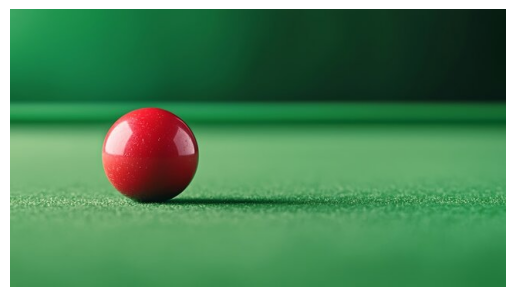

In [10]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = """
/9j/4AAQSkZJRgABAQEBLAEsAAD/4QBWRXhpZgAATU0AKgAAAAgABAEaAAUAAAABAAAAPgEbAAUAAAABAAAARgEoAAMAAAABAAIAAAITAAMAAAABAAEAAAAAAAAAAAEsAAAAAQAAASwAAAAB/+0ALFBob3Rvc2hvcCAzLjAAOEJJTQQEAAAAAAAPHAFaAAMbJUccAQAAAgAEAP/hDW9odHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvADw/eHBhY2tldCBiZWdpbj0n77u/JyBpZD0nVzVNME1wQ2VoaUh6cmVTek5UY3prYzlkJz8+Cjx4OnhtcG1ldGEgeG1sbnM6eD0nYWRvYmU6bnM6bWV0YS8nIHg6eG1wdGs9J0ltYWdlOjpFeGlmVG9vbCAxMS44OCc+CjxyZGY6UkRGIHhtbG5zOnJkZj0naHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyc+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczp0aWZmPSdodHRwOi8vbnMuYWRvYmUuY29tL3RpZmYvMS4wLyc+CiAgPHRpZmY6UmVzb2x1dGlvblVuaXQ+MjwvdGlmZjpSZXNvbHV0aW9uVW5pdD4KICA8dGlmZjpYUmVzb2x1dGlvbj4zMDAvMTwvdGlmZjpYUmVzb2x1dGlvbj4KICA8dGlmZjpZUmVzb2x1dGlvbj4zMDAvMTwvdGlmZjpZUmVzb2x1dGlvbj4KIDwvcmRmOkRlc2NyaXB0aW9uPgoKIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PScnCiAgeG1sbnM6eG1wPSdodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvJz4KICA8eG1wOkNyZWF0b3JUb29sPkFkb2JlIFN0b2NrIFBsYXRmb3JtPC94bXA6Q3JlYXRvclRvb2w+CiA8L3JkZjpEZXNjcmlwdGlvbj4KCiA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0nJwogIHhtbG5zOnhtcE1NPSdodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvbW0vJz4KICA8eG1wTU06RG9jdW1lbnRJRD54bXAuaWlkOmMwNDBjMzFiLTljODItNDM0Yy05ZWM3LWVjYzBhZjdiN2RmMzwveG1wTU06RG9jdW1lbnRJRD4KICA8eG1wTU06SW5zdGFuY2VJRD5hZG9iZTpkb2NpZDpzdG9jazoxMGFlZDBjMC1iNGNlLTQzMGUtYTBmYy04YTAzMzM1ZTZhNmY8L3htcE1NOkluc3RhbmNlSUQ+CiAgPHhtcE1NOk9yaWdpbmFsRG9jdW1lbnRJRD5hZG9iZTpkb2NpZDpzdG9jazoxNTcyMjU1NTMwPC94bXBNTTpPcmlnaW5hbERvY3VtZW50SUQ+CiA8L3JkZjpEZXNjcmlwdGlvbj4KPC9yZGY6UkRGPgo8L3g6eG1wbWV0YT4KICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKPD94cGFja2V0IGVuZD0ndyc/Pv/bAEMABQMEBAQDBQQEBAUFBQYHDAgHBwcHDwsLCQwRDxISEQ8RERMWHBcTFBoVEREYIRgaHR0fHx8TFyIkIh4kHB4fHv/bAEMBBQUFBwYHDggIDh4UERQeHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHv/AABEIAWgCgwMBIgACEQEDEQH/xAAcAAACAwEBAQEAAAAAAAAAAAABAgADBAYFBwj/xAA8EAACAgEDAQcCBAUDBAICAwAAAQIDEQQSITEFExRBUVJhFSIGMmJxByOBkaFCscEk0eHwCBYzcpKi8f/EABwBAQEBAQEBAQEBAAAAAAAAAAABAgMFBAYHCP/EADMRAQACAgEDAgMGBQQDAAAAAAABEQISAwQTIQUxFEFRBiIyUnGRFUJhgcEHofDxJGKx/9oADAMBAAIRAxEAPwCuRVJjSkVtnjP5lZZMrk+BpMqmysSSRXJjSZXJhkkmVtjSEbDMg2IwtisIArCxWzSlZW/MdsrYUsmVyHbK5MsNYlYrCxWV0grEYzFfmWG4VyFbGkI+hpuCgyFihuEIAgapCEIKWkAwsBVKxQsVhYBiSYwkvMNYkbKpeZZIql0LEO0EYkh2Vs06YkkyuTHl5lbNOkFYjGfmIw64lbEyFisrpCZBkAMinSBJFijBRIAmQyIM8EyQEFbFbGYjDZWwZIxTSjkmQECjkmQeZAoisIGFgrYA+QpYbgBQsU1CowMDIAMisIrLDeKZJkAGGoTIrYRWIUsmI2NLqxPI1DUADJGAAMBAEEIDJAP1I2VyYHISUuDyn4C0lIplIMpFUpBi0kytskmVtlpEb6iNhbEbCBkVsjYrKQjYjYWKwoMST8gtiNliFiCsRhbEZWogGxQtilpuIQrYzYjLDcFZWx2VtlhuAbFIDJXSEyQgMkao2QZFyDJVNkGRWyZAjyBkyK2GkZXLoO+hW2IbxgkiuQ0mIzUOkEYjGYjZqHTFXIrY8mVsrrjBX0EYzEbDrBJdBQvoKyukIKwsUNwKCgECwYgEEIhCECQViMdiMNQSQoZCs01CBAQNIEBAD5A8iepAFYjGYr8zUOkFFY3kKyqAoWDyKQDfAoWAOkIBk6IDI1CMVhFZoJIUZisrQYFY3kKwFYGFgIAQhAtP005FcpCOYjkeU/nlmcityFlIrcixCGbK2yNiNlhKFsXIGxXItKORcgbFbLRQtiNkbFYpUYjCxWy0sQVsRjNlbZadMYBgbIKw3CMRhbFbKsFl0K5DSfIj6ldMYBihYrYdITIuQNgyFHJAAyVYgckyDIGw1ECAGRcimohJMRsjYkmGoCTK2xmJJm4hvGCvoVy6DsrkyusK5MRsaT6lcmHXGCtiNhkxGyw6xAZAQAbxgGDAWDJW4RBAgkBXQIpEASAJkoDFYWxJMLBWKF+YCtQgAMGStRBshQqYUQoQEA2IIB+YoRWahuCsUZilUAeRAMrWJSIhA2DAw+YMiFKB9AsWXQpBGBhFK0DFYwrCgxWEBEAgSBp+jHMRzK3MRyPMp/OljkK2VuQrkWiljkK5FbkDJaWjZA2LkGSg5BkDYMlpRyLkgrYWIBsRjNivzK1EFYjGbEbFNwDFbCxGwsIxJMLYjZW4gsmK+gX1FYdIgrFYWBlbgoMkbFzwIWIHIMgyTIbiByDIu4GQ1QtgbBkVsrUI2I2FsRlhYgGxGFsVmm4gGUyZZJ8FMmHSIKyuTHbKpMO2MEkxchbFK64wgCEK3EAQhAqIICCAUyAICkyBsjYjZVFsRsjYrYWIRgIAQ1EAAjYDTZkEVDIgiAwgYhIBisIrLDZWKwsDNQAK+gz6CNhrEA+QEQNgAmQMQqCSYzfBW2ahYAVjPoK+gagGKMABWALAREIQgW333eBzKNxNy9Tz6fz6lu4G4q3A3CiljkTcypyBuKuq3IMle75JkGqzJNxXkmSxC0ZgbFyDJViByK2RyEbCwjYuSZFbDUQDYjCK2KagGxGxhGWm4gGKw5EZW4BithbEbFNxAPoI2FsRsrcQLYMi5JkU1ECTIuQZCmbFyBsGRCxCNitkYjeStwgjC2JJlbgsmVtjSZWw6YwWTKZMebKmyw74wGQEIWnWIQBCFWAJkBApgAJkA5BkGRWwC2K2DIMhYhMgyBsBYhuIHIM8AAVqITJCECogpgRAg5B1IQLCMRhFZVAULAygMRjPzFEN4p5CsIBDSCthEbKsI2KRkK0ArGFYWAYAgADFGYCIBAkC0+27vkm75M+/5JvPhfhNV+/5BuKd4N4WMV+4G4pcybxRS7cFSKVL5DuLSUu3B3FKkTcDVa5C5E3AyKWIO2LlC5F3Foo2RWwNgbFNUjYuQNgbKsQjYjZHIRsrcQjYrYGxWw3EI2I2RsrlIrcQLYjkByEchTpEGyTJXuBu+RTUQfJMleSZC0fIGxNwMlaiDNi5BkVyDUQLZXJkcsiNhvGAbEk+oWyuTDrjBZPqVsZsTJqHbGEB5kYCtiBkyLkKIMgbJkA5A2DIMgHIrZMi5LELECLkmRclpuITIMkIGkRAZJktKIMkyAEGIDJMigQNkbFbECNitkbAFADZBWVqIBshAZDaMBBSiNiBbFyWG4QBCFEyKwgCwUhCEAYBgYIgEIQD66pfJNxQphUz4n43VduJuZVuBuBqu3Mm5lO75JkGq5SwMplCYykE1XqZNxQmFSFM6rtwN3yVbibimq3d8g3FW4m75LS6rNwrl8le4VyKsYrHIVsrcxdwajE7kK5CbhHItNRCxyEchHISUytRiZyK5SFciuUg6Y4mchHIVyEcg7Y4n3E3Fe4G4NRit3EyVbibguq3cByKtwMhYxO5CuQjYHINxiZsRsVyFchTcYjKRW2RsVs1EOmOKNi5A2LkrpEDkGQZBkUpsgyLkGS0GBkXKBuFLRmwZF3Aci01GJsiti5BktNRA5ILkGfkNRBsgyLkGQpskyLkhQyZMiZJkUHTJkXJMigcgyDIMgFi5I2DIWIQVsjYobgWLkmQNlWEbFbI2KyxDUQjIQBaVOgCMDCwjB5EAFQhAZAIAEFJQogCEofUts/aybZ+xnbfRIehPokPQ+DaH4vdxSjZ7WFRn7Wdr9Eh6E+iQ9qG0G7isT9rJtn7Wdr9Eh6In0SHoibQbuL2z9sv7BSn7Wdl9Fh6f4J9Gh7UXaE3cdiftZMT9rOw+jQ9AfRoe1DaDdyGJ+1gxP2s6/6PD2gfZEPQu0JvDkcT9rA1P2s676TD0FfZMPQsZQvcci1P2sXE/azrn2TH0FfZUfRf2LtB3Ici1P2sVqftZ1r7Kj6ID7Lj6IbQvdhyLU/axXGz2s619lx9qEfZkPRF2hY5ock42e1iONntZ1r7Ogv9KEegq9ENmo549qck4We1iOFntf8AY6/6fX7f8EXZtbeFEbw775xFzjNfo4112e1i93Z7Wdt9Jg/9CJ9Ij7EN4SOrxcR3dntYO7s9rO3+kR9iB9Ij7EN4WOsxcTss9jJsn7Wdq+yIexA+kQ9iG0LHWYuK2T9rBtn7Wdp9Ih7ED6RD2obQsdZi4rZP2sVwn6M7Z9jw9iF+kQ9iG8NR1uLiXCz2sXu5+1nbvsiHsQv0iHsRYzhqOuwcQ67Paxe7s9rO4fZEPYgfSIewdyGo6/Bwzrs9rFddntZ3X0mHsB9Jh7P8DuQ18fg4V12e1g7qz2s7r6TD2IX6RD2Ivdajr8HD91Z7WL3VvtZ3P0mHsJ9Ih7EO7Cx1+Dhe6t9rB3VvtZ3X0iHsRPpMPYO7DXx+DhO5t9rB3NvsZ3n0mHsB9Jr9g70Edfg4PuLfYwdxb7Gd79Jr9hPpNfsQ70L/ABDBwPcW+xk7i72s736VX7ED6TX7ETvwv8QwcH4e72MHh7fYzvfpVftQPpVfsQ70L8fg4Pw9vsZO4t9rO7+lV+xA+lV+xDvwfHYOF7i32sHcW+07r6VX7UD6VXj8qHfhfjsHDdxb7Sdxb7Wdw+yq/agPsqv2ovfhY63BxHcW+1g7i32s7b6VX7UT6VX7UO/C/G4OH7i32sHcW+1nb/Sq/agPsmHtQ78LHW4OH7i30YO4t9rO3+kw9qB9Jh7UO/DUdbg4juLfawOiz2s7j6TD2oX6TD2l+IhY67Bw/h7fRg7i3H5TuH2TD2g+kQ9o+Ihr47BxHcW+0HcW+1nb/SIeiA+yIe0vxEHx2DiO4s9oO4s9p2/0mHt/wL9Ih7R8RCx12Die4t9GDuLPaztvpMPRA+kw9qL8RC/G4uK7mz2sXuLPadr9Jj6IH0mHtHxEHxuLi+4s9rJ3Fvodn9Jj7SfSY+g+Ig+NxcZ3FvoQ7NdlR9EQd+F+NwfaldH4Iro+qOY+pr3/AOQ/VI+88x+M2y+jp++iTvYHMLtRe4n1Ne4G+TqO+h8A76Pqcx9UXuJ9TXuRTfJ03fQ9Qd7D1Oa+pr3E+pr3A2ydI7oA76Hqc39TXuB9SXvBtk6N2w9RXbH1Oe+pL3/5B9SXu/yVLy+joHbH4FdsTwPqS93+SfUV7ha3k912x+BXZE8L6gvcgPXr3Fs+89t2xK5XR9TxXrv1GvsTSa7tnVdxo4vEf/yWNfbBfPz8C68y+npek6jq+WOHhxnLKfaIaZXptRjy3wklyzbR2XqrYqd77iD6JrM3/Q6fsj8O0aGnMIOdjXNs1mUv+y/Y0vs2e9Rnc6J7koyk3iPXLbXTnBwy5s5/BD+y/Z7/AEz6bDGOX1TO5/Lj7f3n3n+37uRlpNLU1GEHdLOPvec/06Ga/UbJ7ILZHP8ApSR7XakNTTRXqbI2TjF93BxXEXjhZXnz06nNam6vDteoza3lwcG3/V9D5cpzn8Uv7L6R6F6V0eH/AI3Bjj+kXP8Aeav91GrtlY5tSntXLTeeDy725y2JvPlmWMGnV6mU2t0m4dPtWOPQ8+21KWcuOOU11+Cw9jlx49anGFPjtdpvuq1FiWfyy5X+TVpPxXKuW3XaZOPvq/7M87U3RzKScrJTi97sin9z6tf18+p5tzy3z1Pp48pfgvWvsp6R6jE93hiMvrHif3j/AC+iaDXaLXU97pboWR88dV+68i/Mfg+Yadzp1Eb6NRZp7PKyH/Pqvg6nSdr6iuNUO0Y1wVvFWpreabX6Z/0y+GfTFzD+I/aX7C9T6ZE83TTvxx+8fr9f1j9nTZiD7Pg8rxmOG8A8avcTZ/P/ALz1cR+CfZ8HleOXuB46PuG0n3nqNRFxD4PM8dH3A8dH3DZPvPTxD4FxD4PN8bH3A8bH3DZayeliIuIHn+Nj7geNj7kNpKyehiIuImDxscfmB4yPuGy1k34iDETB4yPuB4yHuGyxGTfiIMR+DD4yHqDxkPVDaViMm7ESYR5/jYepPGw9SbStZN/AODB42PuQPGx9UW5Wsm/EQfaYPGw9yB42HuQuVrJve0H2mDxsPcDxsPcTysRk3NIGEYfGw9wHrYe4vldcm7gHBg8bD3E8ZHH5kPK1LfwDETB4yHuB4yPqTy1ES3NIVpGLxkPUHi4e4vlaltwgYRj8ZH1B4yOOoqWvLZhAwjH4yPqTxcX5ipPLXhEwjH4uPqDxcfUayvlswiYRj8XH3E8XH1QqSLa8IGFgyeKj6g8XD3DWTy14QMIy+Kh7geLj6jWV8teEDCMvio+4Hio+4up5acImEZfFQ9xPFQ9RrK+WnC9AYRm8VD1B4qHuRalblp2r4JtXoZvFQ9wPFQ9RrJctW1ehDL4qPqiCpLl6/wBNu9WT6bd6s7/6Ovb/AIJ9H/T/AIOdunYcB9Ou9WT6dd5tnffSP0/4B9I/R/gWz2HBfTrvWRPp13rI7z6R+n/APpP6RZ2HCfT7vVh+n3erO5+k/pQPpP6RZ2HDfT7vkngLf1Hc/Sv0oH0r9Is7Dh/AW/JPAW+rO3+lfpB9KftFnZcR4C35CtBb8nbfS/0k+lv2/wCC2dlxS7Ptz5jR7Ps88nZvszC/KVS7OlKahCG6cmoxS82xa4dPtNRHl4HYf4e1PavaEdLU3CHDtsx+SP8A3fkj79/D/wDAv/TV0afbp9BHhyxzJ+fP+p+rKP4UfgurVSipr/pqmp32LjvJei/2Xoj7Rtp02mjXXVCmEI4jGK/KvQ1xcfd+9l7fJ/V/Tej4/QOCOPCInnyj70/l/wDWP8/9PG0v4f7H0OndFelhZNxxvnyz5R+MtLfo+0LqZuvuoS37XGX3L4eOvCPsN9s3JuLaXycN/Evspazsyetpjuuqa3LHMo85/sduXCNfHye/6J1WePUR3Mr2+v1fDu3b5zubvrkpZaaraz8L/Bzuv2dxO+mFrhOKjKUqkoqfDaTX9H/xye32u57puy5TjLc+HnGfn+i/Y5nW3ODnXVNqLXKy+eOVjp8nlZR5f1ngmsIpi1uK5KEZNtQTnuwvu6tL18jA5yy9jal5Y+eOf7l+qeFGMoxXOXJL7nkwXWRUfsb5X3Zfnzx+3TqIxceflqKV3ySrcGmpKX+DJJ5yNOx+pSnnGeF5vB9GEPH5uQ8IvGUs+XoaNNqNTonZCOyyqxYuosW6uxekl/z19DPT+ZNcc+fkfTOw/wANaXtL8O1aTWxlG9wVldvnBSz9vz5cP+h9PHjbx+r5scI8+zi9JqK/s7uc/C2SUId48yom+lcn5p/6ZefR8noS0tnyYfxB2Frfw52hKjWUuenujjC/LfX54fqv7p4Pd/CVi11Nmjun3mo06TU31trf5Z/v5P5XyTLGn8c+132d4+DL4zpo+5PvH0n6/pLy3p7vkV6e75Owl2avaI+zV7TETD8L2ocj3F3yDw93ydb9NXtA+zV7RcHacl3F3yTw93ydZ9N+AfTf0luDtuT7i75B4e75Os+m/pJ9NXtFnbhyfh7vkHh7vk6z6b+kH039Is0hyfh7vknhrvk6z6b+kn039LLsukOS8Nd8g8Nd8nW/Tf0k+m/pJsaQ5Hwt3yB6W75Ov+nfpB9N/QNl1ch4W75J4W75Ou+m/pJ9N/SNjWHIeEu+QPSWnX/TV7SfTf0jY1hyHg7vUHg7jsPpv6SfTf0jY1hx/g7geDuOx+m/pB9NXtLtKxjDjvBXE8Hdg7H6d+kn079JNpNYcd4K35B4K35Ox+nL2k+nL2jaSocd4K71ZPBXep2P05e0n05e0bSVDjvBXeoPB3erOy+nL2g+nfpG8lOO8FdjqweCu+Tsvpy9v+CfTl7RvJTjPBXfJPBXfJ2X079JPp36S7ytQ43wV3yDwV3ydl9O/ST6b+kbyU43wV3yTwV3ydj9NXtJ9OXtG8lON8Hb8g8Hd8nZfTl7QPs5e0blOO8Jd8g8Jb8nY/Tl7QfTV6F3Kcd4S35J4W35OwfZq9Bfpq9ButQ5DwtvoweFs+Tr/pq9AfTV7RuU5HwtnyDwtnydc+zV7Rfpq9o3Ihyfhrfkh1n034IN1qH3H6evRE+nR9p7ndondr0Plt6fbeC+zo+0V9nR9p7/AHa9Ad2vQbJ23gfT4+0H09eh73dr0B3SGydt4H06PoD6evQ9/ukDuV8CztvAfZ0cdAfT16HQdyhXSvQtp24c/wDT16AfZ69D3nUs9Ad0vQWduHg/T/hE8AvRHu90vQndIbJo56zQpRfBOx+zJ3a2LrhuslNVVL1k+v8Aj/c9rUVLa+DqP4YdmK78R1Wzgtmjo76WffJ8f7/4LjE5zGP1foPsx0+E9ZPPnFxxROX9/bH/AHfQuwezq+xOxqNBXjfGKdjisZk+obrEs56s06uzls8rVW4UpJeeEep4xiofpcIy5c5zy8zLPqrXhSf9jhf4mdvS7P0T0GnnFX6iK7xtv7Y8+nJ1PaWsho9Lbq7mnCEd0uP7I+EfivXz1XaN2sv1E3bZL7ZR4xjpj19D5ebOofrfQfT45uXfL2j/AOuZ/Edqsh3tM3CuL/l1yTy1lptL0TXOTltbbGM493JvEVlv180e12xlJwhZXZKuLX8uSeyK65f9f6N9Wzxb9Vjse/RtwxbdXem/zfbGccZ+d3T4PgnzL+hxyaYeGC+6MqZKUFnlppvOX5ft5nl3S5Zddb9sl92f34x5mK2Wc8/55N4w+Dm5asbIzjJKcXHdFTWVjMXymvhoqTzl87M9Mg1V8r752yjXFzedtcFGK/aK4S+EJCzbLrx5r1O2MPKz5b93t/hrQeN7ShXNNVx+6b+P/J9U0GpcrIxjw28PC4Pmf4L7Qjp9VPTSx/Oxh/qXl+x3vZ9u2WcrldH0yfXxR4eF1uc5ZeXX6jsnS/iLsazsvXwUlNbqbU/urnjhp+fp+3qfGIeL/Cf4mjHV17Z6OeZpdLKJfmx6rGJL9j7L2NdNaqi6Fv8AL/L3aXm31/8ABz3/AMg+yIW6Hs/8T6eqO2vbpdRtXDi87W//AO0f7G88bh4/LjjzYZcHJ+HKKe6tHXZXGytqUJJSjJdGn0YHoF7UYv4Q636n+BtNCct1uinLSzfm1H8r/wD4tHWPTr0PNm8Zp/I+fpp4eXLjn3iac69AvaD6evadD4degPDr0Js4dtz3gF7QfT17TofDL0J4deg2Ttud+nr0J9PXov7HQ+H+BfDouxo576evRE+nr2o6Dw6B4dDZNHP+AXoD6evQ9/w69AdwNjR4HgF6E8AvQ97uCdx8DZNHg+AXoDwC9p73c/BO5+BsaPB8B8E8B8Hvdz8A7n4LsaPC8AvQHgF6Hu90vQndL0GyaPC8B8A8B8Hu90vQndIbGjwnoF6A8AvQ93ul6A7peg2XR4fgPgngF6Hud0vQHcr0GyaPD8CvQngV7T3O5RO5Q2TR4XgV7SeBXoe53SJ3S9BsaPD8D8A8CvQ93ul6A7pDZdHh+B+AeB+D3O5XoTuUNjR4fgfgngV6Ht90id0vQbGjw/A/APA/B7vdL0B3K9BsaPC8D8Ingfg9zuV6EdKGyavB8F8A8F+k93uUDuV6Fs1eF4L4B4L9J7vcIXuF6CzV4Xgv0gejXtPddK9BXSvQWmrw3o17QPRr2nuOlegvcoWmrw/Br0FejXoe46V6A7legsp4fg16EPa7lehC2tPpu4m4p3E3HB6qzcTcVbgby0lrcg3FO8G8Iu3ImUU7ybwWuygOSKt4HIFnchcibgbgizJMor3A3BAtW9qC/wBTwfQf4Z91v7VsisTdkIZ/Sk8Hz7TNPW0J9O9j/udFRq7Oy9VO7Q2qKbTmpPif7m+LOMM4mX7H7KdN3+Dnxj3nX/MvoOsniLfqzxtbbhNeX+5z1342coqGr0i5fEk+Mnma38baBJ74WPDxuXR/J9mXPhPzfq+n9I6mJ84Mv8Te2PD9nV6SH3Susxj9j432xqFfTZhxg6IuS38b1lLbFf3/ALM6v8b9taTtLtCqcbMVKtxgmsRc3nLl5qKWc45fCXqcD2rdCyKrhfKco947ZvdtxlbWljK4z/U+Lkz2l+89K6eOn4YxmKl42uvUZWxrlKELMJxT4aznHzjj+x5WrsjvahLjjDxtL9ZLO7bnGeE+p5eqmnZLa5OPRbuuDnjD7+Xlj2V6ixSm+Ix8vt6L5MNs0m8PKXR+pbK2UJScXhtNf34Zkskd8YeN1HNSTlhtJp/KJXNrdh9Vh/sUuTIpHbGKeXPNct+mtlXYpRk4zi00fS+xtXG/T03Rf54p/wBfM+VVt+vl5nWfhvtnTaTQwr1DluhJ4ws8ZOvHlUvl6iNsX1X8N2b7VKctyhN7cLG1/wDrOi/Gei+qfw47e0n53XoZXQyuVKDUuP6Jny7QfjTQaeW5K2T46LH+5s7Q/ijbLsfW9m6PQVpaqmdMp2NtpSWHhfsdd8Yj3eTnxZzNxCf/ABw1TnDtvSN/b/JvivnmL/4PrTXJ8i/gHWqO2NfCPR6RZ/pJH1ts83km8n839ciI67kr/ngSYFyDJh5JngHGBWwZAYAuQZCC8CkbFyGUeAEFzwEFgBkGQhuAC5JkA5AK2DIQzwDImSZLAfKBkTIAHygNoXJMgHgHBAAHgnAuSZKgk4AQCcEIBkEJkBCg8AIQIgMkwAA5QAEAgCAYhEYuSMBbZsGAOAMIArwFsUFo8A4wRisqWnBAECW7ncTcVbgbjlT0rW7hXIr3A3FLWbibirJM/IFm4G8ryTPyC1m4G4TJMgPuBuEyDcEWbgZE3E3ANVPZfXP2zi/8nodq3Oq2Sb4l0PLlzkPa9kpuFiaxOMeW+E3xz6cnDmmqfvv9P+SJ5+Xhn5xE/t/2w6/Vbls54X9jwu0dZBwrcFiceZNLHOf/APC/Uzm7r4z3KyEW8OWOV/75fBz+qcpUK6VqqhJNKby+V6peTfmzlGUv7Jw8eGMKu0bpXWNSxnOyaWM5y8cdepzXaVrnZN2L7nLl/PmX6u92Sk5ySk3ltr1fXg8u/UdzdKLcZxjuj54a88eaydMfLfJlOMUxauUrI2SUPtj90tq4jnj+nkjytVNTm3tiuEsJYRp1Fn2NZec888MwatwjbZGuzvIJtRntcdy9cPofThDy+blUXS3cNvC6Iy2Nf2LdRJRslGMlKKfVdGZJy6neIeJ1HMDwGOCrcybvI6U87veWiLRdCx8mNSGjMlO2OdvQrt5L+9j/AKenHVHmQtx5l1VmWZpjlnw+wfwJrctX2jqPJURjn95f+D6g+pw38D9E9P8AhS7WTjh6m7C/aK/7s7hs4Ze7+R+p8kcnV8mUfUABFb4MvgQgmQpgMKTIMoCChbBlBAAyNithlGADkvUGQyJAZIUQGA5FyREwDAcgyUTAME3EyAMADkjYgAgMgAJCEKkIQiCggYIEmAoJEwRBCBjBMBIAMA2jEATaDBYTAFWBWi1oViEVYJgfAMFZI0K0O2KEJgGBmAMkwKy0RpFQmCBwQFusyTIqZGzm9AcgyK2LuBazd8k3FWSJgtbuAmJkKlkFmyHcVthT4BZssAjmkCMk88gPkORcitgWLkXXpWdk2xec18pryT/8/wC4sZYDGxJtS5hJOMl6p9TnyY7Q9j0D1L+G9fx88+3tP6T/AMtxXbcNTVRKd7ctrUfzKW3Hk1nKxk5vX6yUq3Q5tQhmUFjOW+ccevqdR+JdLDTu6uU7nCMf5bcFKLTfrlOPl68nEa62TrS3t7Ivam+nOf8AufLjF+z/AEf03Pjy8UZRNsWqtblhNLOMPODzNZJblGqcrHtTl9uEpeePj5LtVOHdb+8e/KW1x8sdcnnam1uTkscPqlx8ceh9XHi+bqOVnvucopOXCWFx5ZMNs/kt1M8zb3J55fGDFdPl9T6cYeF1PPEFsl1M85BnPyKZSO2MPz/Uc/kzkBSKnIG46U+KObyvUvkKkZt4VMmrvjz00KZv7Gps1etroqi5TnJRil5tnj94z61/AL8Ny1Wtl+INVD/p9K8U5X57PL+3UxnWONvP9U9Rjp+nyyj3+X6vsXYOgj2R2FouzI4/6epRljzl1k/7tmrJXOeW+Rd/HU+R/M5m5uVuV6gb4M7tGhPISzsGSuyeEKp5QS124GSlzDuWAlrGxdxW5iOQS1rkK5FSlkDngM2tImCEsoDlgsKfJMixe4E3tRQzkLkRTTDGcWyMrEJNjOSS4KJz56gk6YyZVW8pj5KQYGQZyiuU8PkC0AneL1JvCHIiRfBMoCBTEkxHNrgJa3JCtTygbxRa4iZXCW5cBziWAWsIDdwVynyC1oMmaVjWeo1cm1nIpLX54ApIrlPgpdopNmptCNpFCsk1lEUpSbRaS16aaFf7lKk45RN7bBZ31FyOsbSuSy+AhWyZEaaYJSwGbWZEyLGxNdRJzx0eSpazJCnvGQqW6yuT5zhBWOeSvbByce9juQ8a69r227pLqkcnpFlJNPAiUvIiUot5i8BVilNVxi8v1CBulEVzfXBba1U8XdfJebKJa6vbKmdEoWfK8gT491kJOQXJReGLCdMaXKOXLzK2pahZr6Y5+ALe9hjqL3jedqyiiGlfd2SVvMfJ+Y+jdkoxioPLeOfMEK7p2Zxhoap2OGUmjddTbTZCN9WHPoVaiEoT2R/N6BdaU12PLyWRnl8FUYyqsav+3PqXRhumo14ba/oEiFcpSzwgJtvDHs/k2LdiX7FN18XalBcebB7Ku2NF47QSpSTsSahl44fVZ/8AcHyrtuC02obhBQX3NRklKK8v/ep9arthZc4RsX9Txvxf+FF2lS9RpZqNyWXCKX3fK+TlOHm4fv8A7Lfayekwjpepn7vyn6f0/R8Y1s47pNJRXonnH/J5Vtjy8PB7HbGjvo1Eq7qp1yTw1OLWMcHhaiTg201w/wB0+f7H0ceL93y+qYZ43jLNbPqZbJ8Me2XV9PUy2ySWD6cMHg9V6hE/MJzKZS6iznjJTOw7Y4PG5eqiVrkI7EUSs6lbsR0jB8/xVNPeA7wzd6j3fwR+Fe2vxh2qtF2RR/LjJd/qZrFVC9ZP1+FyxOMRFyxn18YRcy1fgP8ADmv/ABZ+IKuzNFFqKxK+5r7aoer/AOD9Rdndn6XsPsnT9l6GChRRBRil1b82/lnmfhH8NdnfgzsaHZnZUHZJ4lqdTJffdPzb9F6LyPV1k5qEbHxnyPO5eTefHs/K+oddl1Wdz7R7B3rU8S8y5x+3dngyyUpqEpJqOfzYEsc7JTrrsW2HOTk866WWqWftGrk0V1WYlBWJpNdSyKjZKShJYj5lhIgttyzgisQKlXbL+XJPbwLbFTUoRajjzYDuyCXLK5WNLpw/Mpulpa493K3+YWWLfpoyrmsfLDJoXJ8NoNjaXC4KVS1bFuWF5iaq1Rti3NKtPl5B8vK6E9r+7gucMxz5FFu1x/M35przKtRfZVpVZXmSbxgURNNcXGt8yJqZ1qGU+pllNONCnFxlLqXW6RzmoxeXLpyVfl4NVJqG7yEna558hNR/J/lqWWuvJTKVi2p7UpdBTM+GiMZJPJUozy5rOPQujZCzbXXJZXUz2a2NdstPFxf6kCaNZZNLgonObfPXPQtpvqpthC+abn0RXrbKp6v7ZqCXVFYn2tt08G4cy5Dj7uTHVqN90lC3dGMei9RatRZOqX5sy6MNbQ3Qsip7ZcE1FEpQ7yCyvgxaZzvhJWrCj1kGjtTbTKjTKVzXXCyKWJj5r6K+9TxlYC1tTjL+55+n1GslZmEHFt9GjffKx6eKnU4WTlti10YZiYmBe5RUvID5j1M9l1lGmnDcpW1P7olD7Y08K4pJ+km0Gdoj3anNxltb+Ro2KUsFK1dV2tjsjyo5aaNGpt2umctO2pfa5QBE+EfL2oNai7NknhmaWrphqLK5P+ZBcIrusnKHeOGJZ6oJtDZau4sSzlMjnw2zzO9vlb3invwvyI2T1Ku08ZV0ygotKzKxgJGVrdNqYubT6Auvj3n28/sJre7025RrbystmS6+iuFc6rIynLrHPQE5U9C+Oa8xf3PyKa7LIRacRZQsuhCzT2pzazKLfBW9VOmMlqMKT/K2gky0d7KXDKrYSi8rLTKY9oRurlFKMeOpv02t0kKVOUvuSw8lSJifmohYoQe7hj02twzFZKbqbLLY6lOPcWdGxNRqJ6dJ017lH8wTavdoducqUWpIEcxTbM3jZy0stRKibk+FhcElO+2O3ZhSWcik3X9/CKct3QTxkWvtabK6qp1wnK+Gak+eR76NO/59FcoKS4ivMJcnqu38y4EsthKeE8mOFk51N1wlLD+5LyNEp6R0zdNU+8iuM+bCRlYSi2/sy3noPZCyuH8yOF5My6W6WosrjCSrm35npW0XyhOu6yG6HkUx8xbErfggPsj9rlyiBLl0Wqts7mq36co23S2KEG3LK6vHoboTro0910FQm6uISb3p5XK/uupe512xq0HZd0pwjUoOceJYjyouXtzz0/7mWFz7Ov1c5KnUaiWIQujLDxLrFJ5UVn9+i4OPl62tfNX3muurTVU1OVHfxlLCrUfVevR8fDH7Ru1MI10aVqdKipS1Mo7Iyfx/sPPV3S7EyqfDK2xUyjBua5WJTjnO1/3T54NFPaHZUu2a1HRSxU1GzUPMpKSWFJRfRv1/tgpGMe1vNslZJaa+U532zt7twjDCjLyW7pynk3dpabVQ1FWpu0E22vy9Wop43NLoueG+vkedPU6VWeF0+klq7I25pssnKDg10cufu4zxleeeodbq9Roa66dRKMtRdZCyFMpfy8LKw1zhdPtWFwn5IJFVNvVcYX0apafUUVSoo72NSjuss+7DSXpjl+iMVfdaTRVWz1Depv3SUZR2QSXl8vHJp7Xs7nS3t9oOx9oURtc6nGM6vu++P2JJ544a6dTPoe09E+2dRrtVPvIzgu8g39nomljG7HOEksvAbmItRDS6q7tCHZk04aqce9i+V9uMpY6Yaw8/JdGGpqVctRBYWVHY8uTTxlF2l7TdD7zTO6+Fq/lw8W33TfHVNPbjrHnPwUd73mrohGyENPC7FtlW7vK1lbpOWW3lJPC6MJrjXuGn1Ou1eltlddQ7JT7uuuE91lbz5obS6LW6edt+sc8VpRbn9rjKTxHr6kjbXqIa+WjgoXrULvNQ04znBybSTWI5b5bxn+w1mnrs1ds4a67TaW1QnOyUpWzVijztT5f3Z6vqIWMf7jZPV13XVarRudta+7p9qxnJKVLurbVVY5Vwxcm1Fwb5S5836Fa1846/W6rw/faeFbjGd1LdlrWNqbUlxx/TlFnZna/Ztup0+m1mlohS5Sg651NwhHLacW23nLw884S5ELEYzPuqzPSUSjdpra7ZNLE1lqT6JvyRfRVTdq3DUTjRZPMHGFbahJf6W/Jvko1eo0V86tT2t2TPuXclc6ZPdCEeI7fKOfTlfsHtKWqop1WtphTLdZTZVDvMJespY5lJ4TfX4fUGqT7MdObbtLbTZhyjKeFHCfqi6GnnPw1bsUbrZ4i4JtP4/wAos1Wuuvq11up1OonJwhvdMI91KC89rw1148/t5z5ZKJaOM5T0VEroSom665Sadbw8OMpNrc393PmwumMT4eb27+GNL2p2d2hf2jG7Qzpfdyti28vOMNLqj5D+L/wNrtBS9RpFHV6bftlZXLft4zyuq/yvk++aPV6p6++1K6jQ1QlCKcluuWOFNS4ynnLWM/Bz1kdRGdVOqjGXZrh3NM61962uTbsrjH7svhPpznHHOsJp9PF1nNwRXHl4fmbtCEtPJqzGUsNxecf2PIutiptN/s0z9Fdvfw57H7QdtEnDTyt7uUJ2XuyyL53ycVFbM8cPOMeZyms/ghddfpFX2rB12pwcnu2w2p/GUsYw2uX5YPt4+bCPxPpw9SymPvPi87085fUplbnzPrtf8FIqjT6jU9syrr1FjVW2hycoRly0njyysY8uOpjv/hRVRZqKr79XFeV0Y4hB78JfdjdHC65Tz8de8dRxQZeoYfOXypz+Q1Qstltrg5v4Pqmj/gx2rdDUX9/TChQbq7ya3teqinl/HkVz/hR2xRGbc4urbGVdkJpxsT88+X9n1NfE8X1c8uuxq4l4f4Q/C/4e41v4t7bVdUXxoNG91tn/AO1n5YL9sv8AY+vaP8e/hPs3sqHZ3YOgWj0lcMKuEcKP6s+bfq+Tgbf4V/iPTODlQ1KyKUIbsd4+M7V1wsrL88Mqu/hr2/XXbbRW7qa3sk1ZGUoyS5zFcr9j5uTLDk/Fk+Hm5Z5PfL/Z9Fs/iToXXKqOohD7E+VzJjR/iV2S9LKGoipXxScZKXD+D5rV/D/tadEpuOIxi3ZZLKjGXtX6v39S63+GvbNShG2W2ycN6jtcmsdV9vGeVxycu3xfV88Rj+Z9Cu/ijoLtNGiNbio5UpP0+DFp/wAddmae5tap2wfLSWM+iOH0v8O+3dRqo6PCjqHFyrhnbKzHkk+r/wB+Q6r+HXbWn0teoyp1Ss7pvCi1PPKcW8+o04vqk4Yz5nJ9Cs/iF2ba42R1cKo1RaVbWXOXlz5IyP8AH2jnCzbcq3JZcfRnz/8A+kdordKd8E4xcmlW+evGcYzxx/6wS/BPasZVfmlCzGyzKxJcZx8oRhxfVJxwn+Z9D0n4001MKktVGqqWXOTXKw/L18irUfjjSLbJ2Scmt0ecOSfR4OBj+DtXK22Fd3eOKkkpxa48pcen9v3H1n4H7R0V0e8uU3OClxLpno8r48i6cf1TTCvxPo1f460NkIaiuuh7eJqUuW/2JpvxpoZXKy6KjFPPdpvC+T5p/wDTtZHUSg9StseN6ksZx8/8Er/Czaju1mohJxbT25jx5eo04/qmuH5n1jUfj3sF1/YrLJRuxJxe1OHrz/Uqo/EvYteplVK1Xq+T7tqWVHh4WfVvB8w1P4Q19GHdTqqK+7T9dz6cvyy/Ien8Jal6K65amUJVxWYyfM+eWvjoiaYfUmMZ/mfRtN+Mez6YPF0oQdbk1JbsSXl+xp7P/GGjs7x3Nd3t319PLrn0/wDB8zo/C+pslsjrYSjt3qMnLDfTHQMvwzqYxXe6ideHtctmcvyXBNMPqxERH8z6TqPxXpb5d7Rq6YVuKcY55Xk/2/8AKKrPxVpLHXfLWWQkoNQUFu5+fQ4B/hzV6Gyi2vU7e/Ta2vLis4xjP+/I/wD9e11DdTmt0U22/wD3oNcfqkxH5nfaP8RVT1dNV7ko7sSWfNrK/cMfxHC2U7owr+2xQhGcuhwlXYuq25nfdJS56YjnBZp+wO1lFucHGqKUpKNnM030b8njKJrizX9XbLXafWu3df8ASnTGXeKx57yS8o/4Eo7ao003Rtc9RY1GMZwy4P0z5s5R9i9p1ZcHXKXP2uxP7flea8g6TQdpztmo6yvLjtjBt4TeMv8AfjHyTWEqPq7nS9o6eWhS1eprrud2KJ3wxVx1i5eXGHwY9H2r2dF23auycXuT2QxLcn7cZ9Gc3borqrqlqJ23xqeyahY8zg3+bnKT8ugq0soy08aJ3RsX3WQhLrNdMZ+P+SVCzX1dbLtqnR26qiThWmt1cn1lmOYr1T9V6m6zWdp6SqPjZ6emO+EeXlvck1t93XDx0w8nGW9kzUdO9LqbFKEd03KMUt/Xhrr5LJNRpb/DVx1V2pulKblCUpZjBv8ANnnzf+PkawkTXzdhXr4Waacd26xz2UwhFp2t556GfT/iKzSXd3p6K5Ss2pfdhQ4z93pnl8niaejV26+Hh9bY6tr4U5Ven258lnlYK+6teprsulVK2jE5bo47yectyx1zjp0wWkuvMS9+Ha3aWq7SUN0aKbG9imsRzzyn5rKJPtTV3U1yptnOdO3EUsfmWc8+XDWemUc7B2WxmlNWOU1OyPSOE22orouv/g36PVa6NUqtDpLKYyrnXe024zi22o88Rwm8bcdWZpImJ95e/o9XSrN99dkL7HLdu92E0k3w+Gs88ZXqjDRq5397eqId3Gae2zjnOHjH9P7o8q/SyunRcpVznCCbzXnc10Tfl0xx0XQOqSu1Fk5woqhKTkty3Sc31bxiPP8AYUzlMT7Olv7ejp7bqar6ZRm064QranJ8JxeVwuqXrjoXarX62eqWl0WnUlBwrcZzScJybW15/wBWcrC9DwtHo4xr8RZCq+cXmdm5OUm8Z4x14WH/ALmOOi0lteqlTdOqcZZgnY8pt84XGf6imt/6vXur1K7RjTbUoWWWKMmpqWW8c/CefP8A7iau99xS1qXU3vx3i2VyUcflcsZfwuTz4uD7Q72qV9VaW2KprTlSsPo315fn5Nm3WU9/pqrLI95PY97sbkrLcvEnF8Lh4whTFY1L1tFrqdPp/Fz1Wlc6p7LIQUnhtPEm8Y+MLOWUrtXX6i/UdlLwydlkXJxkpSaccrbjq/PGMnldm16/XzlTC+UfC03KyOWlOM22157v6+iKtN2cqdJqb4b67K+77qS4shzmTWP6EpdvEU9d6/VRrjW9bRbLDhVFNfzOcPOeY/Gef2L9Q+y413KcaKdU2klVmcalJvDbWVJYT6Pk8t/T6pRs0Vj0+oqUpqzu1YpzklnLkspZXHkn0wHsjfCyGpjqIx1Oe8cpSe7cm22mumcvgURlifvrdH2cpaiXc3T3Qdc1iax+nqly+X6M2aeKdGn0OpjZZqHe91bfOeiWemPPr5syuNENFXVfRKUq5uzTT3tQrTbcsx/1S3c5bbGtlf2horXdq4eHhY2obtrk354xh88+oiGbxj2enol2XDSXRVsaKVY6lfY1OLmuVnHKT45xzkwajT6d9nVTplfdcl/MVabjGSzldOnz/bPJ5t3cXw7nv7ozhXh4m1HOU0/Xqlwa9LqaVqoTu0Glsrsi43Lw+XPjh5bz154axlstEZ4T4ld2nqtUtNdprkq5aWiMrK/yyhl84j1fC6+Wc9A6+On0c/B1PtDU32VxsqjCUJRlFxy19rbysPj4z5gjrq9Rr5a19l6buYS3WLu3FS8nlRazn0+EVz7S0U4XRq00K9NfFKahTGDTi2000srPGcYzjnJKSZw8+Xo6XUbdHpJTbpVkoqNlklJOOUnnbnastLPqZ6FbHtG+u7T3QrxiDshOK5b2ybxjGU8dM+WSpa3TvQ06bSPT6JxrcF3UZRVuZbvuinh/uU6HtCfeXae/T0X6SxJPSXRbqWMvcs8ppvKS48hFreHi5elGF6ld2fW7O8nlutYk20s448/LHrwV0+Lr1Vdbu09mlppja7d/EIyTag11cuMYWcHnX4uhSp2d3rKqlGp19JNJ9ZLDzzhN54wvIrldctLpKp6iyy3T7mlVJxUc84z5/Oev7cFpnbGGrS9oPs/XXVwq22zr3uuyf+l85H0mtou1kadXqO70s4N99V933cpYz8h0M1fG1aWUKbLIKUndSpzjJdVF+1rhpJcGTTVz0V+ntp0cFKLaxvc1BN8qKl0bfL58yeUuI+bdpVdodRC2WndmY4rjLC75qSjJdcxabxl+fBNDKT1Wq0usjPN0HCEk+Kp5eIt+vH9hbNdqtHbbcq9NVe7dy7uOYKDeWorpy/VN46M86axrt9EKXR9trhtUU5xeUnnrz59RS7YYx4e/VXitJ6uNLXDrnXlxfpldSHl00dnX1q67bRZPmVdUYRhH4S8kQnk2xdppoW1WWwlqIxh+nhoz106aW+mxycX1mNLTZk5uf7/JXv7uWH0Zh6czTTXCjY6abrJwWH90ujJqp1+JjZXtrm2tzXmzPXJ17n6g8NG/78tPy5KsSv7RjGqTv/O3h4XmJp5abVXKdtEXDHKa5AoNNQnysh1UVXDdXHkQq+251wnDTxTjJYw49BXCCdUlTBShzJ4TUjLC2ydfHDGrdzWJttA2tKKqNPqp2U7IKfVJcIvrnFanv925KOIxijHdXJdOvmXaT+VuTfXowYz5Hx+os1Eo7UoY6Y8/UNl9sdkliU/Lngob/nNpvBZtbxL0YXaSX166W53TzVJ52Jg1UGtLCmD2bnzjqHVaubmoJ49X6lq/mQU31QFPeaiOlsojBzrklzJ5yzL3LreYRcZ7k3h8NemDbqLpRwkPlKvOOQe7JbqralY51/ZN/lfRGrVRs1HZFctLBLEU5ZfmV2OOoi01jyLqb3TpnSlxgqworSp09TU8TS+7Ms5Zs017clsxGMk1JZ4Z5MqZTcm5PH7j6eFkLE90mshIypssousc4uMbLZP8+eiEuqrjp4R1Fs1fCf2uLxx6FzlKMt8Zc4MUoTtvc7G28hZpq18JK6u/RuFT6bZPKX7LyyLtp2ui2iiasSU8xyuueCx11zitzSRjvk1Zti8Y8xCT48vR1dNc6lm+NaUVFLGcJdF8GaVN+qru0z1MXTt21Rz0KLap21KUm3FCJWQjivhAsdFXqdBa4anU1ampV7IKUdzhF+Sz0JGUNNTfp6FBwtmpyk45b+Bu8jBJcuXmWVRos5sjz1KkPJ1cH3SpjpKbqt26MbFwmb076tH3cW+8nLc9jxh4wab1FwahFL+hVRPGHJPK4FpGNPP1Wm1l+2epocXFKKkpcvD656lWh006O1HZKXe1yeVGyW7DfU9vUd9al3jSinwZLEqbN0VnHPQWk4+Vc9NS9U+7q8O7H96j0l/Qz6rS9xrKpQ0lUnBYjLaenKXexVm1Jj726uYfcha6xLwNT2XN12bZxjbNtycYpdfJmB9mvTJOvNjz0lHzOhqrulZOT4JKDUXLlltznCGKrsqrU6SU7dNCU2uZdOTDquzNNBV3rSKcaltccv7j3K5ah1tpYigO7ja4JoWThDxOztPGSuuxODnJpwb4aMN/ZyVu3URk4Z+2KWDrFVGKUlFceg8aKrpbprn1Fp27cz2V2XTfObdDUor7c+ZRHsyu7VOq1qlQ6JPOTrJUwqy61jHkjNCiErnOS5ZbTtxHh41+i0mhrgqqI3W+UpLODNo9LjT3xnTlyfH29Tq7dFp5x3JJNGeNKhNPqsi0njc+9BqNTGutU7IRS34XBR3MtNqVVKt7IvOeuTsJXKFTrjFY/YqlVTbW3KKTFpPFDmNJoNPrtdOd0JRrXEUmXrs2VFdq0sUo543dUezp6q60+EOpVxbivPqIlIwinNabRVLTyn3cpXyeORXpqKaY93Q+9i+Gl19cnRyhXGEpKKyzLXtjNtx4+C2zODx6aYQri5qak+iwWOFfewqUHs28pvzPe08qX+eC+GV2aOiyxTSimS07bw1opvWQqnGUKc9V/ua56XT6DVSxB312L/Uj29VGHh1GEVn1MlmnlY4uS6Be3TzJ6Ts6vF1UFCeOIvoLVpbLrNsrn3Oc4Swj0r9NW21hZRroUI6ZLEVhFtNPLxrqKITlGtyhDHp5mi7SaXUdjwp2vdGWc4LXXGdze0vsUYU5S4+RaRh7vP7K7Pblt393THqvUtt0+mquyoRlJP7eDRGxRhxwVXSW5ShjcEqIhR2lbfXpZQ2RgrH1ivIqstndoVXVBykvM02Xd63CxcMFWKuINYYc5i2Siq7T0uOPvs46FVOj1dVU5OWFJ4f7G3VWTk8xl0Nuh1SlQ4WRT9XgJGNvJscX9kUlFYzhdRNPprPE2Sr3ZksJ+ht1zrTxHbn4RZpre7glHG5LrgrOqvU1qOnjp74NqLzuDdRTGncpxjF/lJK2y9yUmG7SylTjJBm0d6hNwsrhYmvzbeR742xi5KcY4WIY9C2mquCw1yiyca5R5iIZph0i1tUlOLTjL82ejLsVafN1sIyUukV0Nk7aYUbFFcIxTsrvjtkuFwglUsjqtPKEnCiuClw3jlFOonptUtq+1xXDRoVOnjDbFLDQktPXBfy1z5AmJpX2Slp7HZc1OC9fIfVT08p2XVRUk+cItpoU65Rl0Gcaqa+7i0s9QazTxZX26rVLbilR4TRttVircFqsxXV+pfTp9PiT4fOVgzaipKLUY4z6EhiYlllbCtbfzcl6ojODsSWevUmm0SfMzRVS4S2xeRBq8uUtXGTSohhEPbWUsYRBS6ughZP1yhZKUpZBVLCYXYkcnq2tUvtwwxm4LgzSs6kjPgLEtDscpZG3uSw+EUQfI+5epWokYNRk8Isjc1wZ21yxVIETTXbPdH0K08LHVFSlxyRSZDZqqjF88DtLGOMGWFjQe8DUSqurzPJfVNqvAjfHXkEH5MJErJQU1yPsxDqV7sAdvyGroUsPoN0znoVu4rlN+oTaDtLlLgaMlGPOGZ3MWU2ys7NffOfHArnGP7mVSfqCTbBuvncn1fQzylmWcAcfMEYsrMzMtdN/2bGsoPfLo0kjKk0LJMLvK6bjvzFrAI2fe+MFOAp8BNmyrUcNMfvK+jRhglkeWcZQajNsnbFJrOclLw15GXLfVsdSaQN18ZxikscIaV0cGTexWwm7RK3ngkZ7upnyGLwE2lsVkY1tIpxl5KlnJYn9oXaxlPHCIpPHUTAM4CWtUmuBZSx0Qu5iyy2WCyzseeHgkJNeeSbUFRSCWdzjseVkyueG0uhbPphFG3kqTKyD4bwJCObcsZcLBE8BBlFY6lbgn0Q7JFoIrlHHkRPlfBa8NCpIAxm8cvJbC2Mq8eZmk8cErk8lLWWJyefMkE9vIf2CgK3xngosUpLG5tGi3Elgr2pRwGJZ5tvOBa65Lls0xik+QtIOdM9iSeXySuMW8tcFjiRLj5CUbZDH5UDbGKaiMunIsseZYGWyve22uB3iNfC/qWp9UkJZJflDFJpoqP3Yzk1ysWzK8jHW1FDzf2vkETSmUm5ZbHlPMBYpMWSwGVVybXUSuqW3MC9RyuSytYTxgJSuquWDVhQipNiLG0HVNN5ELEH7xJSkuMmeUdzzyNLOMDQeEAdNGOGibYpvJN2HwK5eYRa5JRS4K7Es5iwKazyByWQo4b8iB3ogSnsqWANgAc33iuQxeBSJgWbgp5K85CmFhY3wJ5gyTIU6kNF8YZUmFSIRKxsXPyJuBkpa3cFPBTkKkQta5cFbfIu4VyBazcK5cCZA2Es+UQrzkZFLNngCYGTILPkiYmSZBazPArF3AcgWbABdwHIFrEHdwU7gqQLWcEyImFAtCEyDIRAoTOWRMotTGTKcjRkKFmQNi5BkUtmyTIoGwh8oDYm5CuQBmyvKQJSK8lZmVjmhVMqckJuFM2078gyZ1JjqfAotapB3cFG4ikypa1hTK1IKYW10ZLAdxVkDlwCzuQknyLkDkGZkdxN5XkmQys3cATE3CuWHwxCWuckkI5FTmDJWVmWivltgbBuCC3gG94wK5IGSIsjLCA5FeQOQhFsJcseM10M0ZdRlIo0ZIpFO4KmA7fJM48ytyFc+AL9y8xJSKN4sp/IRY5g7z5KdwrkBo7z5IUbiBHTbibincRSOb7rXZJlFe4G4UWuUg7uCncTcFtduRNxTuBuBa1yF3FbkBSTBa5SJuK8kyFtapE3FOSKXyEtZuBuK3IXcC124GSncRS+QlrkwqRSpDKQW1jZExFImUKLWZJuK8g3Ci1m4VyE3C7glrc/JCtSDuLBZyJibibgLUyJle4MWSltZkGRM/JMlLODIu4G75BZ8kzgTcHIgs24ikLkGQWs3Cti7hXIFmyI5CuRW5hnY24WUuCtyFcis2ZsVsXcDIZs+4m4ryDItFu4ikVZImWBepDqaMykFTBbRuBvKd69RXNAtocxdxR3i9Qd58gtfkDmUbxXMMrXPryDcUb+BXMqL95N5mdgFMI0uYN5ncwKYS16lyFMoUvkbcSkWtisTcTcWAyYcle4m4CxyDGZQ5A346AXSmI5lLsK3MC9z+RHZwUuZXKbCNLsF7z5M+/5ApApp3/JDPvIEp1KmMpmdSCpHN9dtKmHcZ1IKkVbX5JkpUg7wWtyLkTcTcCz5JkrcibgWs3E3cFW8jkC1u4GSncDcC1zkK5lTkK5BLXbyKZRuBuCW0qY6kjKpjRmFtoUshyURn8h3hbXZJkp3g3fILWuSBuKtxMhFykRSRVkm4FrtwMlO4m4Fr9xFIo3E3/IW2hSJu+TPv+Sb/kJa/d8k3FG8G8FtGQqRnUwqYLX7gbvkq3iuYW1zl8iOZU5CuZUtZKXyVuQjkLkjNn3C5FyDJUHJMiZJkBsg3CZA2IQ+4m4ryByKLN5N/wAlO4G7gItcwd4UuQu4ULt5N5RuBuA0OYu8p3C7glrnMVz+SpyF3CBY5A3Fe4GSou3gUirJNwSl6kMpFEZDbgi7dwTeU7gOQFzmBzKdwHIC3eK5/JS5CuQFrmI5lbkK5AO5CuQjYuQLNxFIqyFMC3JCvJAOn3E3FeSZMO9rlIO8pyTcC1ymHeUKRNwLX7w70UbibgWu3E3FO4m4pa7cLuEyDILPuA5C5BkhZmxci7gbgWfJNxXu+RXIIu3L1CpGfcTf8lS2lSDufqZlMZTItr9zDuZQpjbira3cRSKlIm4ha7cTcU7ibgWtcgbivcByBazcDf8AJU5C7glrt3yTcUOfyDf8gaNwd5l3hUwW0qfyHcZlMZT+QWv3kcs+ZQph3BbWZBkTcDcEs7YMiOQrkWg+4G4r3ETCWsyDcV7gOQLM5AyJkm4qG3CtgyK2AcgyDIGwWjYuSZAVEyDJAAHIMgyDIoHIGyZAEQmQZAA2QJgyTIQyY2SsOQHyLkXJMgHIGxcgyAWxWwNitgFsRsDYMhByDIuQZAbIUxMkyBZkgmSAdNkG4hDnDsmSbiEKJuBuIQCbiKRCBBUgqRCAgVImSECpkDkQgSy7hckIAu4DkQhQMg3EIEFMKkyEBBlIKkQhAdwdxCAtFIm4hAsBuA5EICy7uou4hAFcgZIQqBkKbIQoKYVIhCBtwVJkIUTLJuZCEgDIM8EIAuSZIQpAZA2QgAbBkhAgZIQgAAQgAAyEBBckyQgAyAhAIBkILQAEIVBwTBCAAhCAQBCAKwMhAFYrIQBGBkIAvJCECIRIhACQhAP/2Q==

"""

img_data = base64.b64decode(base64_image)
ball2 = np.array(Image.open(io.BytesIO(img_data)))

plt.imshow(ball2)
plt.axis("off")

## SECTION 2 : Questions

### Part A - Corner Detection

Pick images of your choice which you feel should give a good output. Use above ones if you cannot find any else.
Create or pick 3 images : one flat, one edge, one corner image. Examples shown above, you are free to you them too.
Use the sobel kernels to find Ix and Iy ( or Gx and Gy whatever you call it ) and plot them. Then, create a scatter plot for Iy vs Ix. If you threshold, mention clearly that you have along with the threshold value too. Ideally make a function that takes the image and prints the graphs, also make the function return the Iy and Ix values for further questions.
Hint: use grayscale only.

In [11]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque


# helper functions to implement sobel and canny edge detection
def rgb2gray(rgb):

    if rgb.dtype != np.float32 and rgb.dtype != np.float64:
        rgb = rgb.astype(np.float64)
    return (0.2989*rgb[...,0] + 0.5870*rgb[...,1] + 0.1140*rgb[...,2]).astype(np.float64)

def convolve(image, kernel):
    img = image.astype(np.float64)
    k = kernel.shape[0]
    pad = k // 2
    img_p = np.pad(img, ((pad, pad), (pad, pad)), mode='reflect')
    H, W = img.shape
    out = np.zeros((H, W), dtype=np.float64)
    for i in range(H):
        for j in range(W):
            region = img_p[i:i + k, j:j + k]
            out[i, j] = np.sum(region * kernel)
    return out

def gaussian_kernel_generator(kernel_size, sigma):
    assert kernel_size % 2 == 1
    ax = np.arange(-(kernel_size//2), kernel_size//2 + 1, dtype=np.float64)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2.0 * sigma**2))
    kernel /= (2*np.pi*sigma**2)
    kernel /= kernel.sum()
    return kernel

def gaussian_blur_gray(image, kernel_size, sigma):
    kernel = gaussian_kernel_generator(kernel_size, sigma)
    return convolve(image, kernel)

def gx_kernel():
    return np.array([[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]], dtype=np.float64)

def gy_kernel():
    return np.array([[1, 2, 1],
                     [0, 0, 0],
                     [-1, -2, -1]], dtype=np.float64)

def plotting_image(image, cmap_type='gray'):
    plt.figure(figsize=(6,6))
    plt.imshow(image, cmap=cmap_type)
    plt.axis('off')
    plt.show()

def plotting_histogram(data, lowThresh, highThresh):
    plt.figure(figsize=(8,4))
    plt.hist(data.ravel(), bins=256, range=(0, data.max()), color='gray', alpha=0.7)
    plt.axvline(x=lowThresh, color='red', linestyle='--', label=f'Low = {lowThresh:.1f}')
    plt.axvline(x=highThresh, color='blue', linestyle='--', label=f'High = {highThresh:.1f}')
    plt.title('Histogram of (NMS) Gradient Magnitude')
    plt.xlabel('Gradient Magnitude')
    plt.ylabel('Pixel Count')
    plt.legend()
    plt.show()

def non_max_suppression(magnitude, angle):
    M, N = magnitude.shape
    Z = np.zeros((M, N), dtype=np.float64)
    ang = angle * 180.0 / np.pi
    ang[ang < 0] += 180

    for i in range(1, M-1):
        for j in range(1, N-1):
            a = ang[i,j]
            q = 0.0
            r = 0.0
            # 0 degrees (left-right)
            if (0 <= a < 22.5) or (157.5 <= a <= 180):
                q = magnitude[i, j+1]
                r = magnitude[i, j-1]
            # 45 degrees
            elif (22.5 <= a < 67.5):
                q = magnitude[i-1, j+1]
                r = magnitude[i+1, j-1]
            # 90 degrees (up-down)
            elif (67.5 <= a < 112.5):
                q = magnitude[i-1, j]
                r = magnitude[i+1, j]
            # 135 degrees
            elif (112.5 <= a < 157.5):
                q = magnitude[i-1, j-1]
                r = magnitude[i+1, j+1]

            if (magnitude[i,j] >= q) and (magnitude[i,j] >= r):
                Z[i,j] = magnitude[i,j]
            else:
                Z[i,j] = 0.0
    return Z

def thresholding(image, lowThreshold, highThreshold):
    M, N = image.shape
    res = np.zeros((M,N), dtype=np.int32)
    STRONG = 255
    WEAK = 75

    strong_i, strong_j = np.where(image >= highThreshold)
    weak_i, weak_j = np.where((image < highThreshold) & (image >= lowThreshold))

    res[strong_i, strong_j] = STRONG
    res[weak_i, weak_j] = WEAK
    return res, WEAK, STRONG

def hysteresis(img, weak=75, strong=255):
    H, W = img.shape
    out = img.copy()
    # find all strong pixel coordinates and push them
    q = deque()
    strong_coords = np.argwhere(out == strong)
    for (r,c) in strong_coords:
        q.append((r,c))
    # flood-fill: any weak neighbor becomes strong and is queued
    while q:
        i, j = q.popleft()
        for di in (-1,0,1):
            for dj in (-1,0,1):
                ni, nj = i + di, j + dj
                if ni < 0 or ni >= H or nj < 0 or nj >= W:
                    continue
                if out[ni, nj] == weak:
                    out[ni, nj] = strong
                    q.append((ni, nj))
    # remaining weak pixels -> 0
    out[out != strong] = 0
    return out





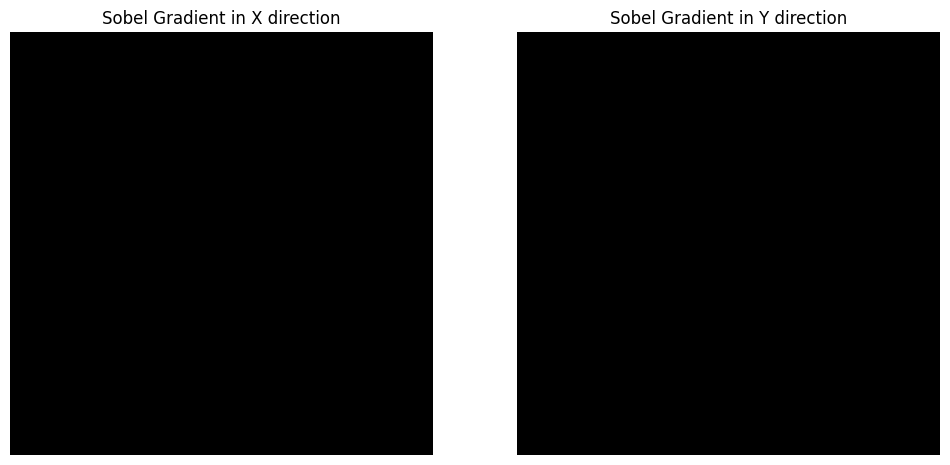

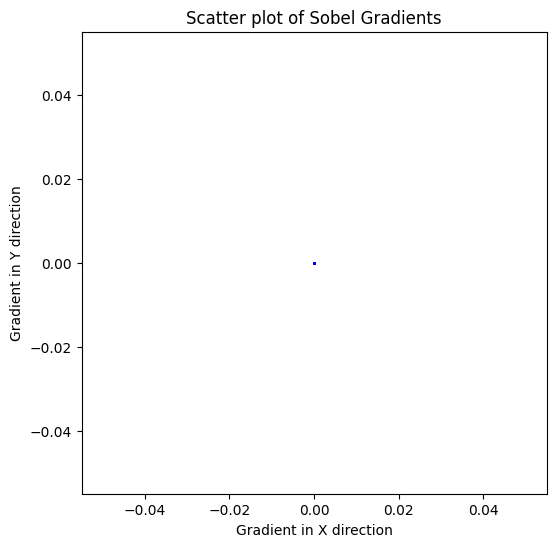

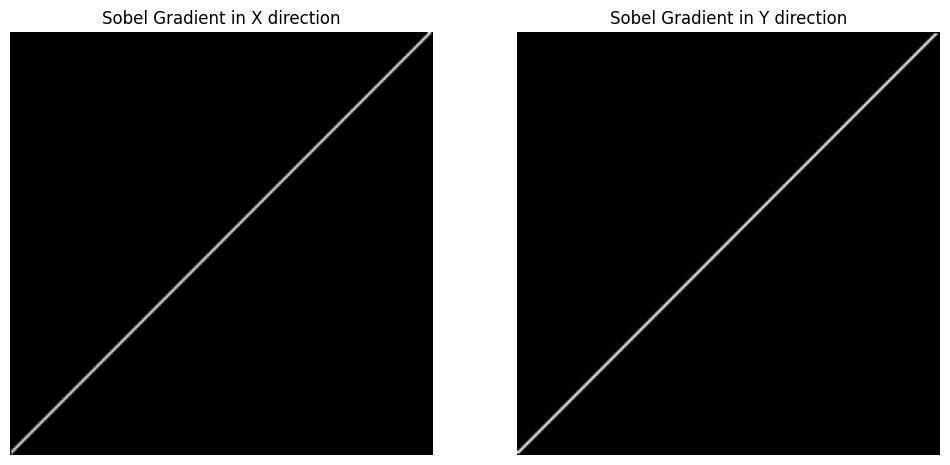

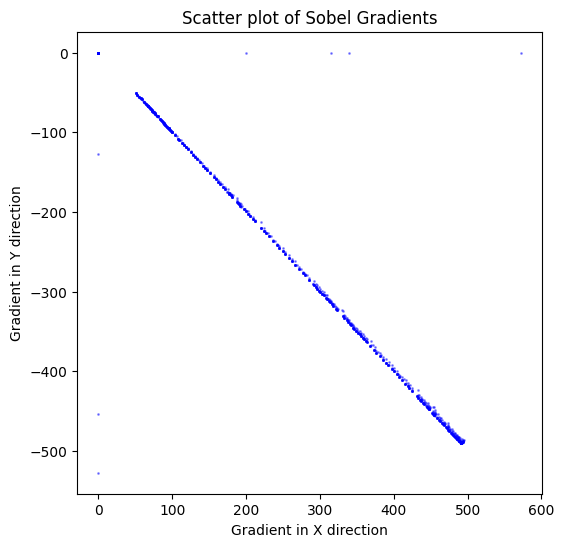

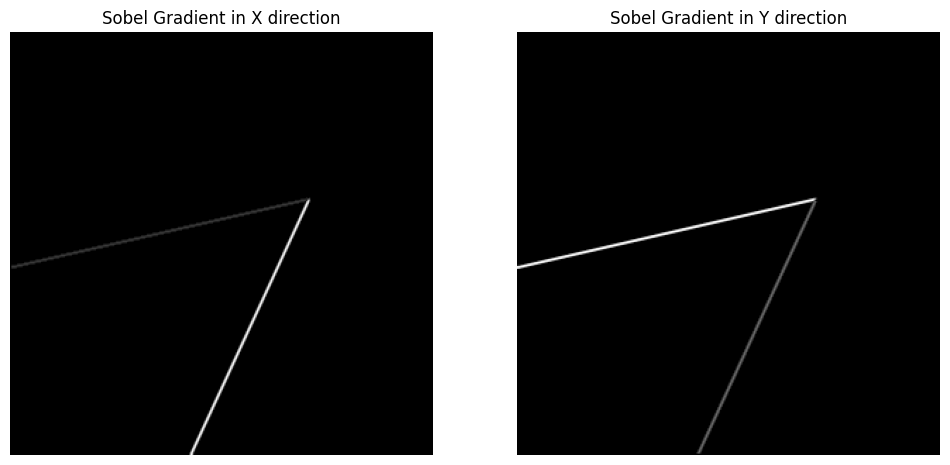

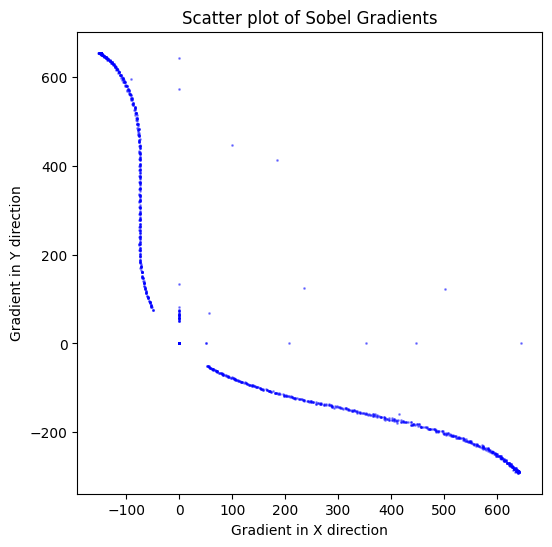

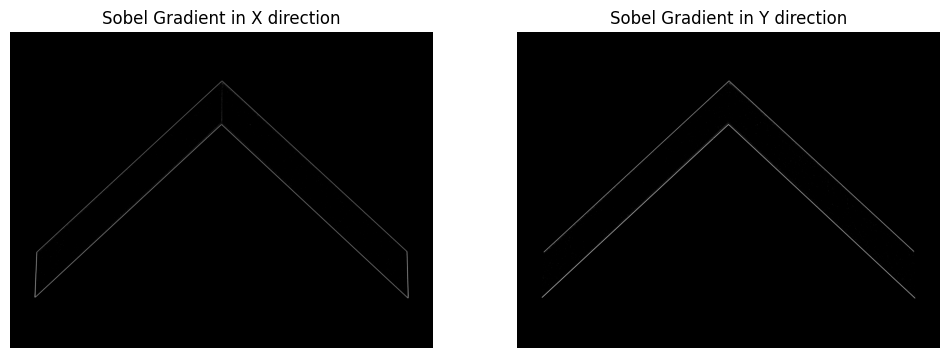

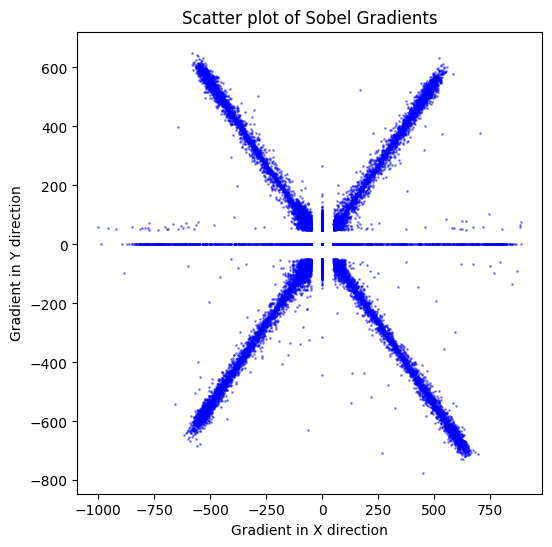

In [ ]:
# Analyze Sobel gradients for different images
def sobel_analysis(image_rgb,threshold):
    gray = rgb2gray(image_rgb)
    
    Ix = convolve(gray, gx_kernel())
    Iy = convolve(gray, gy_kernel())

    Ix = np.where(np.abs(Ix) > threshold, Ix, 0)
    Iy = np.where(np.abs(Iy) > threshold, Iy, 0)

    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.title('Sobel Gradient in X direction')
    plt.imshow(np.abs(Ix), cmap='gray')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.title('Sobel Gradient in Y direction')
    plt.imshow(np.abs(Iy), cmap='gray')
    plt.axis('off')
    plt.show()

    plt.figure(figsize=(6,6))
    plt.scatter(Ix.ravel(), Iy.ravel(), s=1,alpha=0.4, color='blue')
    plt.xlabel('Gradient in X direction')
    plt.ylabel('Gradient in Y direction')
    plt.title('Scatter plot of Sobel Gradients')
    plt.show()

sobel_analysis(flat, threshold=50)
sobel_analysis(edge, threshold=50)
sobel_analysis(corner, threshold=50)
sobel_analysis(corner2, threshold=50)


### Part B - Ellipse Fitting and R Maps for Corner Detection

Now, use the above functions ( basically Ix and Iy ) and the formulas in the pre-session videos to find values of a,b and c ( the second moments ) and calculate the eigenvalues lambda1 and lambda2. Then use those to create an R map for the entire image. Display the R map. Do it for the 3 images of part A. So, you might want to create a function that takes the image, loops over the pixels with a window, fits the ellipse over the window, calculates the lambdas, and value of R, essentially finding R values for all the pixels and returning an R-map ( a 2d image with only one channel where the value of a pixel is the r-value of that pixel in the original grayscale image ). Now, display these R maps. Notice how the corners are clearly visible in white.

In [14]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

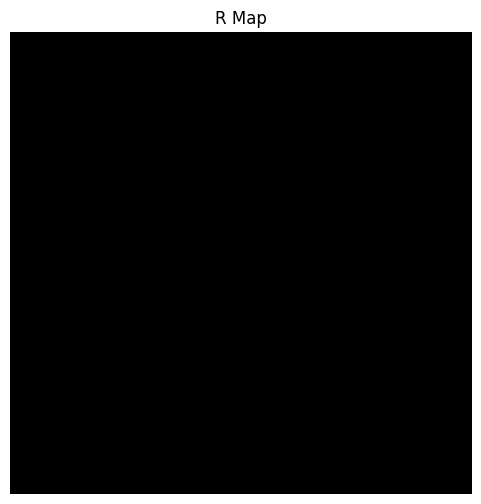

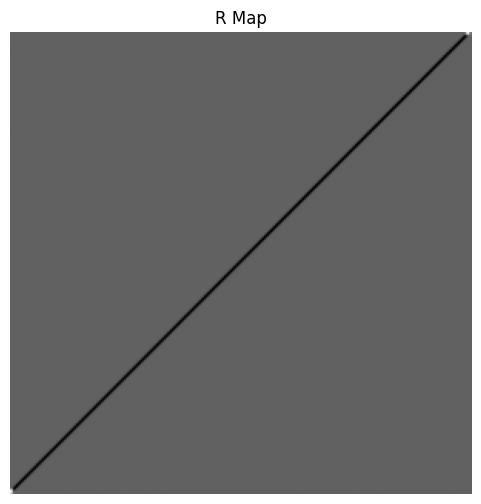

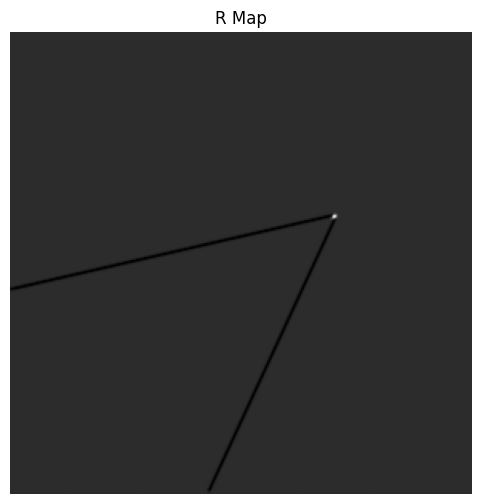

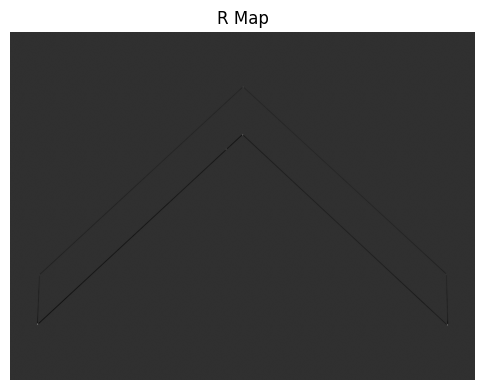

In [15]:
def r_map(image_rgb, k=0.04):
    gray = rgb2gray(image_rgb)
    Ix = convolve(gray, gx_kernel())
    Iy = convolve(gray, gy_kernel())

    Ixx = Ix * Ix
    Iyy = Iy * Iy
    Ixy = Ix * Iy

    # Gaussian filter for summing over neighborhood
    gauss = gaussian_kernel_generator(5, 1)
    Sxx = convolve(Ixx, gauss)
    Syy = convolve(Iyy, gauss)
    Sxy = convolve(Ixy, gauss)

    R = np.zeros(gray.shape, dtype=np.float64)
    H, W = gray.shape
    for i in range(H):
        for j in range(W):
            M = np.array([[Sxx[i,j], Sxy[i,j]],
                          [Sxy[i,j], Syy[i,j]]])
            detM = np.linalg.det(M)
            traceM = np.trace(M)
            R[i,j] = detM - k * (traceM ** 2)

    return R

def plot_r_map(image_rgb, k=0.04):
    R = r_map(image_rgb, k)
    plt.figure(figsize=(6,6))
    plt.imshow(R, cmap='gray')
    plt.title('R Map')
    plt.axis('off')
    plt.show()

plot_r_map(flat)
plot_r_map(edge)
plot_r_map(corner)
plot_r_map(corner2)


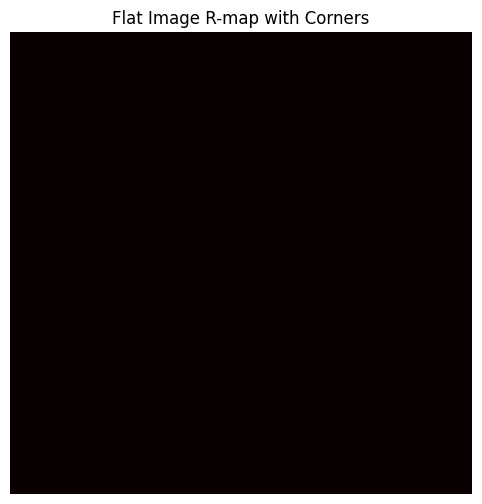

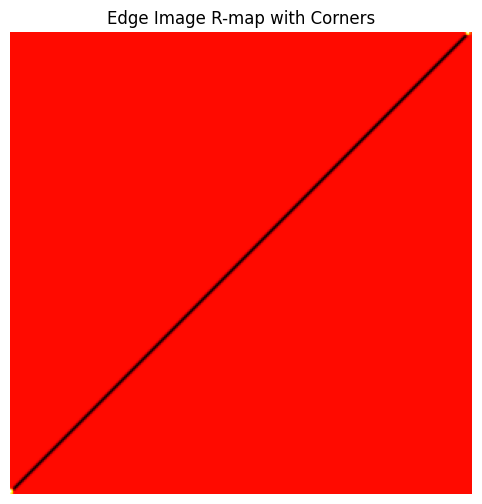

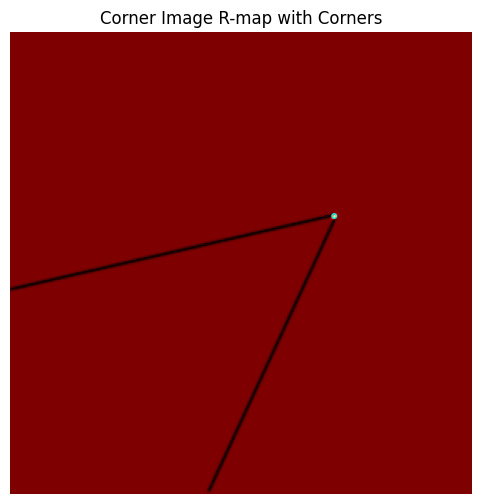

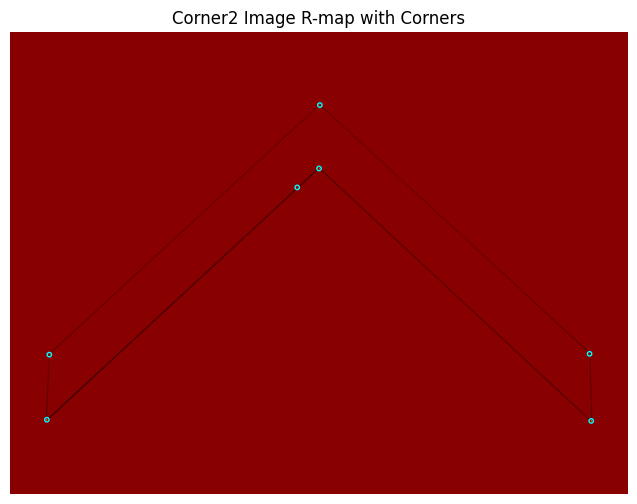

In [ ]:
def harris_corners(image_rgb, k=0.04, threshold=0.01):

    R = r_map(image_rgb, k)
    H, W = R.shape
    R_max = np.max(R)

    threshold_value = threshold * R_max

    corners = np.zeros((H, W), dtype=np.int32)
    for i in range(1, H-1):
        for j in range(1, W-1):
            if R[i,j] > threshold_value:
                local_region = R[i-1:i+2, j-1:j+2]
                if R[i,j] == np.max(local_region):
                    corners[i,j] = 1
    
    return corners

def show_rmap_and_corners(R_display, corner_map, title="R-map"):
    plt.figure(figsize=(8,6))
    plt.imshow(R_display, cmap='hot')
    plt.title(title)
    plt.axis('off')
    ys, xs = np.nonzero(corner_map)
    plt.scatter(xs, ys, s=10, facecolors='none', edgecolors='cyan', linewidths=1)
    plt.show()

show_rmap_and_corners(r_map(flat), harris_corners(flat), title="Flat Image R-map with Corners")
show_rmap_and_corners(r_map(edge), harris_corners(edge), title="Edge Image R-map with Corners")
show_rmap_and_corners(r_map(corner), harris_corners(corner), title="Corner Image R-map with Corners")
show_rmap_and_corners(r_map(corner2), harris_corners(corner2), title="Corner2 Image R-map with Corners")

### Part C - Hough Transforms

Again, import an image, create a function that takes the image, finds the canny edge map, then loops through it to find the equivalent line of each pixel, checks whether the slope and intercept are within acceptable limits of the accumulator size ( if not, discard ), does the voting procedure and creates the accumulator. Now, choose an accurate threshold for the accumulator to get the slope and intercept for a good number of lines in the image. One thing you can do is normalise the accumulator and use a 90 percent threshold ( just an example, im not telling if 90p is a good one or not ), then, mark the lines in the image using cv2 and display the final output. For the slope and intercept, choose the limit as per your image to get a good output. Please dont make it super large so it take hours to run and give the output.

Now, you can do the same but with rho theta method. Do this in a separate code cell from slope-intercept method and notice how fast this is

In [17]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

/9j/4AAQSkZJRgABAQEBLAEsAAD/2wBDAAYEBQYFBAYGBQYHBwYIChAKCgkJChQODwwQFxQYGBcUFhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0oMCUoKSj/2wBDAQcHBwoIChMKChMoGhYaKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/wgARCAHpAt8DASIAAhEBAxEB/8QAHAAAAQUBAQEAAAAAAAAAAAAABQABAwQGAgcI/8QAFwEBAQEBAAAAAAAAAAAAAAAAAAECA//aAAwDAQACEAMQAAAB3/NeWWGzJNZFj9rQlpUCdM6s9RlRqmiBvGk6qpb4jSauN6ls9DZEvWBZ2ukkJ0hk/JHTlrwpJmM9xpaoK7u2AXxeqiiKQlV7tgExnowccrCw3X834l9LhwU9a6mHvR0T4I0ql5yh3eQMrmnsF9EugZNecq9z8xG7QrOqFWDPWZqmv5xMBu48Cxua+RnD9enbK9c5ZMrHt5qwkm7cw82wcy9oxMDJpuLBsN25KOKQijR8DJCzj5/Kca9JreZk7PQzgE3vM0vEUvdmzasGzE3BdmzAT9Do4Koc4SUMtKLuKKs8QiXQ9+fCj1MJgeD0Mj5ycsJKO8SNamBbFmBMt5iF5FS7bsXMnRA1niIeuast7sDTNWsRUPQIfPI5d7Sxcho6dG1ZDAavGQW9uV51Y9DkMDa2rWZm6V4K8/PRJ1XYtKrPHDVphpYkc9xOrv3EimjS21HEKZlSzGnjkBDC2dl88pbeK2p6kPv6wQy2o7zaPECL1kdeq+q0EWqkPZWt9S1Ttt0R8zyxnh2z4MjPo+aHX0rLDwSS9cySFRrzRTeWsTyCKMuofEVD0CDz2KN7UxLLqqQeykle9crPcbIhWAn9DsJ59b3XVZC+e4KNrvkl6rqLD0+i1UucFaKaM5ZpyHqWOmdPEXU9c6lrxks8SOHnRRmnnKauIpSW

(-0.5, 734.5, 488.5, -0.5)

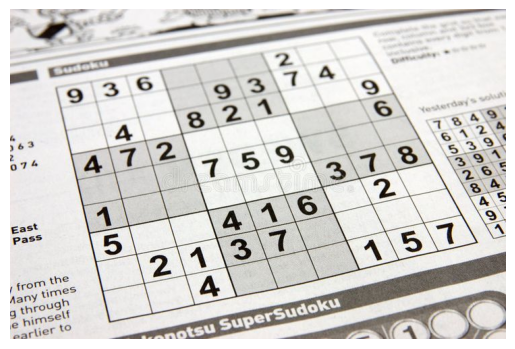

In [18]:
with open("sudoku_assignment_4.jpg", "rb") as image_file:
    base64_image = base64.b64encode(image_file.read()).decode()
    print(base64_image)

image_data = base64.b64decode(base64_image)
sudoku_img = np.array(Image.open(io.BytesIO(image_data)))

plt.imshow(sudoku_img)
plt.axis("off")

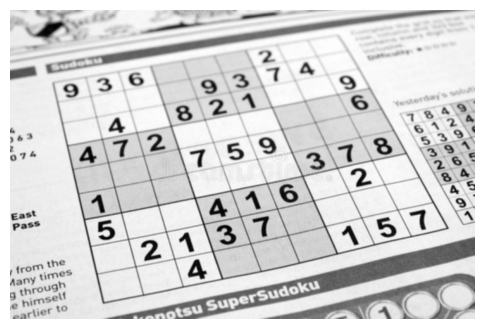

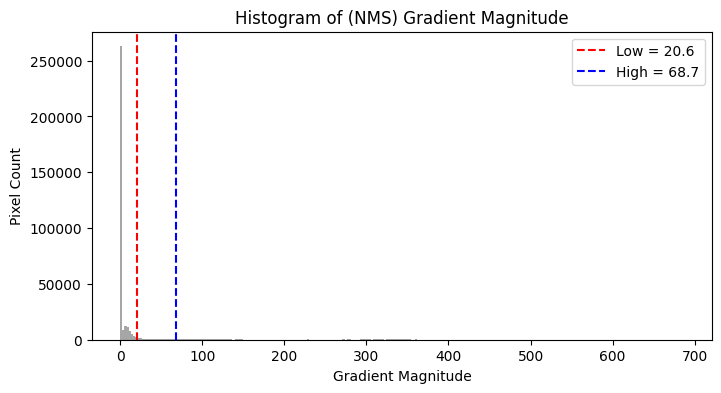

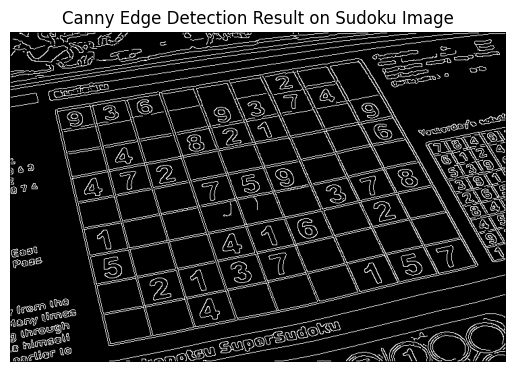

In [67]:
# Canny Edge Detection
def canny_from_scratch(image_rgb, gaussian_kernel_size=5, gaussian_sigma=1.0,high_ratio=0.2, low_ratio=0.3, debug_plot=False):

    gray = rgb2gray(image_rgb)            
    blurred = gaussian_blur_gray(gray, gaussian_kernel_size, gaussian_sigma)
    plotting_image(blurred, cmap_type='gray') if debug_plot else None

    Gx = convolve(blurred, gx_kernel())
    Gy = convolve(blurred, gy_kernel())
    magnitude = np.sqrt(Gx**2 + Gy**2)
    angle = np.arctan2(Gy, Gx)

    nms = non_max_suppression(magnitude, angle)

    highThresh = nms.max() * high_ratio
    lowThresh = highThresh * low_ratio

    if debug_plot:
        plotting_histogram(nms, lowThresh, highThresh)

    thresh_img, WEAK, STRONG = thresholding(nms, lowThresh, highThresh)
    final = hysteresis(thresh_img, weak=WEAK, strong=STRONG)
    return final


edge_sudoku = canny_from_scratch(sudoku_img, gaussian_kernel_size=3, gaussian_sigma=1.0, high_ratio=0.1, low_ratio=0.3, debug_plot=True)

plt.imshow(edge_sudoku, cmap='gray')
plt.axis("off")
plt.title("Canny Edge Detection Result on Sudoku Image")
plt.show()


(-0.5, 734.5, 488.5, -0.5)

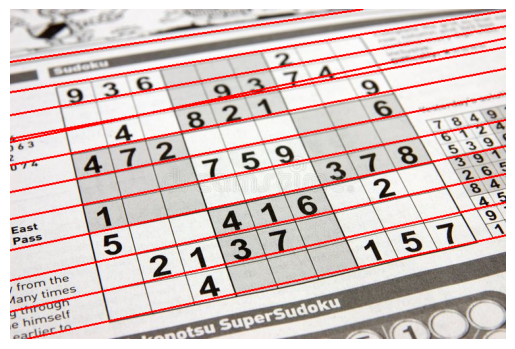

In [70]:
import cv2

# Many lines were being detected, so we implement Non-Maximum Suppression (NMS) on the accumulator
def nms_accumulator(accumulator, window_size=9):
    
    H, W = accumulator.shape
    pad = window_size // 2

    padded = np.pad(accumulator, pad, mode='constant')
    suppressed = np.zeros_like(accumulator)

    for i in range(H):
        for j in range(W):
            local = padded[i:i+window_size, j:j+window_size]
            if accumulator[i, j] == local.max() and accumulator[i, j] > 0:
                suppressed[i, j] = accumulator[i, j]

    return suppressed

# Hough Transform in slope-intercept space with NMS
def hough_slope_intercept_nms(
    image_rgb,
    edge_image,
    m_min=-2.0, m_max=2.0, m_steps=801,
    b_bins=600,
    nms_window=9,
    acc_threshold_rel=0.5,
    max_lines=20
):
    H, W = edge_image.shape
    ys, xs = np.nonzero(edge_image > 0)

    m_vals = np.linspace(m_min, m_max, m_steps)

    b_min = np.min(ys - m_max * xs)
    b_max = np.max(ys - m_min * xs)
    b_range = b_max - b_min
    b_step = b_range / (b_bins - 1)

    accumulator = np.zeros((m_steps, b_bins), dtype=np.int32)


    for mi, m in enumerate(m_vals):
        b_vals = ys - m * xs
        b_idx = np.floor((b_vals - b_min) / b_step).astype(int)
        valid = (b_idx >= 0) & (b_idx < b_bins)
        if np.any(valid):
            counts = np.bincount(b_idx[valid], minlength=b_bins)
            accumulator[mi] = counts[:b_bins]


    accumulator_nms = nms_accumulator(accumulator, window_size=nms_window)

    acc_max = accumulator_nms.max()
    if acc_max == 0:
        return image_rgb

    acc_norm = accumulator_nms / acc_max

    peaks = np.argwhere(acc_norm >= acc_threshold_rel)

    lines = []
    for mi, bi in peaks:
        votes = accumulator_nms[mi, bi]
        m = m_vals[mi]
        b = b_min + bi * b_step
        lines.append((m, b, votes))

    lines = sorted(lines, key=lambda x: x[2], reverse=True)[:max_lines]

    img = image_rgb.copy()
    if img.dtype != np.uint8:
        img = np.clip(img, 0, 255).astype(np.uint8)

    img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    for m, b, _ in lines:
        pts = []
        y = m * 0 + b
        if 0 <= y < H: pts.append((0, int(y)))
        y = m * (W-1) + b
        if 0 <= y < H: pts.append((W-1, int(y)))
        if abs(m) > 1e-6:
            x = (0 - b) / m
            if 0 <= x < W: pts.append((int(x), 0))
            x = (H-1 - b) / m
            if 0 <= x < W: pts.append((int(x), H-1))

        if len(pts) >= 2:
            cv2.line(img_bgr, pts[0], pts[1], (0, 0, 255), 2)

    return cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Detect lines in the sudoku image using Hough Transform with NMS and plotting the result
img_lines = hough_slope_intercept_nms(
    sudoku_img,
    edge_sudoku,
    m_min=-2, m_max=2,
    m_steps=801,
    b_bins=600,
    nms_window=9,
    acc_threshold_rel=0.55,
    max_lines=12
)

plt.imshow(img_lines)
plt.axis('off')



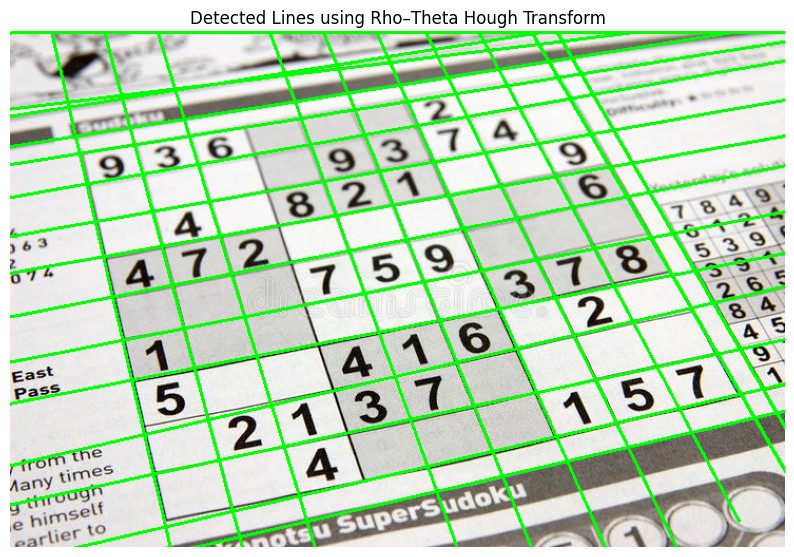

In [71]:
# despite NMS, many similar lines were still being detected, so we cluster them based on (rho, theta) proximity in the image space
def cluster_lines_rho_theta(lines, rho_thresh=15, theta_thresh=np.deg2rad(2)):
    if not lines:
        return []

    lines = sorted(lines, key=lambda x: x[2], reverse=True)
    clustered = []

    for rho, theta, votes in lines:
        keep = True
        for rho_c, theta_c, _ in clustered:
            if abs(rho - rho_c) < rho_thresh and abs(theta - theta_c) < theta_thresh:
                keep = False
                break
        if keep:
            clustered.append((rho, theta, votes))

    return clustered

# Hough Transform in (rho, theta) space with NMS and clustering
def hough_rho_theta_nms(
    image_rgb,
    edge_image,
    theta_steps=180,
    rho_step=1.0,
    nms_window=9,
    acc_threshold_rel=0.5,
    max_lines=30
):

    H, W = edge_image.shape
    ys, xs = np.nonzero(edge_image > 0)

    thetas = np.linspace(0, np.pi, theta_steps, endpoint=False)
    cos_t = np.cos(thetas)
    sin_t = np.sin(thetas)

    diag = int(np.ceil(np.sqrt(H*H + W*W)))
    rhos = np.arange(-diag, diag + rho_step, rho_step)
    rho_bins = len(rhos)

    accumulator = np.zeros((rho_bins, theta_steps), dtype=np.int32)

    for (x, y) in zip(xs, ys):
        rho_vals = x * cos_t + y * sin_t
        rho_idxs = np.round((rho_vals + diag) / rho_step).astype(int)
        valid = (rho_idxs >= 0) & (rho_idxs < rho_bins)
        accumulator[rho_idxs[valid], np.arange(theta_steps)[valid]] += 1

    accumulator_nms = nms_accumulator(accumulator, window_size=nms_window)

    acc_max = accumulator_nms.max()
    if acc_max == 0:
        return image_rgb

    acc_norm = accumulator_nms / acc_max

    peaks = np.argwhere(acc_norm >= acc_threshold_rel)

    lines = []
    for ri, ti in peaks:
        rho = rhos[ri]
        theta = thetas[ti]
        votes = accumulator_nms[ri, ti]
        lines.append((rho, theta, votes))

    lines = sorted(lines, key=lambda x: x[2], reverse=True)[:max_lines]
    lines = cluster_lines_rho_theta(lines, rho_thresh=15, theta_thresh=np.deg2rad(2))

    img = image_rgb.copy()
    if img.dtype != np.uint8:
        img = np.clip(img, 0, 255).astype(np.uint8)

    img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    for rho, theta, _ in lines:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho

        dx = -b
        dy = a
        L = max(H, W)

        x1 = int(x0 + L * dx)
        y1 = int(y0 + L * dy)
        x2 = int(x0 - L * dx)
        y2 = int(y0 - L * dy)

        cv2.line(img_bgr, (x1, y1), (x2, y2), (0, 255, 0), 2)

    return cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Detect lines in the sudoku image using (rho, theta) Hough Transform with NMS and clustering, then plotting the result
img_rho_theta = hough_rho_theta_nms(
    sudoku_img,
    edge_sudoku,
    theta_steps=180,
    rho_step=1.0,
    nms_window=11,
    acc_threshold_rel=0.45,
    max_lines=40
)

plt.figure(figsize=(10,8))
plt.imshow(img_rho_theta)
plt.axis('off')
plt.title("Detected Lines using Rho–Theta Hough Transform")
plt.show()


### Bonus - Part D

Here, what you have to do is something like :    
1. Create a python function that will take the first image and a set of coordinates ( x1,y1 ) - top left and ( x2,y2 ) - bottom right to form a box around the white ball. Now, find gradients, select the biggest completed gradient ( maximum area contour ) and then create an RGBA ( 4 channel ) stencil.

2. Now, create another function that takes this stencil and second image and a coordinate ( x3,y3 ). Now, treat ( x3,y3 ) as center point and overlap the RGBA stencil with second image. Keep x3 y3 such that it is towards the right to make it look like that white ball is on the green pool image.


Again, I do not expect you guys to get a really good result. Try your best though.

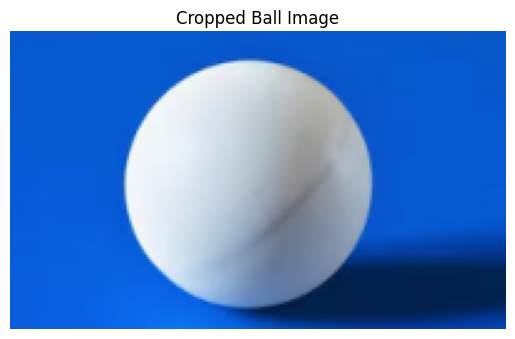

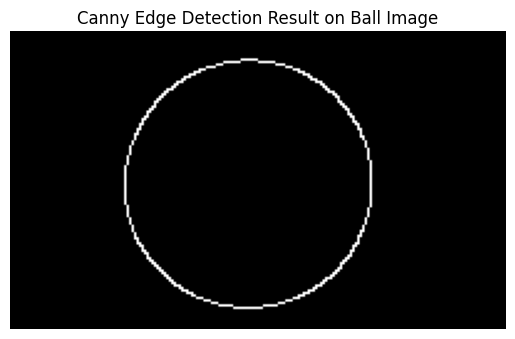

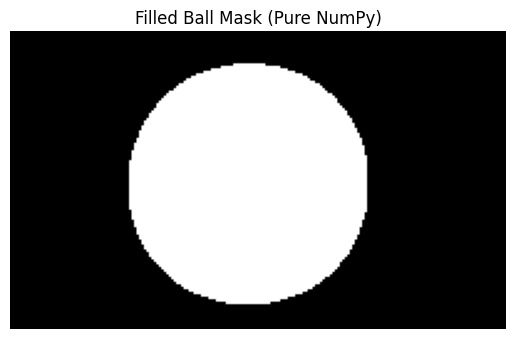

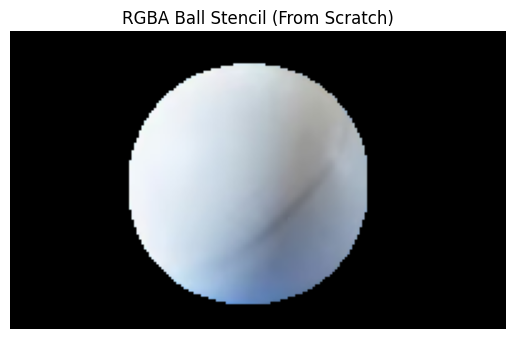

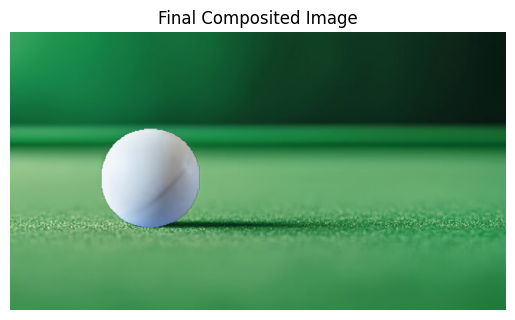

In [ ]:
# Cropping the ball image and performing Canny edge detection
cropped_ball = ball[150:270, 50:250]
plt.imshow(cropped_ball)
plt.axis("off")
plt.title("Cropped Ball Image")
plt.show()

edge_ball = canny_from_scratch(cropped_ball , gaussian_kernel_size=5, gaussian_sigma=1.0, high_ratio=0.2, low_ratio=0.3, debug_plot=False)

plt.imshow(edge_ball, cmap='gray')
plt.axis("off")
plt.title("Canny Edge Detection Result on Ball Image")
plt.show()

# Creating a filled mask from the edge map 
edge = (edge_ball > 0).astype(np.uint8)

def fill_closed_shape(edge_map):
    h, w = edge_map.shape
    filled = np.zeros_like(edge_map, dtype=np.uint8)

    for y in range(h):
        xs = np.where(edge_map[y] == 1)[0]

        if len(xs) >= 2:
            x_start = xs[0]
            x_end   = xs[-1]
            filled[y, x_start:x_end+1] = 1

    return filled

filled_mask = fill_closed_shape(edge)
blurred_mask = gaussian_blur_gray(filled_mask.astype(np.float64), kernel_size=7, sigma=2.0)
filled_mask = (blurred_mask > 0.8).astype(np.uint8)

plt.imshow(filled_mask, cmap="gray")
plt.title("Filled Ball Mask (Pure NumPy)")
plt.axis("off")
plt.show()

# Applying the mask to the cropped ball 
rgb_image = np.zeros((*filled_mask.shape, 3), dtype=np.uint8)
for c in range(3):
    rgb_image[..., c] = cropped_ball[..., c] * filled_mask

plt.imshow(rgb_image)
plt.title("RGBA Ball Stencil (From Scratch)")
plt.axis("off")
plt.show()

# Resizing the ball image and mask using bilinear interpolation
def bilinear_resize(img, new_h, new_w):
    """Bilinear resize for 2D or 3D arrays (H,W[,C]). Works with floats or uint8."""
    if img.ndim == 2:
        img = img[..., None]
    H, W, C = img.shape
    # target coordinates in source image
    r = np.linspace(0, H - 1, new_h)
    c = np.linspace(0, W - 1, new_w)
    rr, cc = np.meshgrid(r, c, indexing='ij')
    r0 = np.floor(rr).astype(np.int32)
    c0 = np.floor(cc).astype(np.int32)
    r1 = np.minimum(r0 + 1, H - 1)
    c1 = np.minimum(c0 + 1, W - 1)
    wr = rr - r0
    wc = cc - c0

    out = np.zeros((new_h, new_w, C), dtype=np.float32)
    for ch in range(C):
        I00 = img[r0, c0, ch]
        I01 = img[r0, c1, ch]
        I10 = img[r1, c0, ch]
        I11 = img[r1, c1, ch]
        out[..., ch] = (1-wr)*(1-wc)*I00 + (1-wr)*wc*I01 + wr*(1-wc)*I10 + wr*wc*I11

    if out.shape[2] == 1:
        return out[:,:,0]
    return out

scale_factor = 1.32

H0, W0 = rgb_image.shape[:2]
new_h = max(2, int(round(H0 * scale_factor)))
new_w = max(2, int(round(W0 * scale_factor)))

# Resize rgb image 
rgb_resized = bilinear_resize(rgb_image.astype(np.float32), new_h, new_w)
rgb_resized = np.clip(rgb_resized, 0, 255).astype(np.uint8)

# Resize mask 
mask_resized = bilinear_resize(filled_mask.astype(np.float32), new_h, new_w)
if mask_resized.max() > 0:
    mask_resized = mask_resized / mask_resized.max()
else:
    mask_resized = (mask_resized > 0).astype(np.float32)

rgb_image = rgb_resized
filled_mask = mask_resized

output_image = ball2.copy()

# Choose the center location (x3, y3) in ball2 where you want to paste the ball
x3, y3 = 187, 187  

h_stencil, w_stencil = rgb_image.shape[:2]
h_out, w_out = output_image.shape[:2]

# Compute top-left corner for pasting
x_start = max(x3 - w_stencil // 2, 0)
y_start = max(y3 - h_stencil // 2, 0)
x_end = min(x_start + w_stencil, w_out)
y_end = min(y_start + h_stencil, h_out)

# Adjust stencil region if it goes out of bounds
stencil_x_start = max(0, - (x3 - w_stencil // 2))
stencil_y_start = max(0, - (y3 - h_stencil // 2))
stencil_x_end = stencil_x_start + (x_end - x_start)
stencil_y_end = stencil_y_start + (y_end - y_start)

# Paste using mask
for c in range(3):
    output_image[y_start:y_end, x_start:x_end, c] = (
        rgb_image[stencil_y_start:stencil_y_end, stencil_x_start:stencil_x_end, c] *
        filled_mask[stencil_y_start:stencil_y_end, stencil_x_start:stencil_x_end] +
        output_image[y_start:y_end, x_start:x_end, c] *
        (1 - filled_mask[stencil_y_start:stencil_y_end, stencil_x_start:stencil_x_end])
    )

plt.imshow(output_image)
plt.title("Final Composited Image")
plt.axis("off")
plt.show()

